# CARGA DE LIBRERIAS

In [1113]:
library(gplots)
library(foreign)
library(car)
library(plotly)
library(ggpubr)
library(ggplot2)
library(reprex)
library(dplyr)
library(readxl)
library(readr)
library(rpart)
library(glmulti)
library(caret)
library(InformationValue)
library(rvest)
library(stringi)
library(stringr)
library(dplyr)
library(fmsb)
library(dlookr)
library(ggrepel)
library(rattle)
library(corrplot)
library(factoextra)
library(mclust)
library(FactoMineR)
library(tidyr)
library(GGally)
library(gridExtra)
library(grid)
library(FSelector)
library(mlbench)
library(RRF)
library(wsrf)
library(Boruta)
options(warn=-1)

In [1068]:
options(repr.plot.width = 18, repr.plot.height = 10) 

# IMPORTACION Y LECTURA DE LOS DATOS

In [1070]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200) 

In [1071]:
datos <- as.data.frame(read_excel("C:/Users/34625/Downloads/PROYECTOS DE TRABAJO/Yankel Carolina Sena/fwddatayankelsena/original_yankel.xlsx",sheet='Hoja3'))
datos

STATUS CYCLES_BETWEEN_PET1_PET2 GENDER AGE TNM_STAGE WBC_PRE RBC_PRE HB_PRE
1  ALIVE   3                       MALE   54  III        3.82   3.03     9.70 
2  ALIVE   2                       FEMALE 79  IV        10.87   3.93    11.50 
3  ALIVE   3                       MALE   60  III        8.40   4.41     8.56 
4  ALIVE   3                       MALE   76  II         4.66   3.55    11.70 
5  ALIVE   5                       FEMALE 70  II         5.86   5.19    15.10 
6  ALIVE   4                       MALE   54  IV         2.95   4.45    14.50 
7  ALIVE   2                       MALE   60  III        4.25   4.82    15.70 
8  ALIVE   5                       MALE   69  III        9.17   2.25     7.30 
9  ALIVE   6                       MALE   64  IV         9.80   4.36    13.90 
10 ALIVE  12                       MALE   72  III        5.61   3.66    11.60 
11 ALIVE  29                       MALE   71  III        4.51   4.41    13.50 
12 ALIVE   6                       MALE   67  III        7.49   3.61    10.60 
13 ALIVE  48                       MALE   60  III        8.38   4.12    11.00 
14 ALIVE  20                       MALE   61  IV         6.11   4.10    12.10 
15 DEATH   2                       MALE   83  II         3.45   3.98    11.60 
16 DEATH   3                       MALE   68  I          5.14   4.22    11.00 
17 DEATH  18                       MALE   77  II         4.69   3.34     9.60 
18 DEATH   4                       MALE   60  III        8.66   4.80    15.00 
19 DEATH   7                       MALE   64  IV         3.46   3.85    14.60 
20 DEATH  15                       MALE   67  II        13.32   3.70    11.30 
21 DEATH   5                       MALE   83  IV         4.50   3.86    13.10 
22 DEATH   4                       FEMALE 56  II         3.75   4.03    12.00 
23 ALIVE   7                       MALE   65  II         7.10   4.58    10.50 
24 ALIVE   5                       FEMALE 55  IV         7.06   5.03    10.20 
25 ALIVE   2                       FEMALE 75  III        4.42   4.30    12.50 
26 ALIVE   6                       MALE   74  III        7.43   4.12    11.40 
27 ALIVE   3                       FEMALE 76  IV         4.09   3.64    11.50 
28 ALIVE   3                       MALE   77  III        9.01   4.08    12.50 
29 ALIVE   4                       MALE   68  II         7.34   4.14     9.60 
30 ALIVE   2                       MALE   68  II         6.53   5.16    15.40 
31 ALIVE   3                       FEMALE 86  IV         7.99   3.87    11.80 
32 ALIVE   2                       MALE   74  II         5.37   4.40    14.20 
33 ALIVE   3                       FEMALE 52  I          2.31   3.68    11.60 
34 ALIVE   4                       FEMALE 74  IV         1.72   3.35    11.60 
35 ALIVE  13                       FEMALE 70  IV         5.04   4.09    11.90 
36 ALIVE   2                       MALE   62  III        7.05   5.43    15.60 
37 ALIVE   3                       MALE   79  IV         5.69   3.99    12.40 
38 ALIVE  14                       FEMALE 69  II         4.56   4.43    13.70 
39 ALIVE  10                       FEMALE 65  II        13.30   2.86     8.70 
40 ALIVE   4                       MALE   74  III        2.41   3.36    10.20 
41 ALIVE  12                       MALE   76  III        6.51   4.32    13.30 
42 ALIVE   4                       FEMALE 72  III        1.52   3.75    11.10 
43 ALIVE  14                       FEMALE 76  III        1.67   2.65     8.30 
44 ALIVE   4                       FEMALE 56  III        7.27   4.34    13.90 
45 ALIVE   4                       MALE   70  III        4.86   4.30    14.50 
46 ALIVE   4                       FEMALE 75  III        6.33   4.19    13.00 
47 DEATH   9                       MALE   81  II         6.66   4.27    12.70 
48 DEATH   9                       MALE   73  III        7.95   2.72     8.80 
49 DEATH   5                       MALE   77  I          7.43   4.72    15.00 
50 DEATH   6                       MALE   74  I      

## Exploracion inicial

In [1072]:
# Tipos de varibales                    
aux = as.data.frame(t(t(sapply(datos, class))))
colnames(aux) <- "Tipo de Variable"
aux$Numero_Columna = seq(nrow(aux))
aux

Tipo de Variable Numero_Columna
STATUS                       character         1            
CYCLES_BETWEEN_PET1_PET2     numeric           2            
GENDER                       character         3            
AGE                          numeric           4            
TNM_STAGE                    character         5            
WBC_PRE                      numeric           6            
RBC_PRE                      numeric           7            
HB_PRE                       numeric           8            
PLT_PRE                      numeric           9            
CRP_PRE                      numeric          10            
ALBUMIN_PRE                  numeric          11            
LDH_PRE                      numeric          12            
eGFR_PRE                     numeric          13            
AST_PRE                      numeric          14            
ALT_PRE                      numeric          15            
K_PRE                        numeric          16            
BGL_PRE_PET1                 numeric          17            
BMI                          numeric          18            
BW_PRE                       numeric          19            
SPLEEN_FDG_UPT_PRE_PET1      numeric          20            
BM_UPT_PRE_PET1              numeric          21            
LIVER_PRE_PET1               numeric          22            
ESTIMATED_SPLEE_VOL_PRE_PET1 numeric          23            
DIAGNOSTIC                   character        24            
TREATMENT                    character        25            
ECOGPS                       character        26            
COMORBIDITIES                character        27            
CTCNCI                       character        28            
ACTION_TAKEN_                character        29            
TIME_BETWEE_PET              numeric          30            
dias                         numeric          31            
SLR_pre                      numeric          32            
BMLR_pre                     numeric          33            
OVERALL_TIME                 numeric          34

division   metrics               value
1  size       observations             59
2  size       variables                34
3  size       values                 2006
4  size       memory size           23752
5  duplicated duplicate observation     0
6  missing    complete observation     59
7  missing    missing observation       0
8  missing    missing variables         0
9  missing    missing values            0
10 data type  numerics                 25
11 data type  integers                  0
12 data type  factors/ordered           0
13 data type  characters                9
14 data type  Dates                     0
15 data type  POSIXcts                  0
16 data type  others                    0

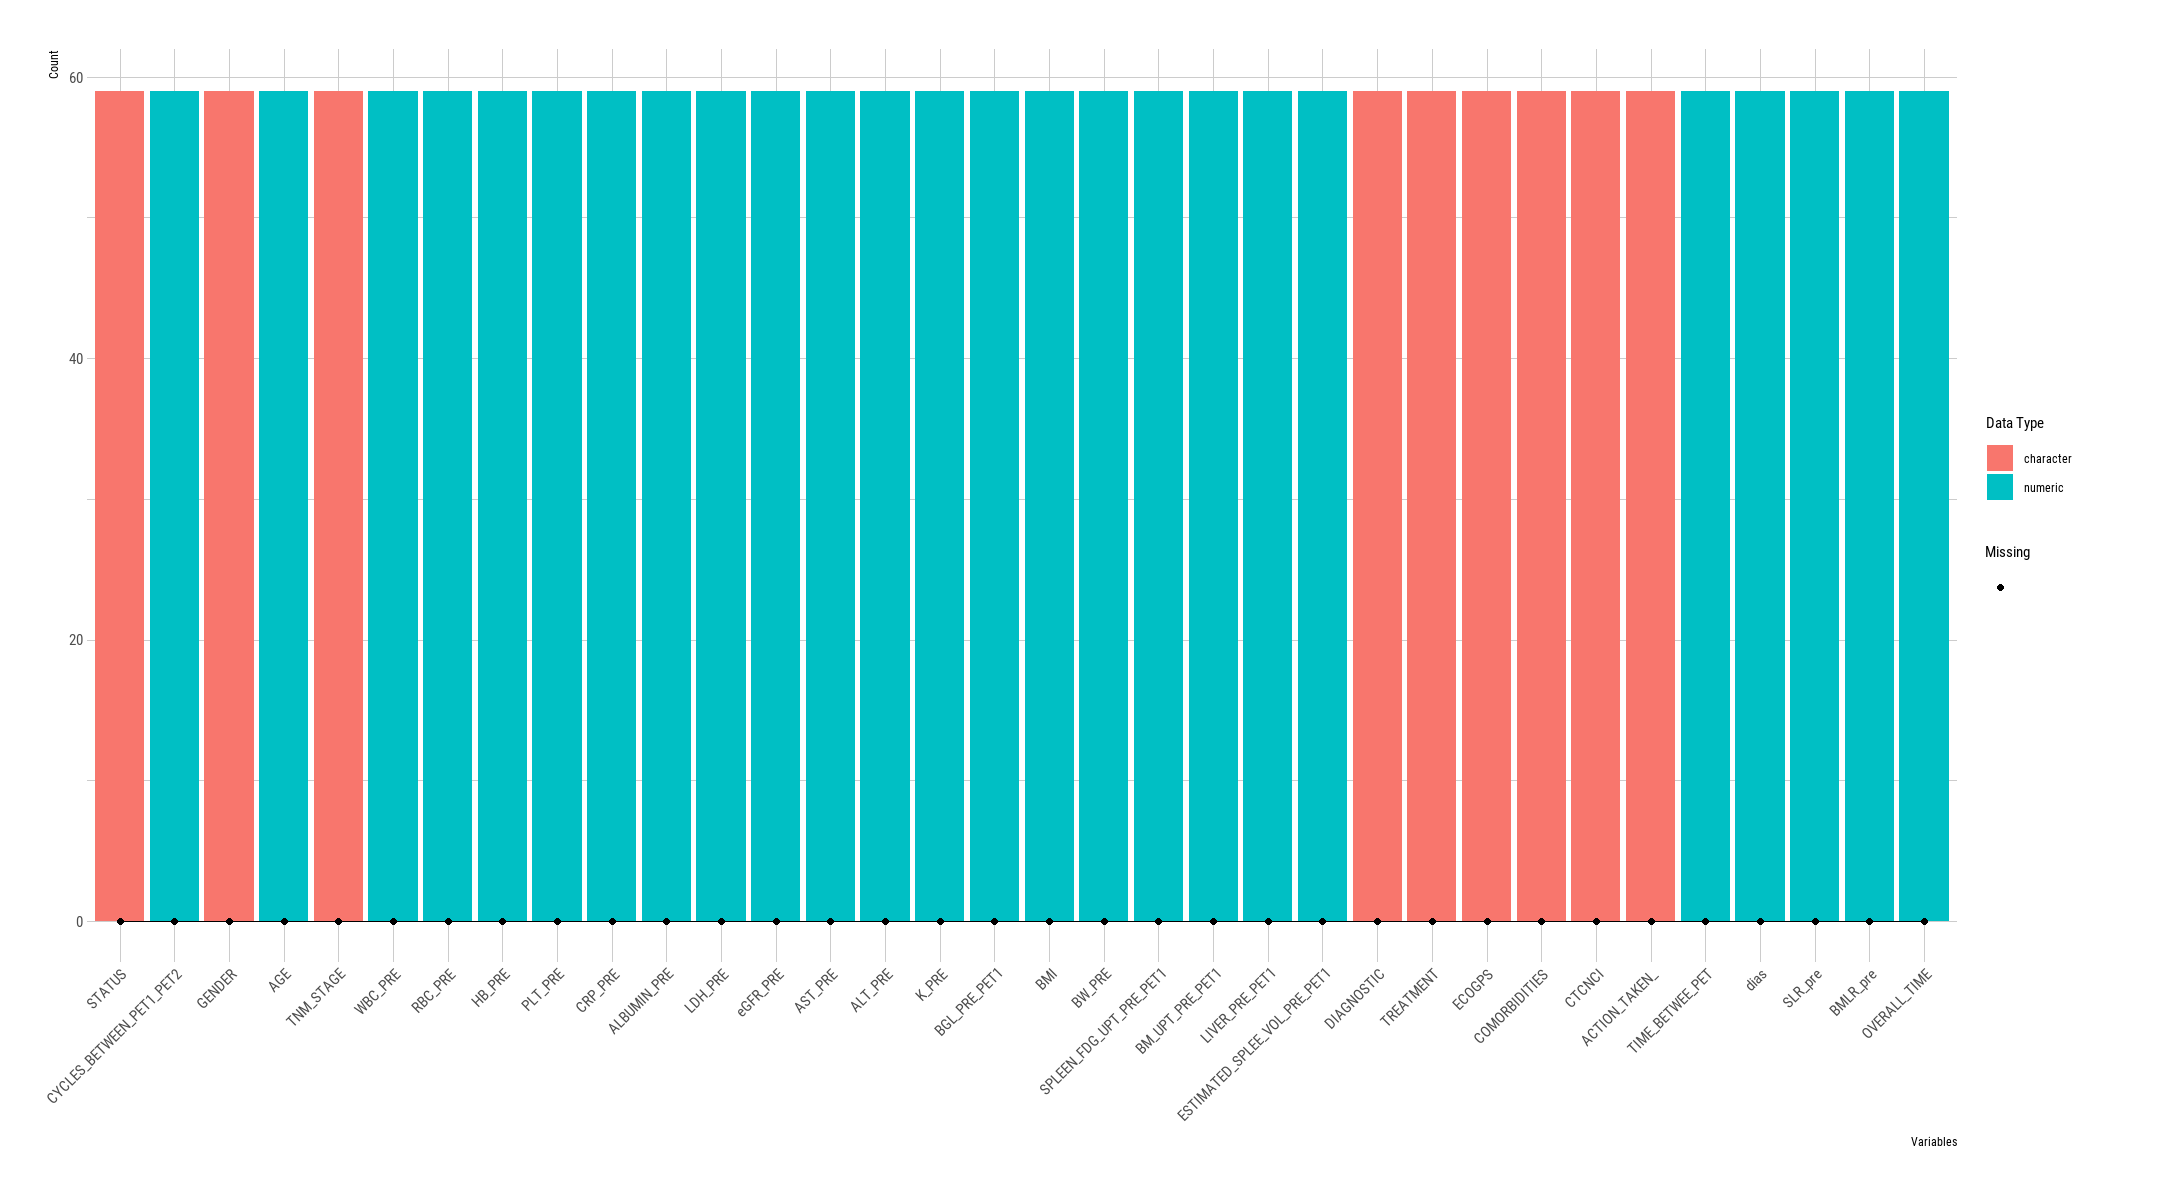

In [1073]:
overview(datos)  )

plot(overview(datos)) 


# ORDENAR Y LIMPIAR DATOS

## Transformar tipos de variables

In [1074]:
# pasar variables a factor
datos$STATUS <- as.factor(datos$STATUS)
datos$GENDER <- as.factor(datos$GENDER)
datos$COMORBIDITIES <- as.factor(datos$COMORBIDITIES)
datos$CTCNCI <- as.factor(datos$CTCNCI)
datos$ACTION_TAKEN_ <- as.factor(datos$ACTION_TAKEN_)
datos$TNM_STAGE <- as.factor(datos$TNM_STAGE)
datos$DIAGNOSTIC <- as.factor(datos$DIAGNOSTIC)
datos$TREATMENT <- as.factor(datos$TREATMENT)
datos$ECOGPS <- as.factor(datos$ECOGPS)

In [1075]:
# vemos los cambios
aux = as.data.frame(t(t(sapply(datos, class))))
colnames(aux) <- "Tipo de Variable"
aux$Numero_Columna = seq(nrow(aux))
aux

Tipo de Variable Numero_Columna
STATUS                       factor            1            
CYCLES_BETWEEN_PET1_PET2     numeric           2            
GENDER                       factor            3            
AGE                          numeric           4            
TNM_STAGE                    factor            5            
WBC_PRE                      numeric           6            
RBC_PRE                      numeric           7            
HB_PRE                       numeric           8            
PLT_PRE                      numeric           9            
CRP_PRE                      numeric          10            
ALBUMIN_PRE                  numeric          11            
LDH_PRE                      numeric          12            
eGFR_PRE                     numeric          13            
AST_PRE                      numeric          14            
ALT_PRE                      numeric          15            
K_PRE                        numeric          16            
BGL_PRE_PET1                 numeric          17            
BMI                          numeric          18            
BW_PRE                       numeric          19            
SPLEEN_FDG_UPT_PRE_PET1      numeric          20            
BM_UPT_PRE_PET1              numeric          21            
LIVER_PRE_PET1               numeric          22            
ESTIMATED_SPLEE_VOL_PRE_PET1 numeric          23            
DIAGNOSTIC                   factor           24            
TREATMENT                    factor           25            
ECOGPS                       factor           26            
COMORBIDITIES                factor           27            
CTCNCI                       factor           28            
ACTION_TAKEN_                factor           29            
TIME_BETWEE_PET              numeric          30            
dias                         numeric          31            
SLR_pre                      numeric          32            
BMLR_pre                     numeric          33            
OVERALL_TIME                 numeric          34

## Identificar la variable respuesta

In [1076]:
# Identificar variable respuesta
respuesta <- c("STATUS")
respuesta

[1] "STATUS"

## Identificar las variables cuantitativas de entrada

In [1077]:
# Identificar variables numericas de entrada
tipos_var <- t(t(sapply(datos, class)))
var_num <- colnames(datos)[tipos_var=="integer"|tipos_var=="numeric"]
var_num <- var_num[var_num!=respuesta]
as.data.frame(var_num)

var_num                     
1  CYCLES_BETWEEN_PET1_PET2    
2  AGE                         
3  WBC_PRE                     
4  RBC_PRE                     
5  HB_PRE                      
6  PLT_PRE                     
7  CRP_PRE                     
8  ALBUMIN_PRE                 
9  LDH_PRE                     
10 eGFR_PRE                    
11 AST_PRE                     
12 ALT_PRE                     
13 K_PRE                       
14 BGL_PRE_PET1                
15 BMI                         
16 BW_PRE                      
17 SPLEEN_FDG_UPT_PRE_PET1     
18 BM_UPT_PRE_PET1             
19 LIVER_PRE_PET1              
20 ESTIMATED_SPLEE_VOL_PRE_PET1
21 TIME_BETWEE_PET             
22 dias                        
23 SLR_pre                     
24 BMLR_pre                    
25 OVERALL_TIME

## Identificar las variables cualitativas de entrada

In [1078]:
# Identificar variables cualitativas
tipos_var <- t(t(sapply(datos, class)))
var_cual <- colnames(datos)[tipos_var=="character"|tipos_var=="factor"]
var_cual <- var_cual[var_cual!=respuesta]
as.data.frame(var_cual)

var_cual     
1 GENDER       
2 TNM_STAGE    
3 DIAGNOSTIC   
4 TREATMENT    
5 ECOGPS       
6 COMORBIDITIES
7 CTCNCI       
8 ACTION_TAKEN_

# EXPLORACION UNIVARIADA DE LOS DATOS 

## Describir la variable respuesta

In [1079]:
# Tabla de frecuencias:

as.data.frame(table(datos$STATUS))

Var1  Freq
1 ALIVE 38  
2 DEATH 21

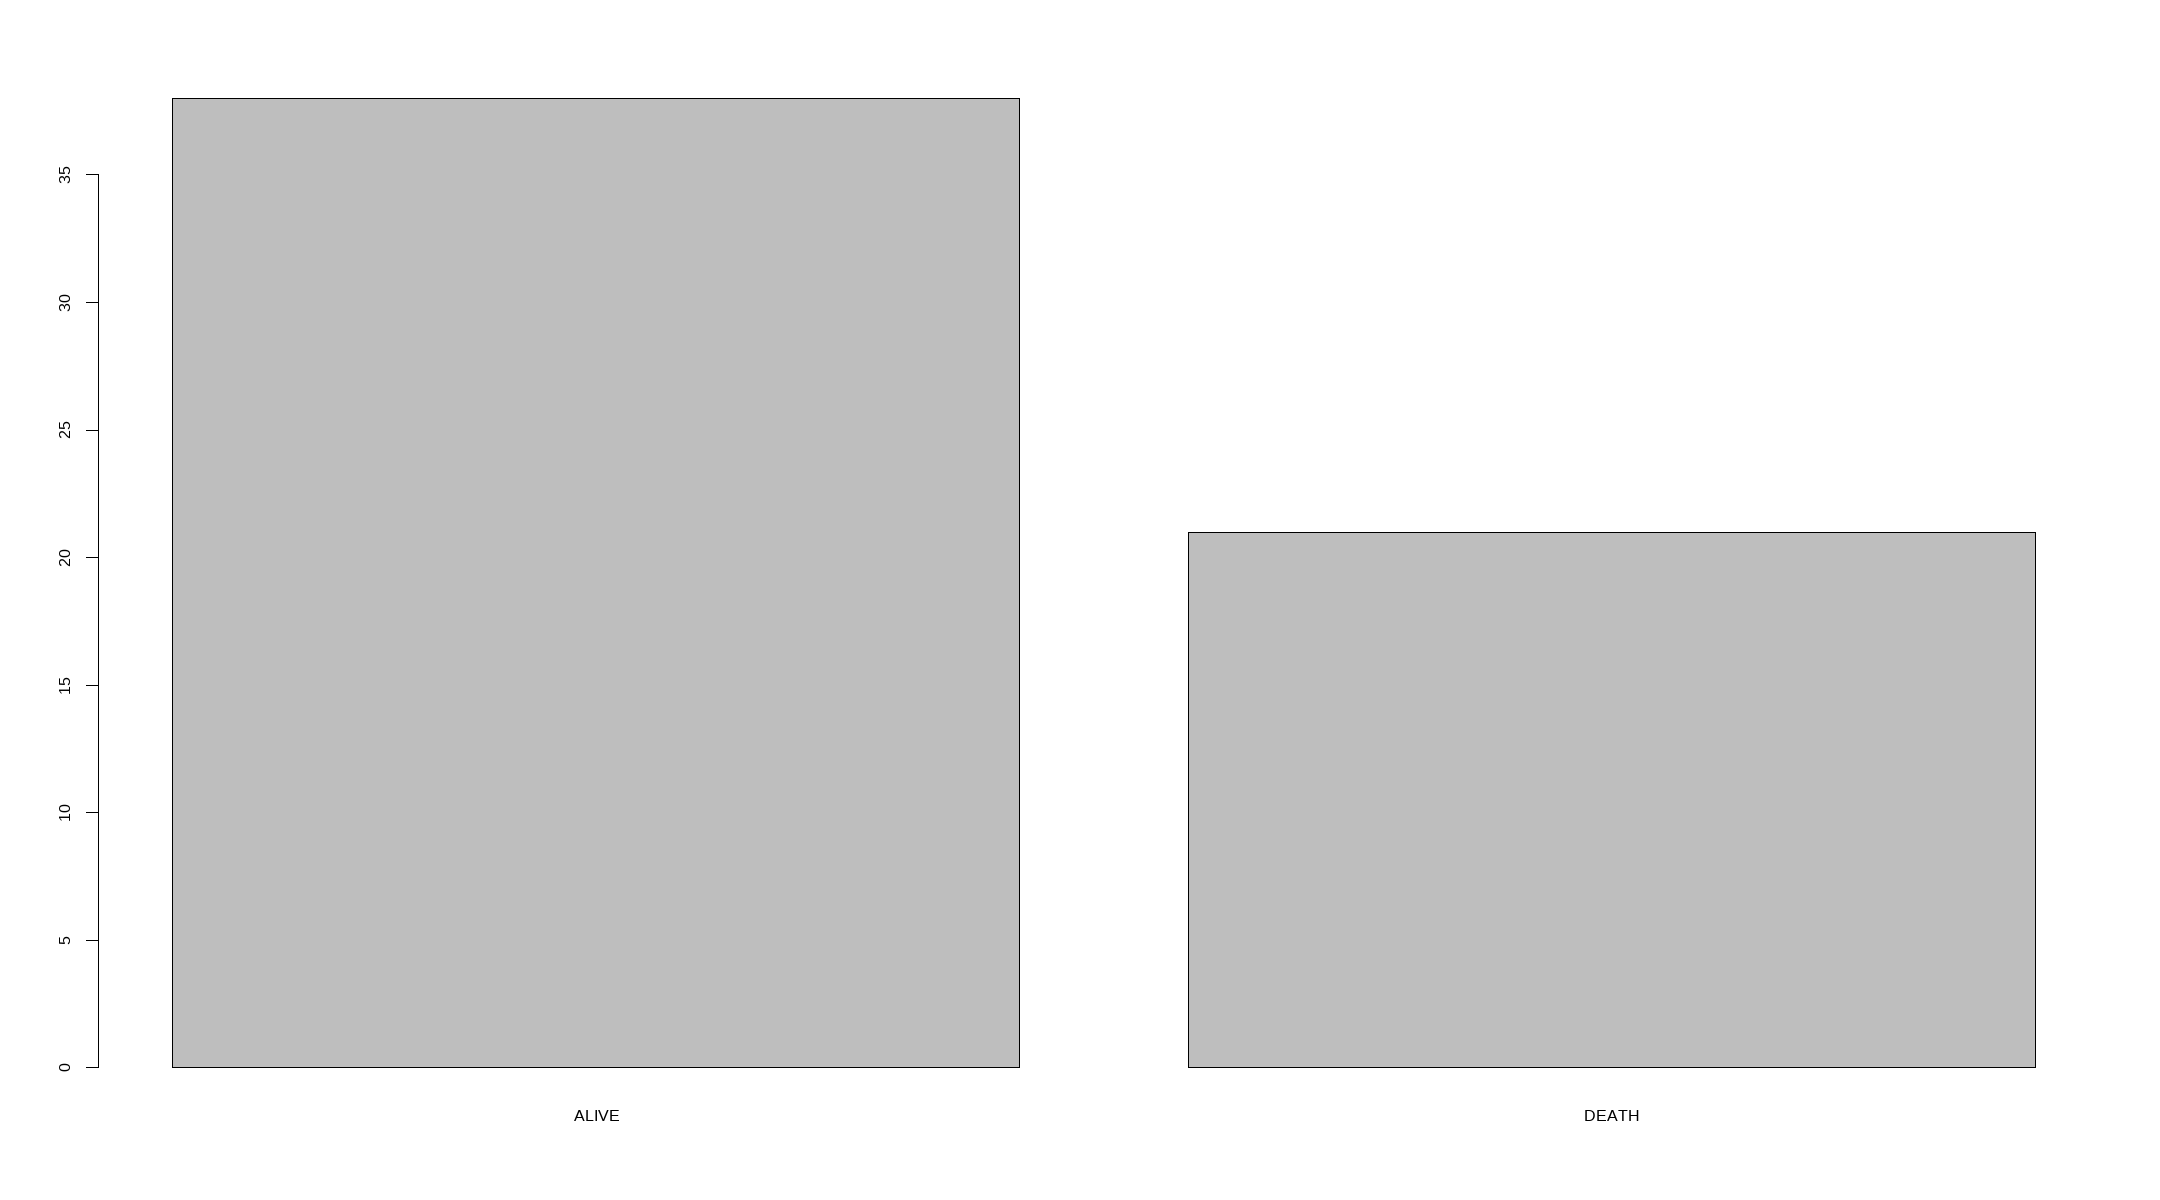

In [1080]:
# Barplot
barplot(table(datos$STATUS))


## Descripcion variables cuantitativas de entrada

### Descriptivo numerico variables numericas

In [1081]:
# Descripcion de variables cuantitativas:
d_uni<-dlookr::describe(datos)
d_uni

described_variables          n  na mean        sd          se_mean    
1  CYCLES_BETWEEN_PET1_PET2     59 0    7.0677966   7.4506755  0.96999533
2  AGE                          59 0   69.3898305   8.6223786  1.12253807
3  WBC_PRE                      59 0    5.9266102   2.5757621  0.33533566
4  RBC_PRE                      59 0    4.0798305   0.6534959  0.08507792
5  HB_PRE                       59 0   12.1925424   2.0760802  0.27028262
6  PLT_PRE                      59 0  241.1016949 107.5321435 13.99949266
7  CRP_PRE                      59 0    1.3561017   2.9053565  0.37824520
8  ALBUMIN_PRE                  59 0    3.8081356   0.5376016  0.06998976
9  LDH_PRE                      59 0  210.5559322 126.6121968 16.48350401
10 eGFR_PRE                     59 0   71.1915254  23.4414552  3.05181753
11 AST_PRE                      59 0   28.5340678  34.7113610  4.51903428
12 ALT_PRE                      59 0   26.9200000  38.1925396  4.97224514
13 K_PRE                        59 0    4.2564407   0.3753149  0.04886183
14 BGL_PRE_PET1                 59 0  111.5084746  35.3081865  4.59673434
15 BMI                          59 0   21.5445763   4.0359947  0.52544175
16 BW_PRE                       59 0   55.6759322  12.8068343  1.66730781
17 SPLEEN_FDG_UPT_PRE_PET1      59 0    2.3613559   0.2563703  0.03337657
18 BM_UPT_PRE_PET1              59 0    2.3925424   0.4596385  0.05983984
19 LIVER_PRE_PET1               59 0    2.4950847   0.4375495  0.05696409
20 ESTIMATED_SPLEE_VOL_PRE_PET1 59 0  145.3847458  58.4264814  7.60647999
21 TIME_BETWEE_PET              59 0    9.6271186   7.6404060  0.99469613
22 dias                         59 0   57.1525424 133.9282893 17.43597813
23 SLR_pre                      59 0    0.9711074   0.1795212  0.02337167
24 BMLR_pre                     59 0    0.9821935   0.2419472  0.03149884
25 OVERALL_TIME                 59 0   19.1016949  15.8415592  2.06239534
   IQR         skewness    kurtosis    p00        p01        p05        
1    4.5000000  3.54613621 16.07974075  2.0000000  2.0000000   2.0000000
2   12.5000000 -0.19664396 -0.58941186 52.0000000 52.5800000  54.0000000
3    3.2150000  0.62790197  0.82592662  1.5200000  1.5606000   1.7150000
4    0.6950000 -0.49264321  0.51697560  2.2500000  2.4820000   2.8460000
5    2.7000000 -0.26425199 -0.44892147  7.3000000  7.8220000   8.5340000
6  107.0000000  1.31603975  1.49043972 78.0000000 94.2400000 125.5000000
7    0.6450000  4.12883162 21.53706019  0.0100000  0.0158000   0.0200000
8    0.4850000 -1.28325605  1.78142566  2.1300000  2.1590000   2.7220000
9   61.5000000  2.94110478  8.75125622 77.8000000 88.3560000 123.6000000
10  18.9000000  3.74520403 21.28582242 39.8000000 40.4960000  46.7800000
11   9.1000000  5.23784777 31.12051661  6.1000000  9.4640000  13.0000000
12  14.1000000  5.57835083 35.34995715  3.2000000  3.4900000   7.8700000
13   0.5650000 -0.13117635  0.30294823  3.1100000  3.4464000   3.7770000
14  23.0000000  2.14777101  5.45384366 74.0000000 74.5800000  79.7000000
15   5.5200000  0.78269751  1.39935537 14.0800000 14.8630000  16.2330000
16  16.4500000 -0.03340815  1.74952652 14.0800000 25.3436000  39.1900000
17   0.3700000  0.36335000 -0.78951320  1.9600000  1.9716000   1.9980000
18   0.6050000 -0.08071006  0.02245594  1.3100000  1.3622000   1.5870000
19   0.5800000  0.25199343  0.57543184  1.4900000  1.5132000   1.8890000
20  69.6500000  0.92842859  0.62550270 50.8000000 54.3380000  77.0000000
21   8.0000000  1.68704563  3.31772530  1.0000000  1.0000000   2.0000000
22  34.0000000  3.29497169 12.07515448  0.0000000  0.0000000   0.0000000
23   0.2322534  0.78999558  0.67146681  0.6486486  0.6843759   0.7629179
24   0.2486236  1.17315435  3.09672332  0.4946996  0.5424875   0.6916923
25  15.0000000  1.35374471  1.56391033  1.0000000  1.0000000   1.9000000
   p10         p20         p25         p30        p40         p50        
1    2.0000000   3.0000000   3.0000000   3.400000   4.0000000   5.0000000
2   56.0000000  61.0000000  63.50

### Graficos descriptivos variables numericas

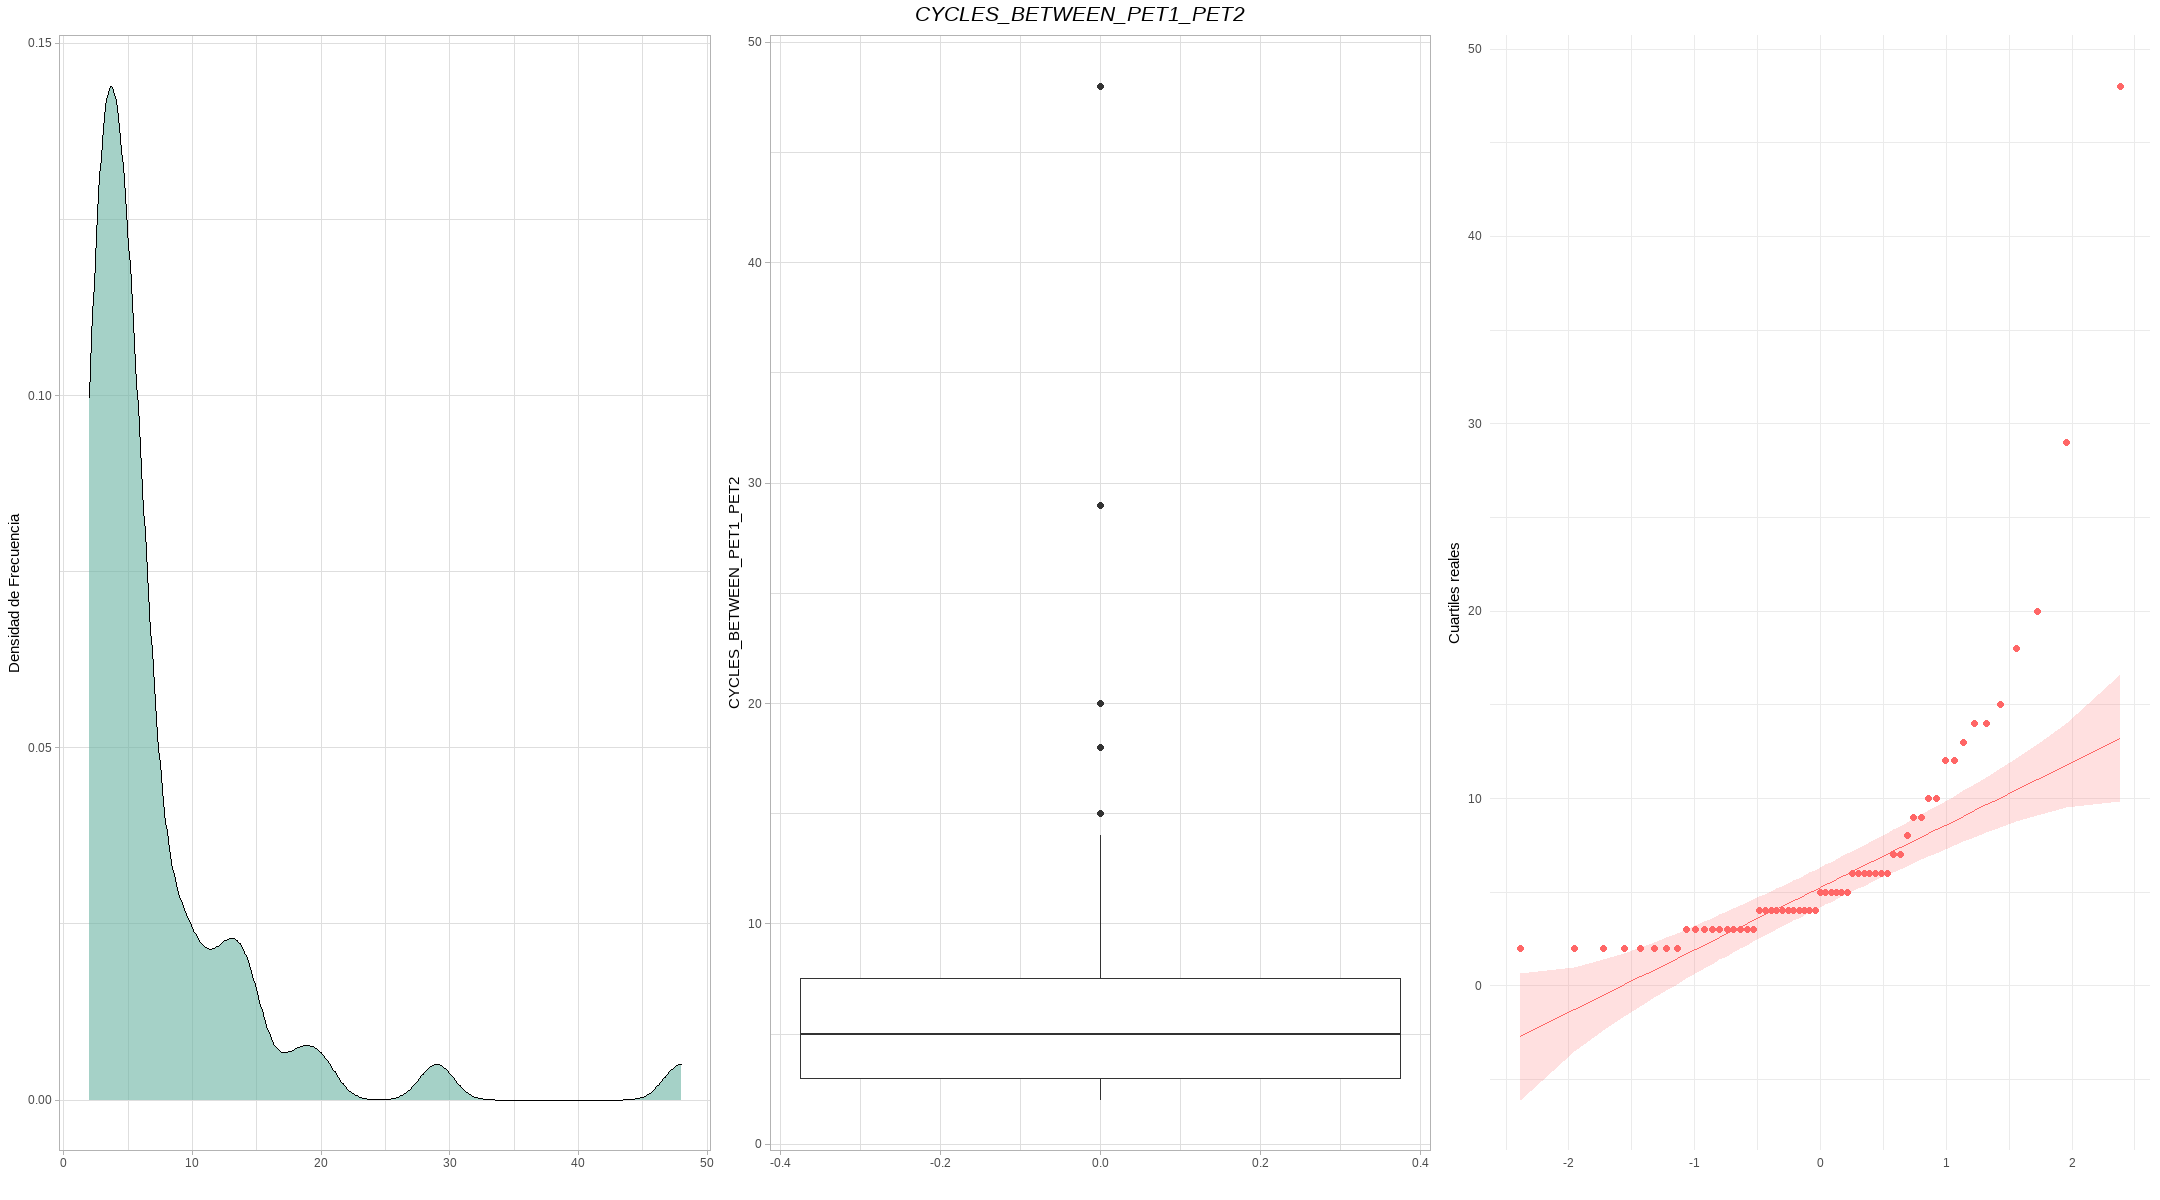

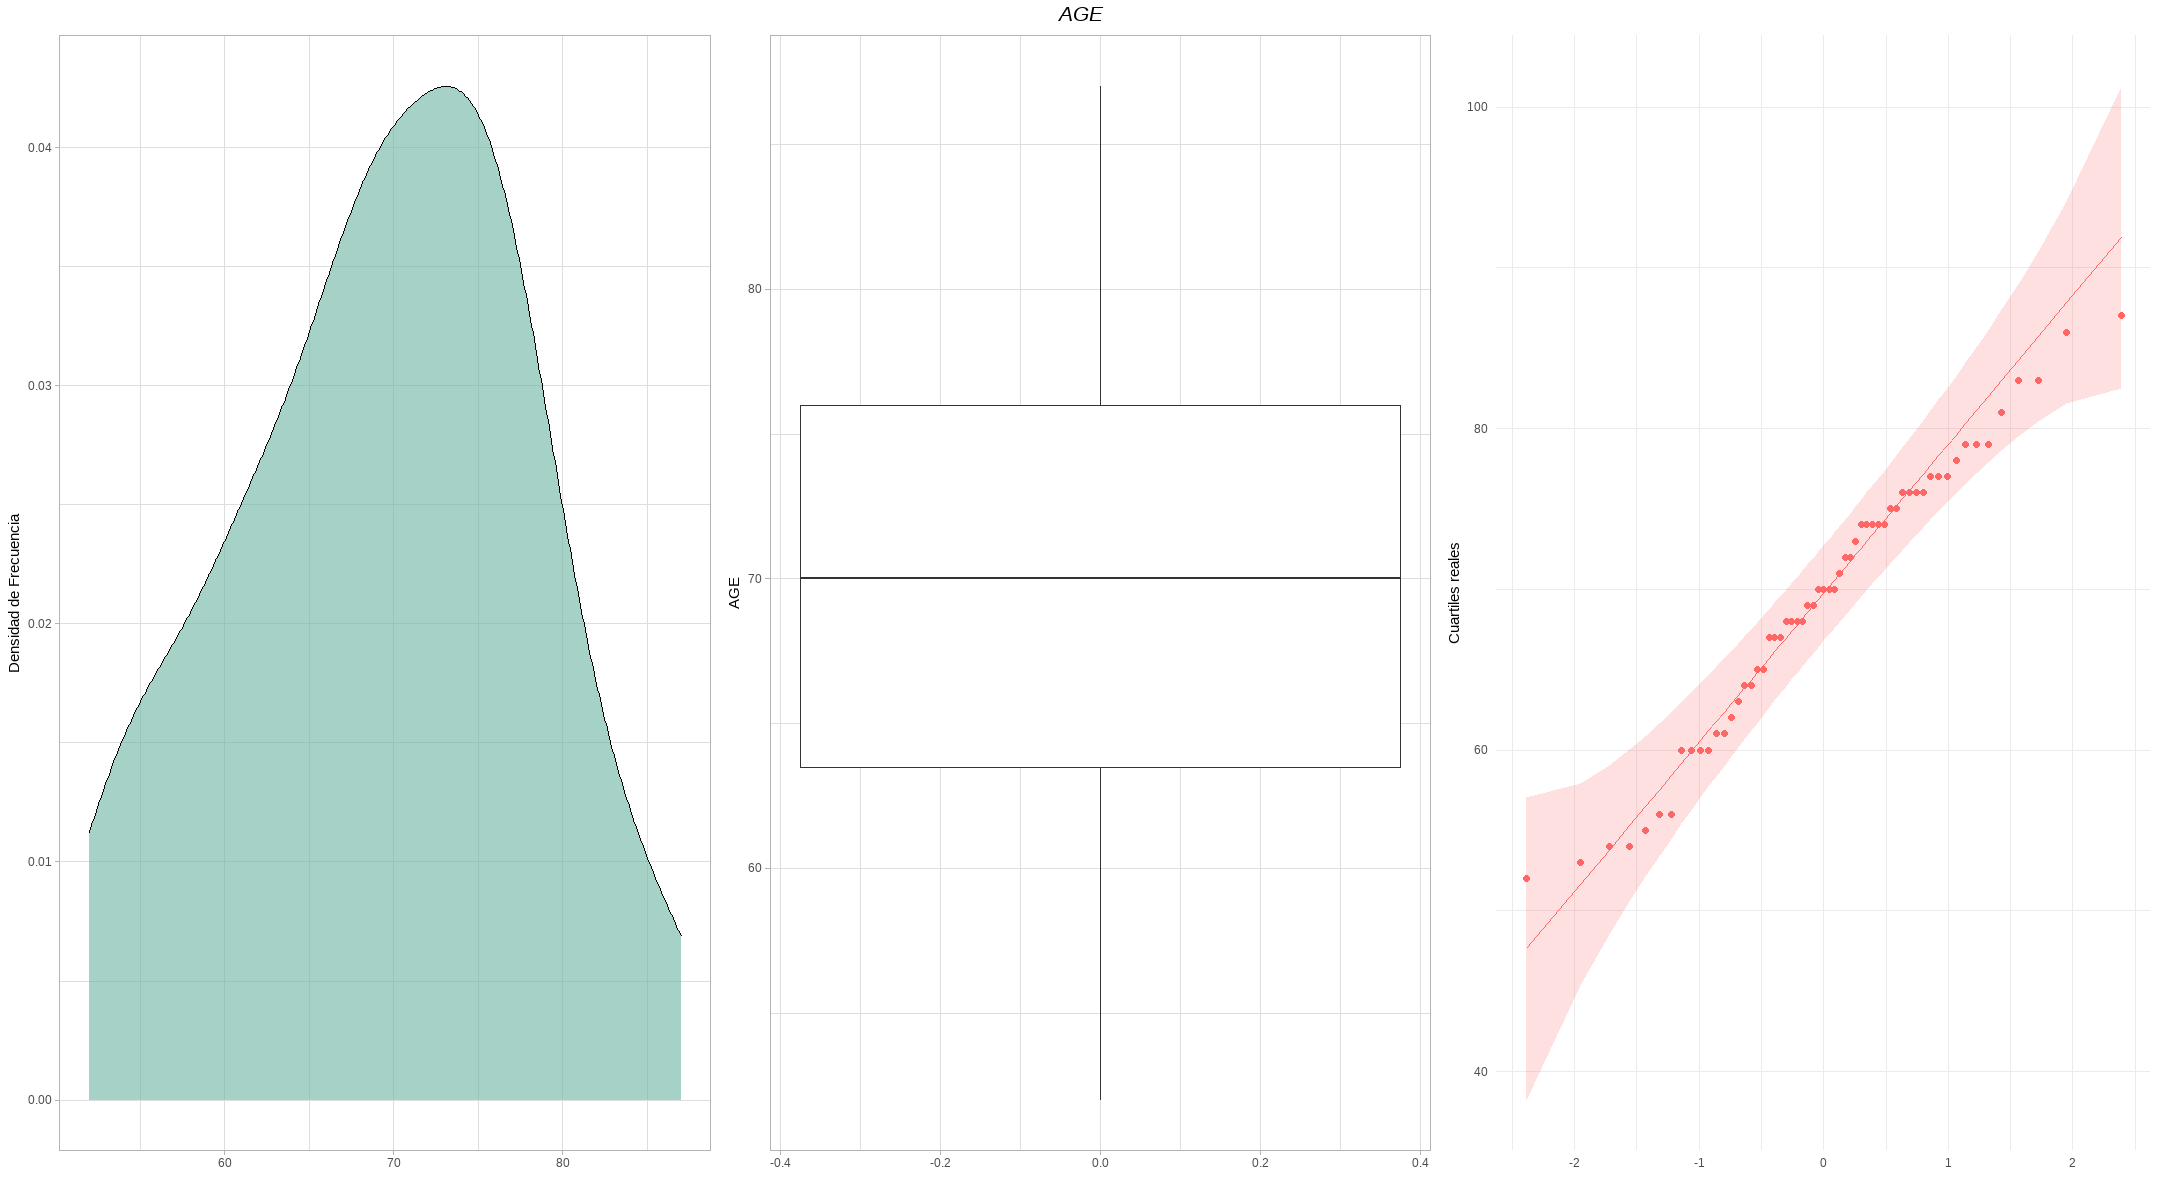

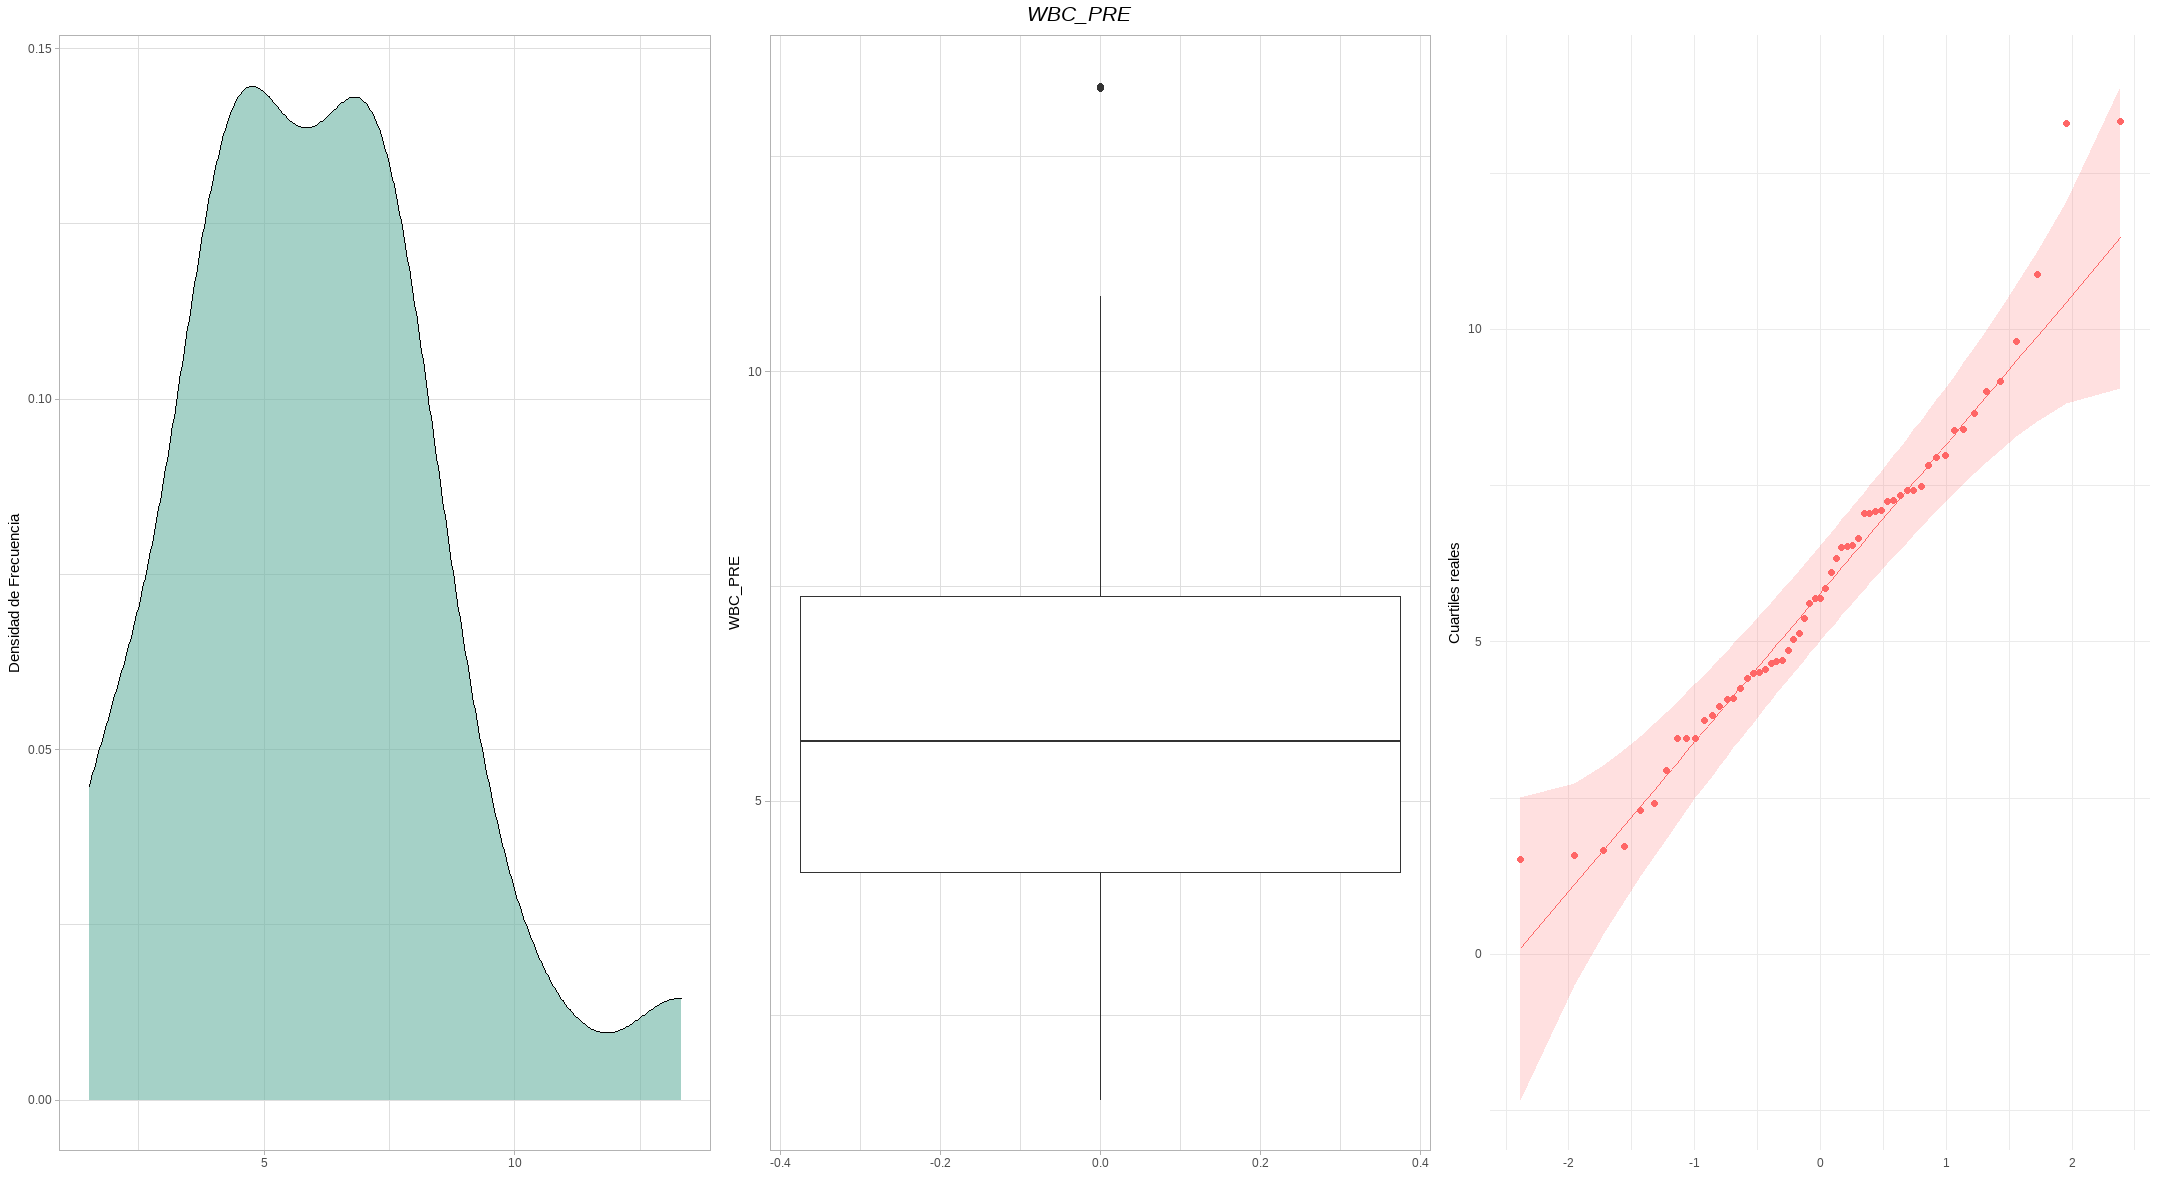

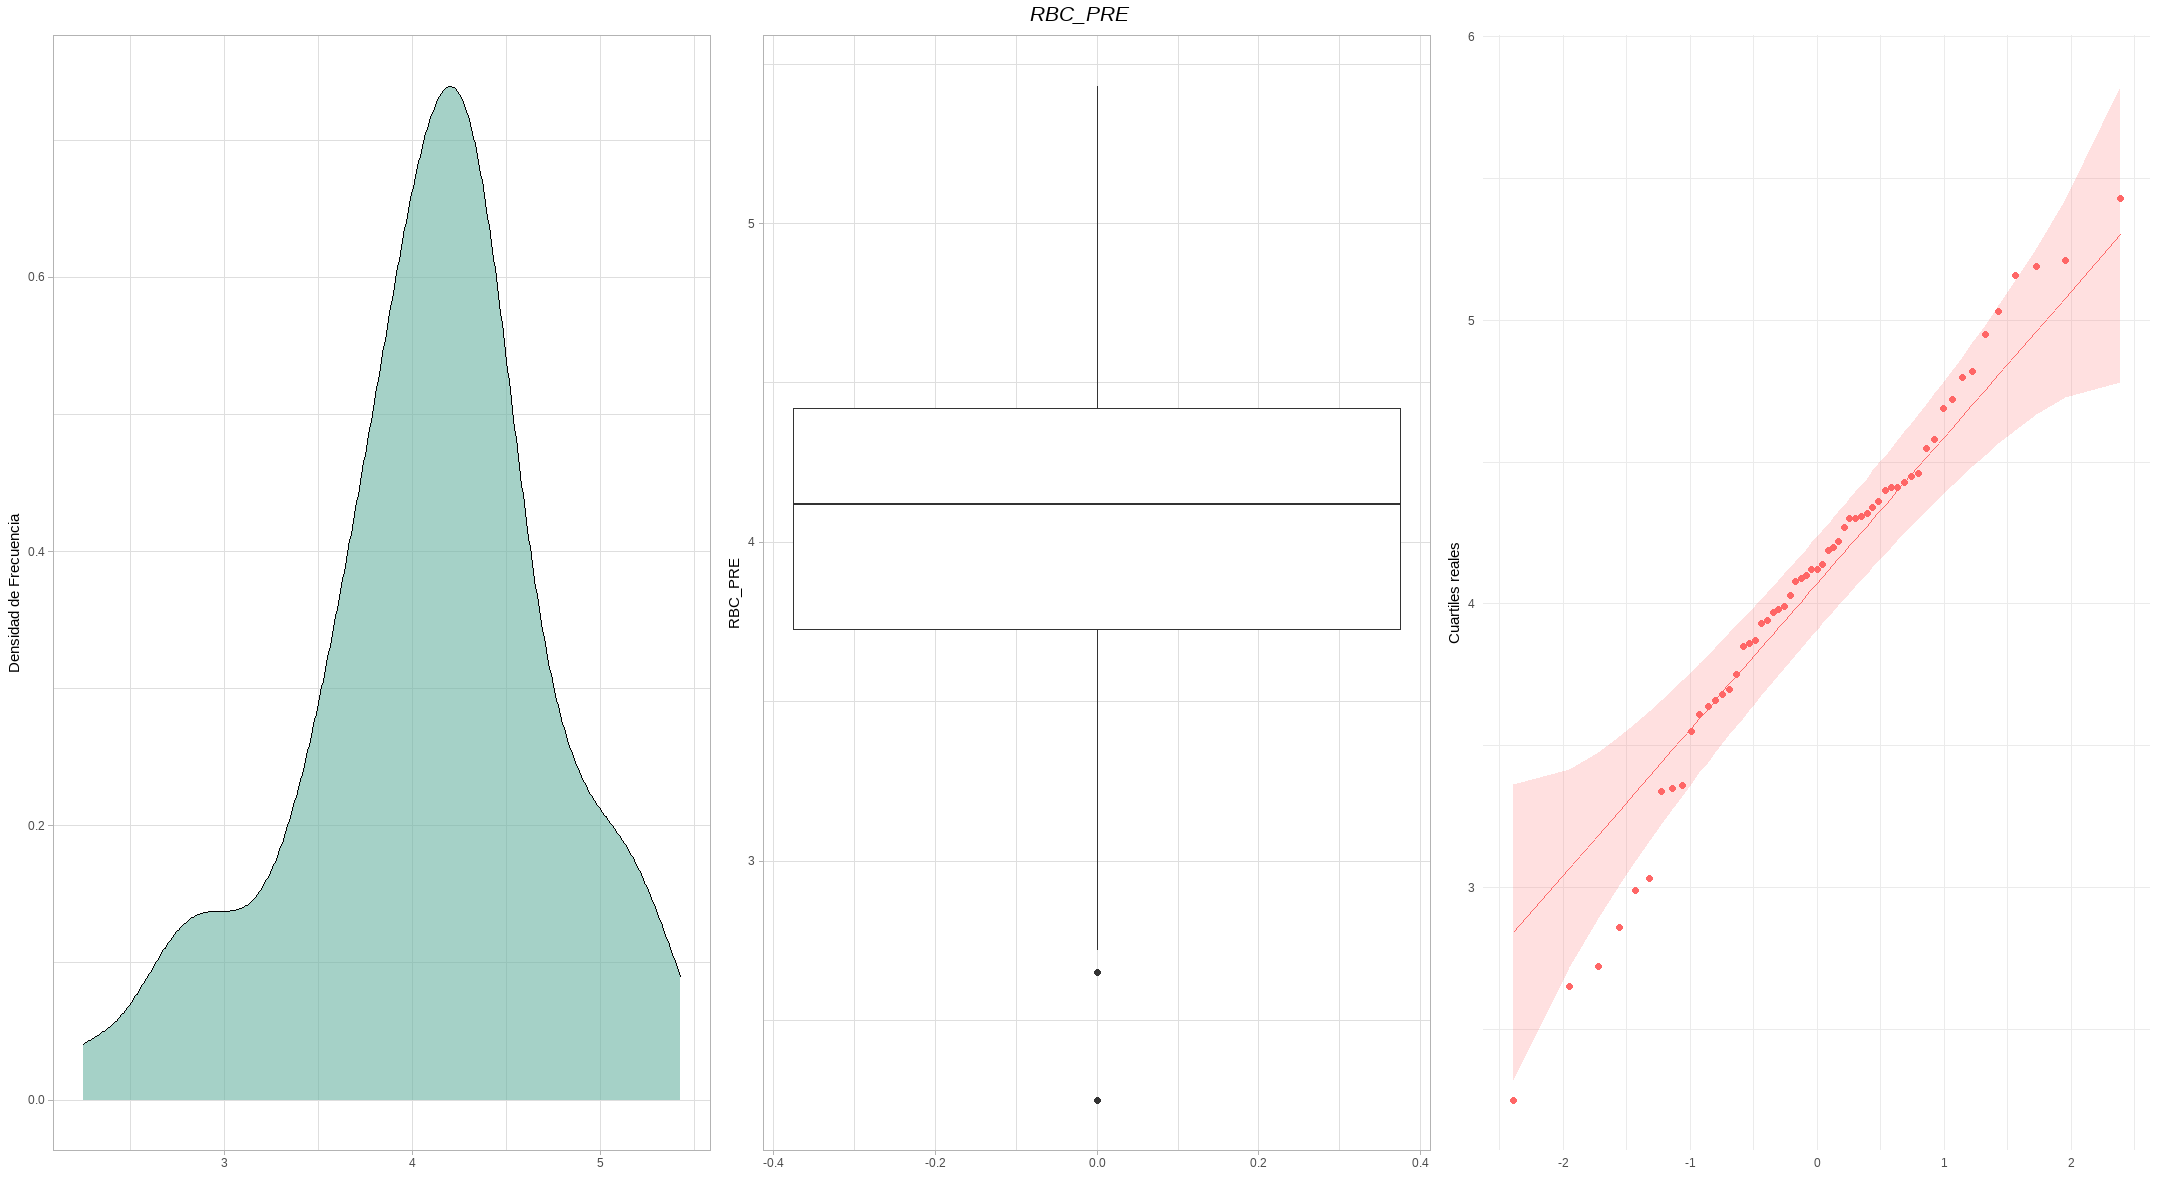

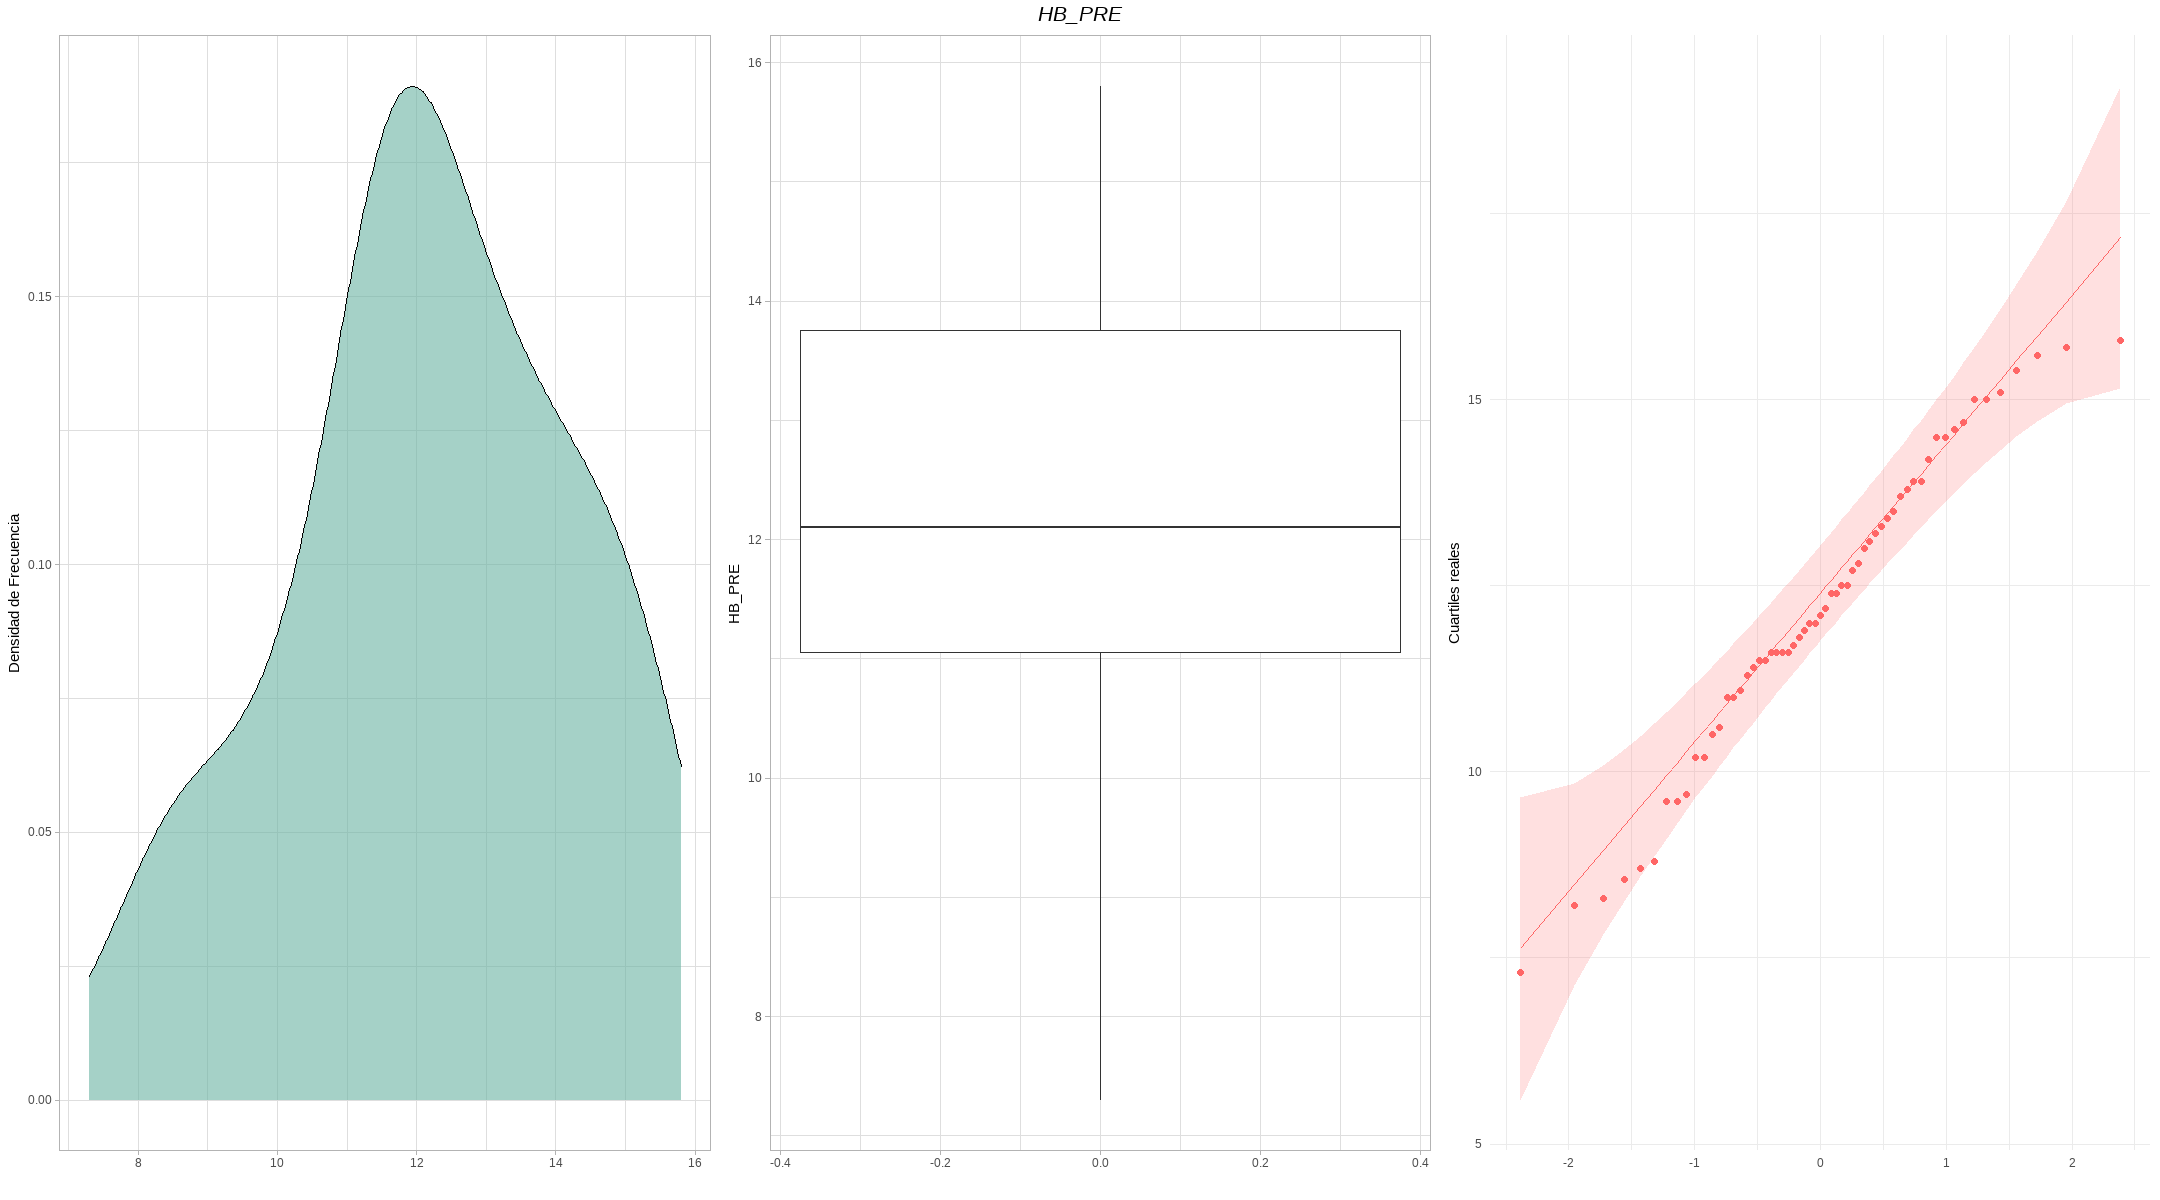

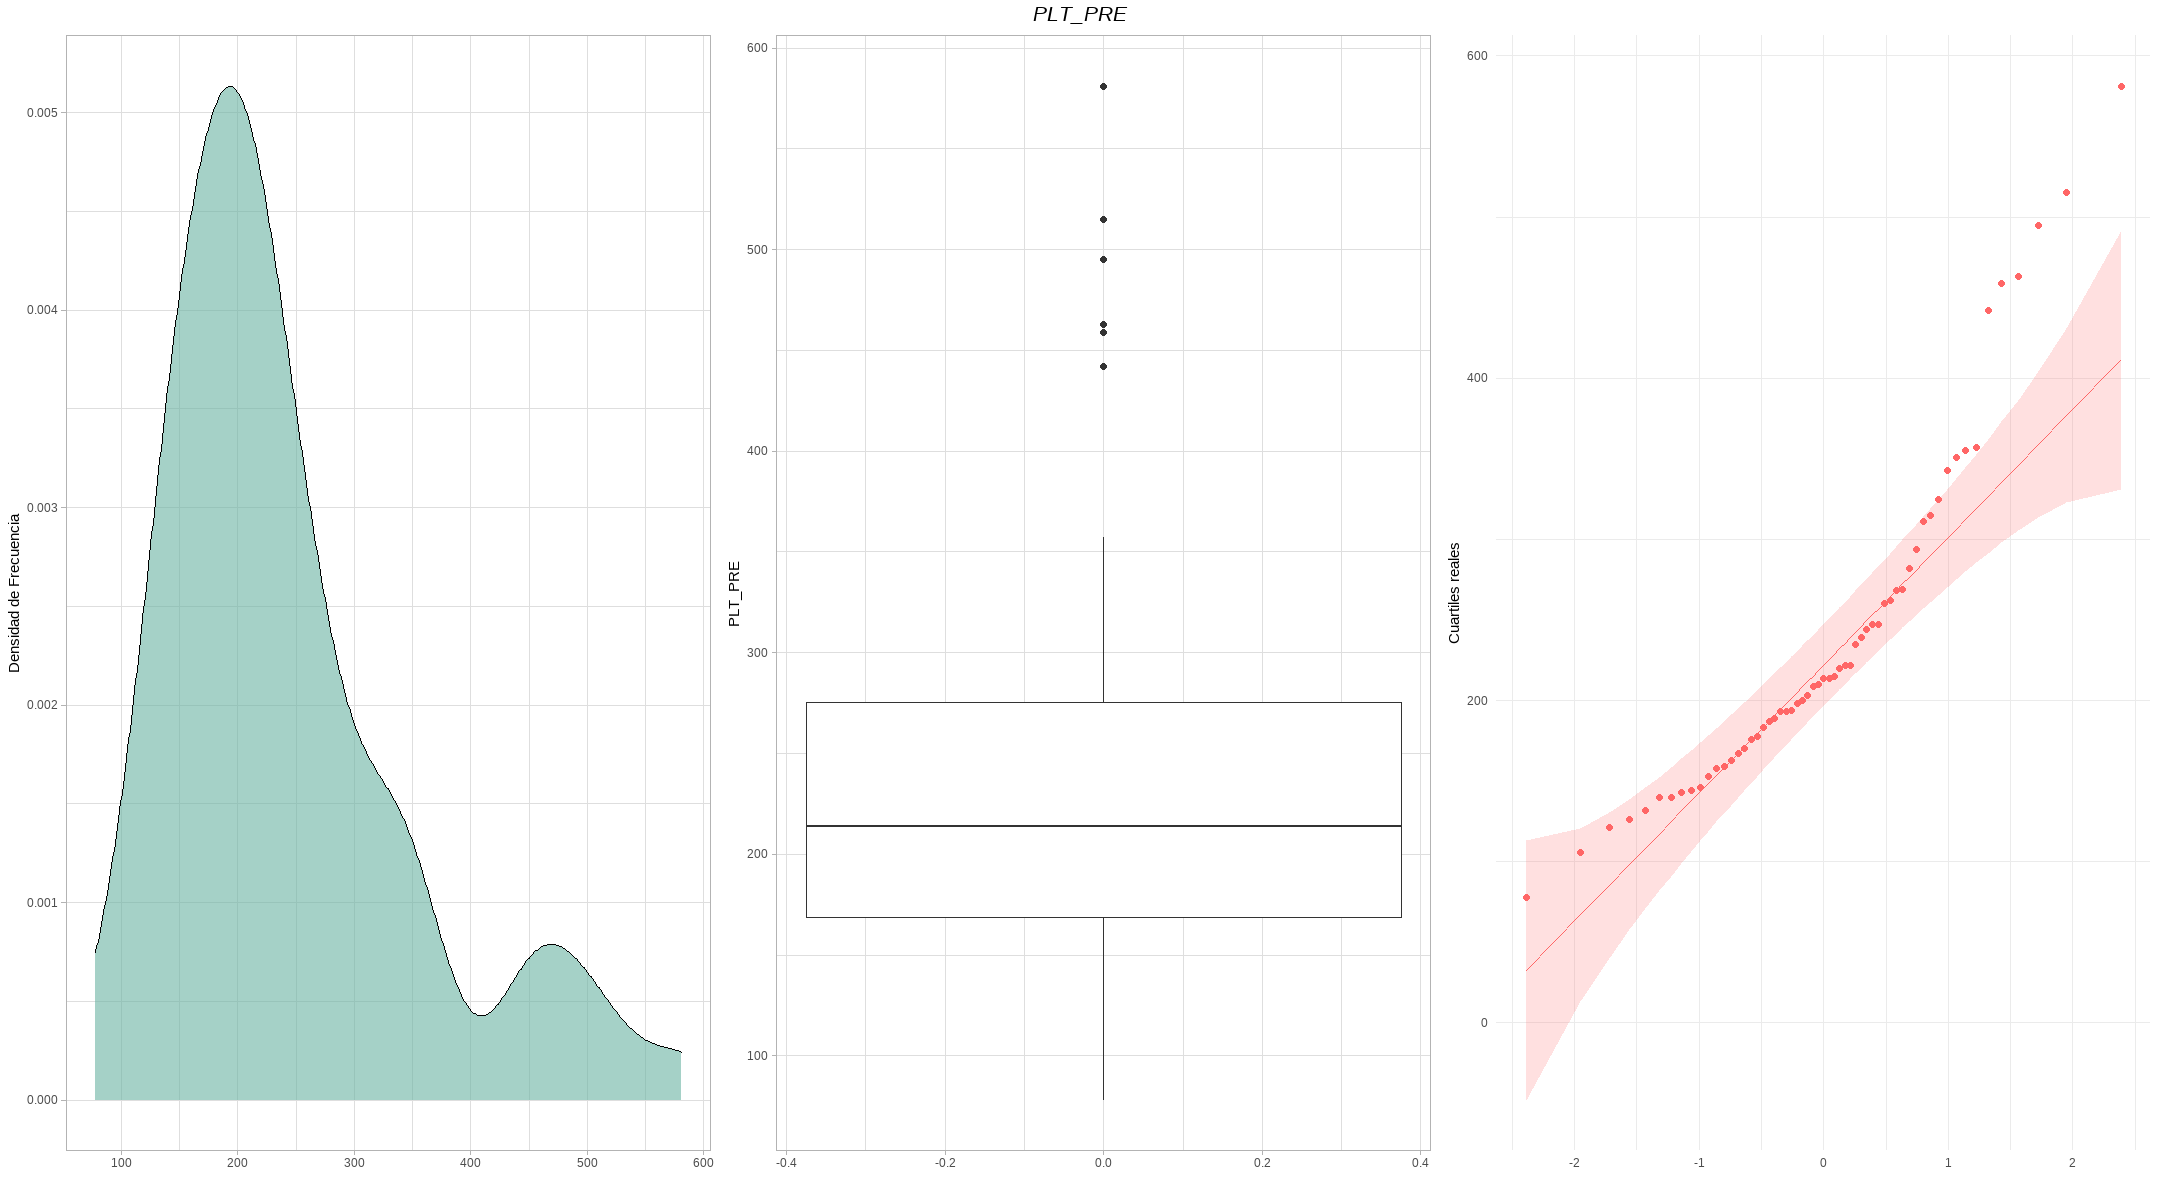

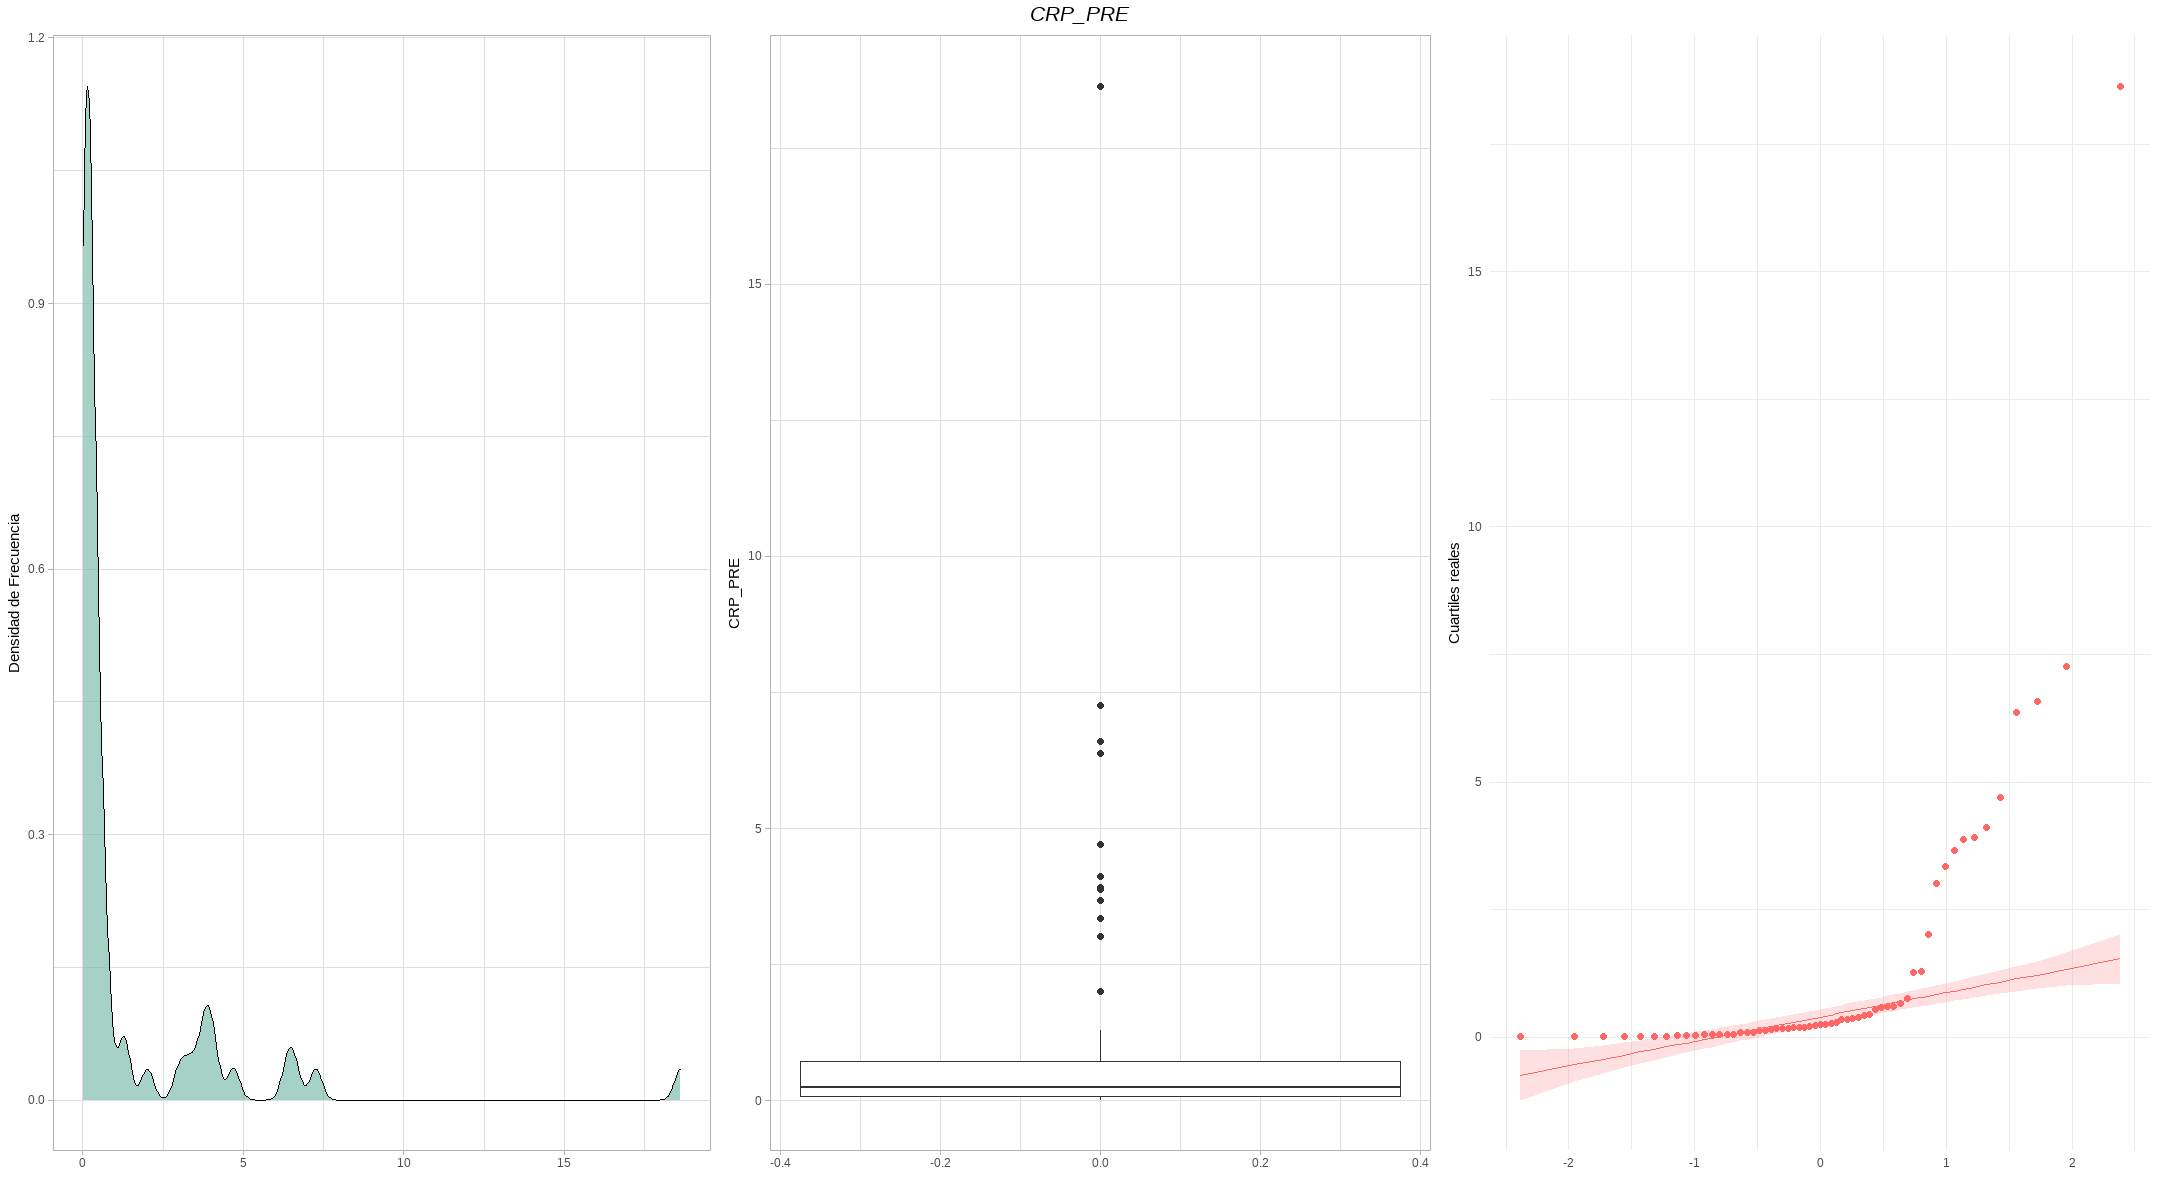

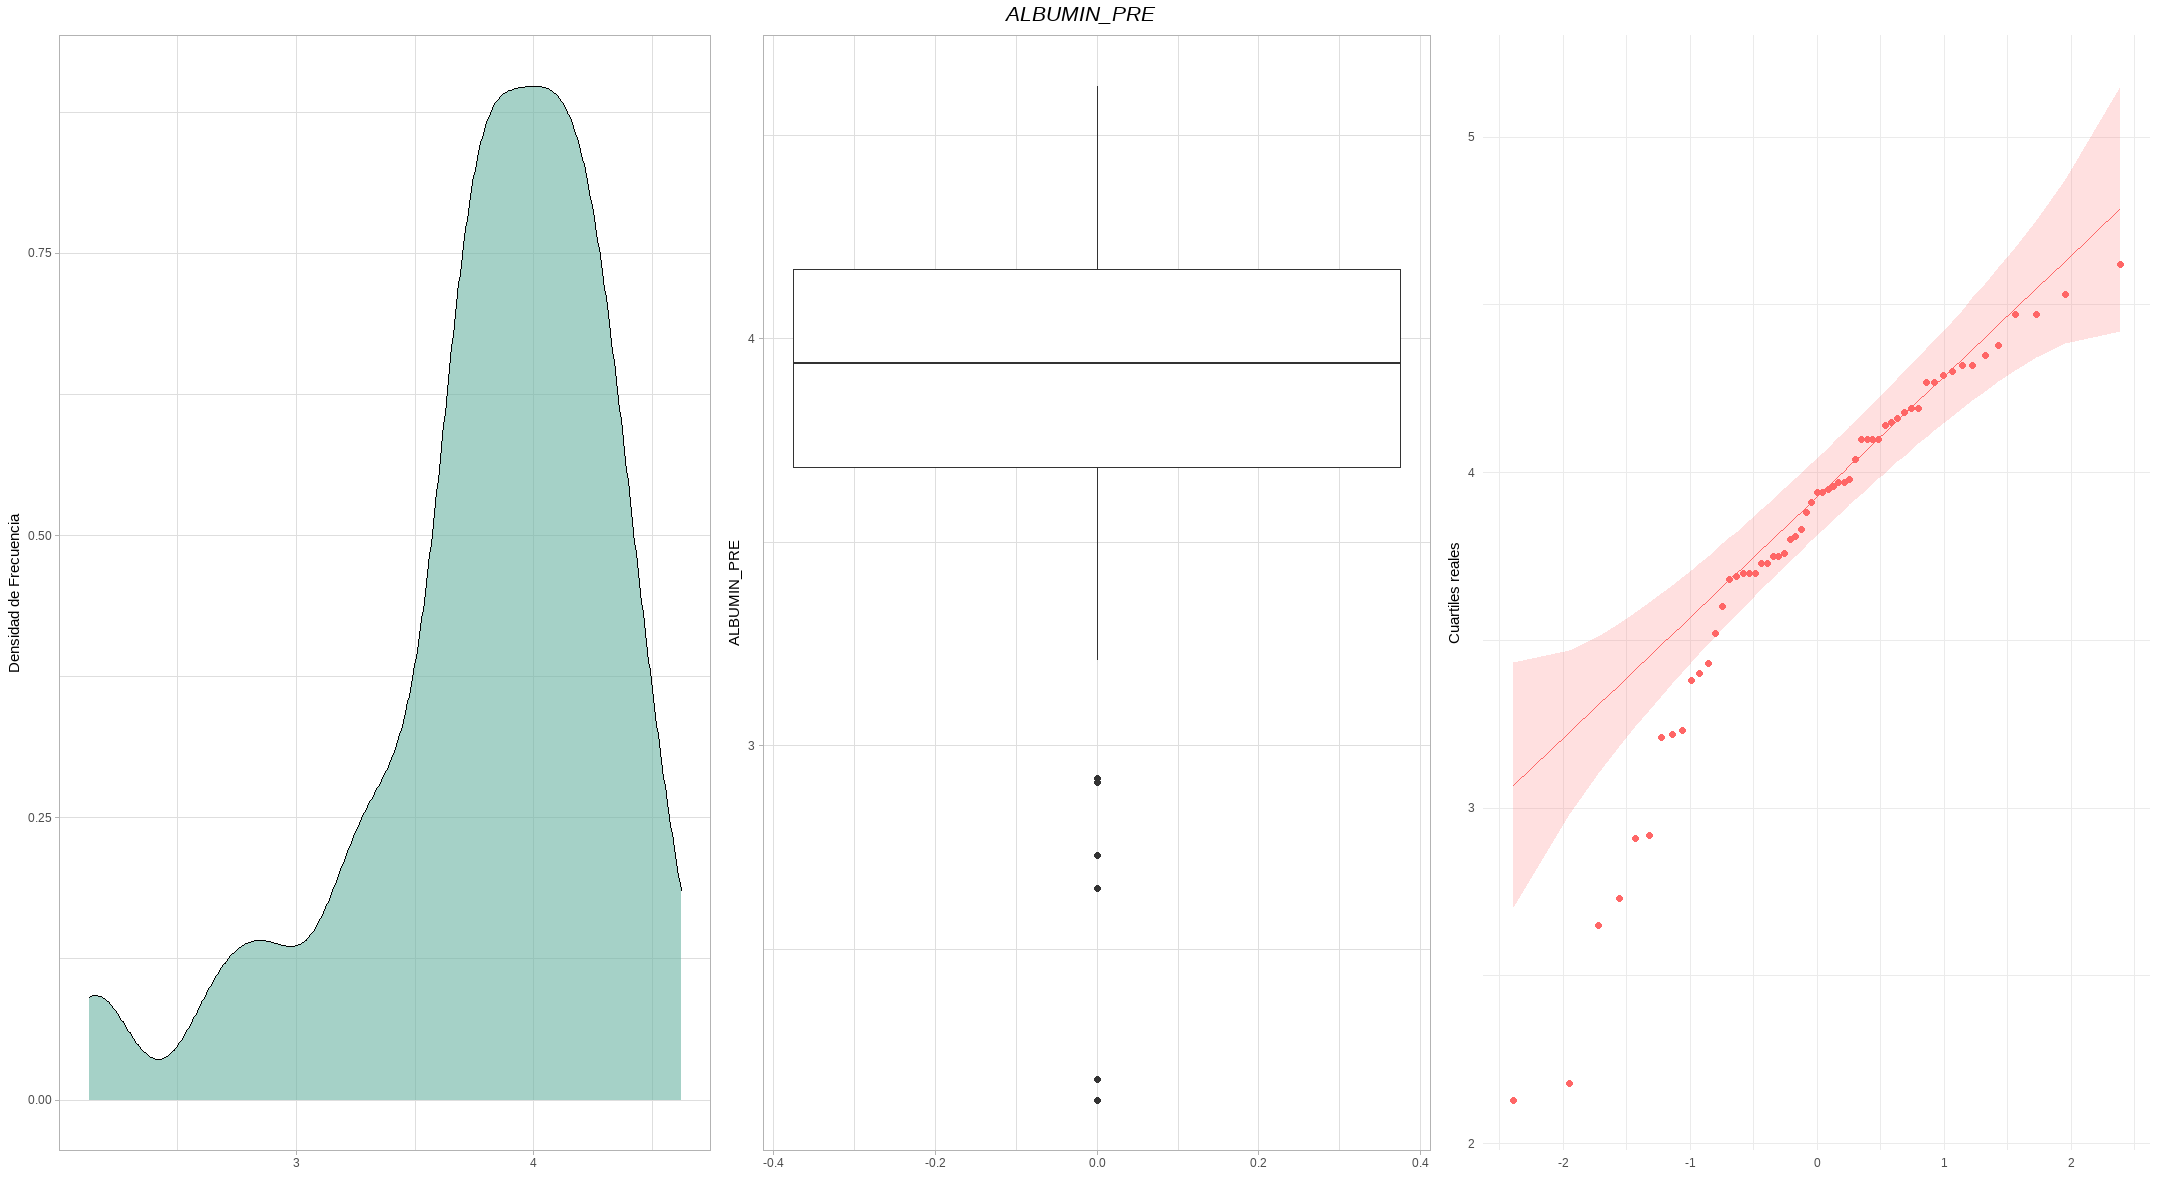

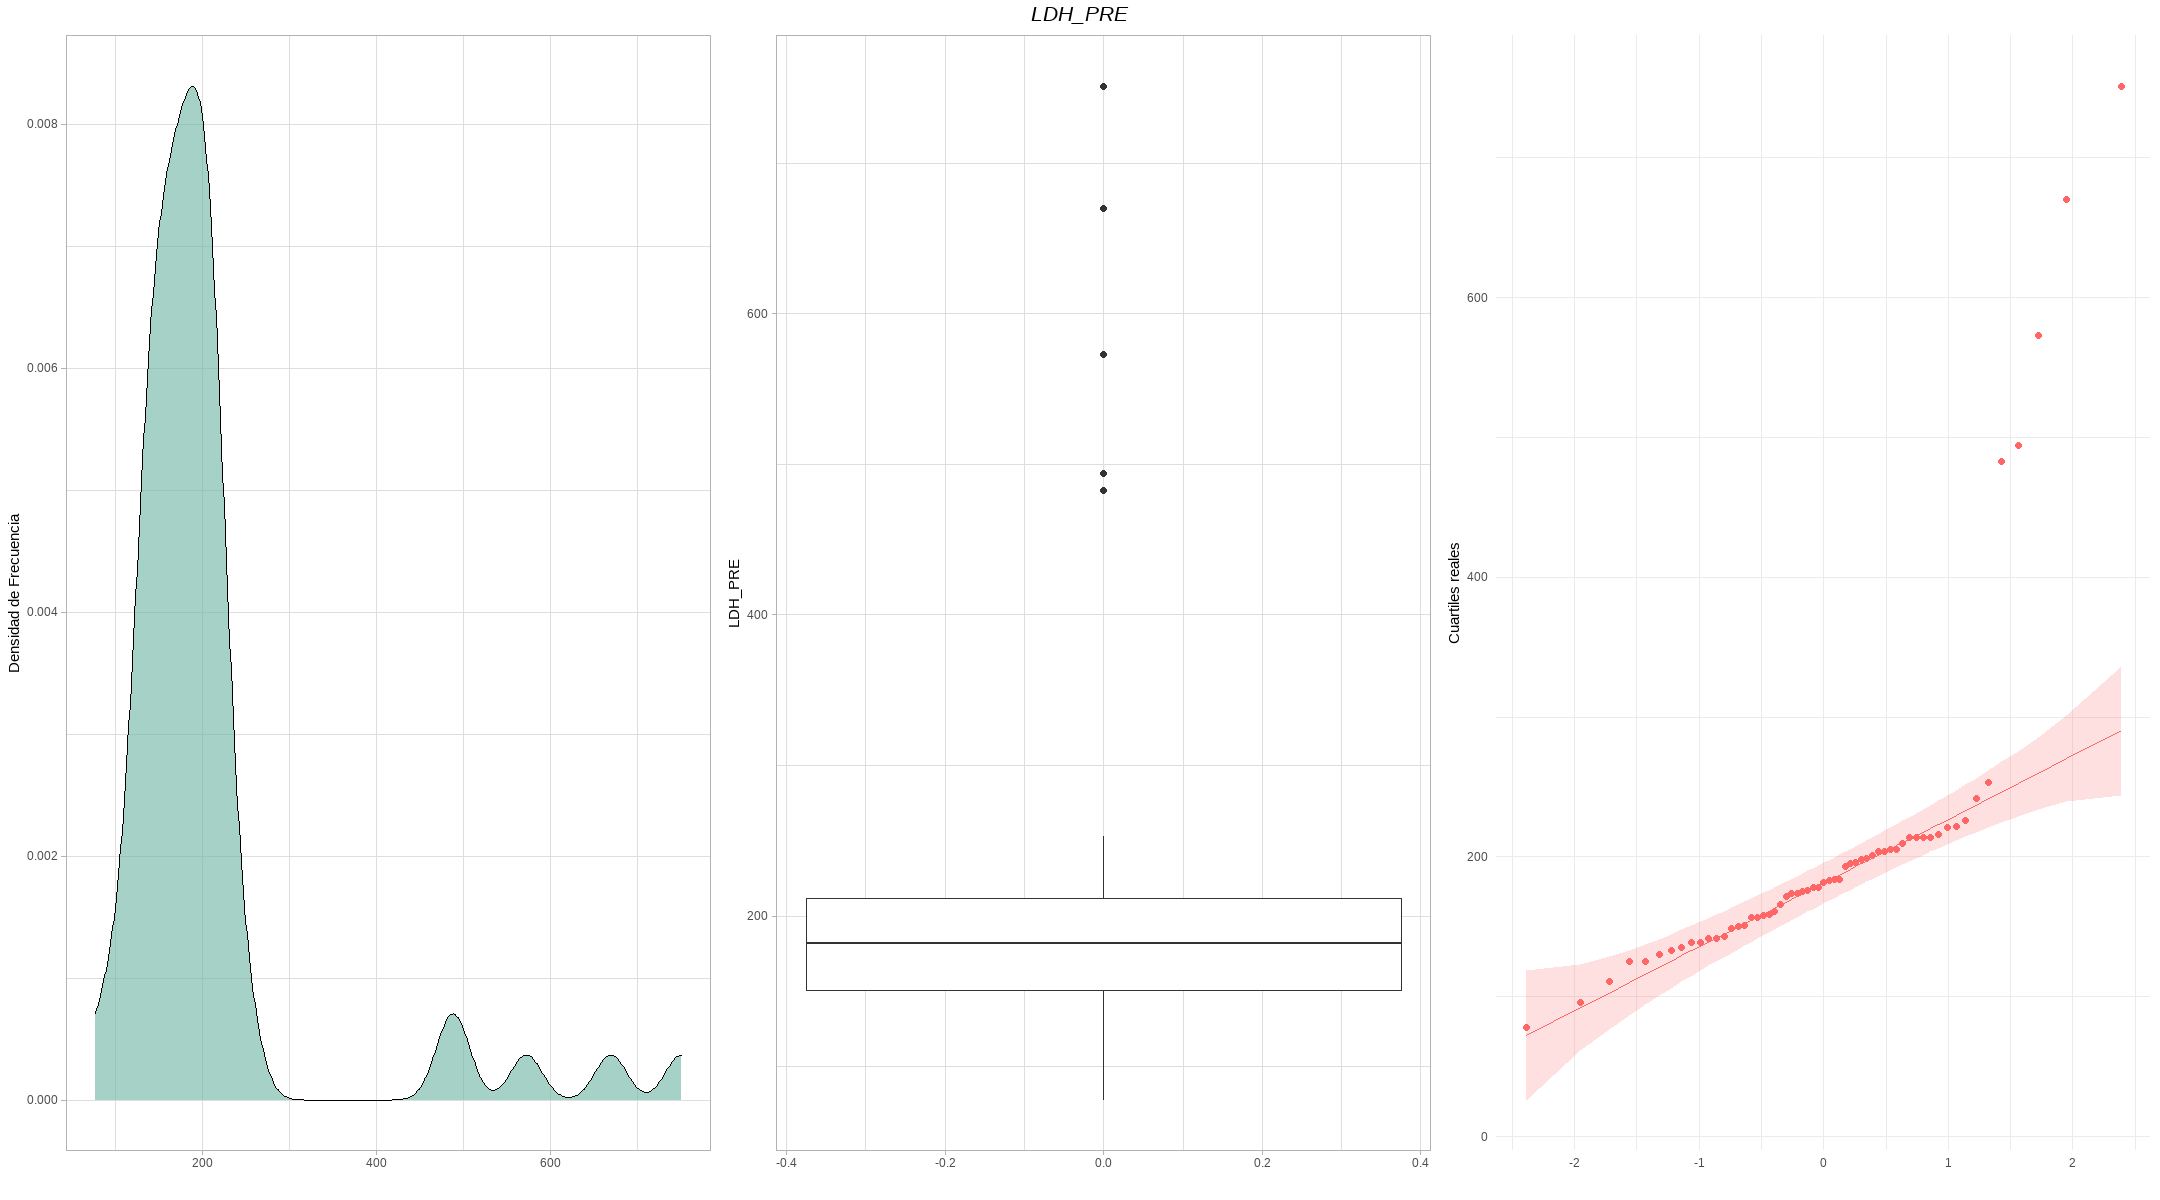

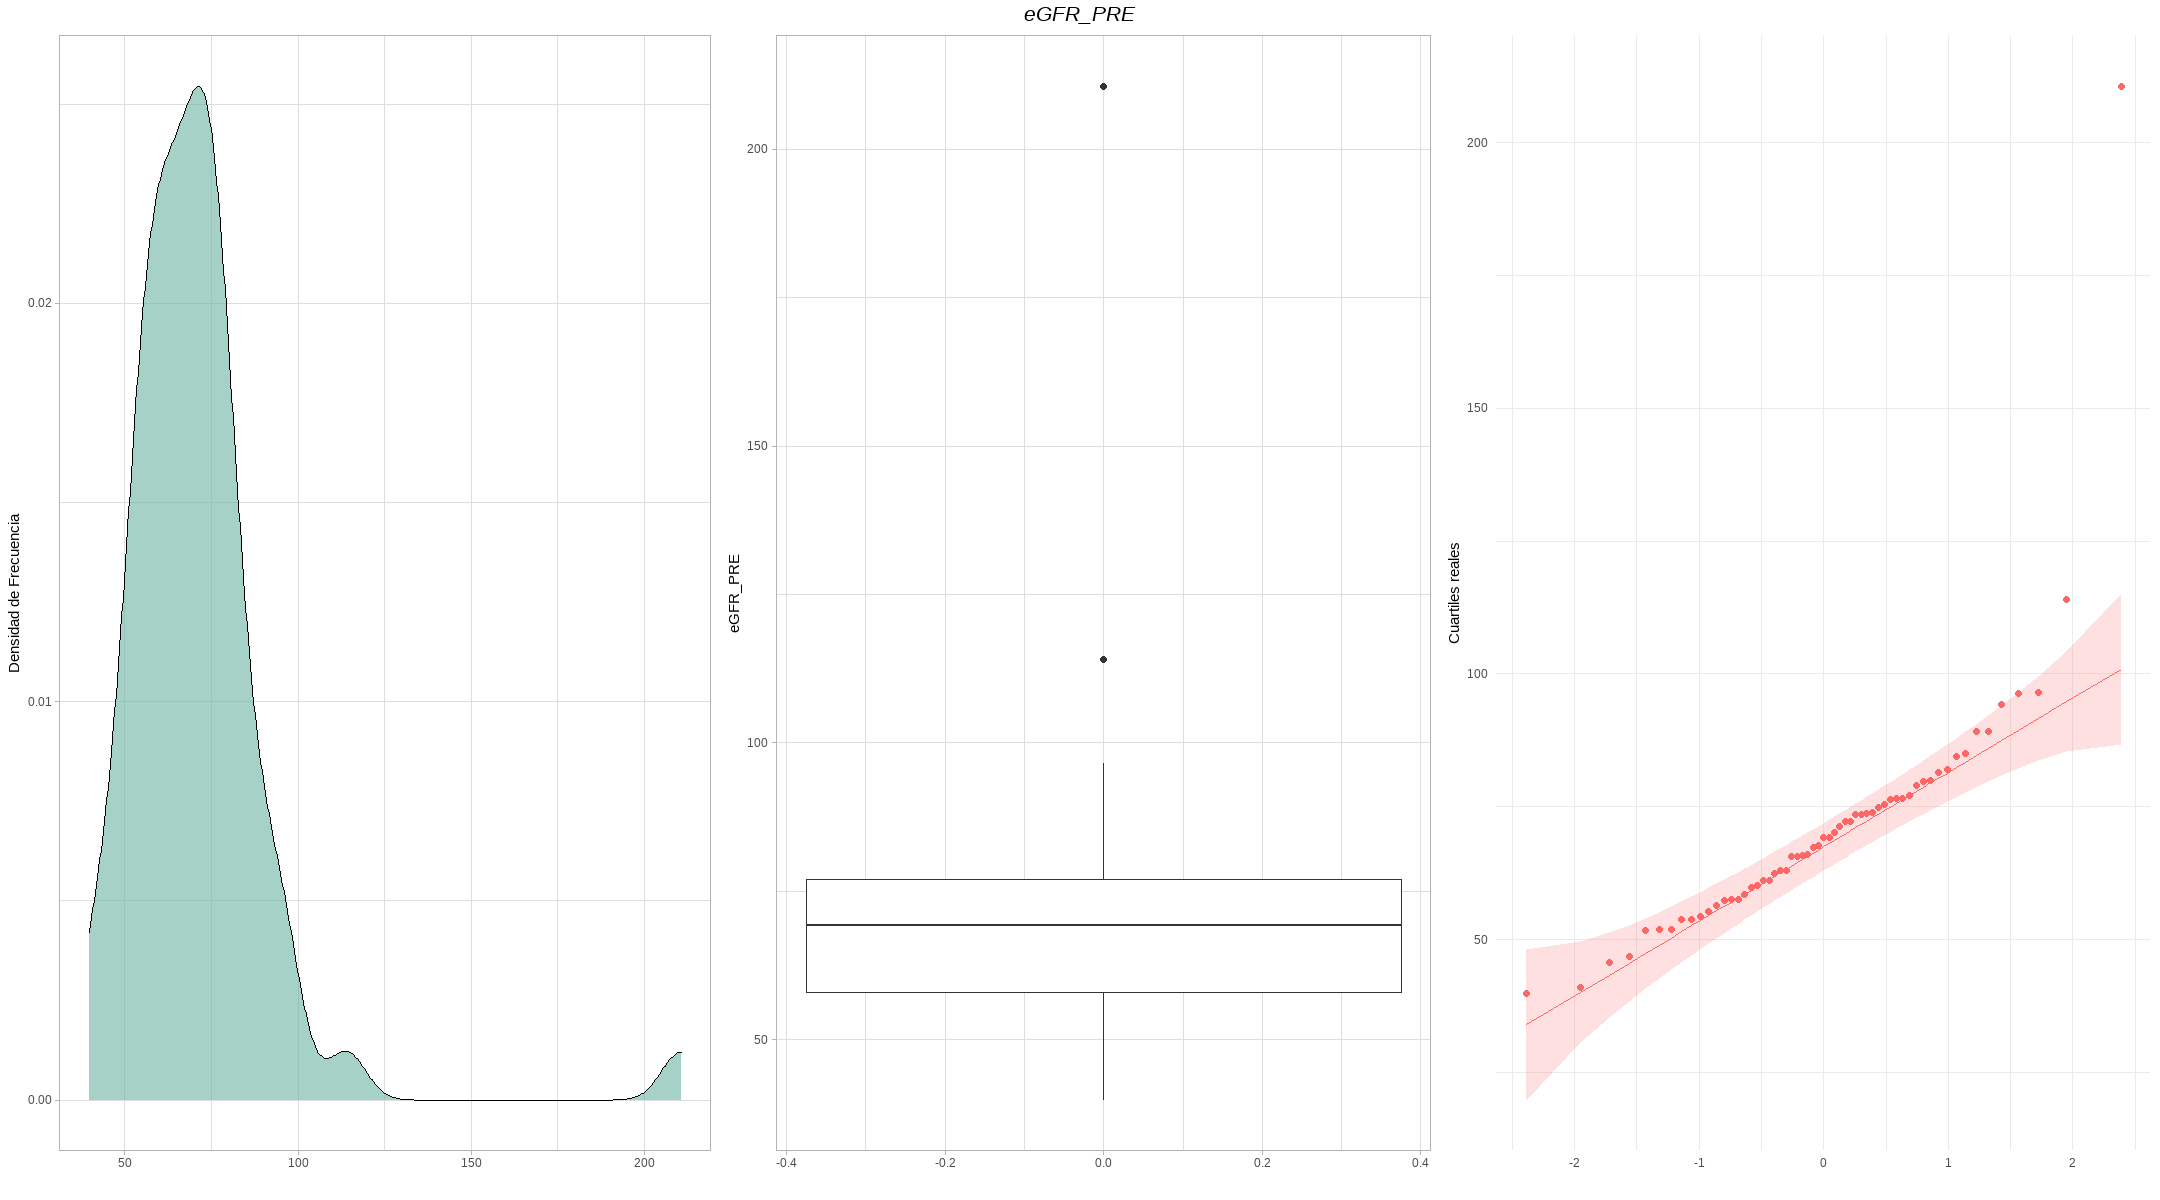

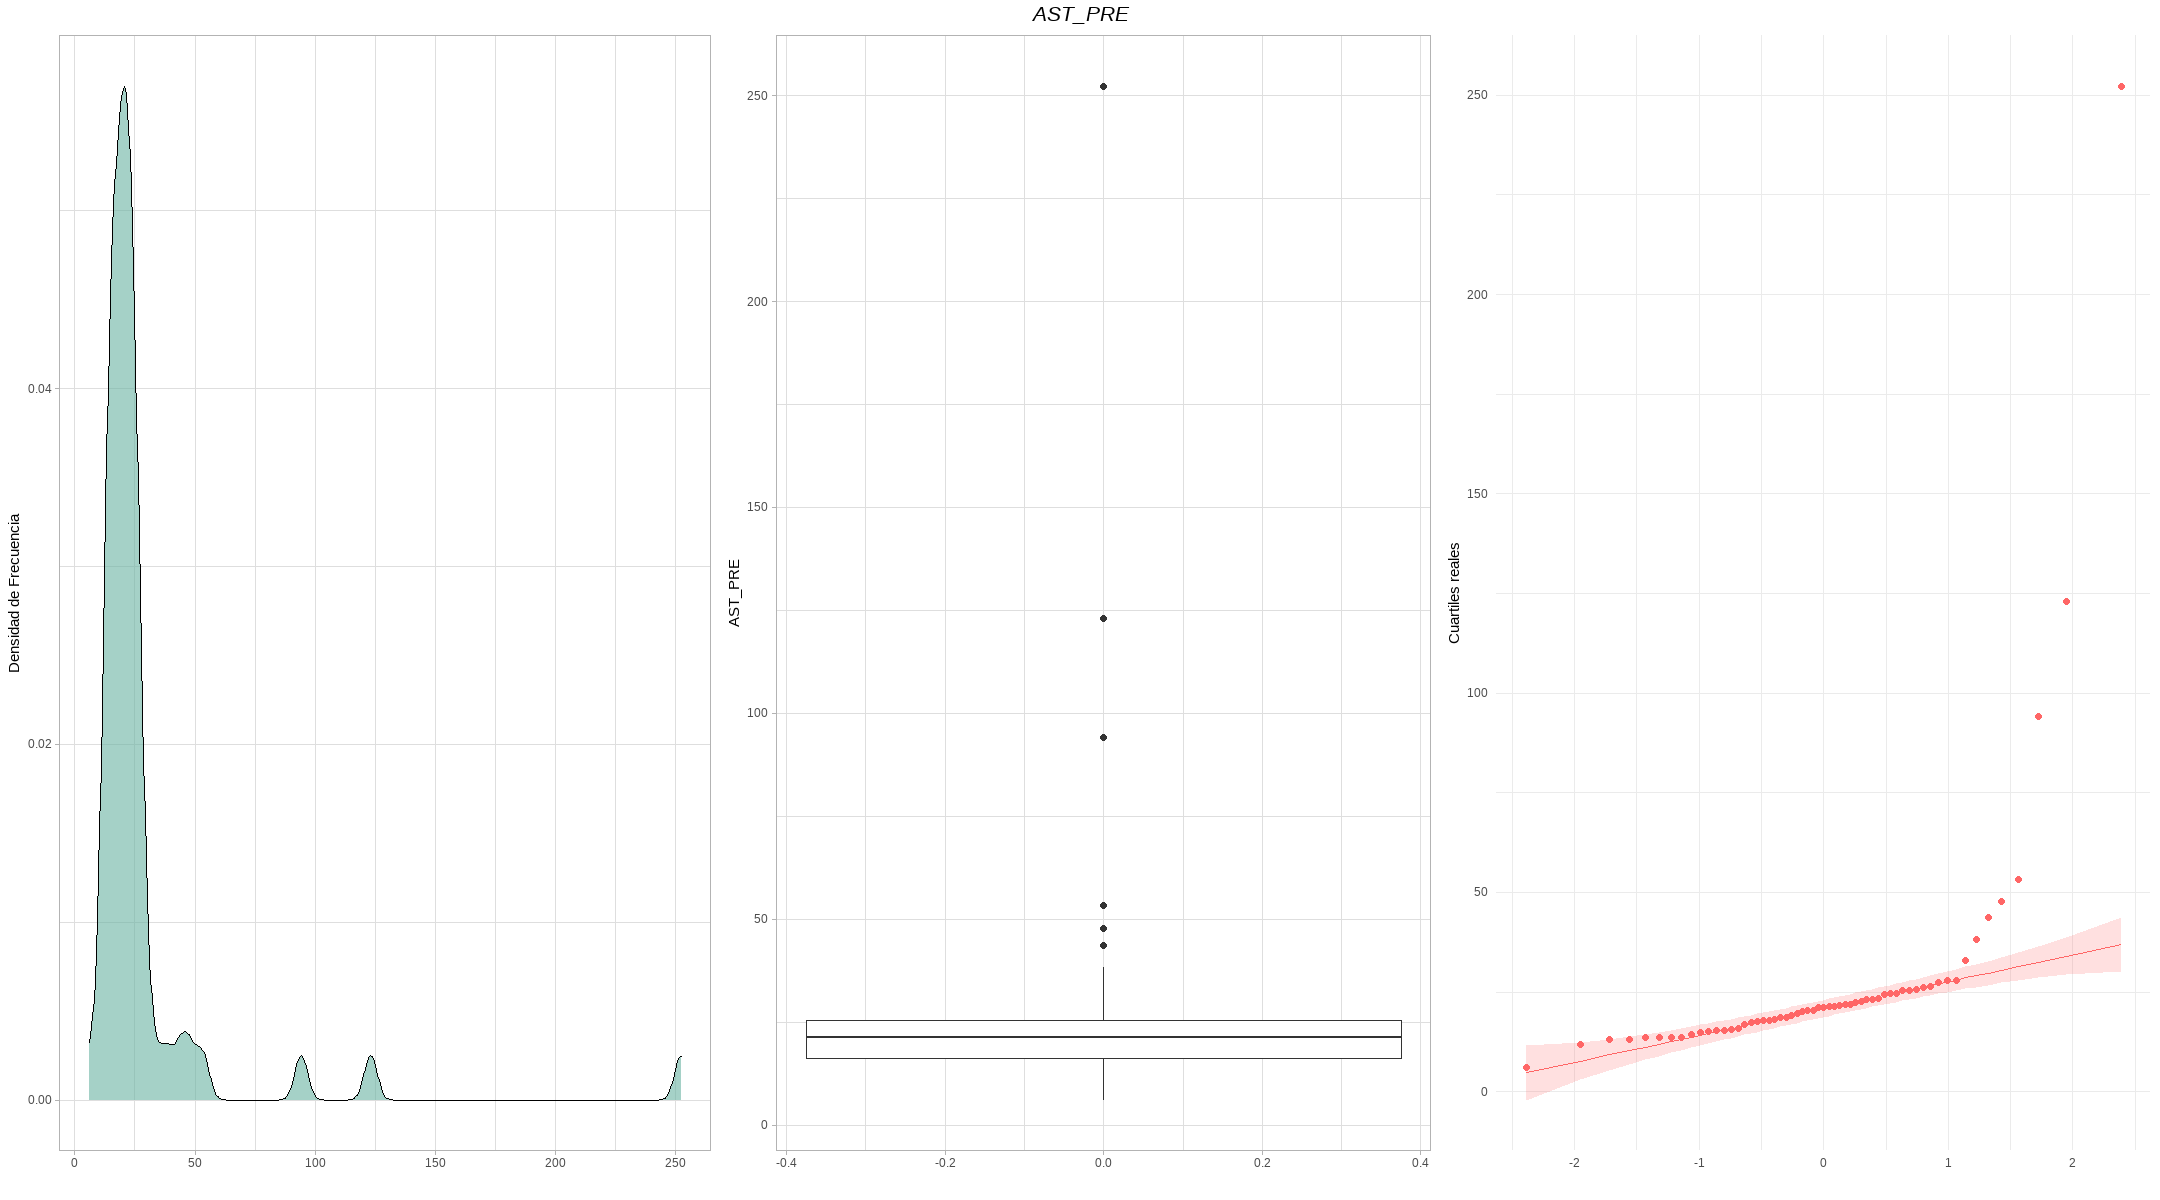

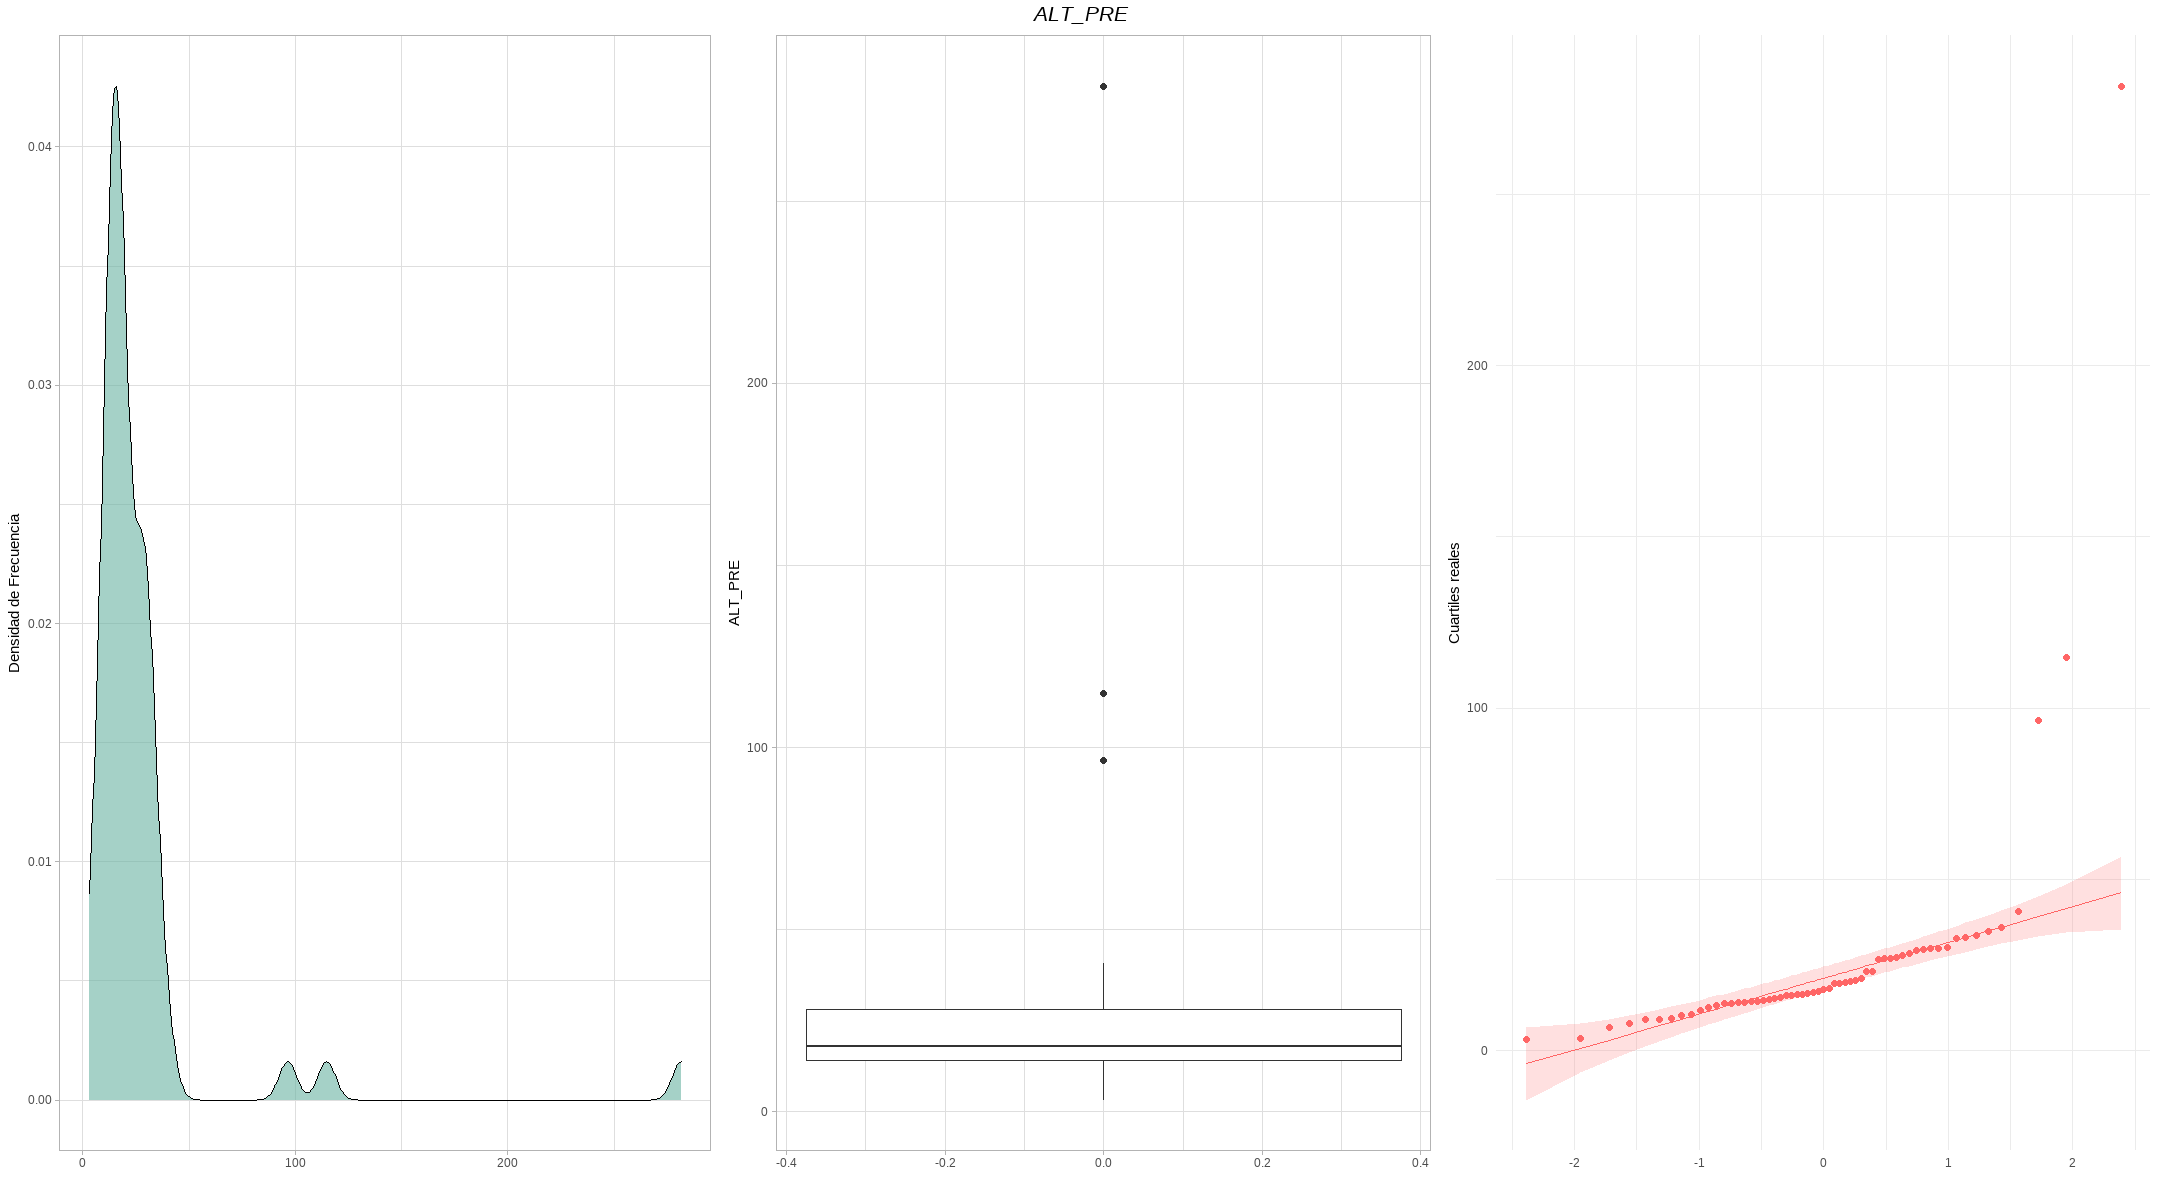

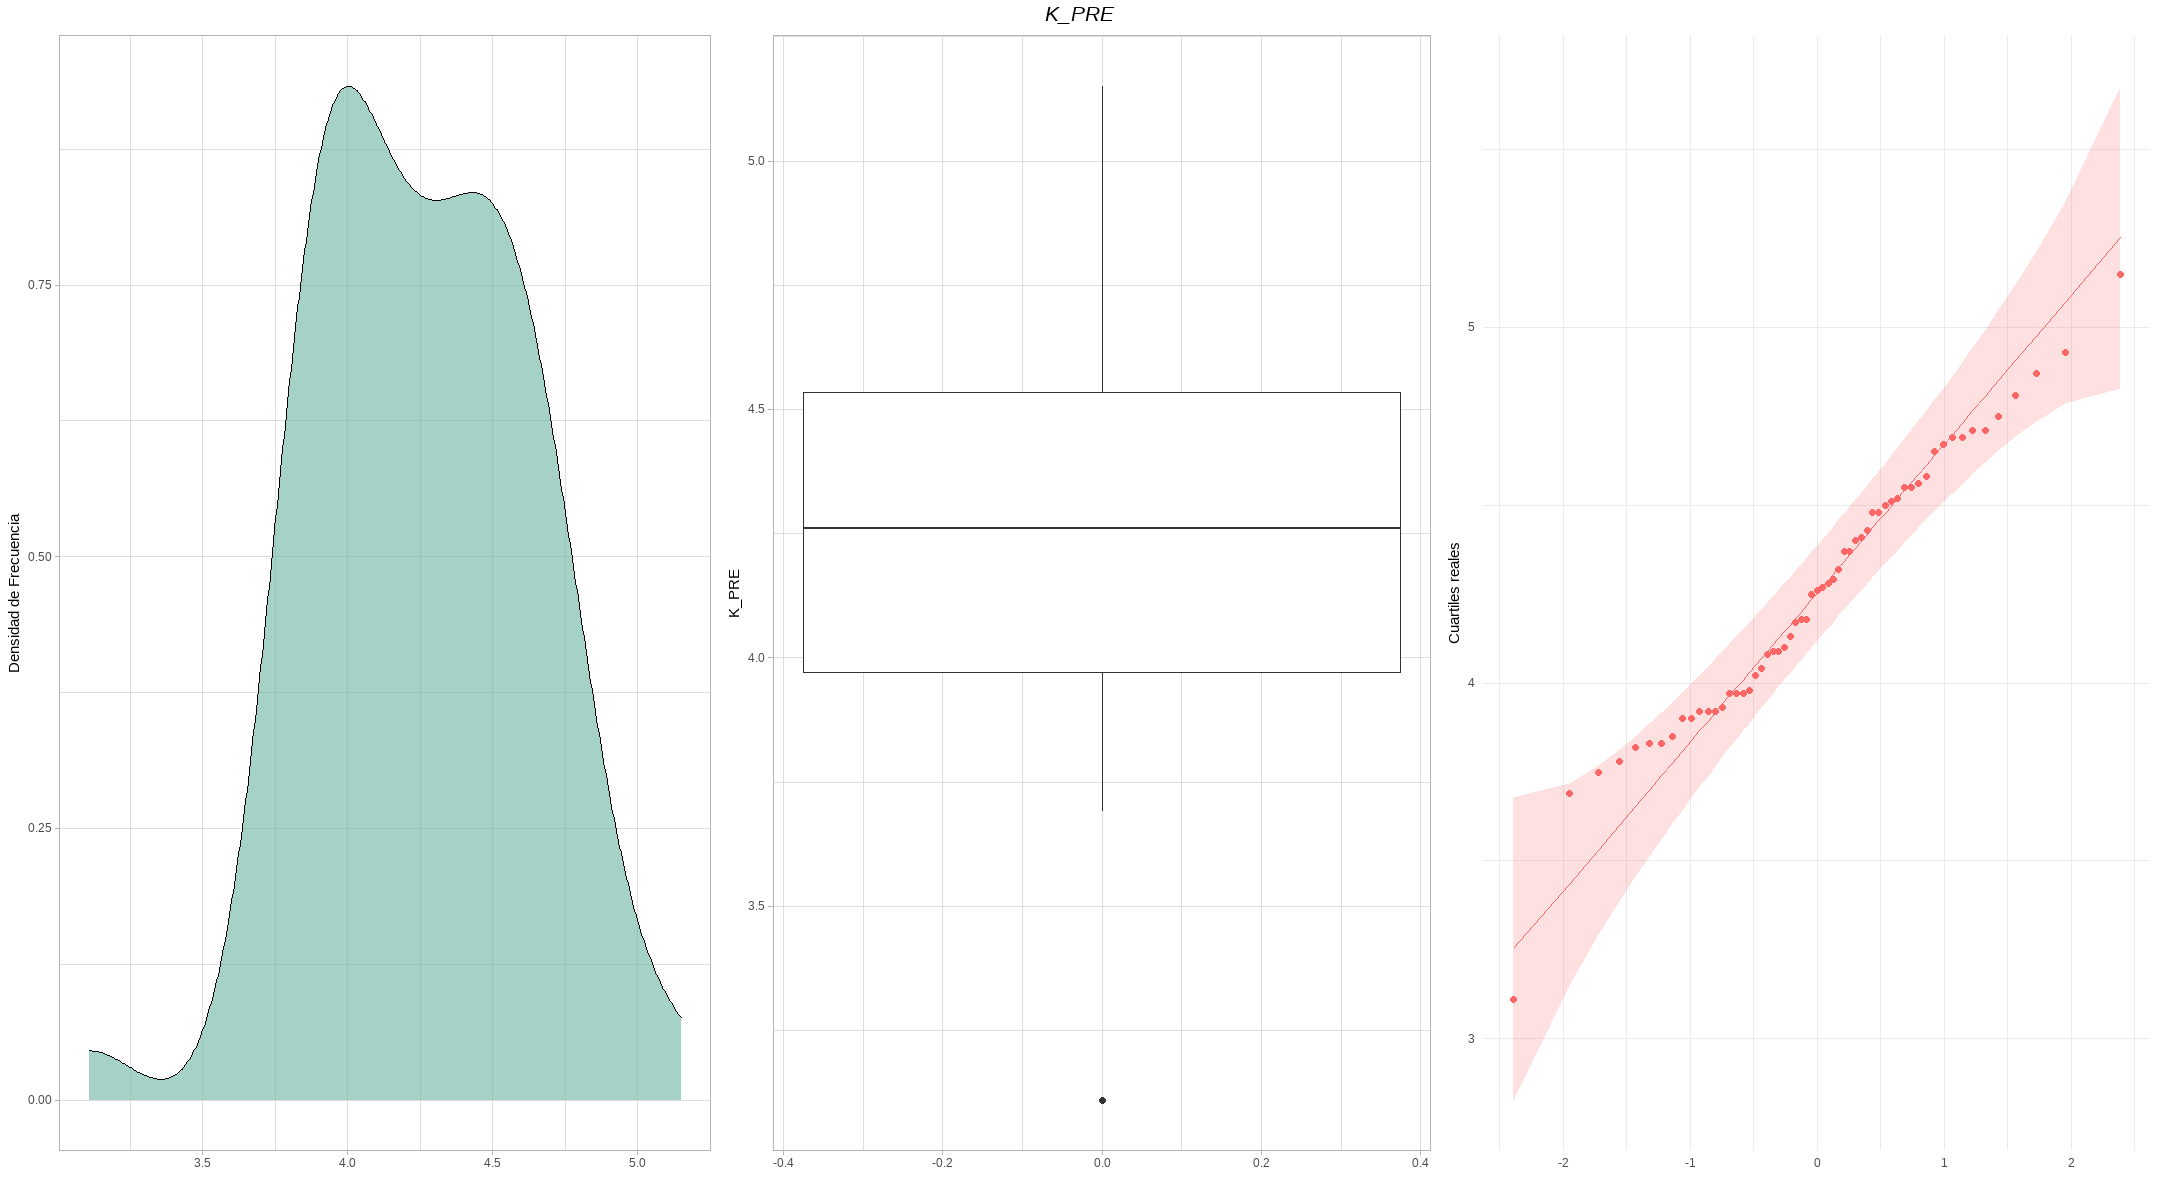

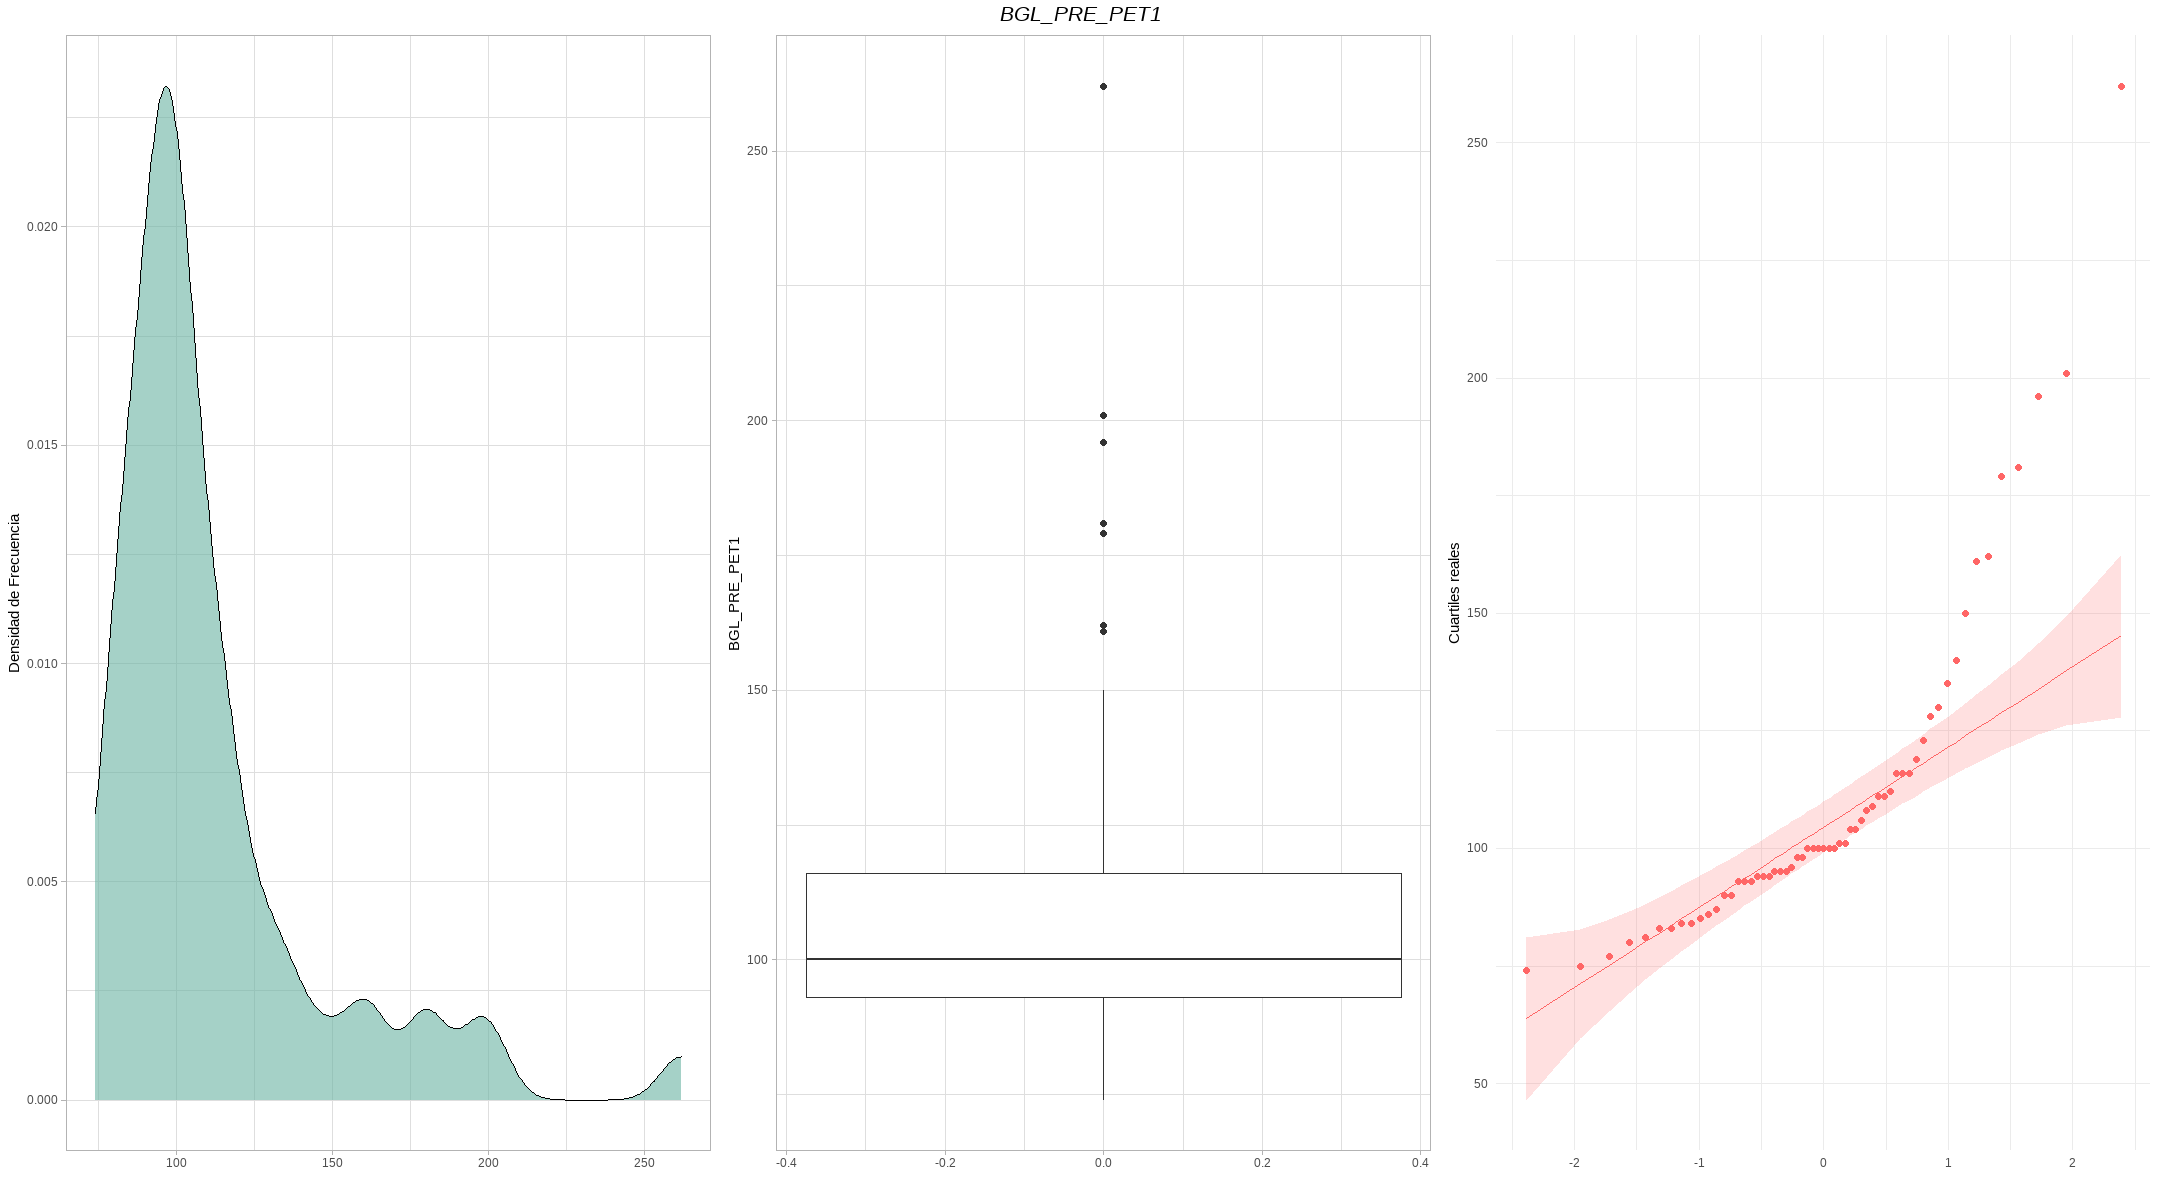

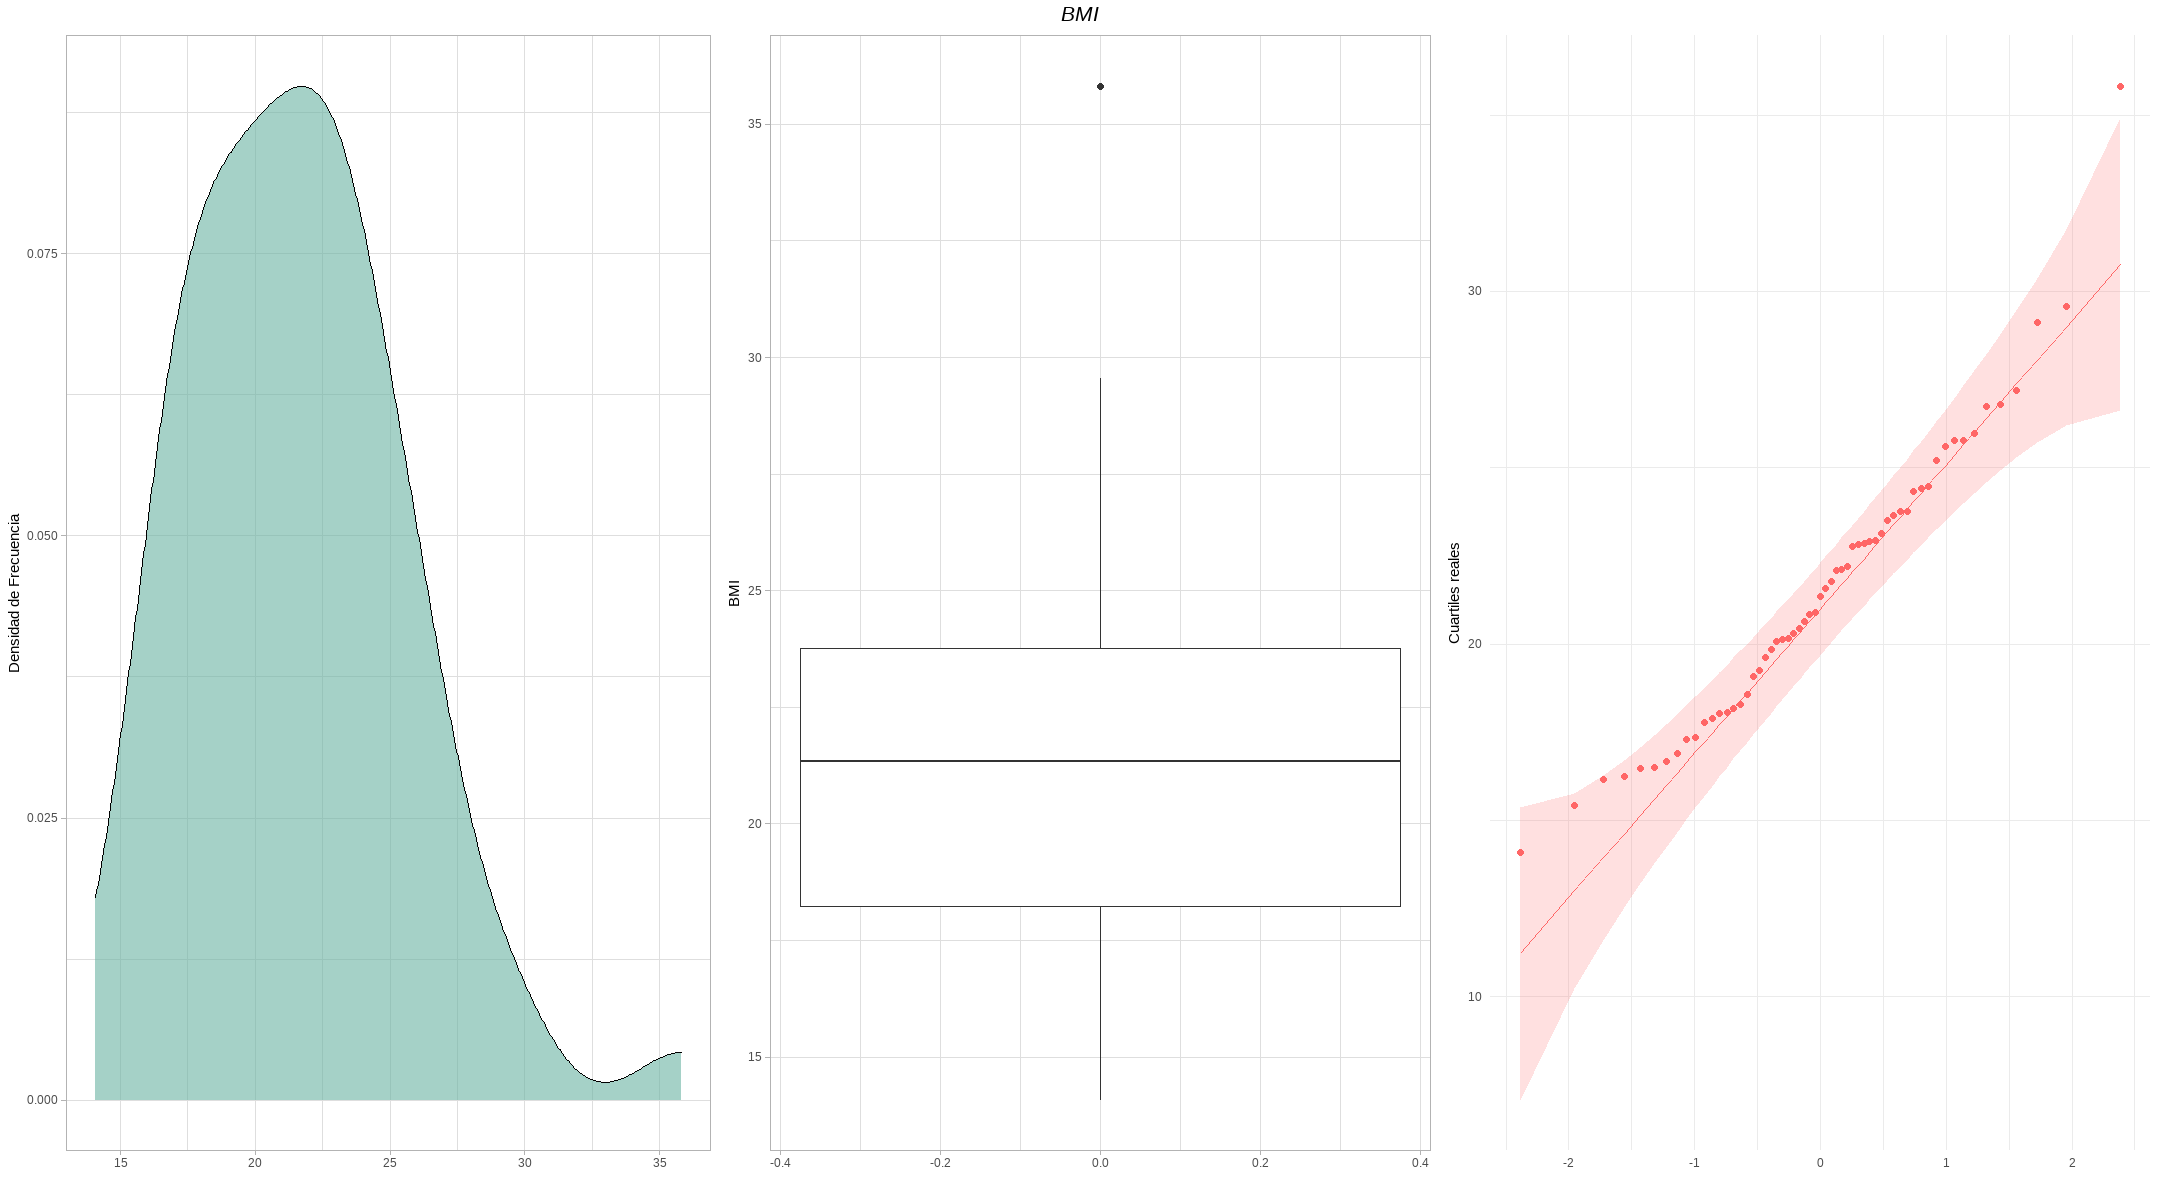

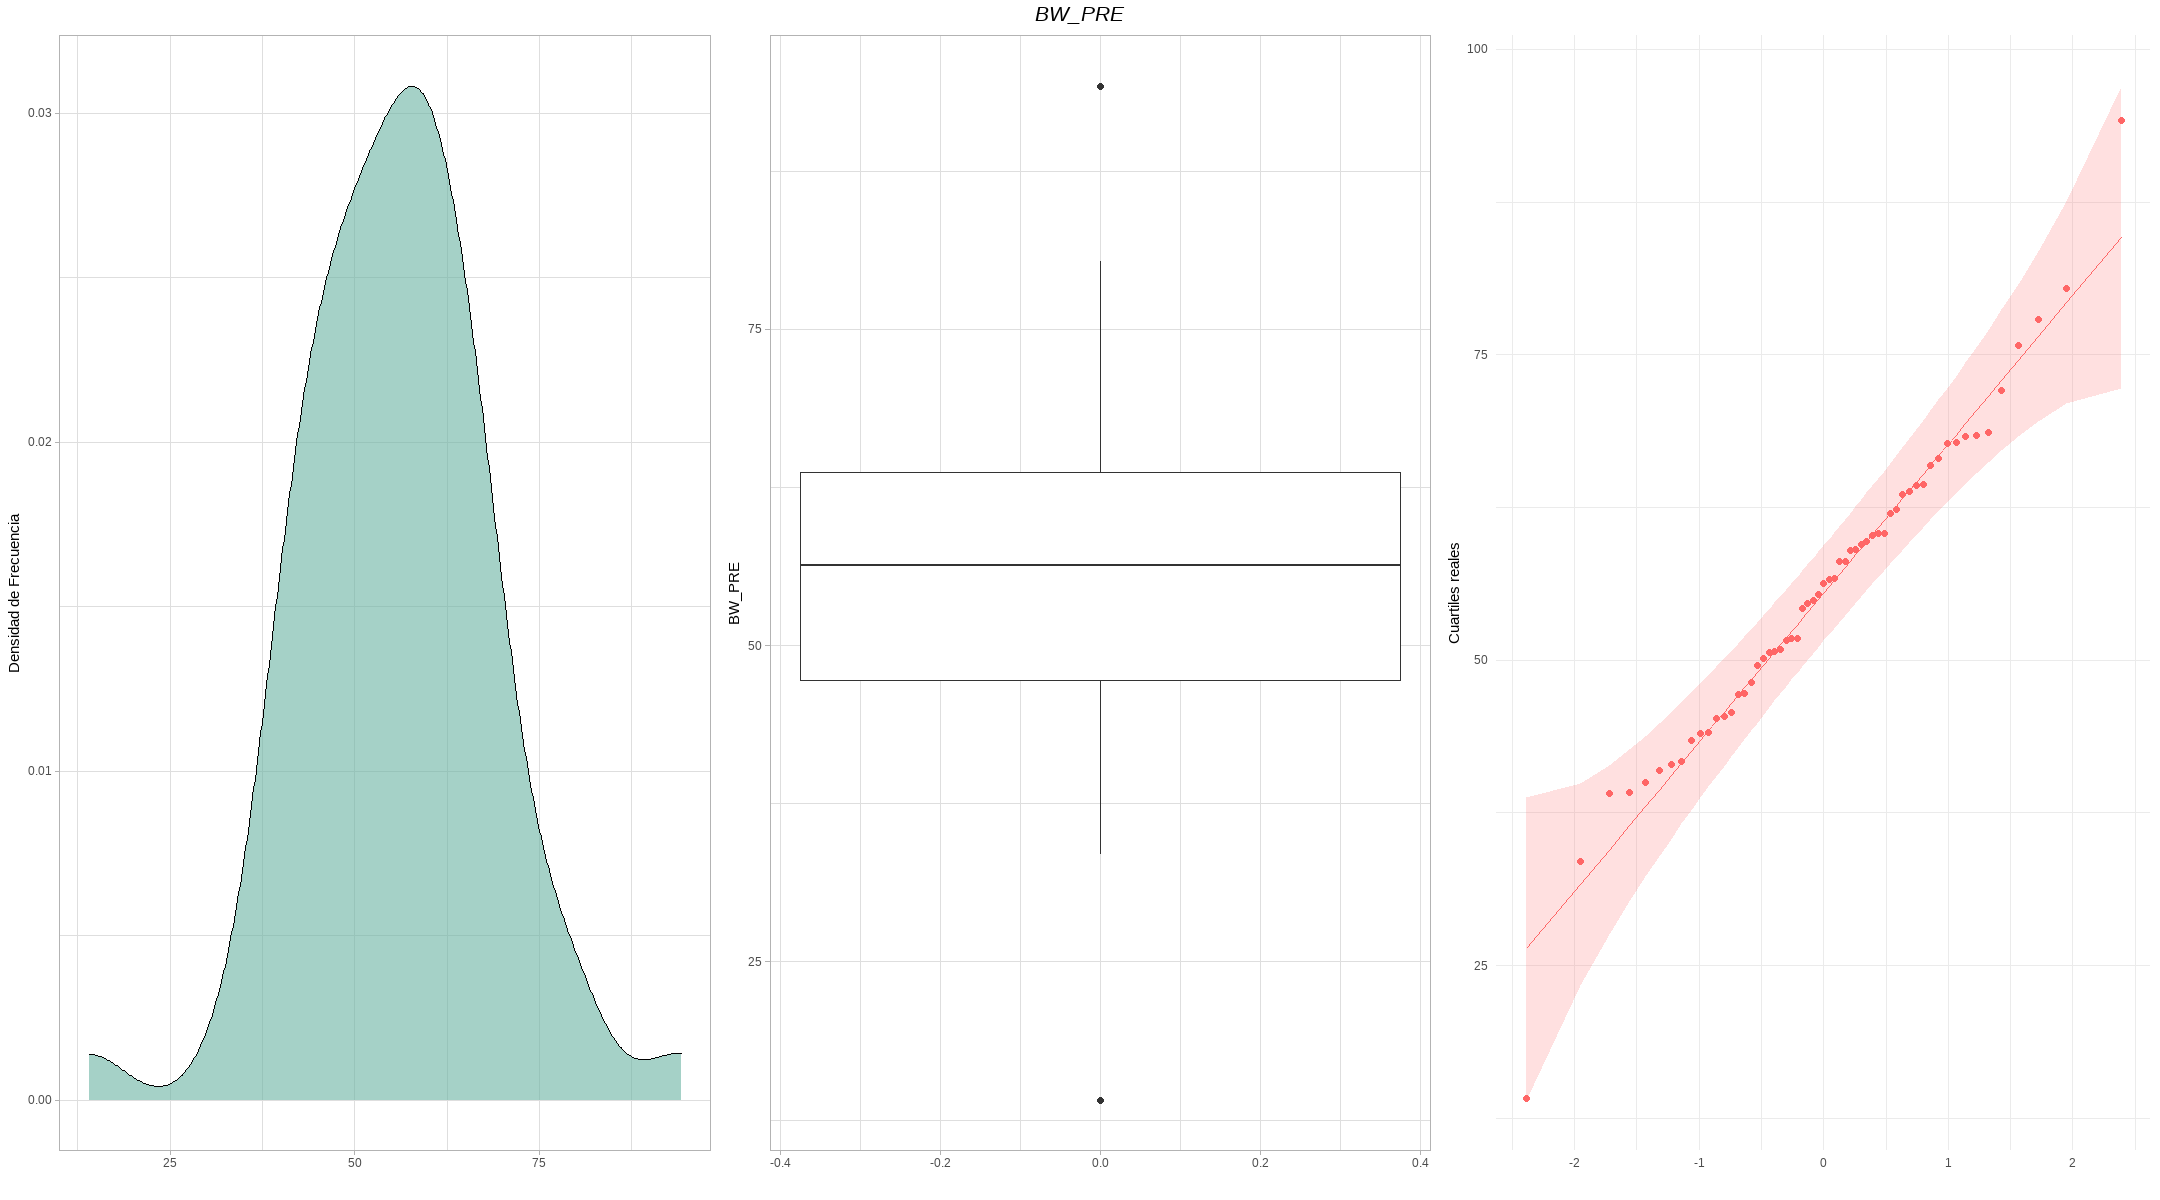

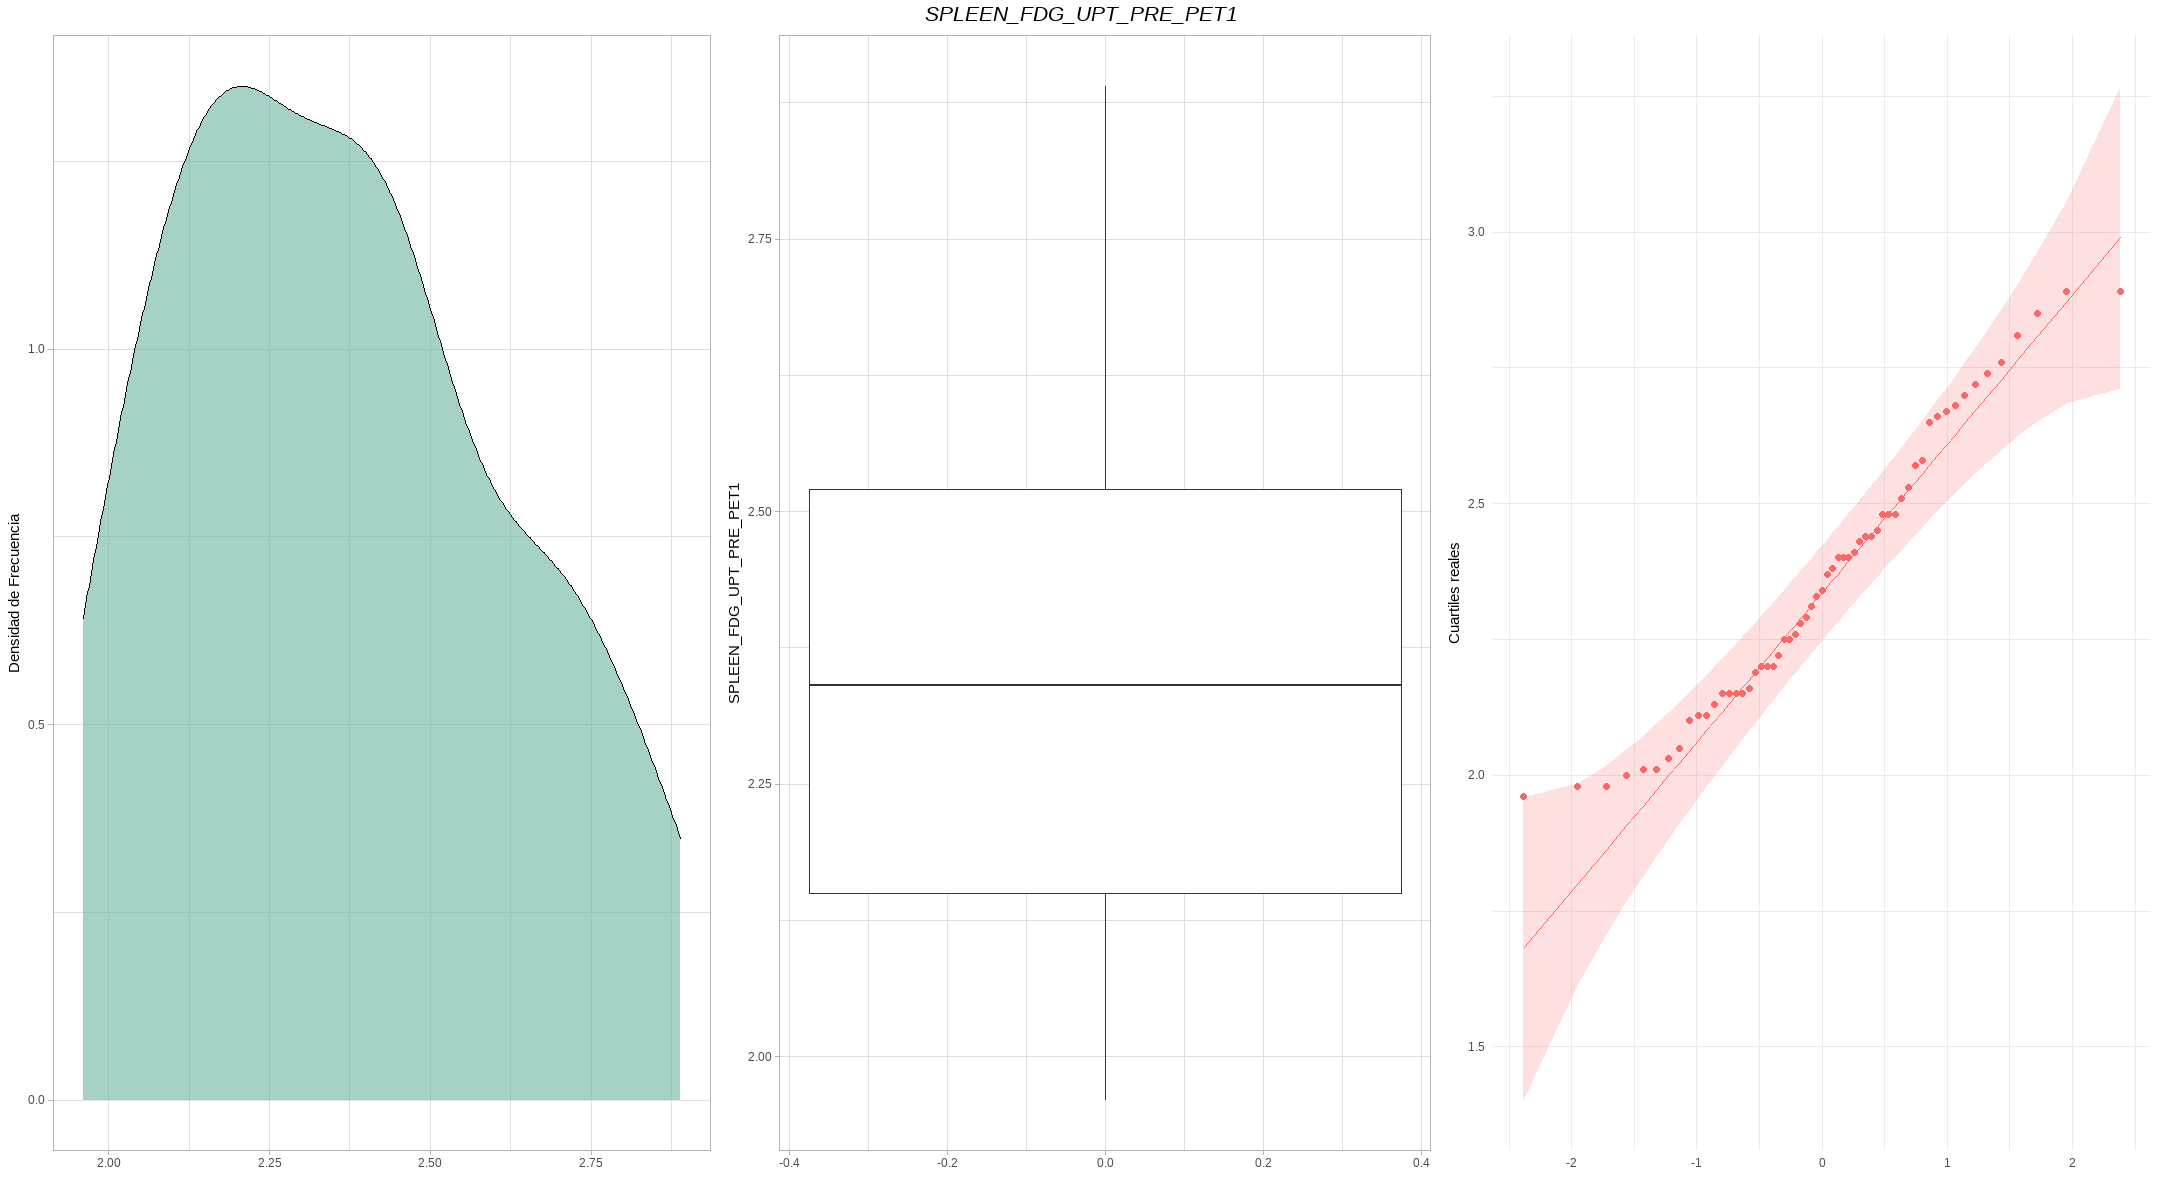

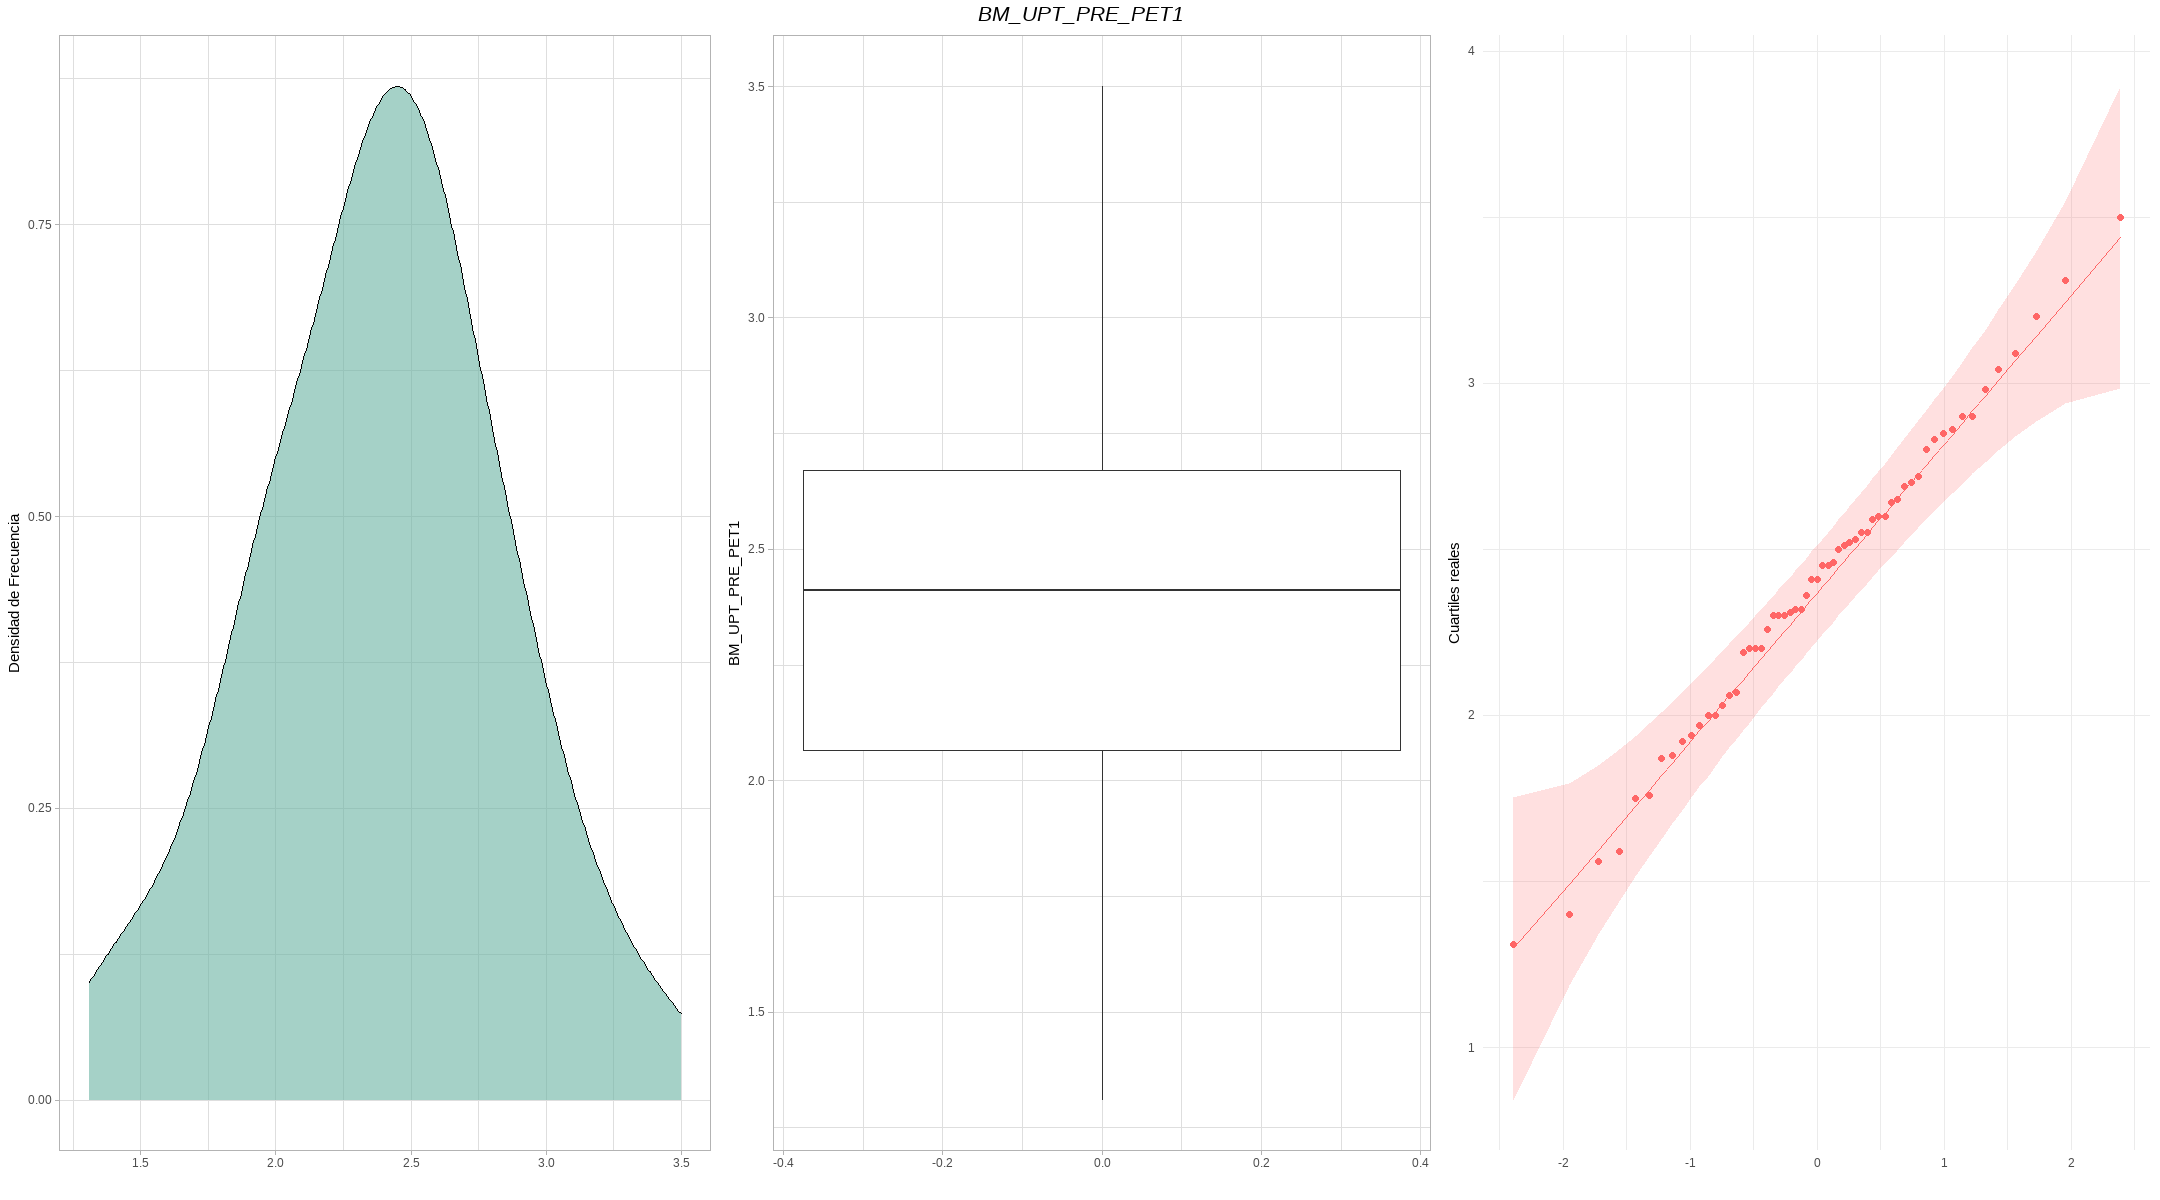

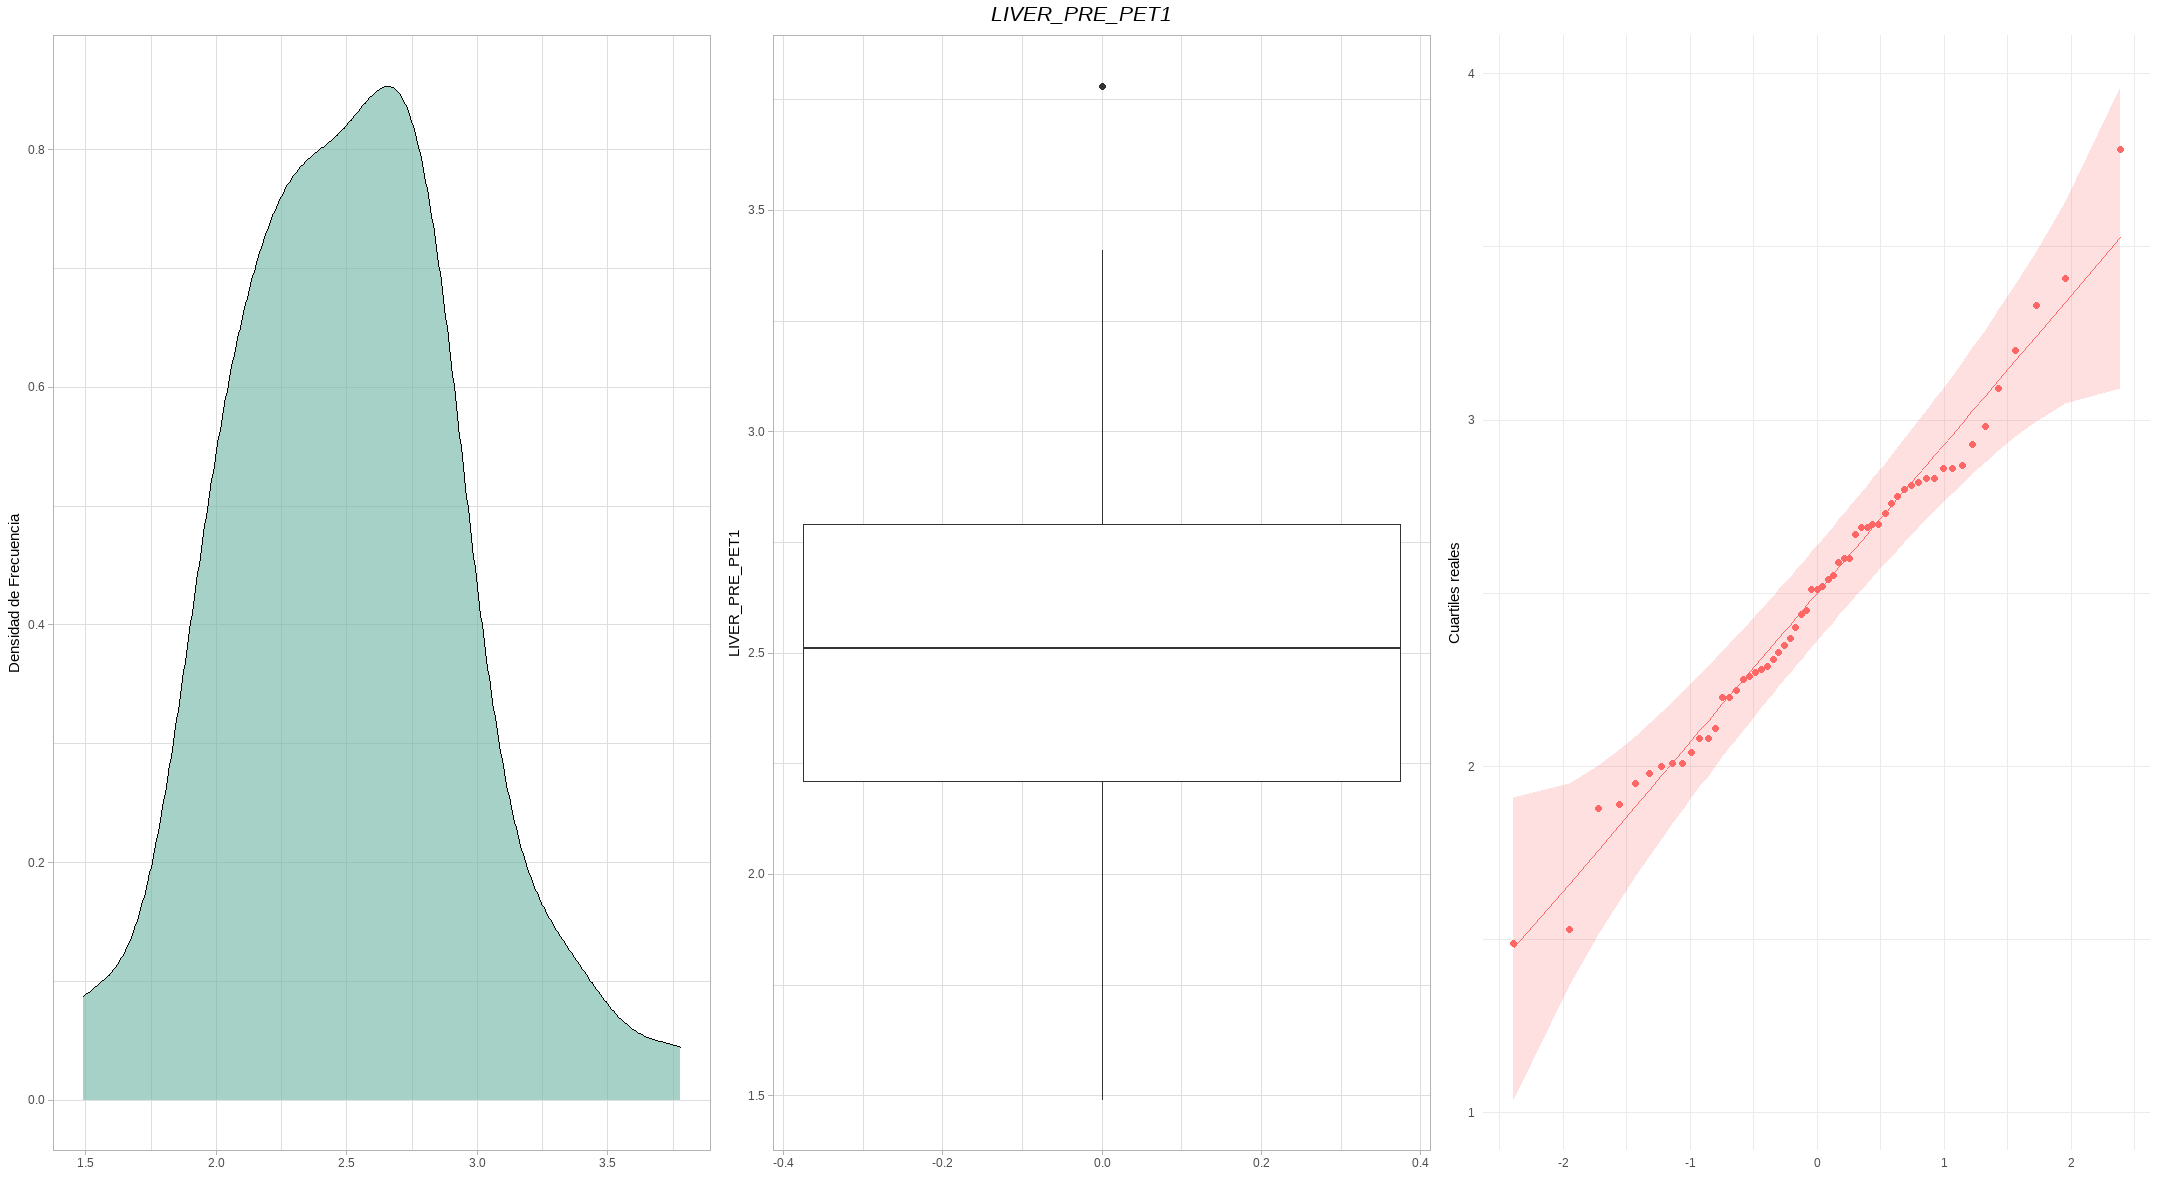

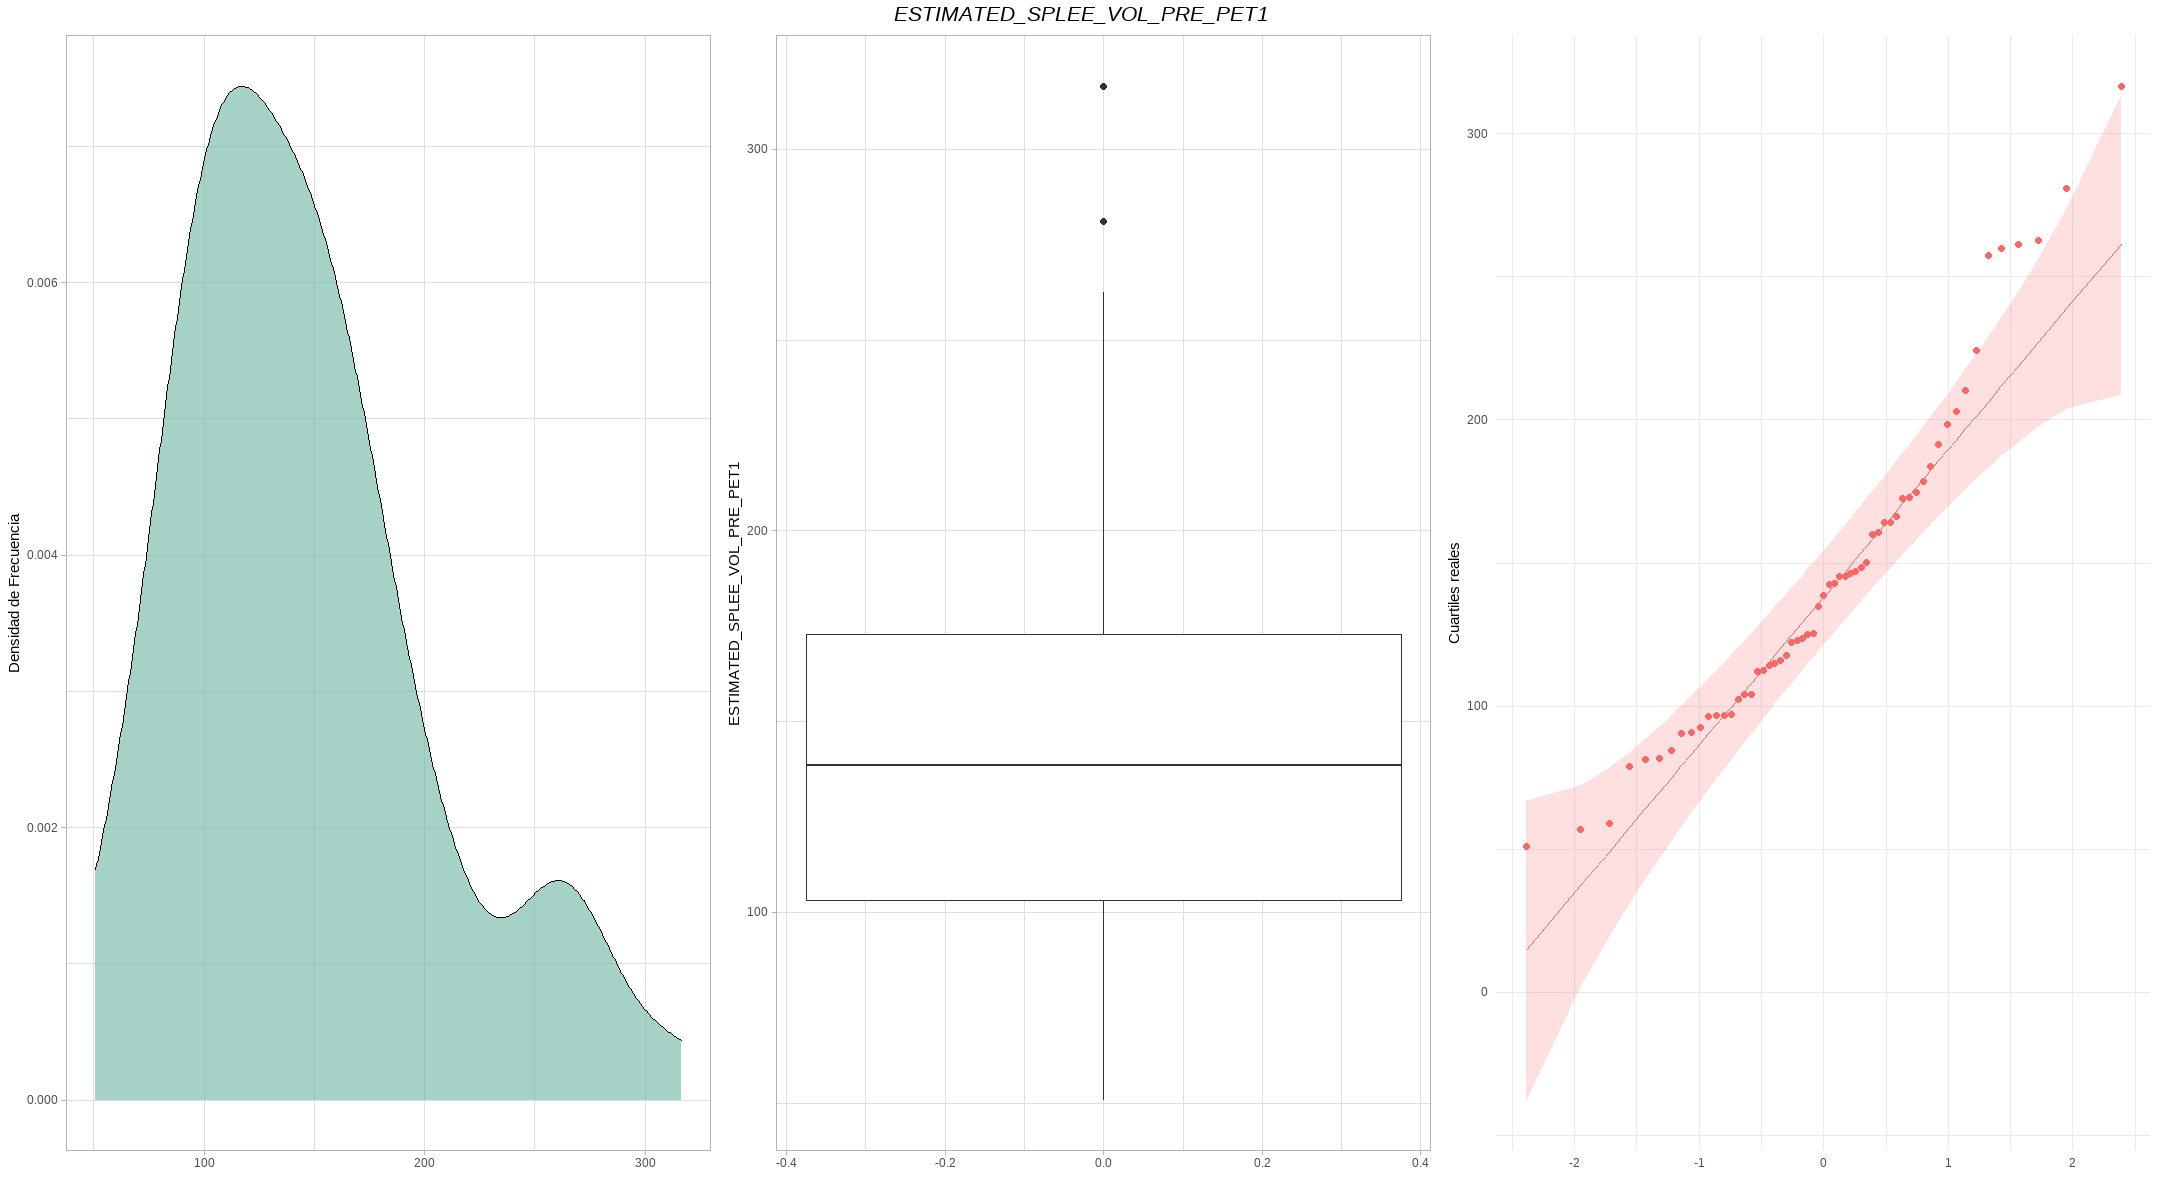

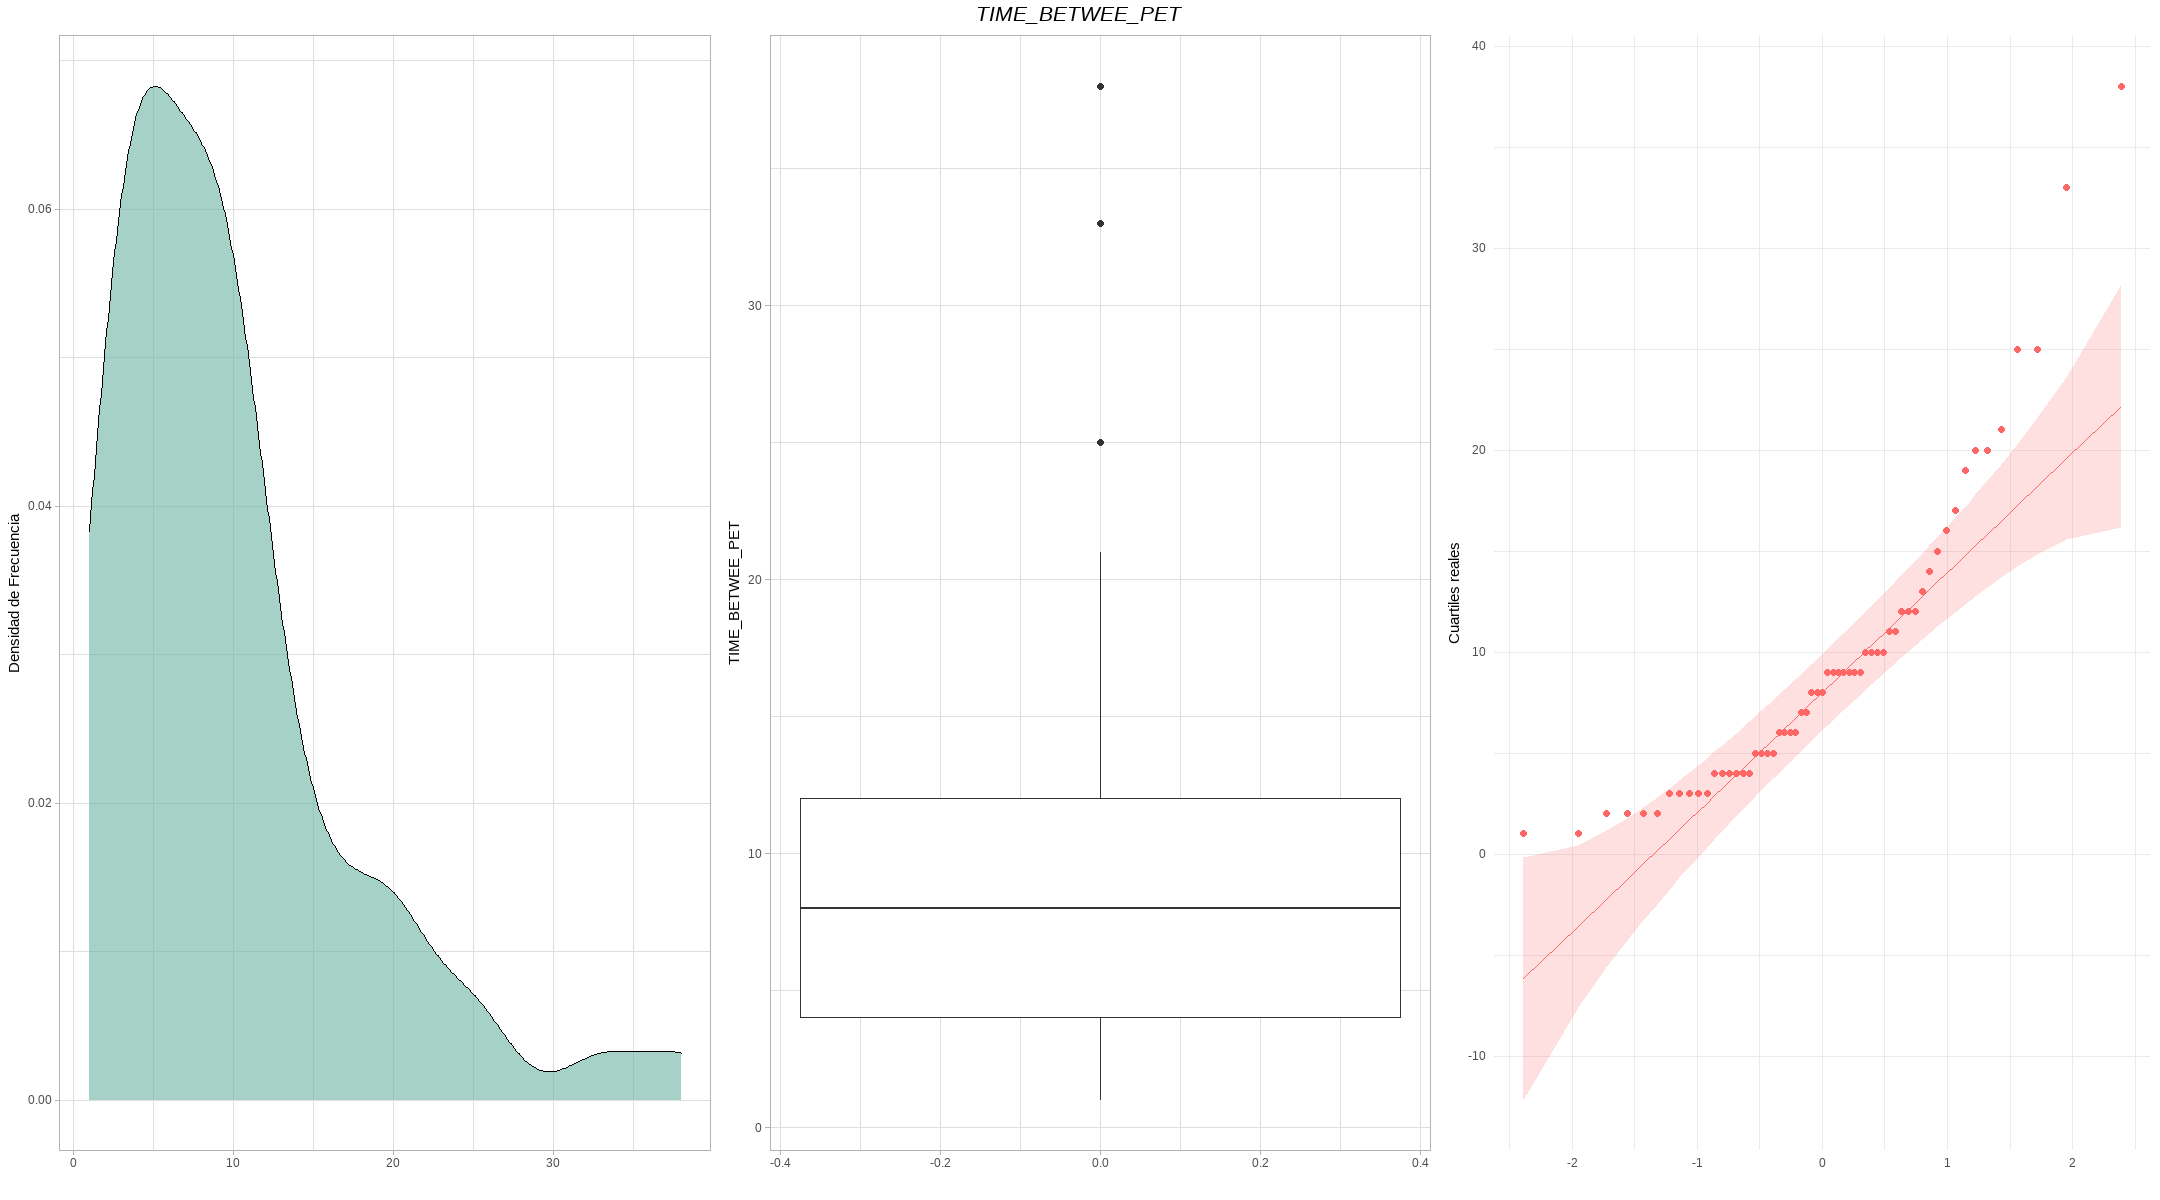

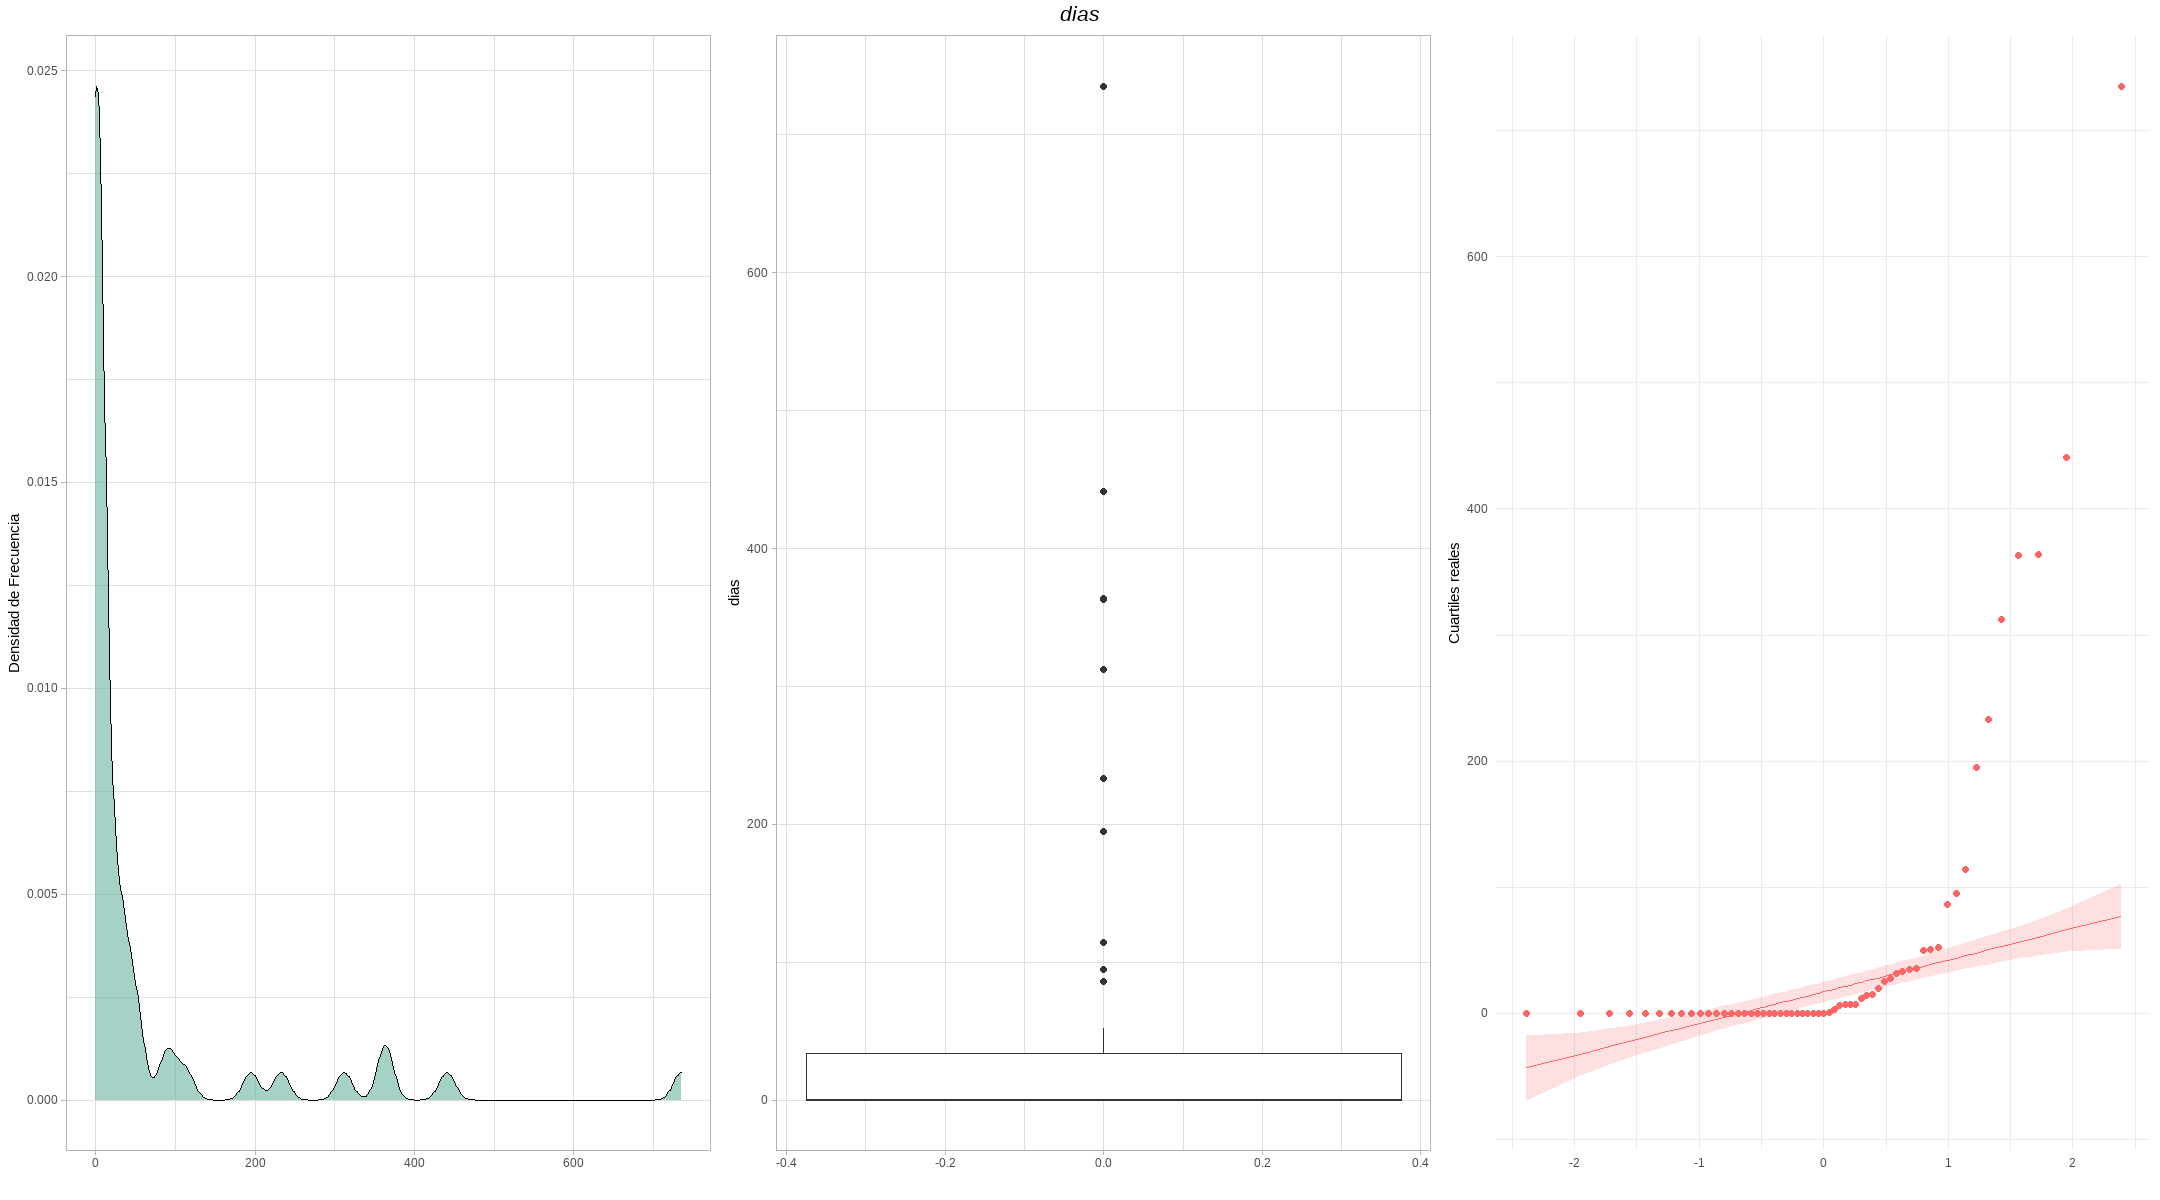

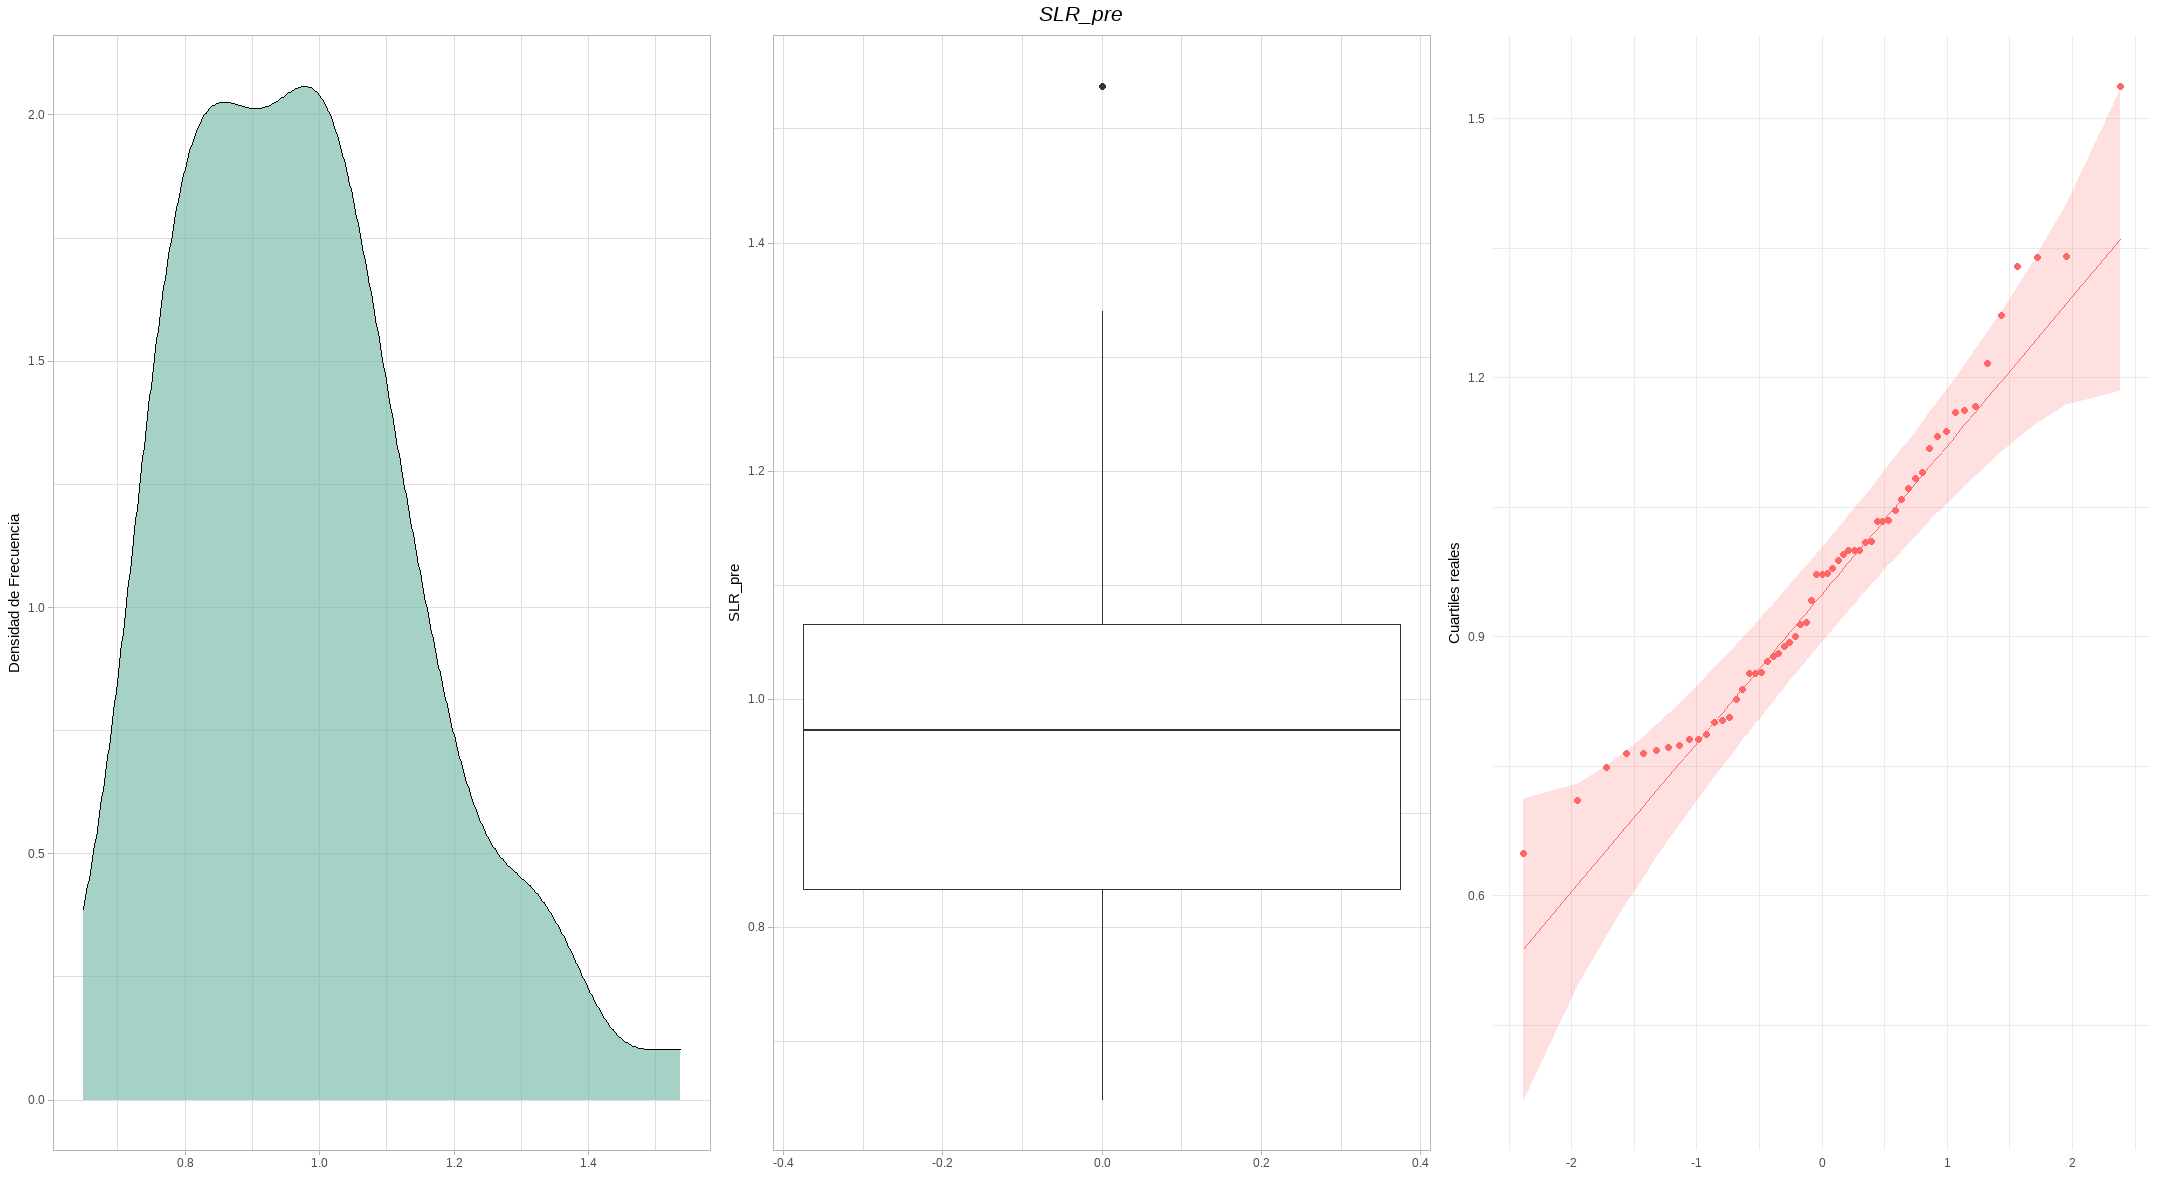

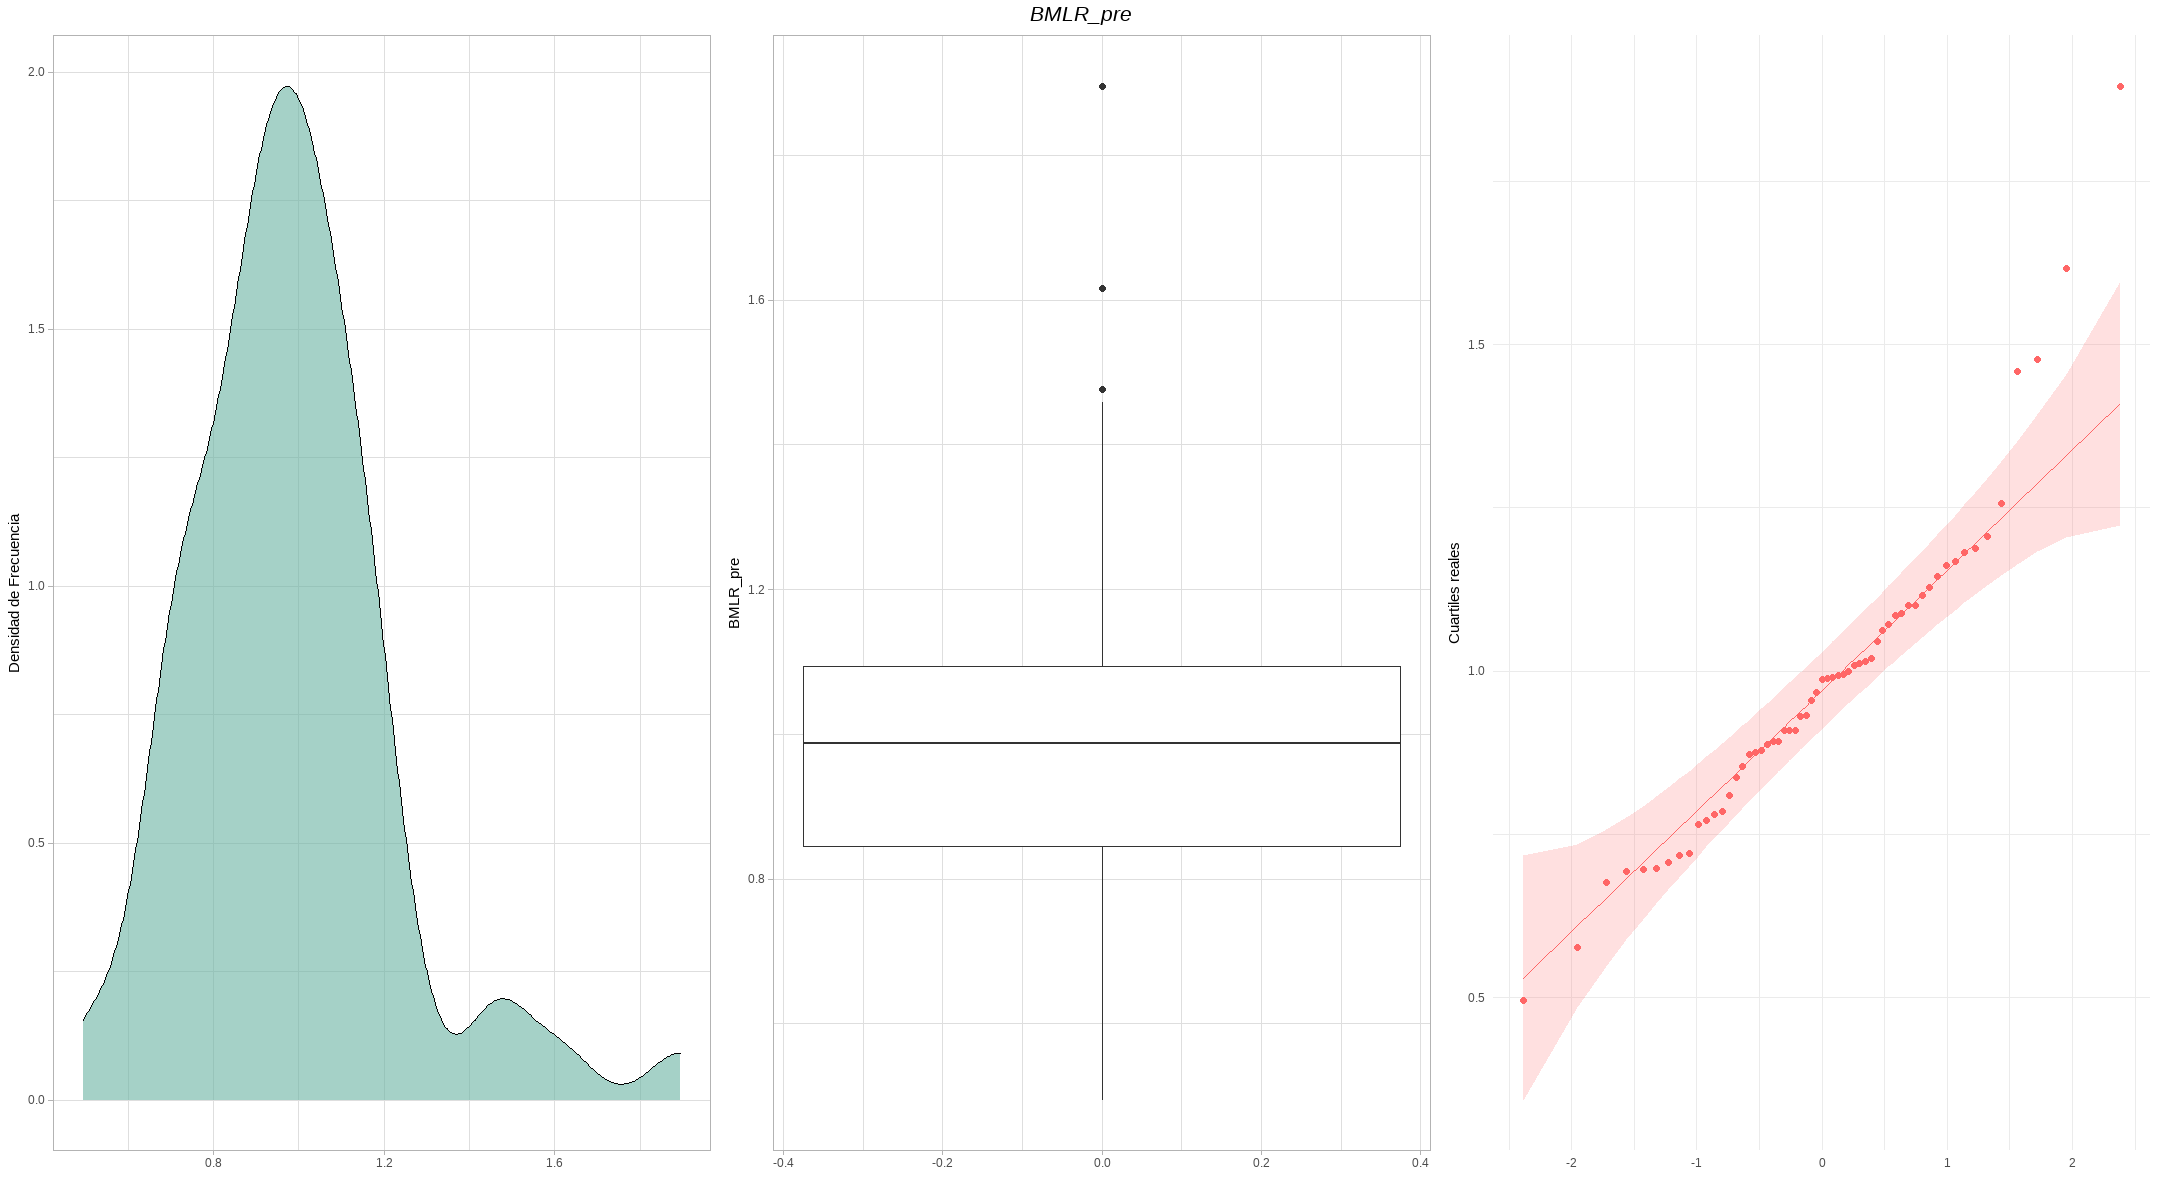

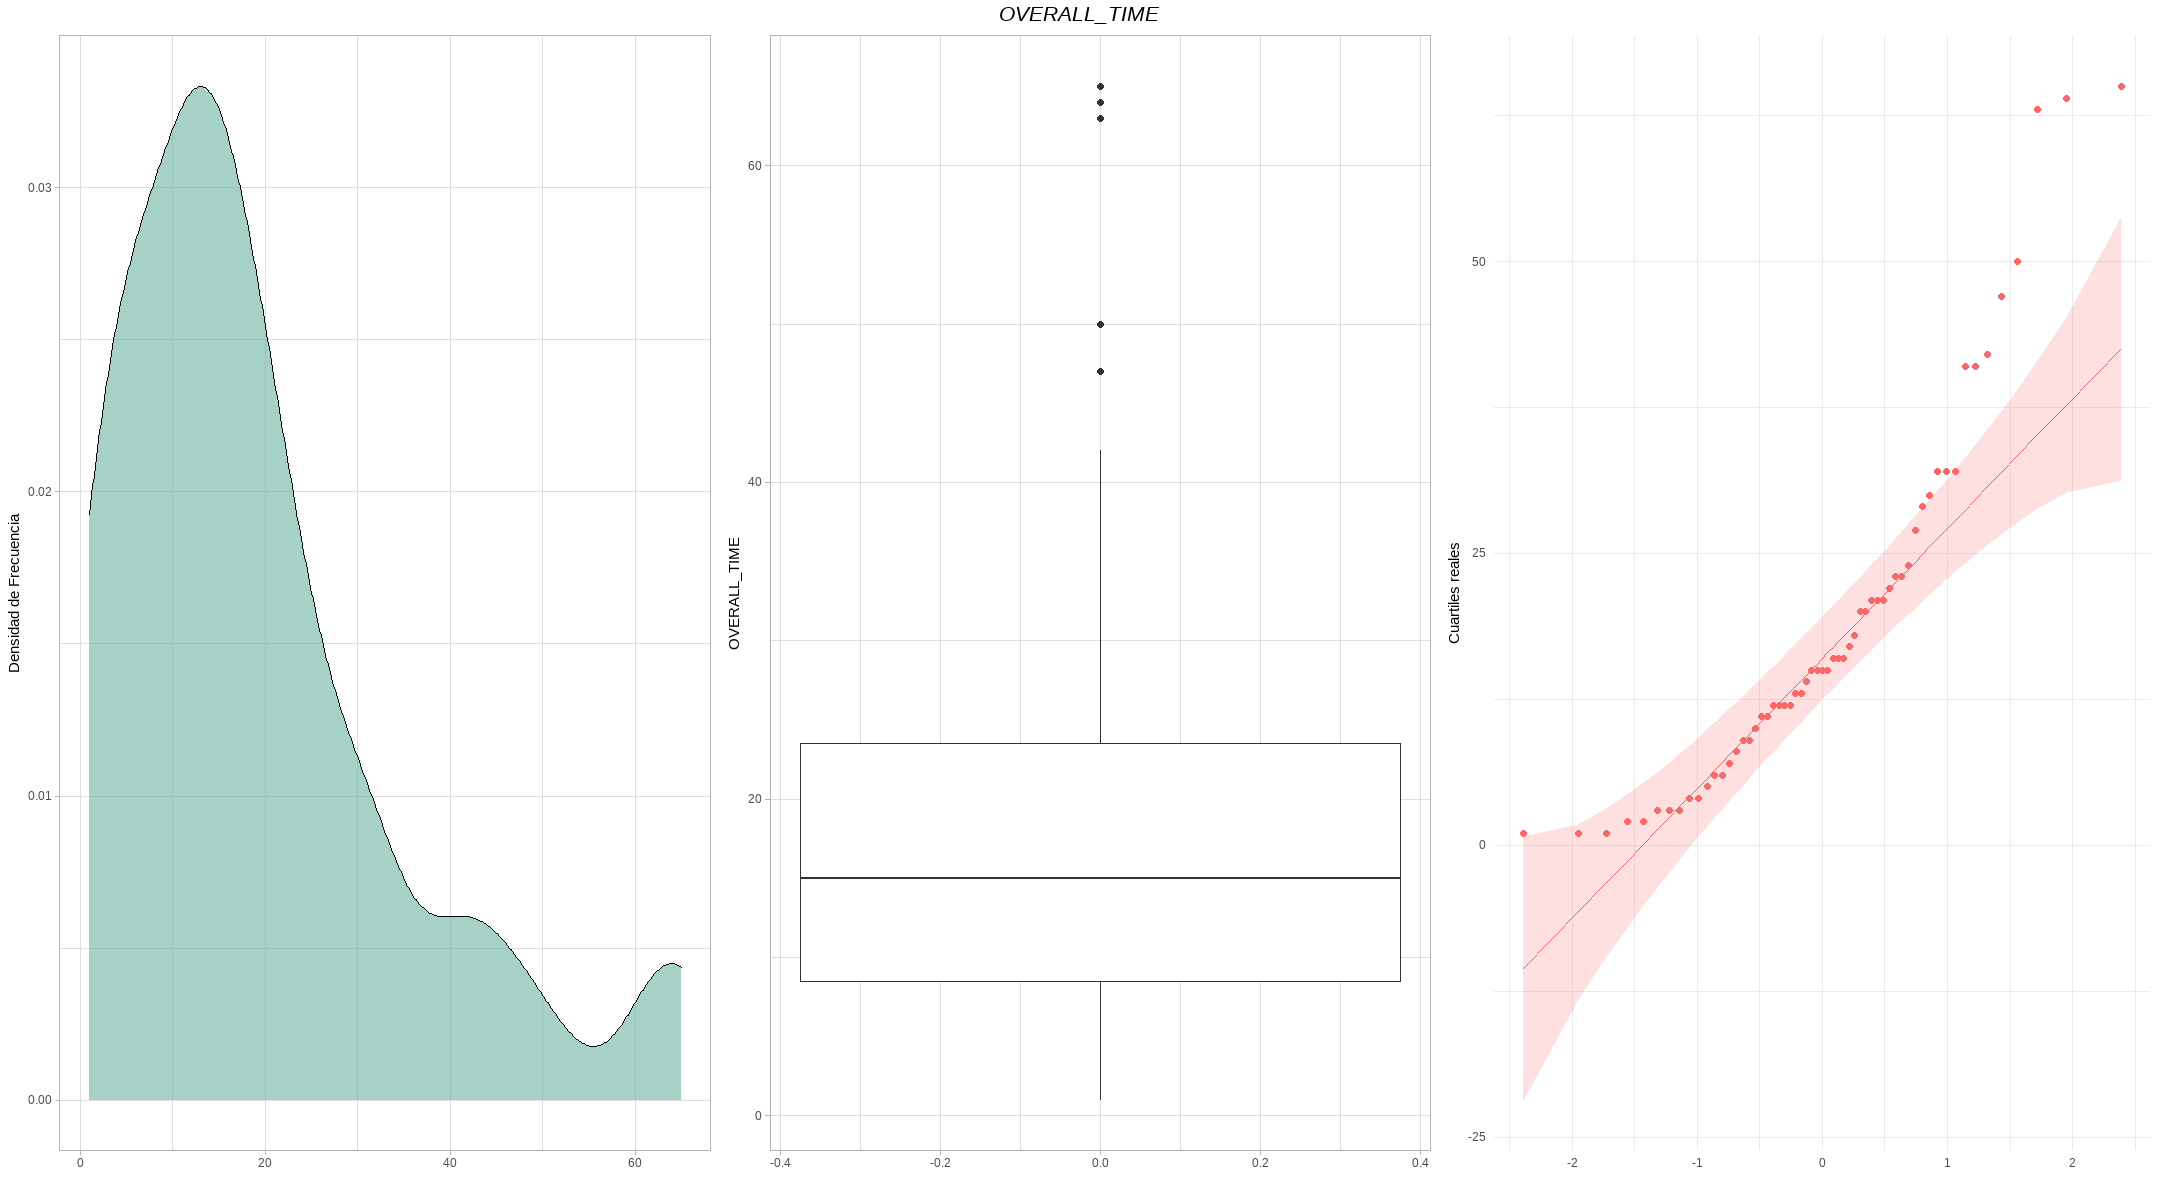

In [1082]:
for (i in 1:length(var_num)) {
  name_i <- as.name(var_num[i])
  r <- list()
  
  # Histograma de densidad
  r[[1]]<-ggplot(datos, aes(x=!!name_i)) +
    geom_density(fill="#69b3a2", color="black", alpha=0.6)+
    theme_light() +
    #theme(legend.position = "none") +
    xlab("") +
    ylab("Densidad de Frecuencia")
  
  # Boxplot
  r[[2]]<-ggplot(data=datos, aes(y=!!name_i)) +
    geom_boxplot(size = 0.4) +
    theme_light() +
    theme(legend.position = "none")+
    xlab("")
  
  # Qqplot
  r[[3]]<-ggqqplot(datos, x = var_num[i],color = "#FF6666",add.params = list(color = "black"))+
    xlab("") + ylab("Cuartiles reales") +
    theme_minimal() +
    #ggtitle("qqplot") +
    theme(plot.title = element_text(hjust = 0.5))
  
  grid.arrange(r[[1]], r[[2]], r[[3]],
               nrow=1, ncol = 3,
               top = textGrob(var_num[i],gp=gpar(fontsize=16,font=3)))
}

### Analisis outliers(no los quitamos pero quiza aporten informacion )

In [1083]:
# Analisis de outliers:
diag_out <- diagnose_outlier(datos)
diag_out

variables                    outliers_cnt outliers_ratio outliers_mean
1  CYCLES_BETWEEN_PET1_PET2      5            8.474576       26.000000   
2  AGE                           0            0.000000             NaN   
3  WBC_PRE                       2            3.389831       13.310000   
4  RBC_PRE                       2            3.389831        2.450000   
5  HB_PRE                        0            0.000000             NaN   
6  PLT_PRE                       6           10.169492      492.500000   
7  CRP_PRE                      12           20.338983        5.622500   
8  ALBUMIN_PRE                   6           10.169492        2.586667   
9  LDH_PRE                       5            8.474576      594.200000   
10 eGFR_PRE                      2            3.389831      162.300000   
11 AST_PRE                       6           10.169492      102.383333   
12 ALT_PRE                       3            5.084746      164.266667   
13 K_PRE                         1            1.694915        3.110000   
14 BGL_PRE_PET1                  7           11.864407      191.714286   
15 BMI                           1            1.694915       35.810000   
16 BW_PRE                        2            3.389831       54.140000   
17 SPLEEN_FDG_UPT_PRE_PET1       0            0.000000             NaN   
18 BM_UPT_PRE_PET1               0            0.000000             NaN   
19 LIVER_PRE_PET1                1            1.694915        3.780000   
20 ESTIMATED_SPLEE_VOL_PRE_PET1  2            3.389831      298.750000   
21 TIME_BETWEE_PET               4            6.779661       30.250000   
22 dias                         10           16.949153      293.800000   
23 SLR_pre                       1            1.694915        1.537234   
24 BMLR_pre                      3            5.084746        1.662699   
25 OVERALL_TIME                  5            8.474576       57.800000   
   with_mean   without_mean
1    7.0677966   5.3148148 
2   69.3898305  69.3898305 
3    5.9266102   5.6675439 
4    4.0798305   4.1370175 
5   12.1925424  12.1925424 
6  241.1016949 212.6415094 
7    1.3561017   0.2668085 
8    3.8081356   3.9464151 
9  210.5559322 175.0333333 
10  71.1915254  67.9947368 
11  28.5340678  20.1737736 
12  26.9200000  19.5621429 
13   4.2564407   4.2762069 
14 111.5084746 100.7115385 
15  21.5445763  21.2986207 
16  55.6759322  55.7298246 
17   2.3613559   2.3613559 
18   2.3925424   2.3925424 
19   2.4950847   2.4729310 
20 145.3847458 140.0035088 
21   9.6271186   8.1272727 
22  57.1525424   8.8571429 
23   0.9711074   0.9613466 
24   0.9821935   0.9457379 
25  19.1016949  15.5185185

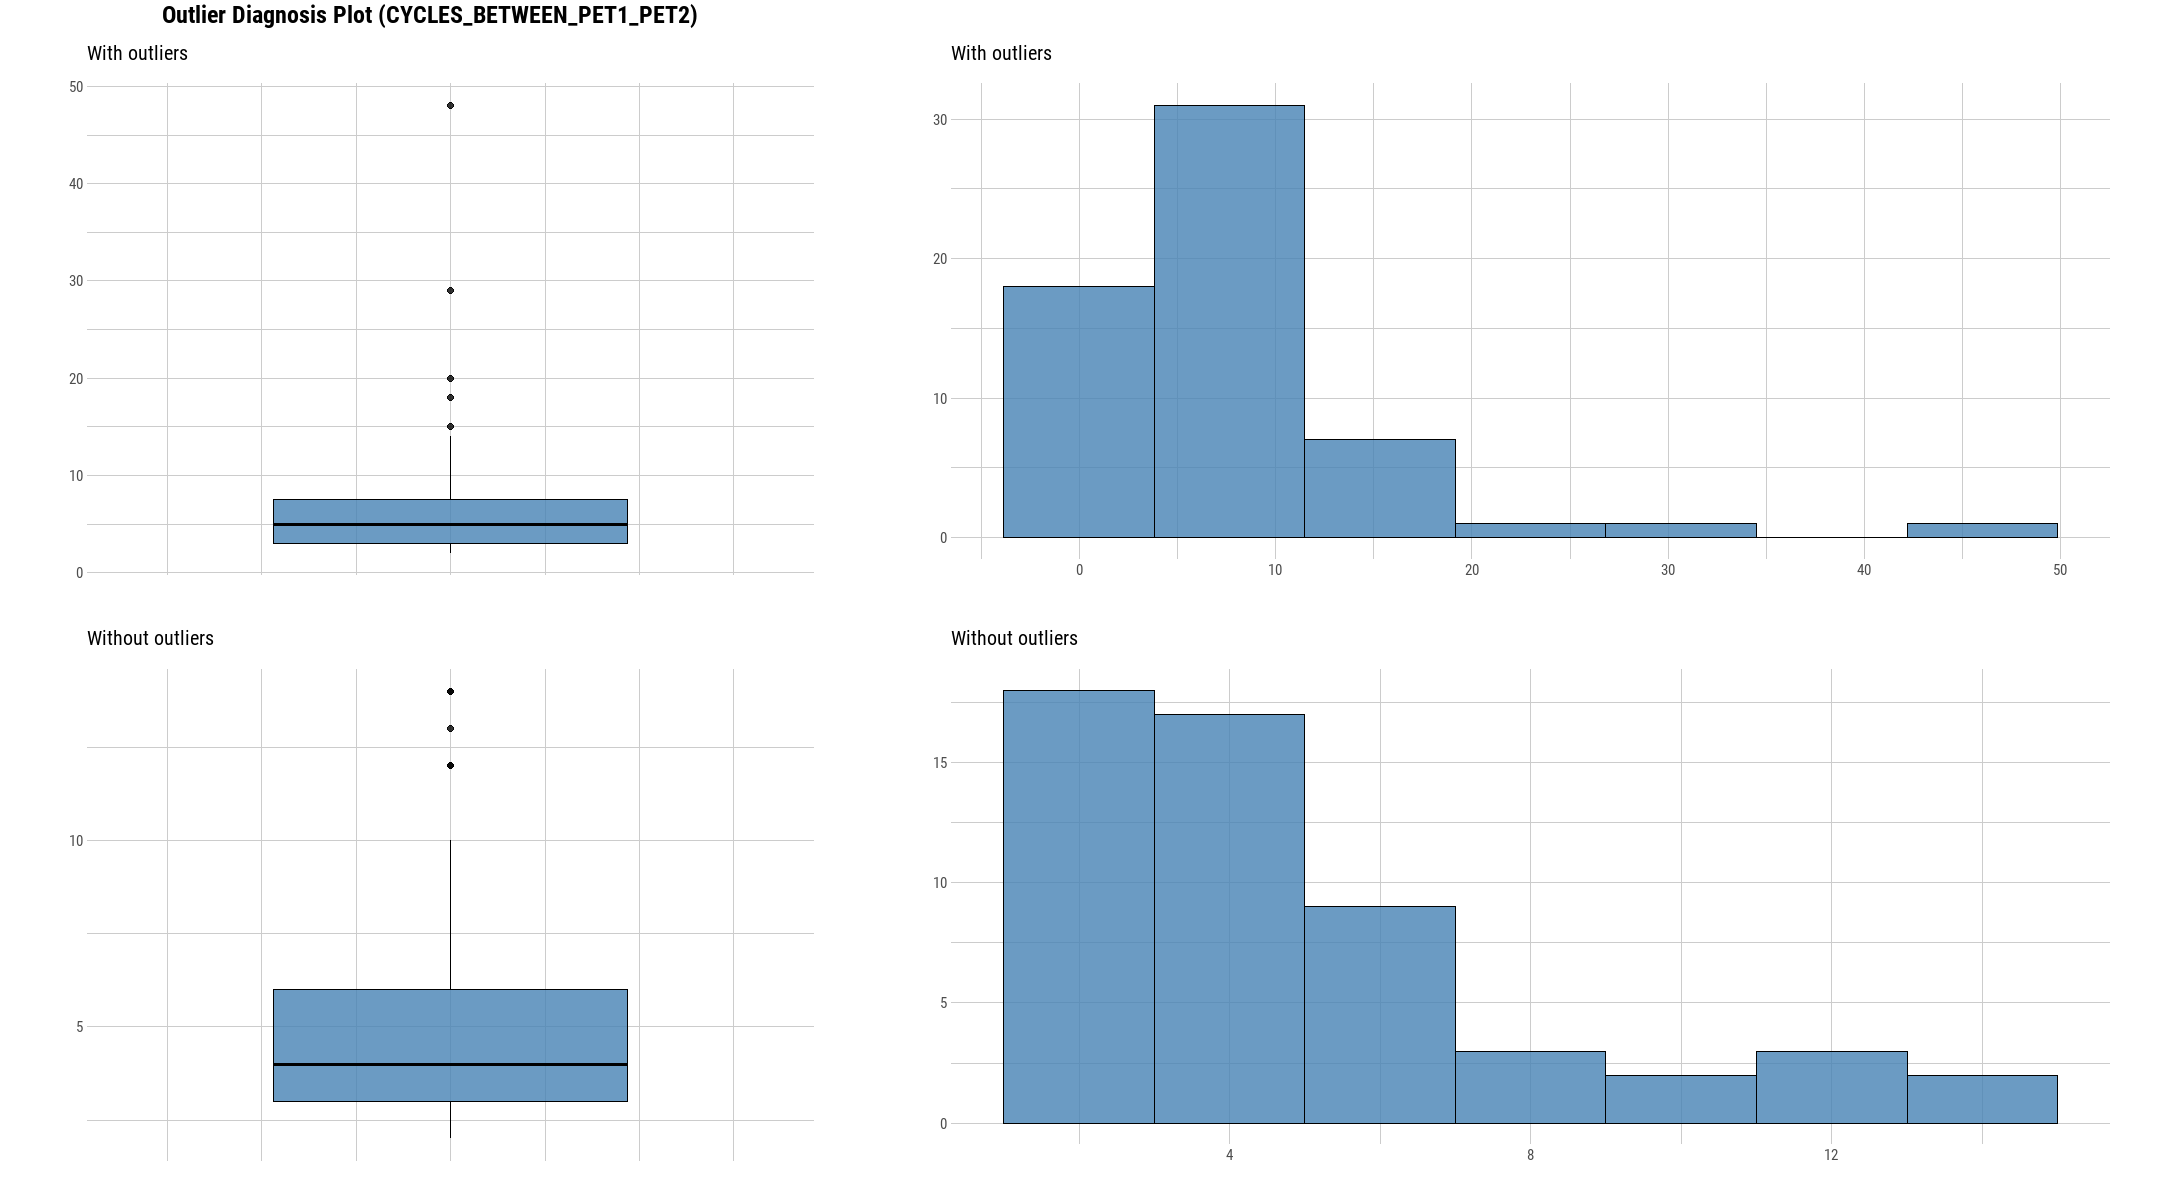

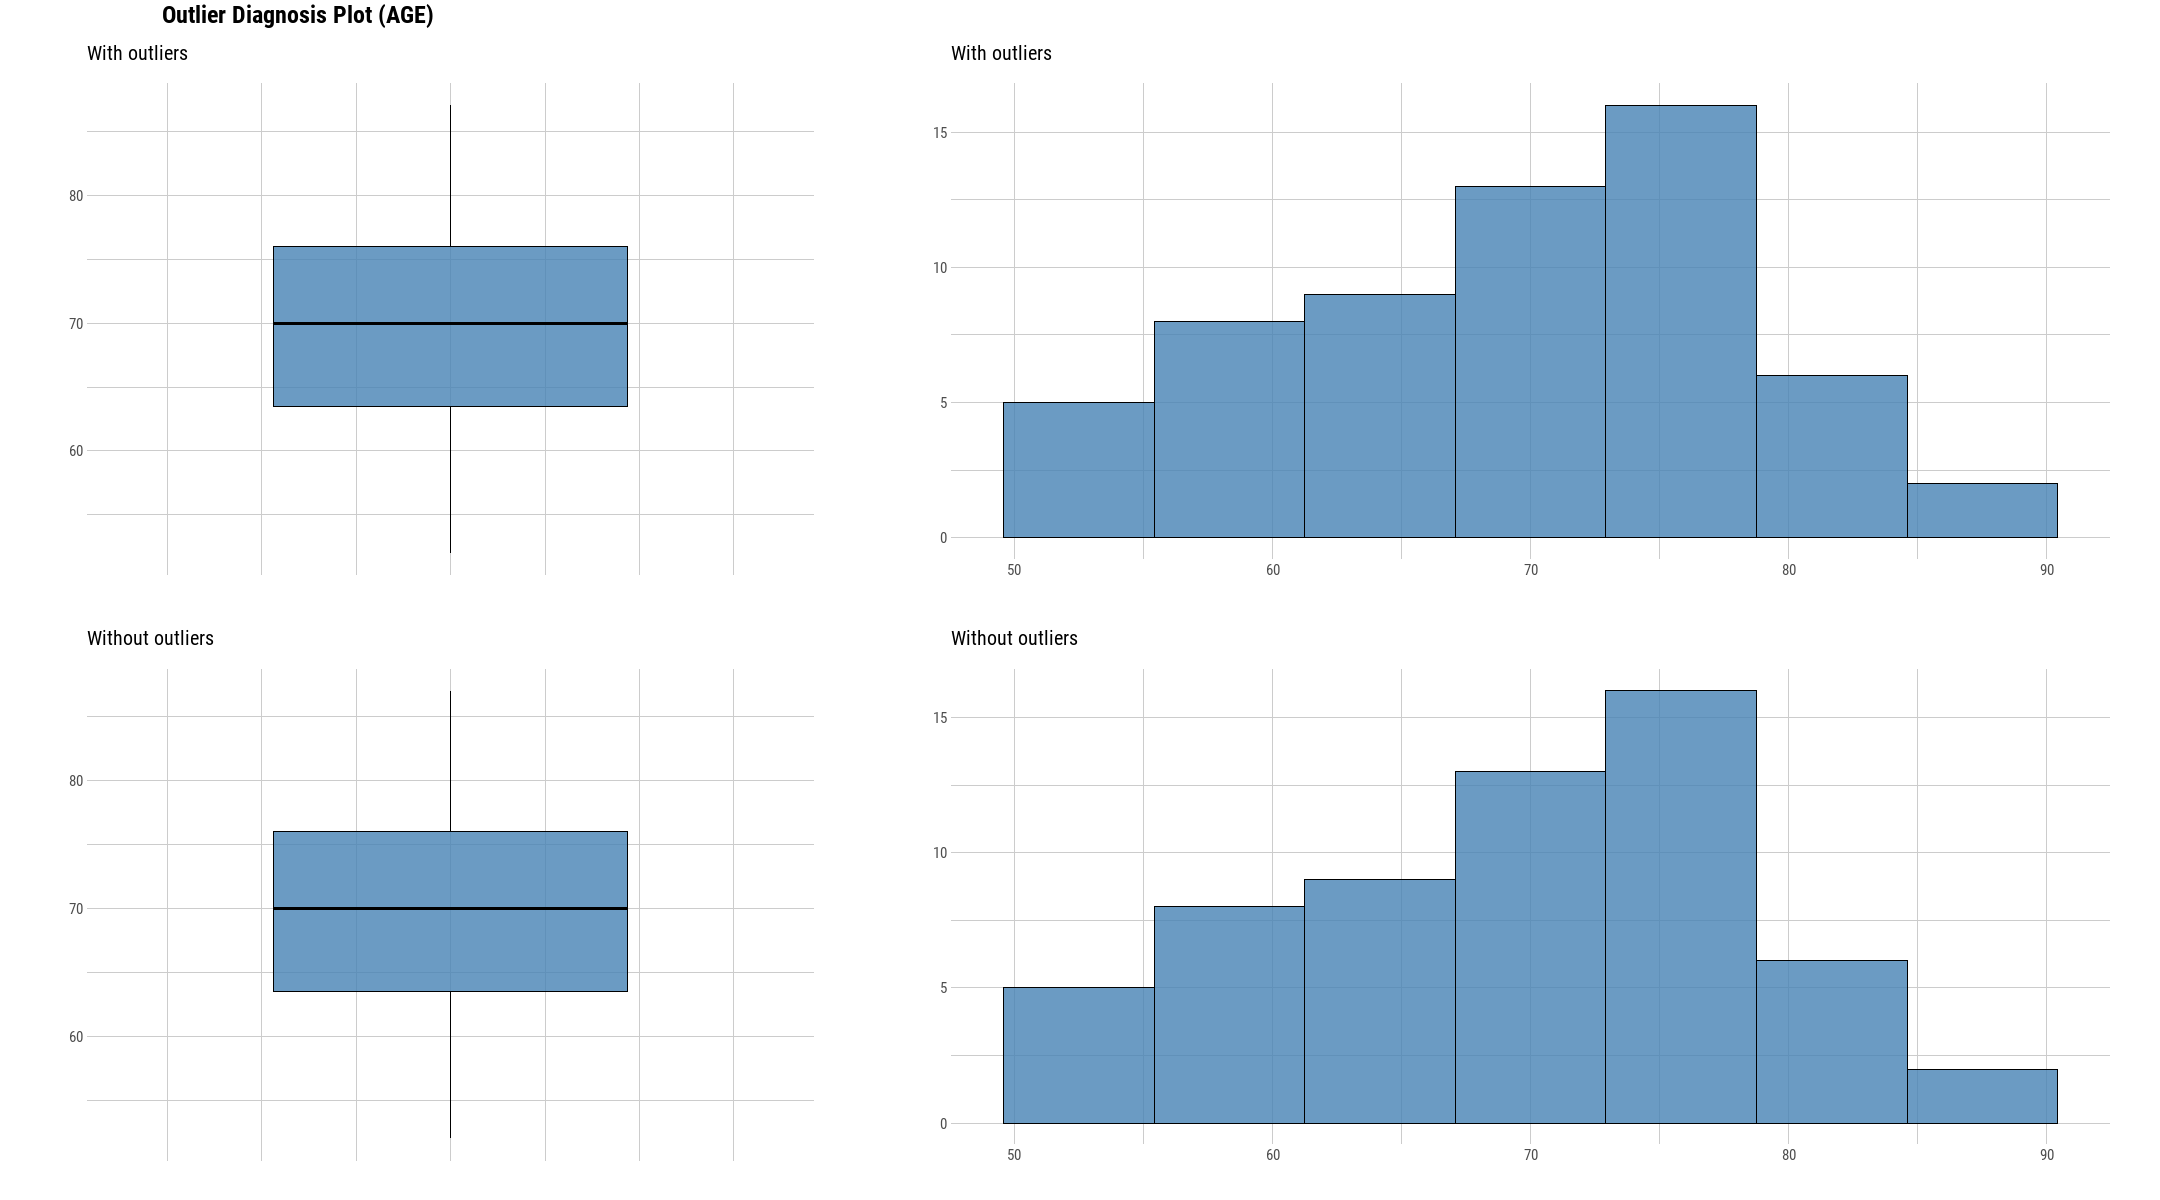

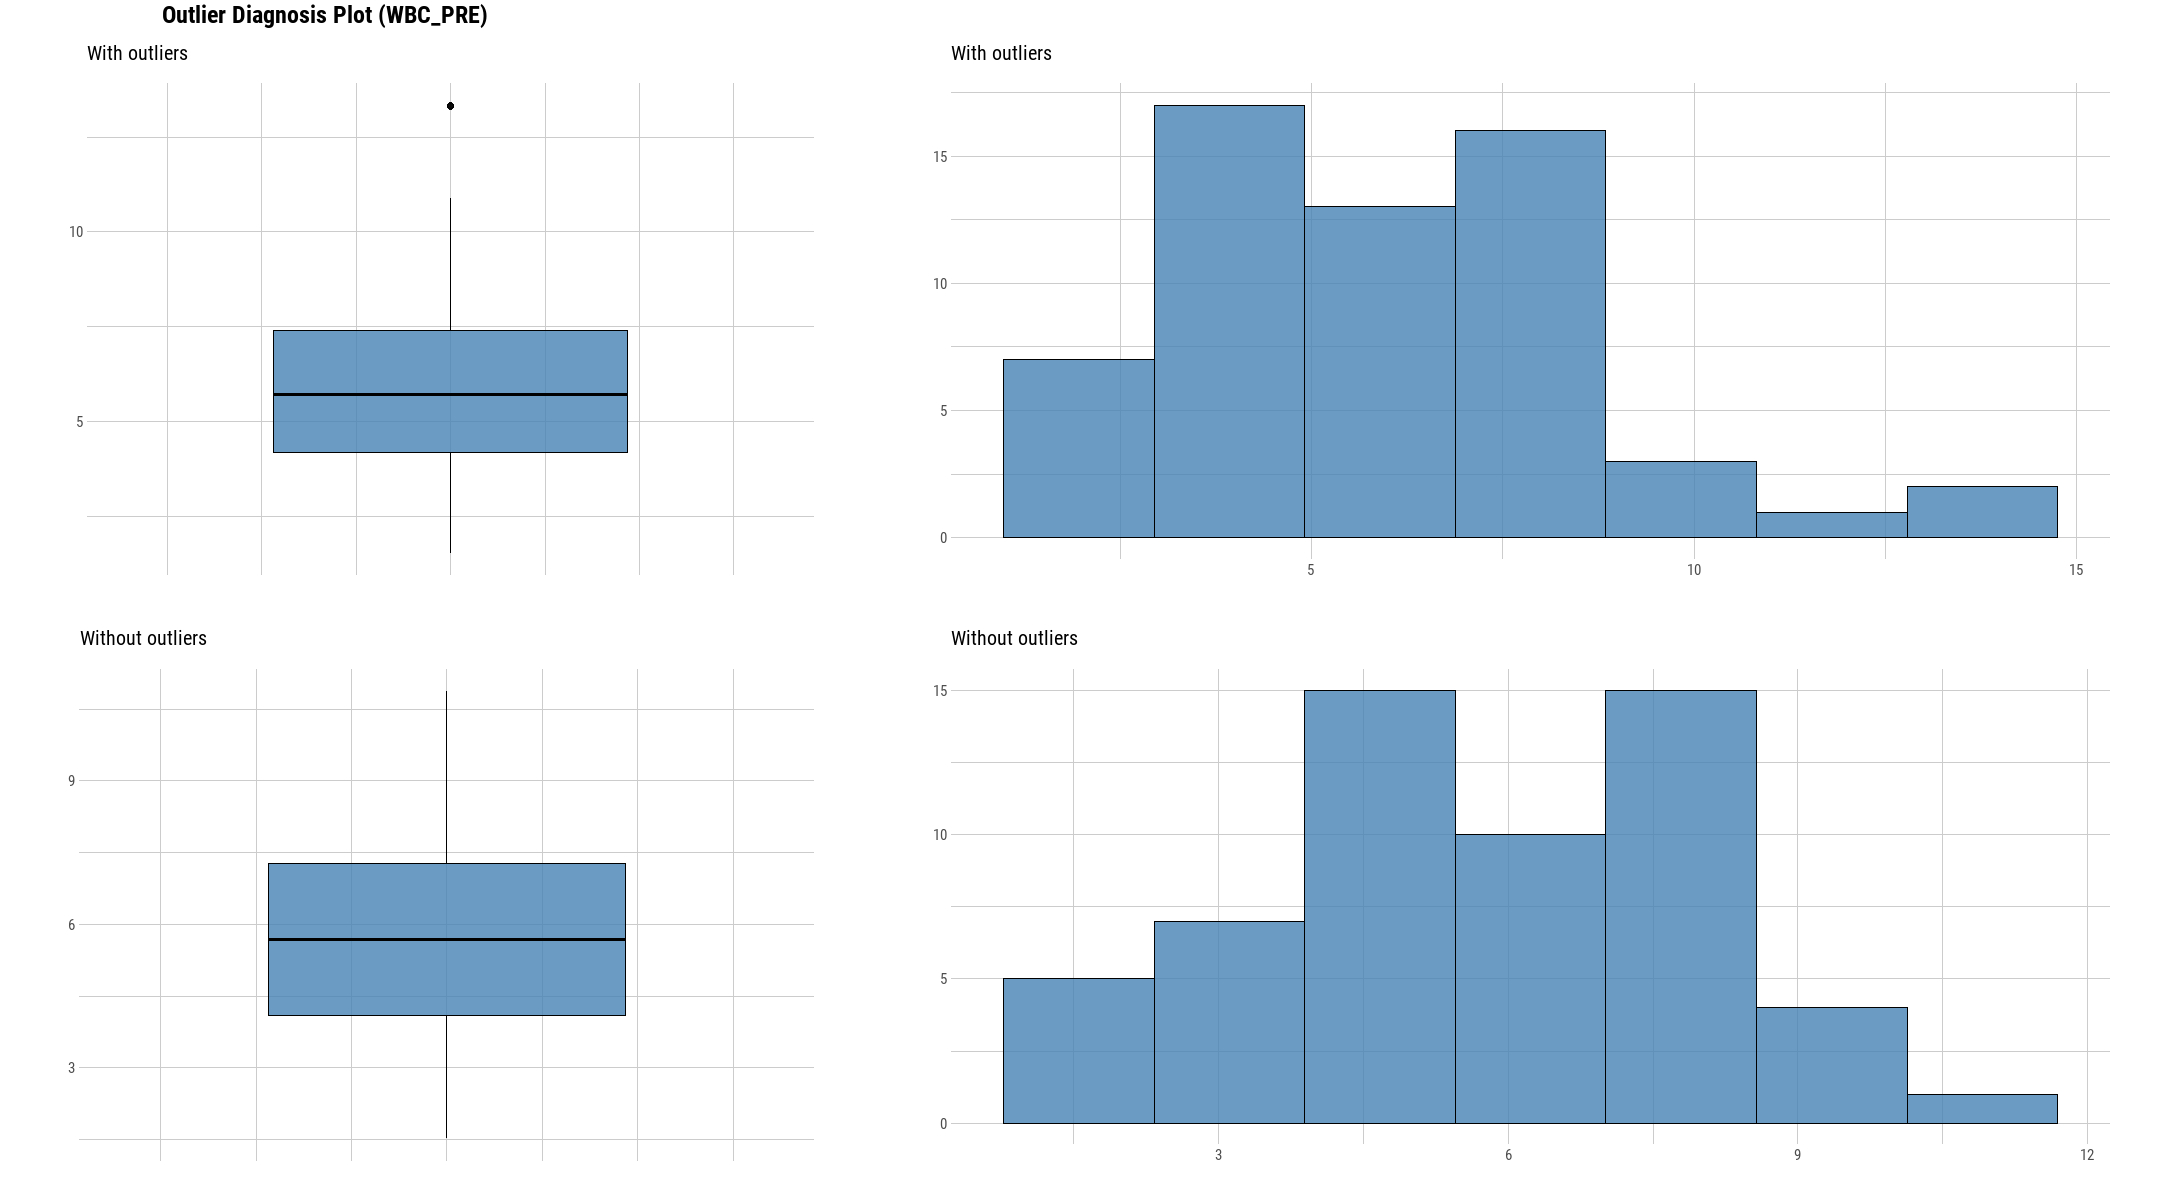

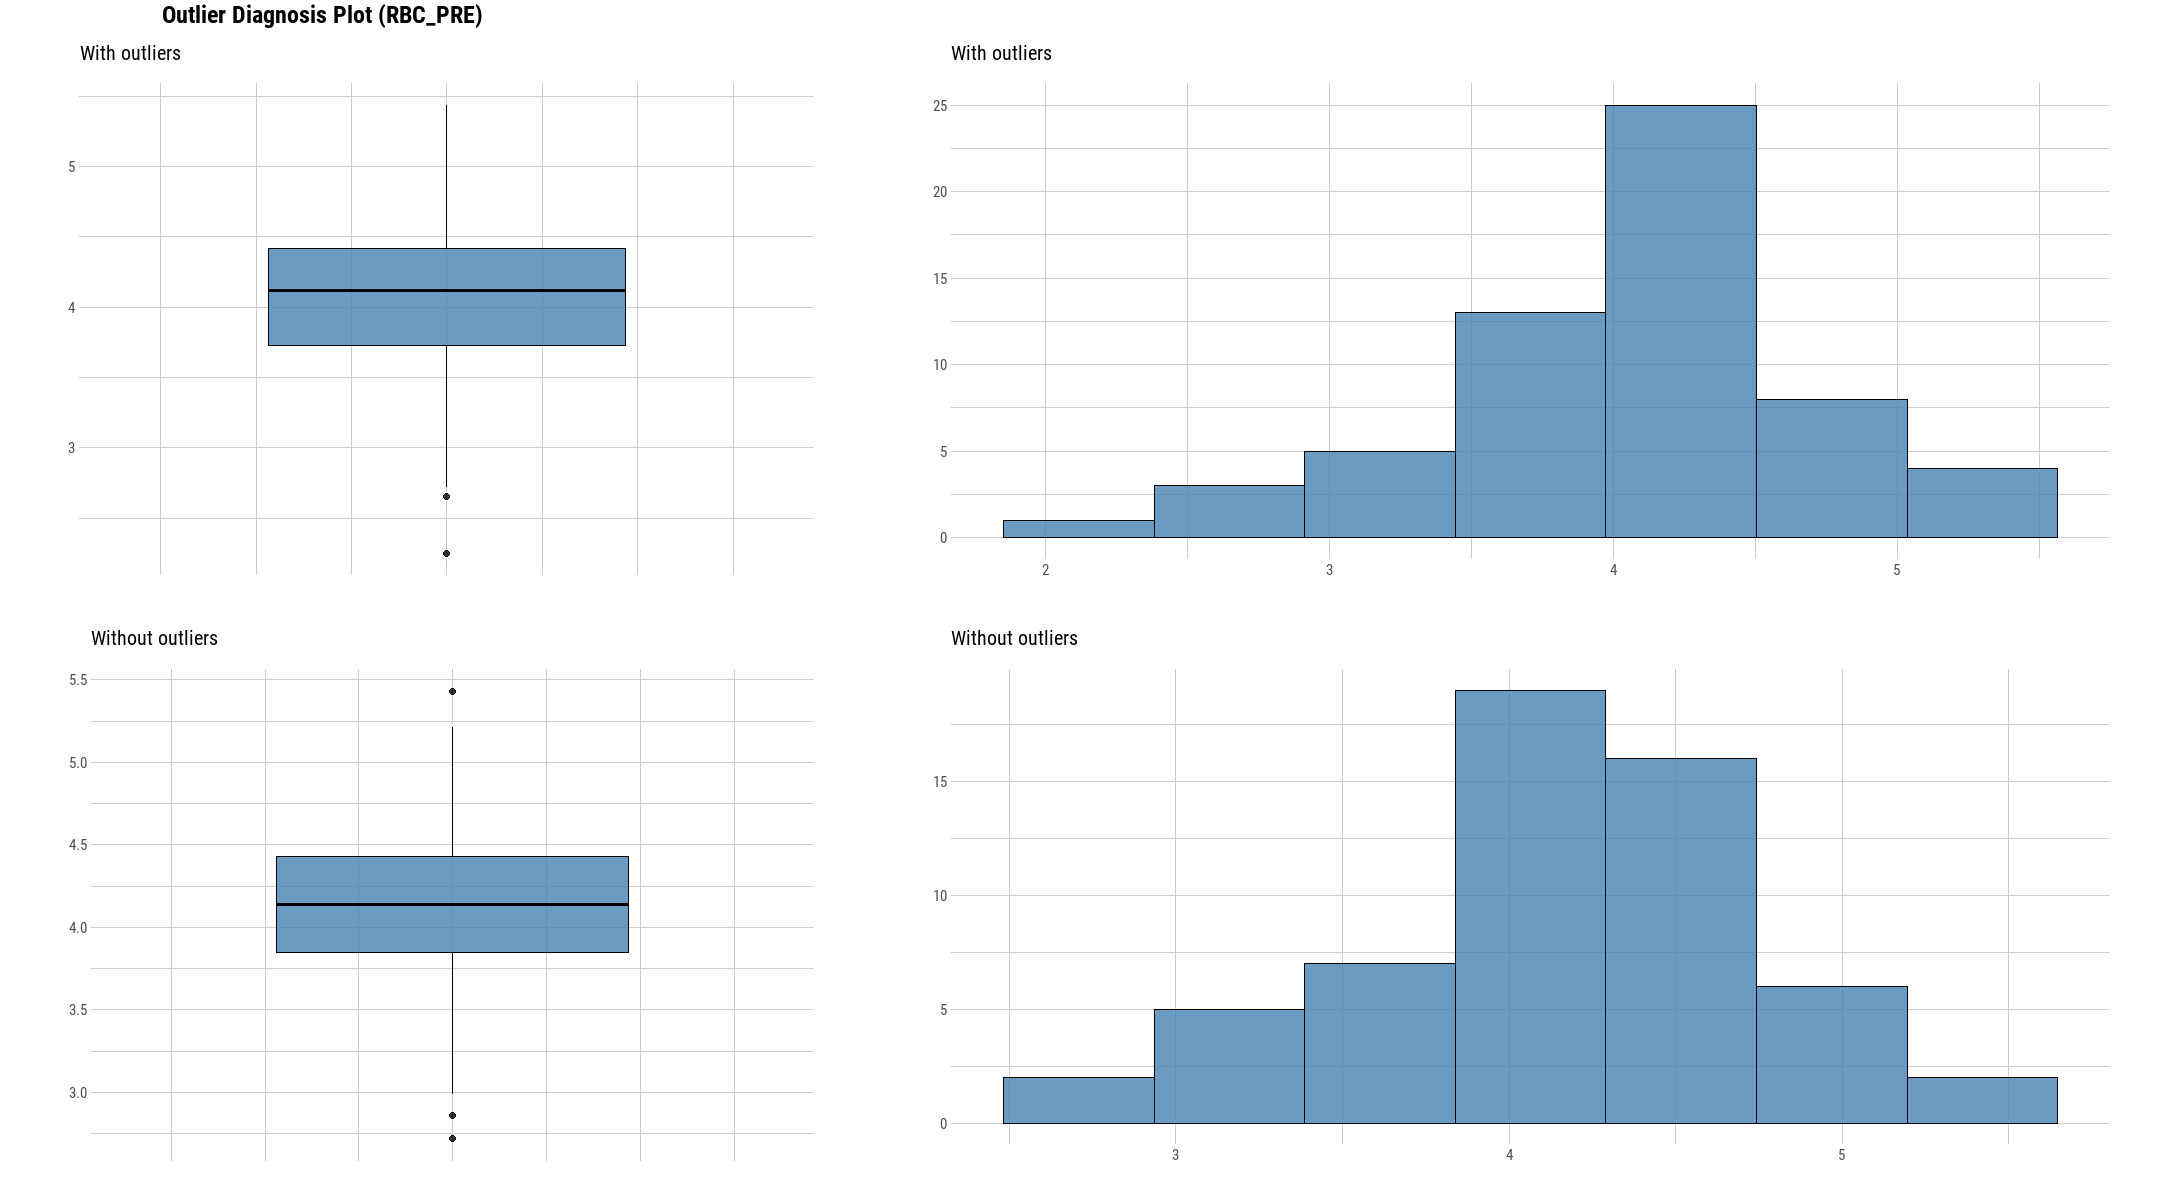

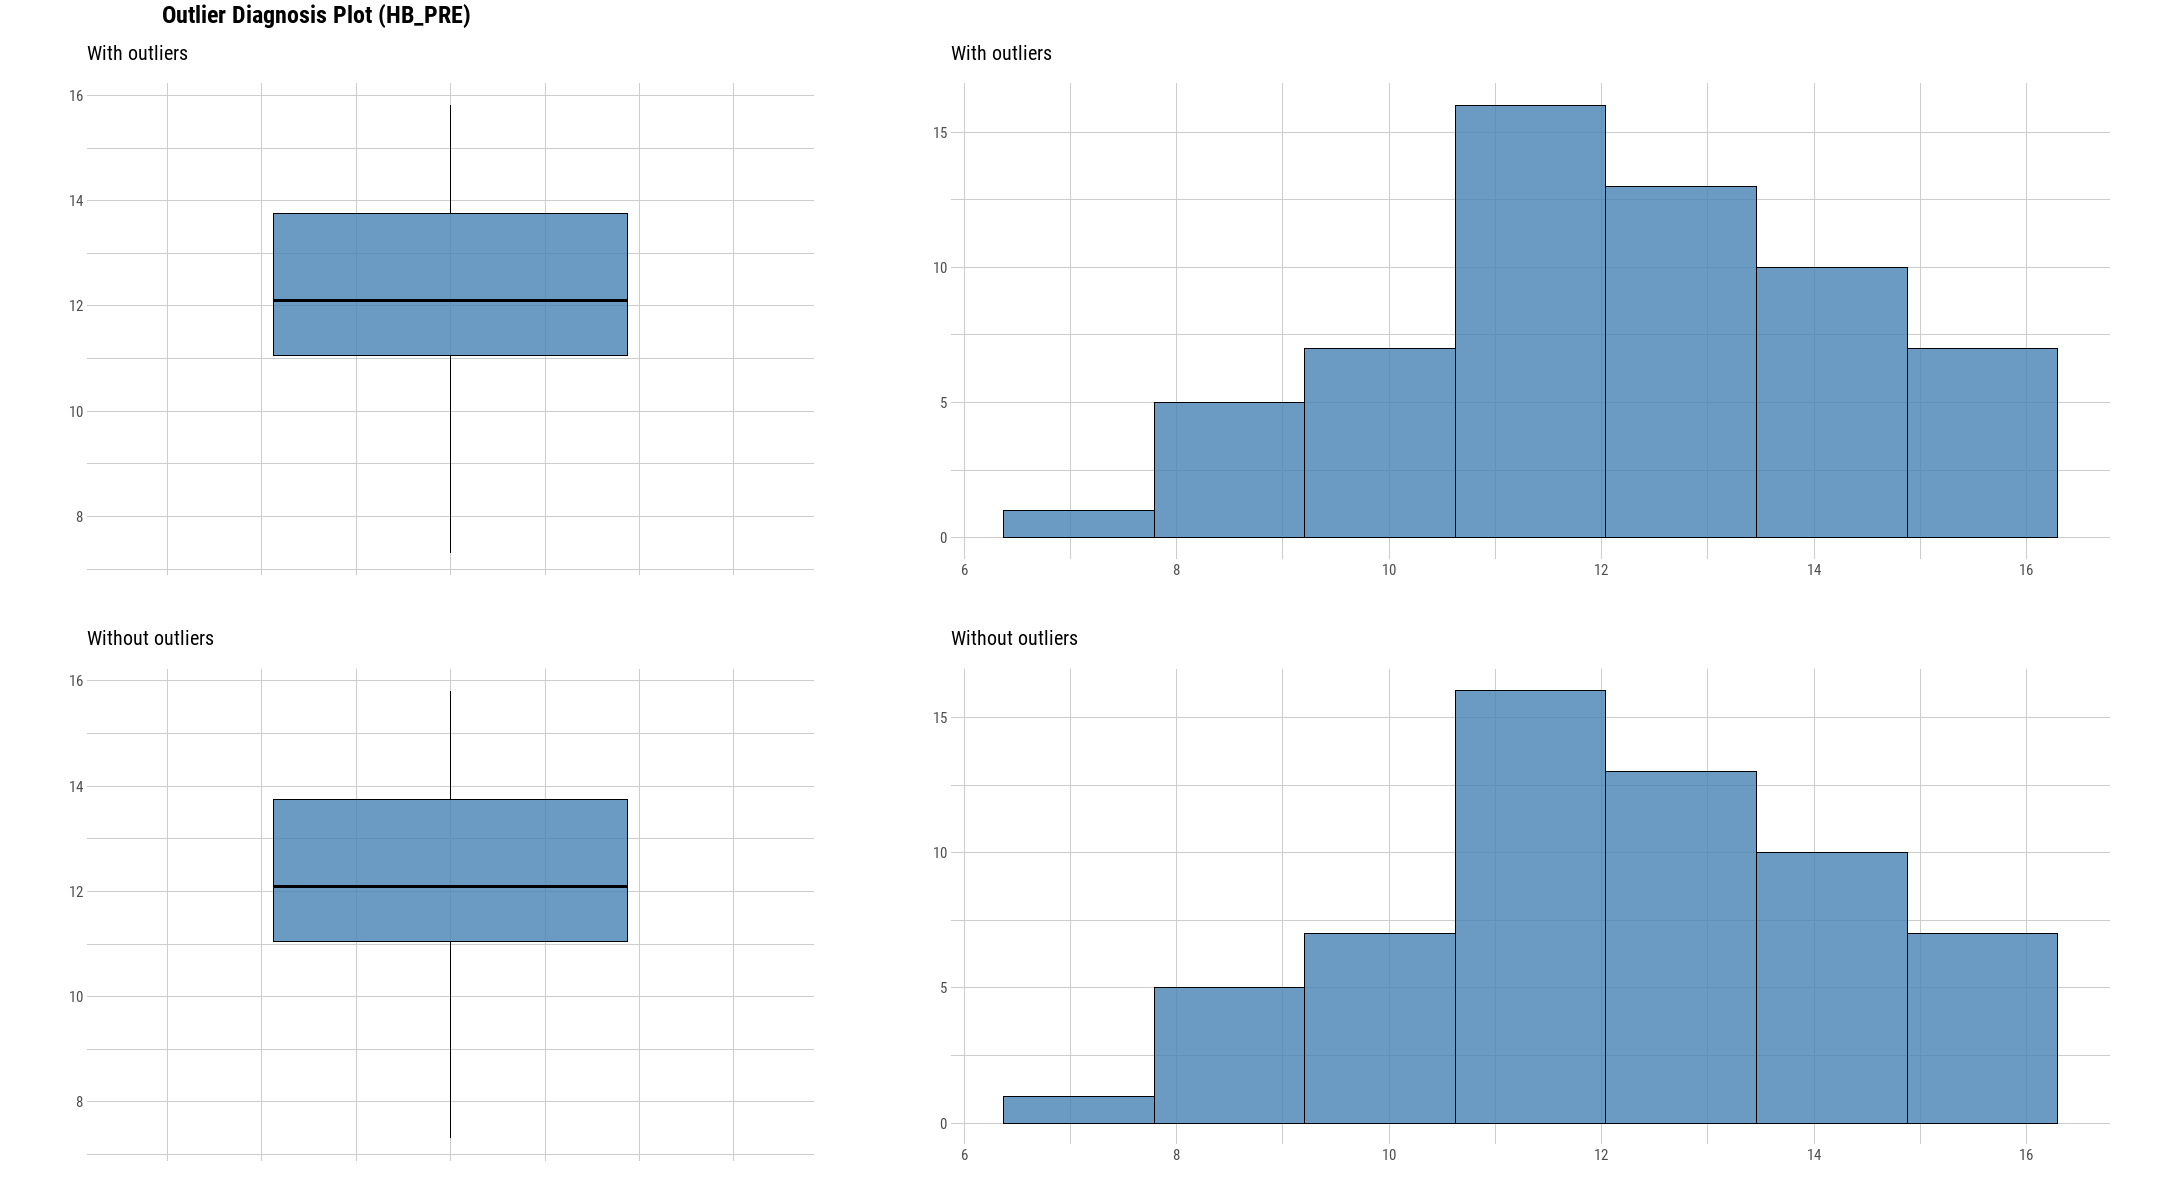

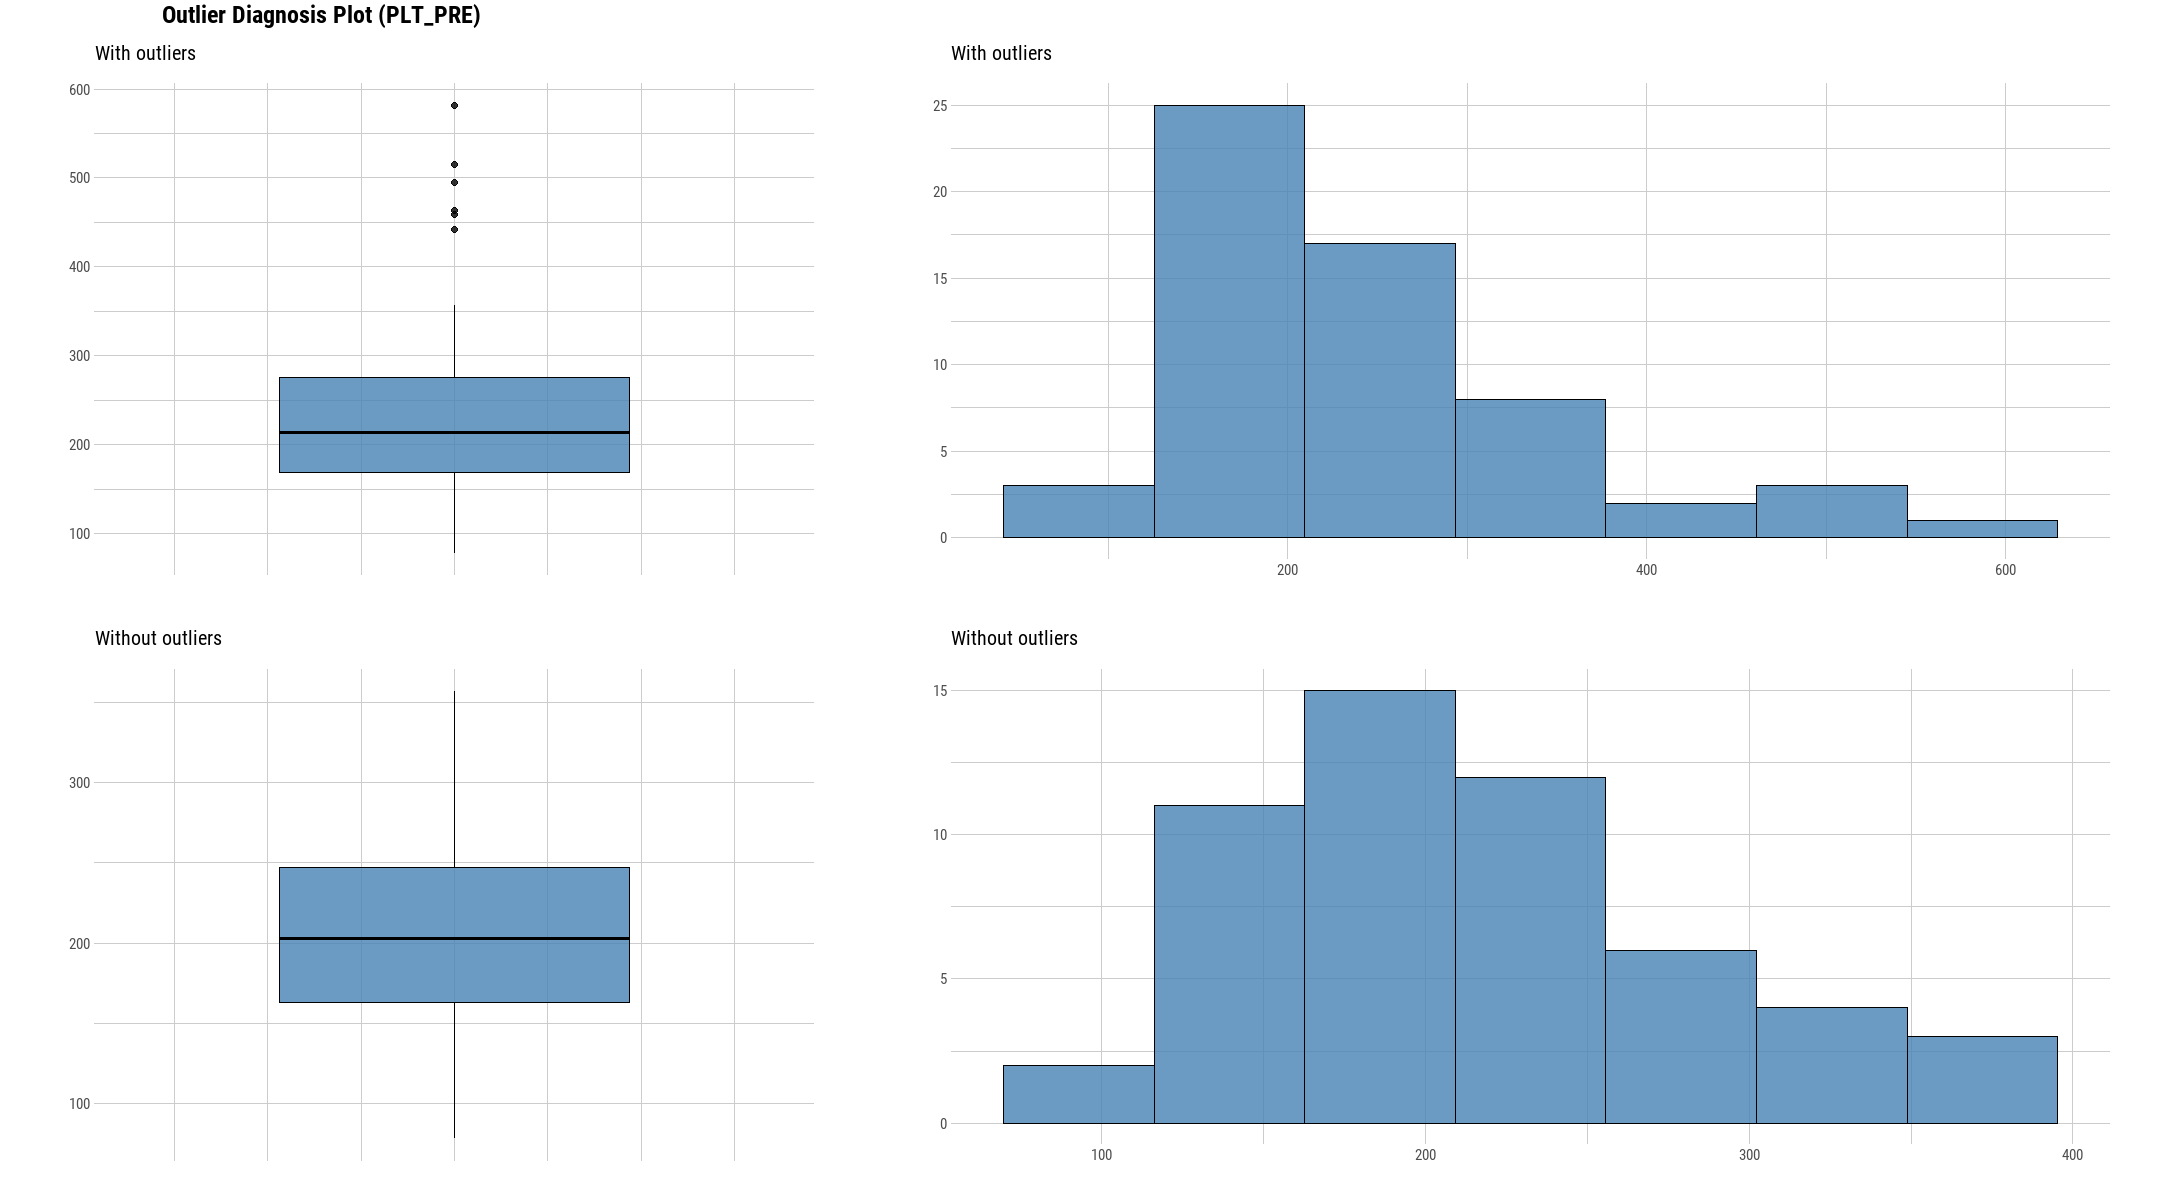

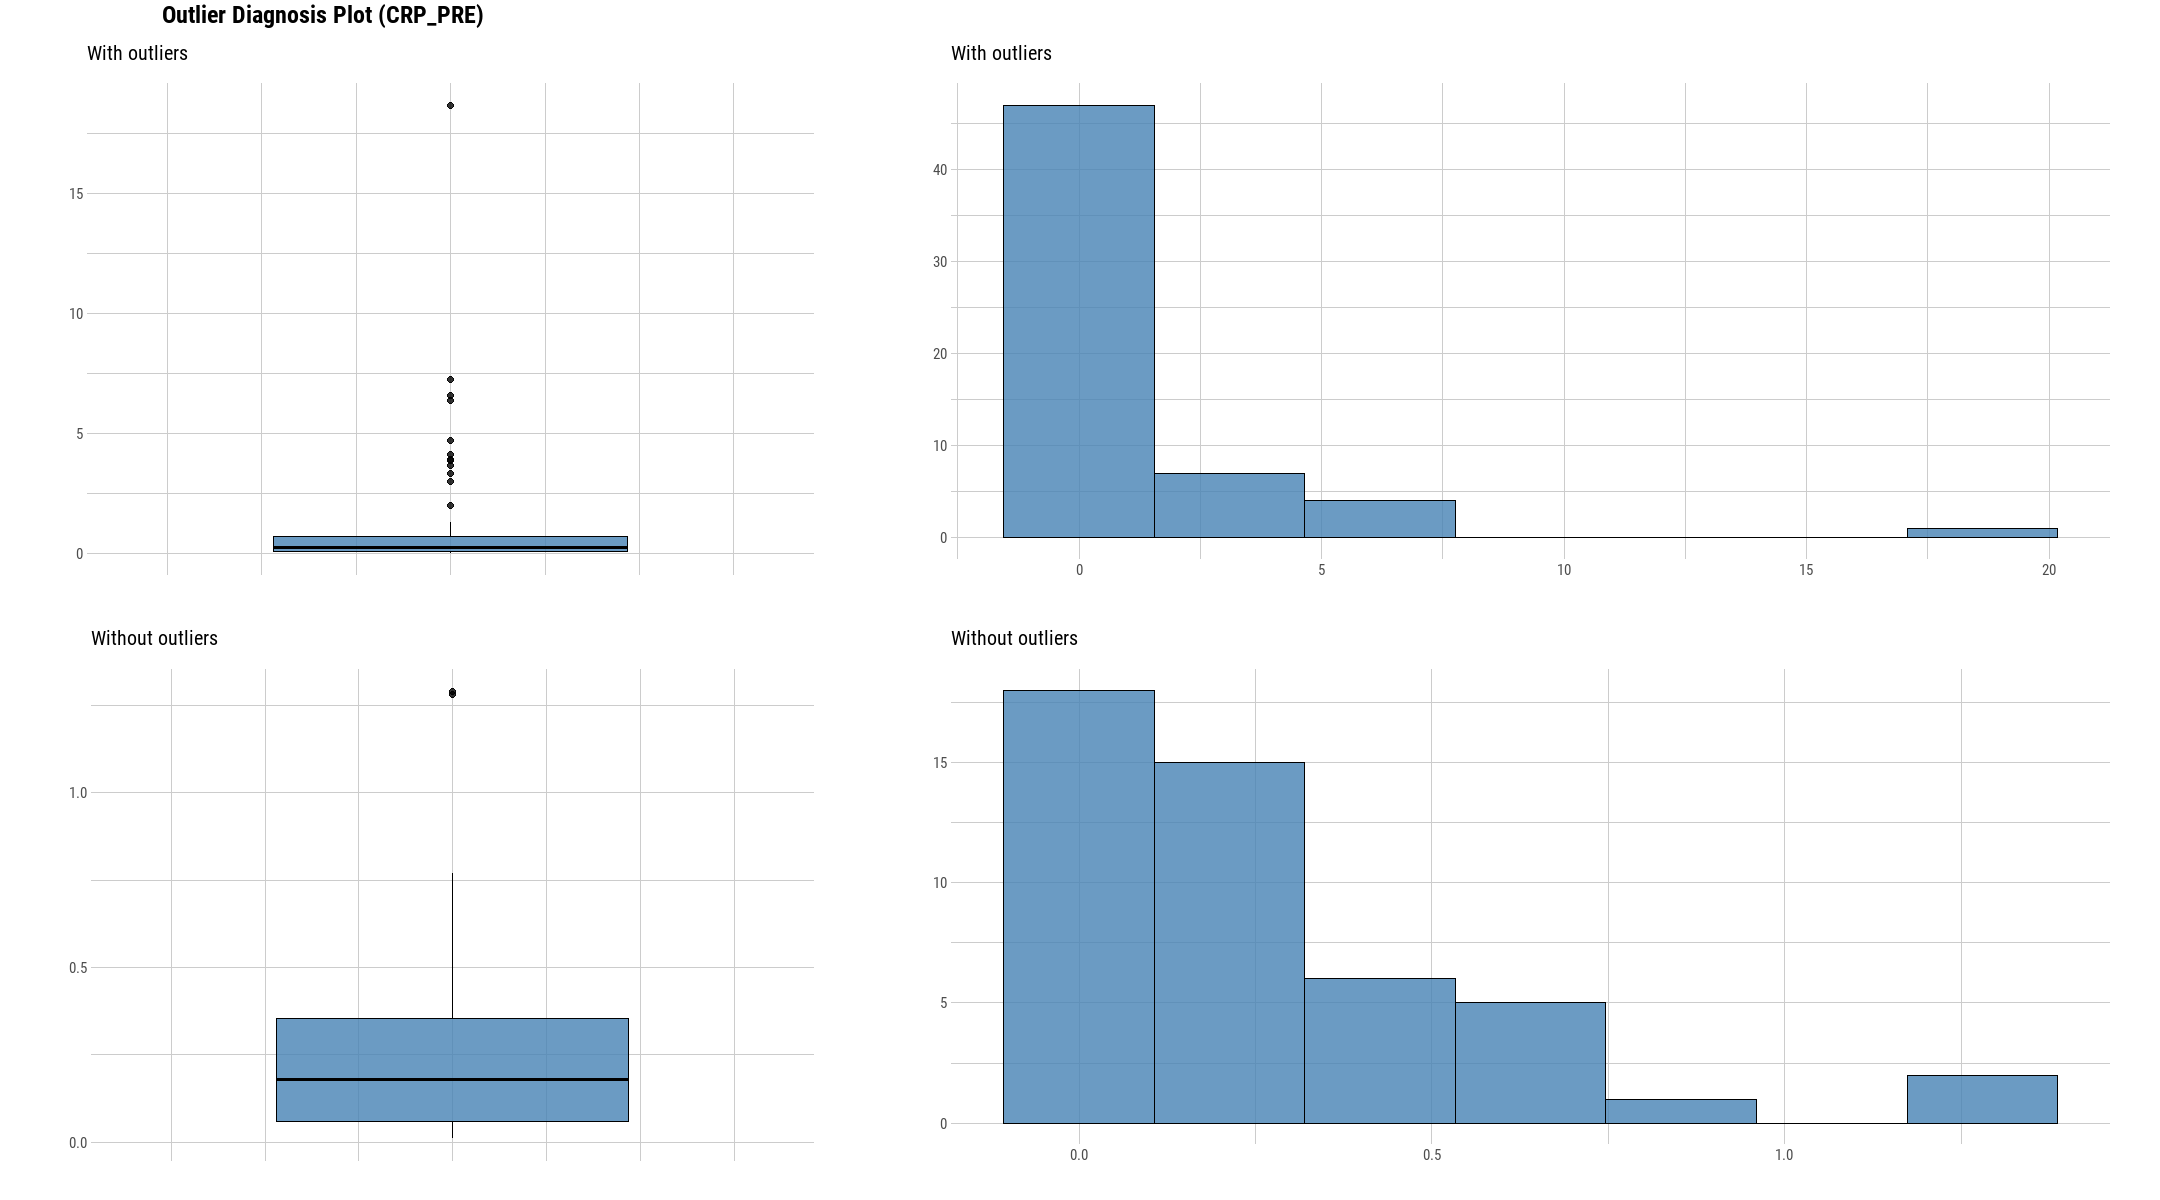

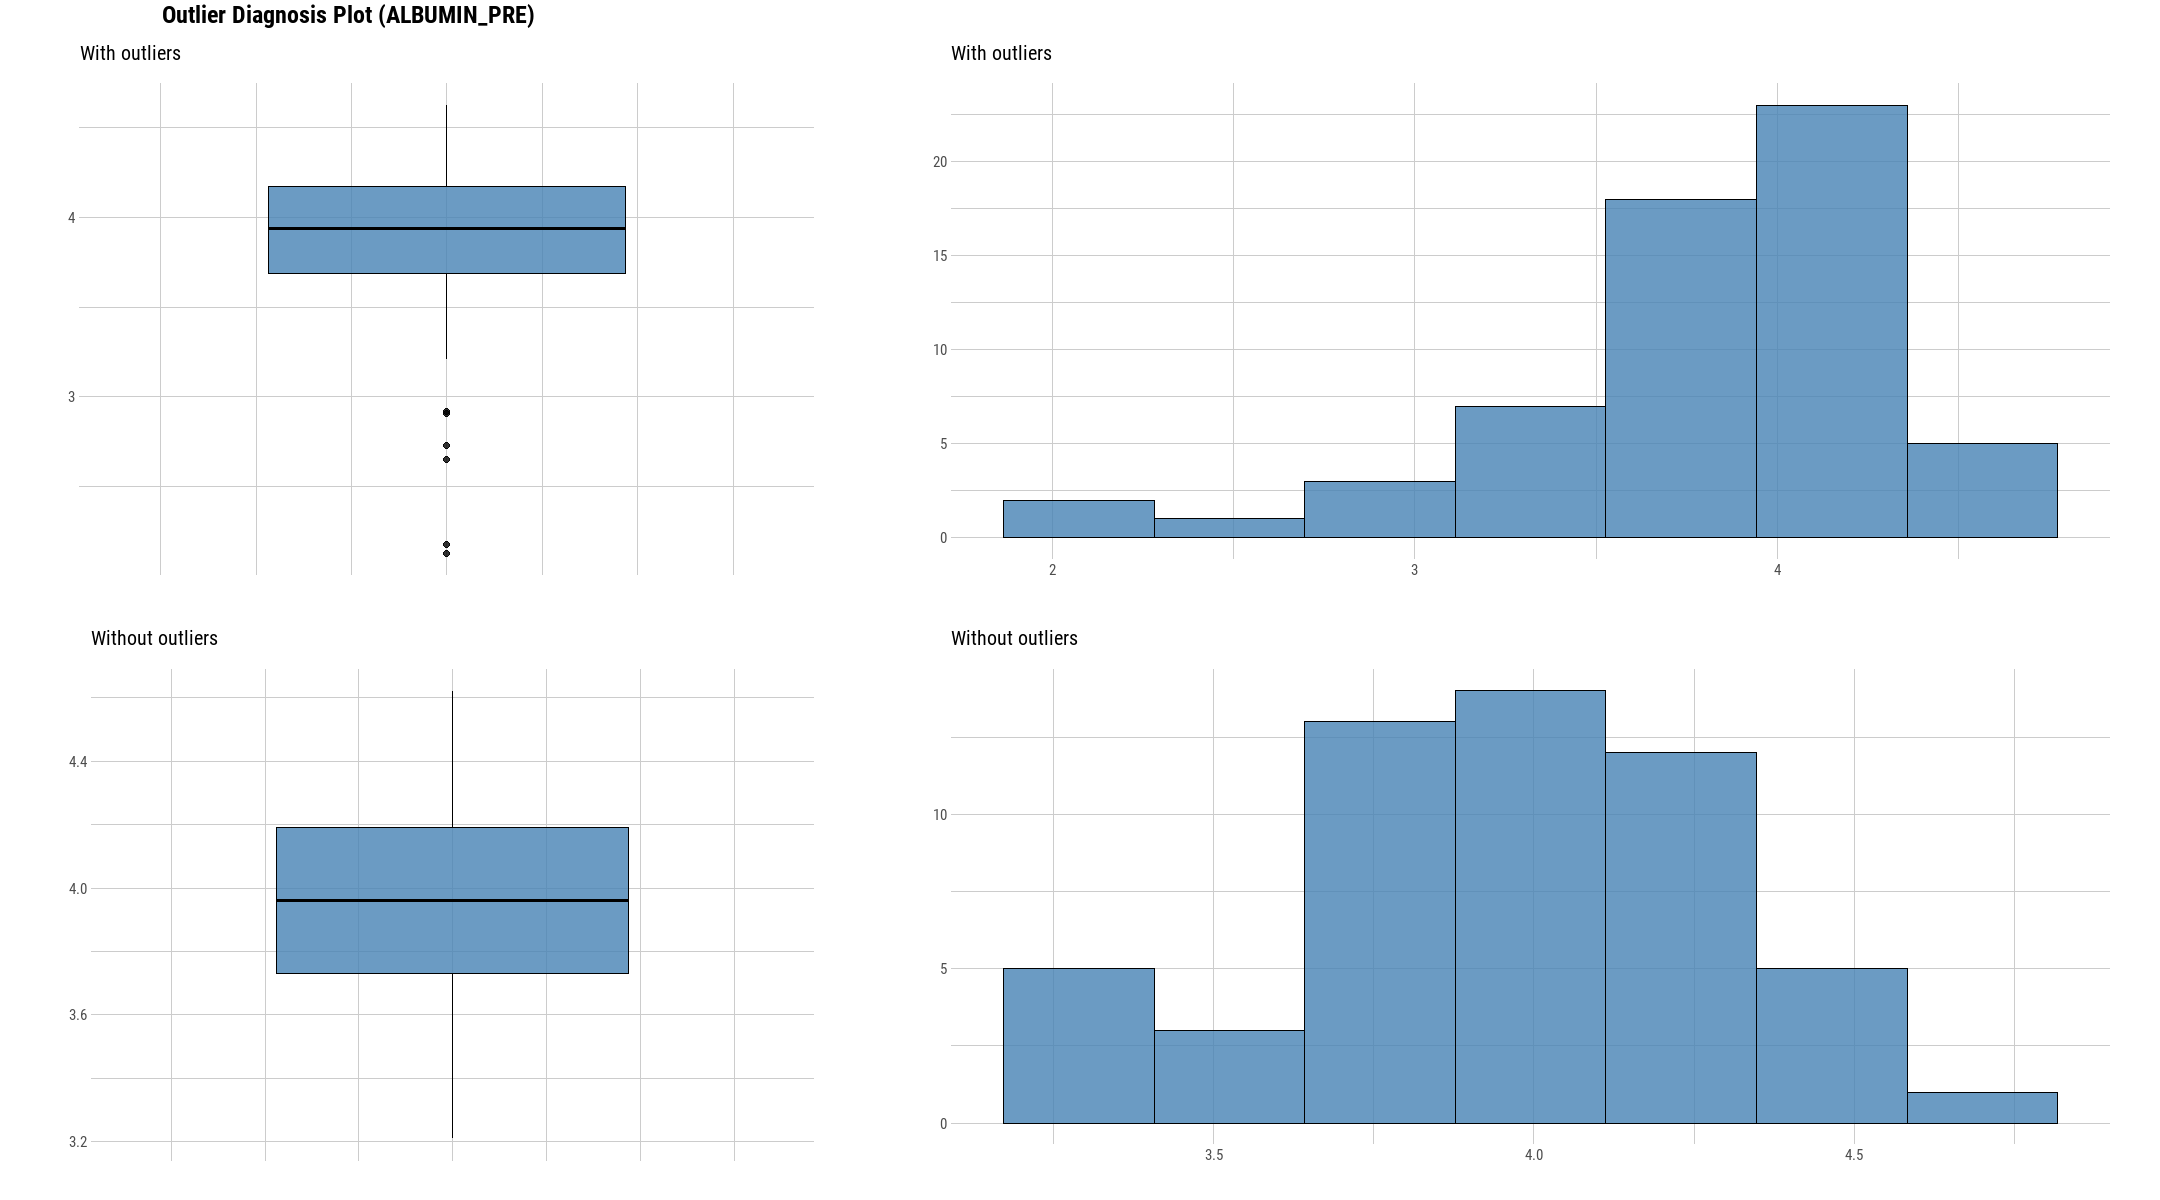

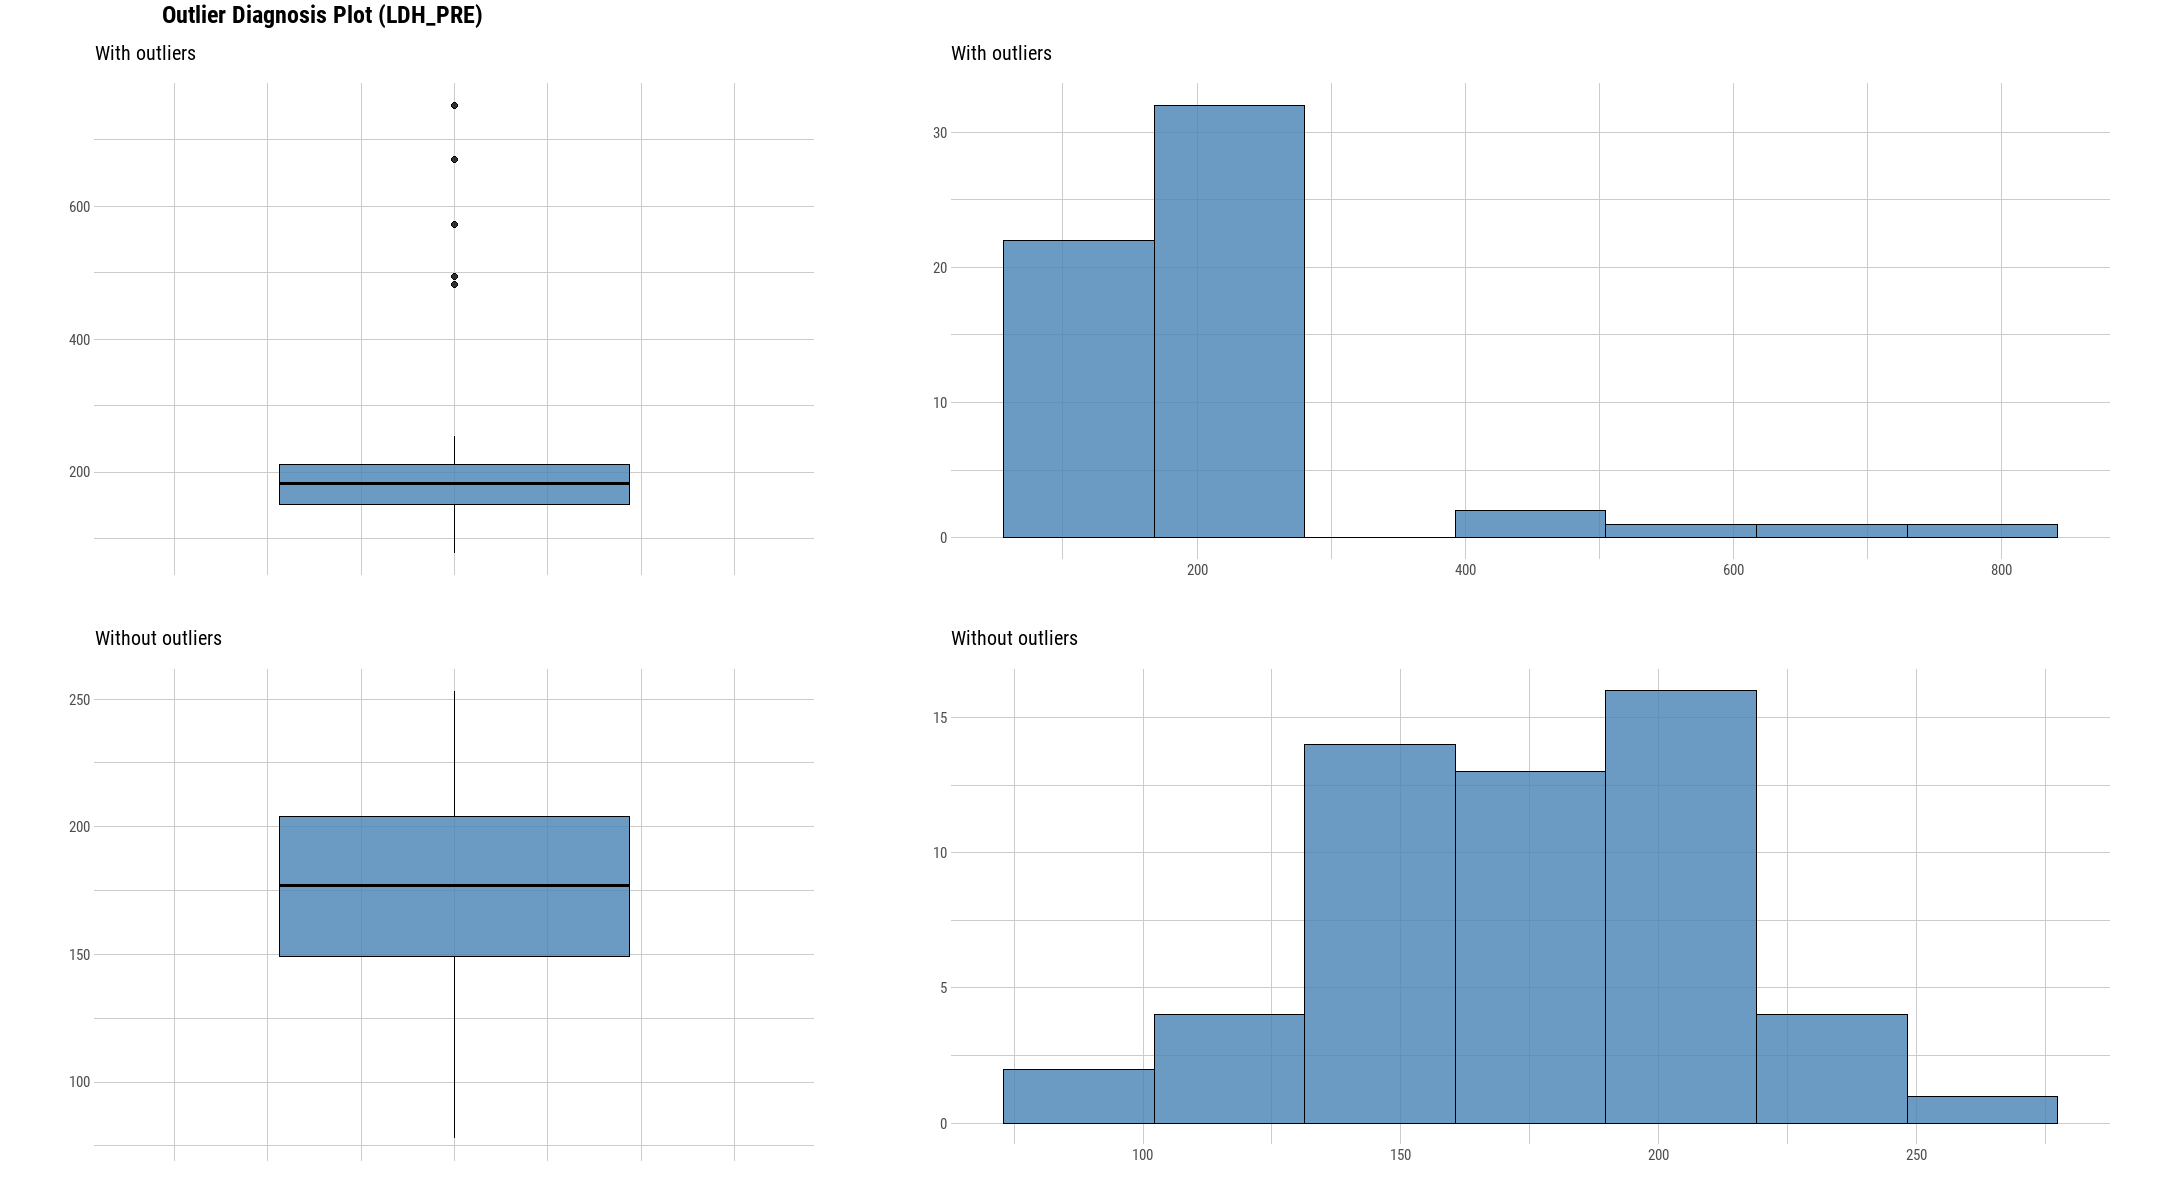

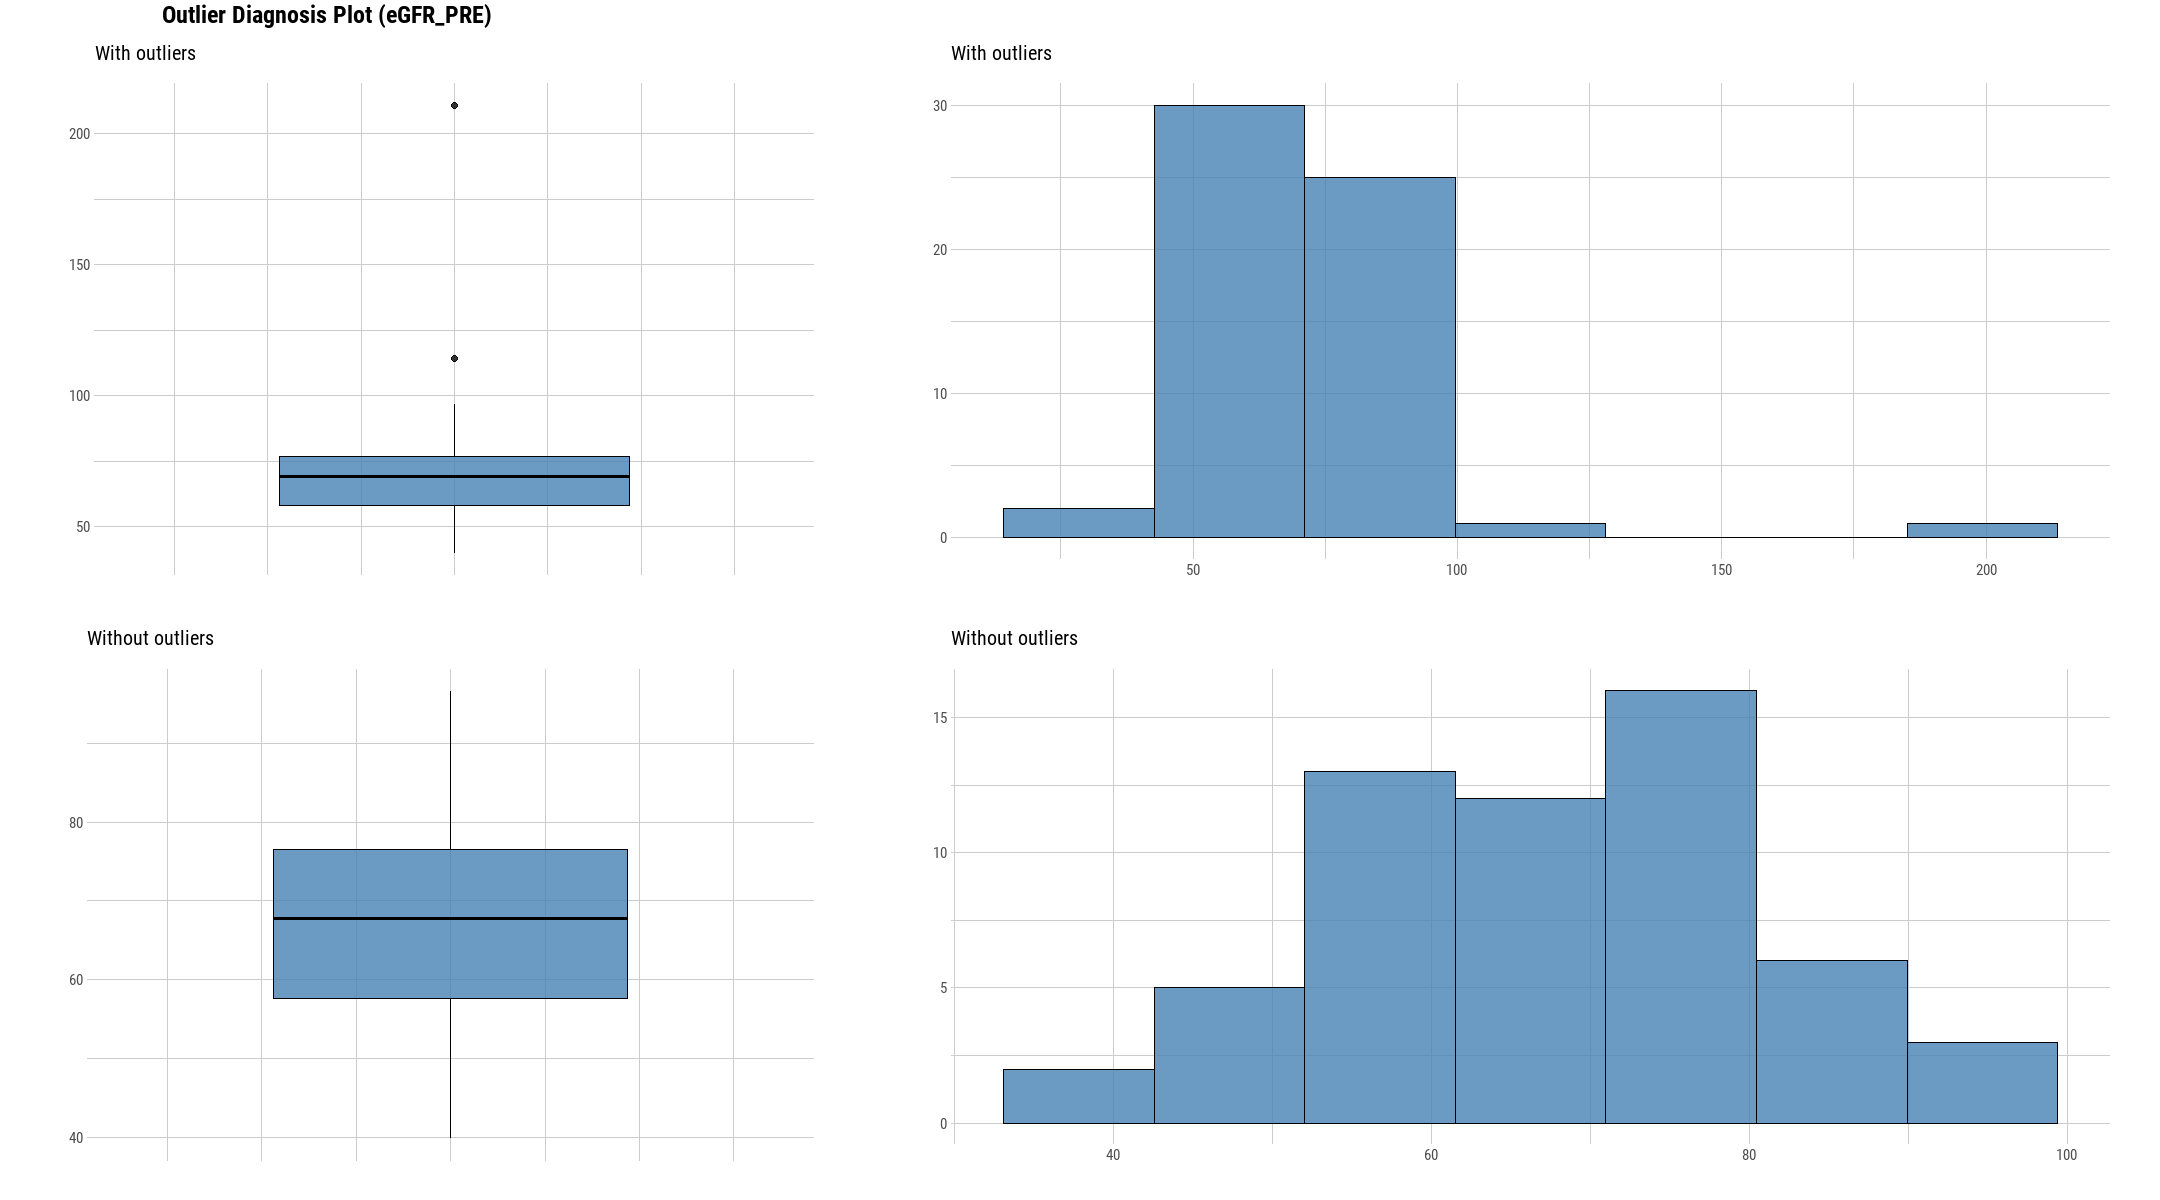

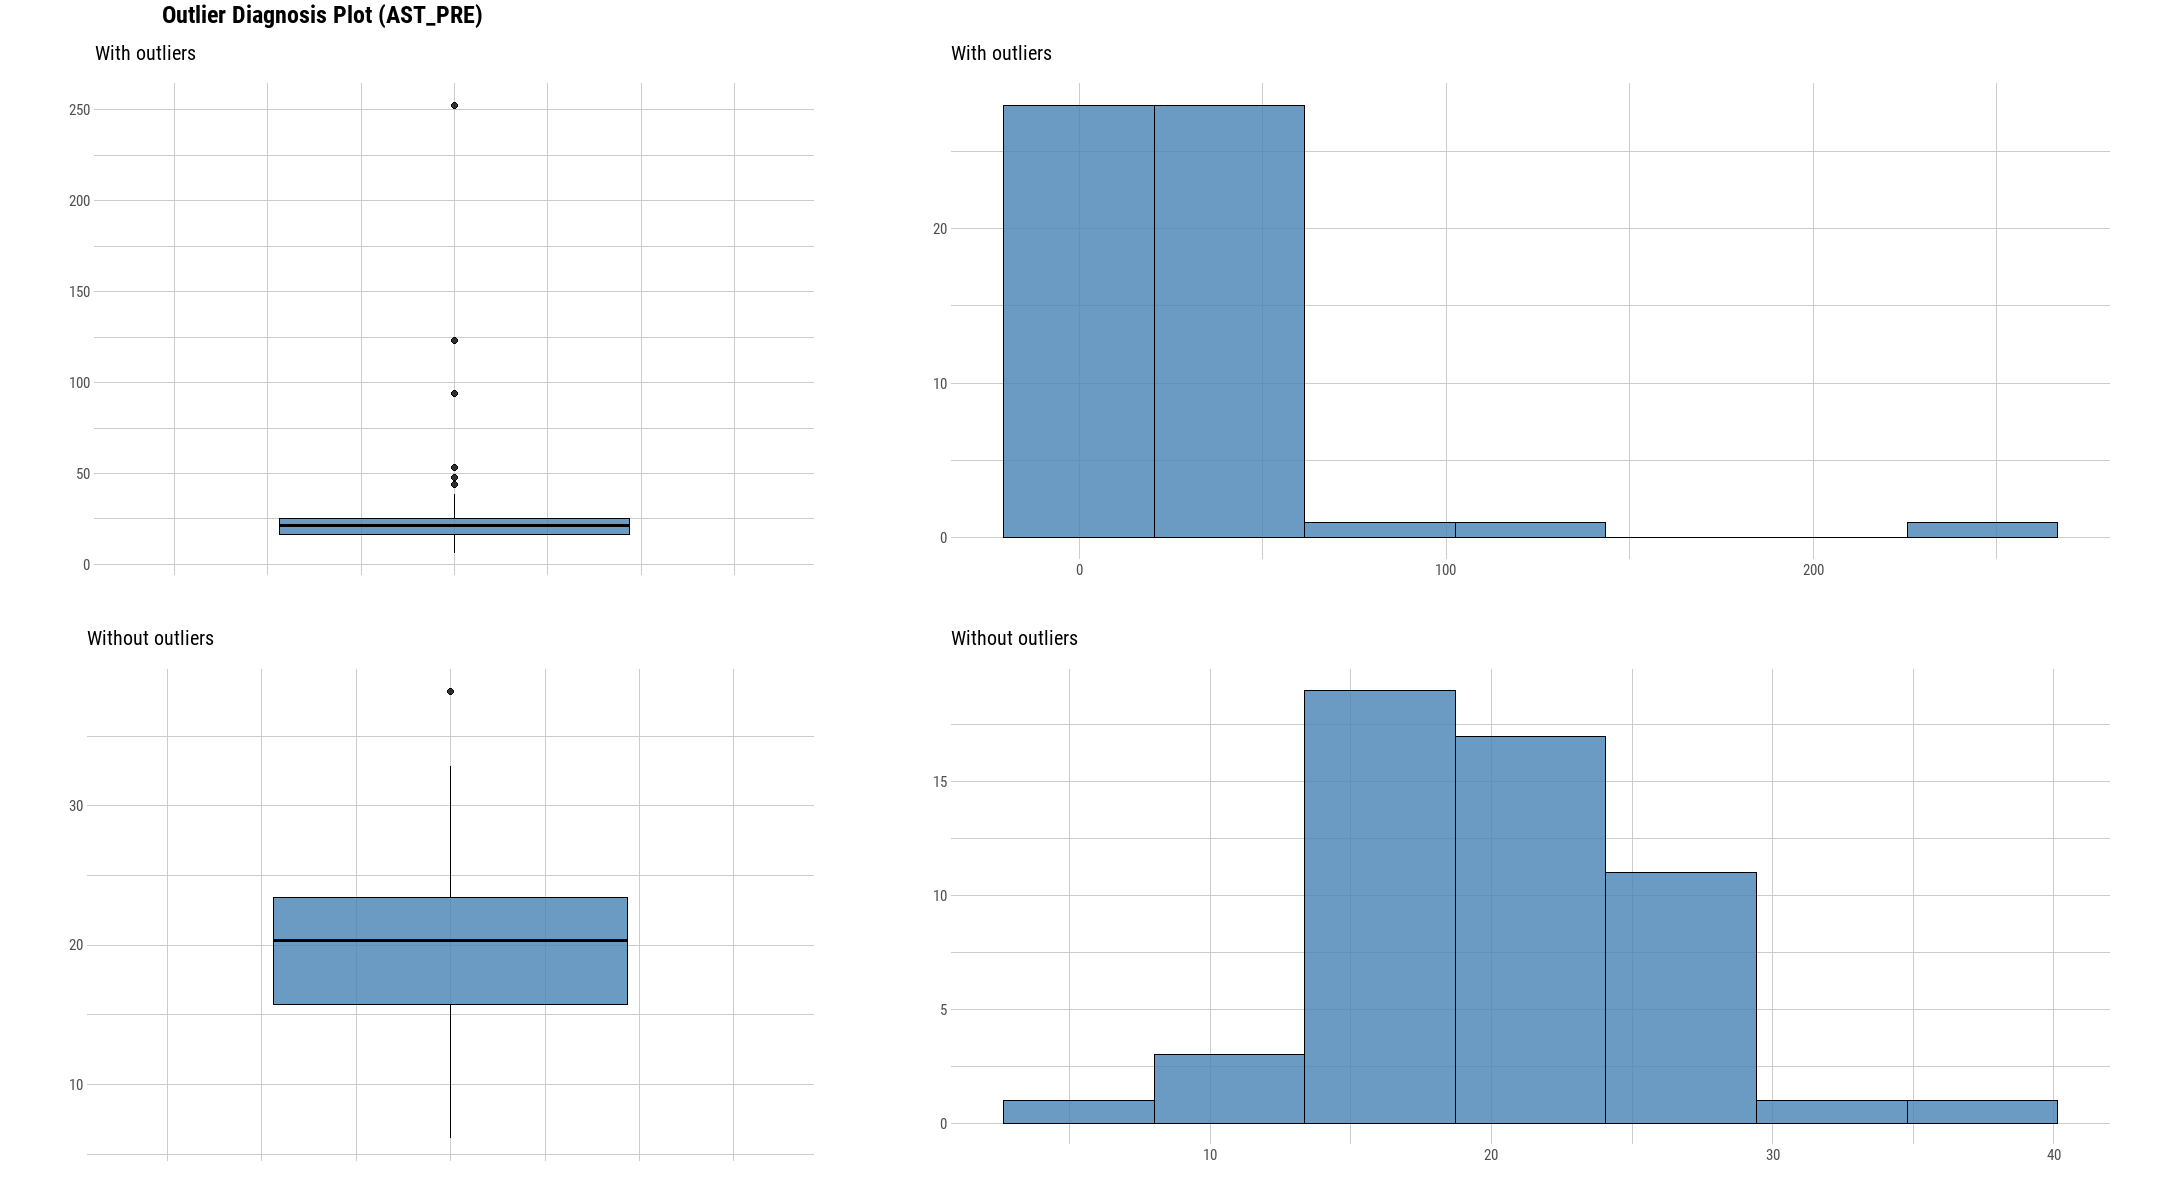

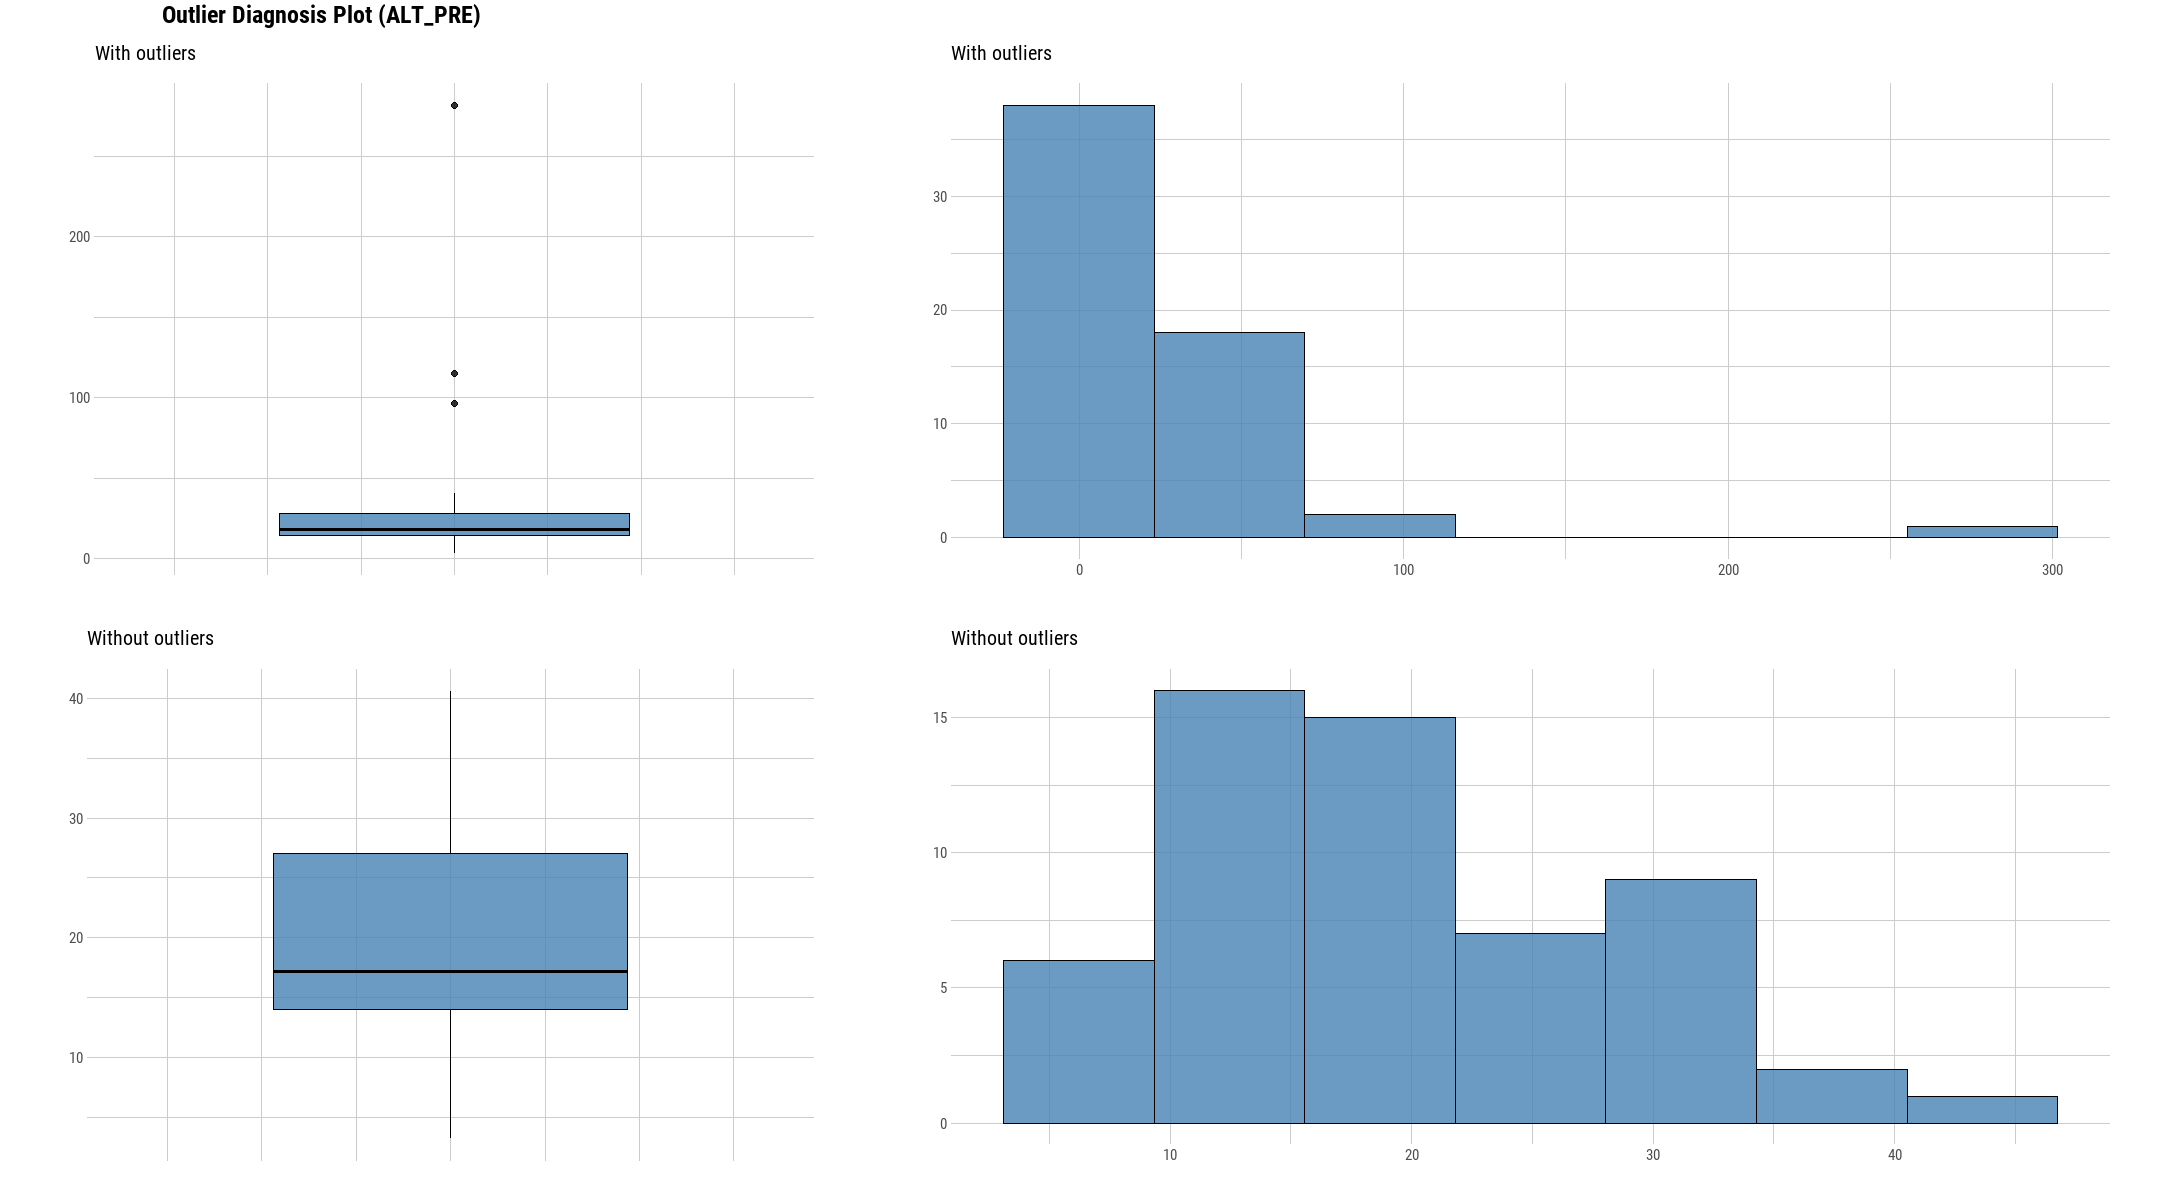

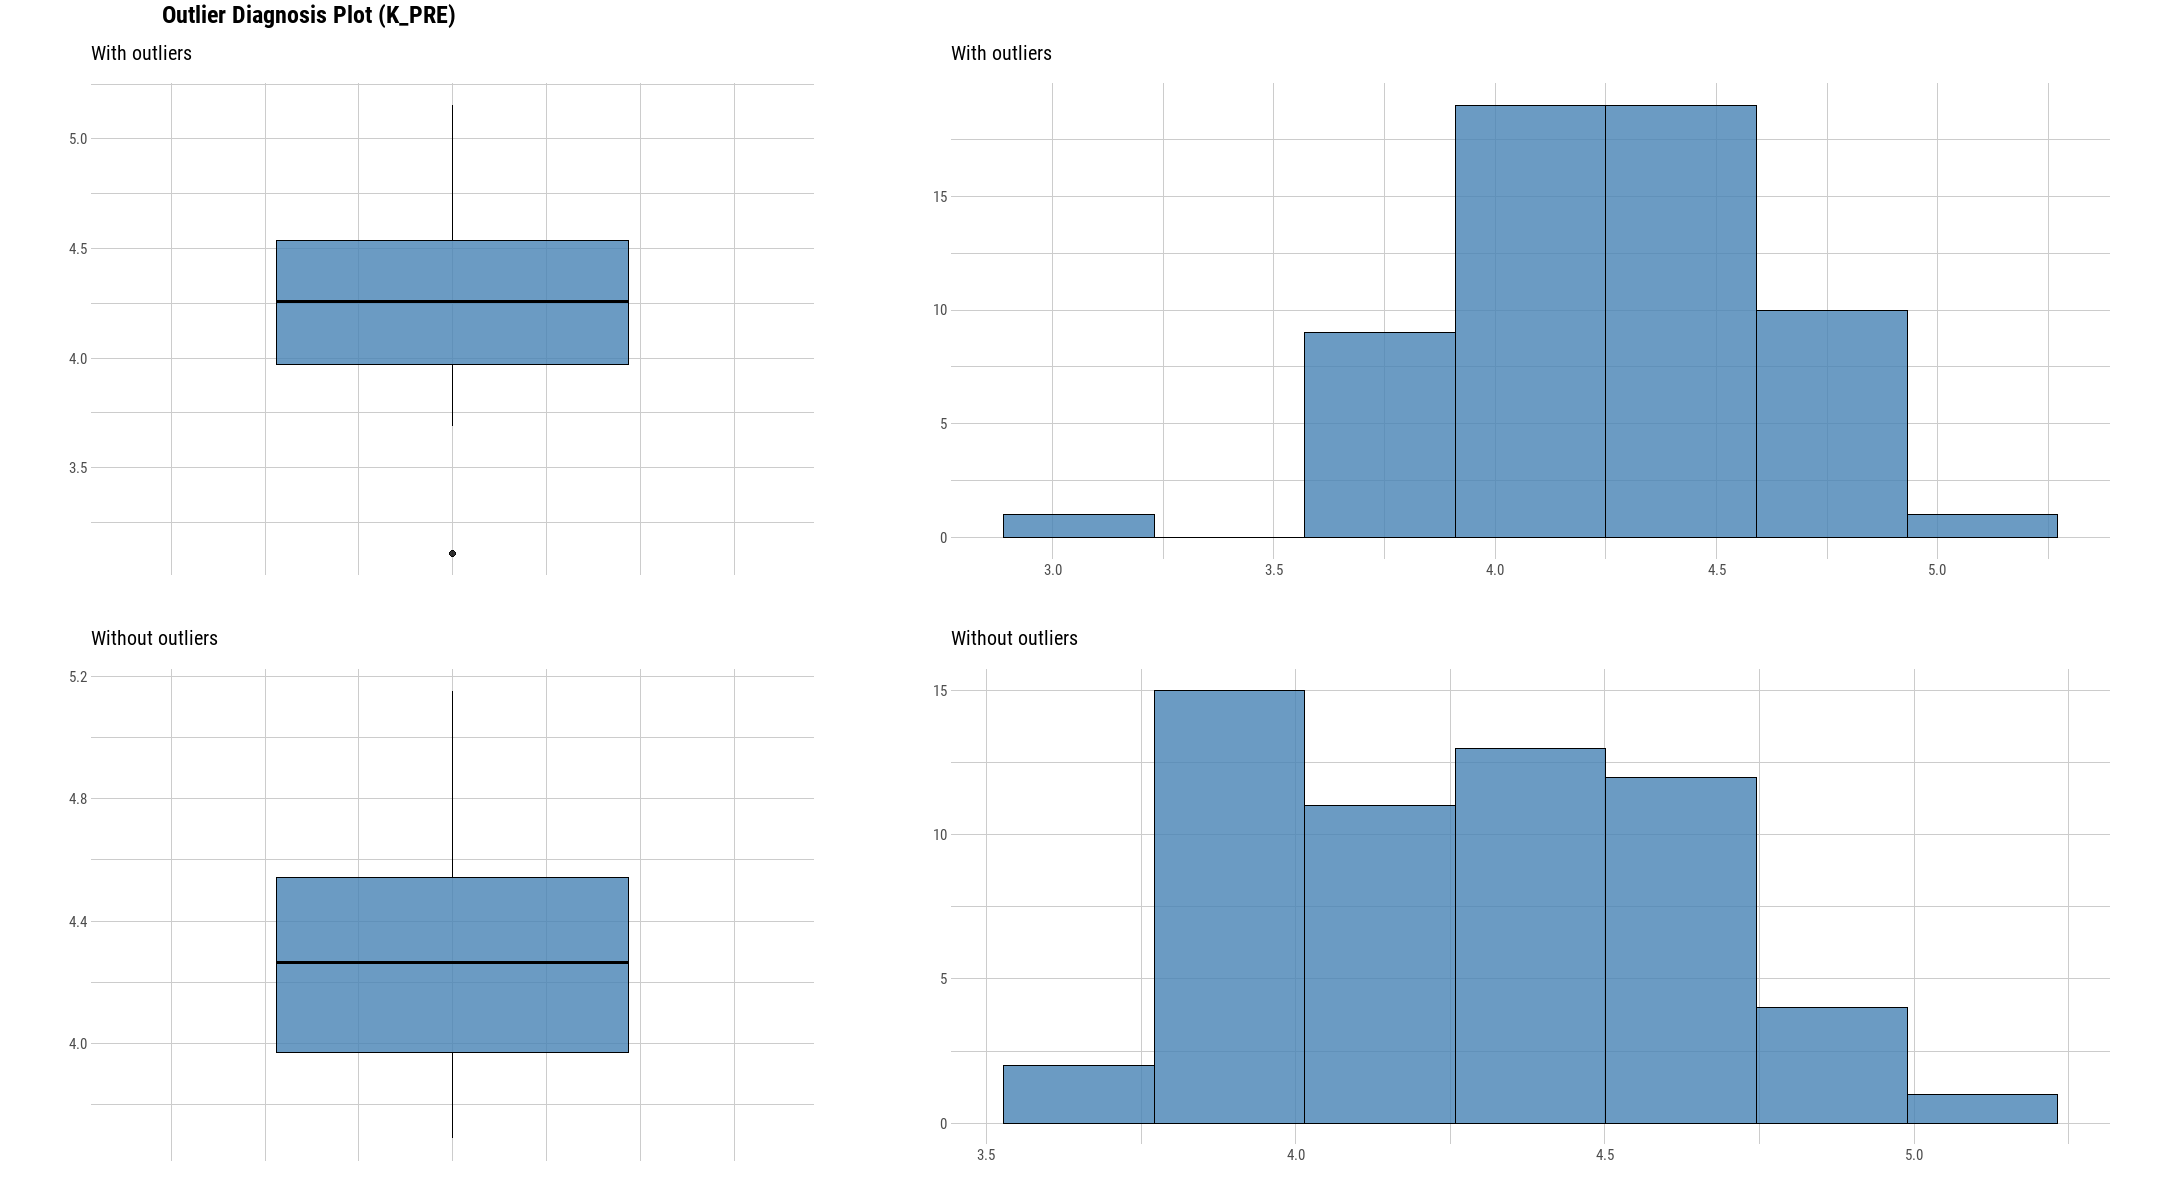

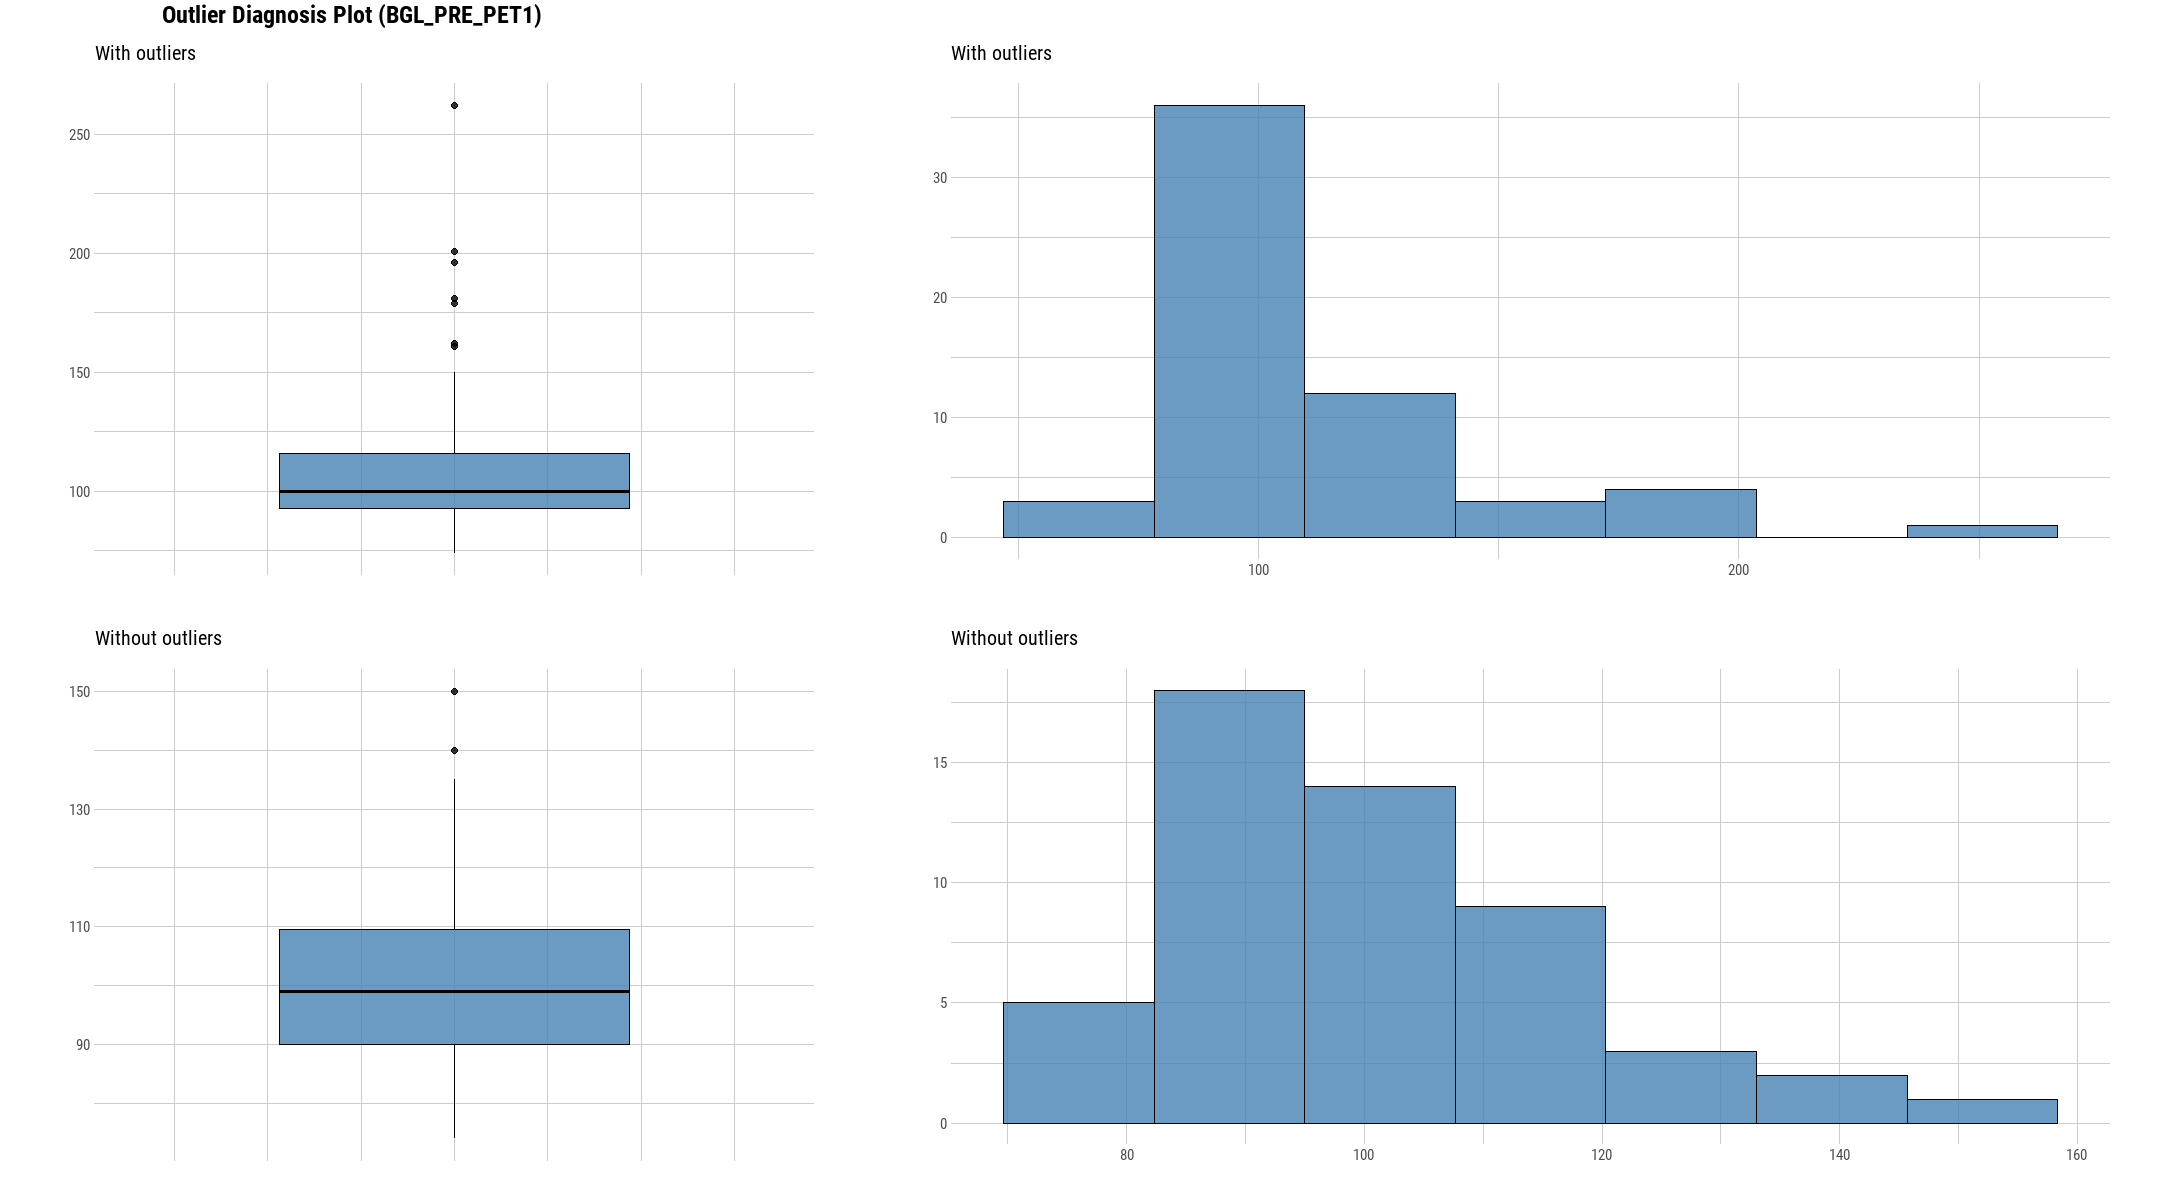

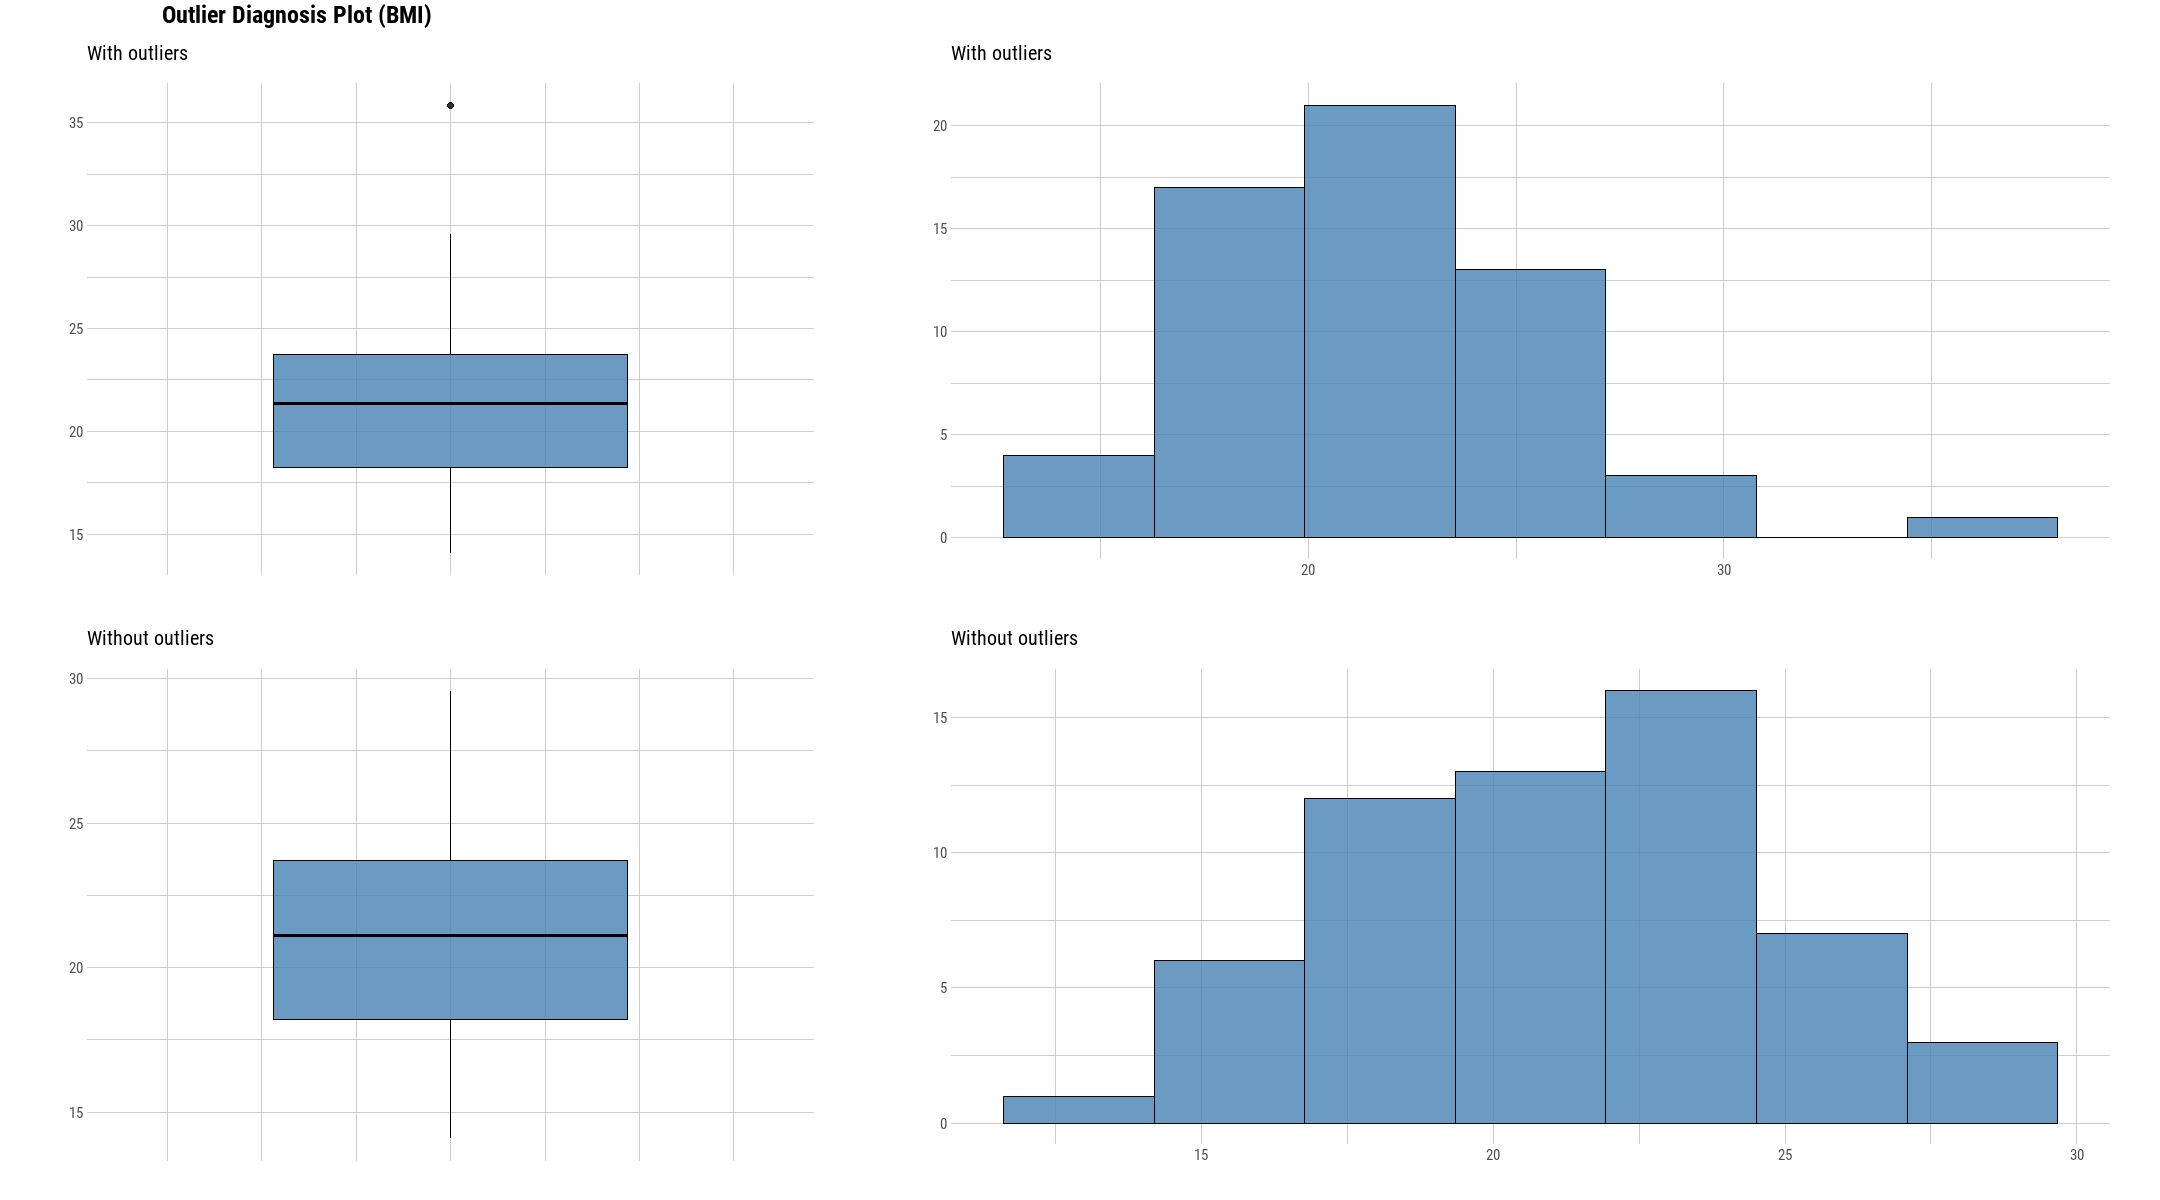

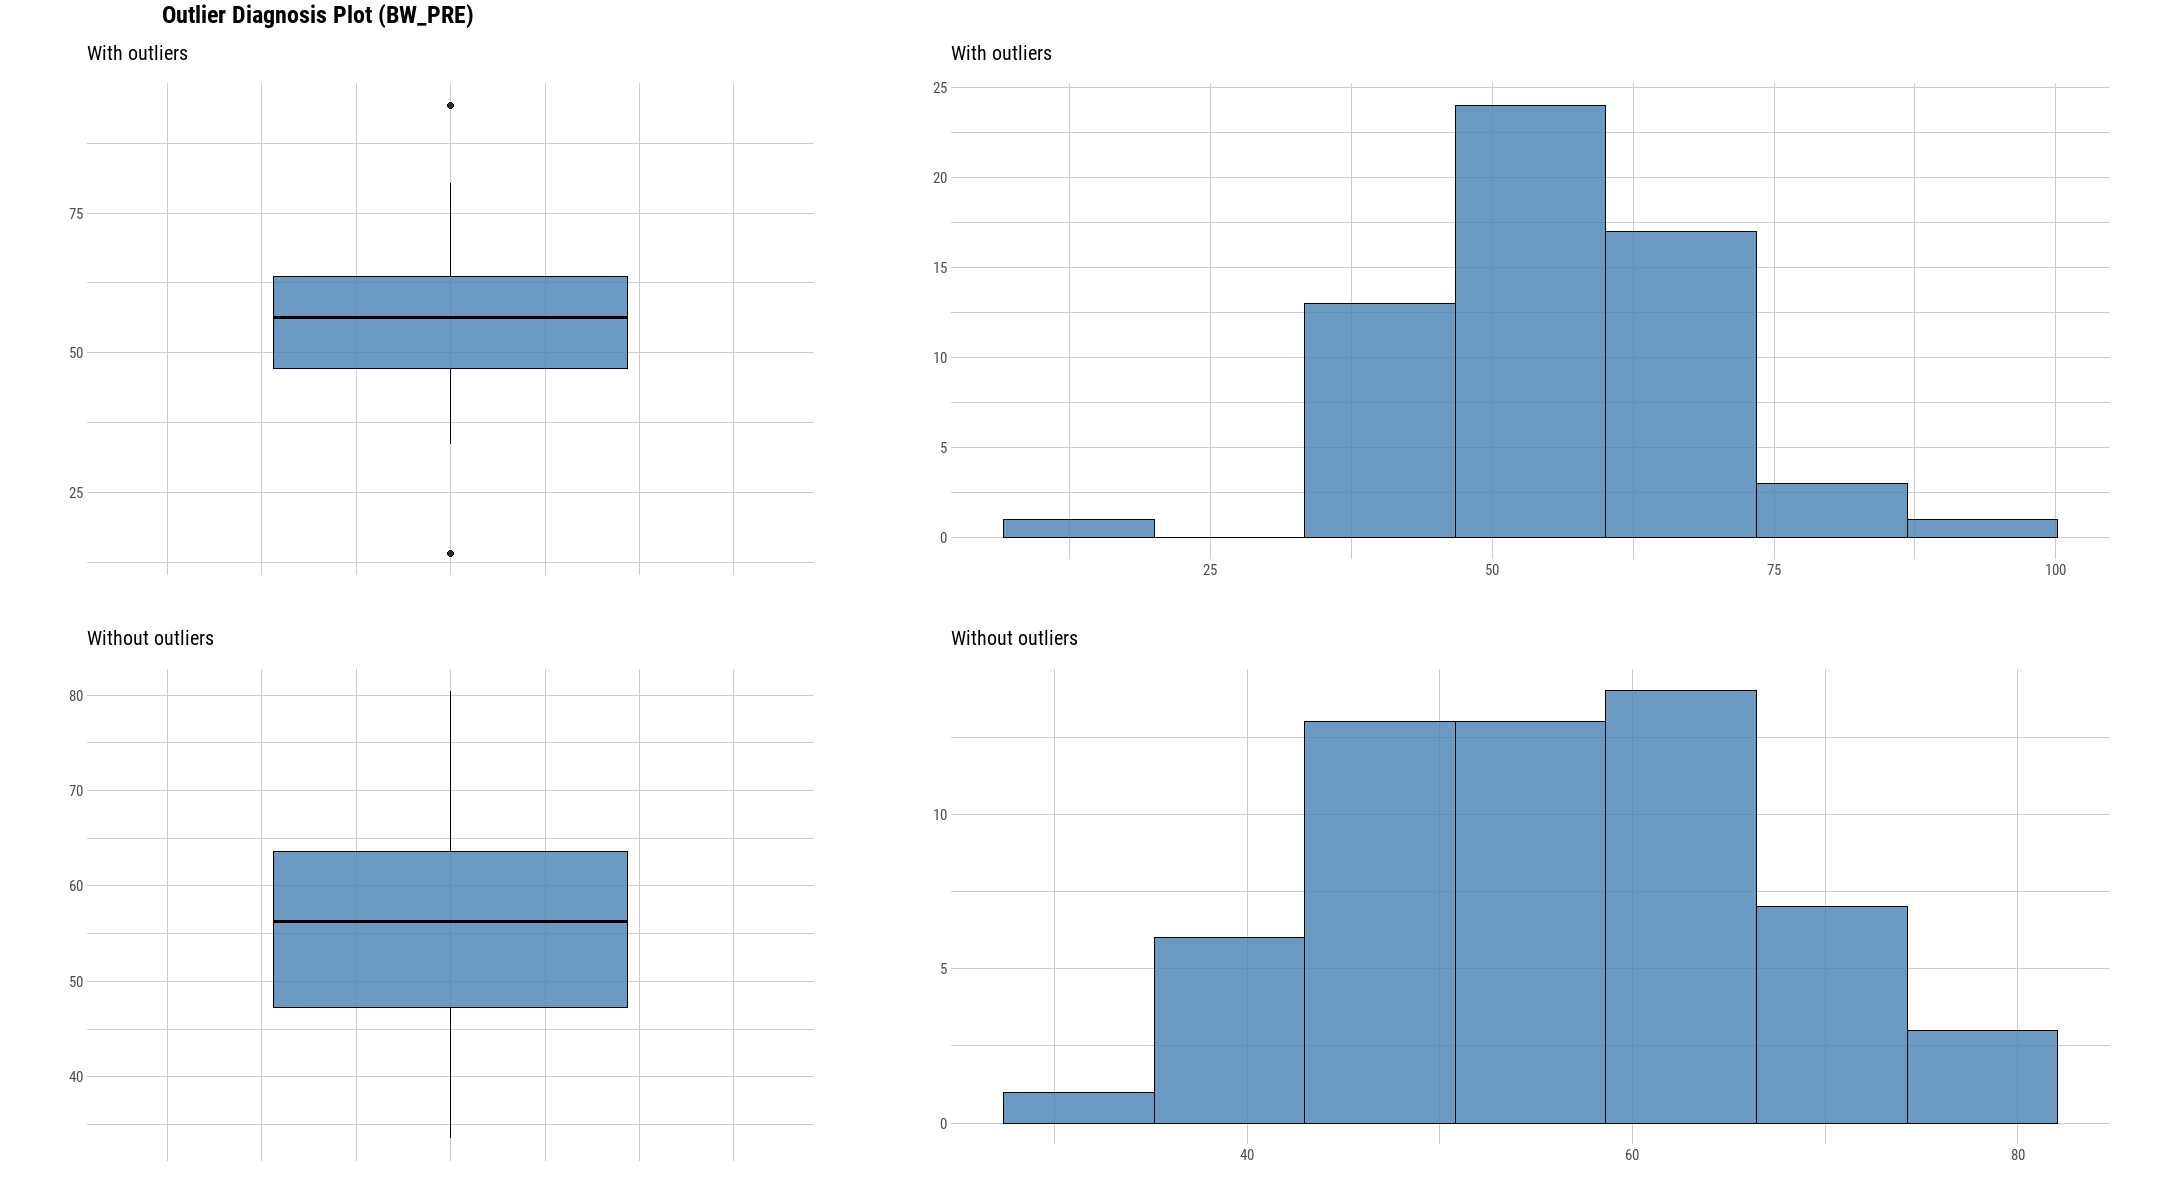

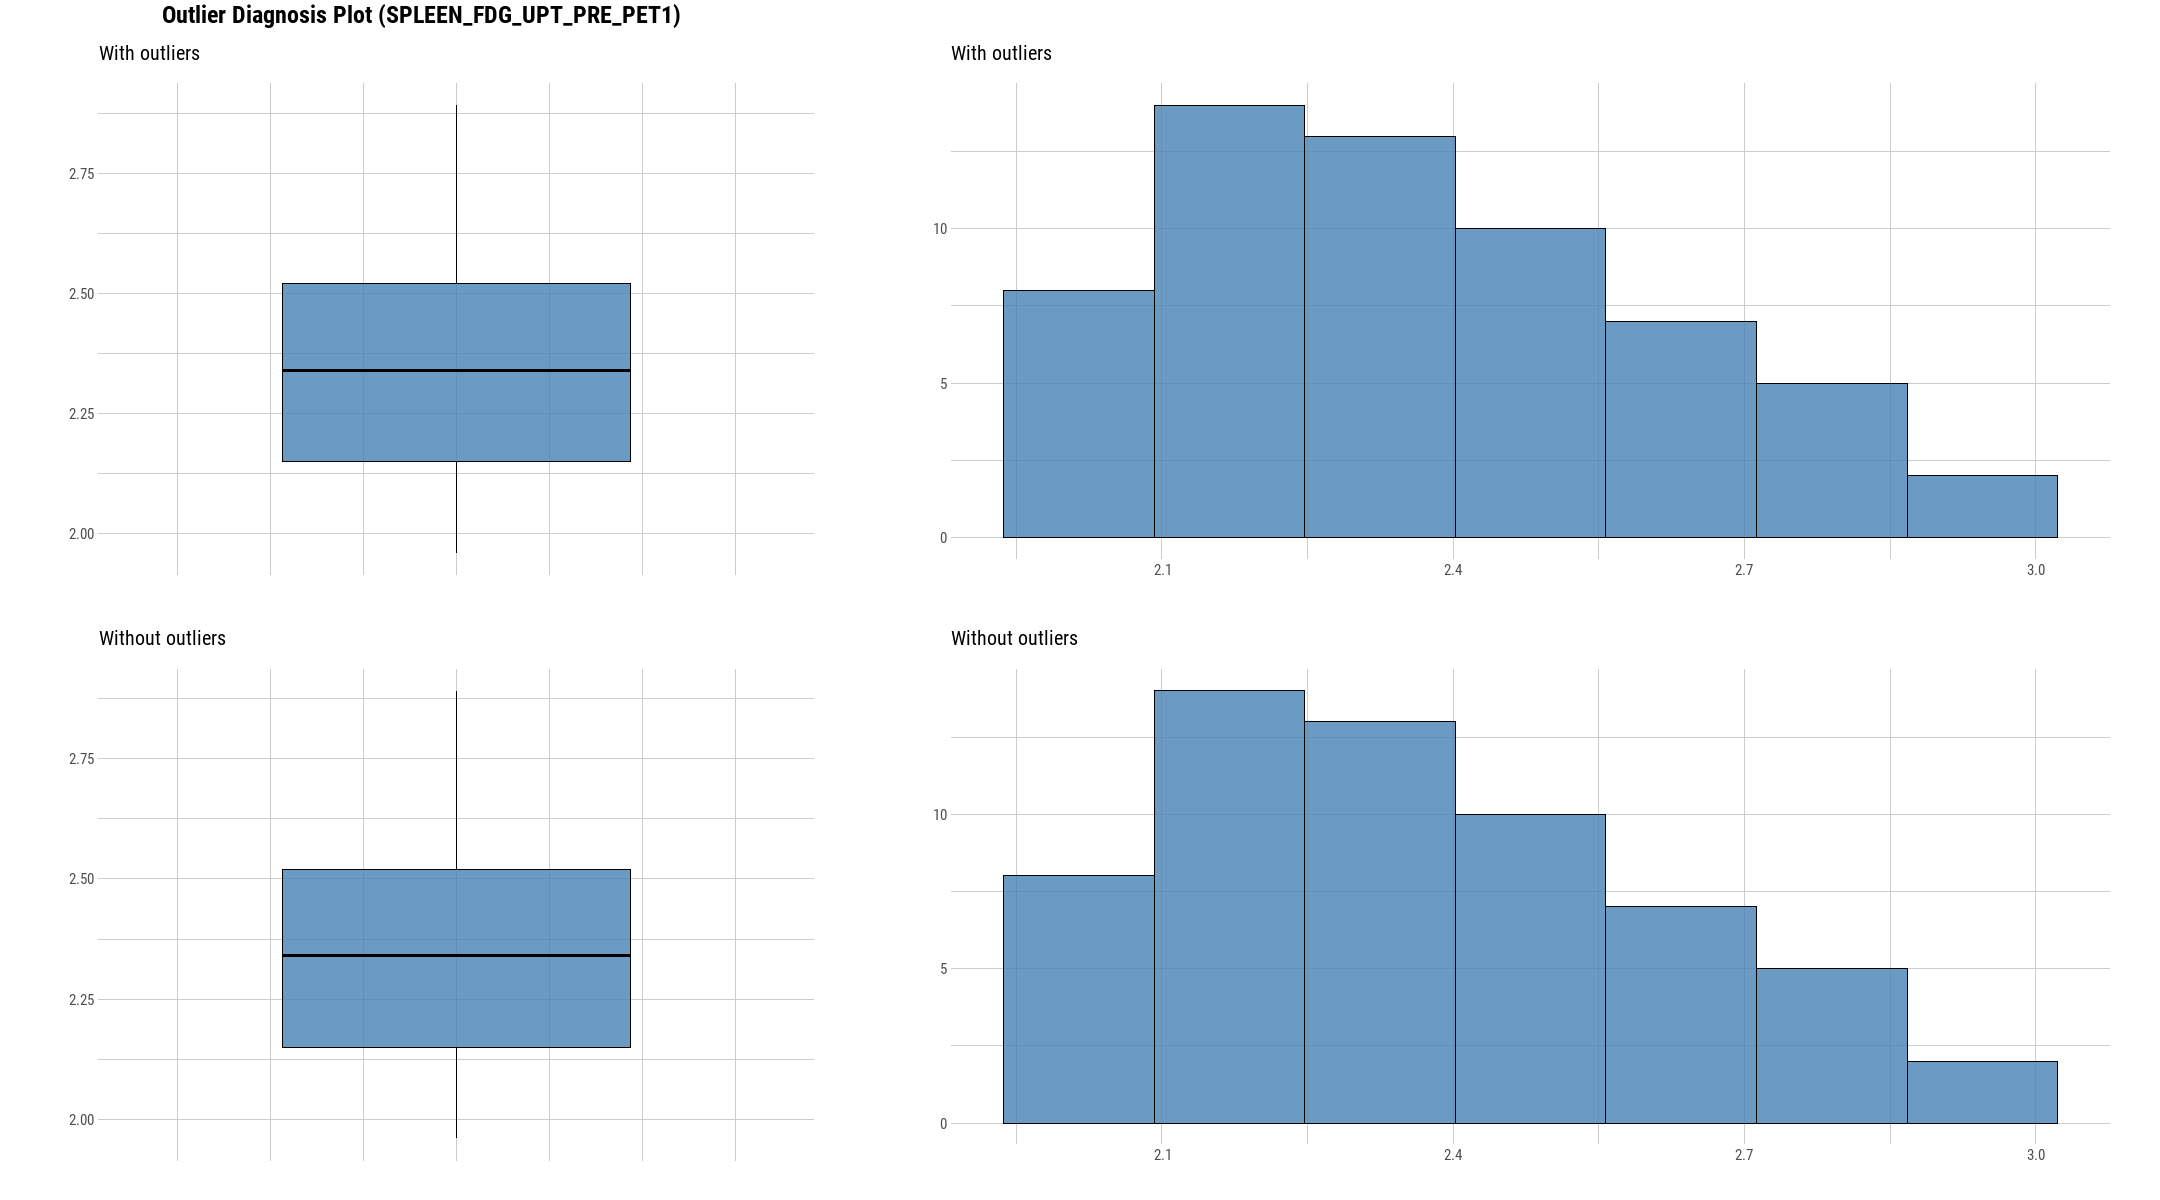

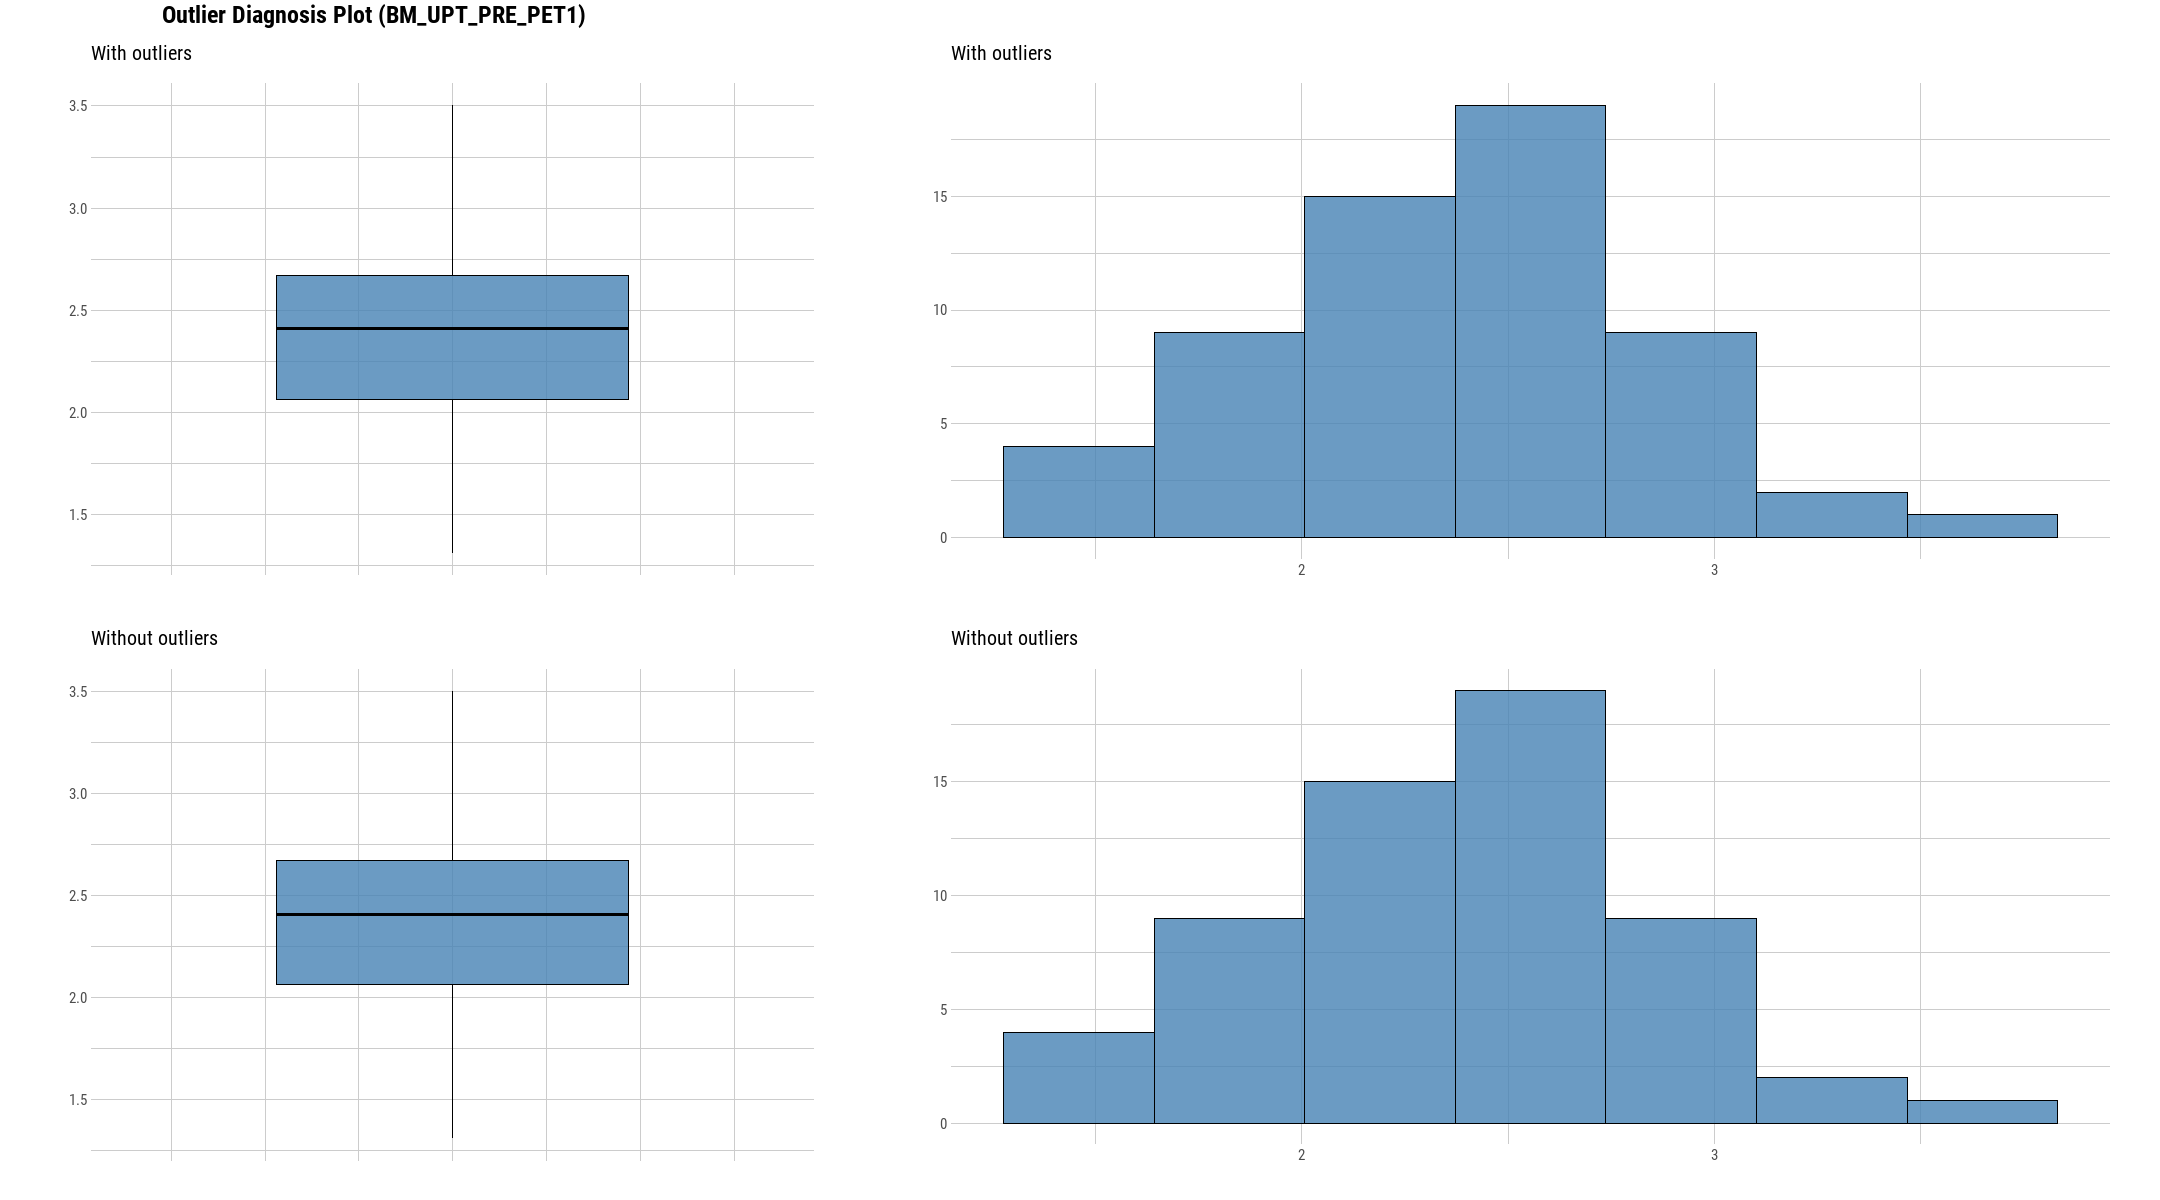

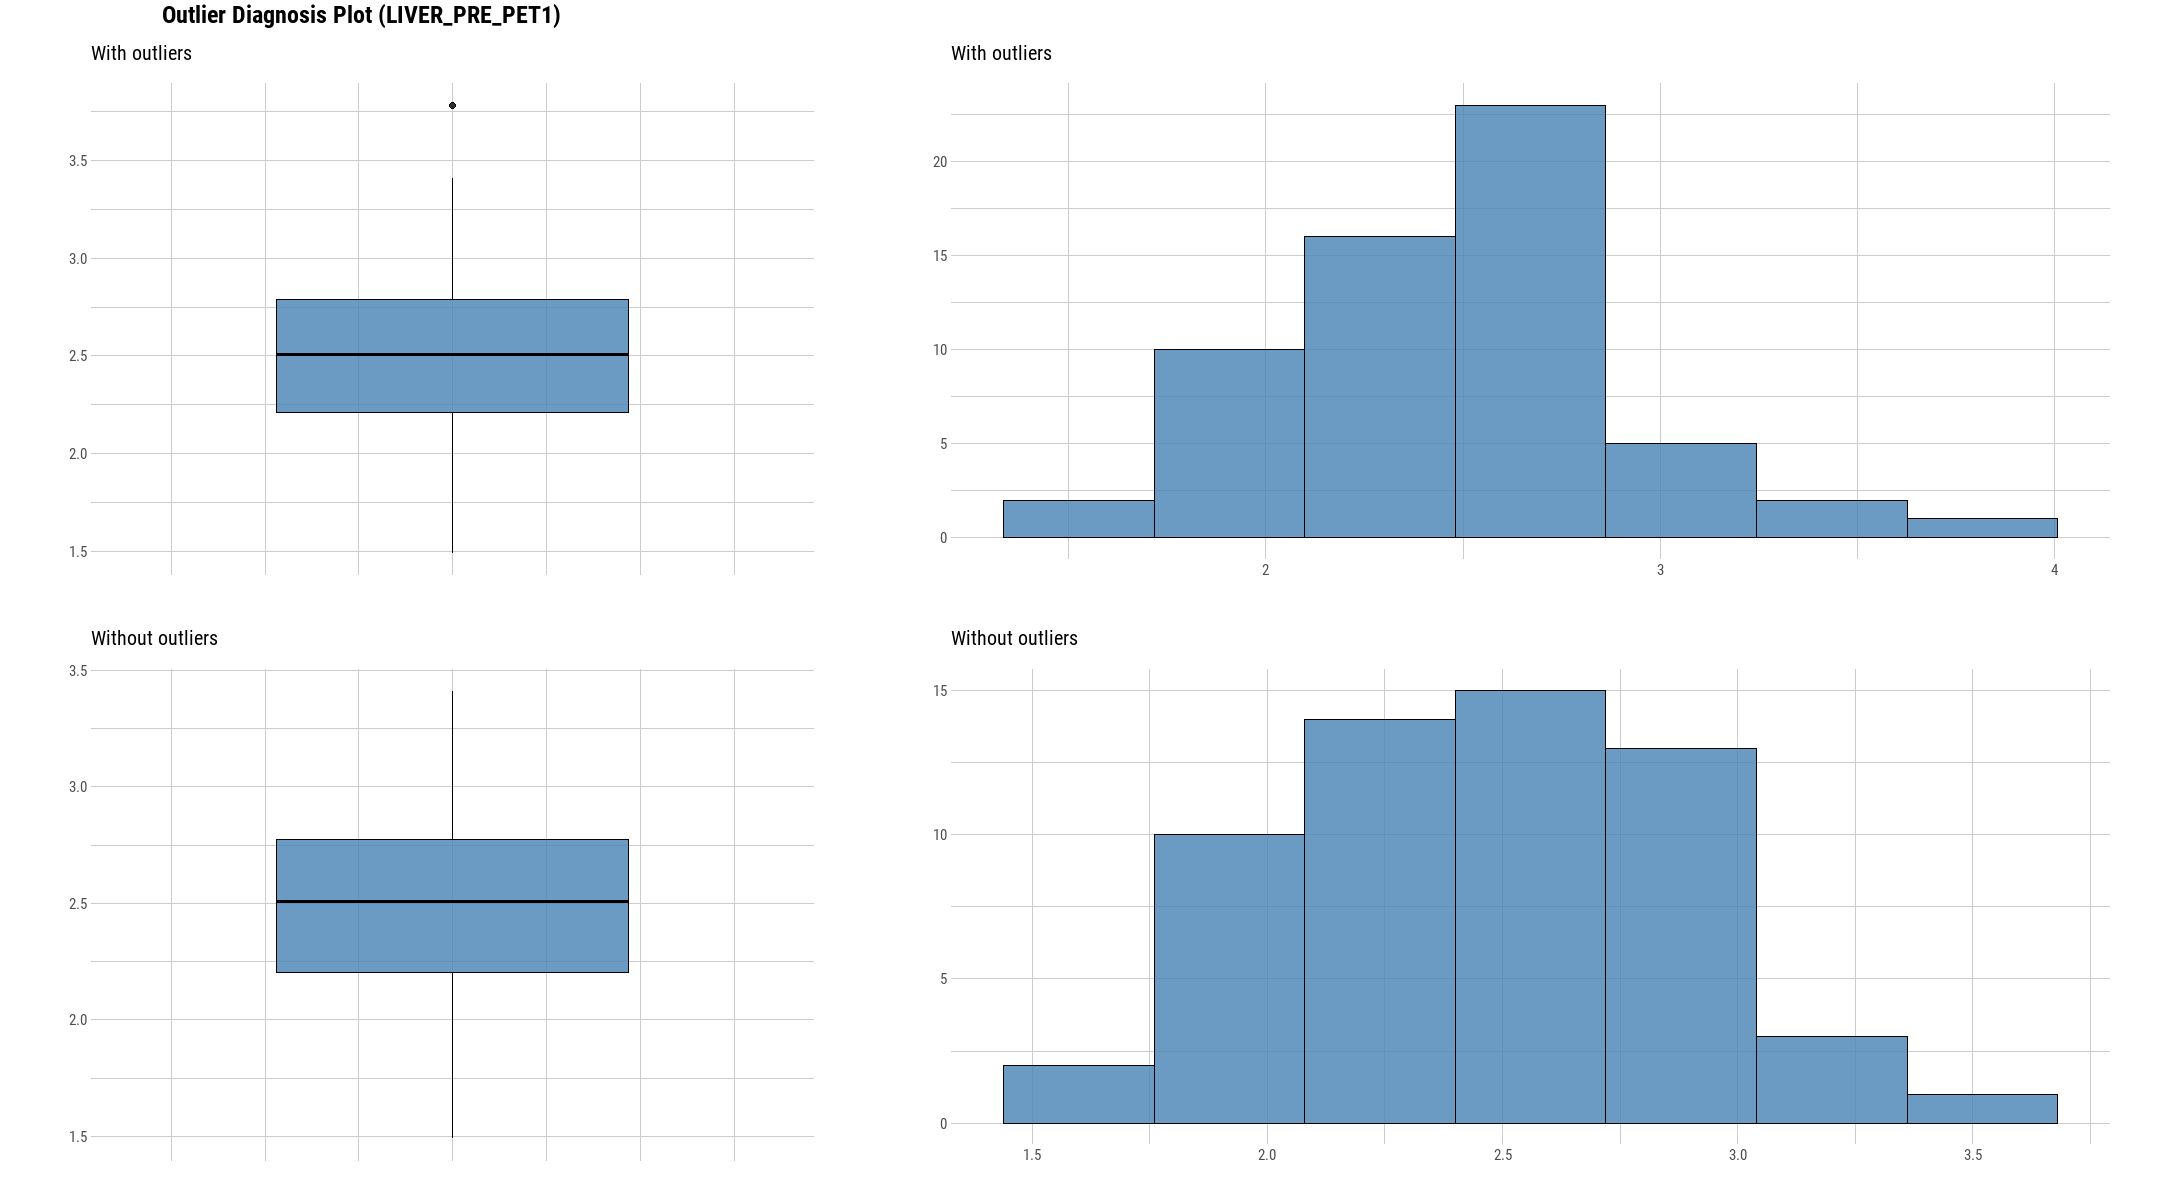

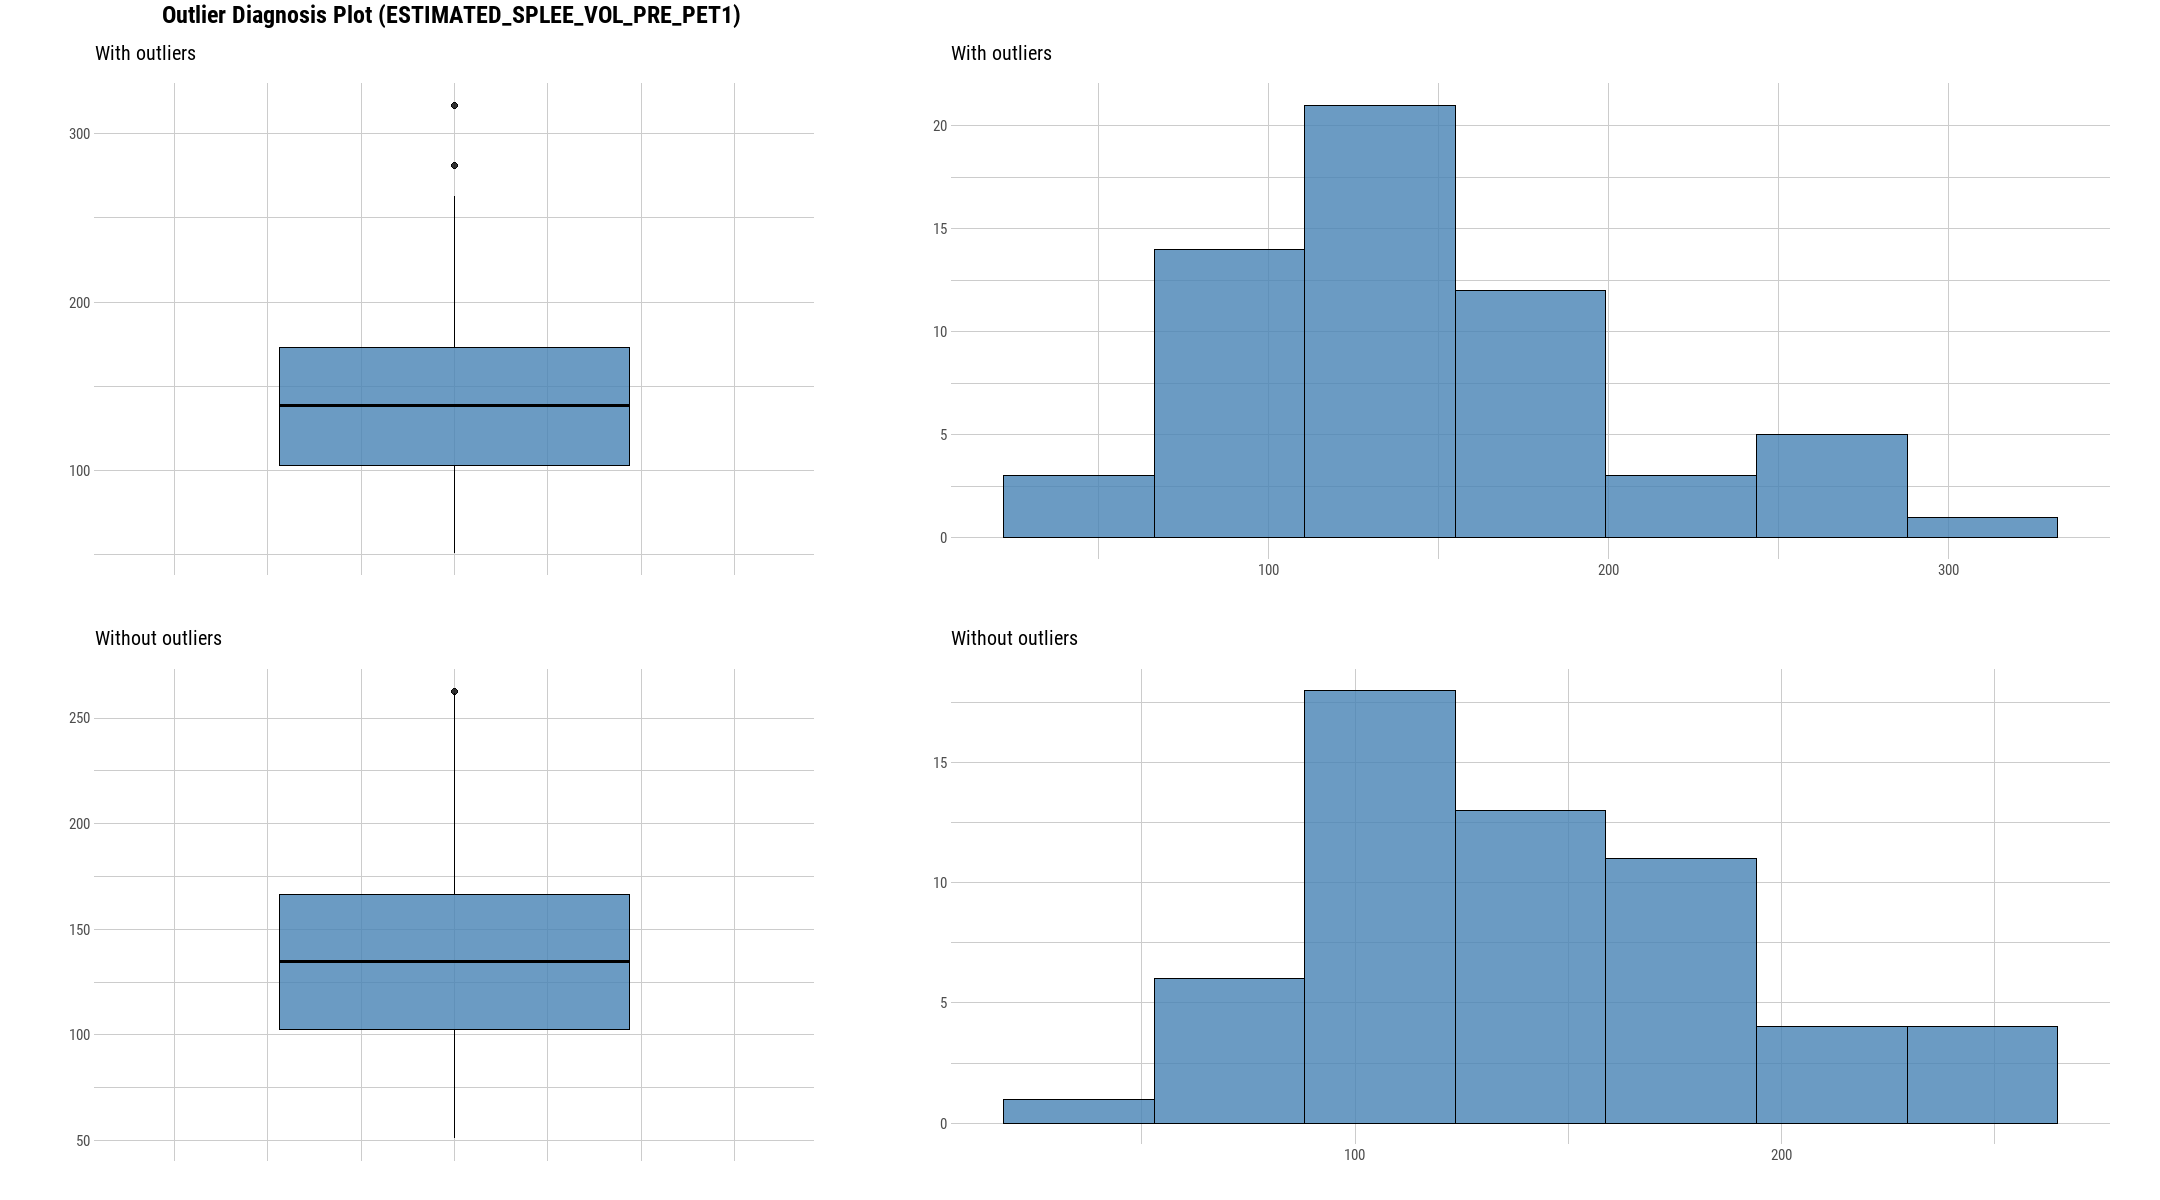

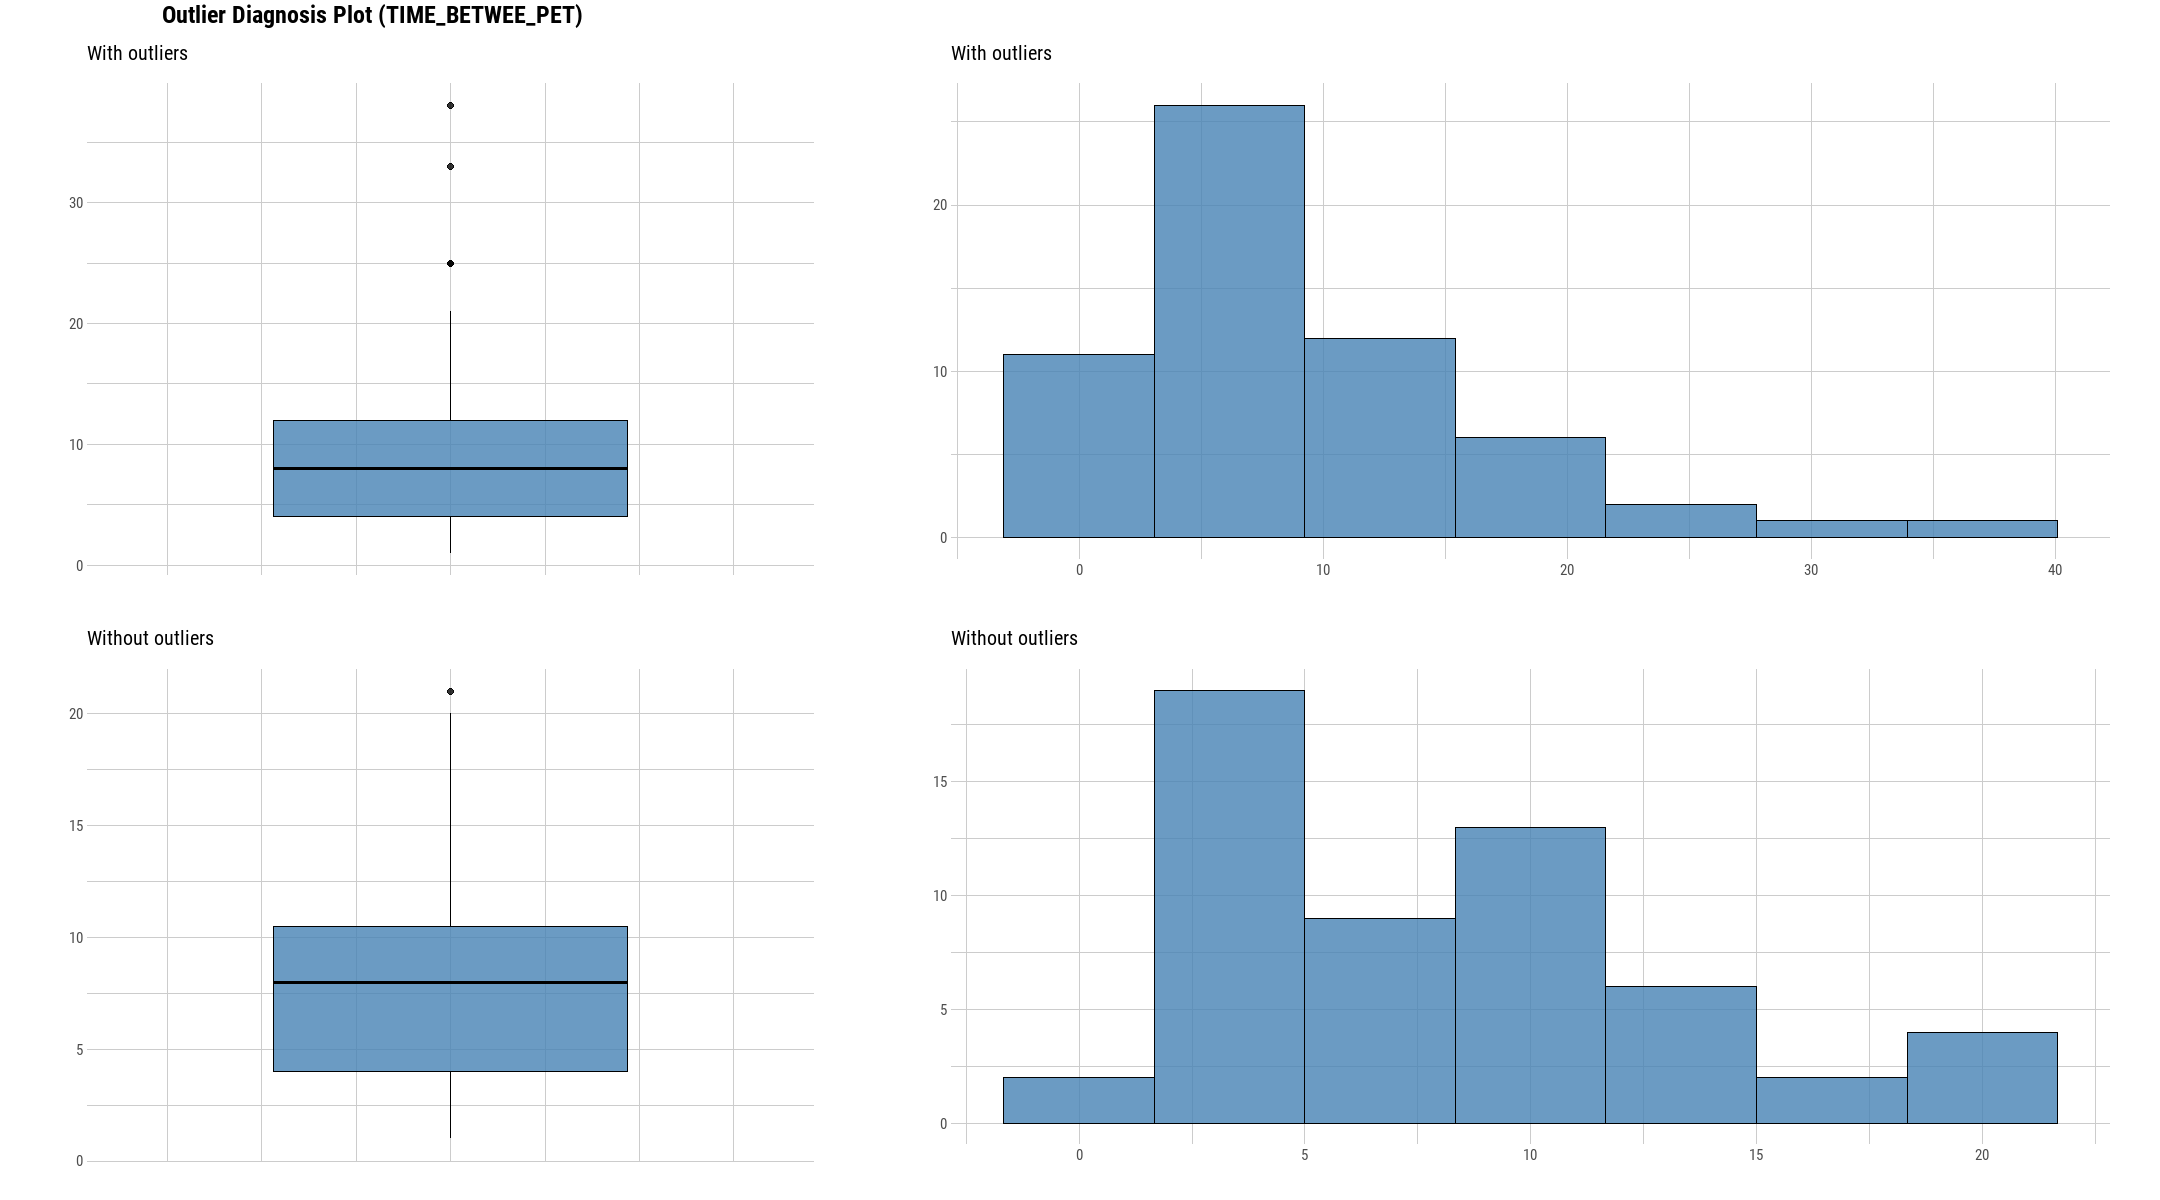

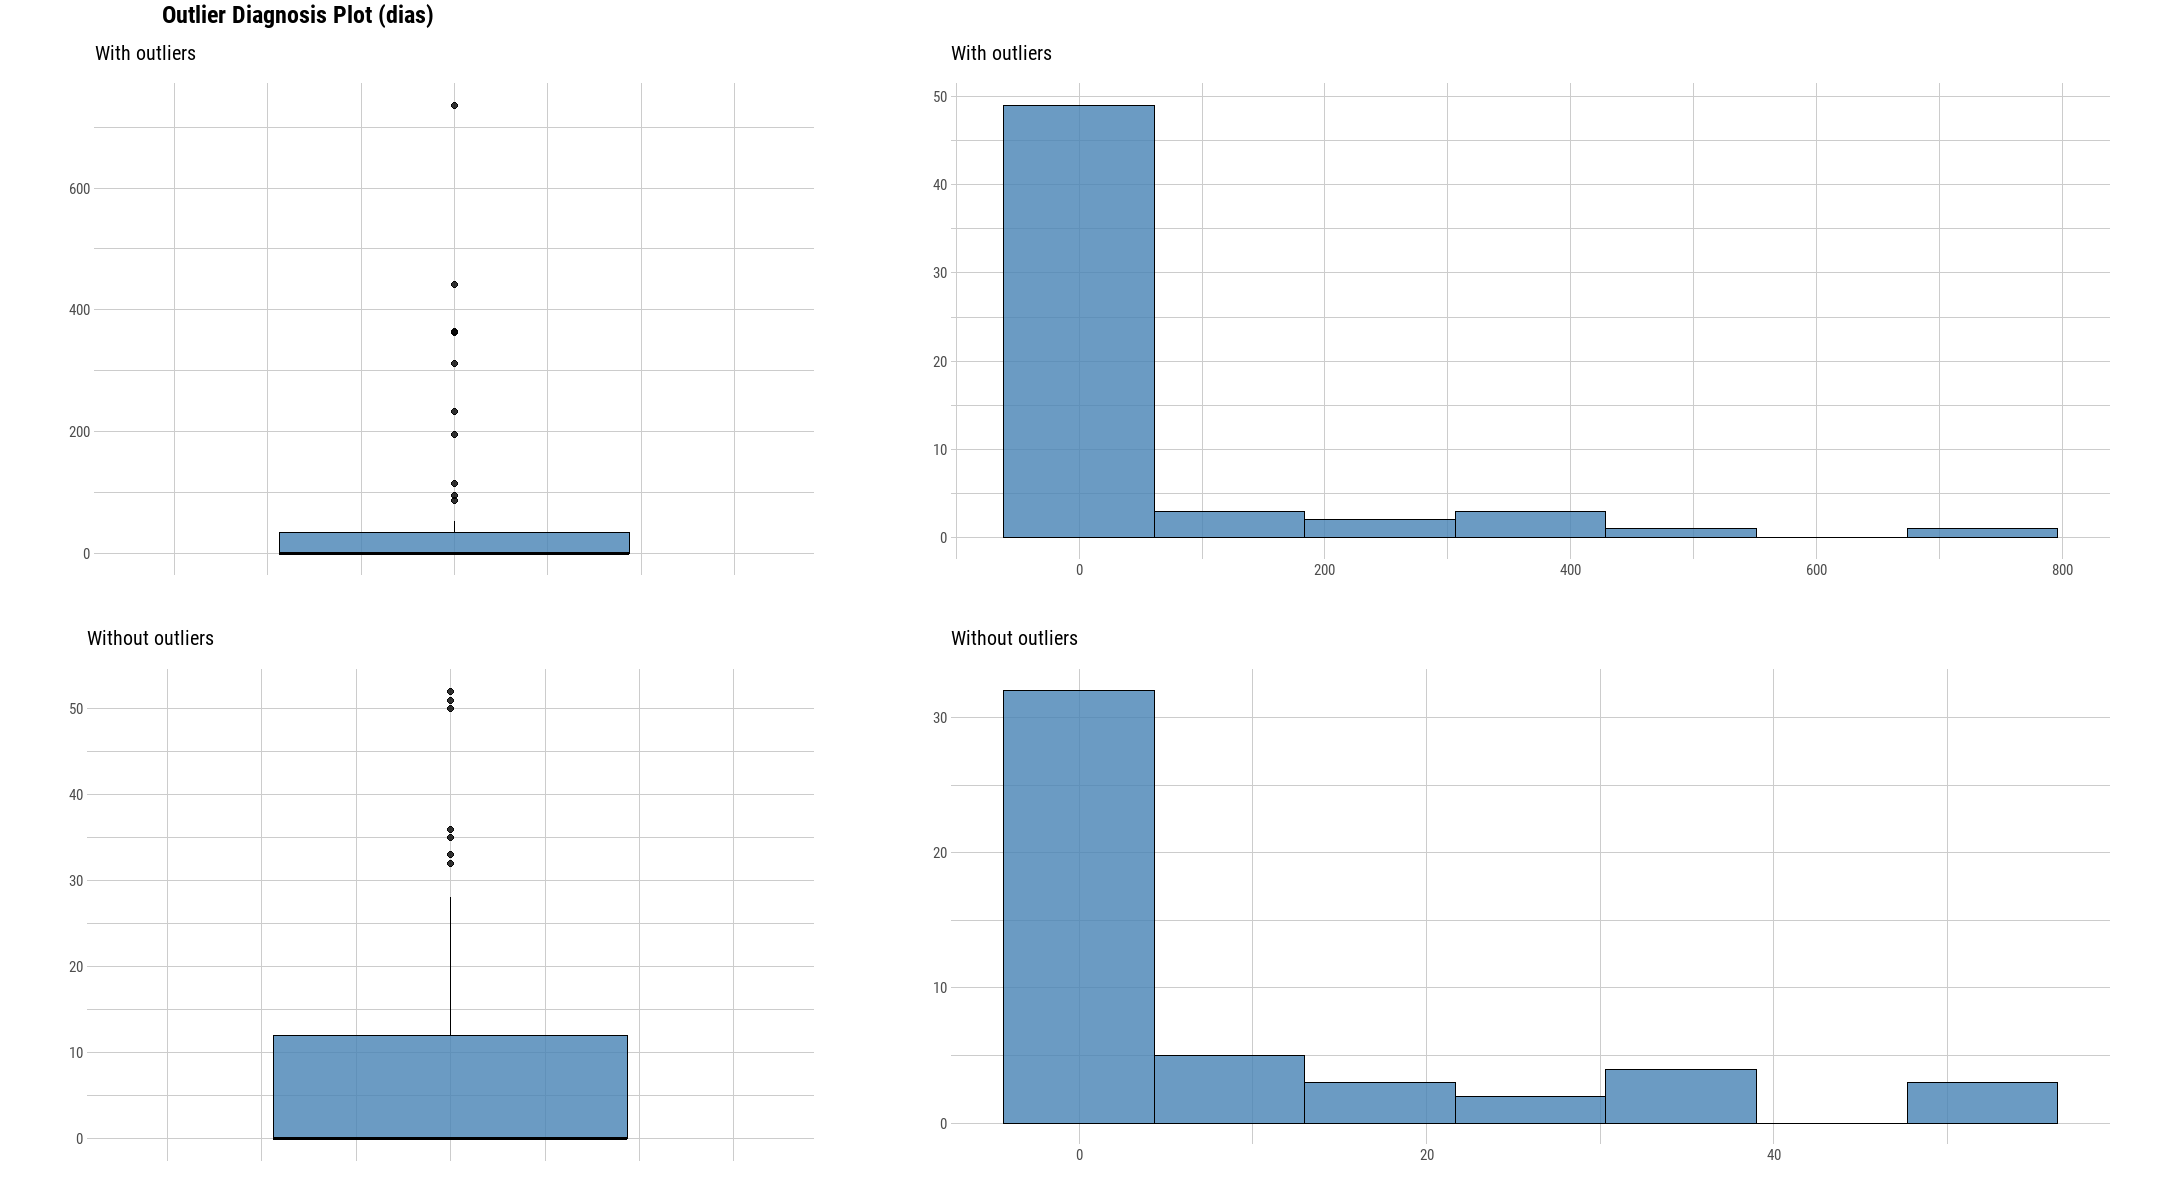

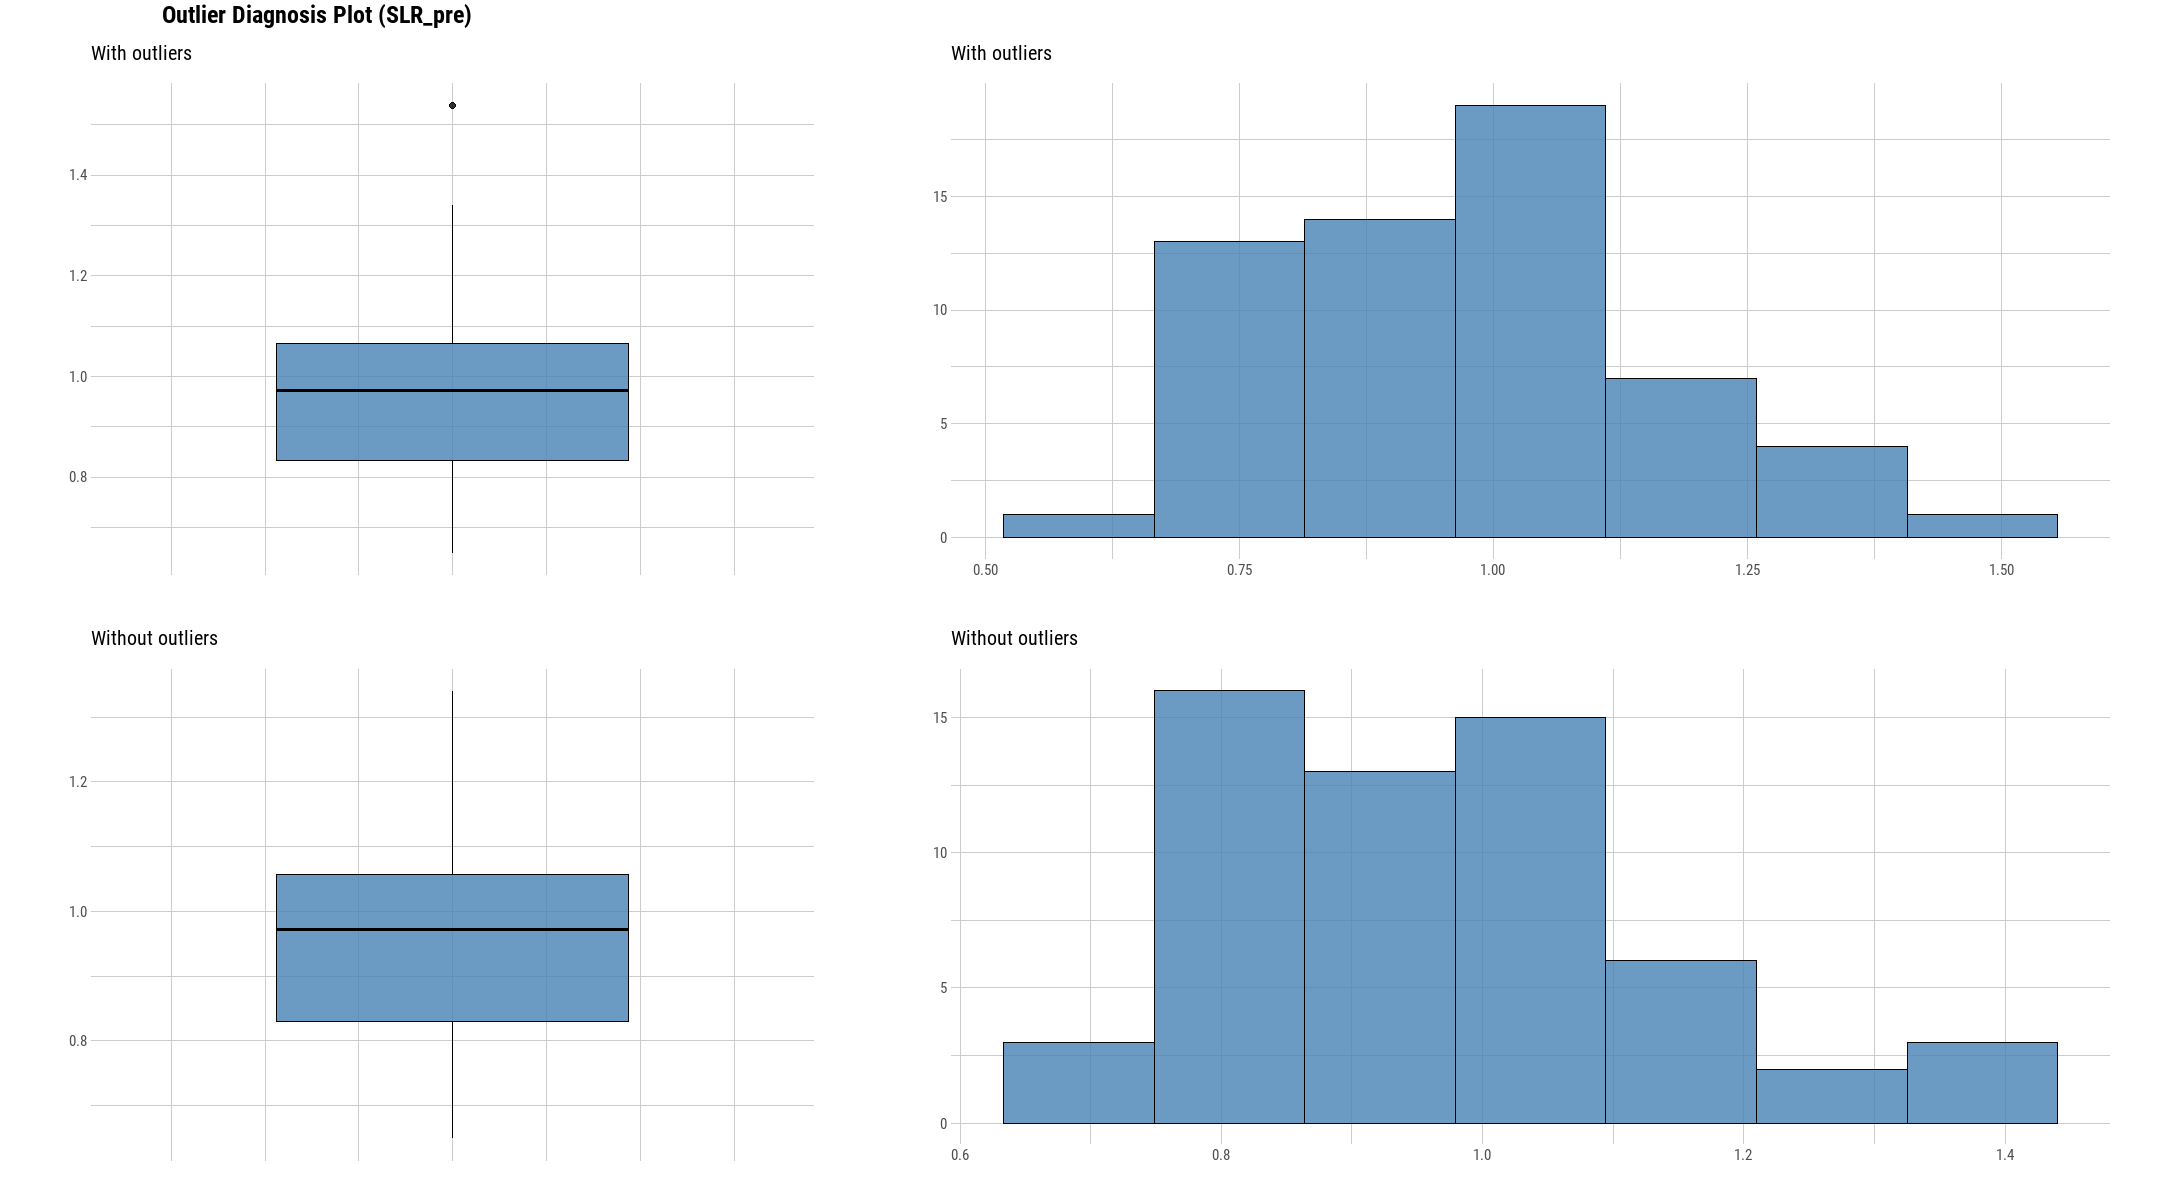

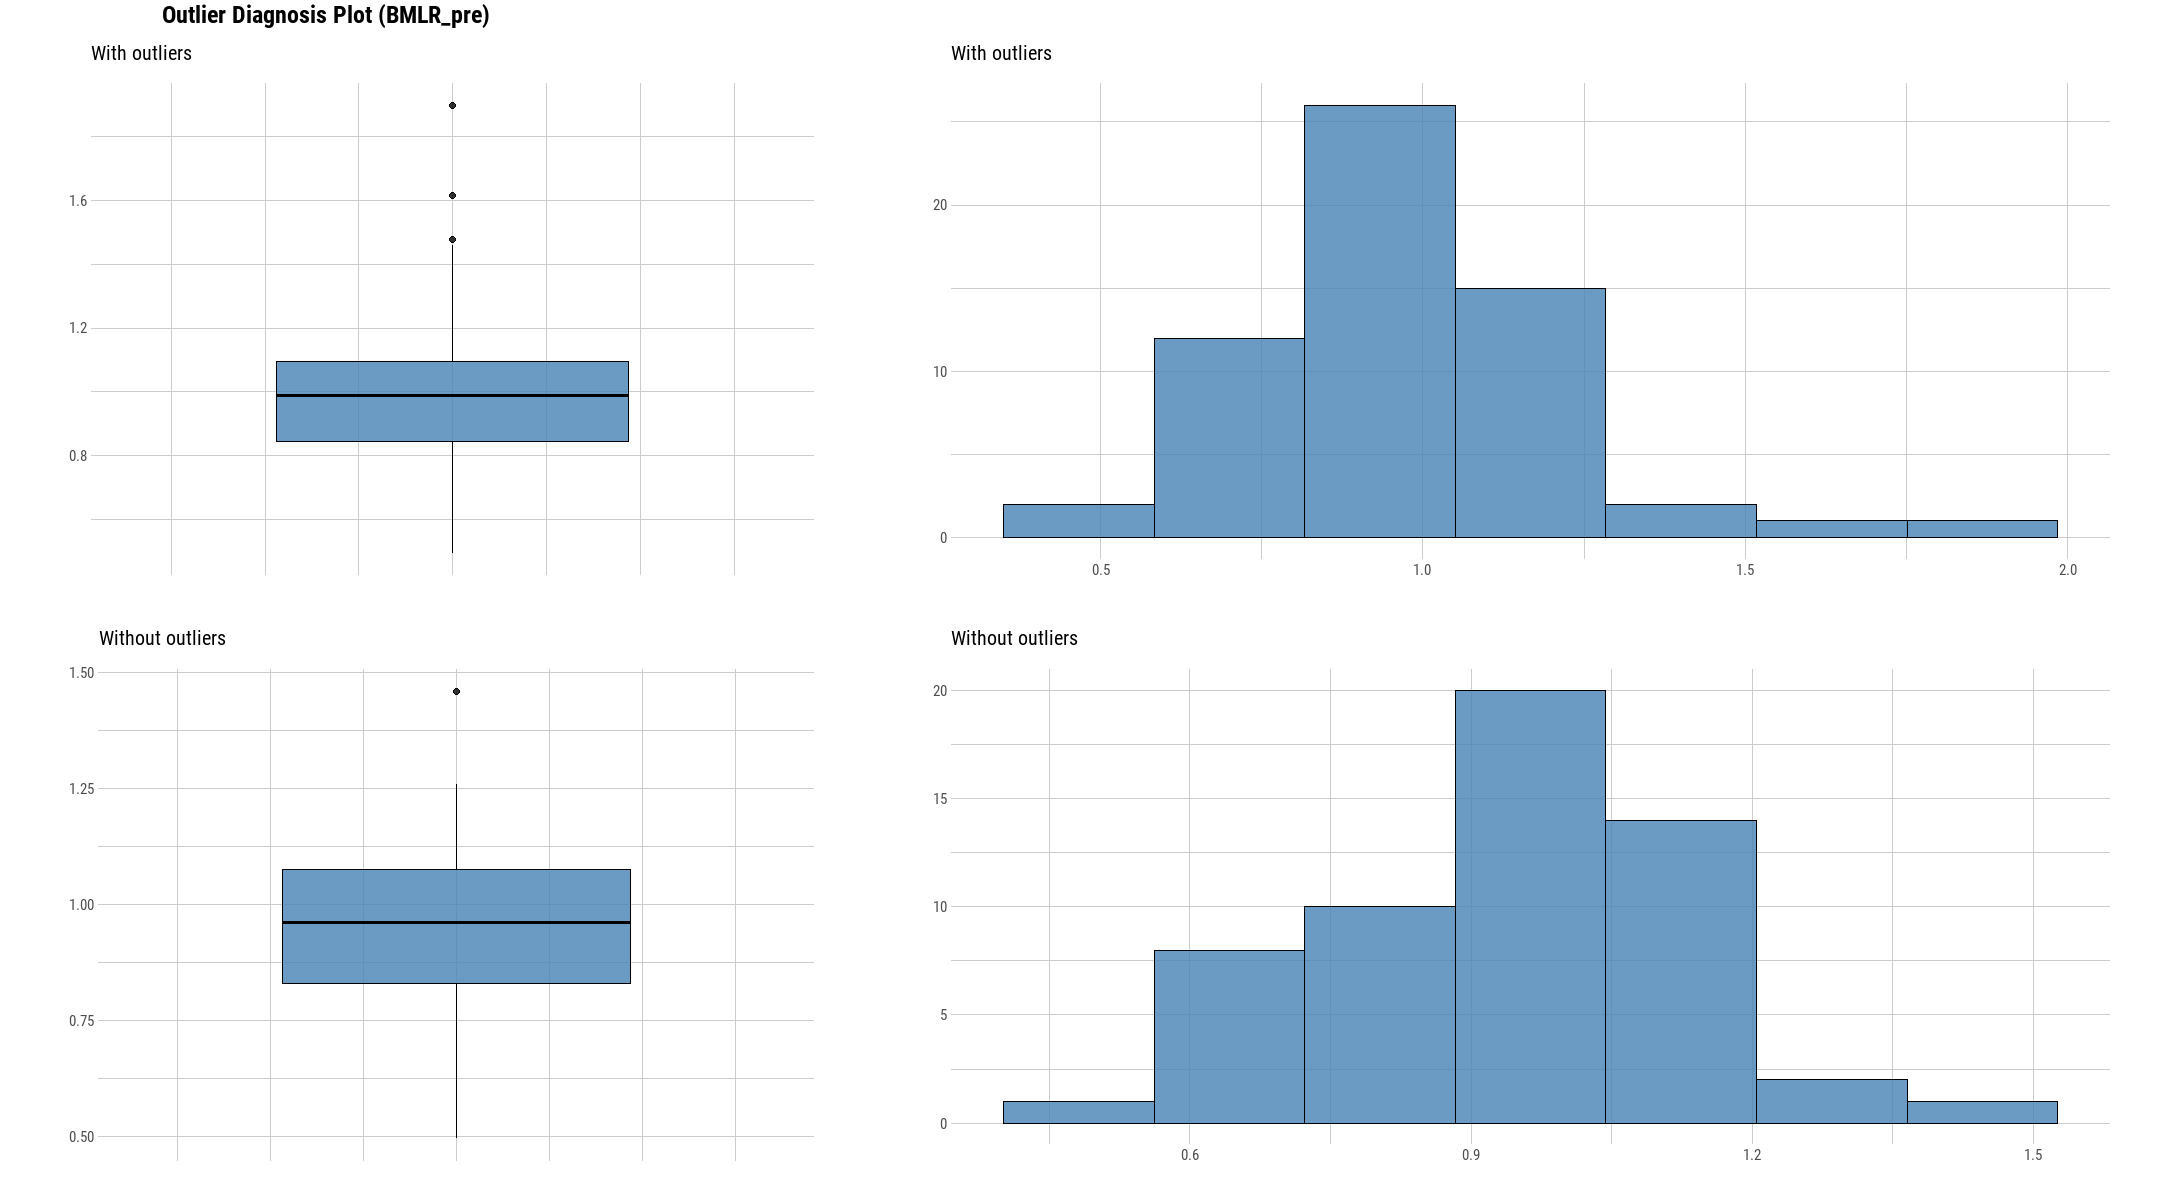

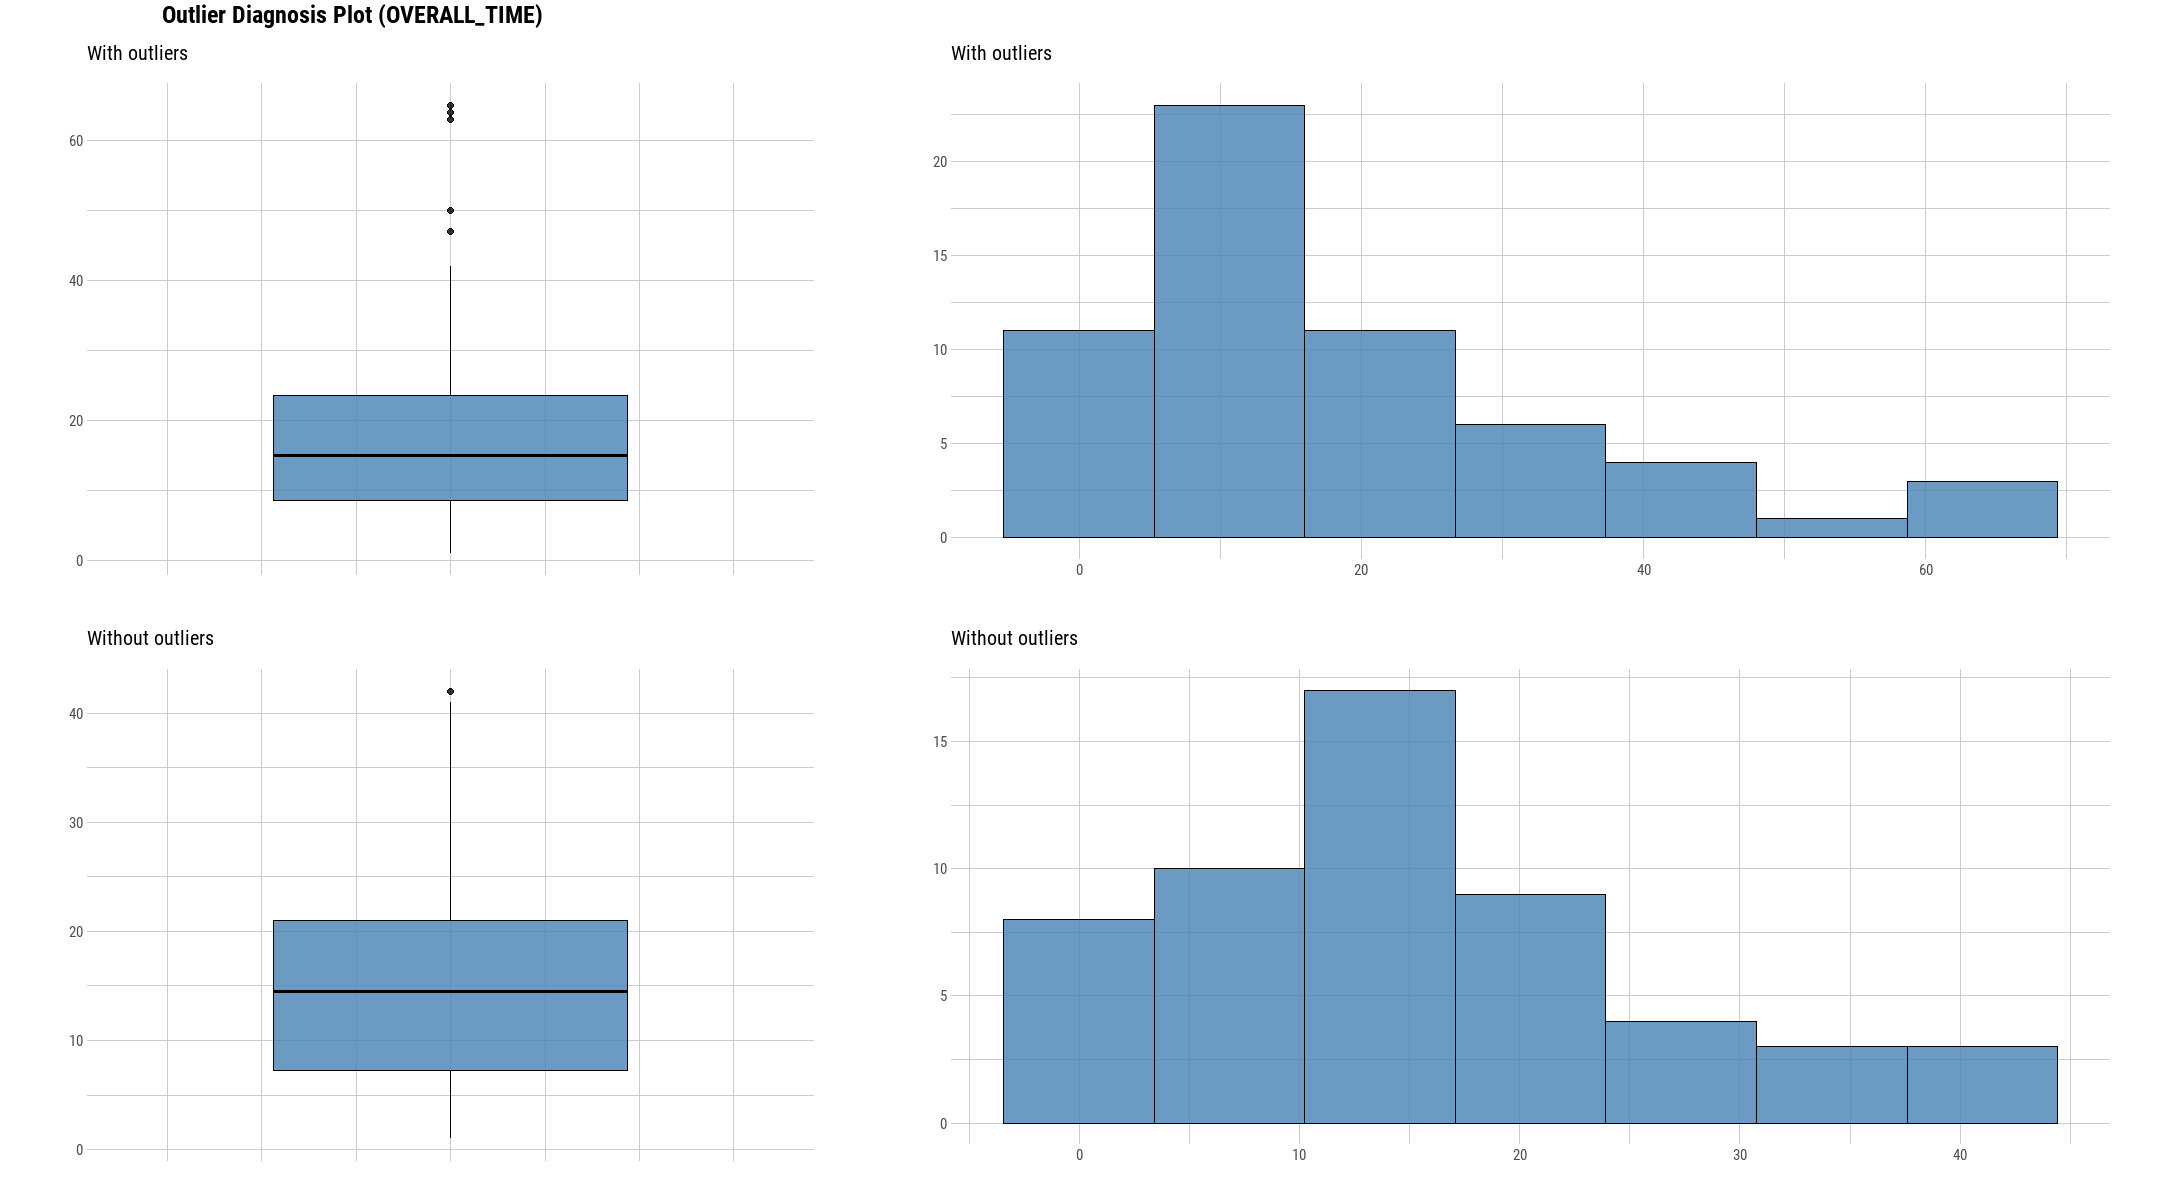

In [1084]:
# Plot analisis de outliers:
plot_outlier(datos)

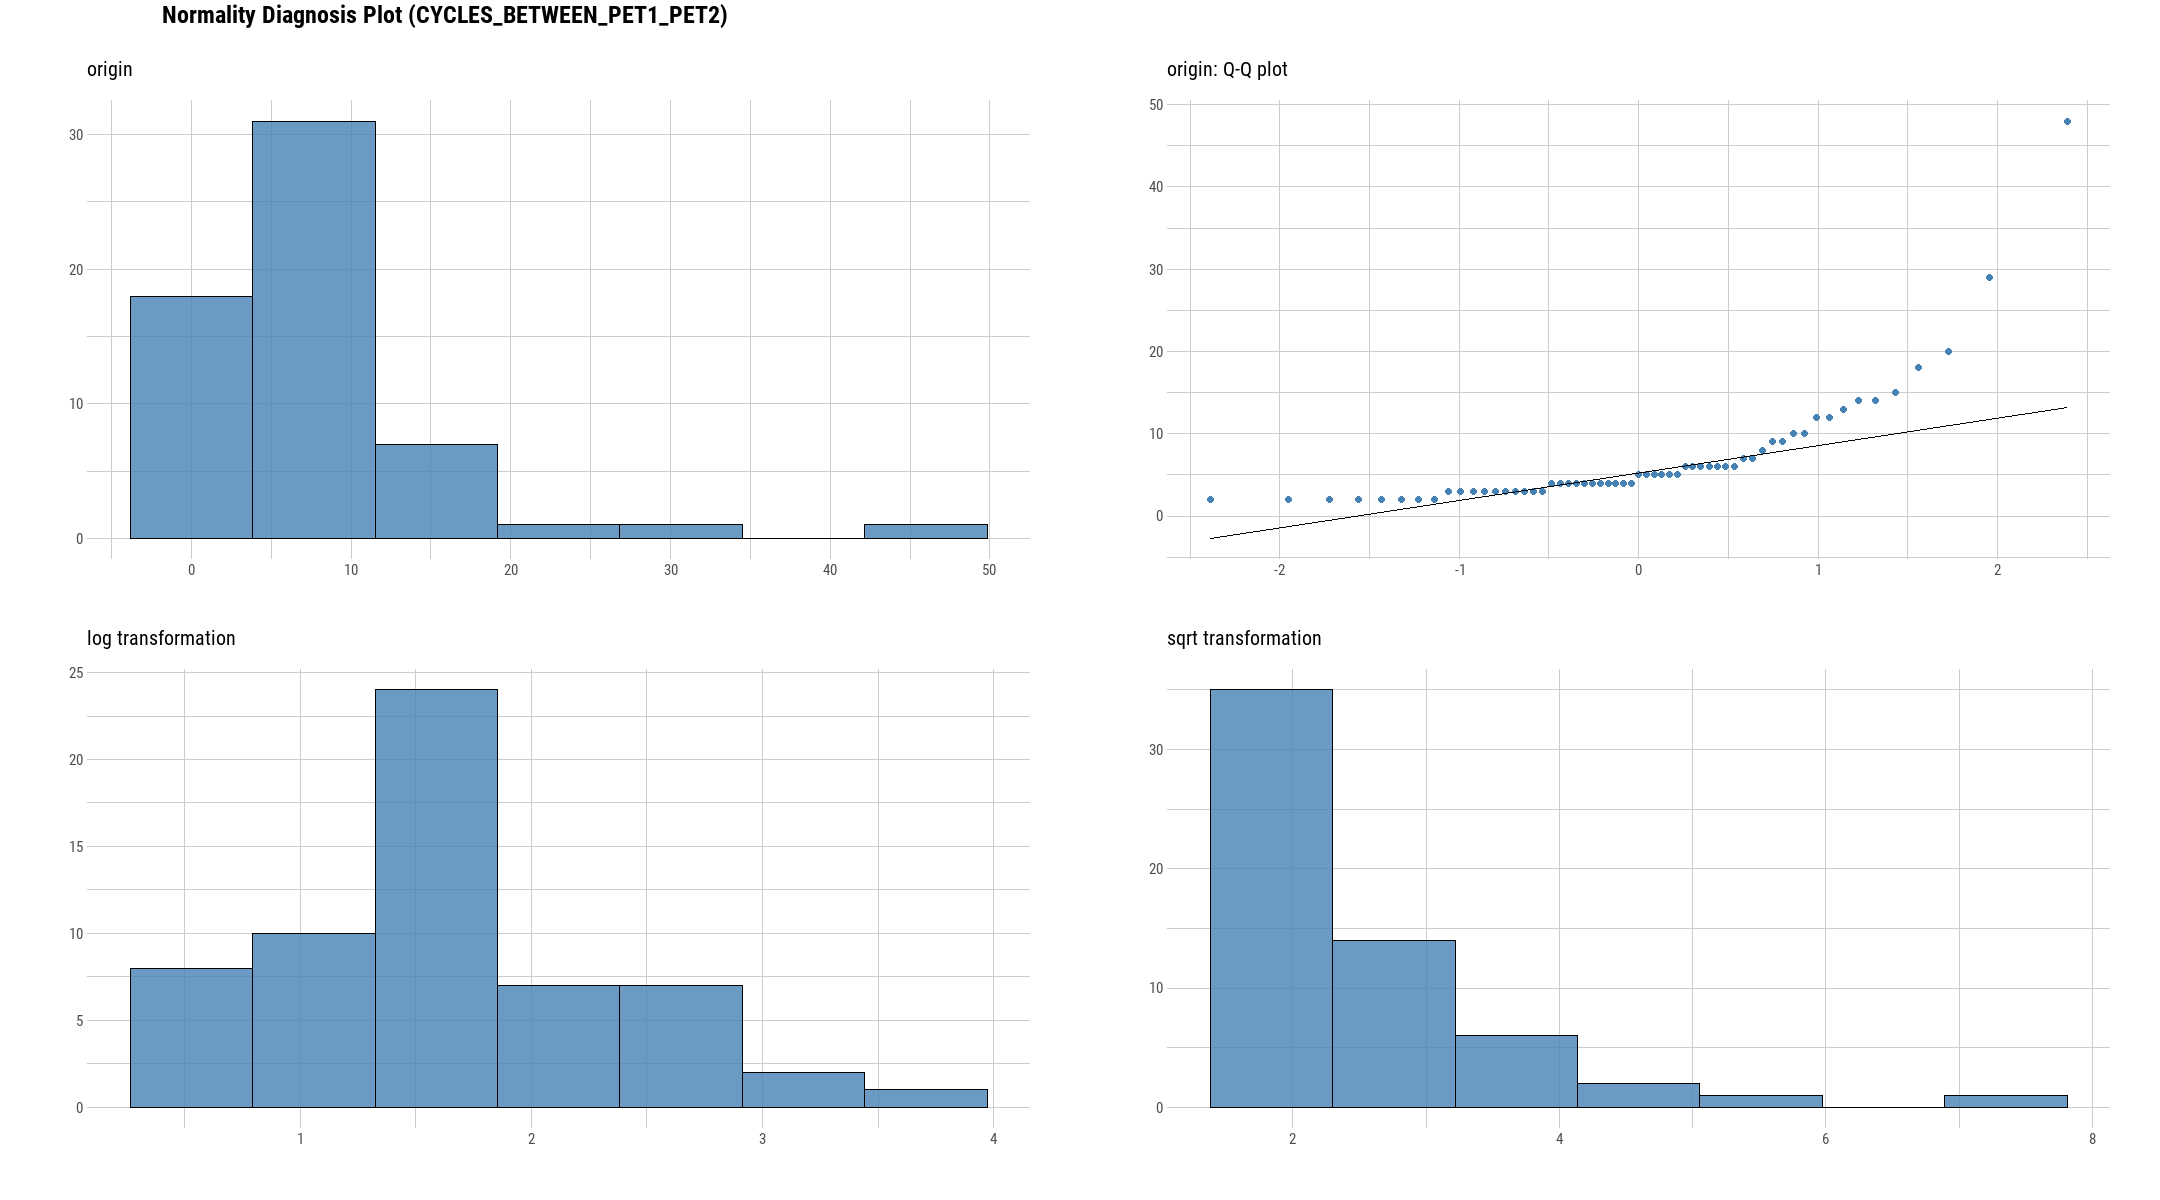

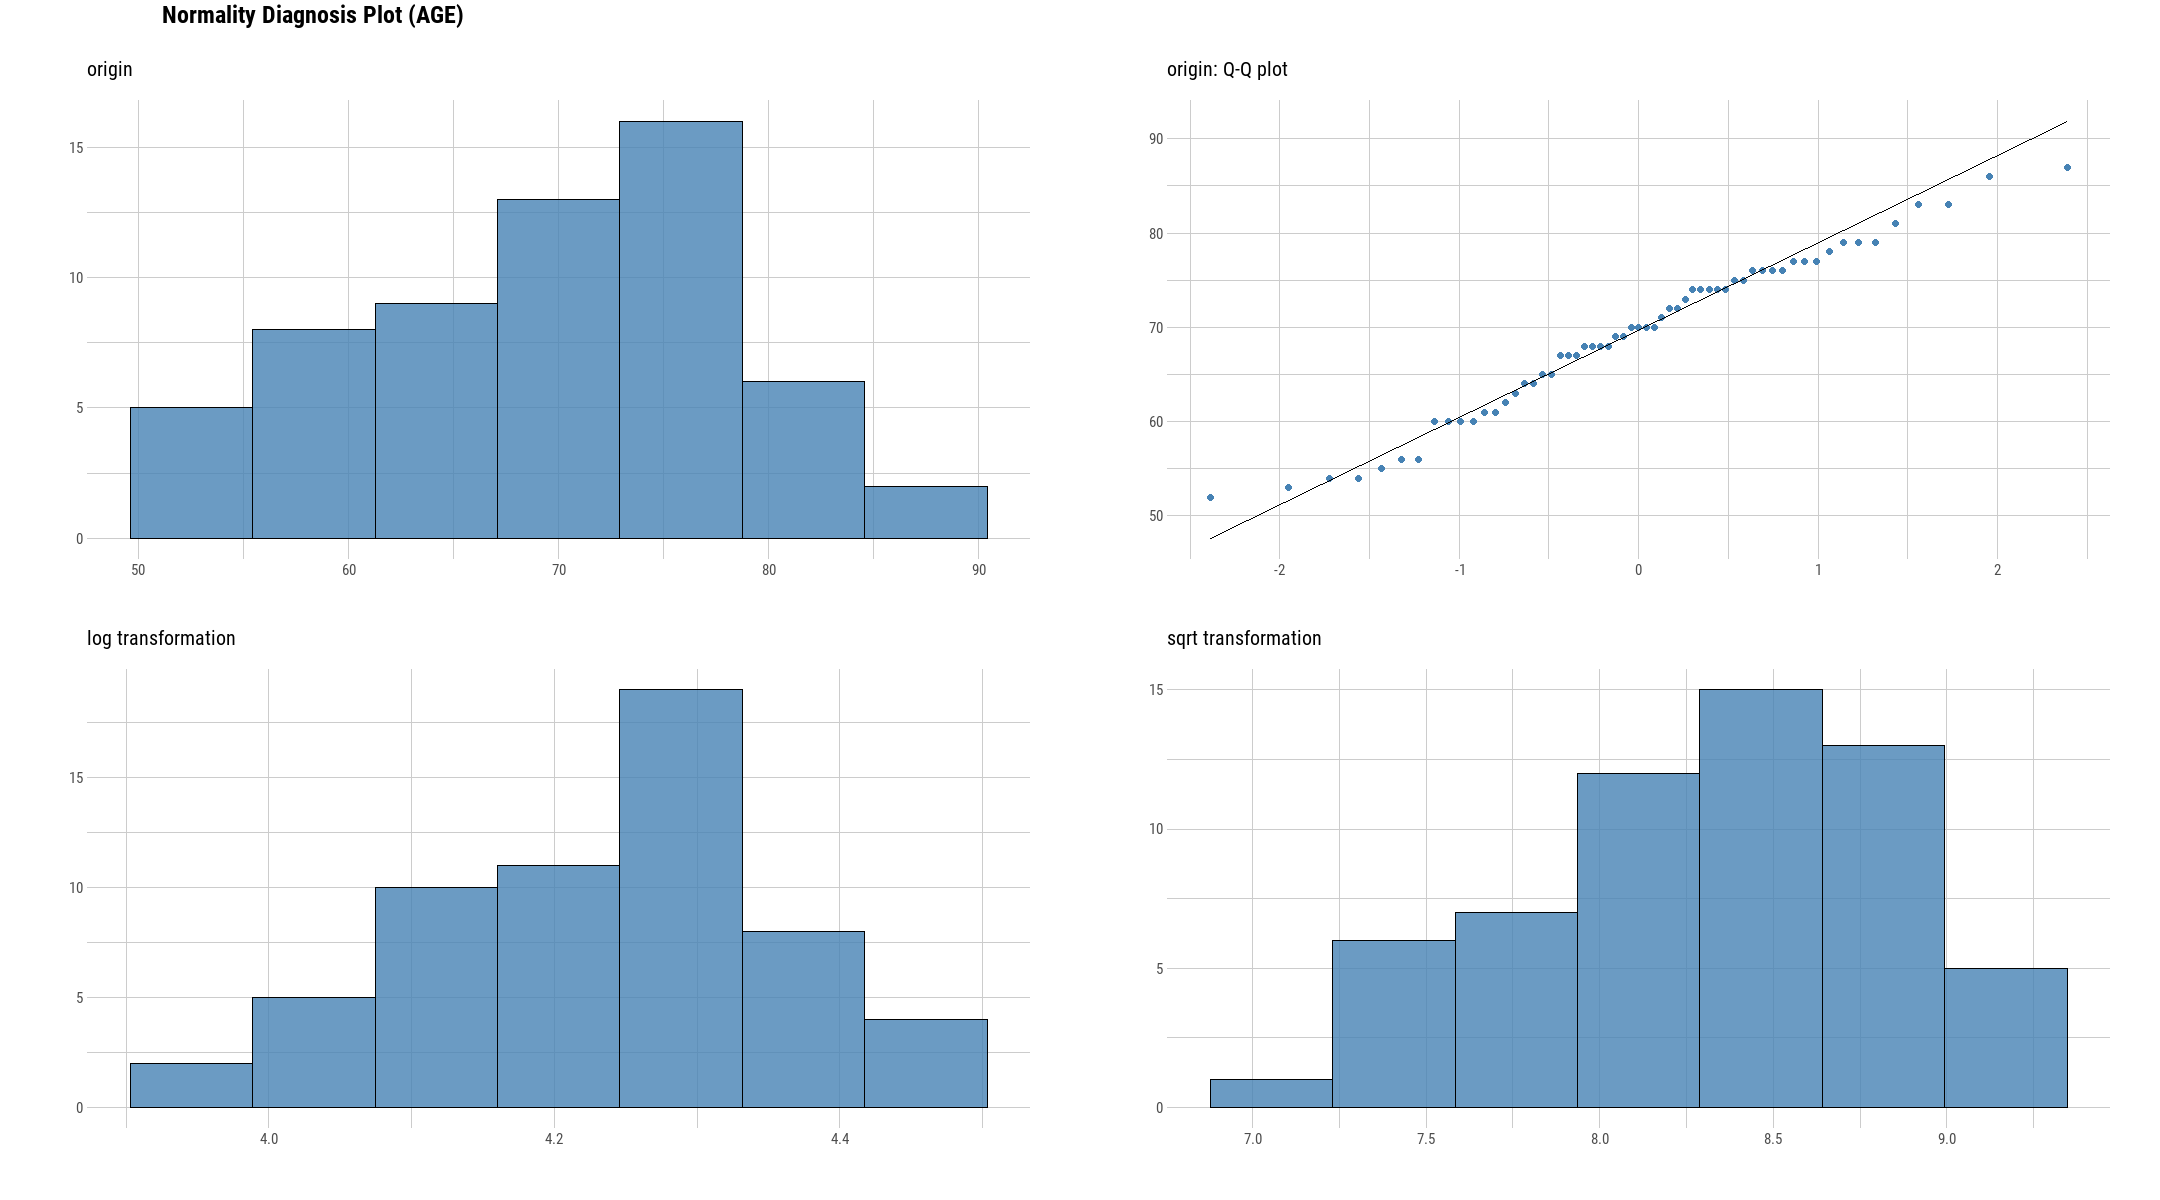

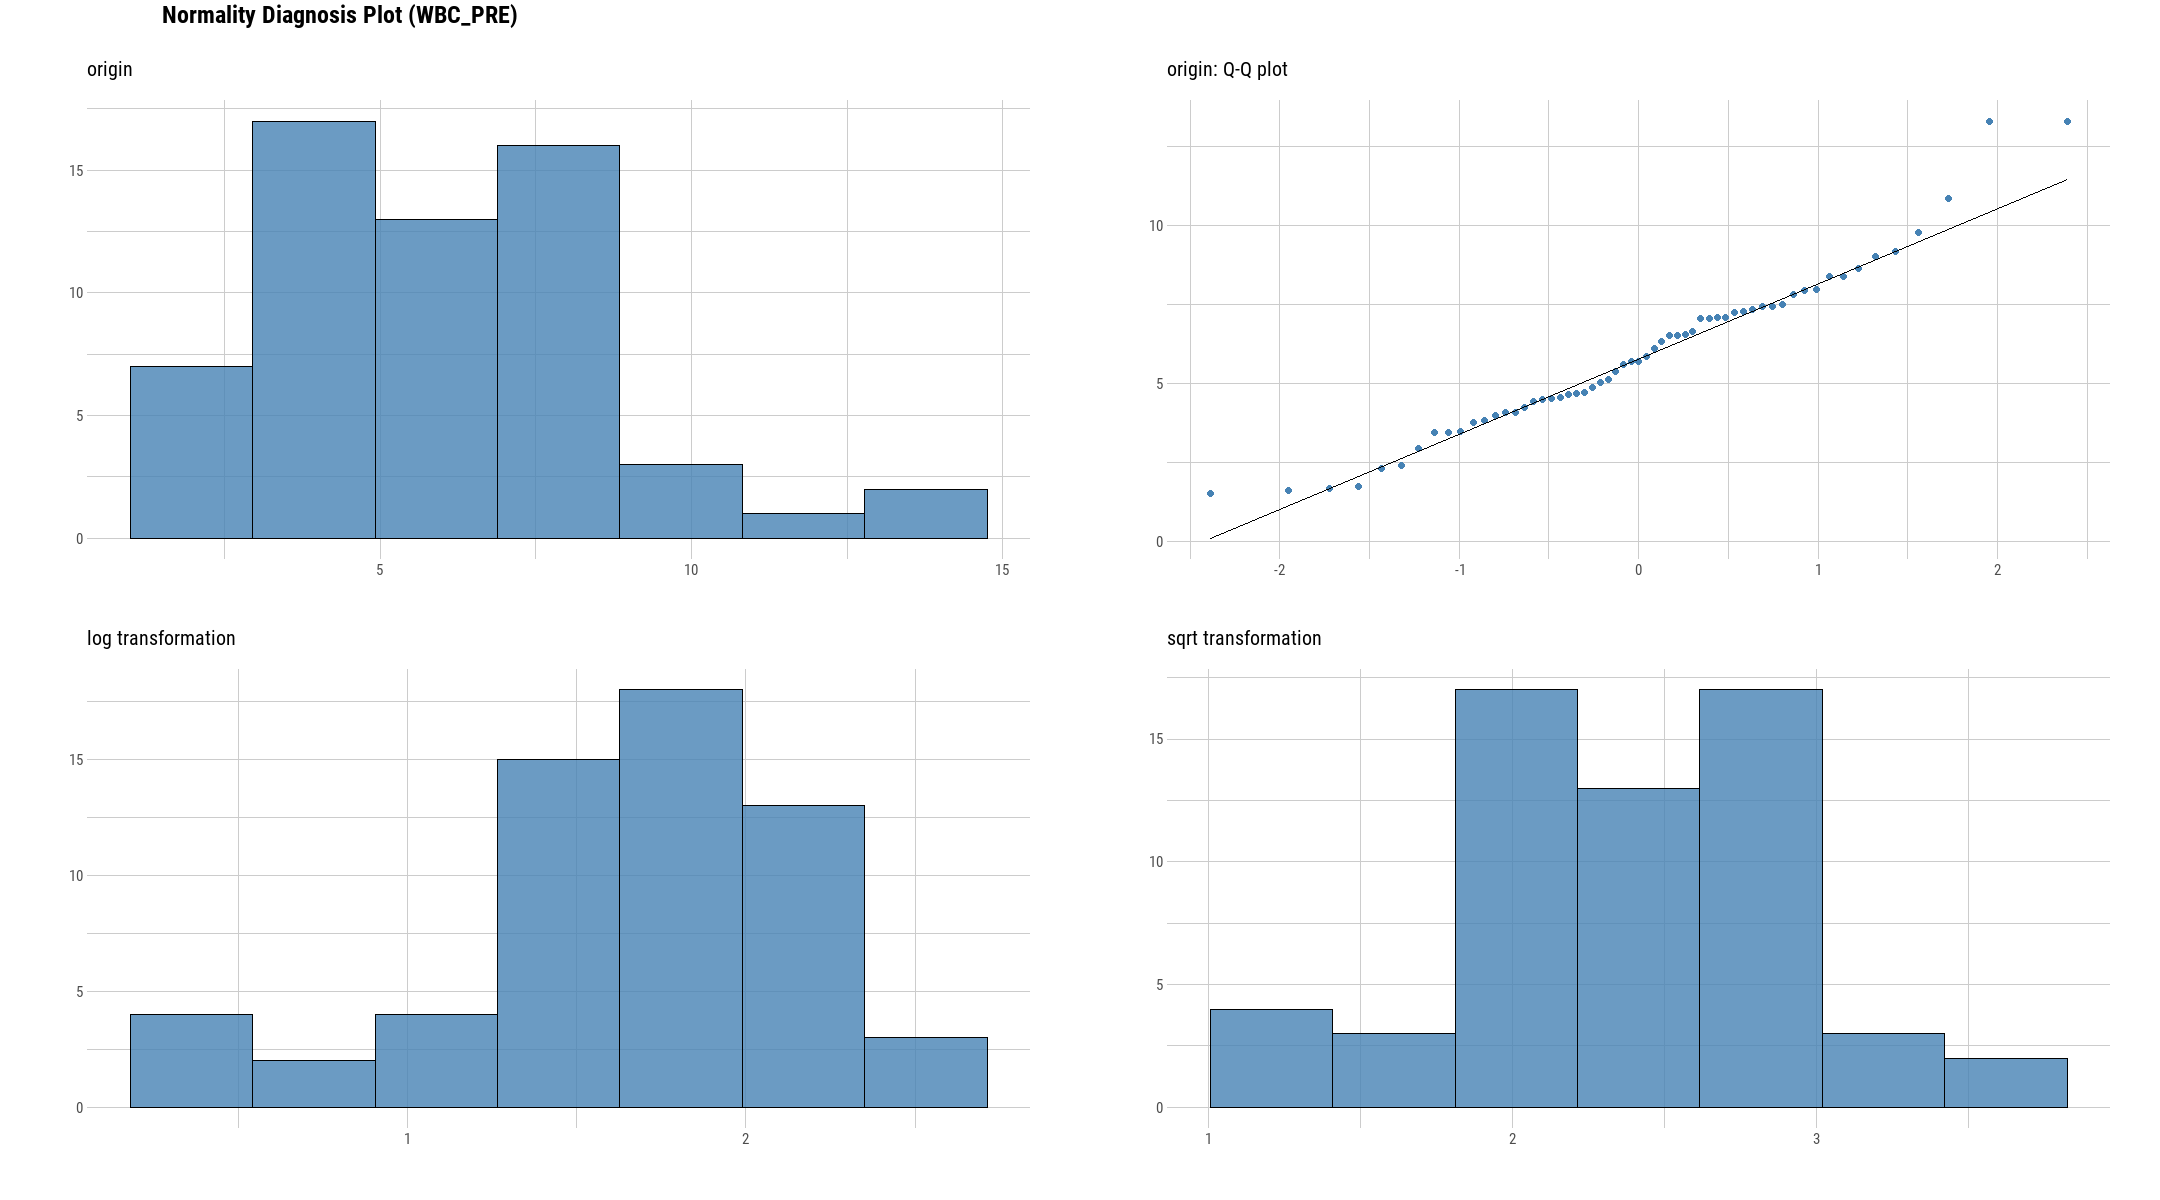

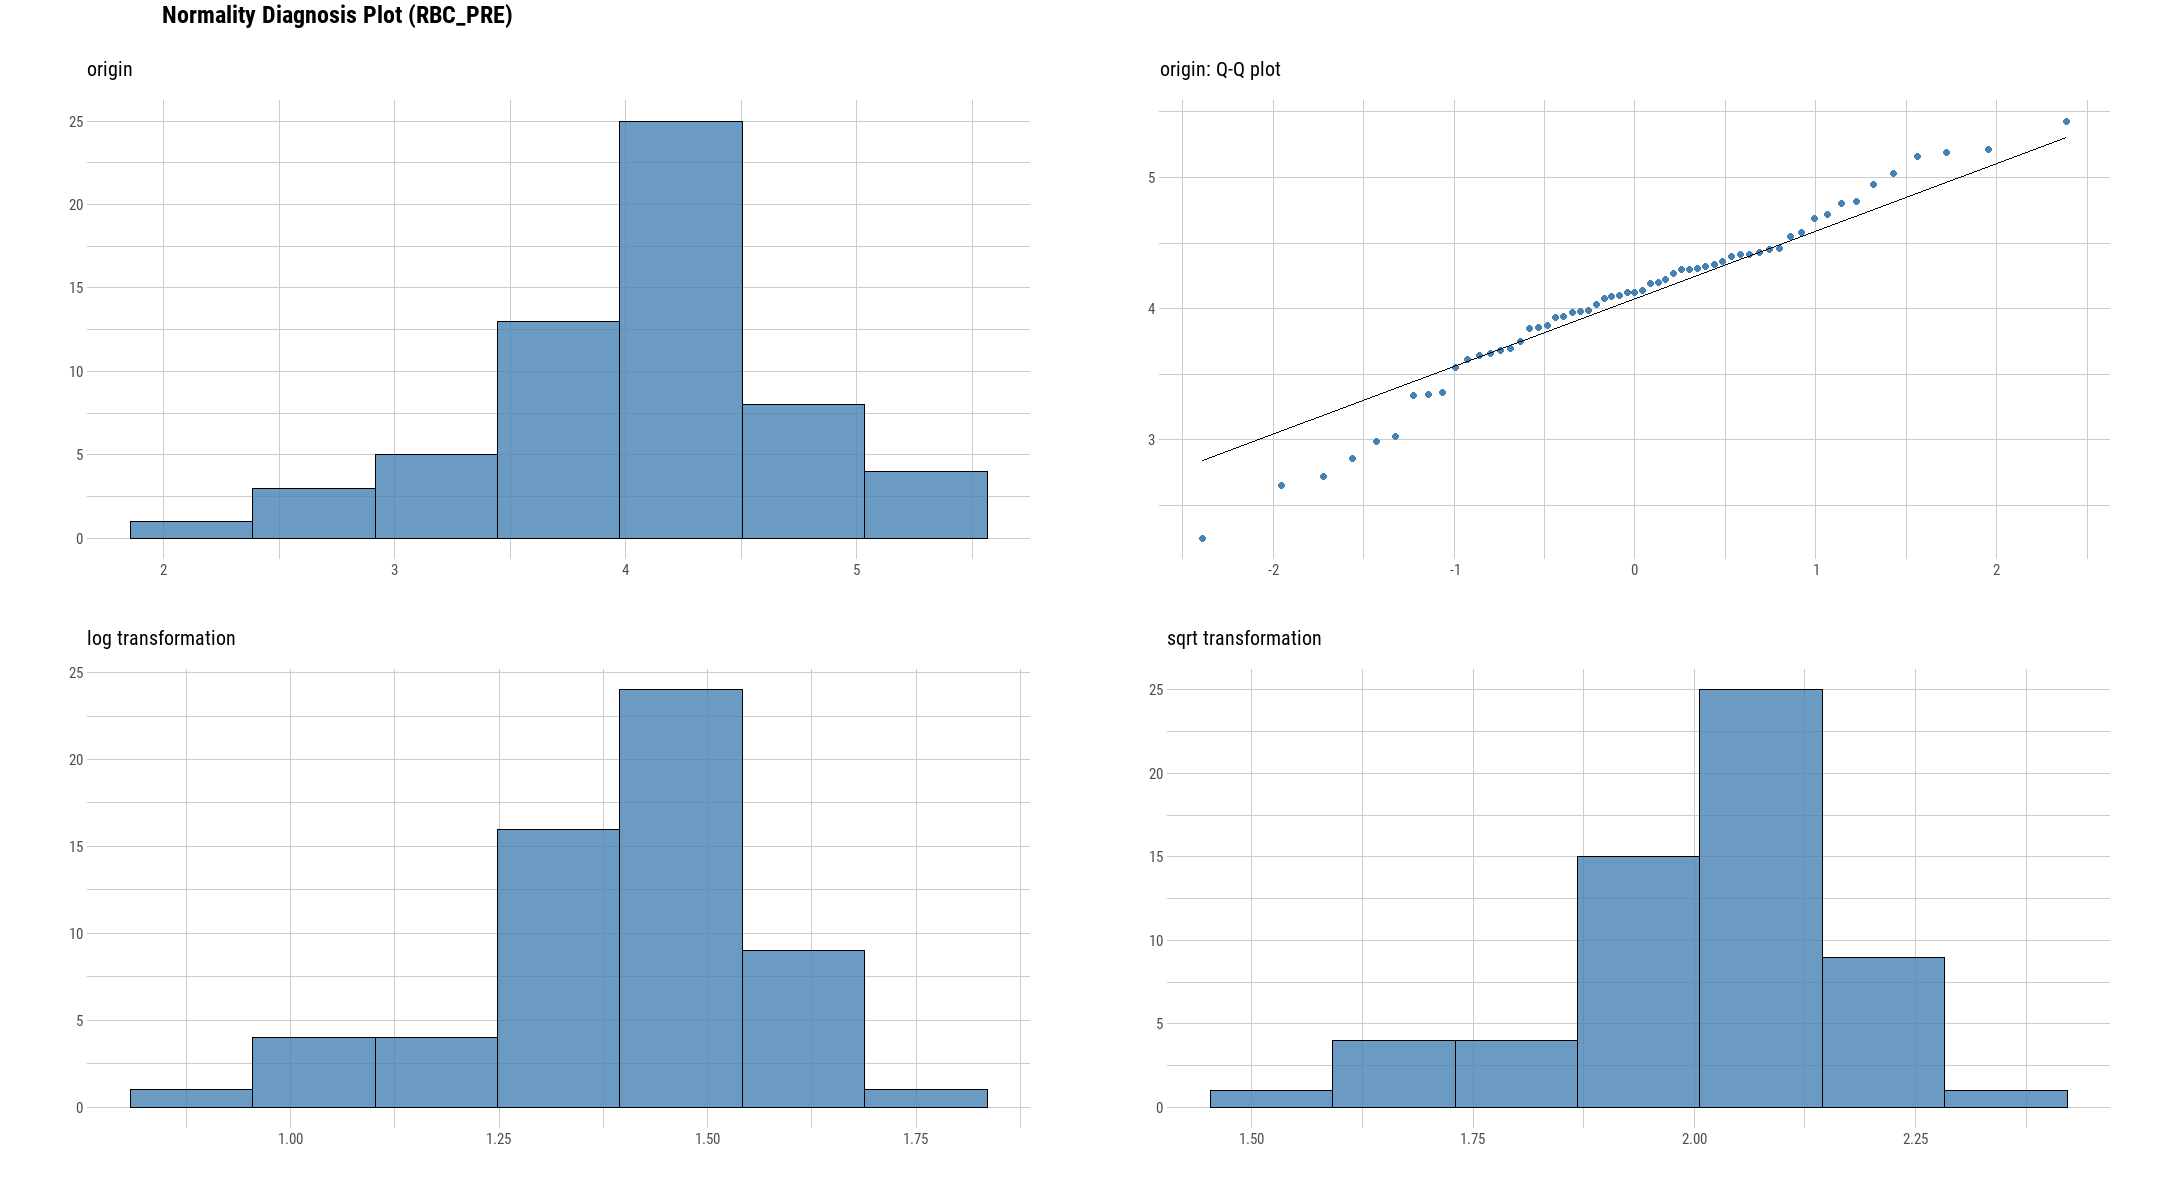

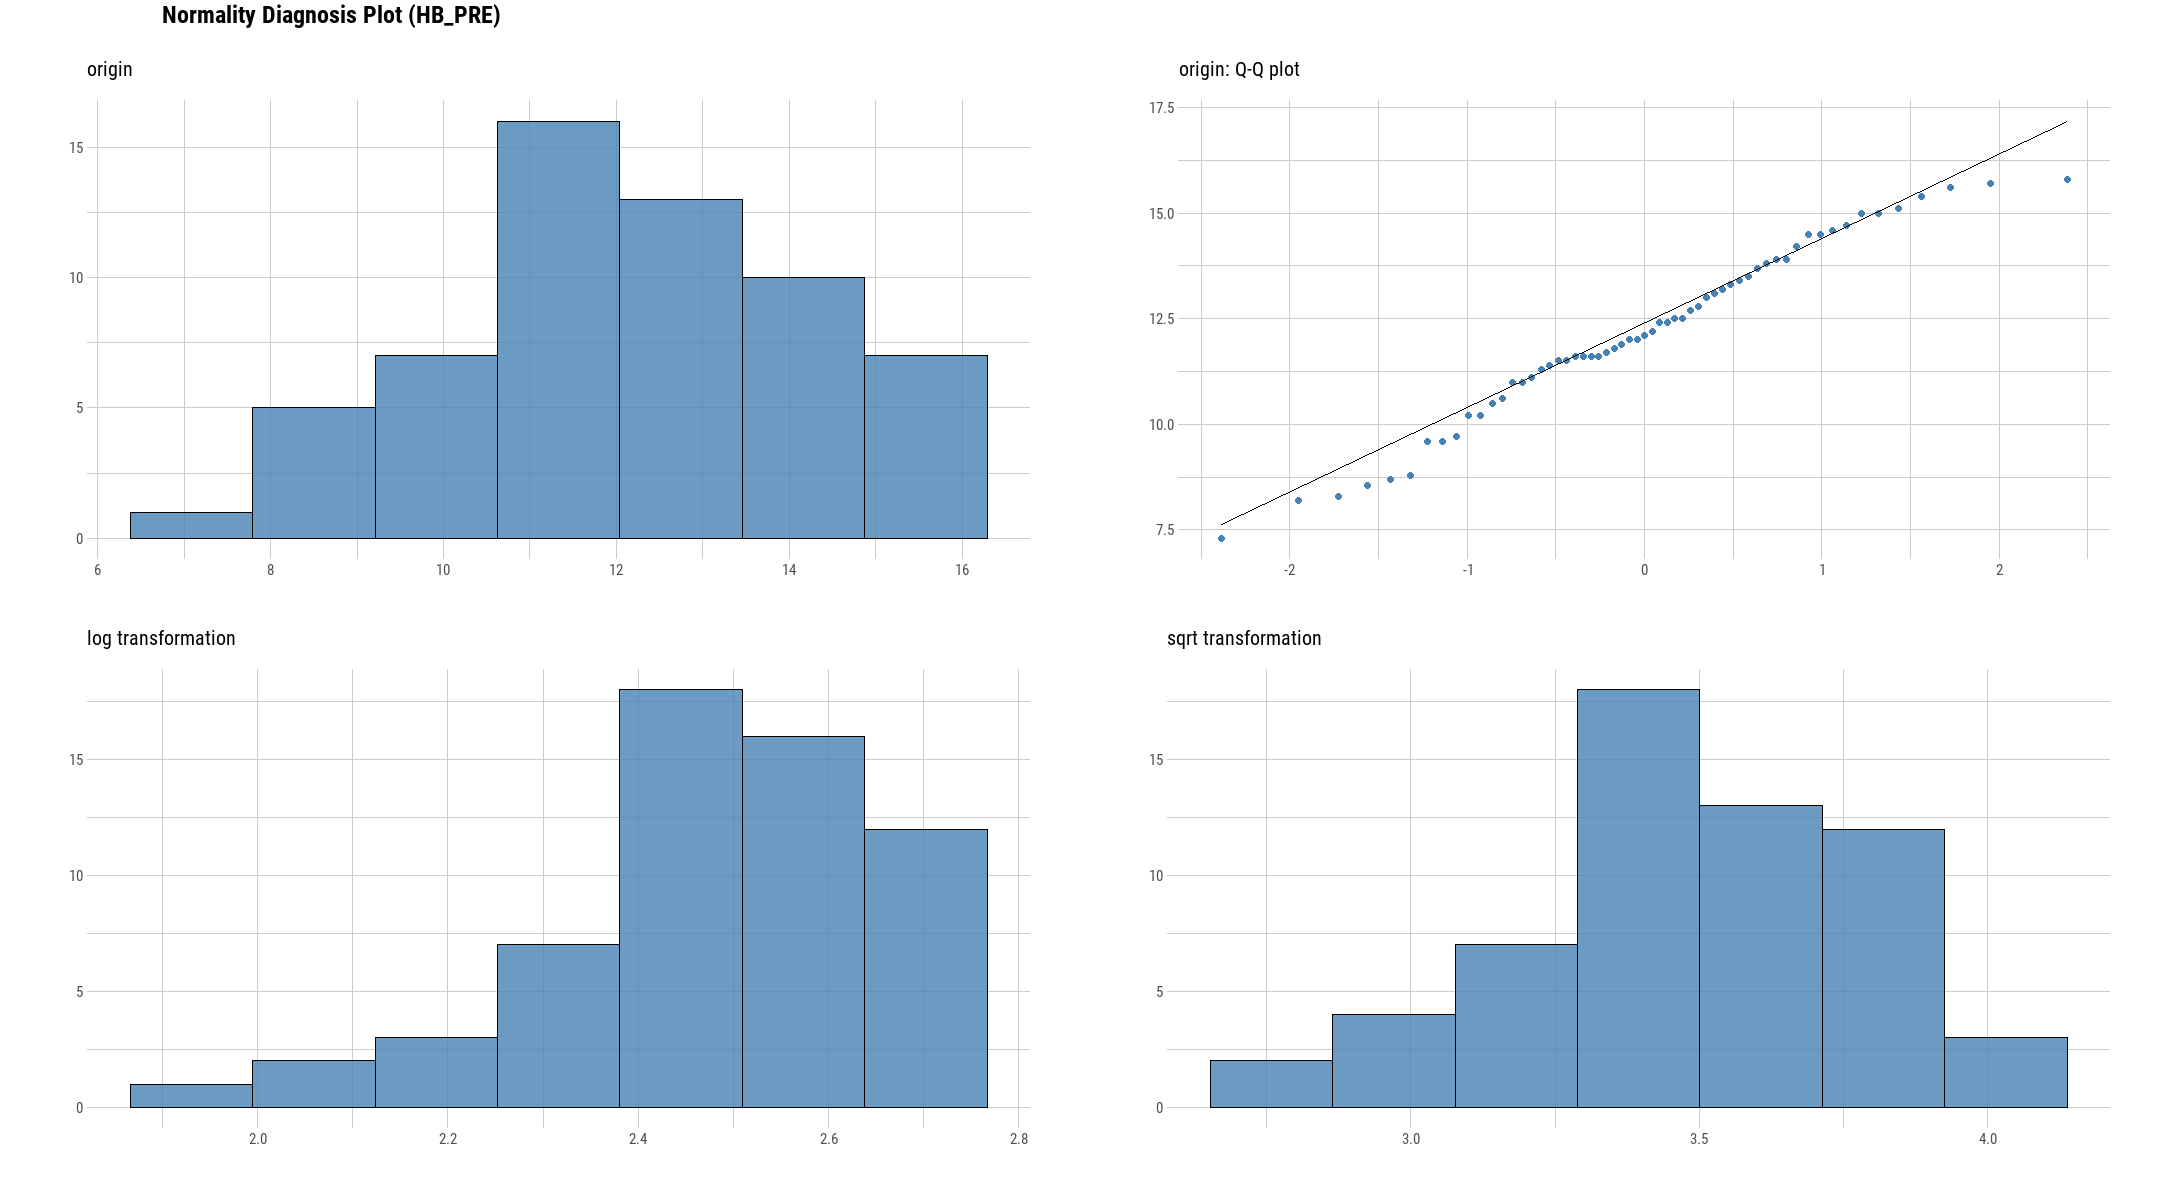

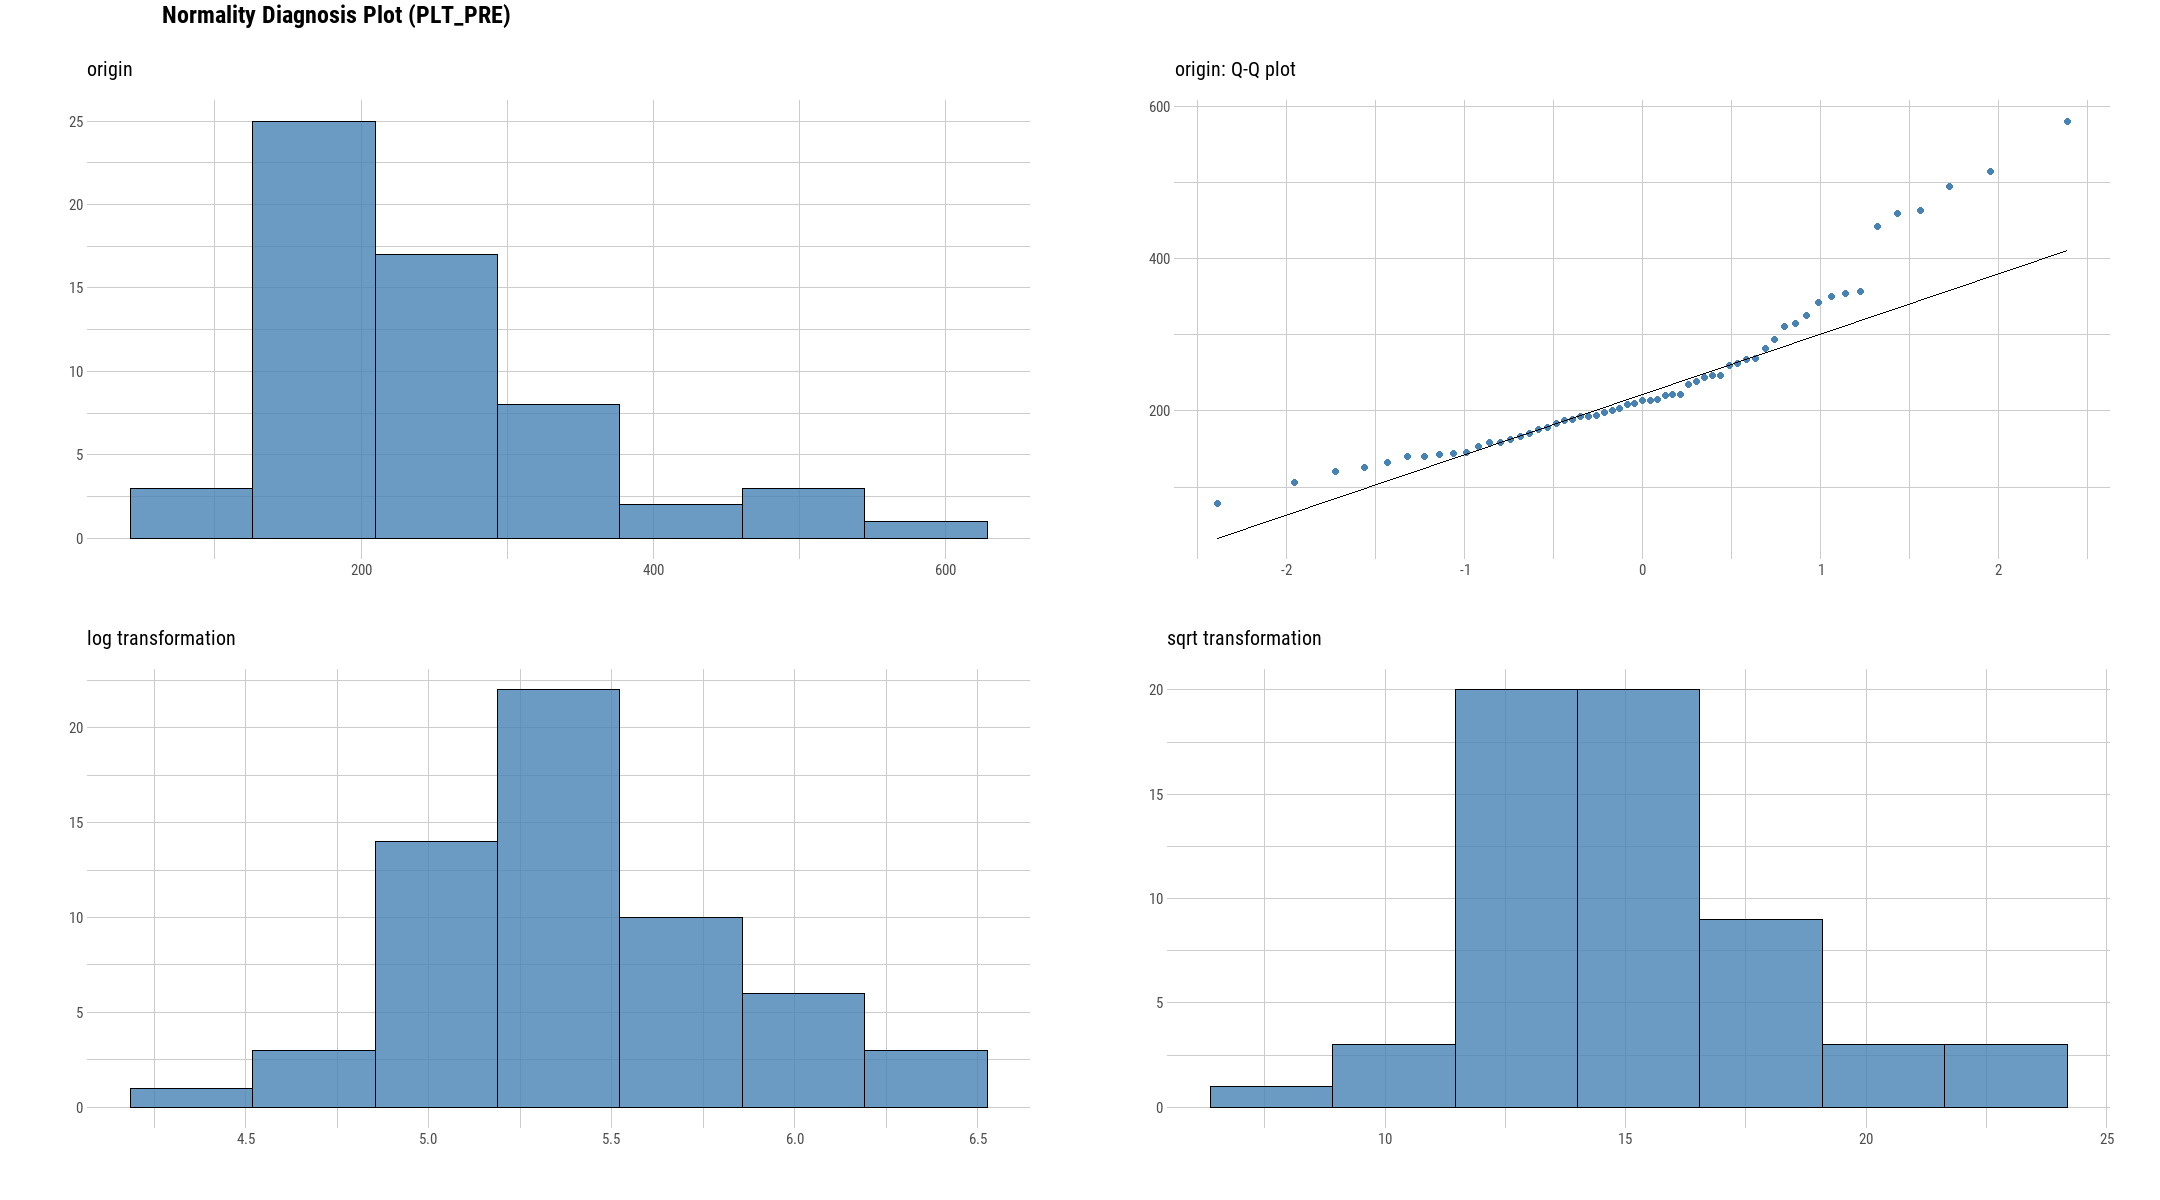

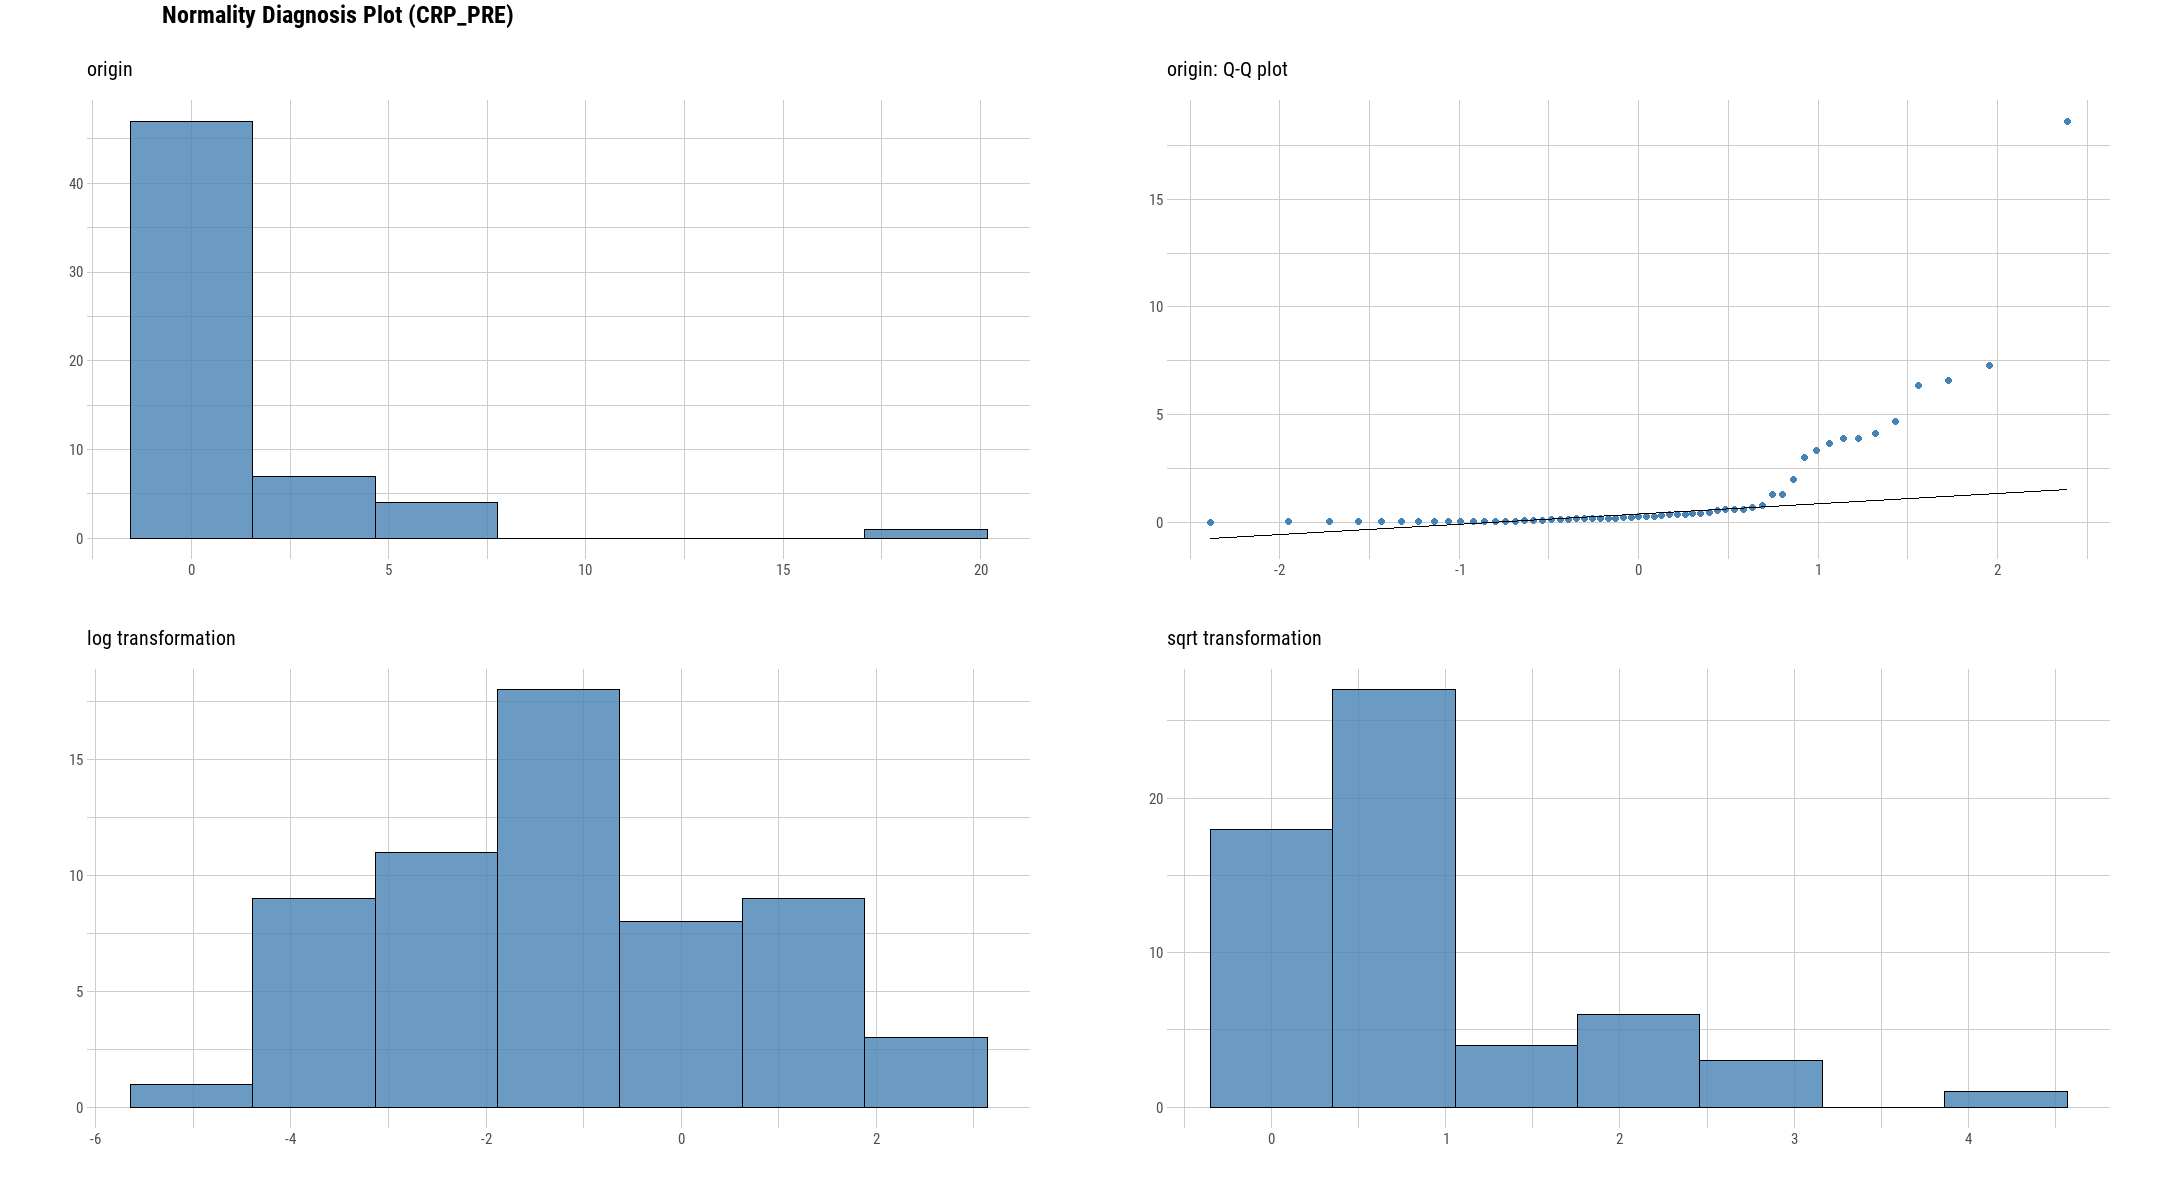

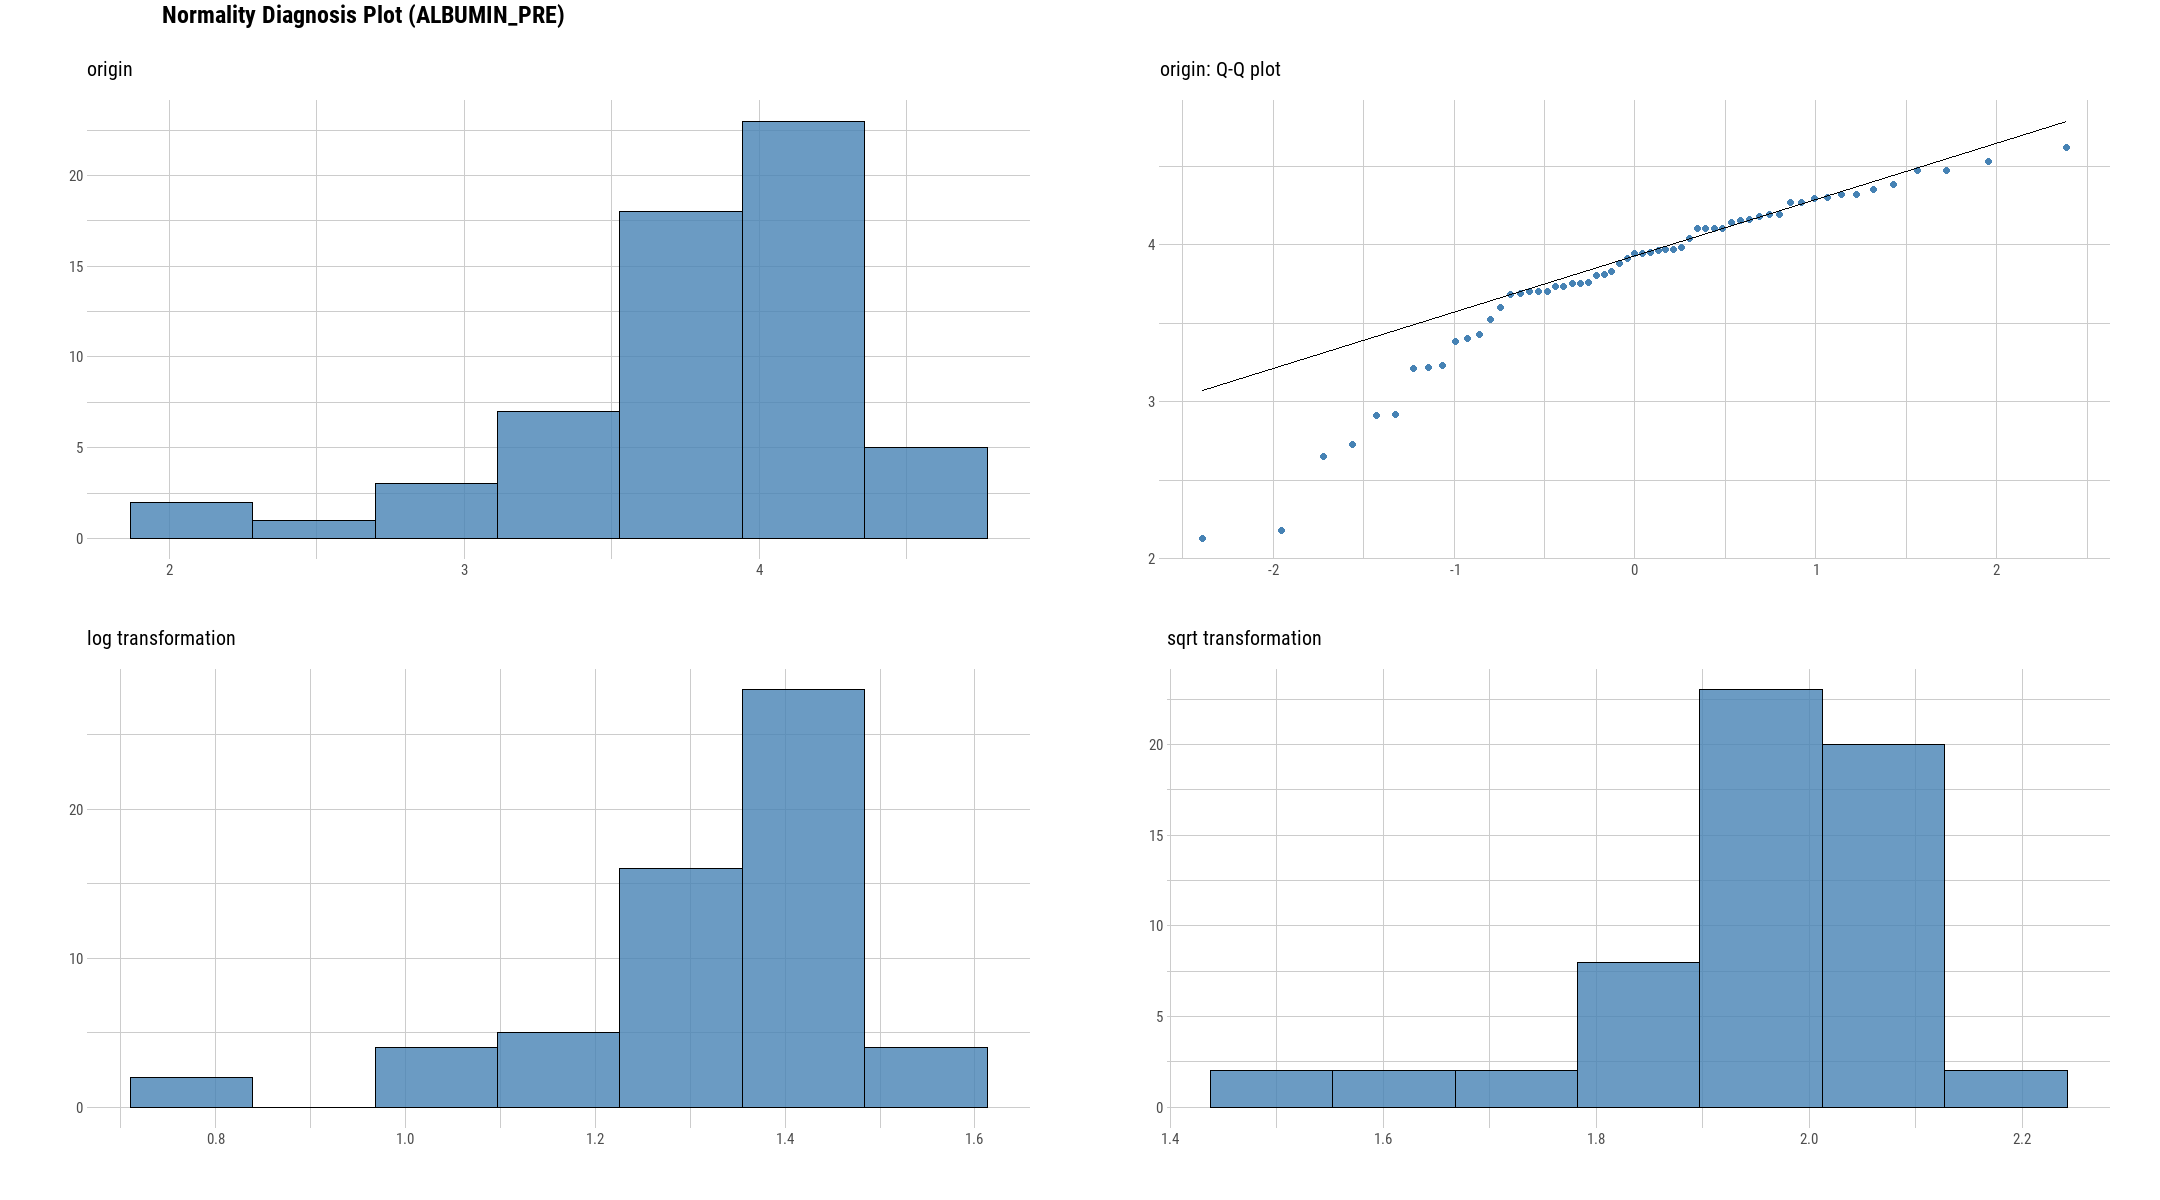

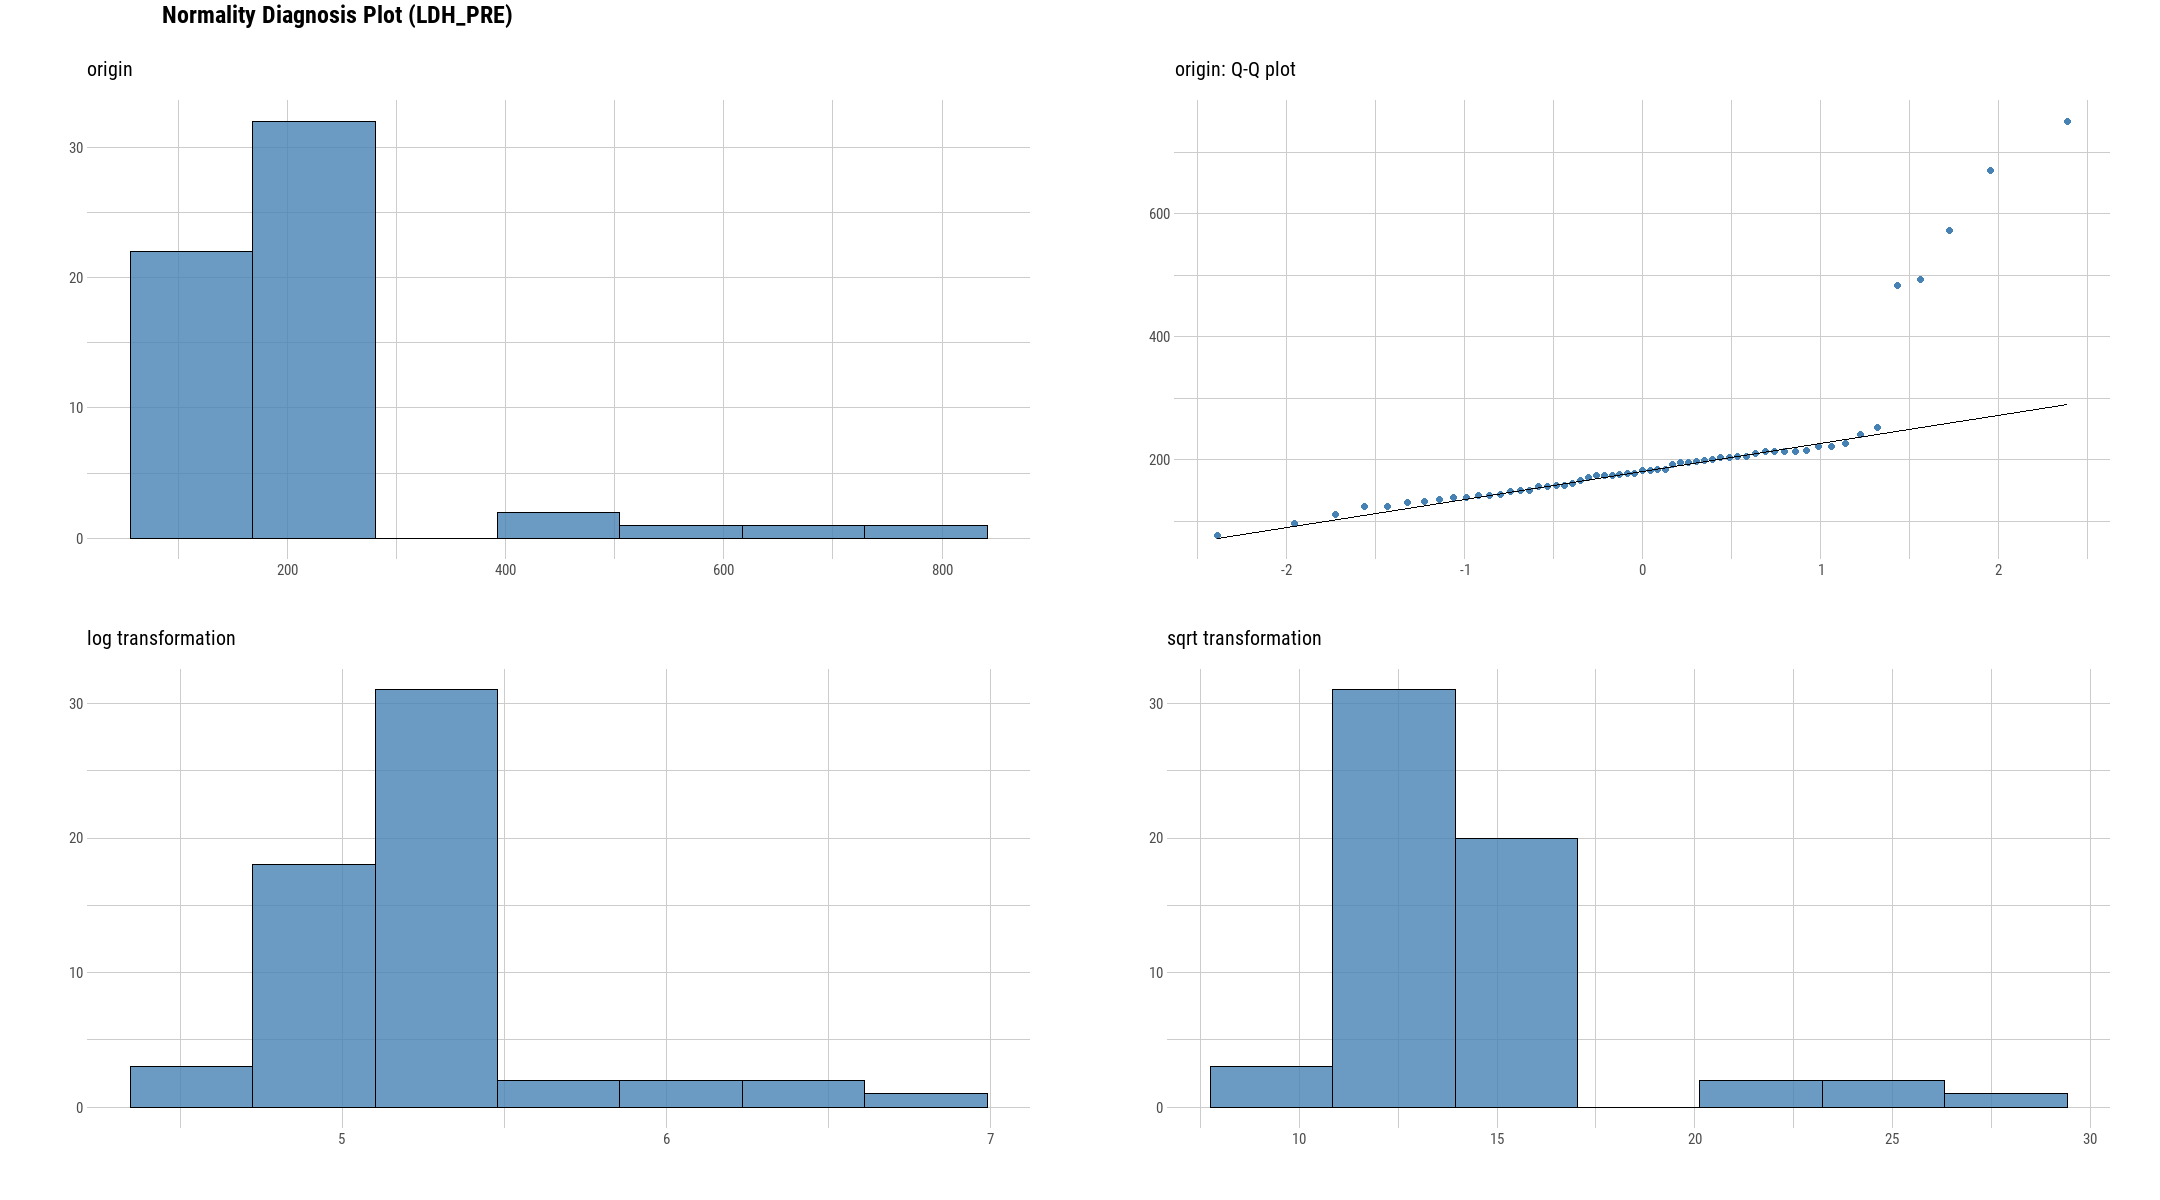

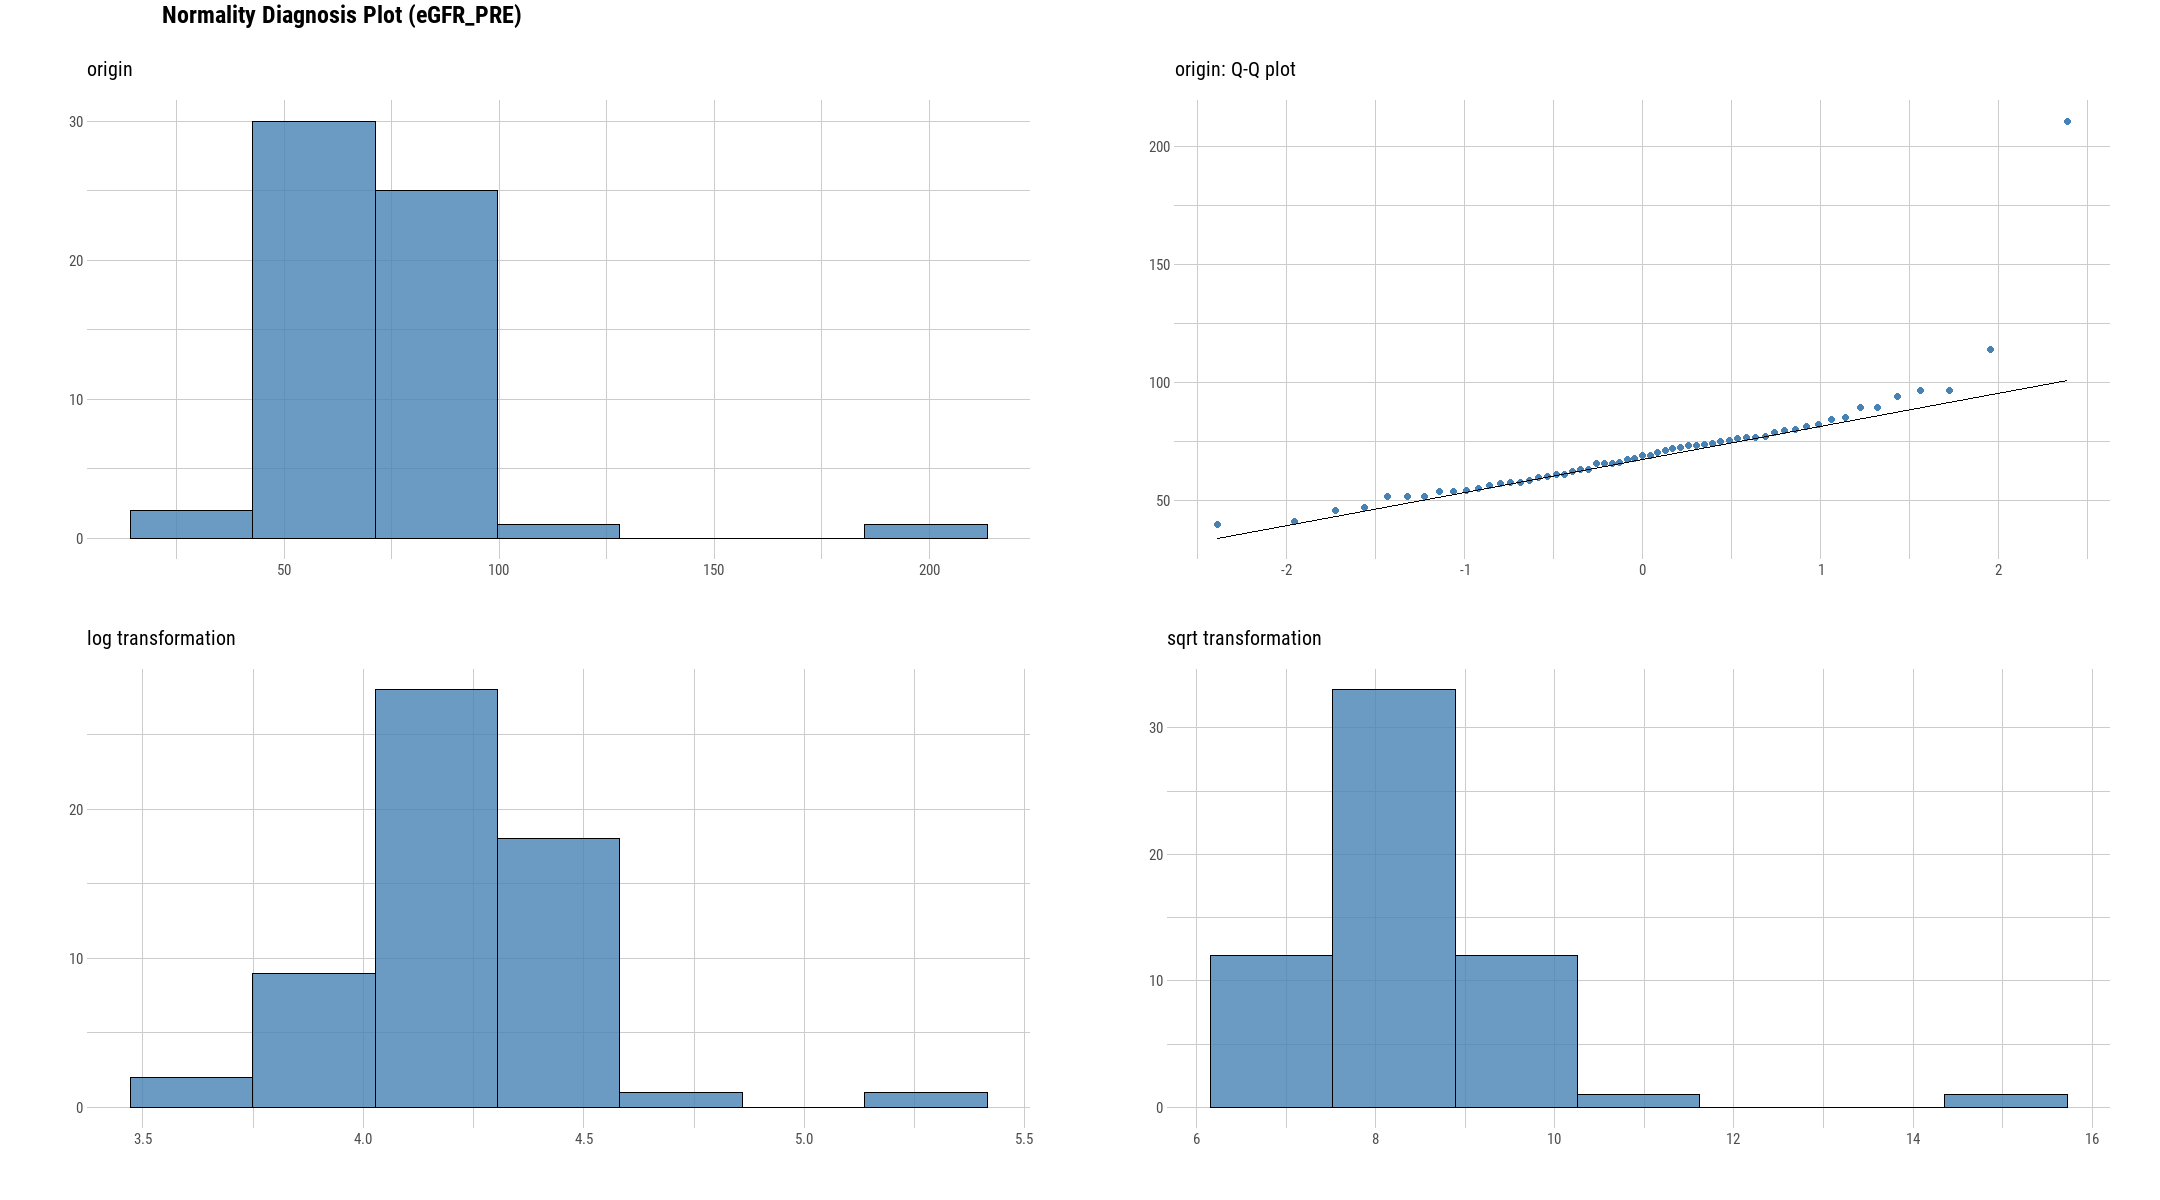

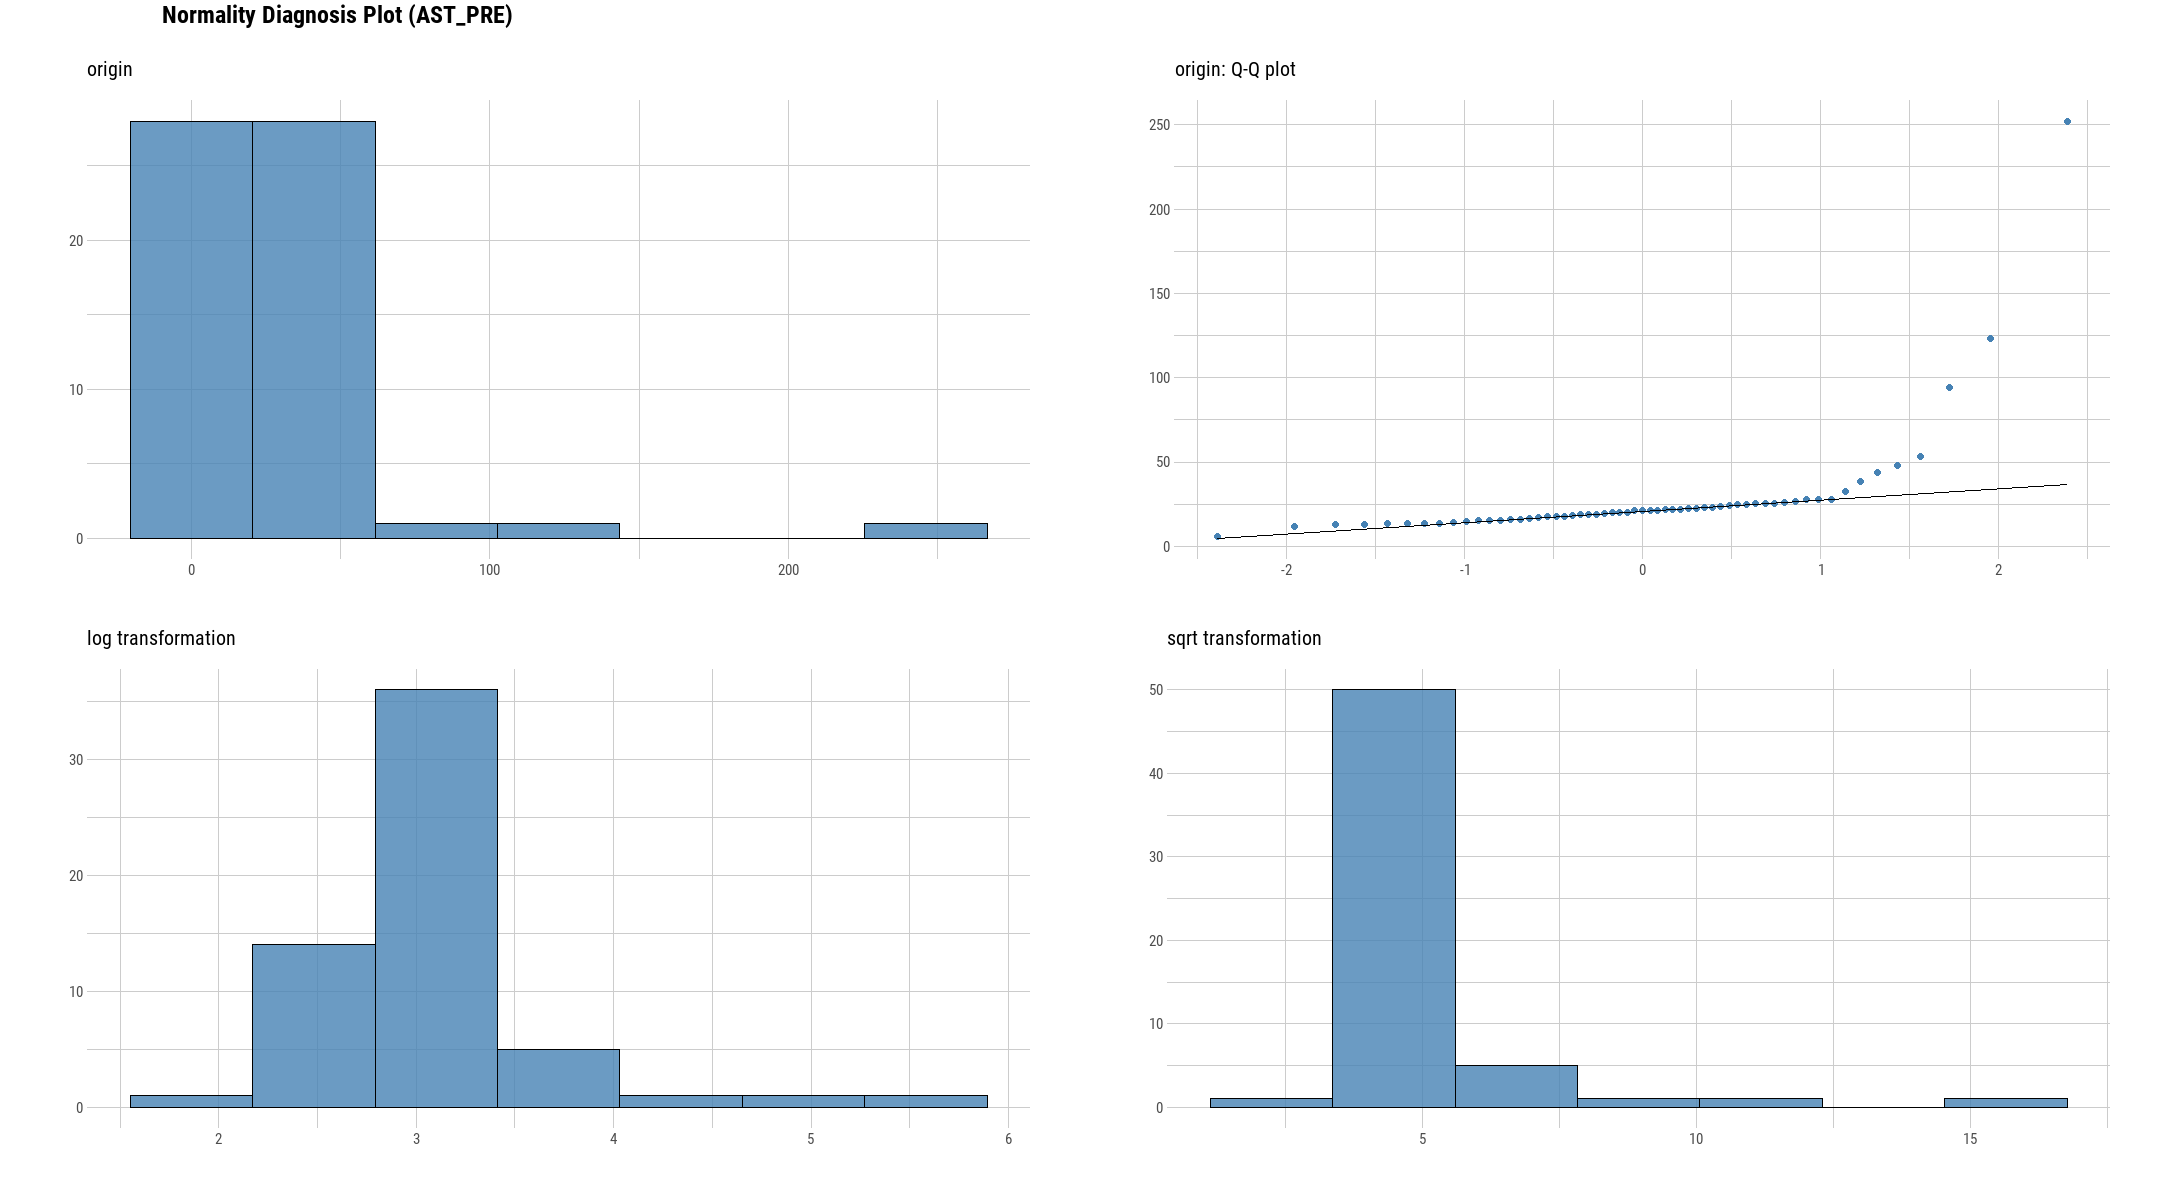

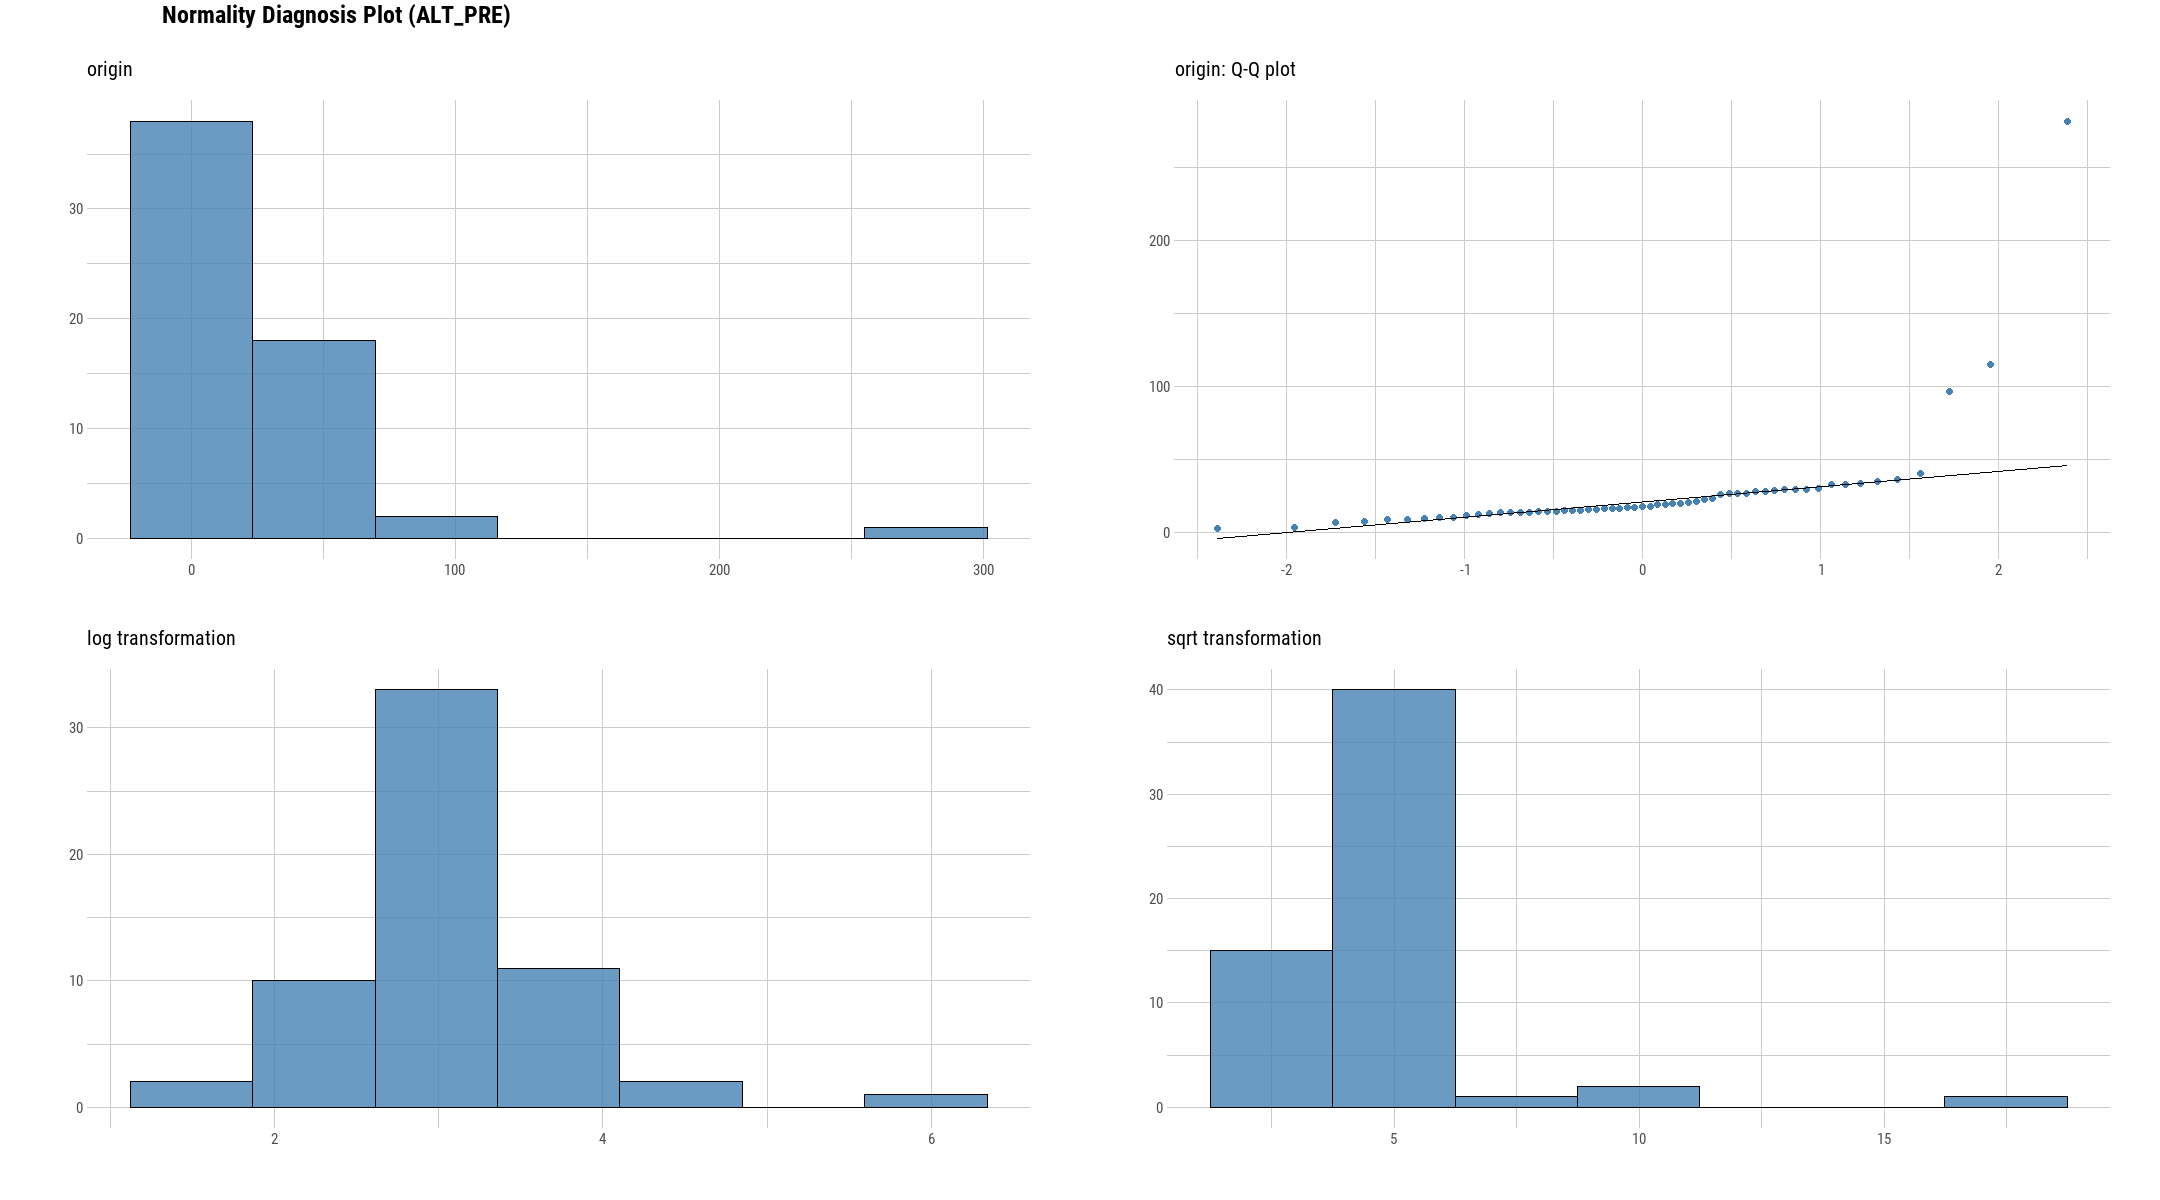

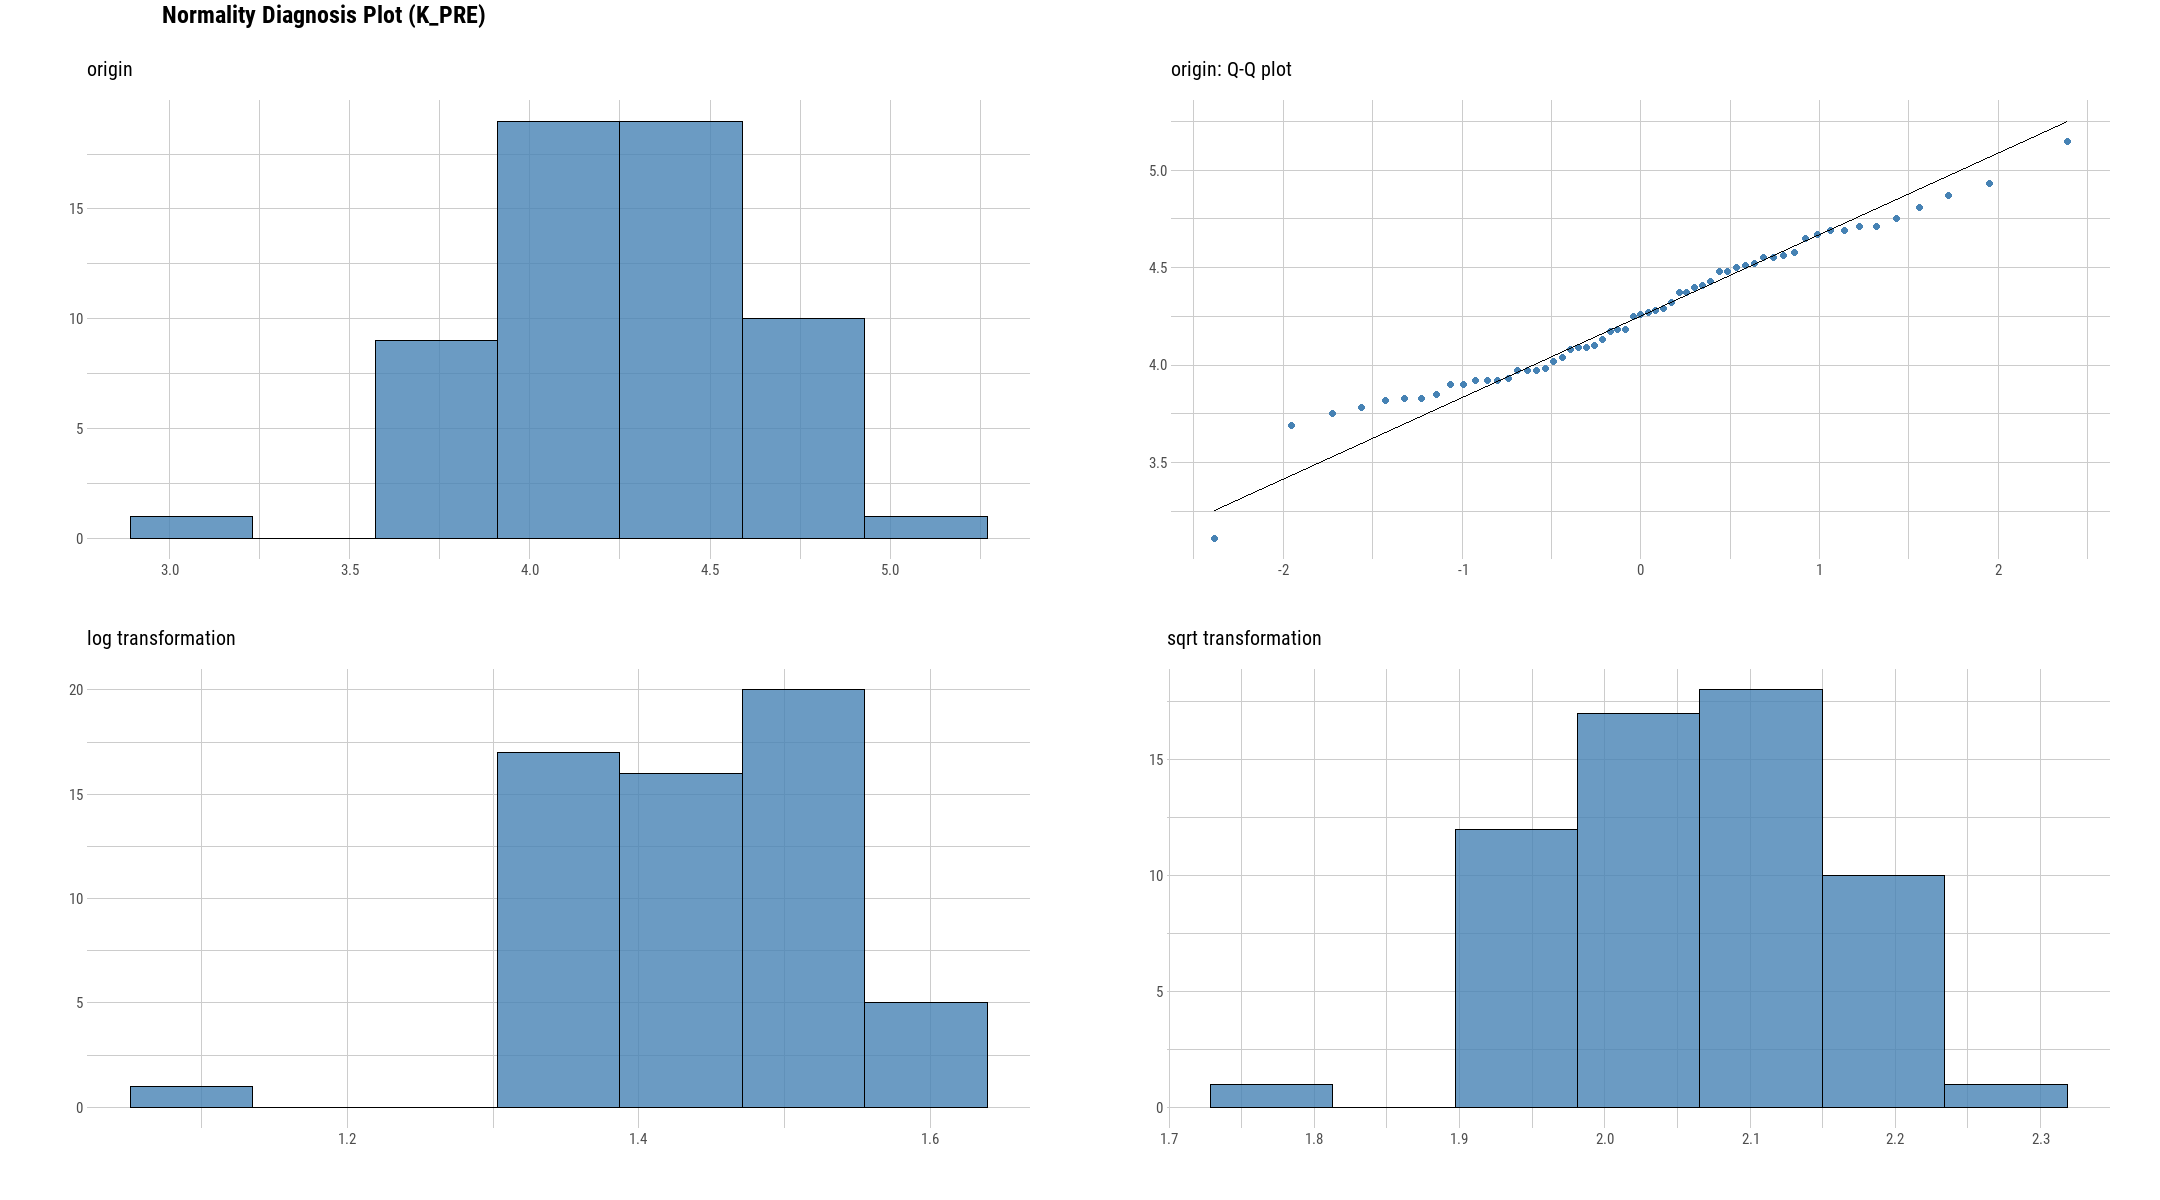

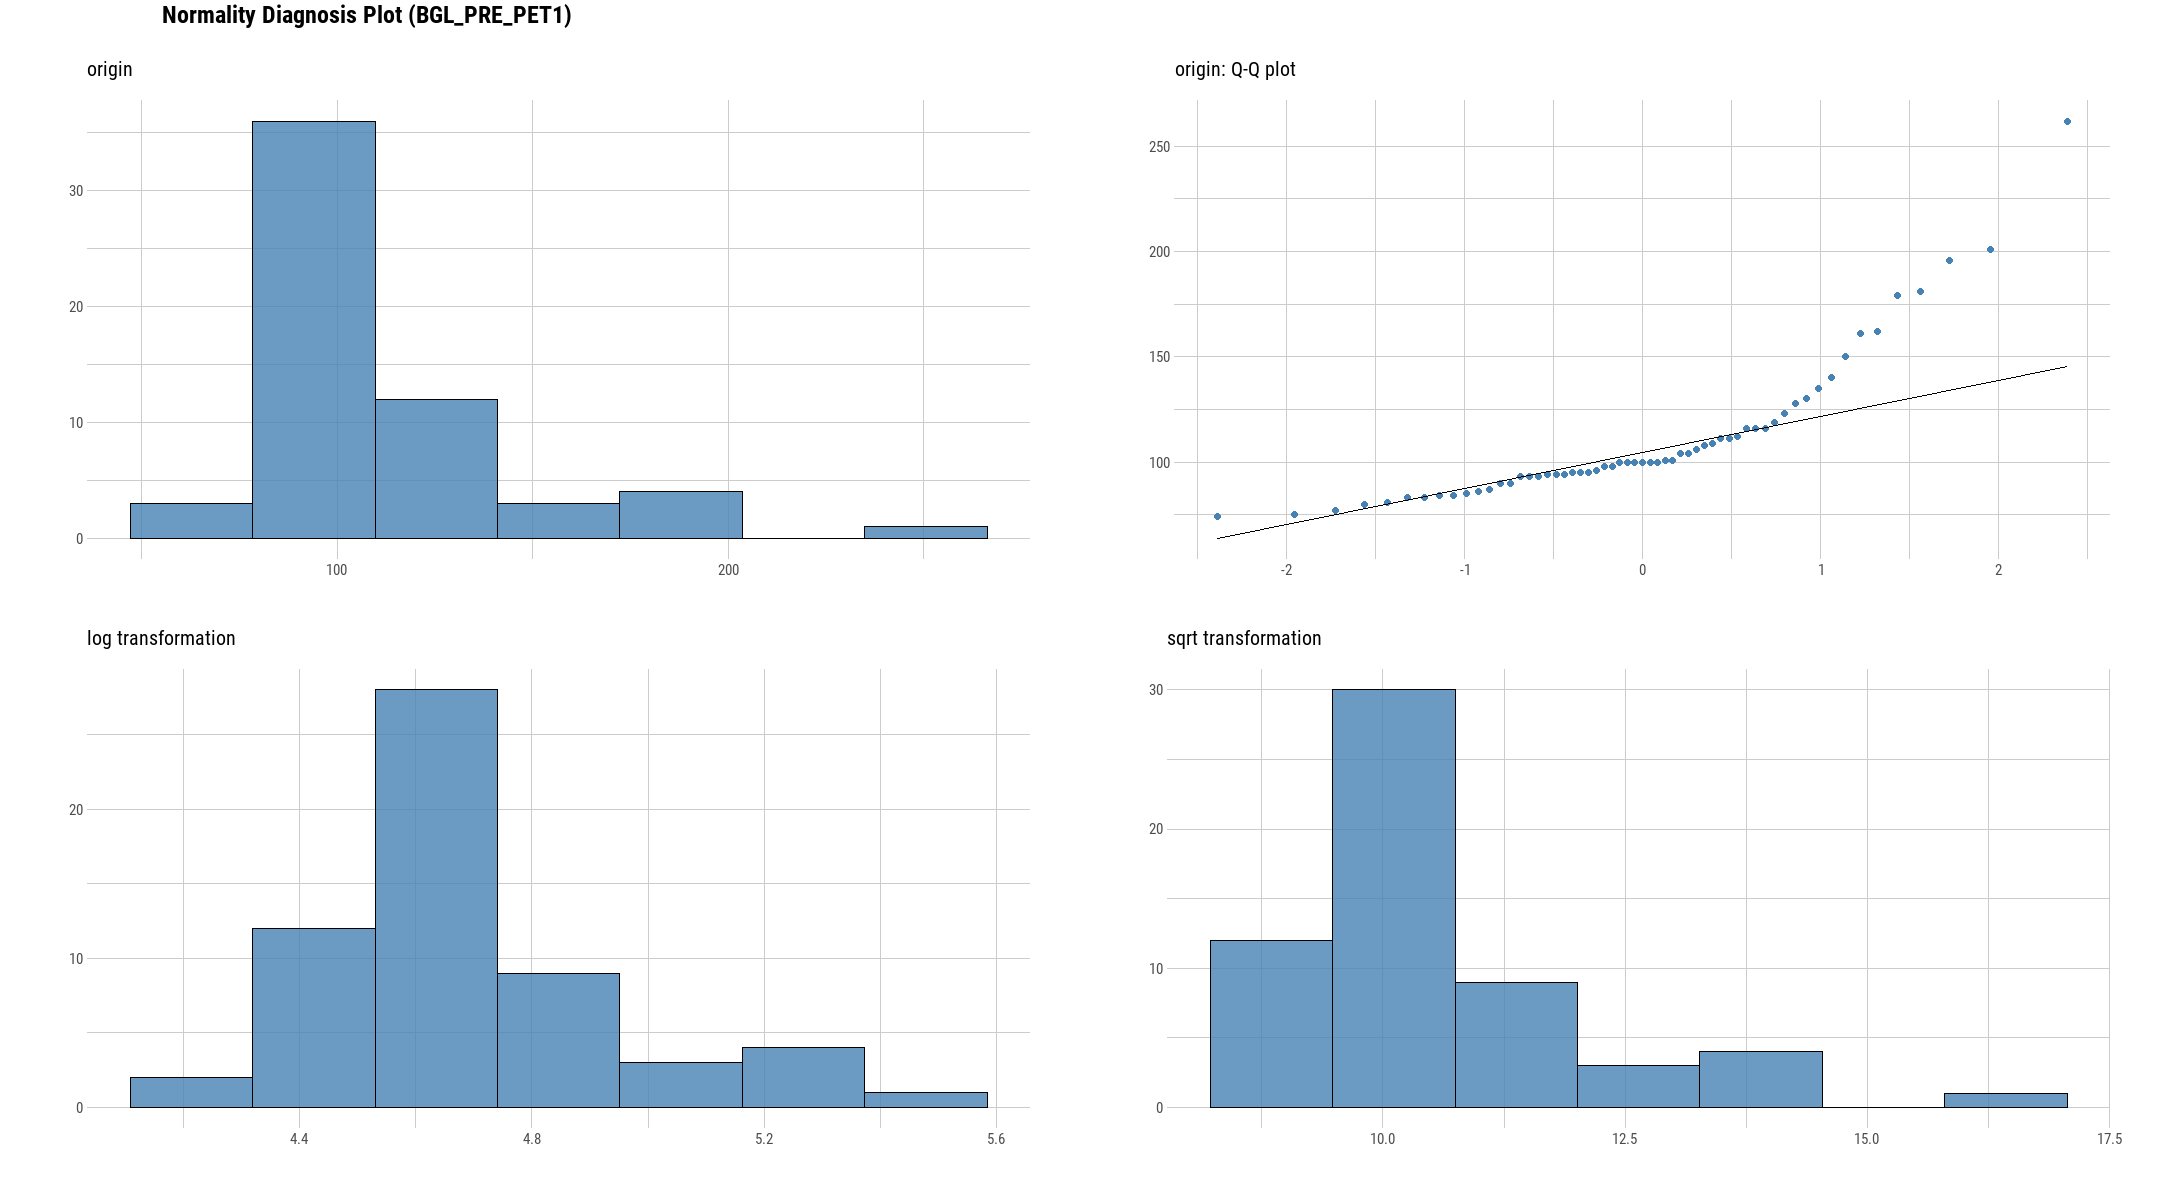

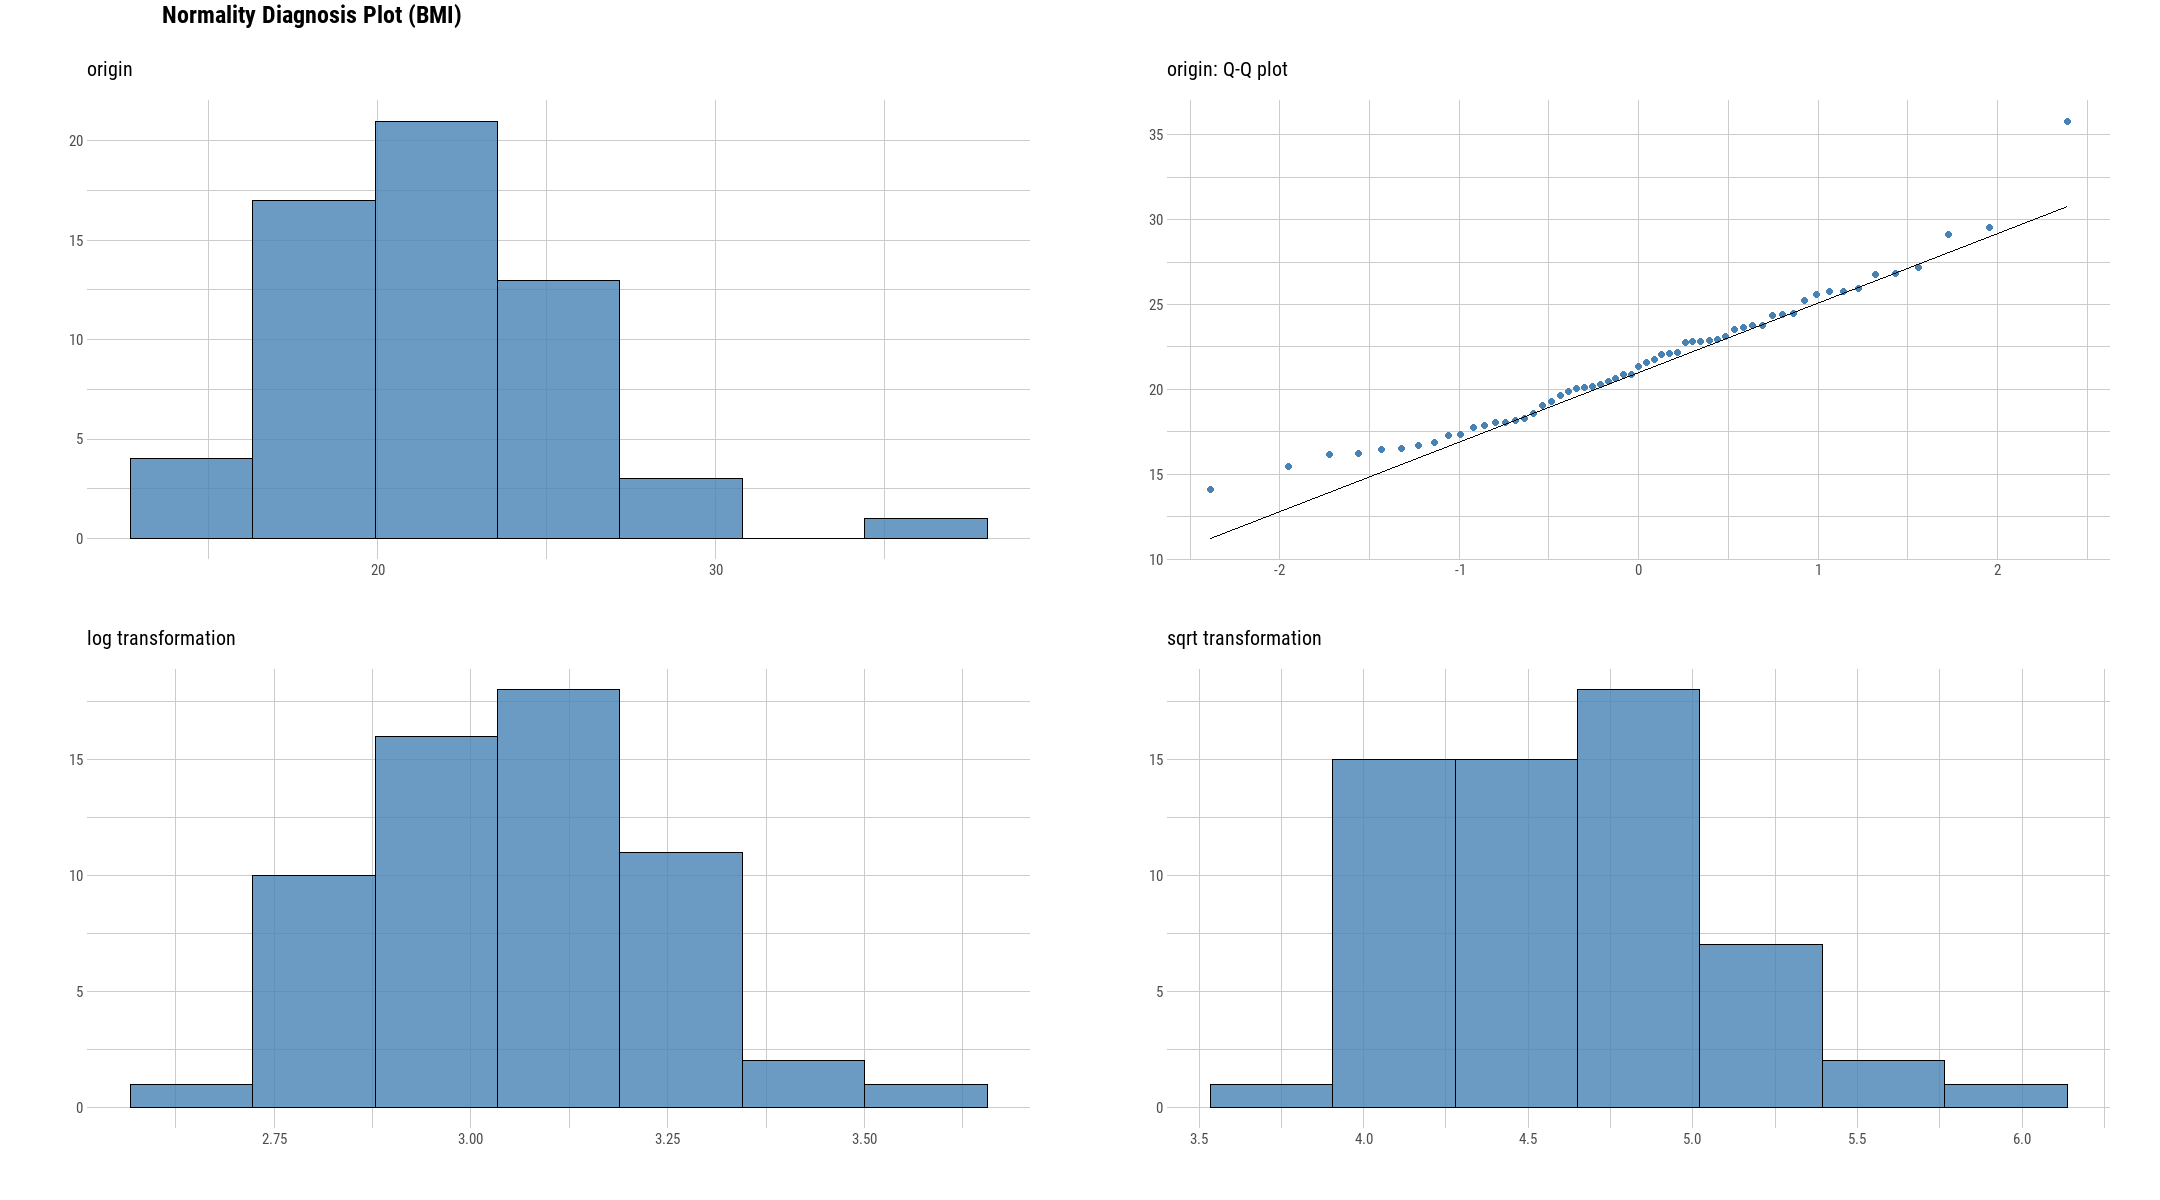

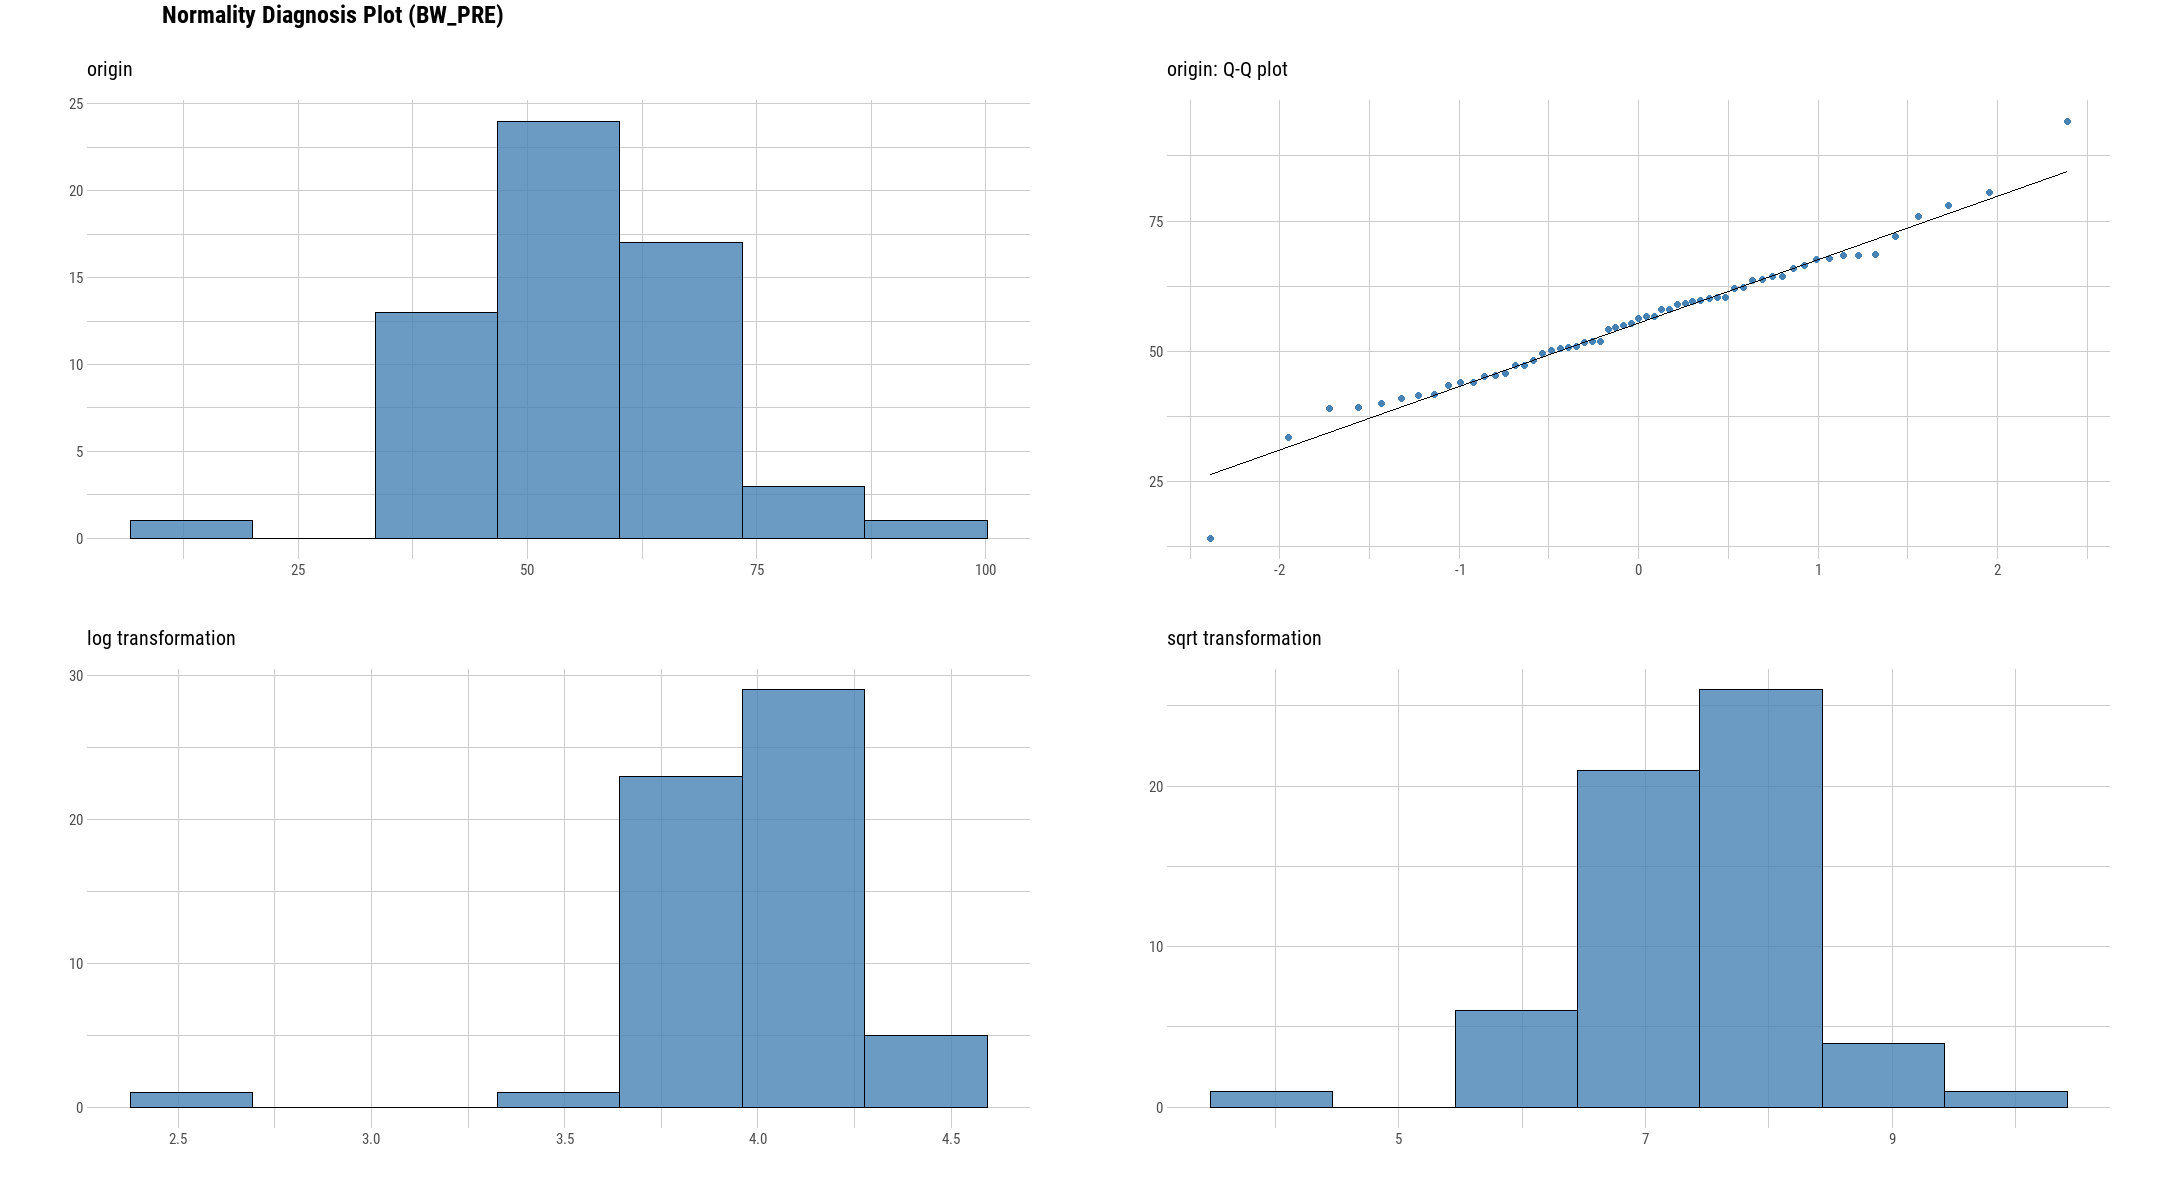

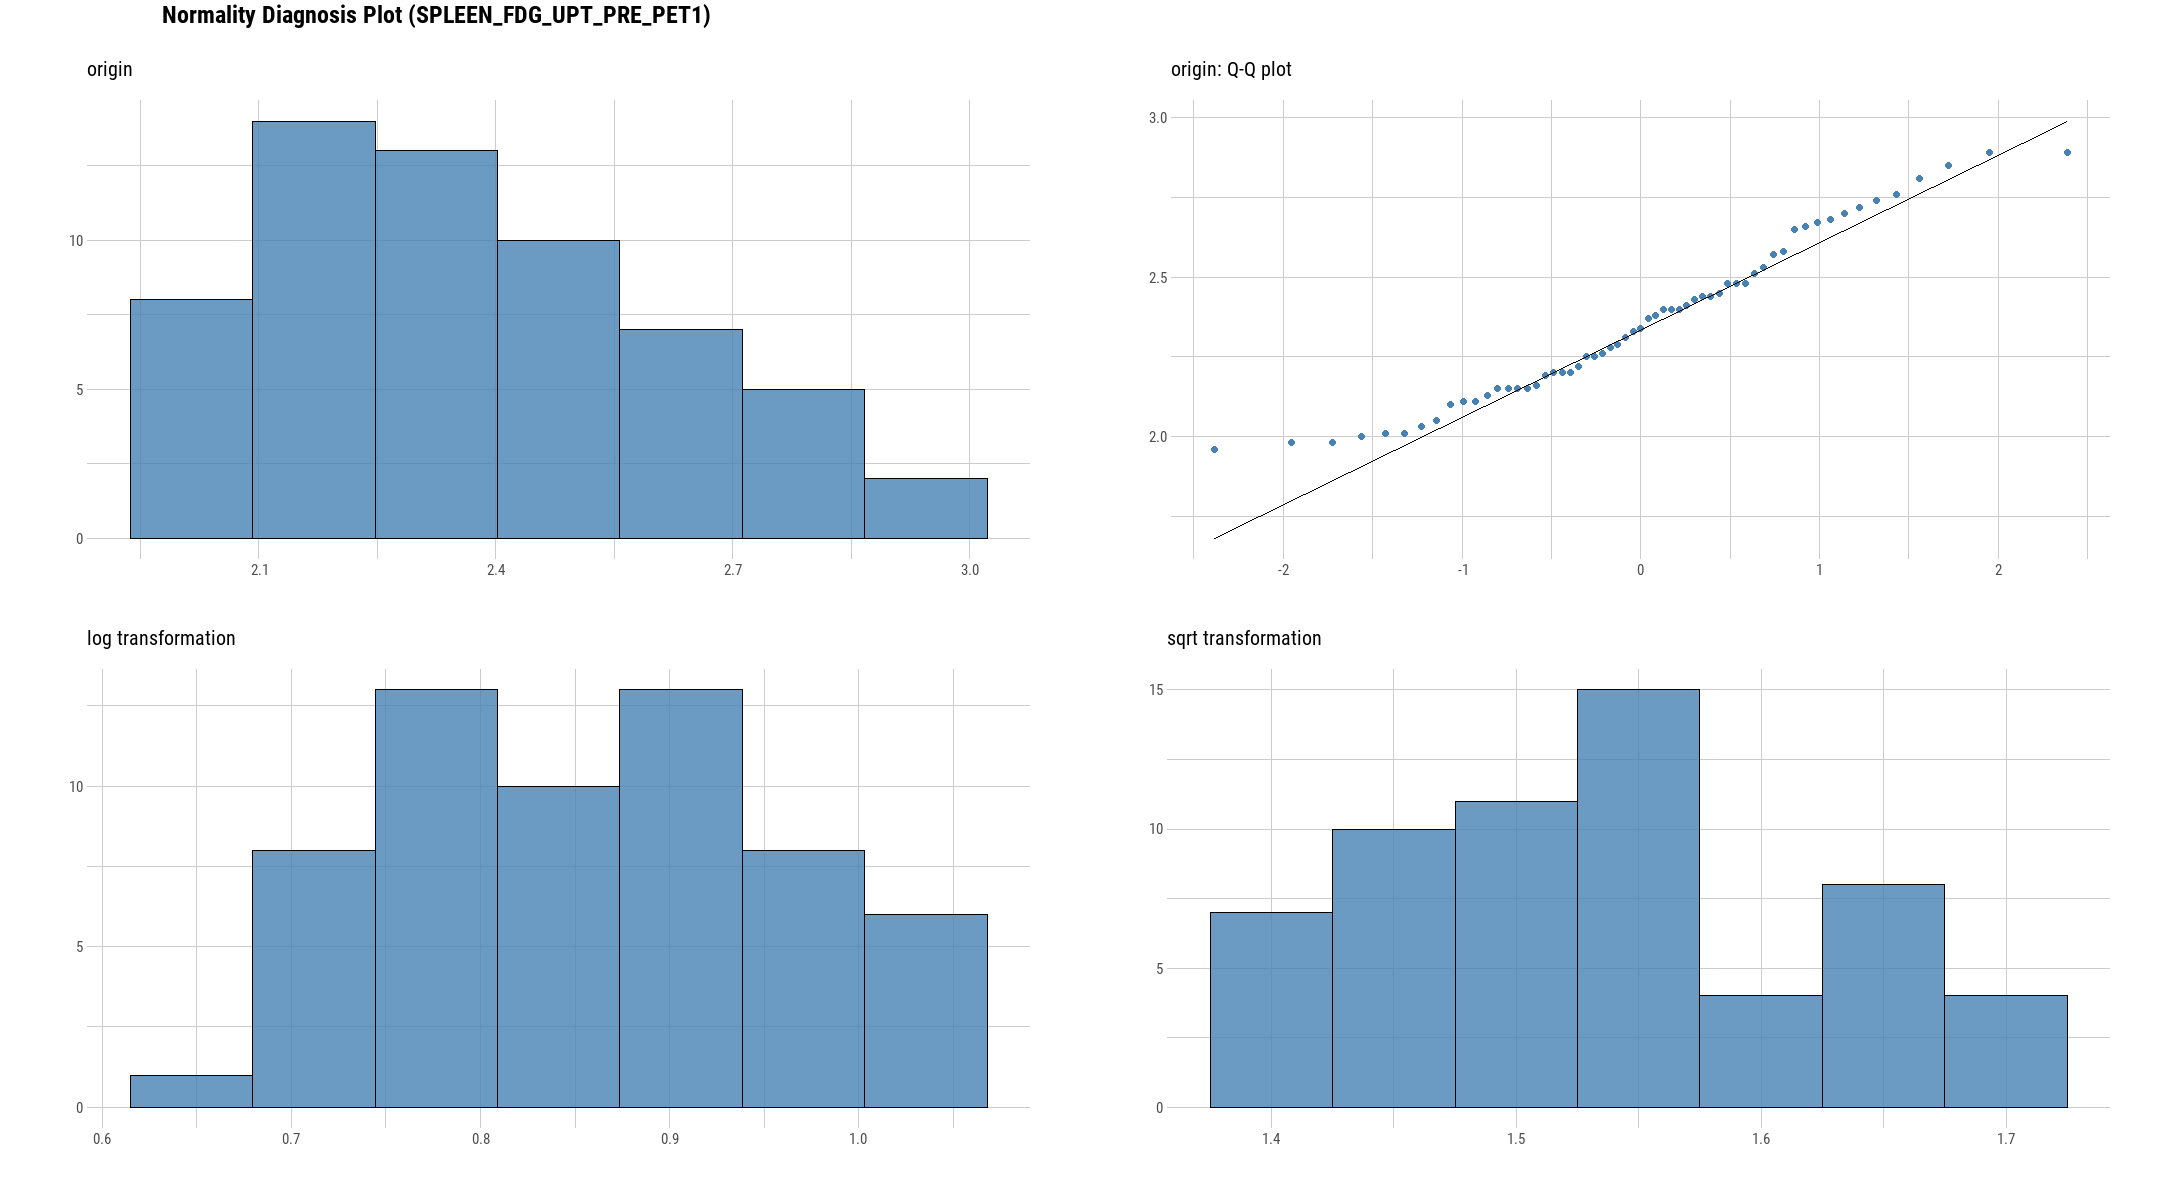

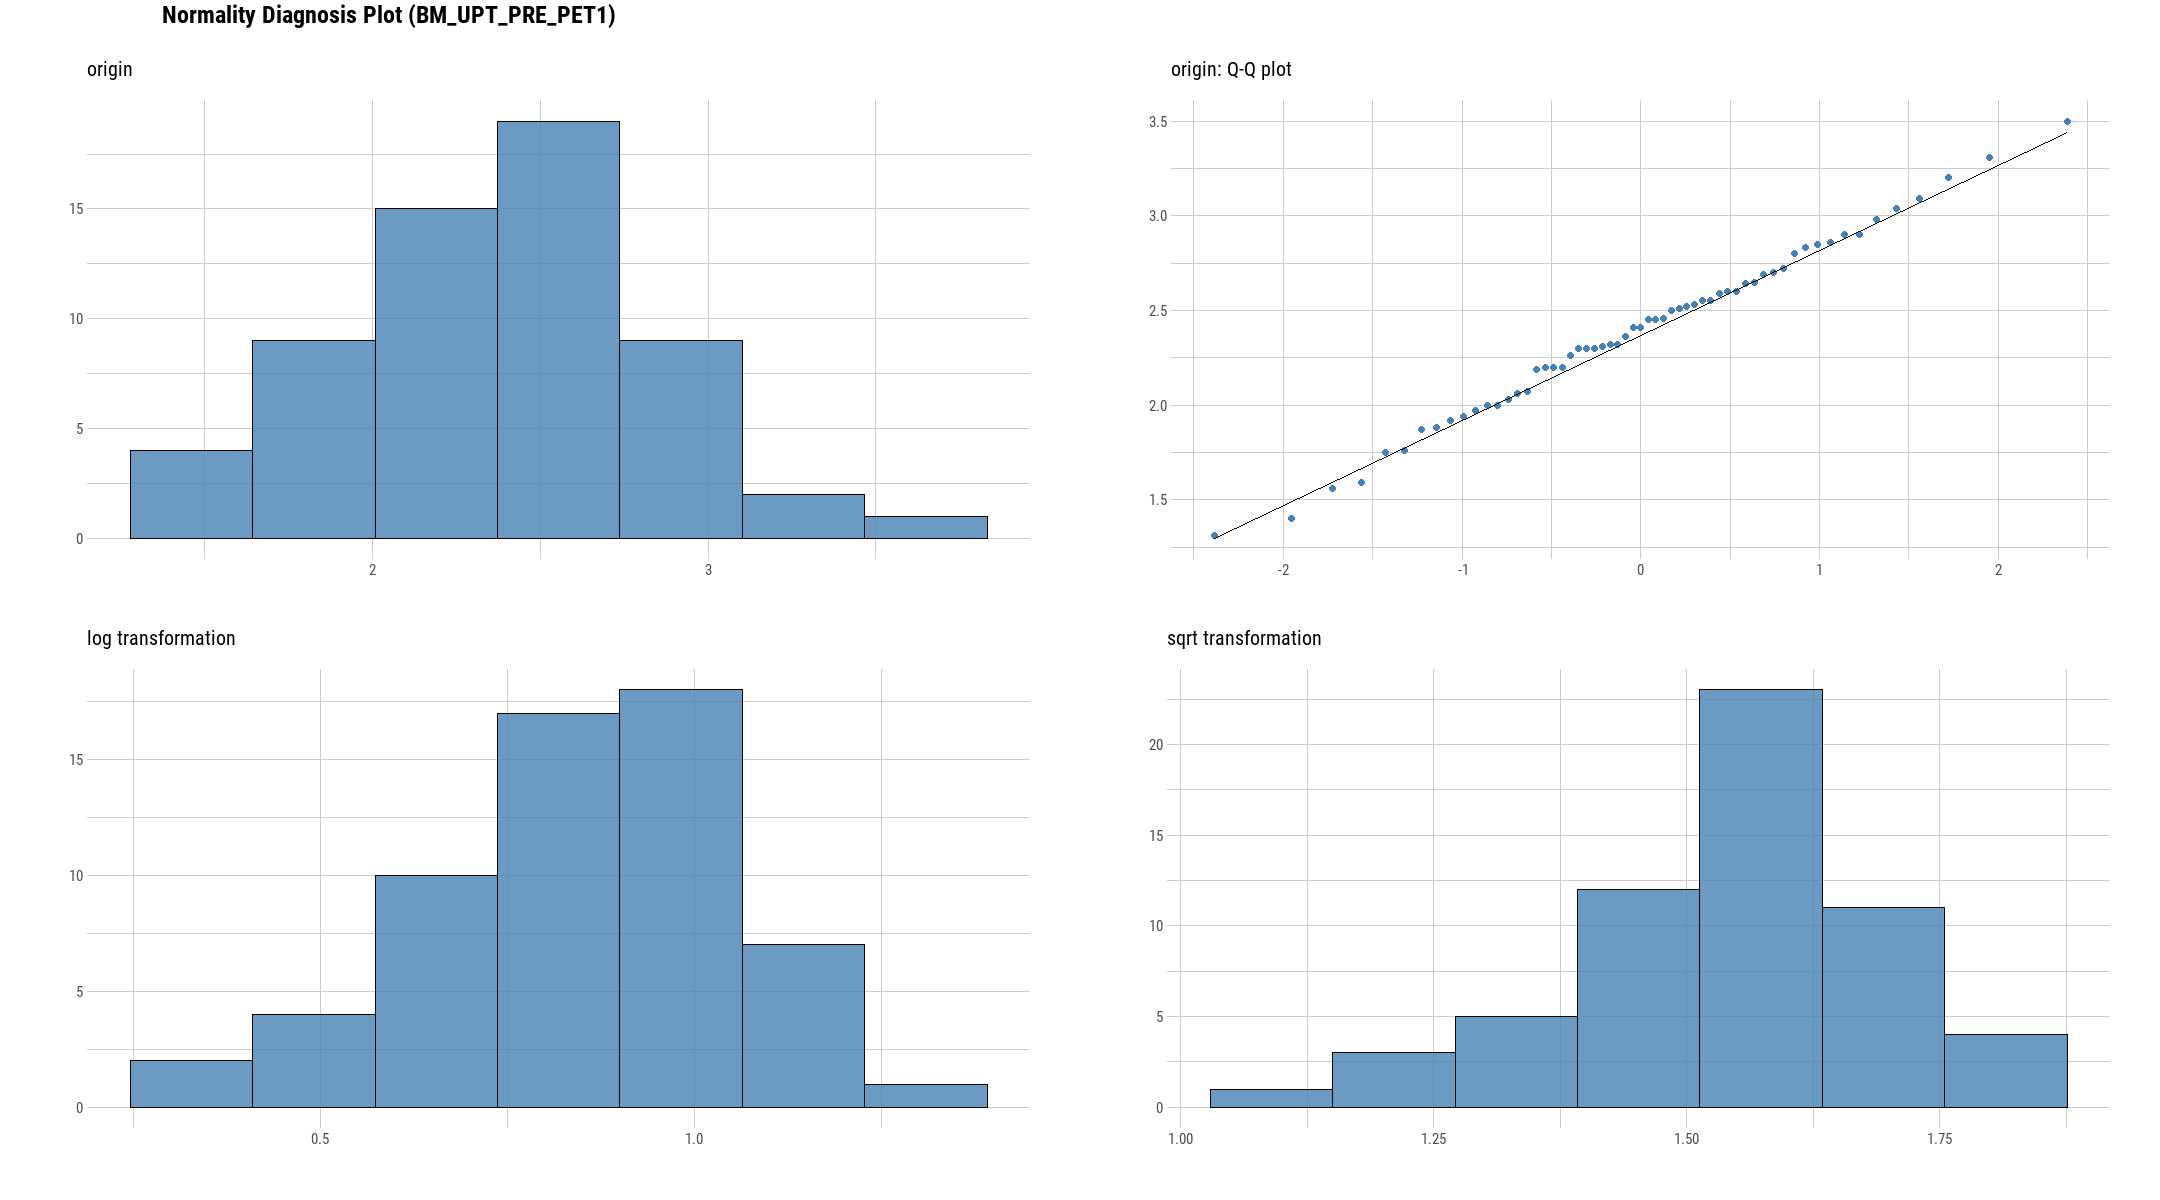

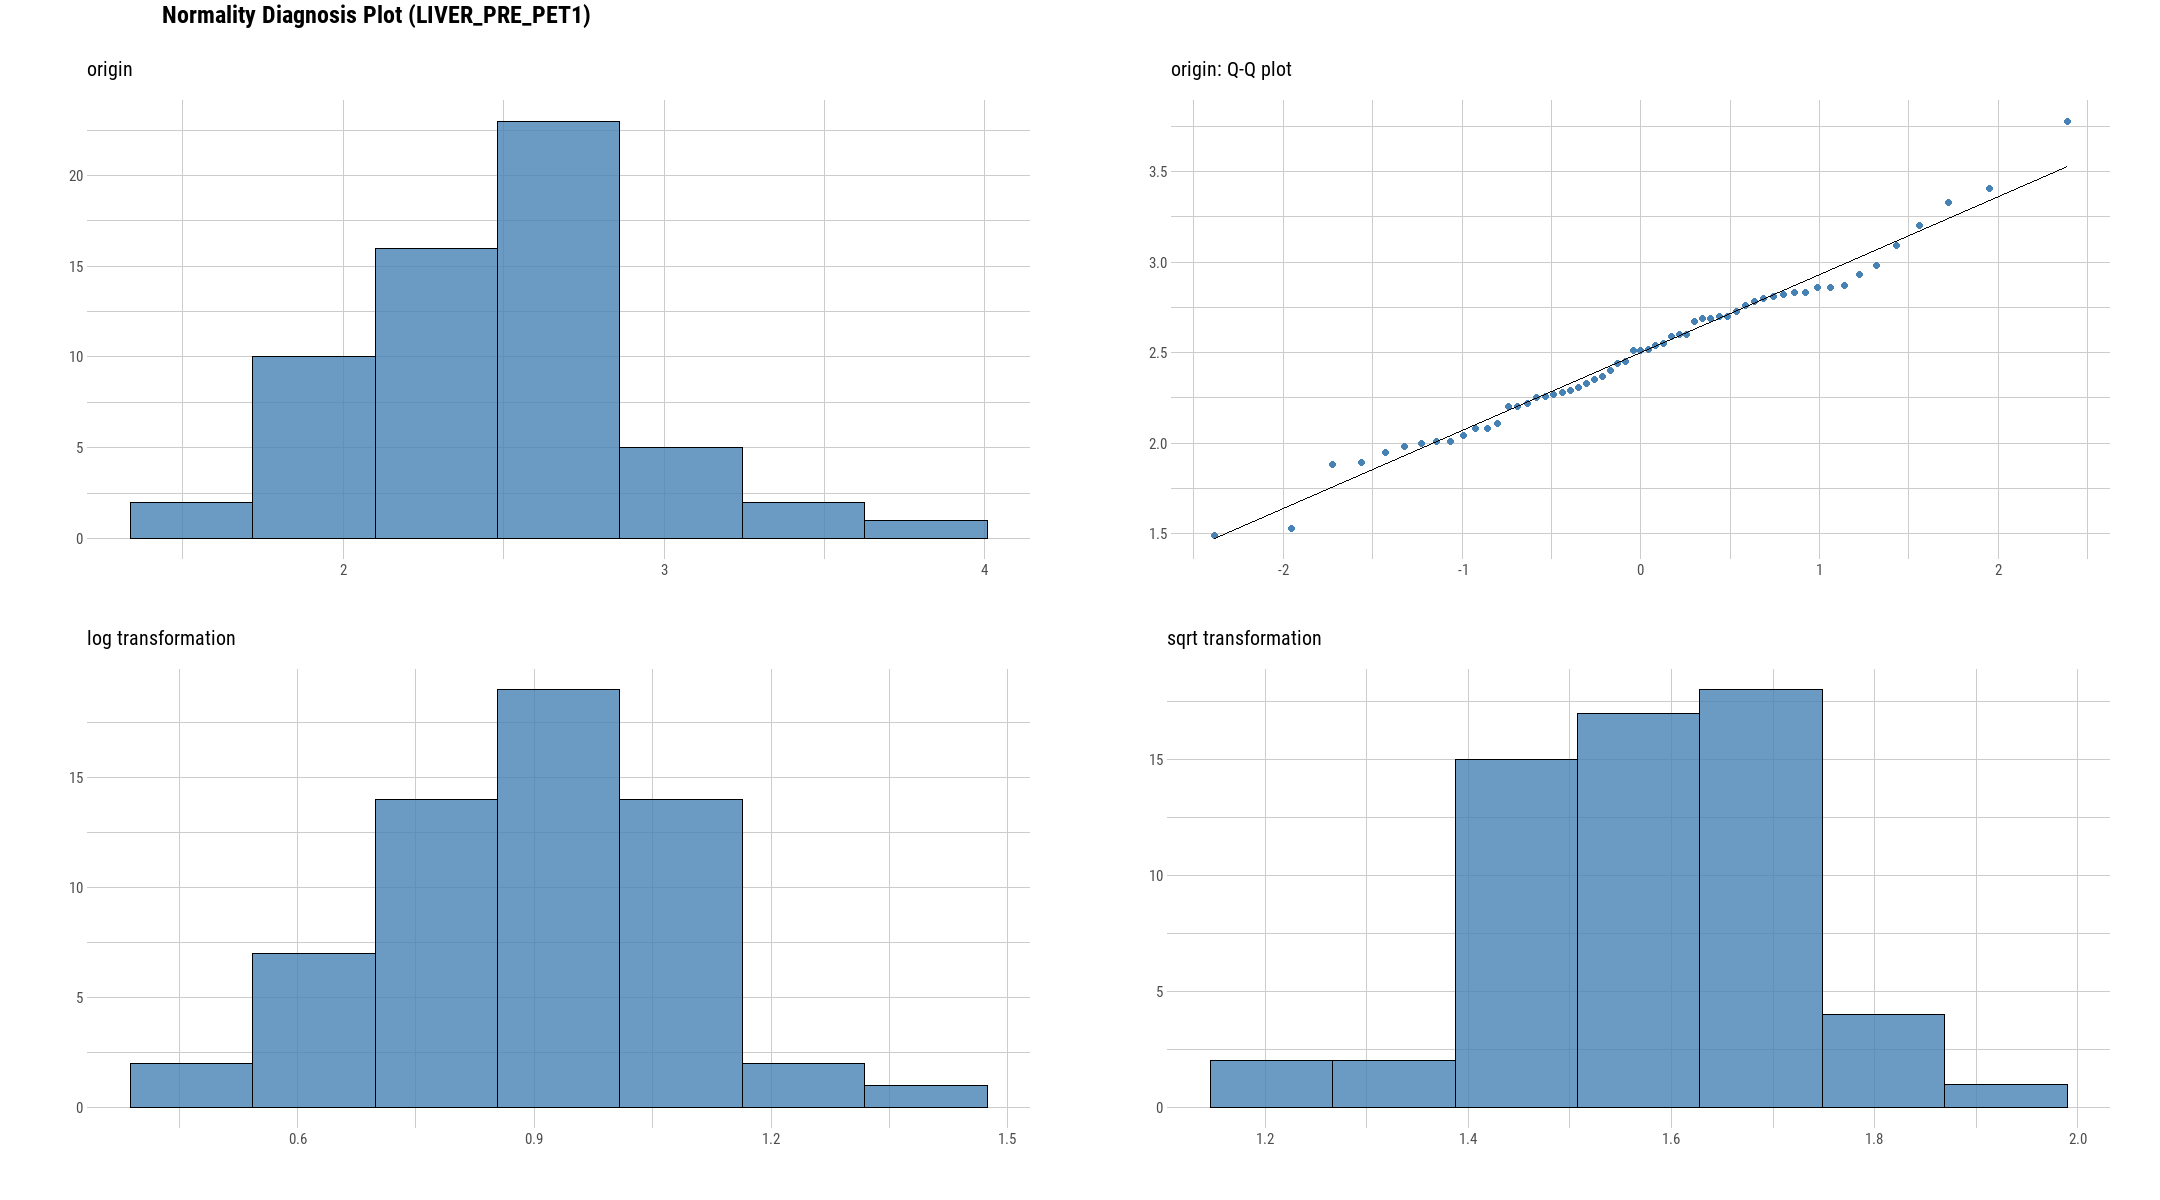

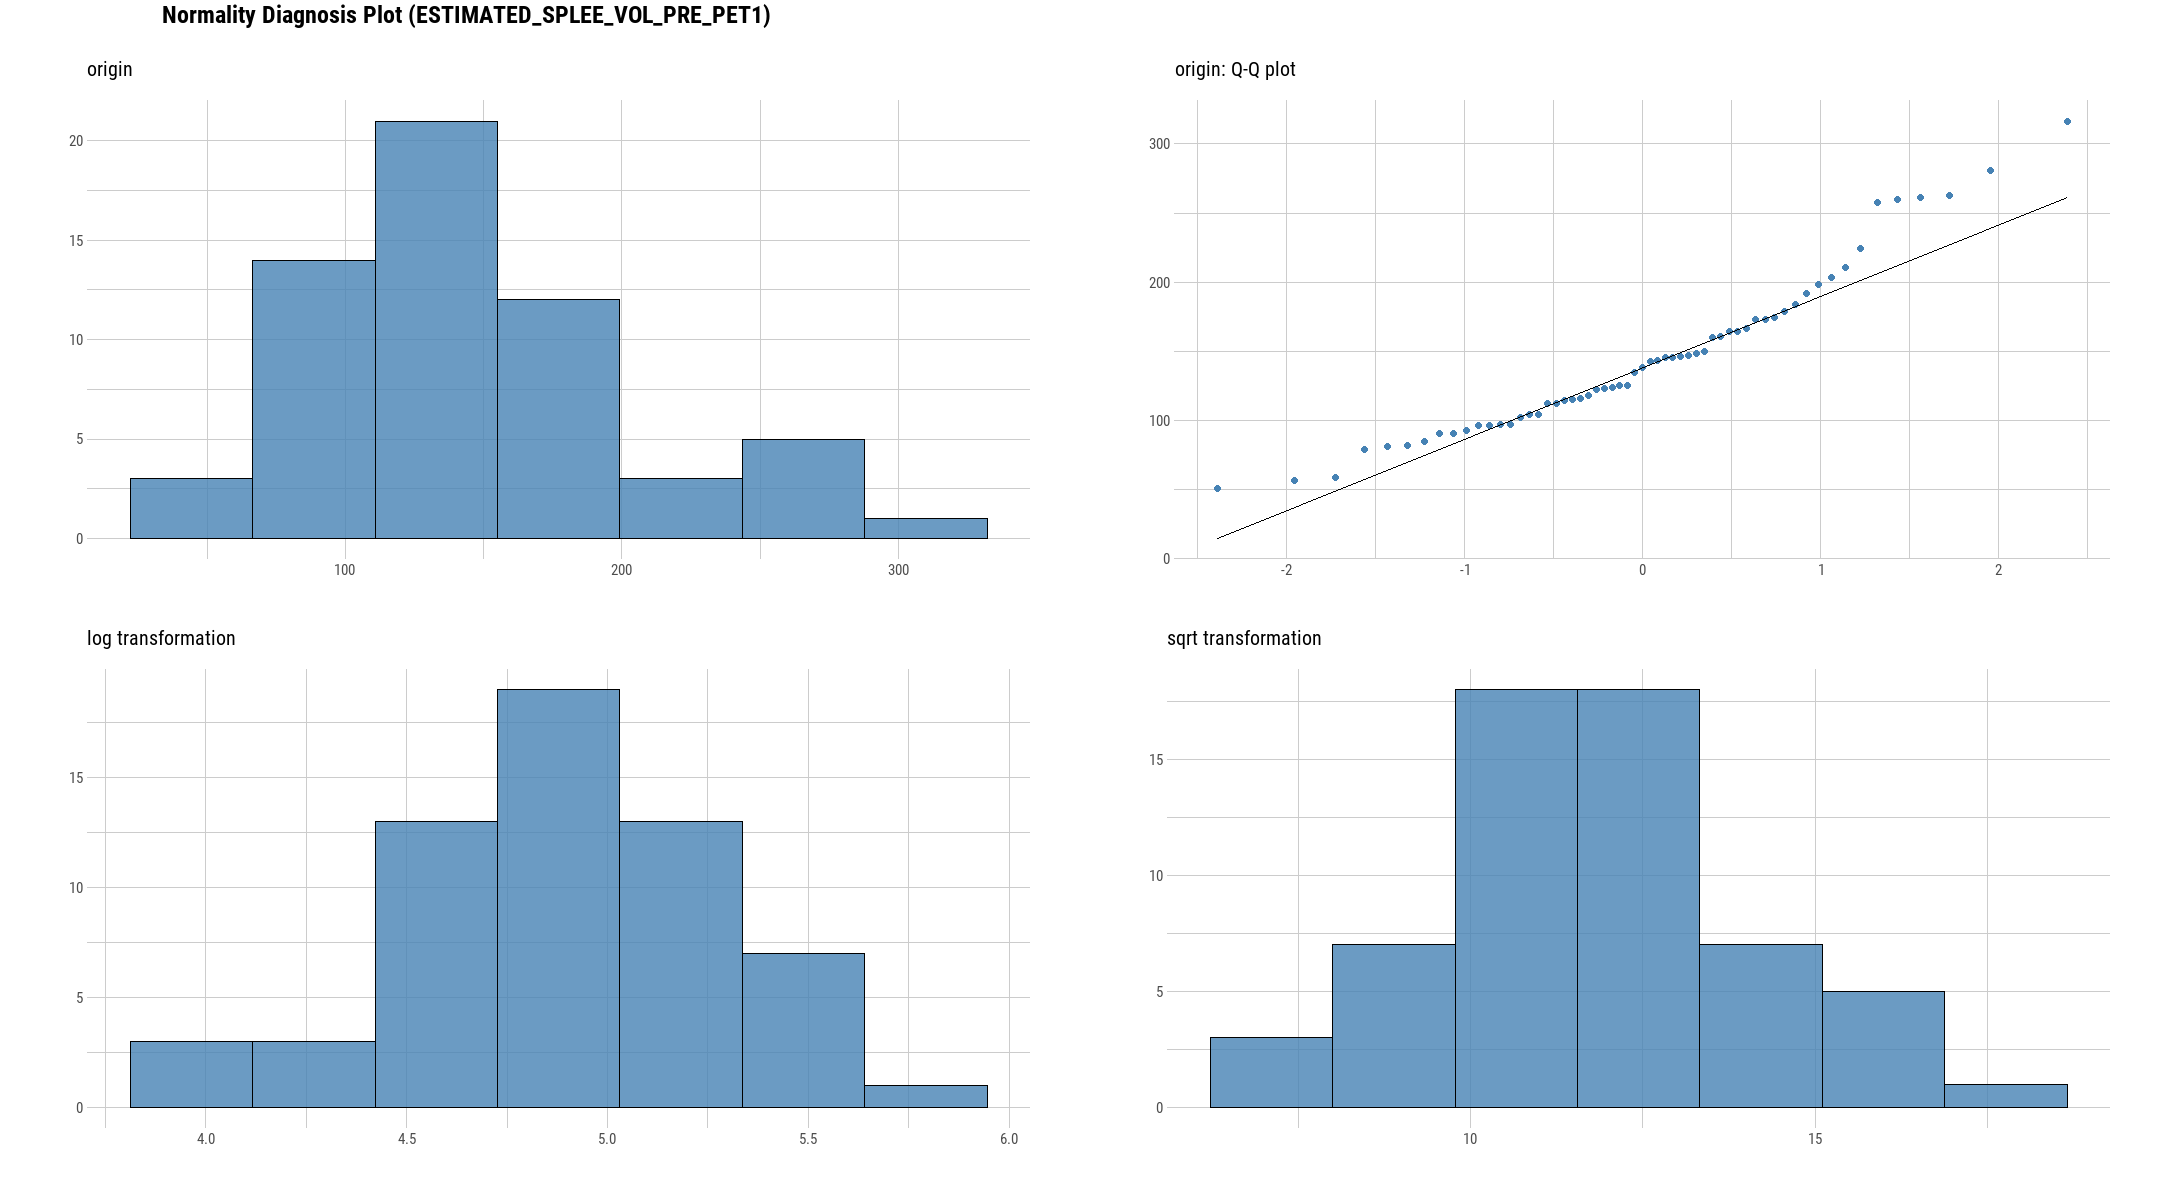

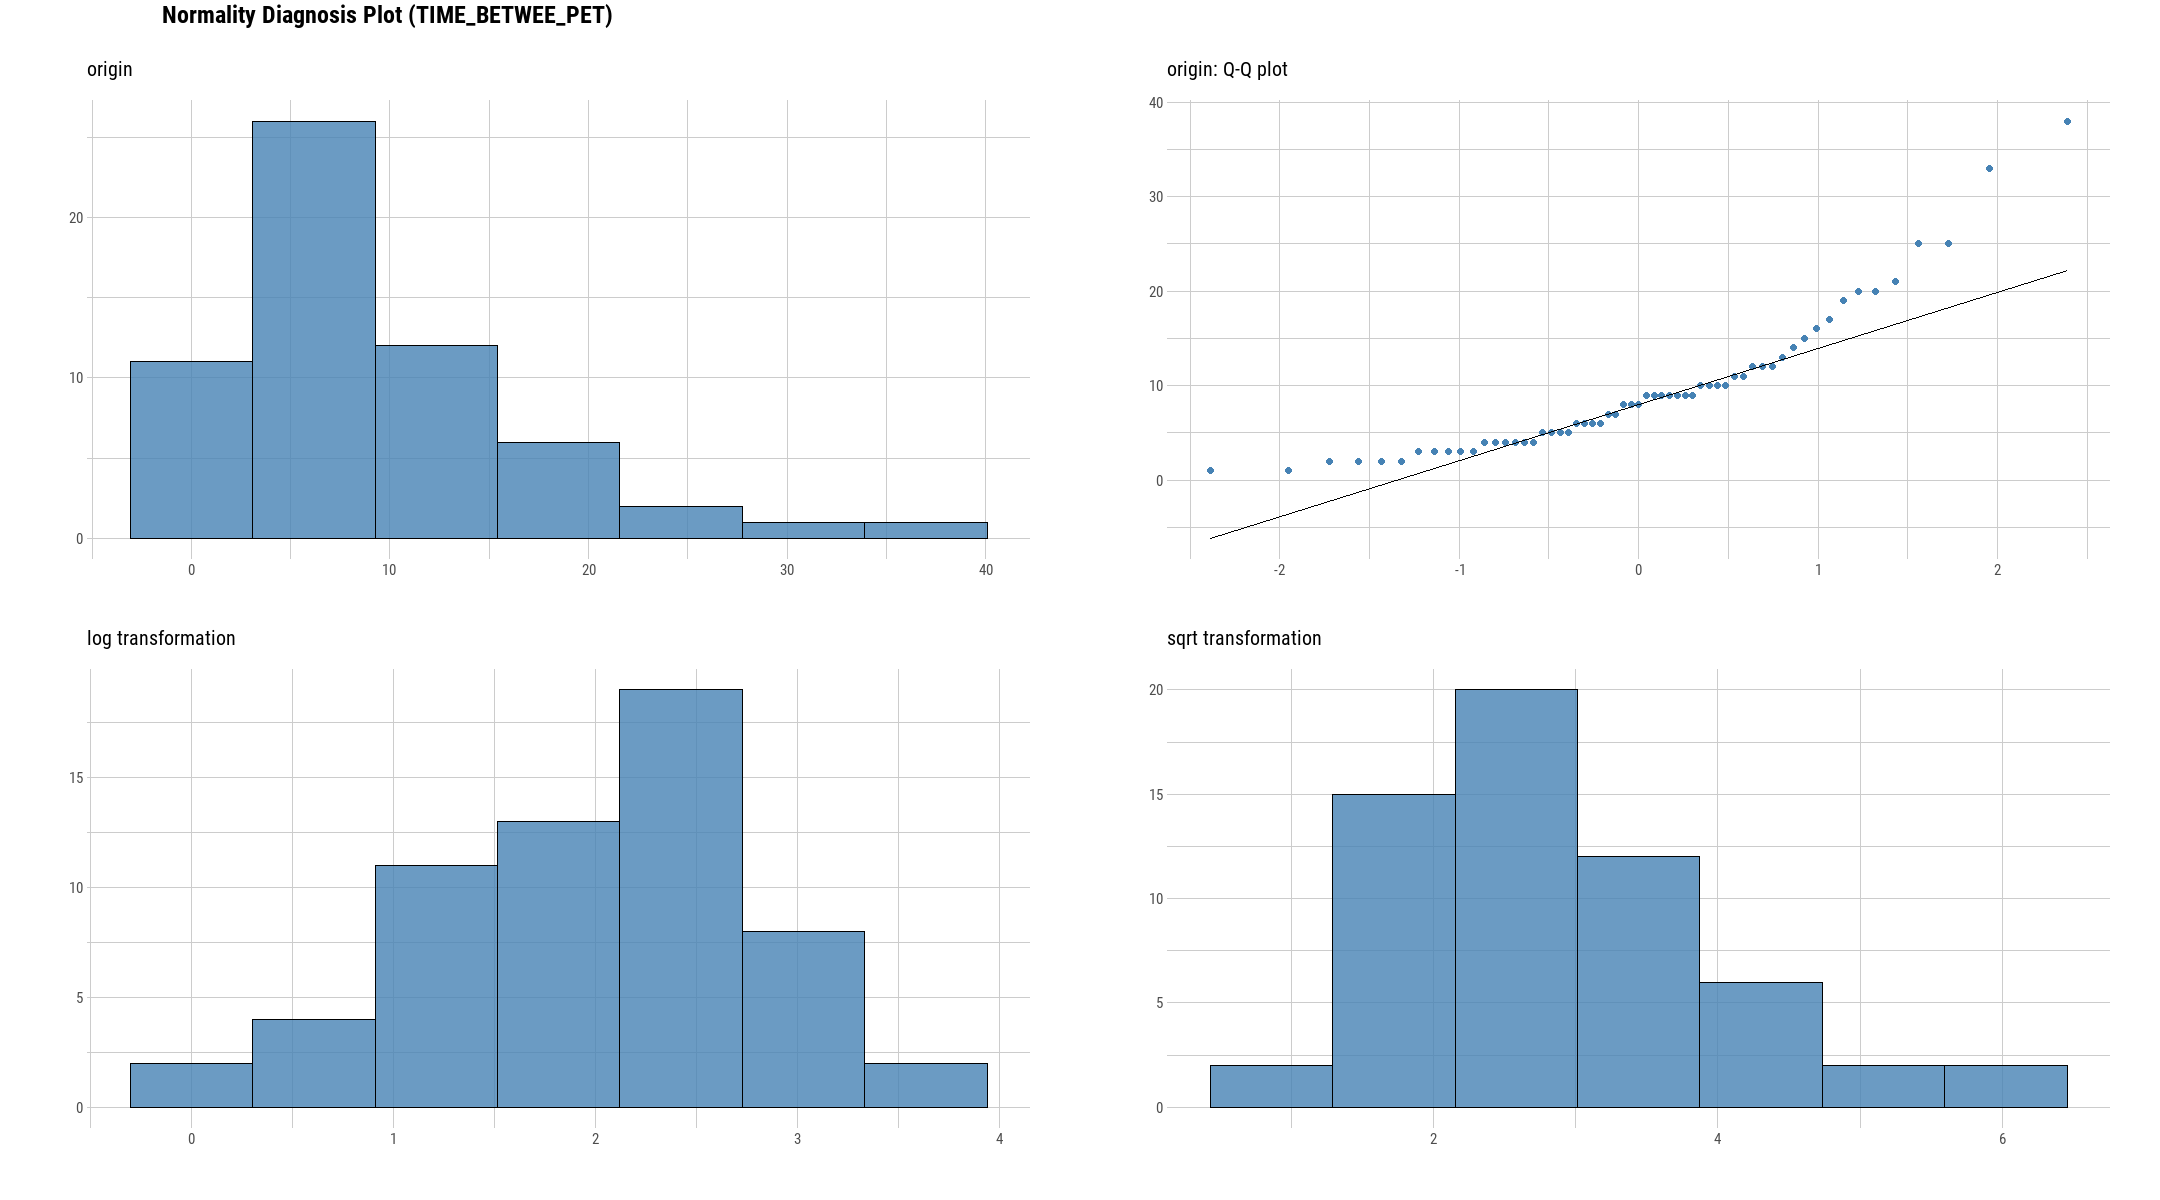

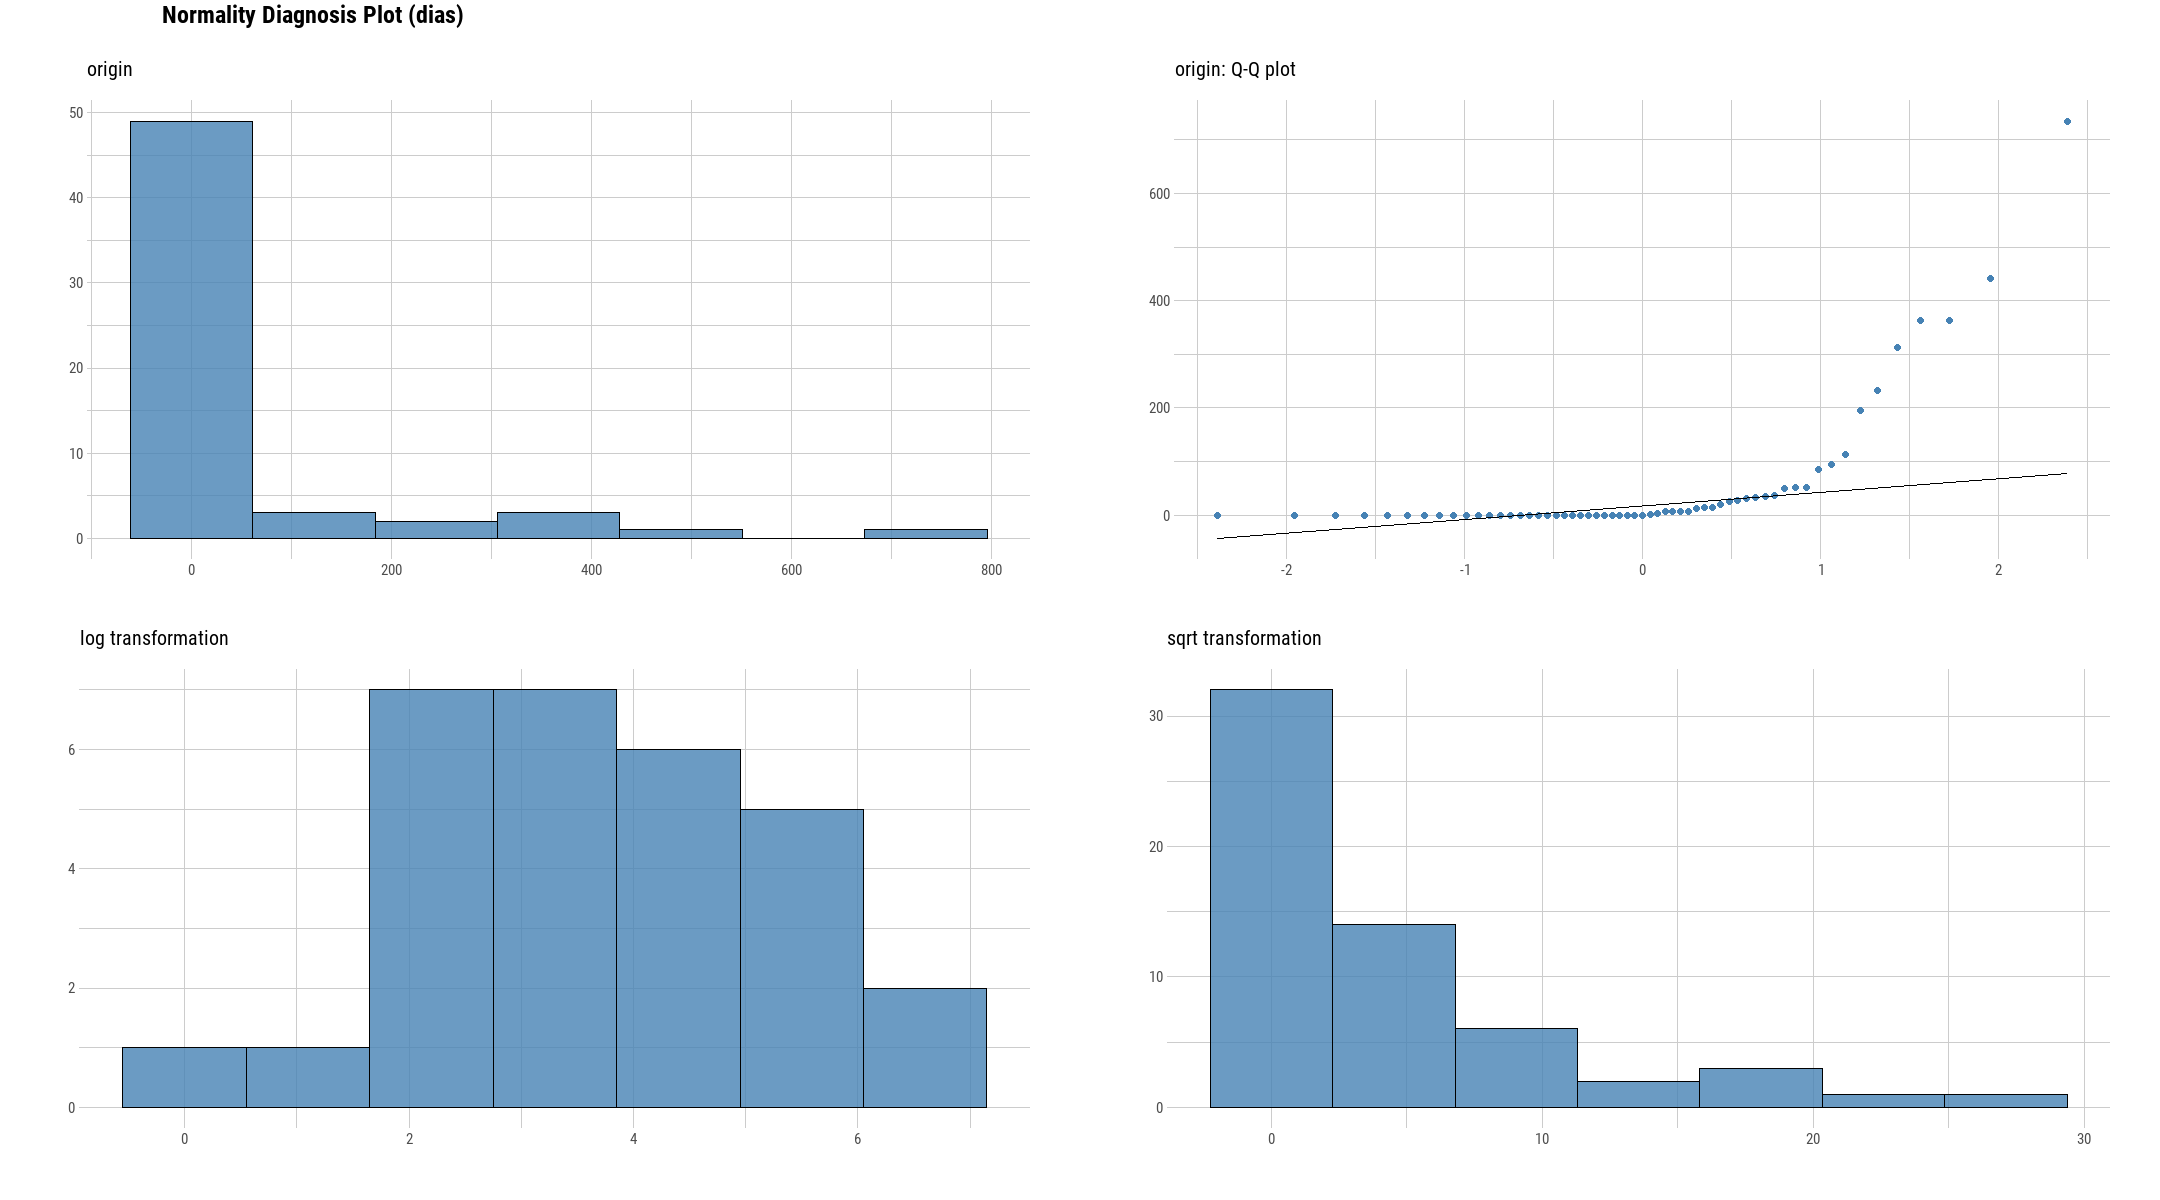

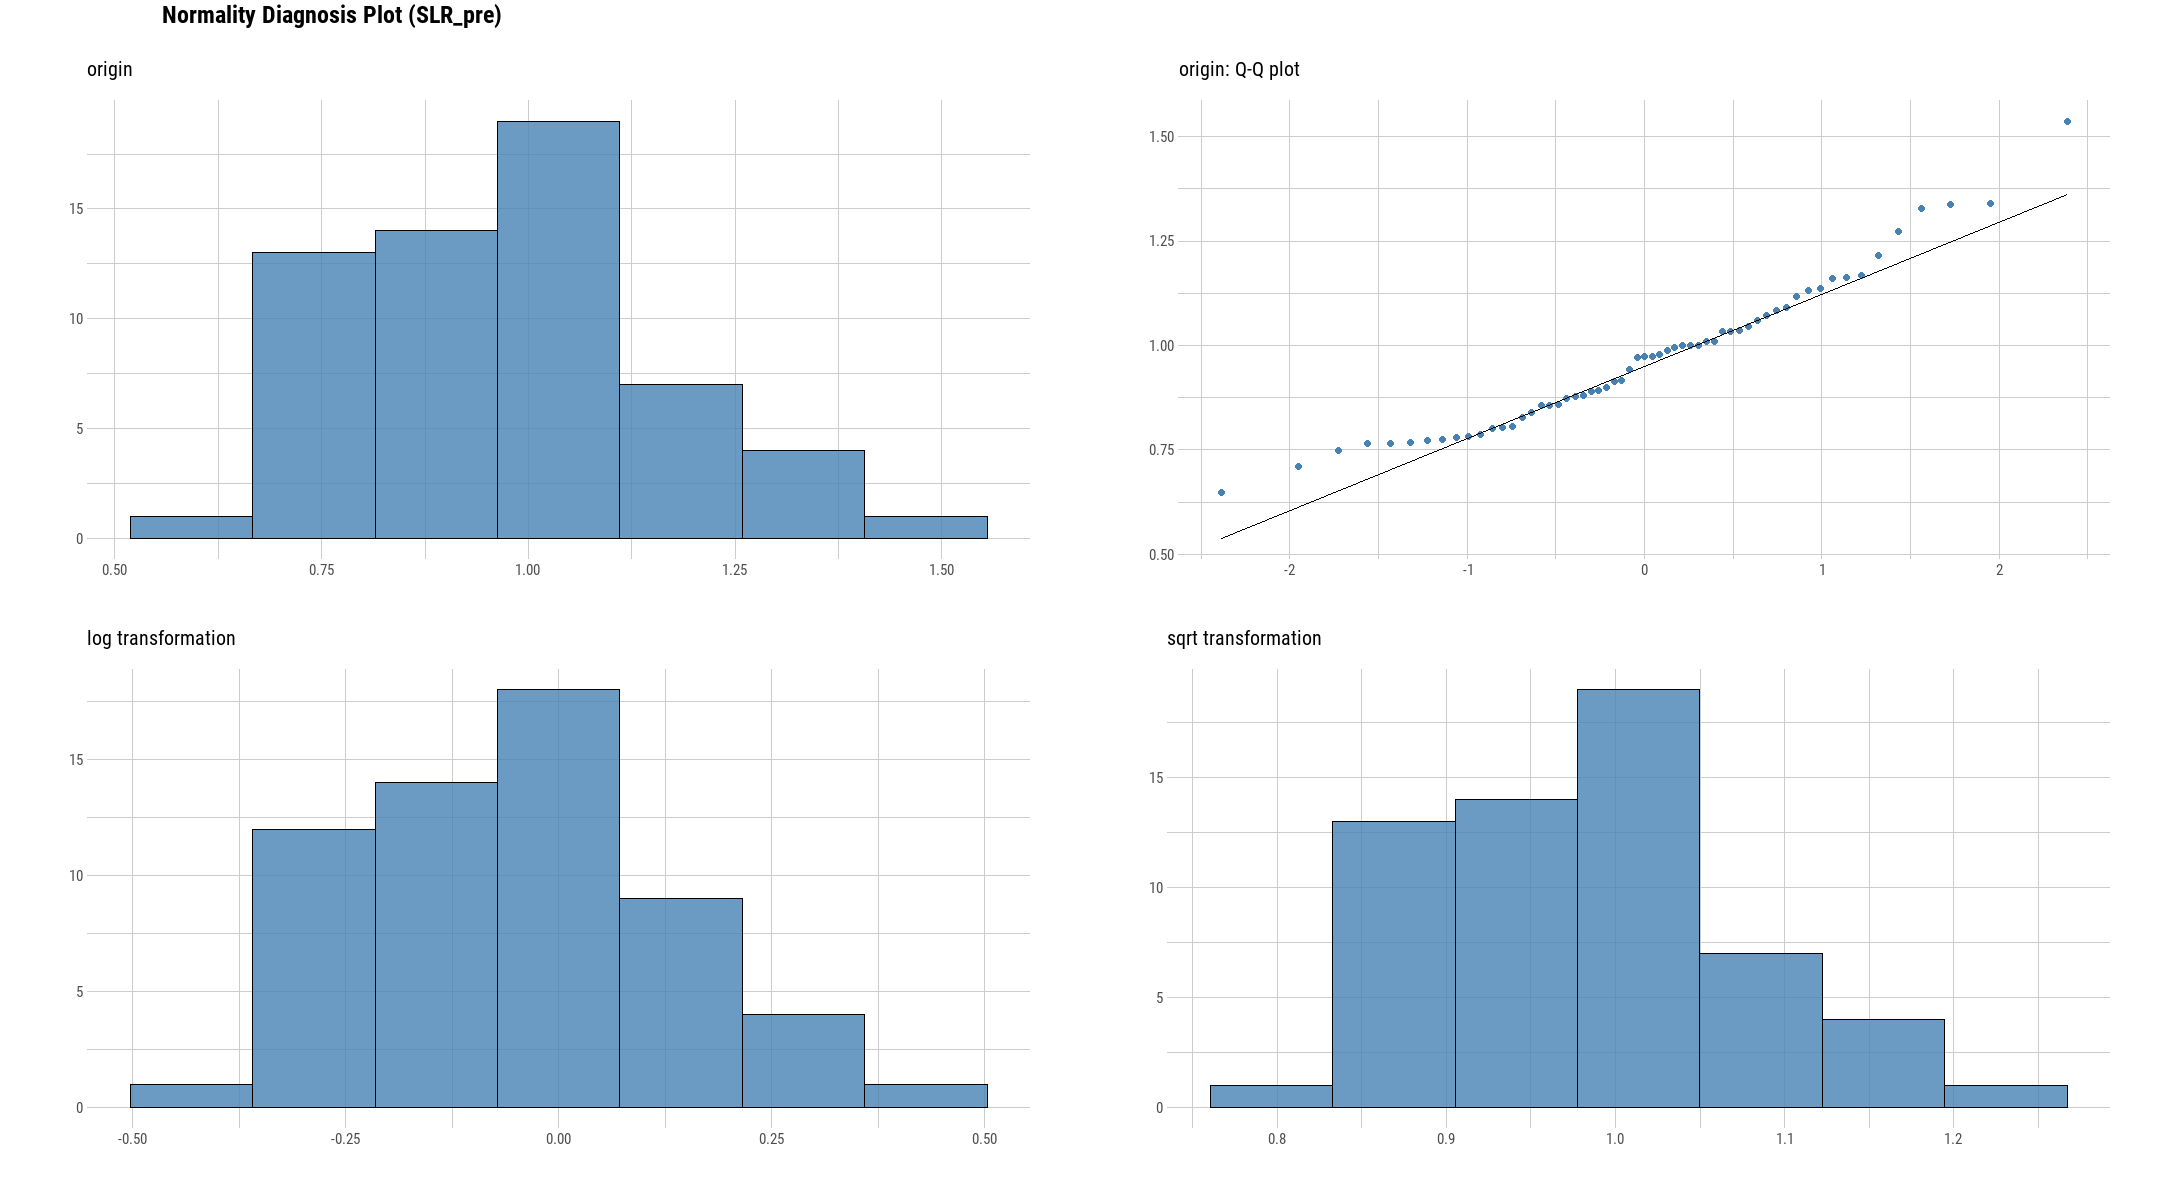

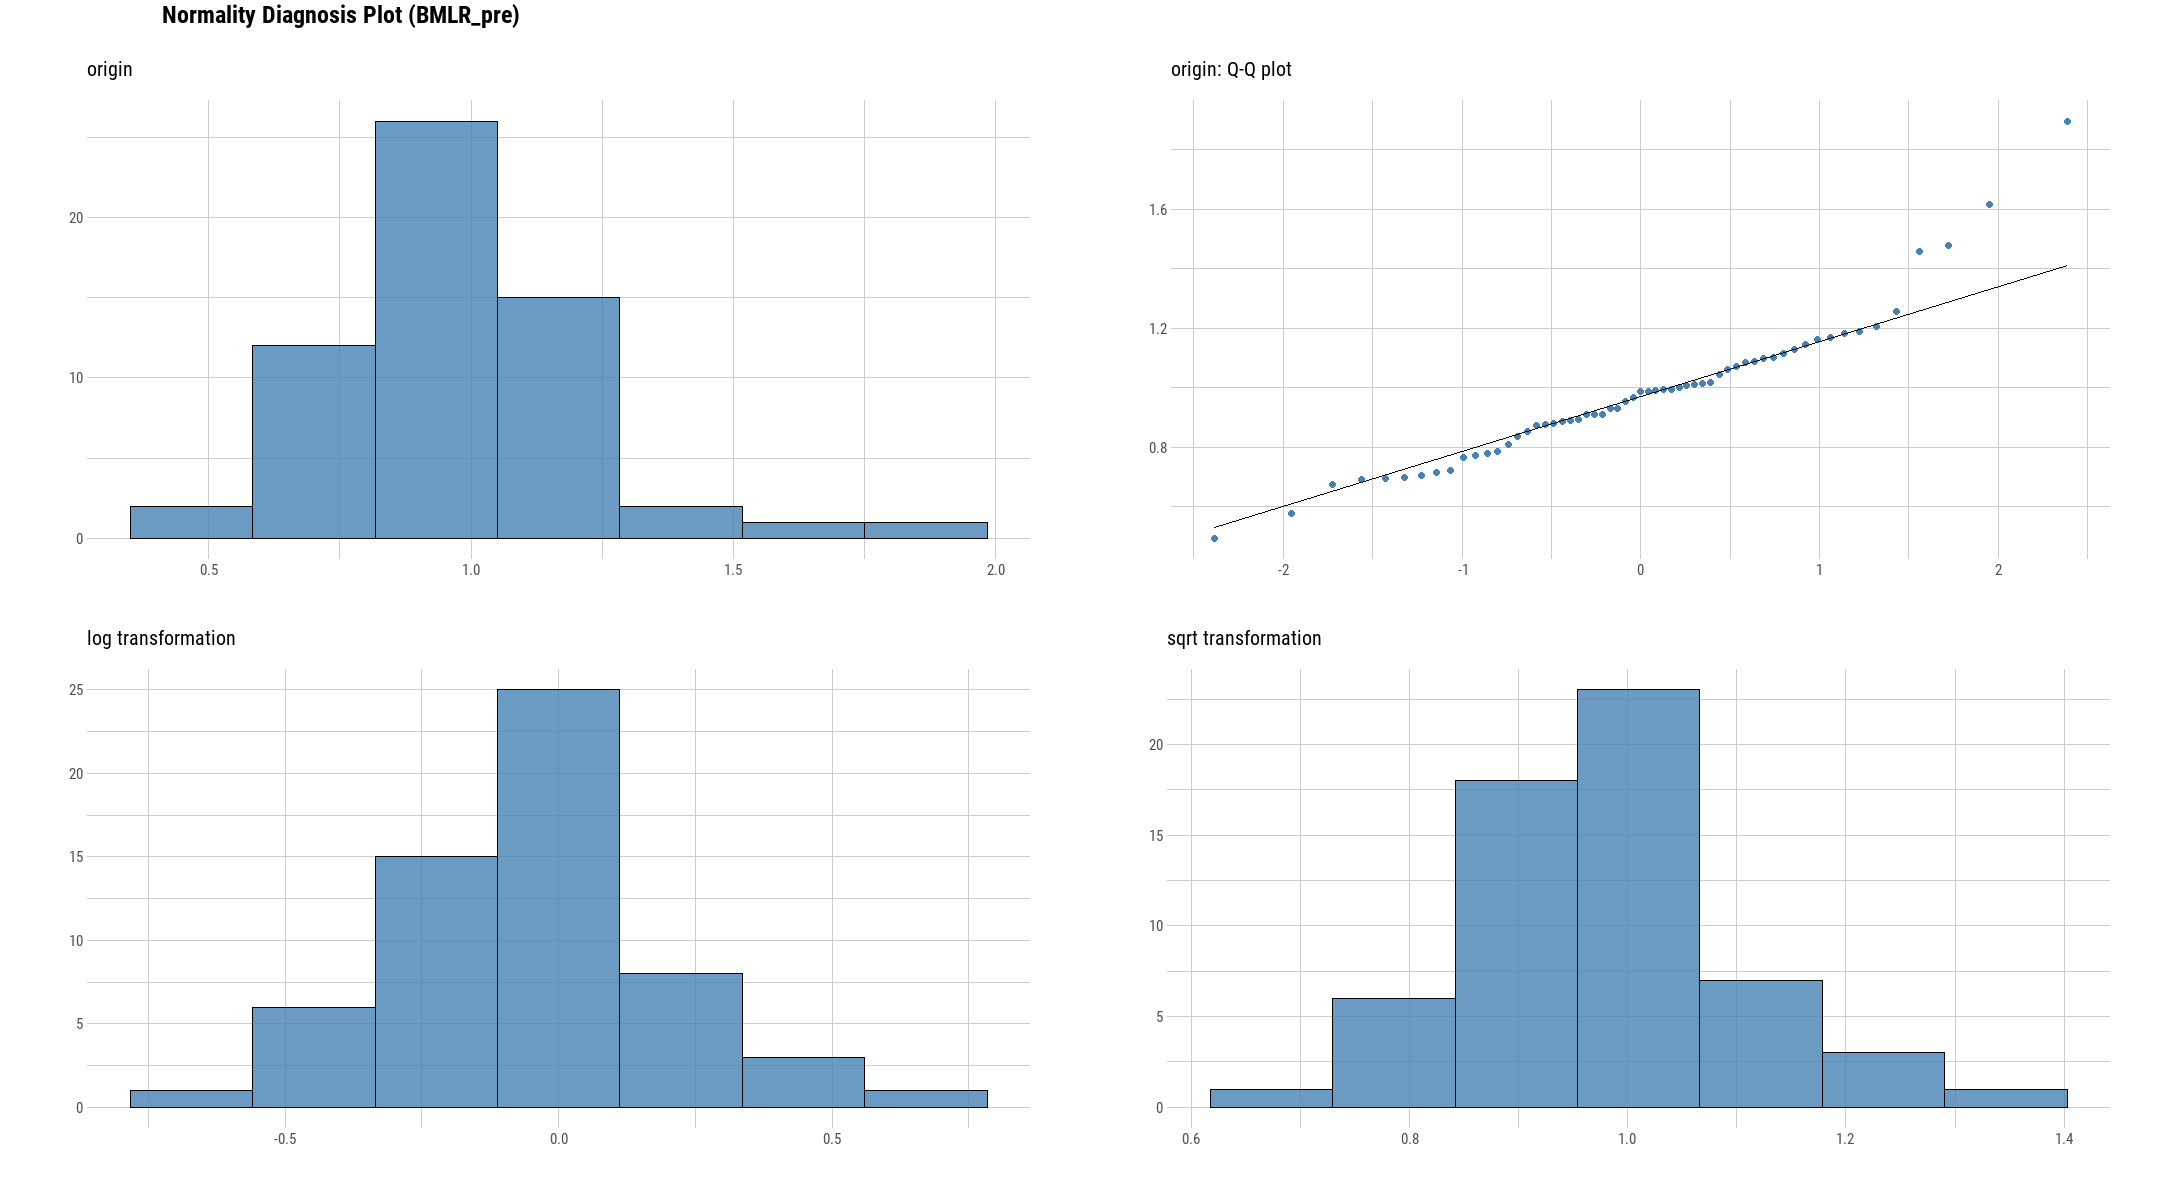

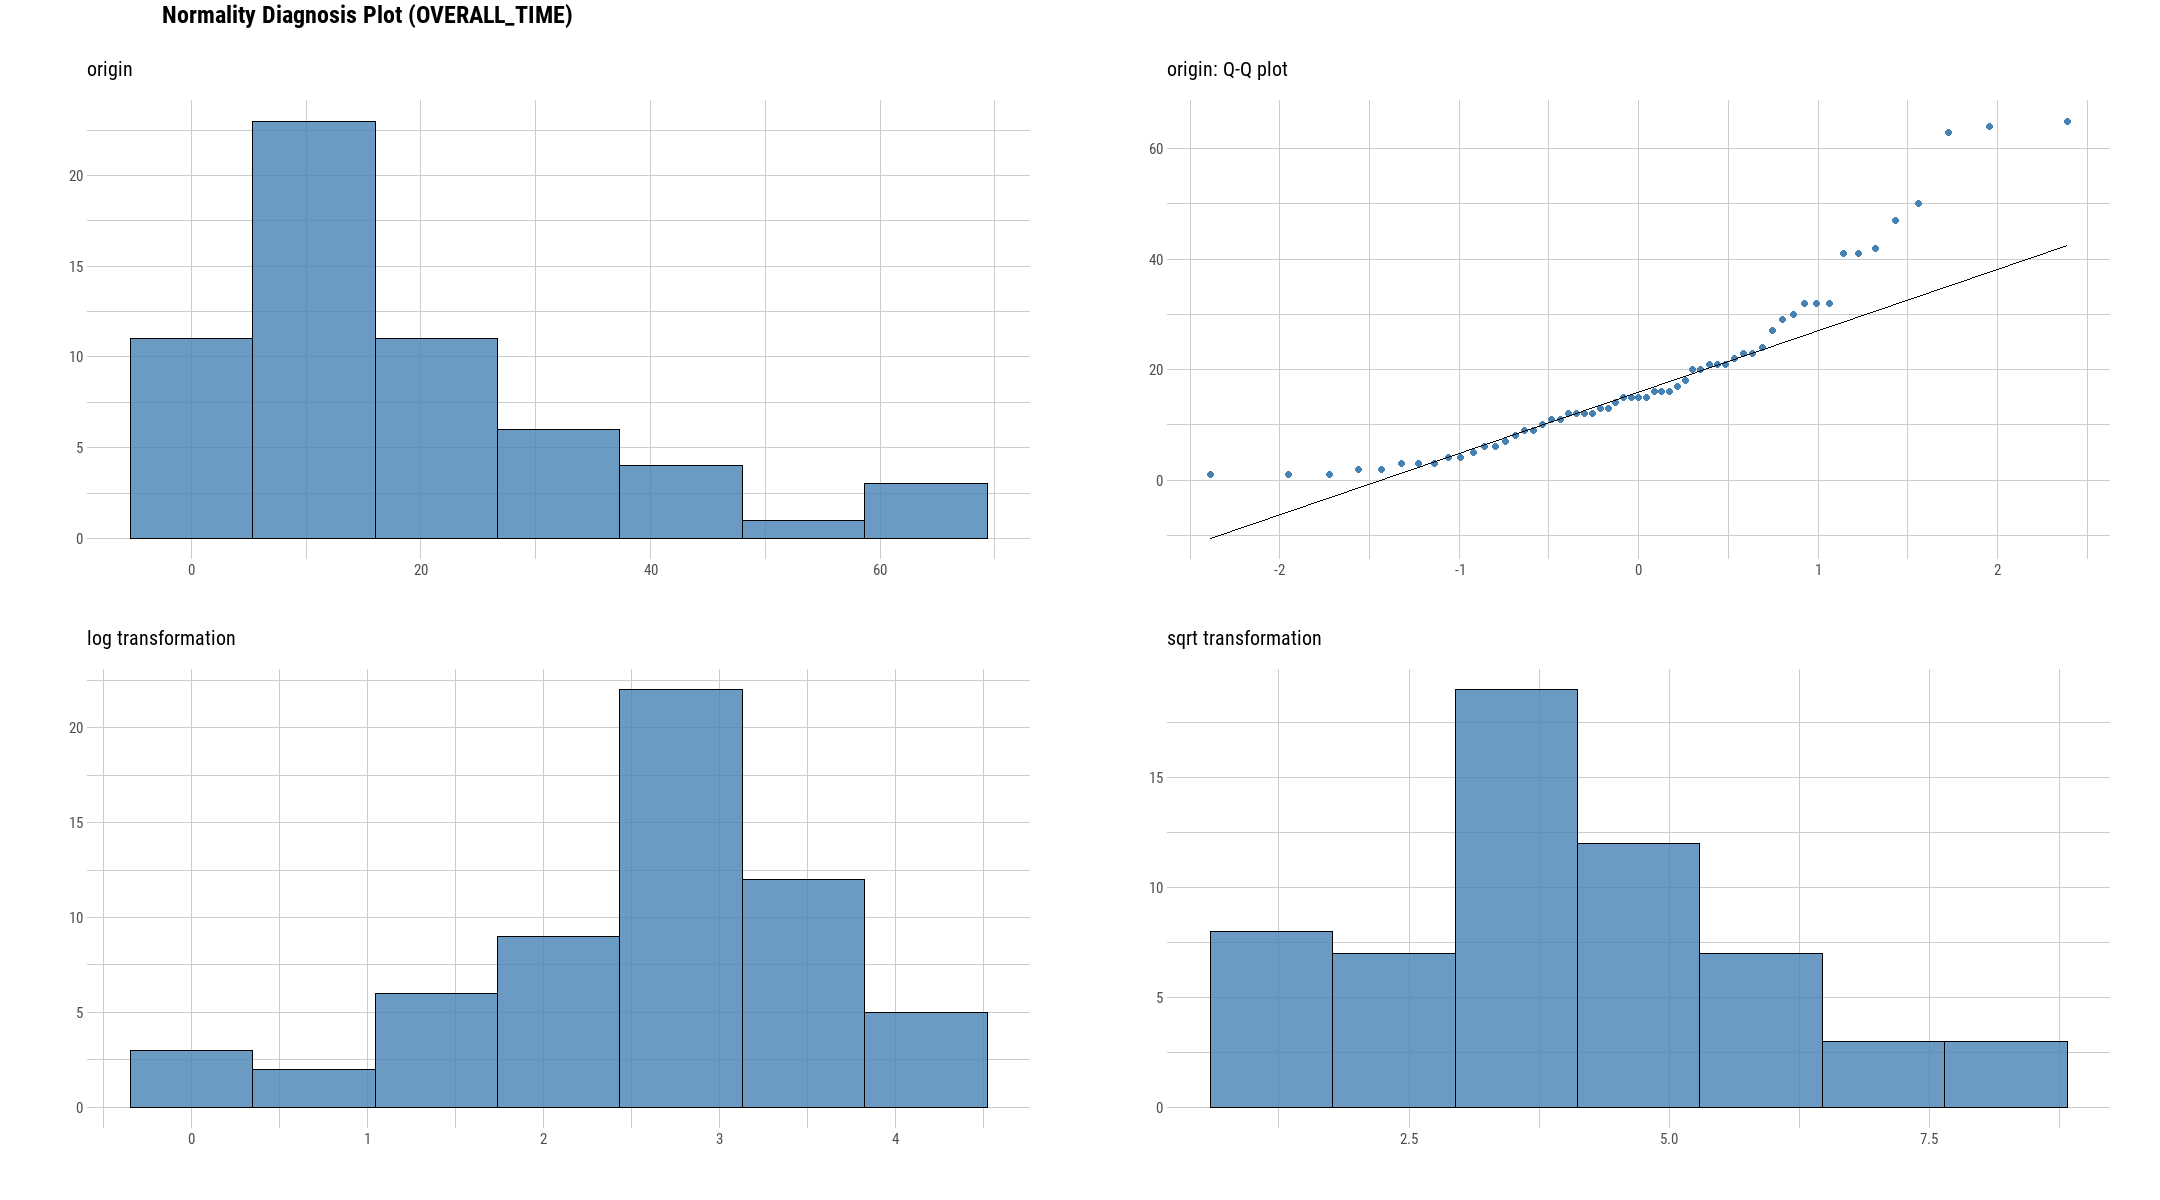

In [1085]:
# Plot de normalidad:
plot_normality(datos)

### Diagrama de correlacion variables numericas

In [1086]:
var_num

[1] "CYCLES_BETWEEN_PET1_PET2"     "AGE"                         
 [3] "WBC_PRE"                      "RBC_PRE"                     
 [5] "HB_PRE"                       "PLT_PRE"                     
 [7] "CRP_PRE"                      "ALBUMIN_PRE"                 
 [9] "LDH_PRE"                      "eGFR_PRE"                    
[11] "AST_PRE"                      "ALT_PRE"                     
[13] "K_PRE"                        "BGL_PRE_PET1"                
[15] "BMI"                          "BW_PRE"                      
[17] "SPLEEN_FDG_UPT_PRE_PET1"      "BM_UPT_PRE_PET1"             
[19] "LIVER_PRE_PET1"               "ESTIMATED_SPLEE_VOL_PRE_PET1"
[21] "TIME_BETWEE_PET"              "dias"                        
[23] "SLR_pre"                      "BMLR_pre"                    
[25] "OVERALL_TIME"

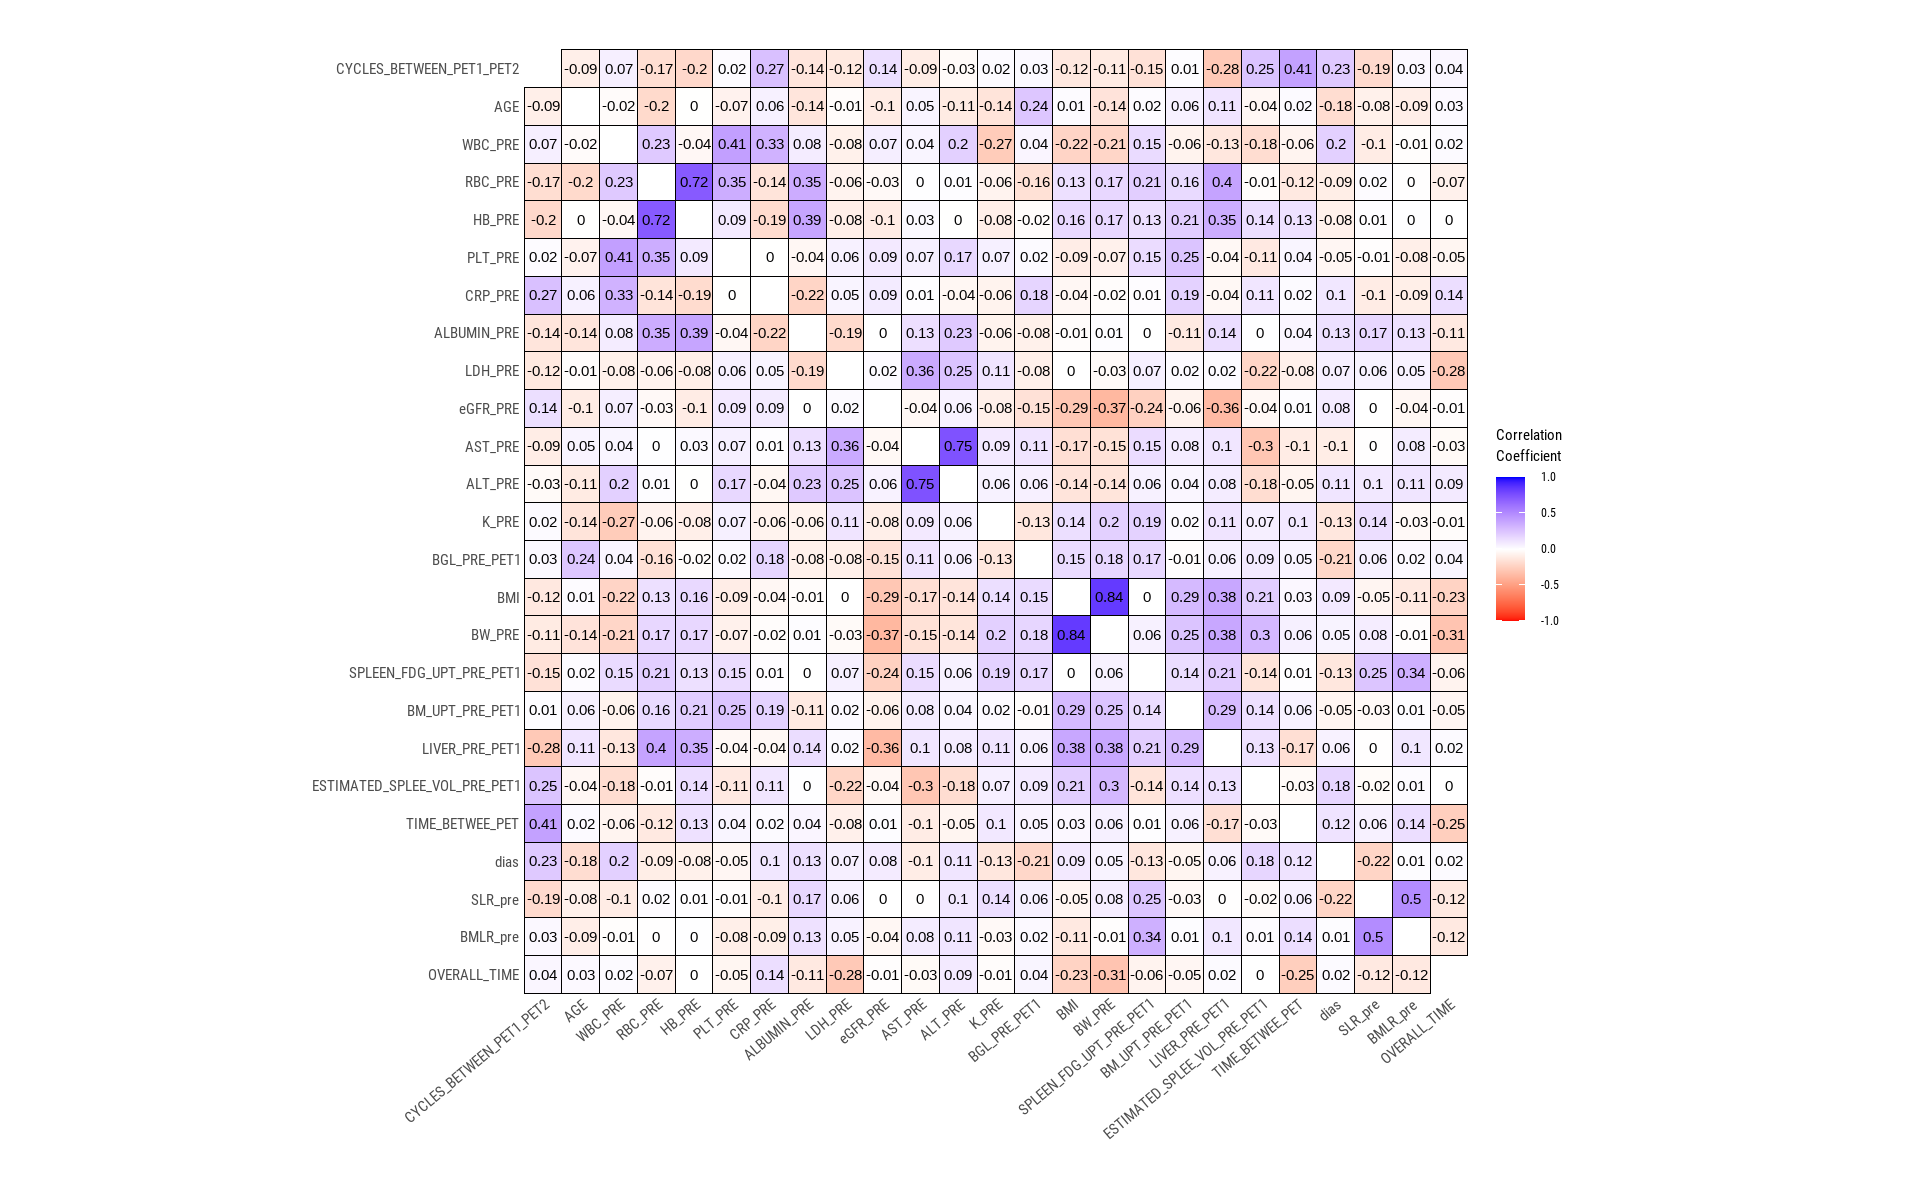

In [1087]:
vec_var_num = c('CYCLES_BETWEEN_PET1_PET2',
                'AGE',
                'WBC_PRE',
                'RBC_PRE',
                'HB_PRE',
                'PLT_PRE',
                'CRP_PRE',
                'ALBUMIN_PRE',
                'LDH_PRE',
                'eGFR_PRE',
                'AST_PRE',
                'ALT_PRE',
                'K_PRE',
                'BGL_PRE_PET1',
                'BMI',
                'BW_PRE',
                'SPLEEN_FDG_UPT_PRE_PET1',
                'BM_UPT_PRE_PET1',
                'LIVER_PRE_PET1',
                'ESTIMATED_SPLEE_VOL_PRE_PET1',
                'TIME_BETWEE_PET',
                'dias',
                'SLR_pre',
                'BMLR_pre',
                'OVERALL_TIME')

options(repr.plot.width=16, repr.plot.height=10)

plot_correlate(datos[,vec_var_num],method = "spearman")

### Coeficiente de correlacion por parejas

In [1088]:
# coeficiente de correlación
library(Hmisc)
vec_var_num = c('CYCLES_BETWEEN_PET1_PET2',
                'AGE',
                'WBC_PRE',
                'RBC_PRE',
                'HB_PRE',
                'PLT_PRE',
                'CRP_PRE',
                'ALBUMIN_PRE',
                'LDH_PRE',
                'eGFR_PRE',
                'AST_PRE',
                'ALT_PRE',
                'K_PRE',
                'BGL_PRE_PET1',
                'BMI',
                'BW_PRE',
                'SPLEEN_FDG_UPT_PRE_PET1',
                'BM_UPT_PRE_PET1',
                'LIVER_PRE_PET1',
                'ESTIMATED_SPLEE_VOL_PRE_PET1',
                'TIME_BETWEE_PET',
                'dias',
                'SLR_pre',
                'BMLR_pre',
                'OVERALL_TIME')

# Correlaciones por parejas:

flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
  )
}


# Calculamos la matriz de correlacion y visualizamos la correlacion de mayor intensidad
tcor<-rcorr(as.matrix(datos[,vec_var_num]),type = "spearman")
corr_data <- flattenCorrMatrix(tcor$r, tcor$P) %>%
    arrange(desc(abs(cor))) #%>%
    #filter(row=='Sales')
corr_data
options(warn = -1)

row                          column                       cor          
1   BMI                          BW_PRE                        0.8439125610
2   AST_PRE                      ALT_PRE                       0.7485788612
3   RBC_PRE                      HB_PRE                        0.7152462328
4   SLR_pre                      BMLR_pre                      0.4975816473
5   WBC_PRE                      PLT_PRE                       0.4128417580
6   CYCLES_BETWEEN_PET1_PET2     TIME_BETWEE_PET               0.4059972839
7   RBC_PRE                      LIVER_PRE_PET1                0.3953644722
8   HB_PRE                       ALBUMIN_PRE                   0.3873943684
9   BMI                          LIVER_PRE_PET1                0.3772760511
10  BW_PRE                       LIVER_PRE_PET1                0.3767317487
11  eGFR_PRE                     BW_PRE                       -0.3716937022
12  LDH_PRE                      AST_PRE                       0.3632829124
13  eGFR_PRE                     LIVER_PRE_PET1               -0.3573599908
14  RBC_PRE                      ALBUMIN_PRE                   0.3547613964
15  RBC_PRE                      PLT_PRE                       0.3502893385
16  HB_PRE                       LIVER_PRE_PET1                0.3499144920
17  SPLEEN_FDG_UPT_PRE_PET1      BMLR_pre                      0.3396383887
18  WBC_PRE                      CRP_PRE                       0.3280741334
19  BW_PRE                       OVERALL_TIME                 -0.3057847098
20  BW_PRE                       ESTIMATED_SPLEE_VOL_PRE_PET1  0.3043719681
21  AST_PRE                      ESTIMATED_SPLEE_VOL_PRE_PET1 -0.2969473800
22  BMI                          BM_UPT_PRE_PET1               0.2935812057
23  BM_UPT_PRE_PET1              LIVER_PRE_PET1                0.2918323210
24  eGFR_PRE                     BMI                          -0.2910918880
25  LDH_PRE                      OVERALL_TIME                 -0.2822208193
26  CYCLES_BETWEEN_PET1_PET2     LIVER_PRE_PET1               -0.2818737216
27  CYCLES_BETWEEN_PET1_PET2     CRP_PRE                       0.2702070989
28  WBC_PRE                      K_PRE                        -0.2673740583
29  LDH_PRE                      ALT_PRE                       0.2549621514
30  PLT_PRE                      BM_UPT_PRE_PET1               0.2540631421
31  BW_PRE                       BM_UPT_PRE_PET1               0.2540411018
32  CYCLES_BETWEEN_PET1_PET2     ESTIMATED_SPLEE_VOL_PRE_PET1  0.2536110188
33  TIME_BETWEE_PET              OVERALL_TIME                 -0.2510153506
34  SPLEEN_FDG_UPT_PRE_PET1      SLR_pre                       0.2473979804
35  AGE                          BGL_PRE_PET1                  0.2444181044
36  eGFR_PRE                     SPLEEN_FDG_UPT_PRE_PET1      -0.2403333203
37  CYCLES_BETWEEN_PET1_PET2     dias                          0.2324762154
38  WBC_PRE                      RBC_PRE                       0.2310951998
39  ALBUMIN_PRE                  ALT_PRE                       0.2308704321
40  BMI                          OVERALL_TIME                 -0.2297120028
41  WBC_PRE                      BMI                          -0.2229349621
42  CRP_PRE                      ALBUMIN_PRE                  -0.2197259109
43  dias                         SLR_pre                      -0.2193832537
44  LDH_PRE                      ESTIMATED_SPLEE_VOL_PRE_PET1 -0.2162525652
45  HB_PRE                       BM_UPT_PRE_PET1               0.2143995328
46  WBC_PRE                      BW_PRE                       -0.2122890334
47  SPLEEN_FDG_UPT_PRE_PET1      LIVER_PRE_PET1                0.2122421613
48  BGL_PRE_PET1                 dias                         -0.2107065246
49  RBC_PRE                      SPLEEN_FDG_UPT_PRE_PET1       0.2089345109
50  BMI                          ESTIMATED_SPLEE_VOL_PRE_PET1  0.2072825039
51  CYCLES_BETWEEN_PET1_PET2     HB_PRE                       -0.2027624167
52  WBC_PRE                      dias               

## Descripcion variables cualitativas de entrada

### Tabla de frecuencias de las variables cualitativas

In [1089]:
# Todas la tablas de frecuencias:
all_var <- univar_category(datos) 

all_var

$STATUS
  STATUS  n      rate
1  ALIVE 38 0.6440678
2  DEATH 21 0.3559322

$GENDER
  GENDER  n      rate
1 FEMALE 20 0.3389831
2   MALE 39 0.6610169

$TNM_STAGE
  TNM_STAGE  n      rate
1         I  6 0.1016949
2        II 15 0.2542373
3       III 26 0.4406780
4        IV 12 0.2033898

$DIAGNOSTIC
             DIAGNOSTIC  n       rate
1         EWING SARCOMA  2 0.03389831
2        GASTRIC CANCER  3 0.05084746
3         GINECOLOGICAL  7 0.11864407
4         HEAD AND NECK 10 0.16949153
5           LUNG CANCER 19 0.32203390
6              MELANOMA  5 0.08474576
7       PANCREAS CANCER  7 0.11864407
8          RENAL CANCER  4 0.06779661
9               SARCOMA  1 0.01694915
10 UROTHELIAL CARCINOMA  1 0.01694915

$TREATMENT
  TREATMENT  n      rate
1     CHEMO 37 0.6271186
2       ICI 22 0.3728814

$ECOGPS
                                  ECOGPS  n       rate
1                            ASYMTOMATIC 26 0.44067797
2                               BEDBOUND  1 0.01694915
3           SYMPTOMATIC >50 % IN THE BED  1 0.01694915
4             SYMPTOMATIC BUT AMBULATORY 17 0.28813559
5 SYMPTOMATIC,<50% IN BED DURING THE DAY 14 0.23728814

$COMORBIDITIES
         COMORBIDITIES  n       rate
1      ATEROESCLEROSIS  3 0.05084746
2   CANCER RRECURRENCE  8 0.13559322
3 CHRONIC INFLAMMATION  9 0.15254237
4    DIABETES MELLITUS 13 0.22033898
5       HYPERLIPIDEMIA 12 0.20338983
6         HYPERTENSION 14 0.23728814

$CTCNCI
                CTCNCI  n       rate
1         HIGHT SEVERE  4 0.06779661
2             MODERATE 11 0.18644068
3      NO SIDE EFFECTS 28 0.47457627
4               SEVERE 12 0.20338983
5 SLIGTHLY SIDE EFFCTS  4 0.06779661

$ACTION_TAKEN_
         ACTION_TAKEN_  n       rate
1 ADDED OTHER TREATMEN  3 0.05084746
2       ADDED STEROIDS  1 0.01694915
3     DOSE NOT CHANGED 21 0.35593220
4         DOSE REDUCED 17 0.28813559
5     DRUG INTERRUPTED  9 0.15254237
6        DRUG WIHDRAWN  1 0.01694915
7               UNKNOW  7 0.11864407

### Graficos de barras de las variables cualitativas

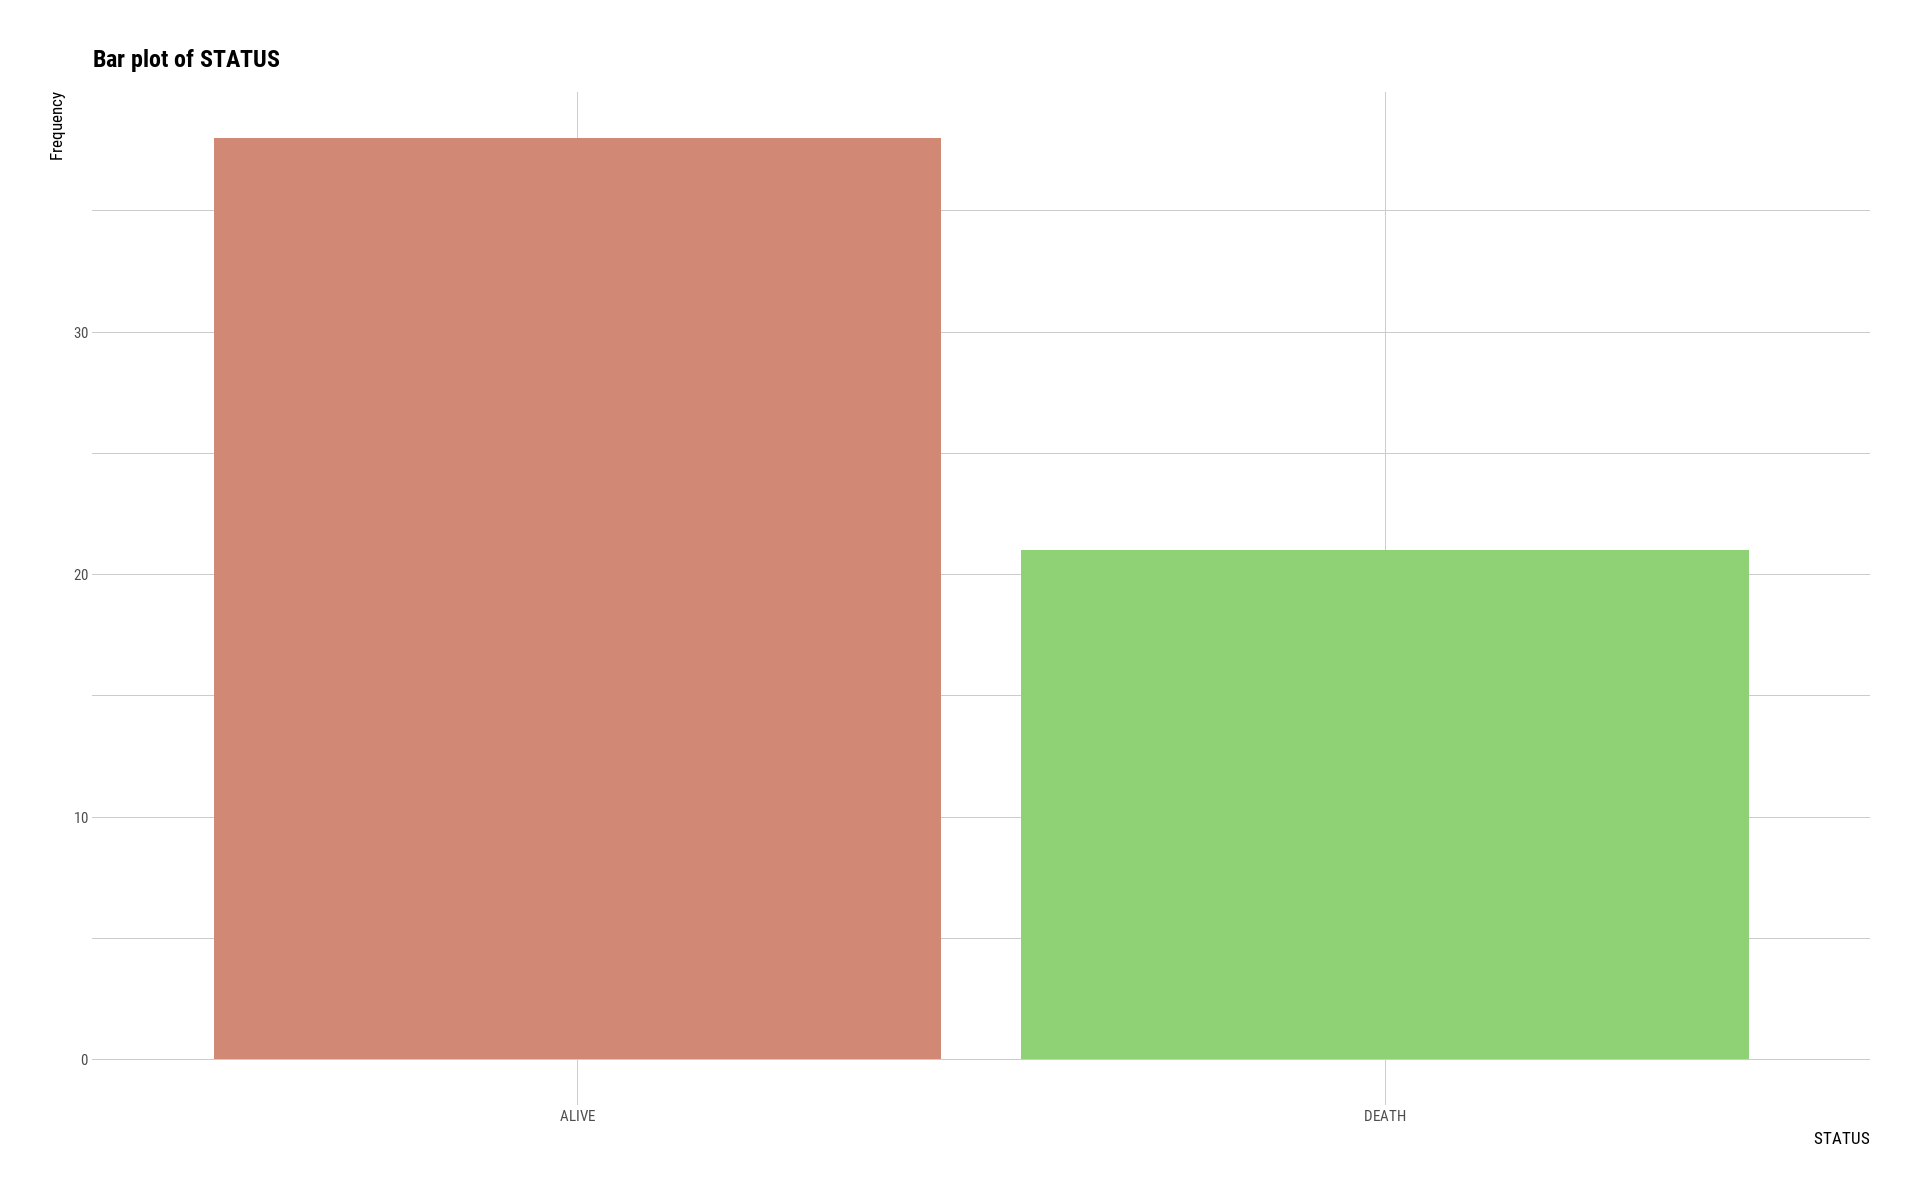

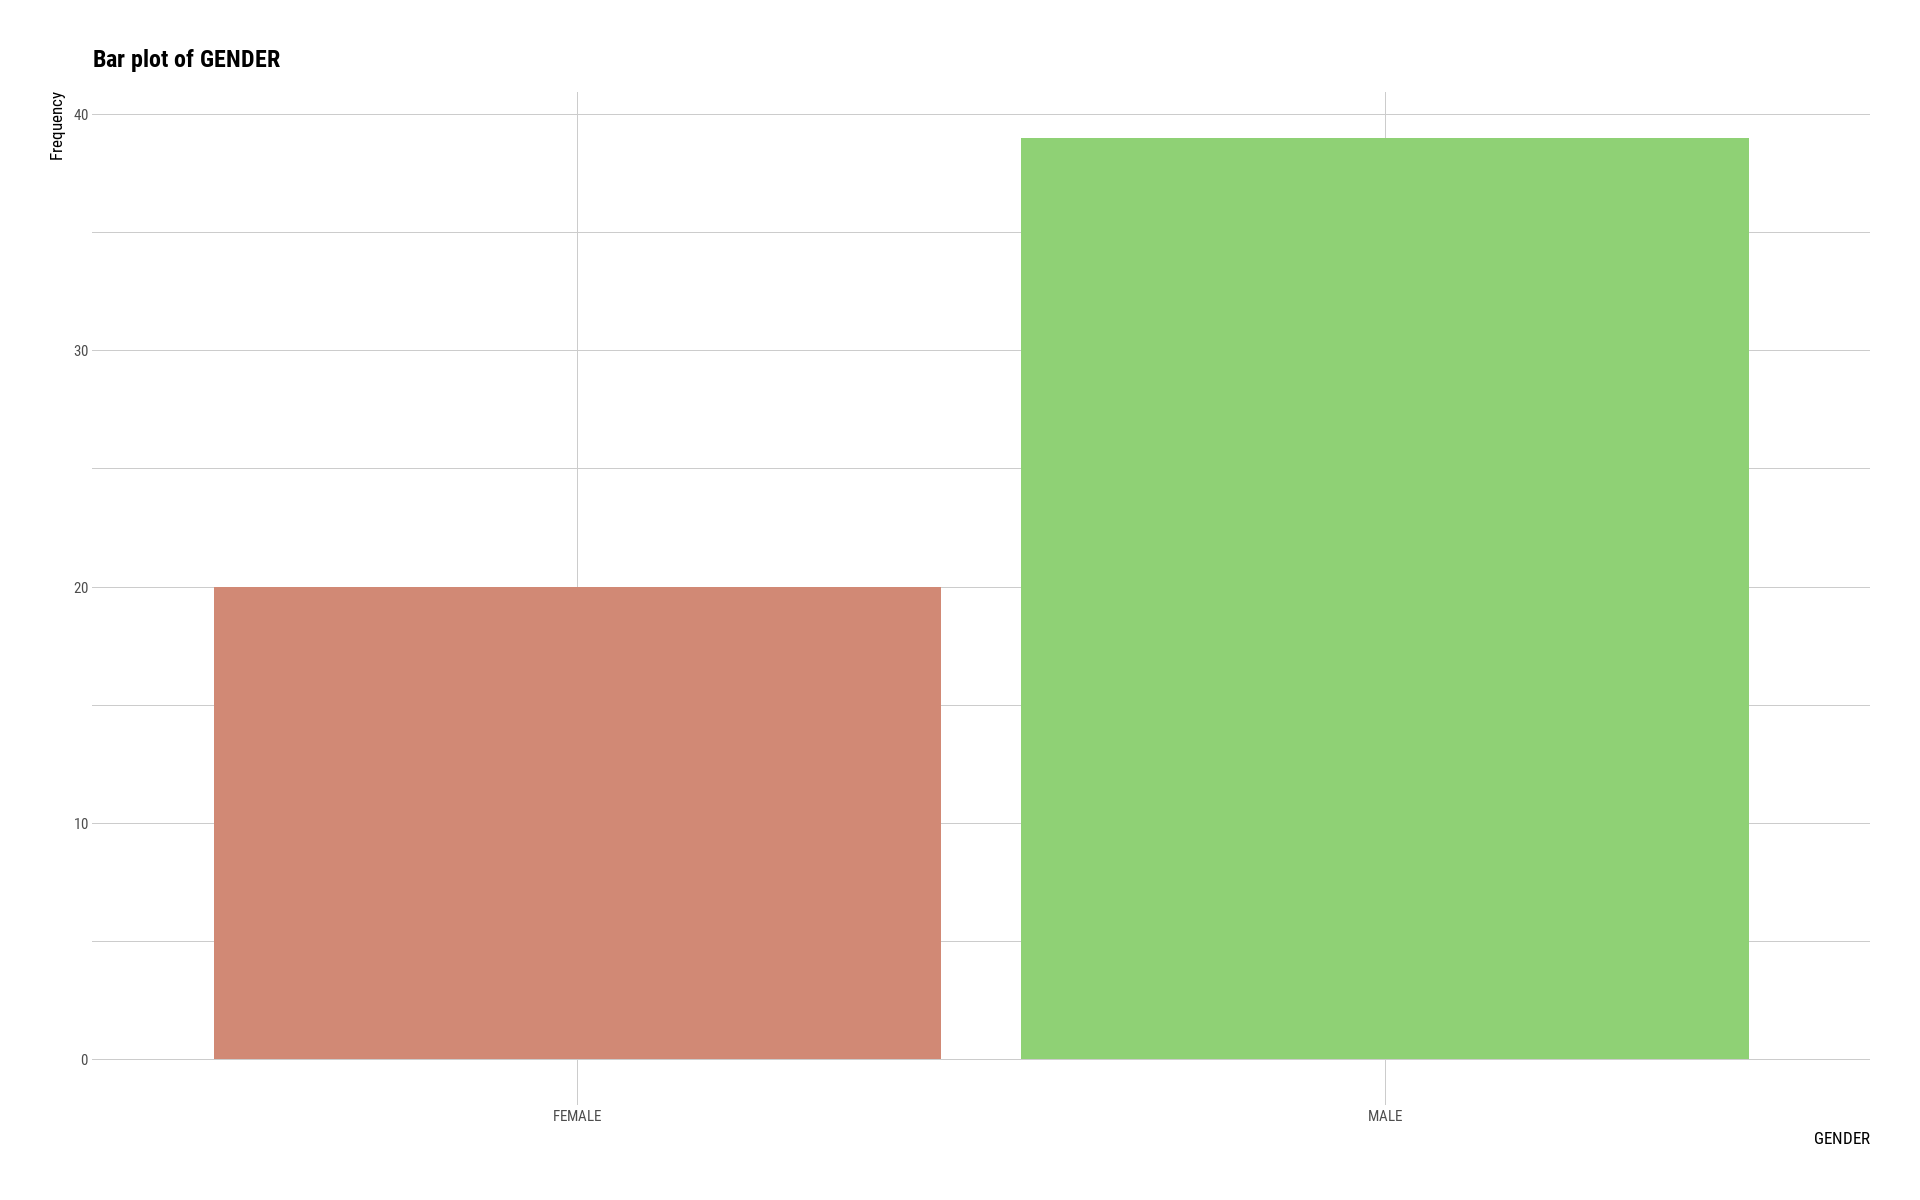

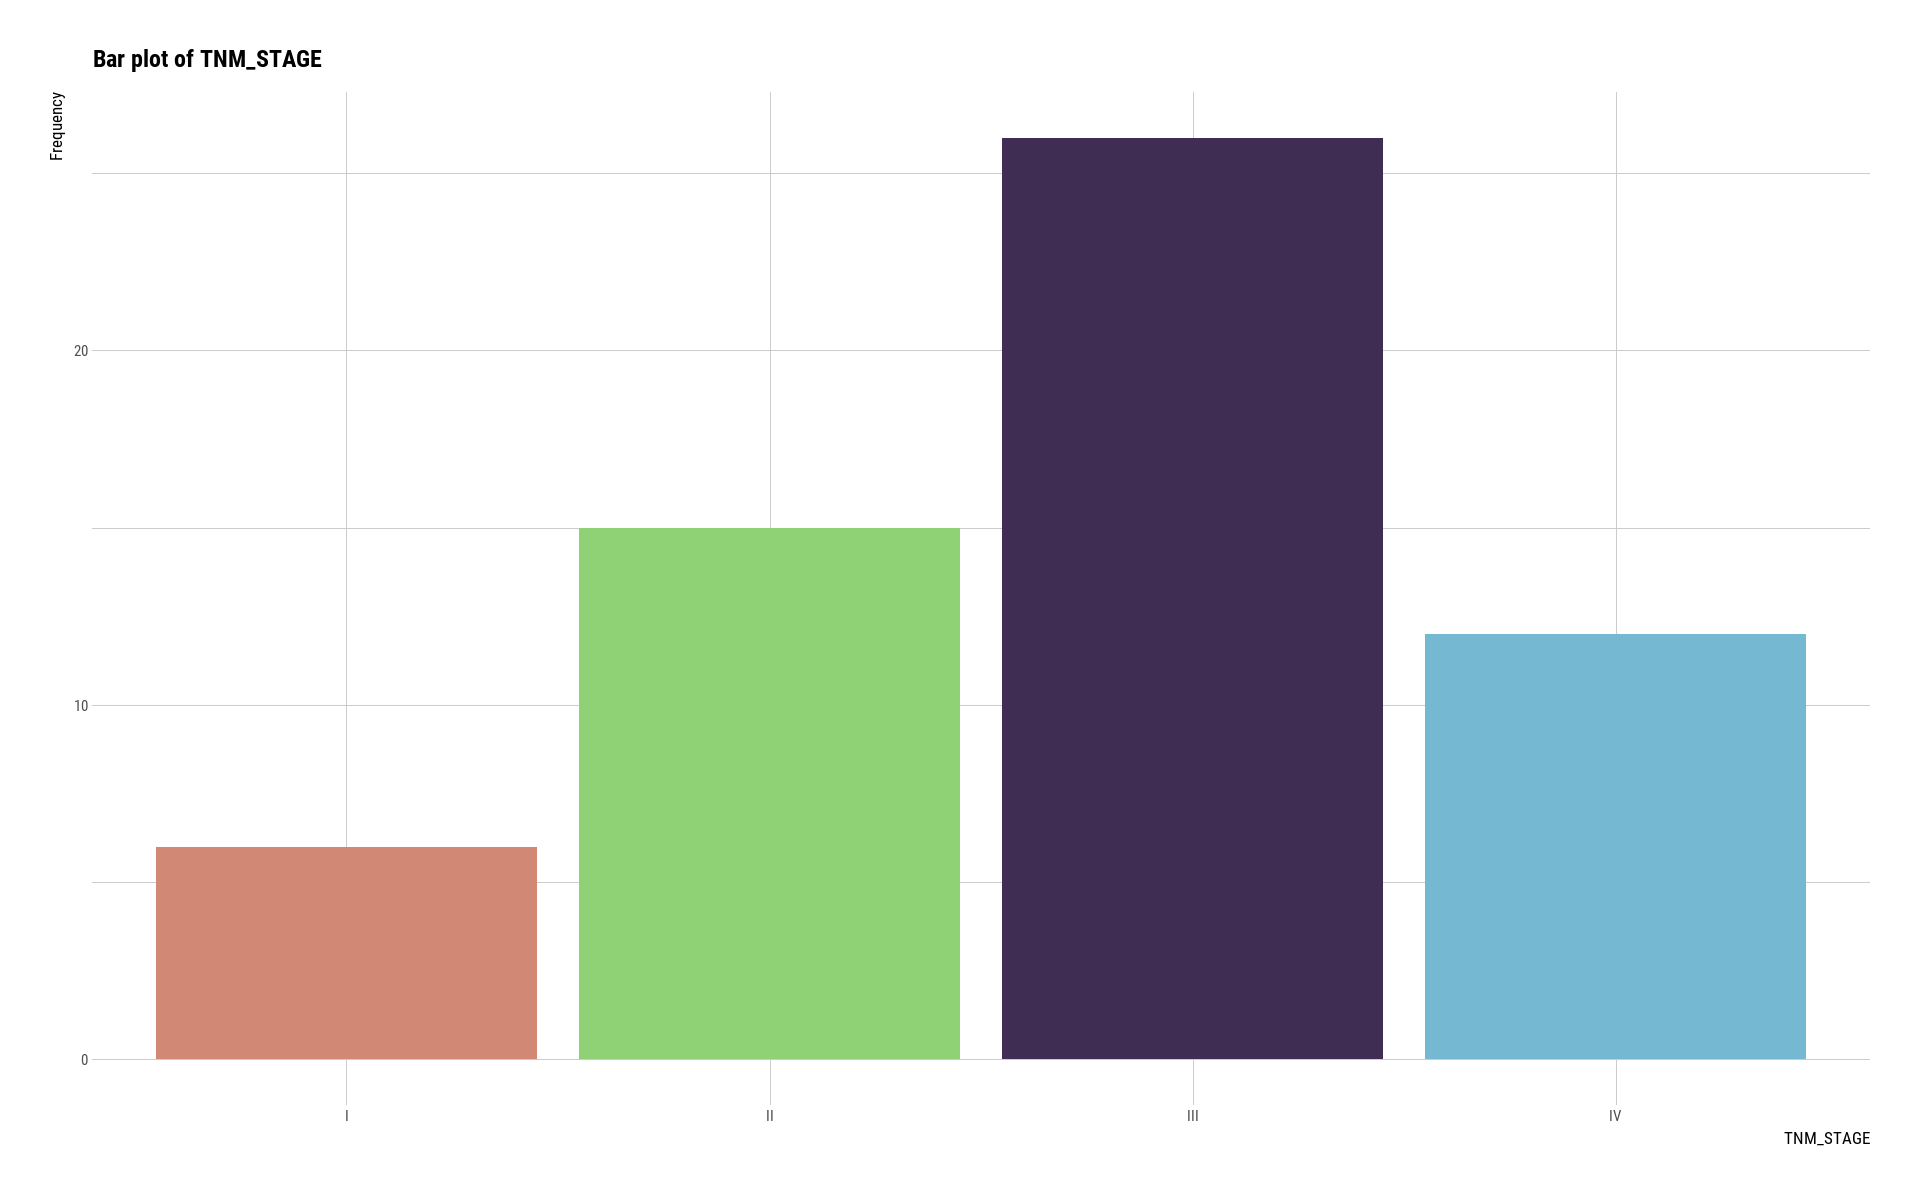

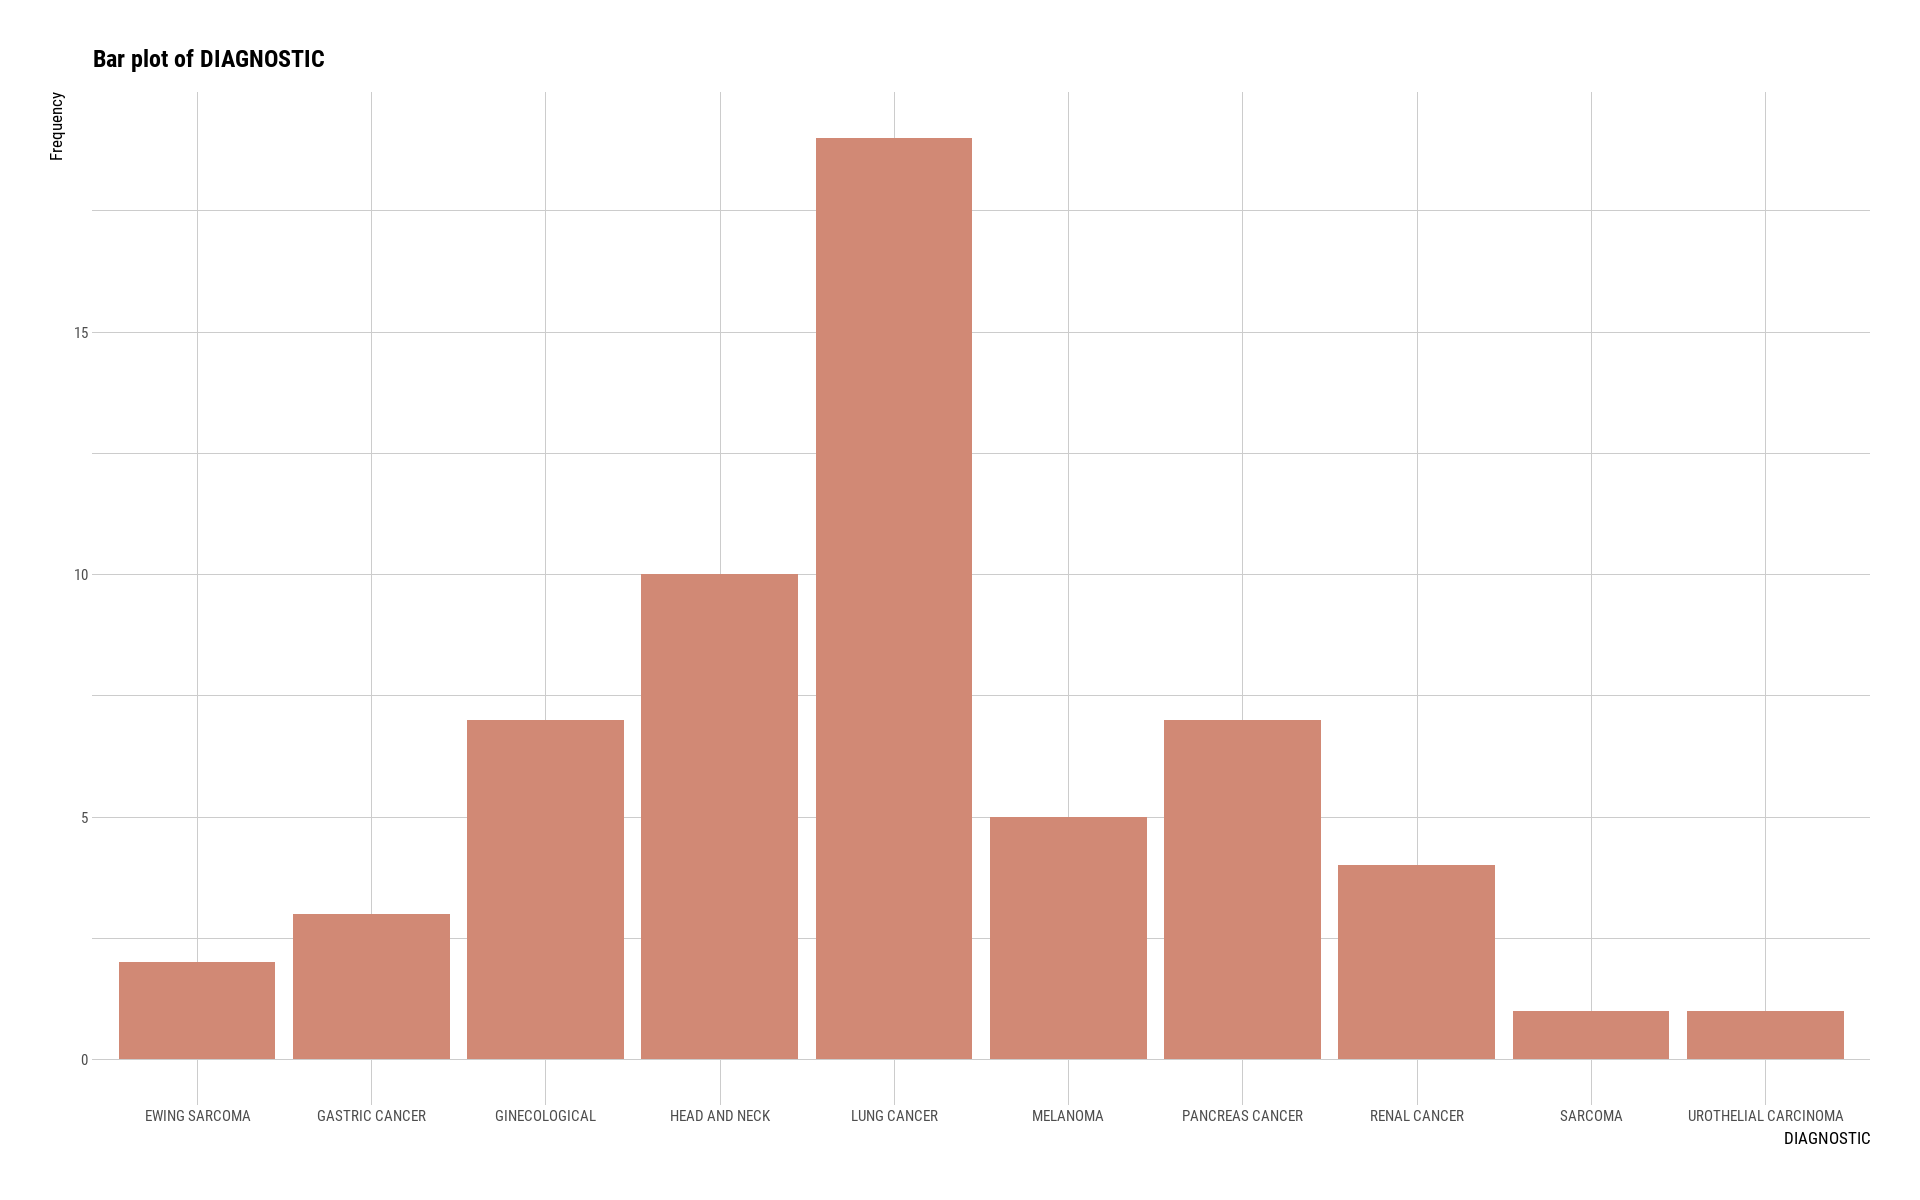

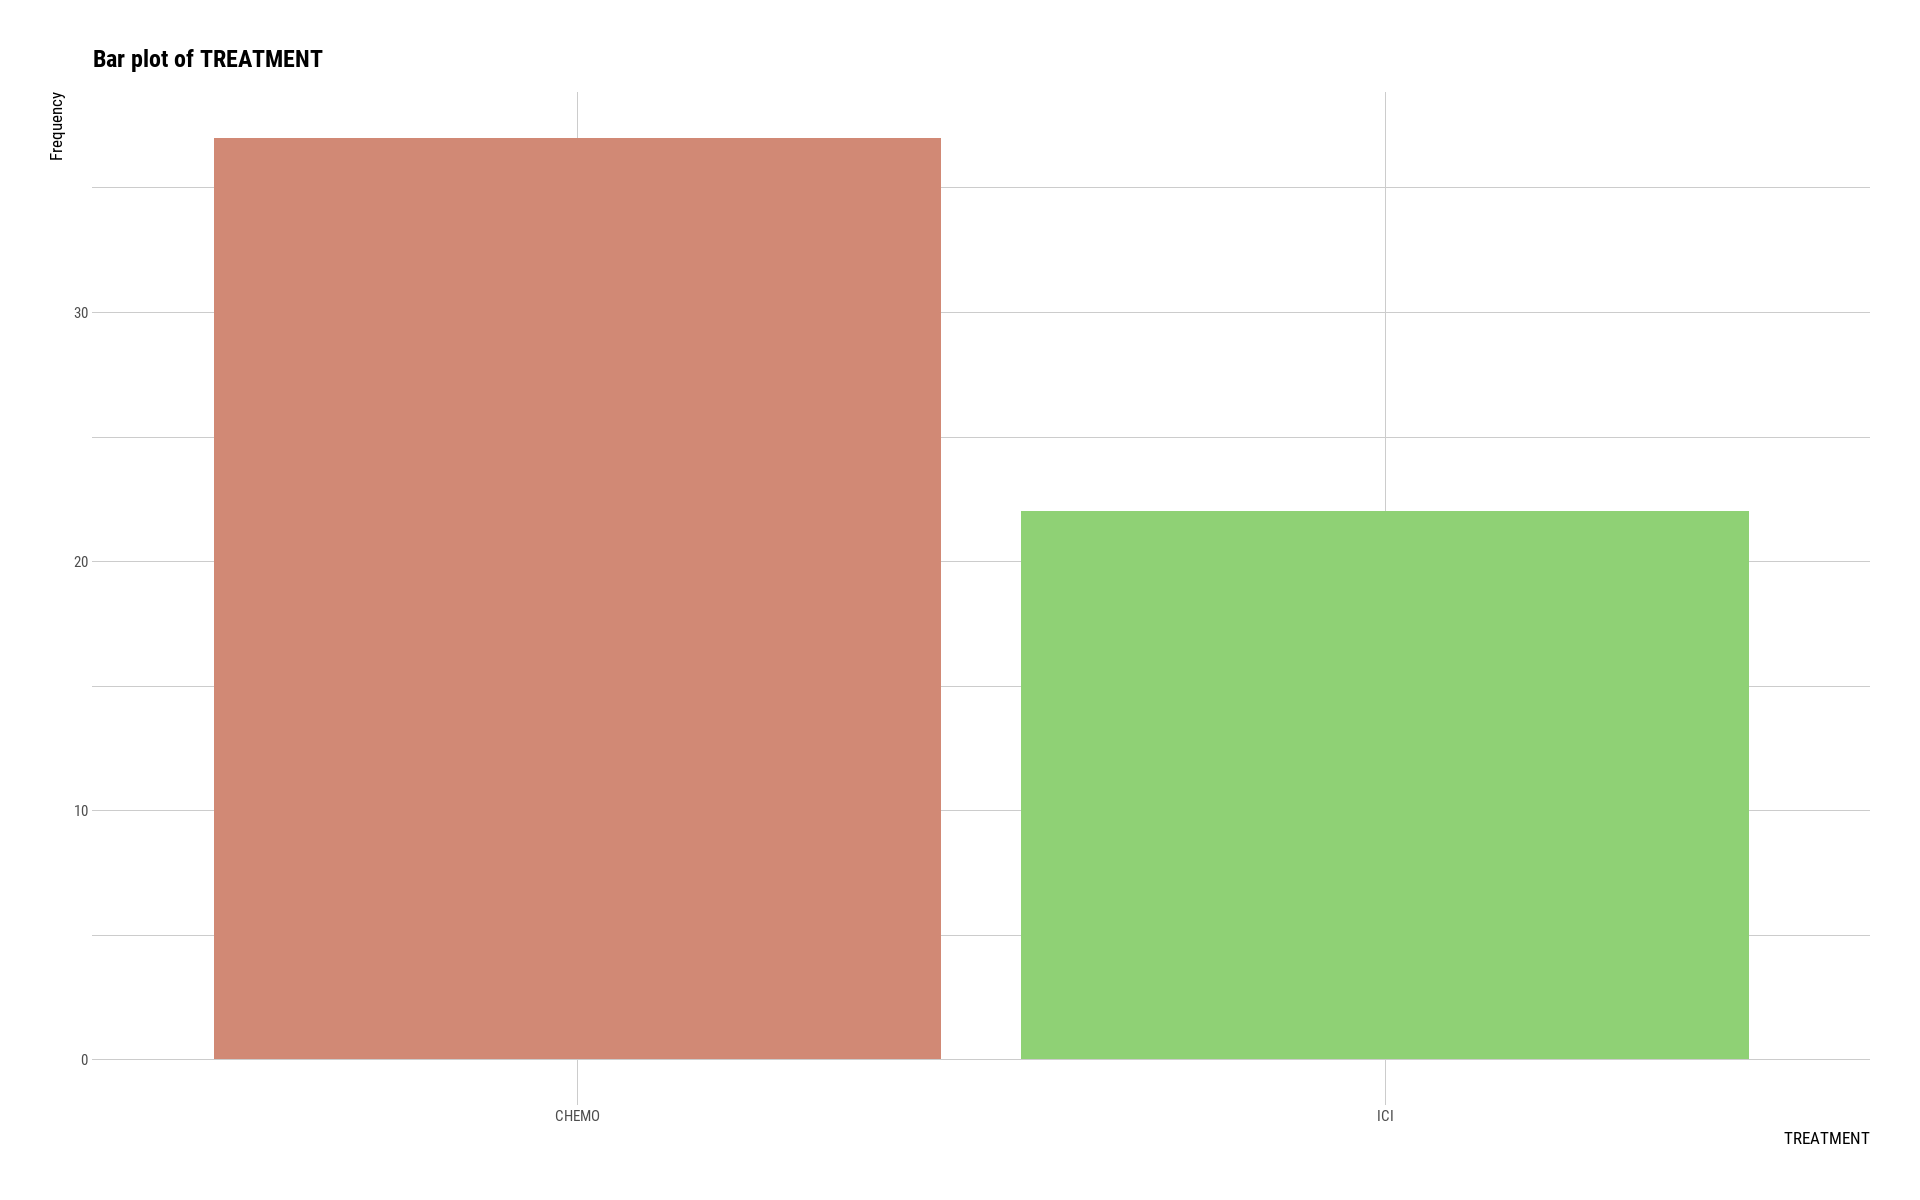

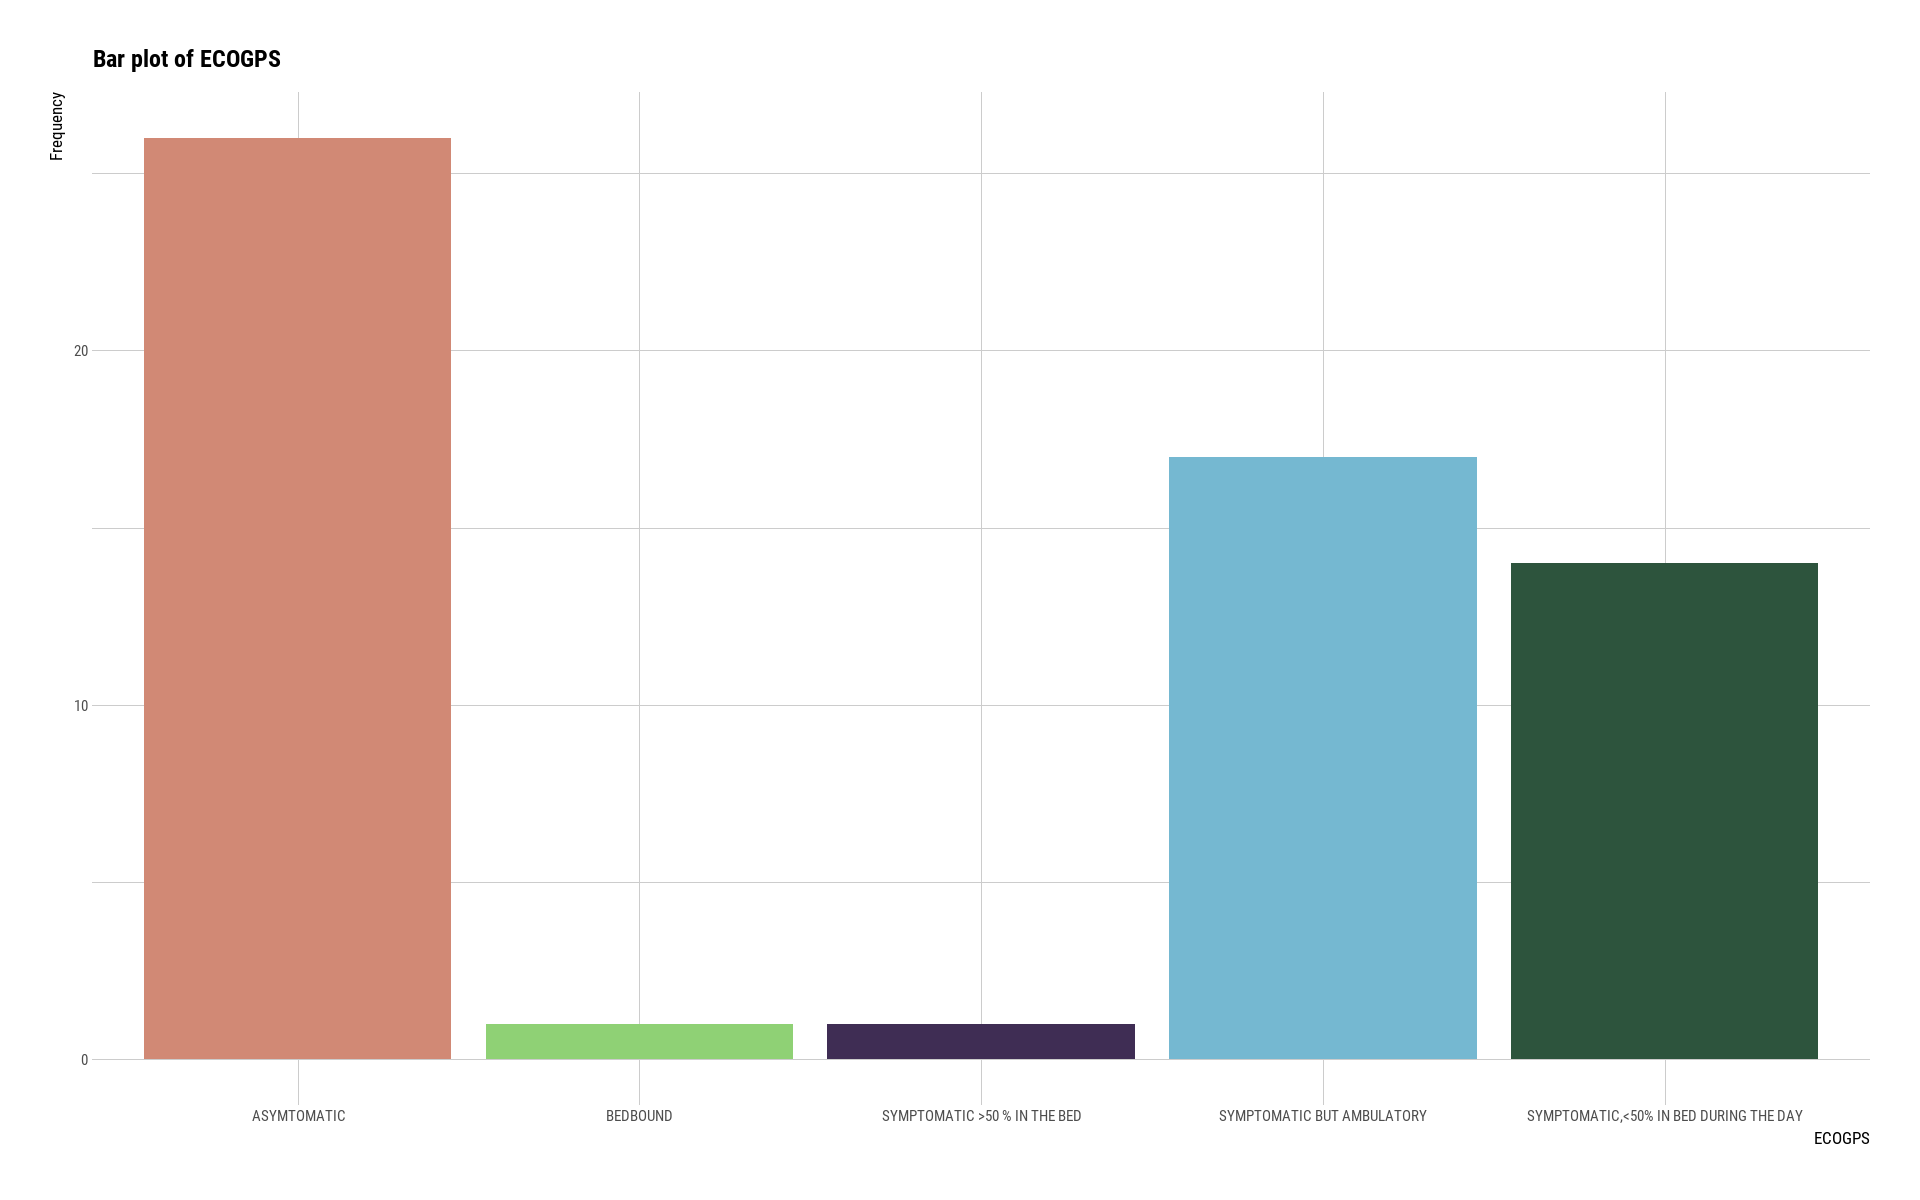

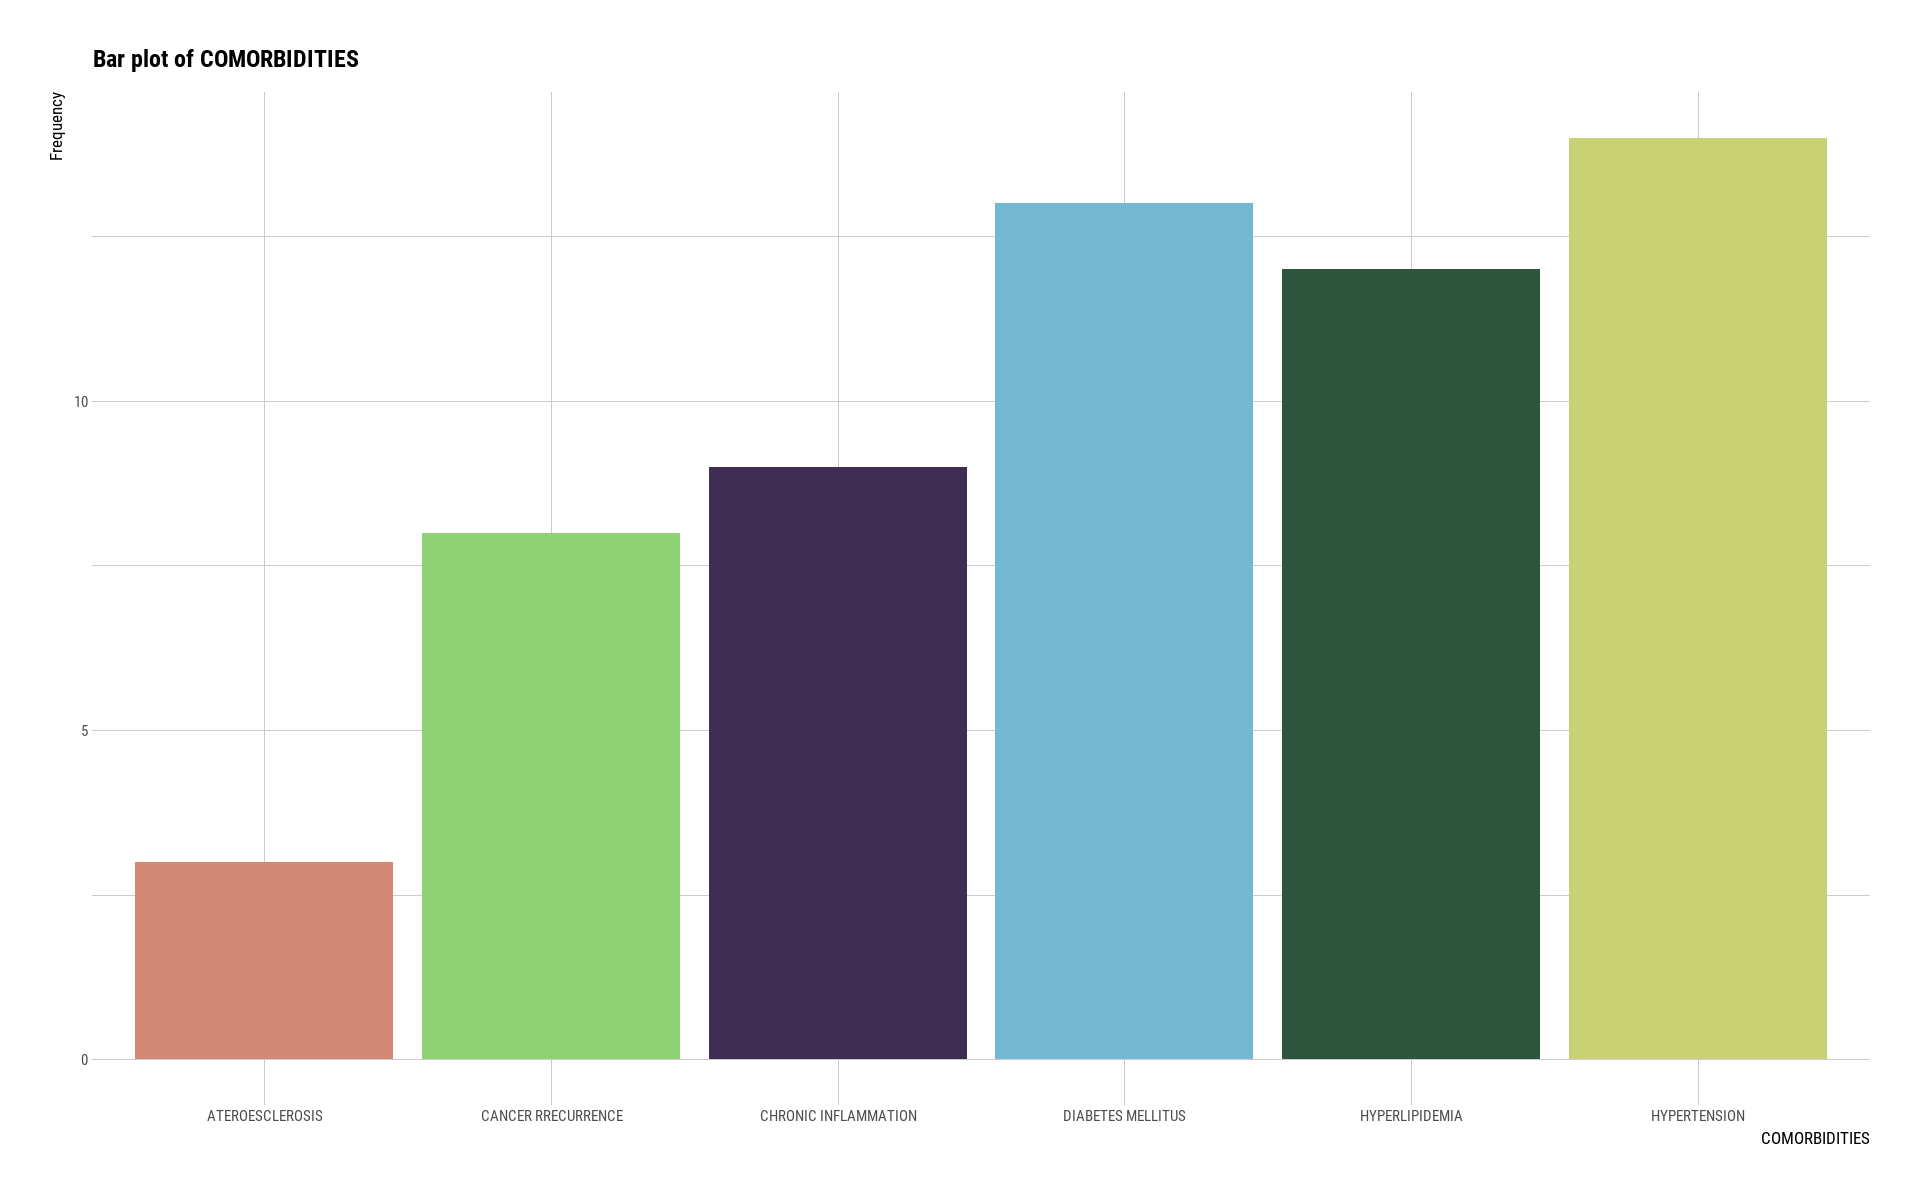

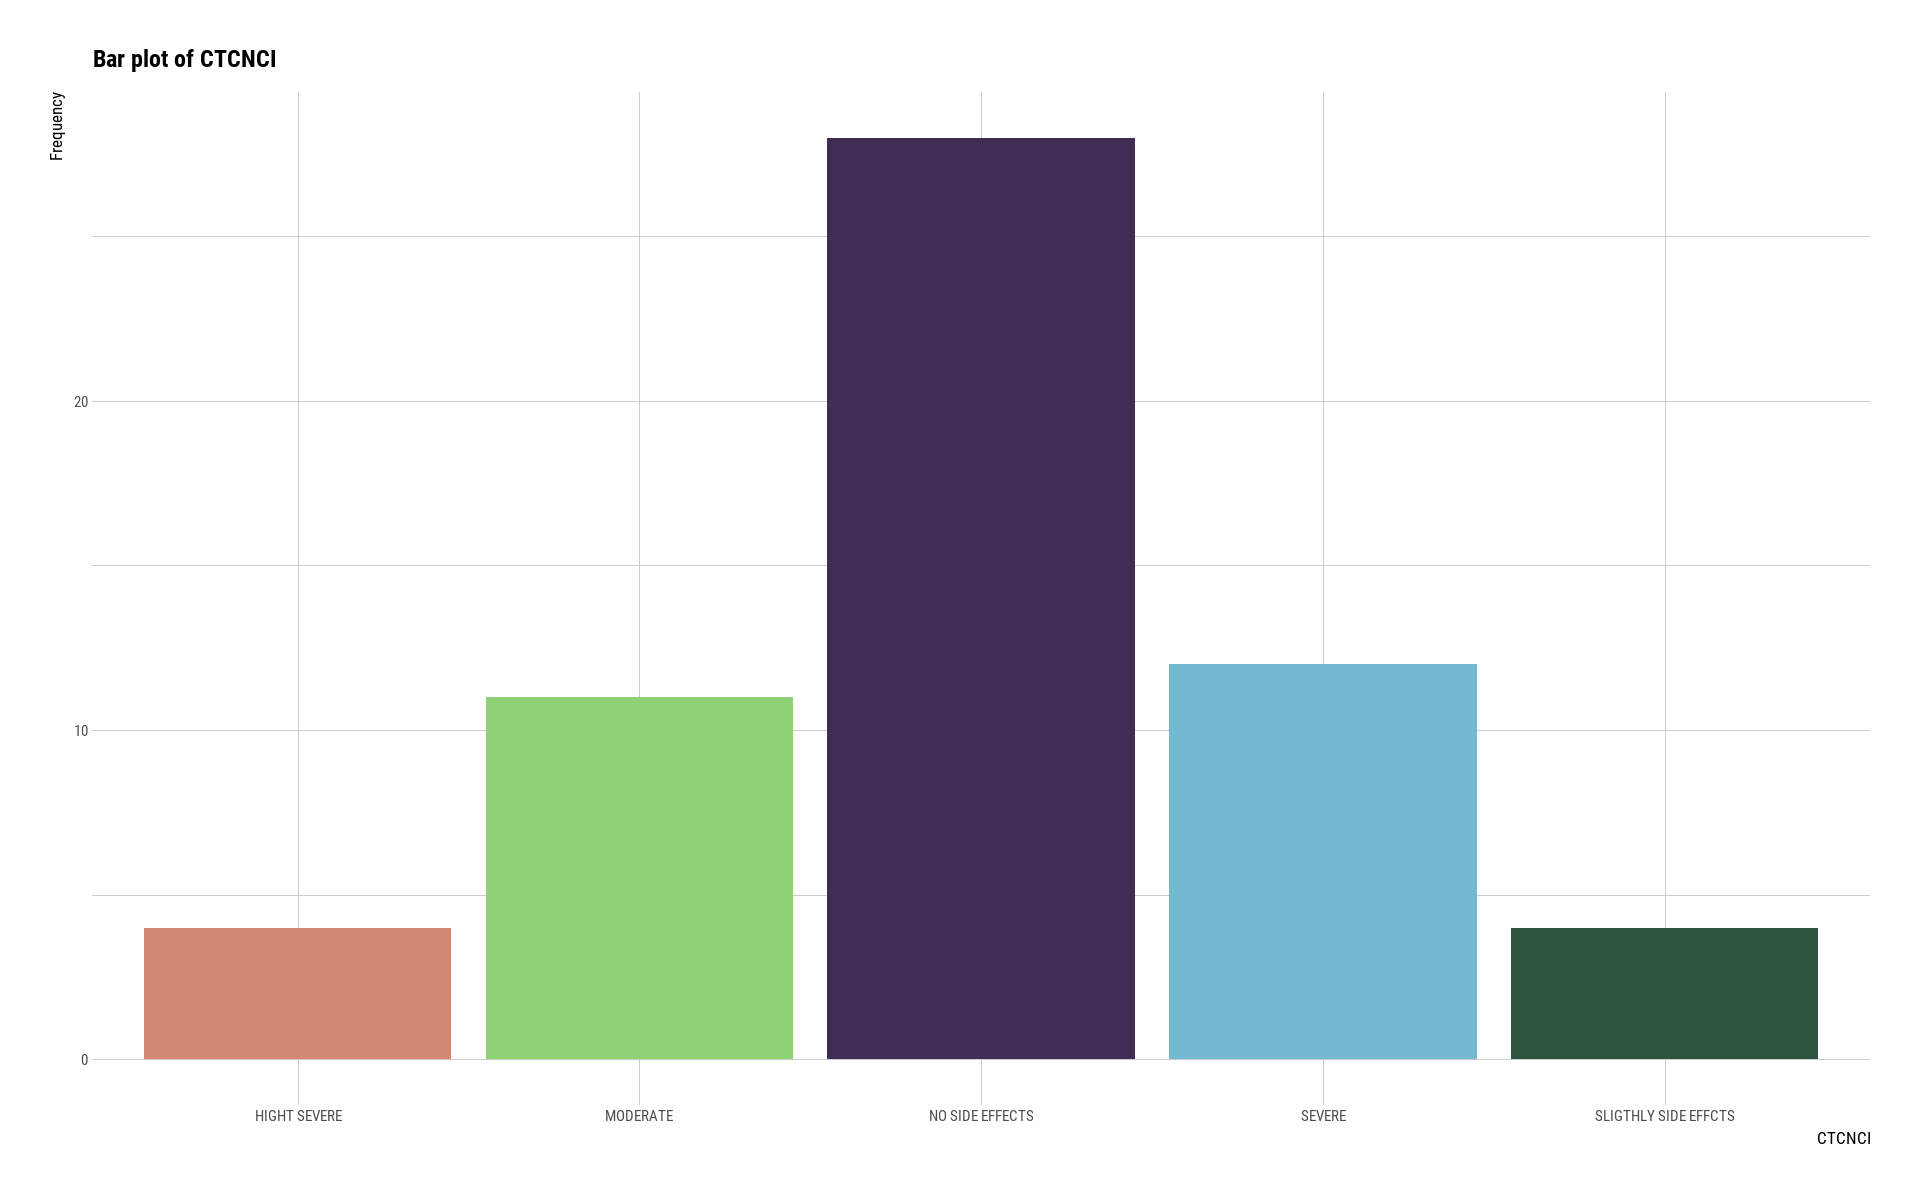

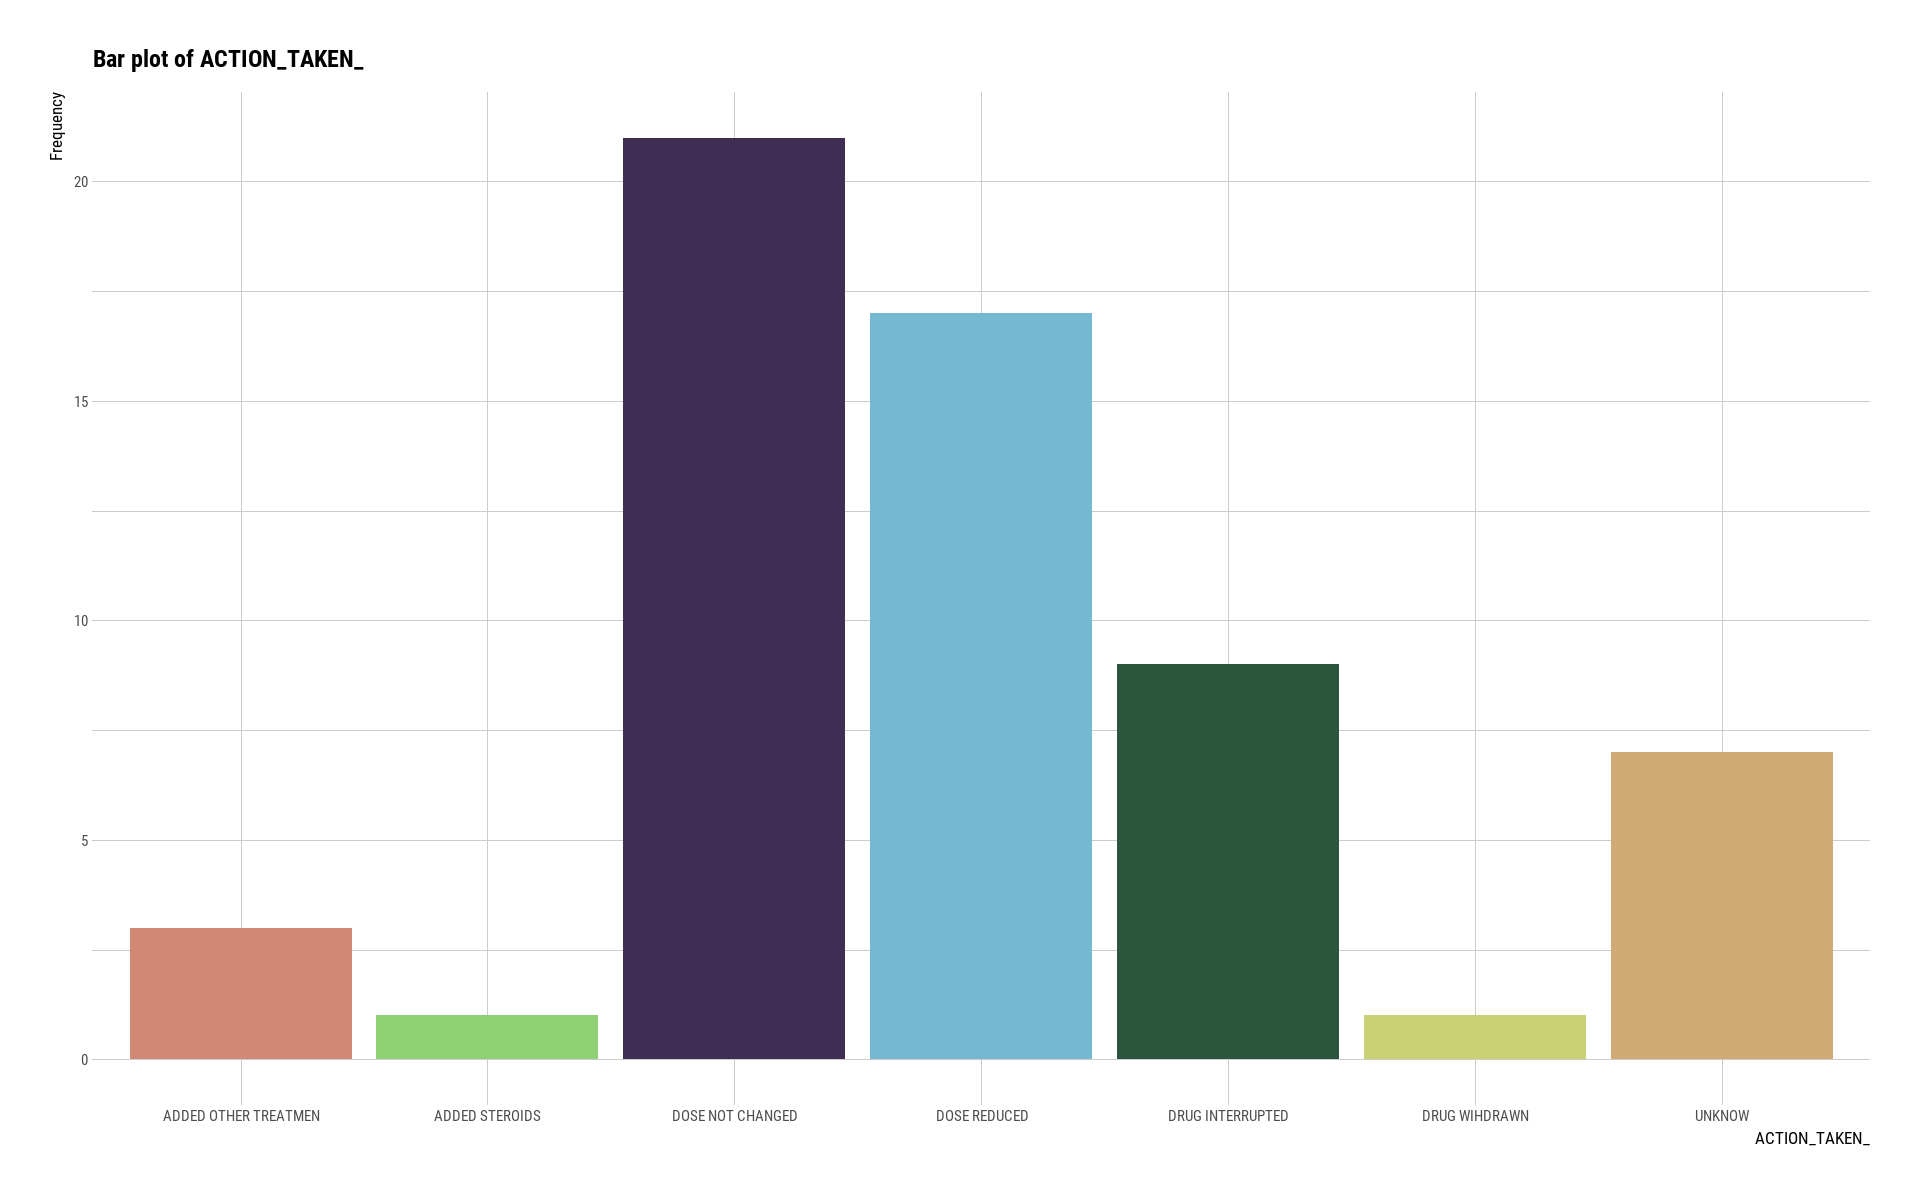

In [1090]:
# Diagrama de barras por separado:
plot(all_var)

### Todos los diagramas de barra juntos

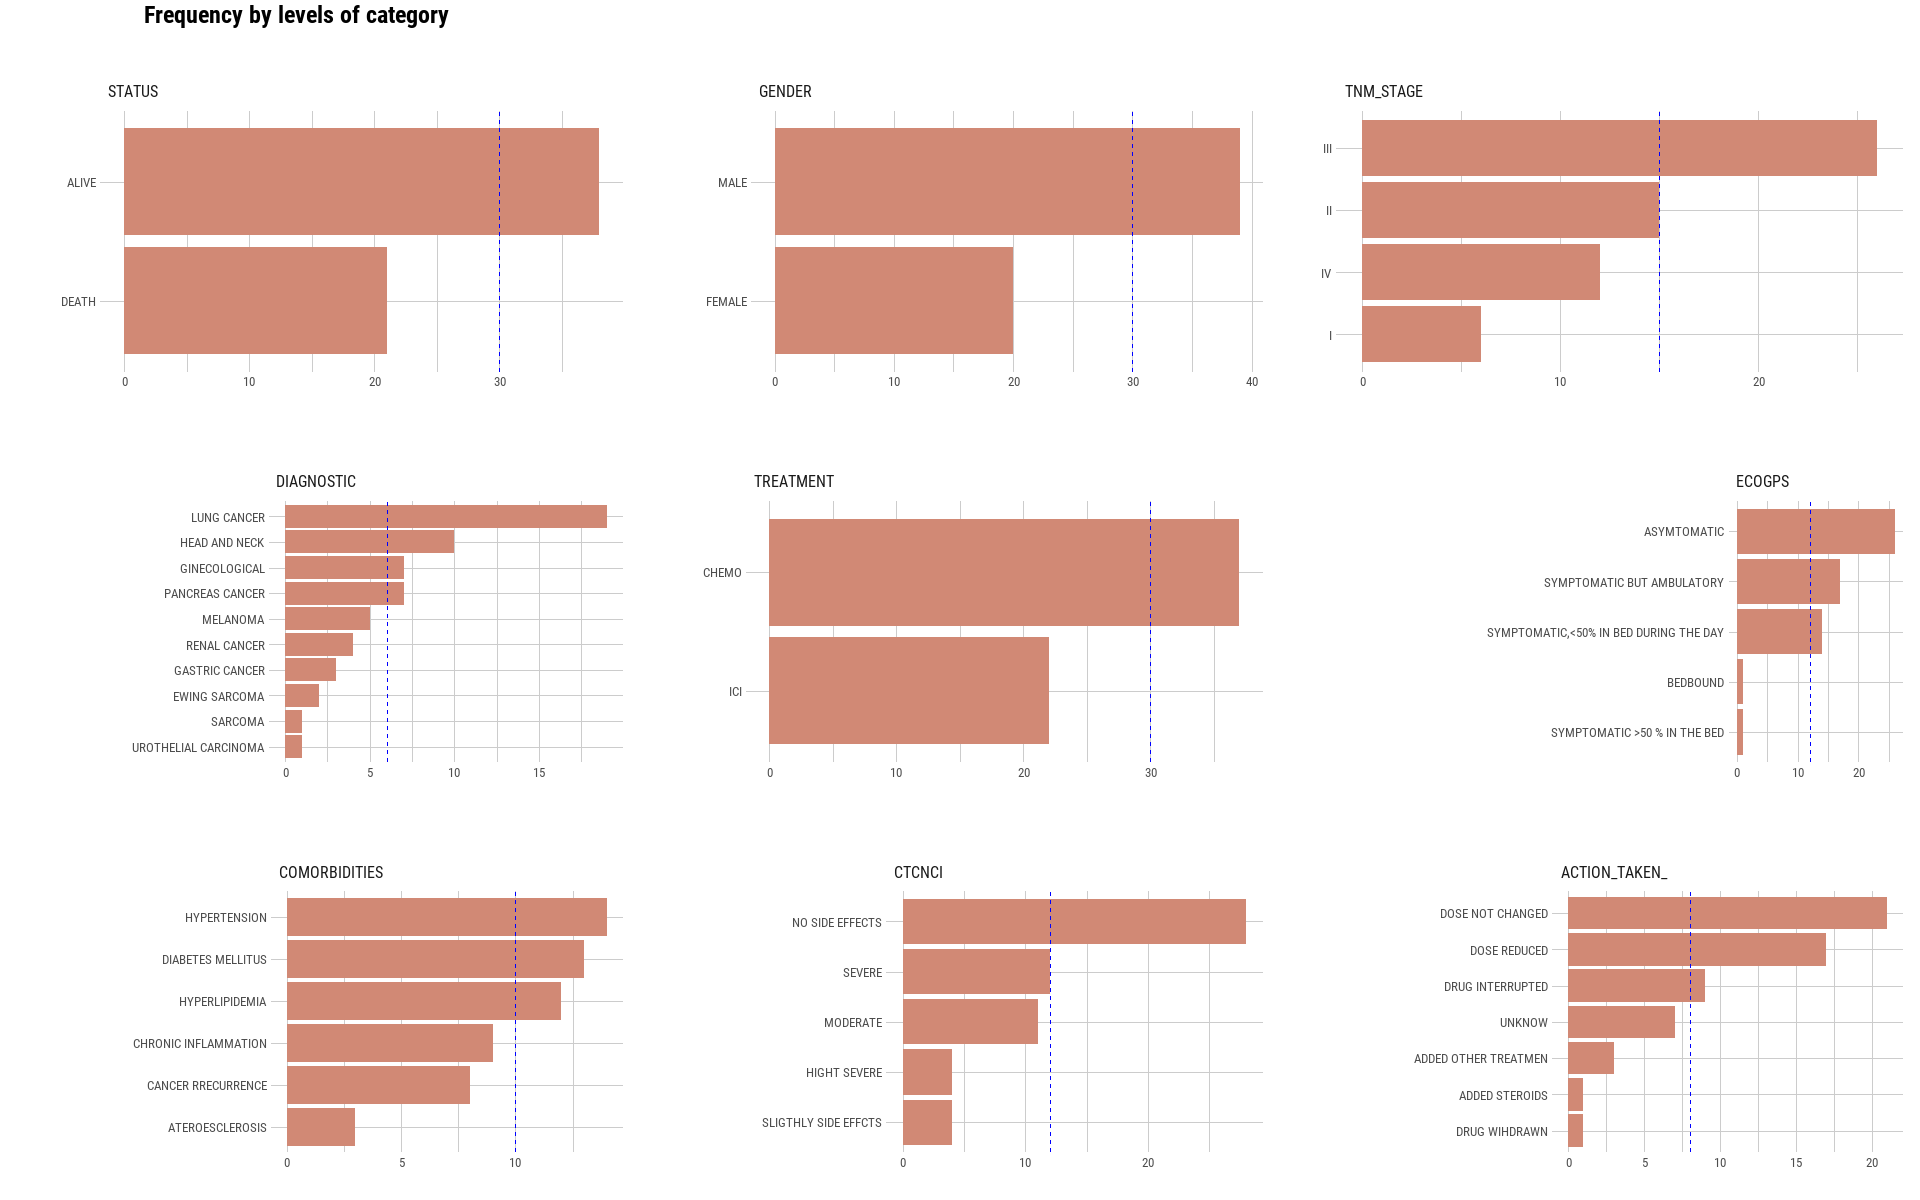

In [1091]:
# Todos los diagramas de barra juntos:
plot_bar_category(datos)

### Tabla de frecuencias + diagrama de barras + diagrama de pastel de todas las cualitativas

[1] "********************************************"
[1] "GENDER"
[1] "********************************************"
  Grupos Frec_Absoluta Frec_Relativa
1 FEMALE            20     0.3389831
2   MALE            39     0.6610169
[1] "********************************************"
[1] "TNM_STAGE"
[1] "********************************************"
  Grupos Frec_Absoluta Frec_Relativa
1      I             6     0.1016949
2     II            15     0.2542373
3    III            26     0.4406780
4     IV            12     0.2033898


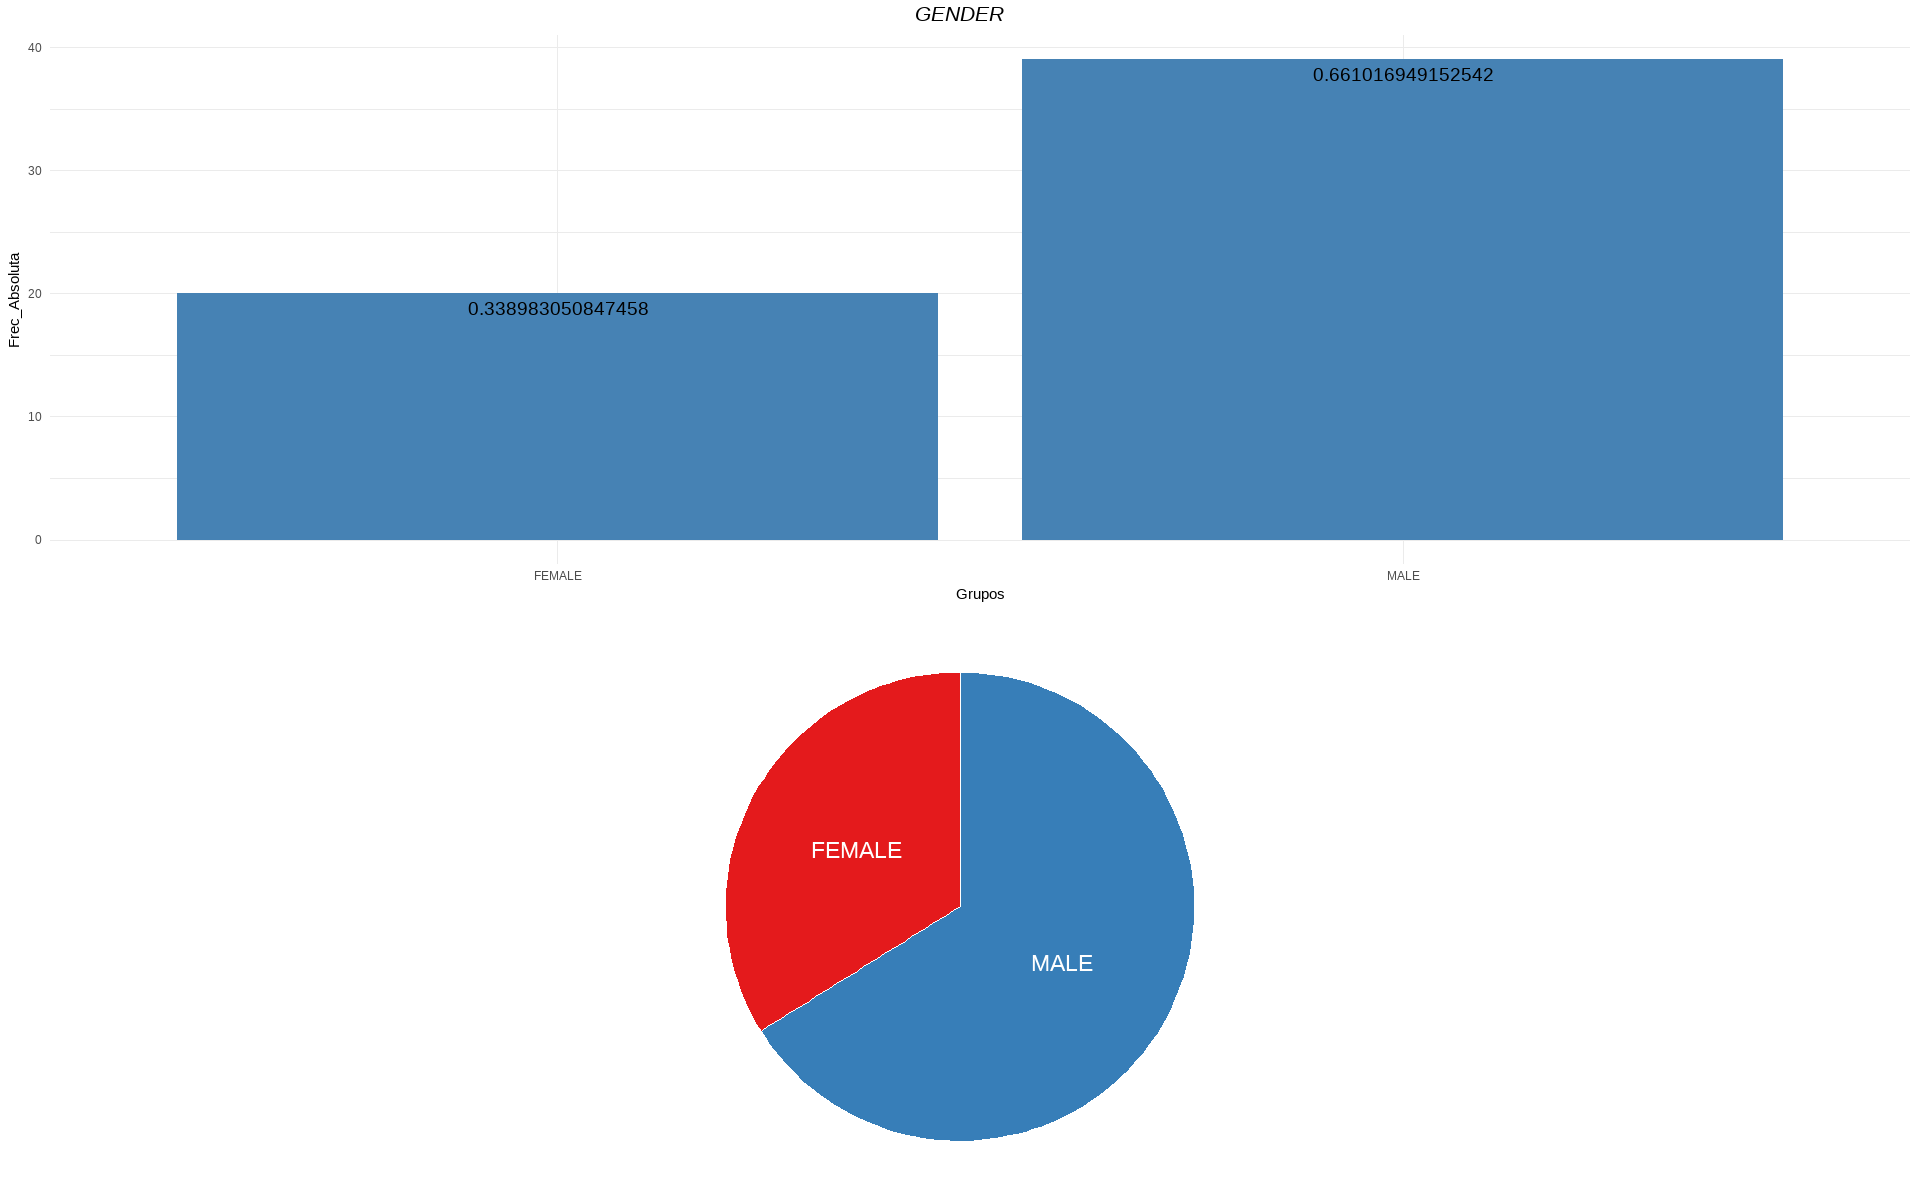

[1] "********************************************"
[1] "DIAGNOSTIC"
[1] "********************************************"
                 Grupos Frec_Absoluta Frec_Relativa
1         EWING SARCOMA             2    0.03389831
2        GASTRIC CANCER             3    0.05084746
3         GINECOLOGICAL             7    0.11864407
4         HEAD AND NECK            10    0.16949153
5           LUNG CANCER            19    0.32203390
6              MELANOMA             5    0.08474576
7       PANCREAS CANCER             7    0.11864407
8          RENAL CANCER             4    0.06779661
9               SARCOMA             1    0.01694915
10 UROTHELIAL CARCINOMA             1    0.01694915


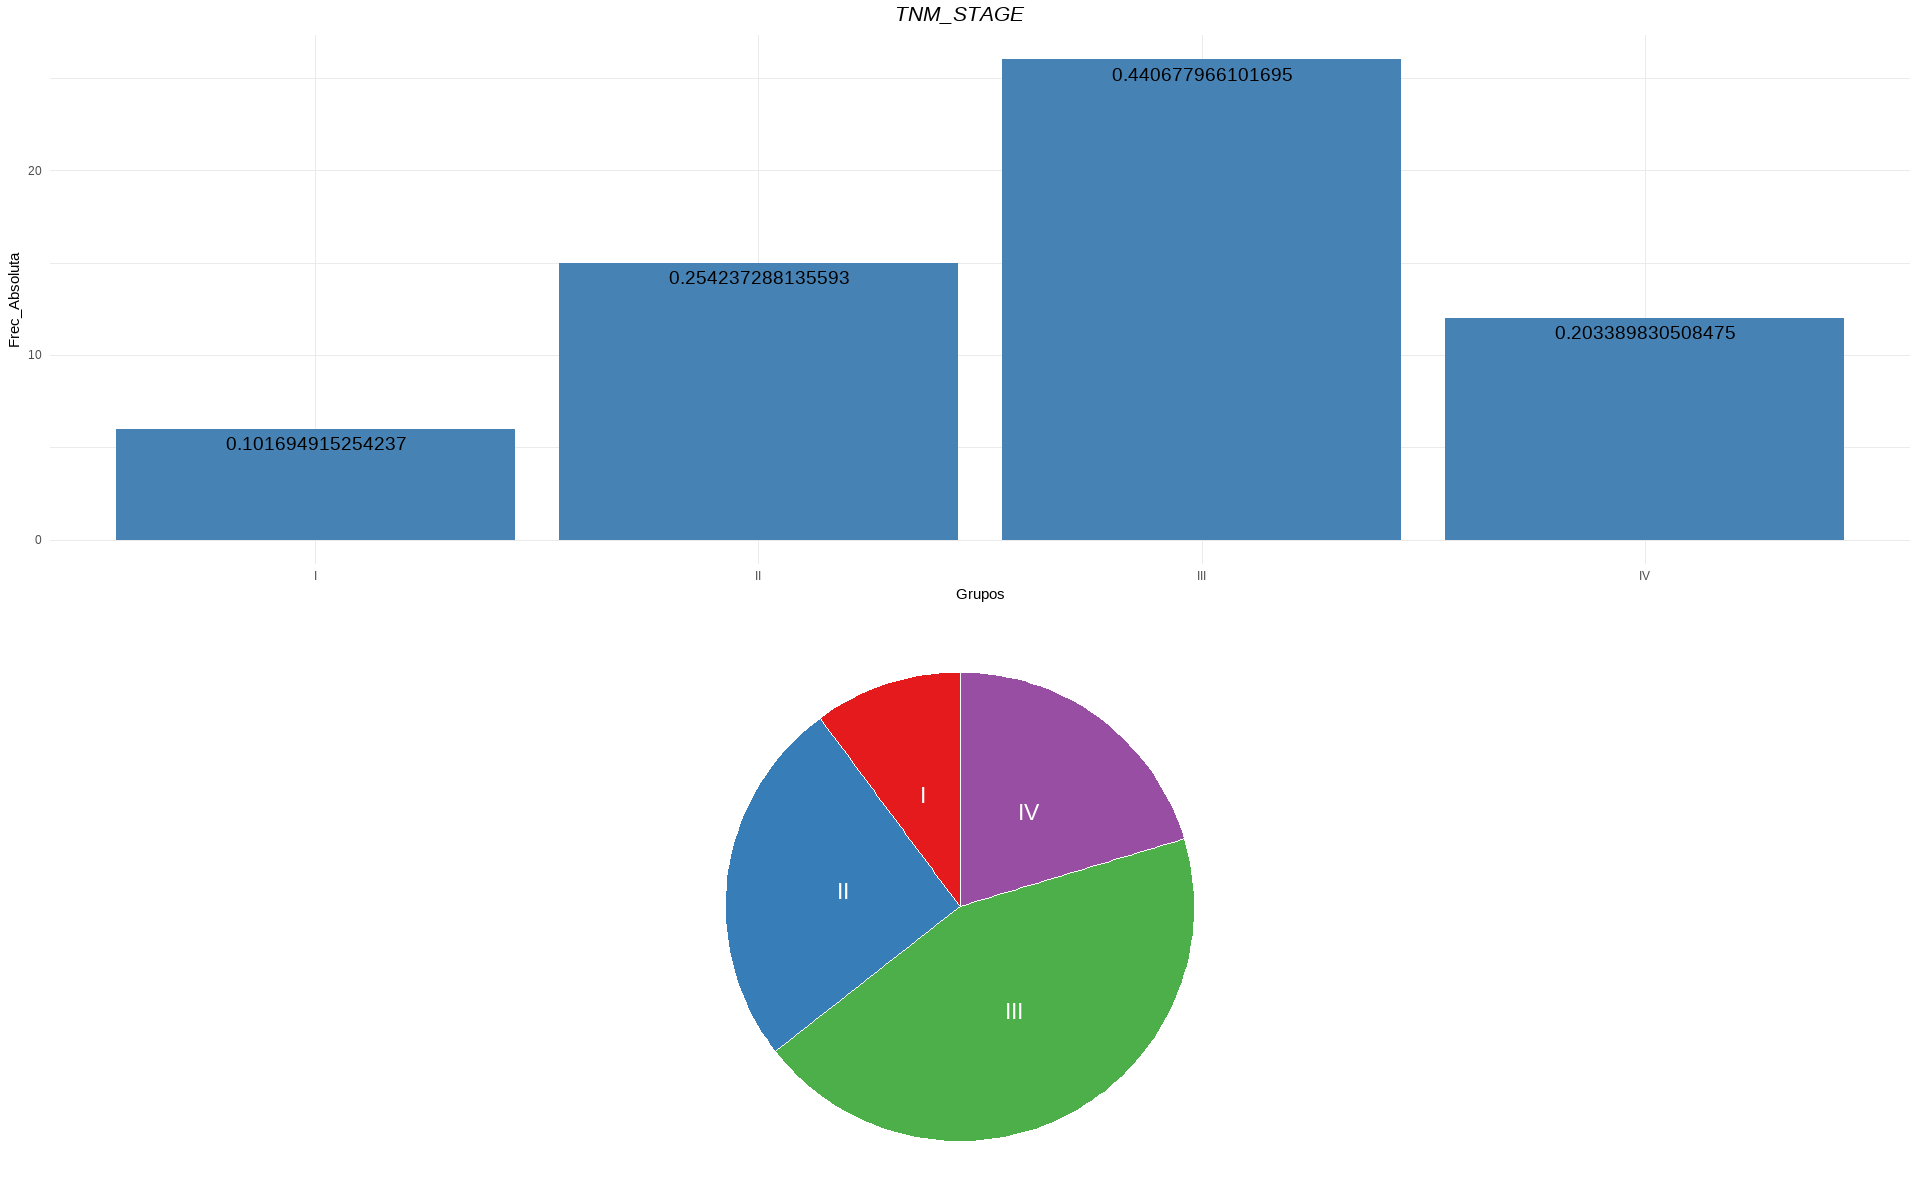

[1] "********************************************"
[1] "TREATMENT"
[1] "********************************************"
  Grupos Frec_Absoluta Frec_Relativa
1  CHEMO            37     0.6271186
2    ICI            22     0.3728814


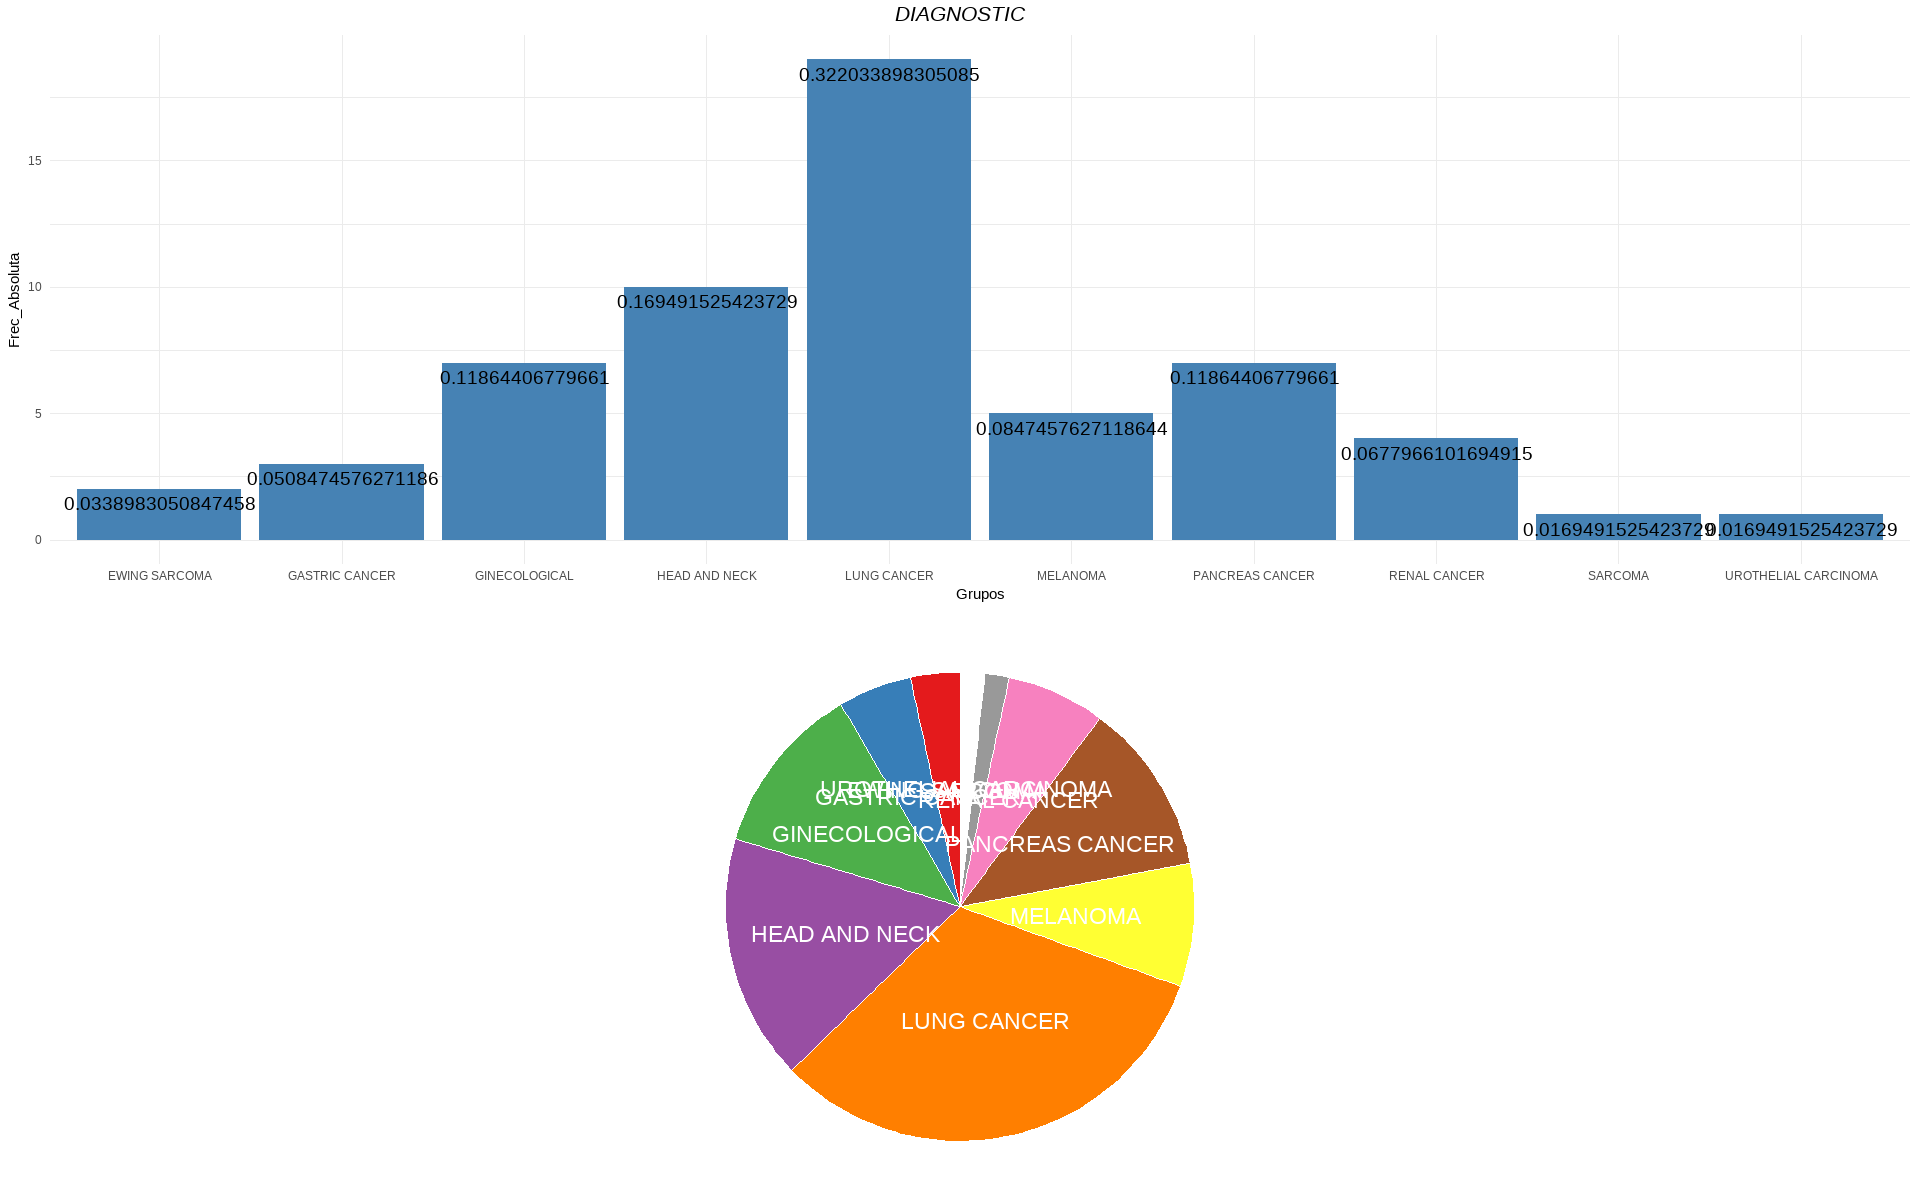

[1] "********************************************"
[1] "ECOGPS"
[1] "********************************************"
                                  Grupos Frec_Absoluta Frec_Relativa
1                            ASYMTOMATIC            26    0.44067797
2                               BEDBOUND             1    0.01694915
3           SYMPTOMATIC >50 % IN THE BED             1    0.01694915
4             SYMPTOMATIC BUT AMBULATORY            17    0.28813559
5 SYMPTOMATIC,<50% IN BED DURING THE DAY            14    0.23728814


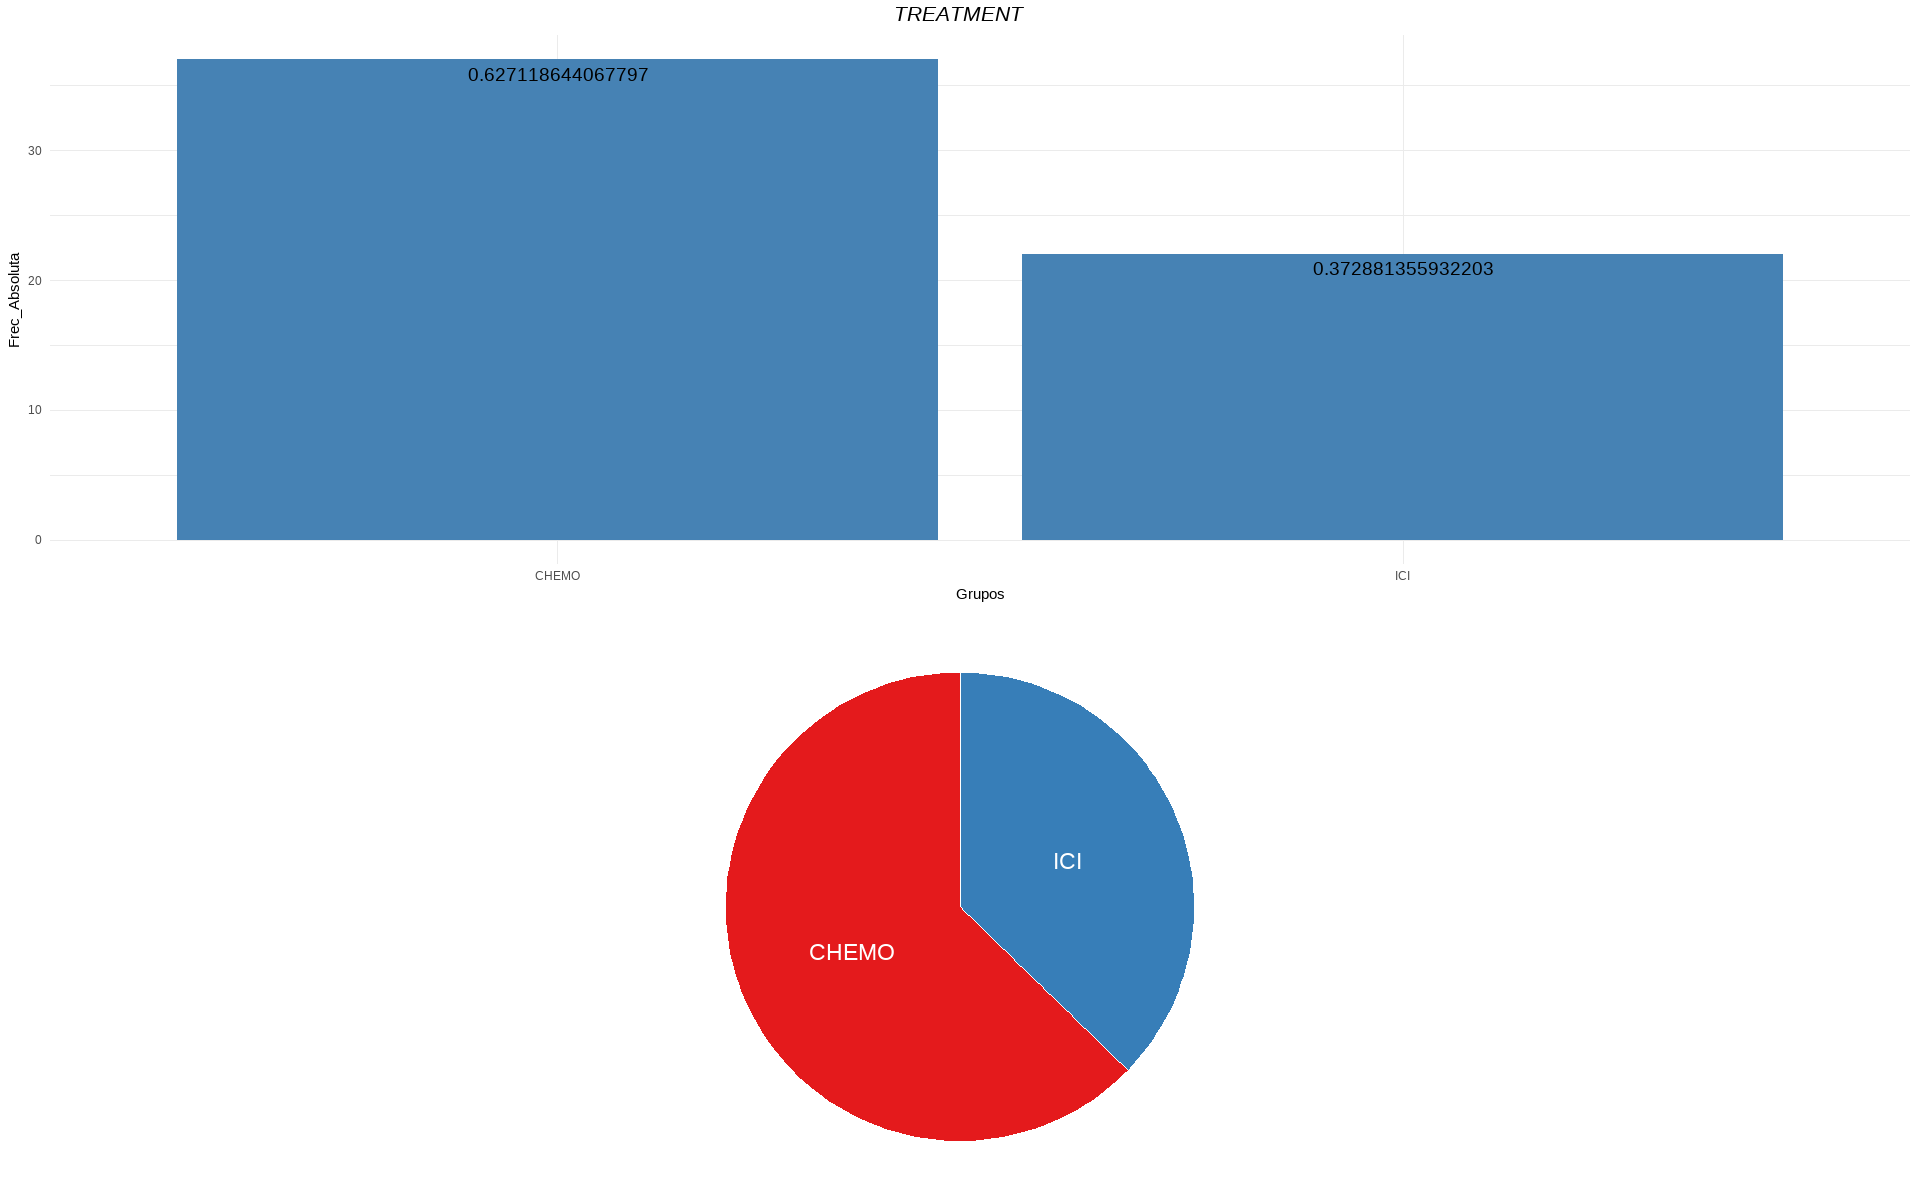

[1] "********************************************"
[1] "COMORBIDITIES"
[1] "********************************************"
                Grupos Frec_Absoluta Frec_Relativa
1      ATEROESCLEROSIS             3    0.05084746
2   CANCER RRECURRENCE             8    0.13559322
3 CHRONIC INFLAMMATION             9    0.15254237
4    DIABETES MELLITUS            13    0.22033898
5       HYPERLIPIDEMIA            12    0.20338983
6         HYPERTENSION            14    0.23728814


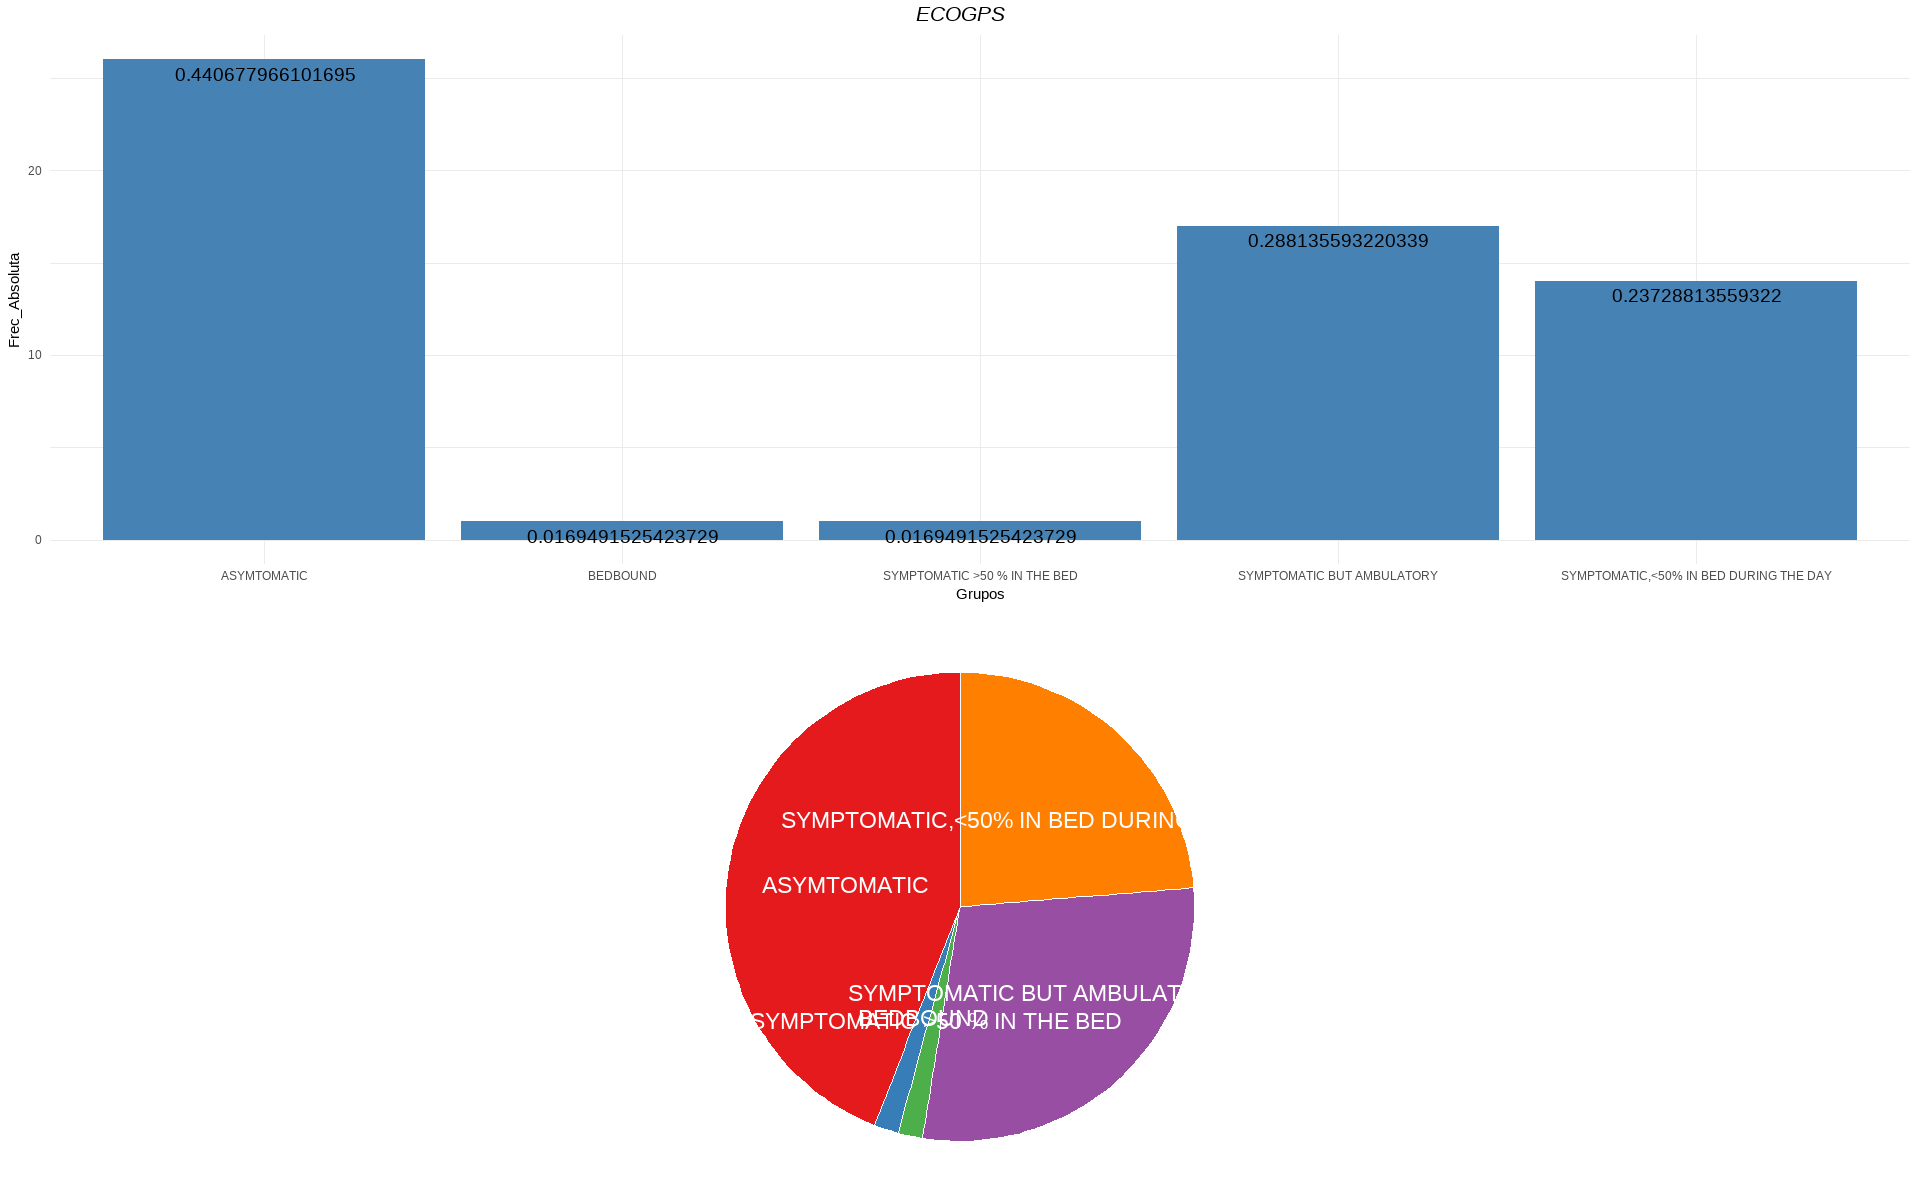

[1] "********************************************"
[1] "CTCNCI"
[1] "********************************************"
                Grupos Frec_Absoluta Frec_Relativa
1         HIGHT SEVERE             4    0.06779661
2             MODERATE            11    0.18644068
3      NO SIDE EFFECTS            28    0.47457627
4               SEVERE            12    0.20338983
5 SLIGTHLY SIDE EFFCTS             4    0.06779661


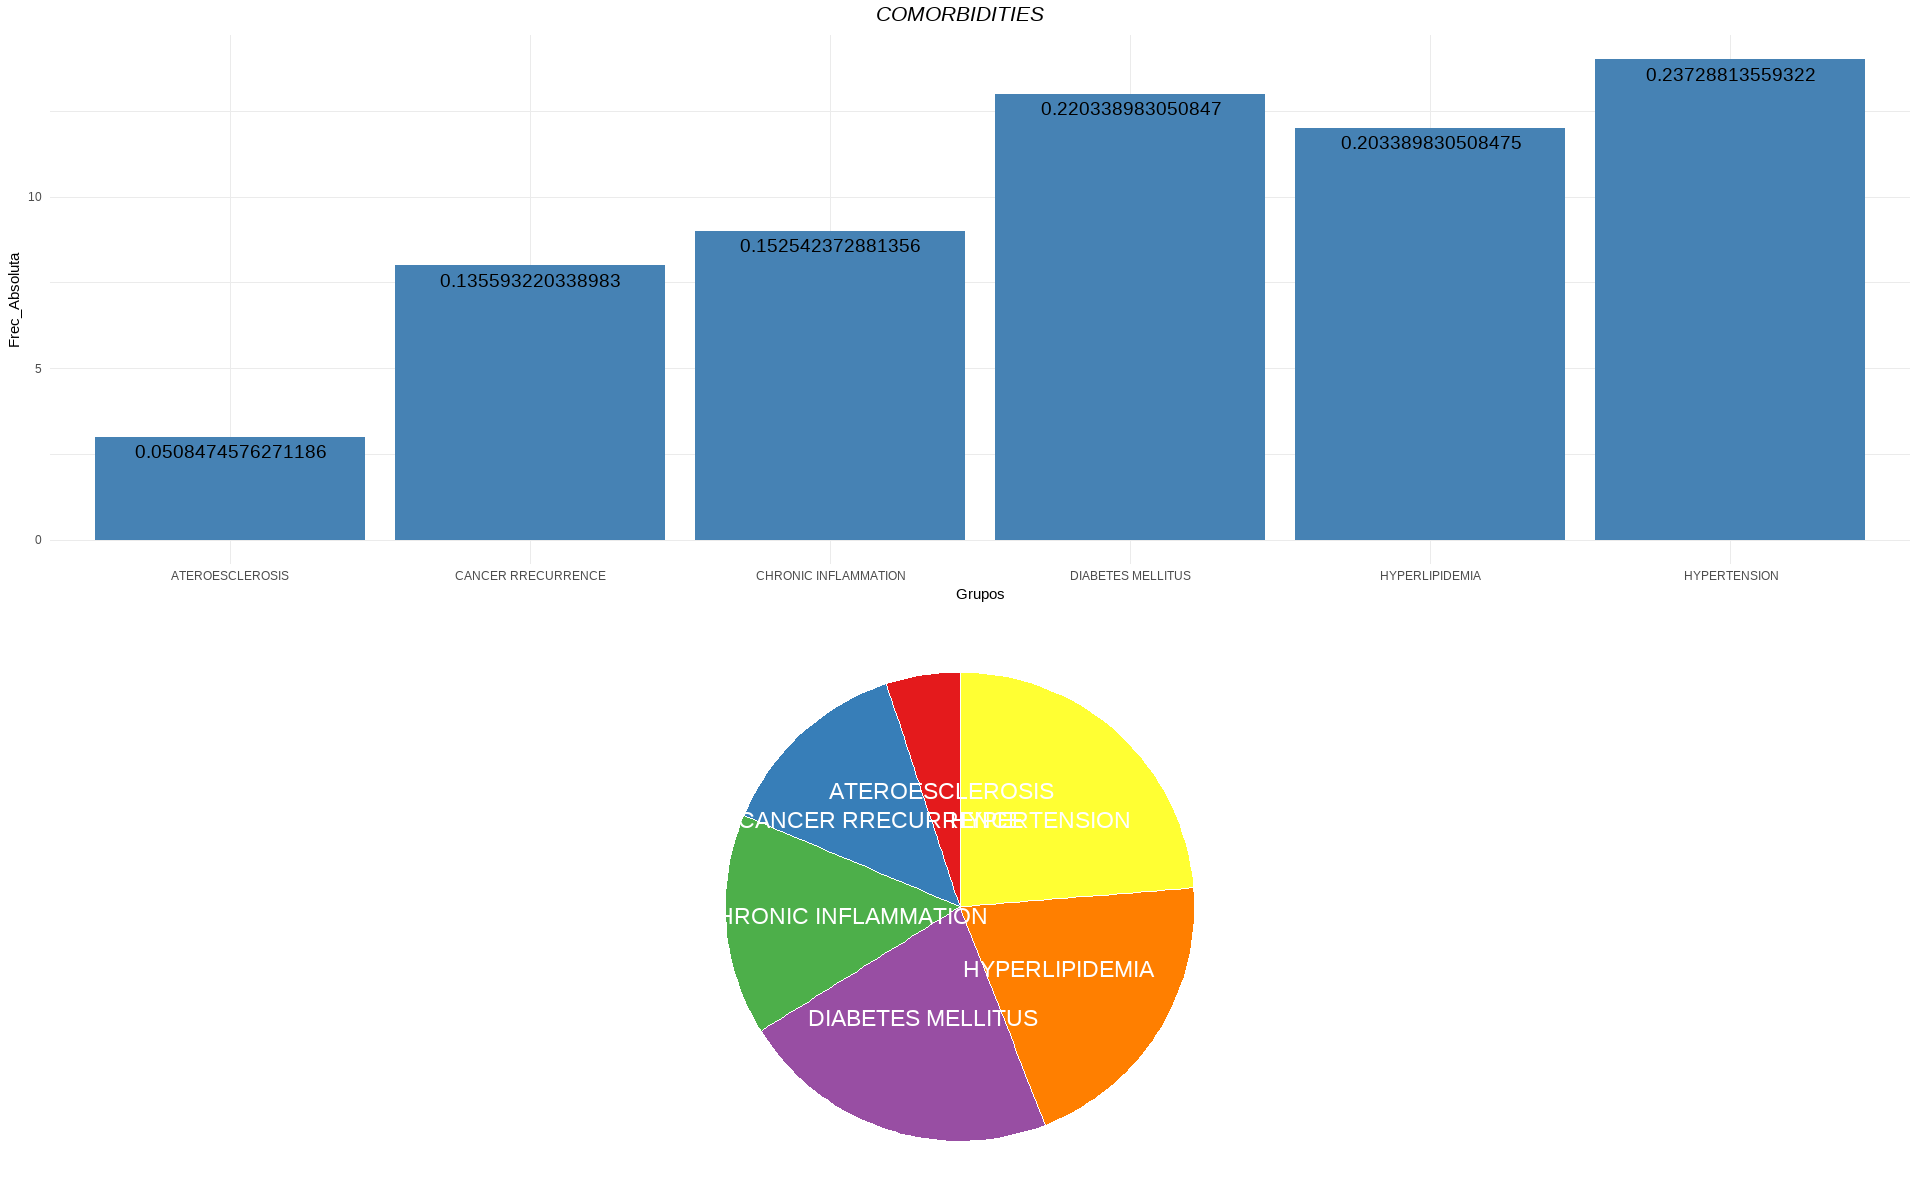

[1] "********************************************"
[1] "ACTION_TAKEN_"
[1] "********************************************"
                Grupos Frec_Absoluta Frec_Relativa
1 ADDED OTHER TREATMEN             3    0.05084746
2       ADDED STEROIDS             1    0.01694915
3     DOSE NOT CHANGED            21    0.35593220
4         DOSE REDUCED            17    0.28813559
5     DRUG INTERRUPTED             9    0.15254237
6        DRUG WIHDRAWN             1    0.01694915
7               UNKNOW             7    0.11864407


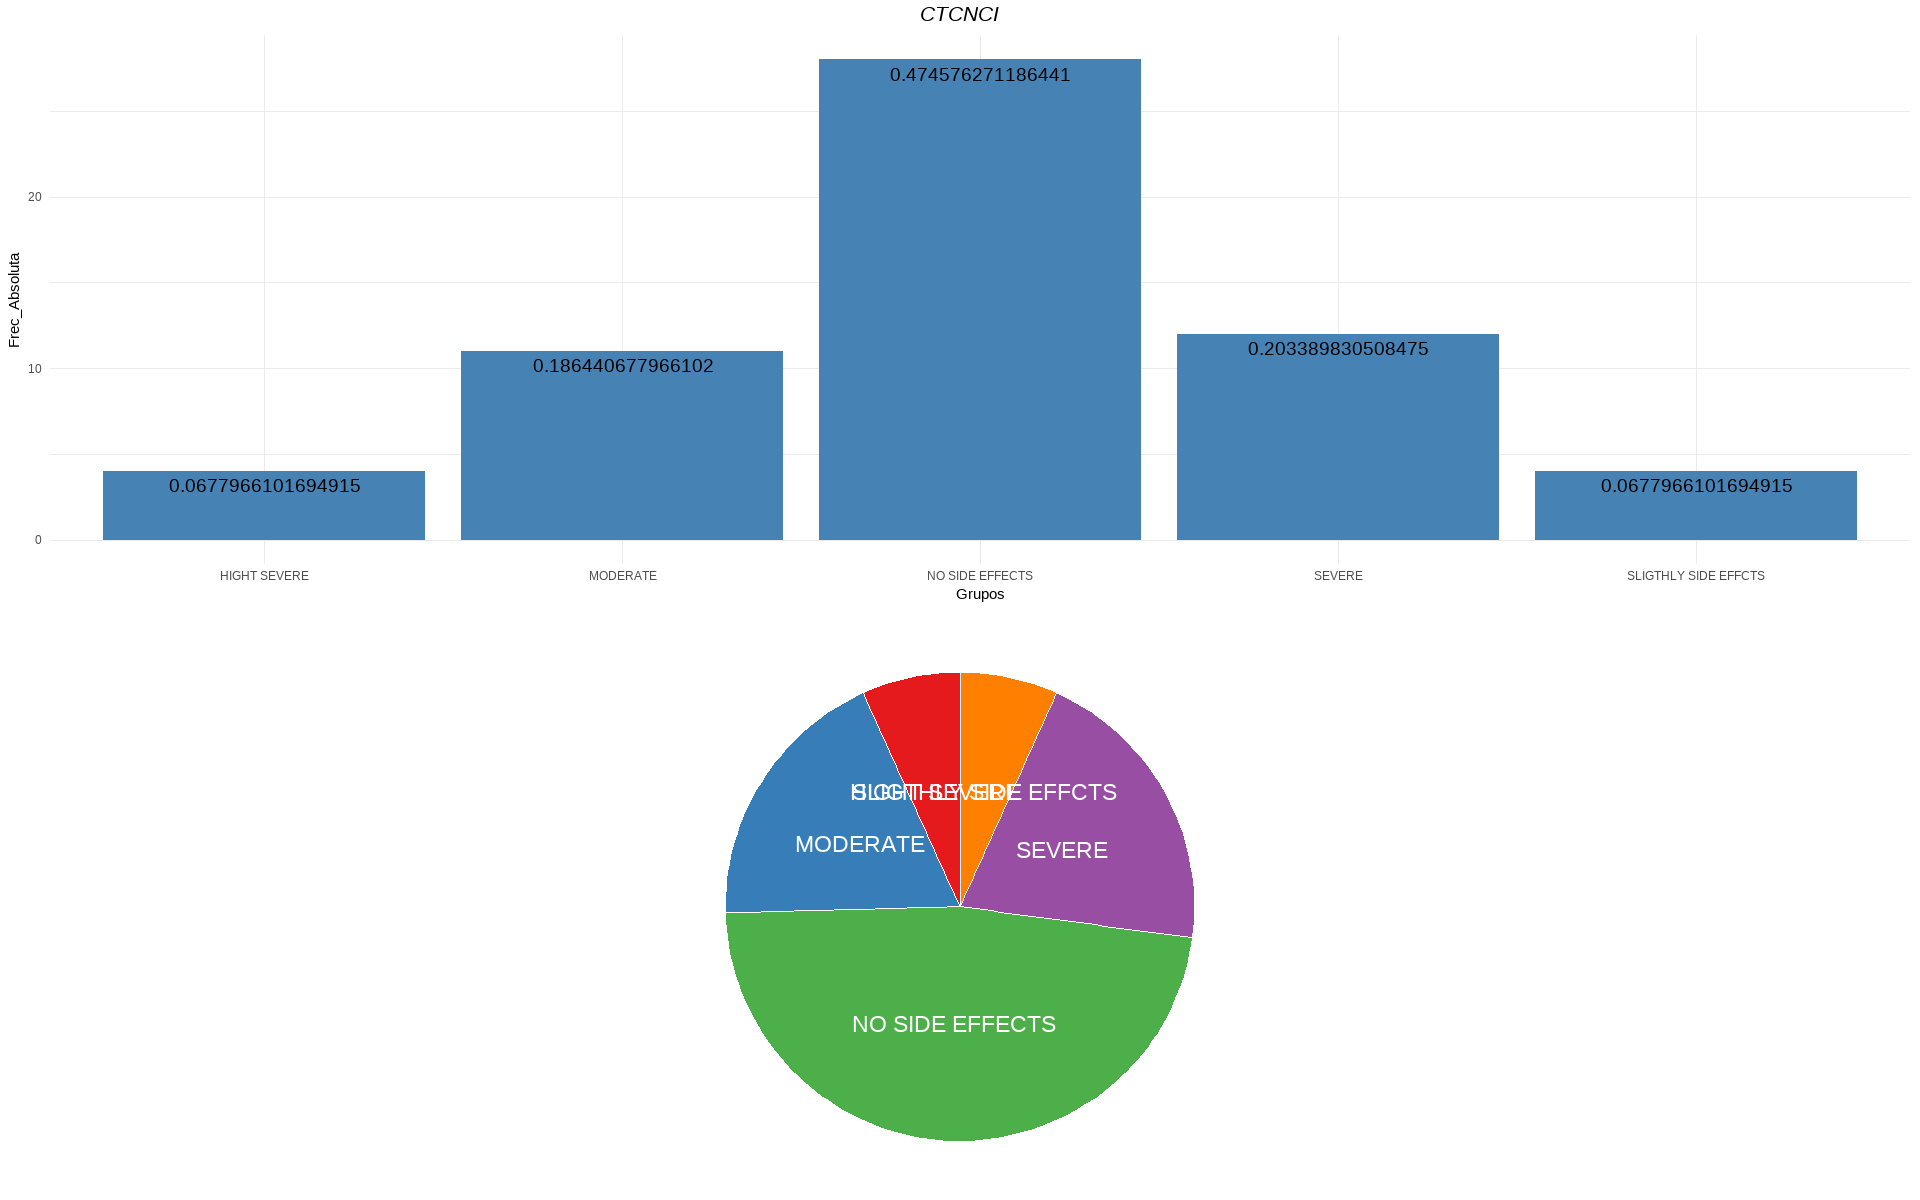

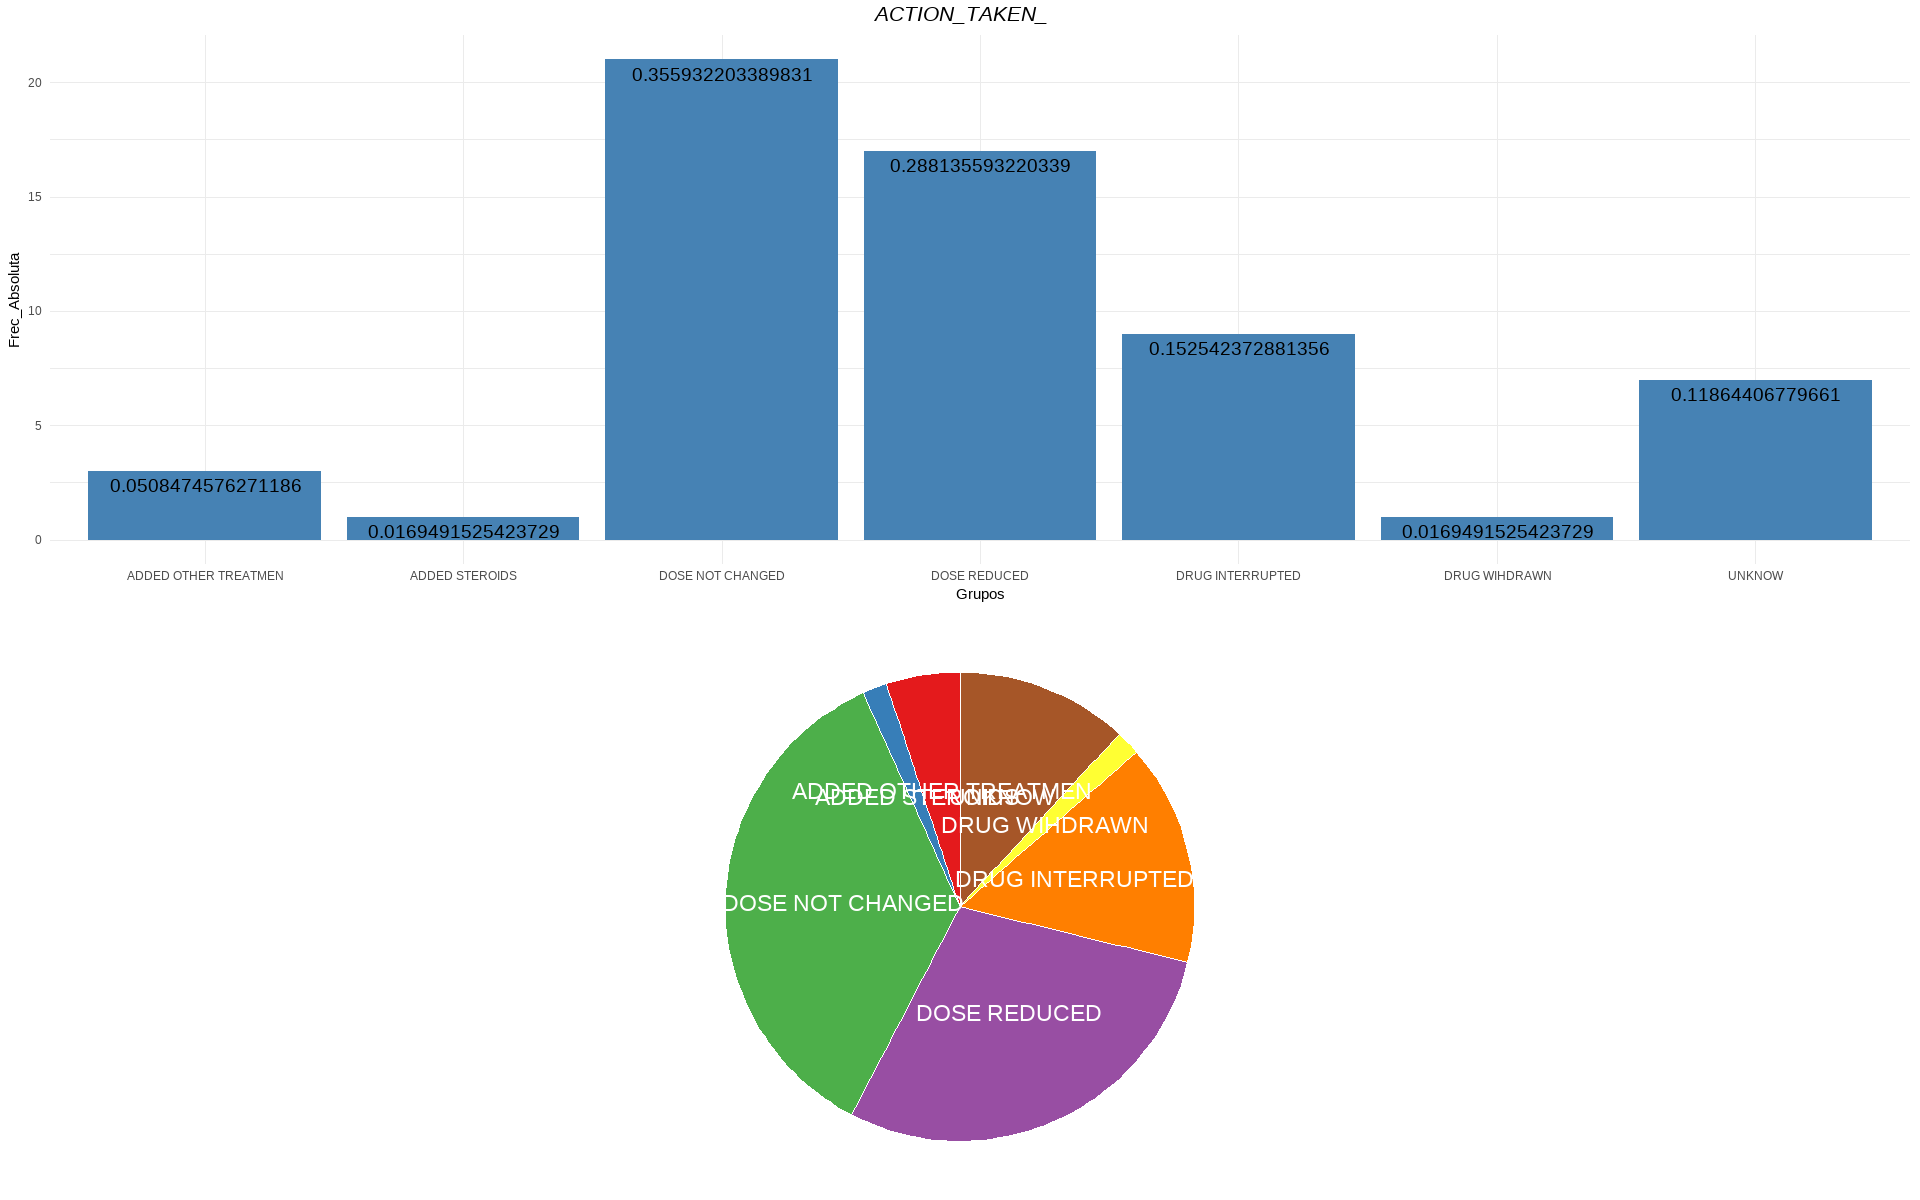

In [1092]:
# Tabla de frecuencias + diagrama de barras + diagrama de sectores en una iteración:

vec_var_cual <- c('GENDER','TNM_STAGE','DIAGNOSTIC','TREATMENT','ECOGPS','COMORBIDITIES','CTCNCI','ACTION_TAKEN_')

for (i in vec_var_cual) {
    
    # 0. Seleccionar la variable con el contador i:
    #***************************************************************    
    var_i = i
    
    print("********************************************")
    print(var_i)
    print("********************************************")

    # 1. Creo la tabla de frecuencias relativas y absolutas:
    #***************************************************************

    # Tabla de frecuencias absolutas:
    tabla_frec = data.frame(t(table(datos[,var_i])))[,2:3]
    colnames(tabla_frec)<-c("Grupos","Frec_Absoluta")

    # Tabla de frecuencias relativas:
    tabla_frec$Frec_Relativa <- tabla_frec$Frec_Absoluta/sum(tabla_frec$Frec_Absoluta)
    print(tabla_frec)


    # 3. Crear el diagrama de sectores
    #***************************************************************
    # Create Data
    data <- data.frame(
      group=tabla_frec$Grupos,
      value=tabla_frec$Frec_Relativa
    )

    data <- data %>% 
      arrange(desc(group)) %>%
      mutate(prop = value / sum(data$value) *100) %>%
      mutate(ypos = cumsum(prop)- 0.5*prop )


    p2 <- ggplot(data, aes(x="", y=prop, fill=group)) +
      geom_bar(stat="identity", width=1, color="white") +
      coord_polar("y", start=0) +
      theme_void() + 
      theme(legend.position="none") +

      geom_text(aes(y = ypos, label = group), color = "white", size=6) +
      scale_fill_brewer(palette="Set1")

    
    
    # 2. Crear el barplot frecuencia Absoluta
    #***************************************************************
    p1 <- ggplot(data=tabla_frec, aes(x=Grupos, y=Frec_Absoluta)) +
      geom_bar(stat="identity", fill="steelblue")+
      geom_text(aes(label=Frec_Relativa), vjust=1.6, color="black", size=5)+
      theme_minimal()

   
      grid.arrange(p1, p2,
               nrow=2, ncol = 1,
               top = textGrob(var_i,gp=gpar(fontsize=16,font=3)))    
    
    
}

# EXPLORACION MULTIVARIADA DEL DATASET

## Variables numericas vs salida

### Diagrama de dispersion por la salida

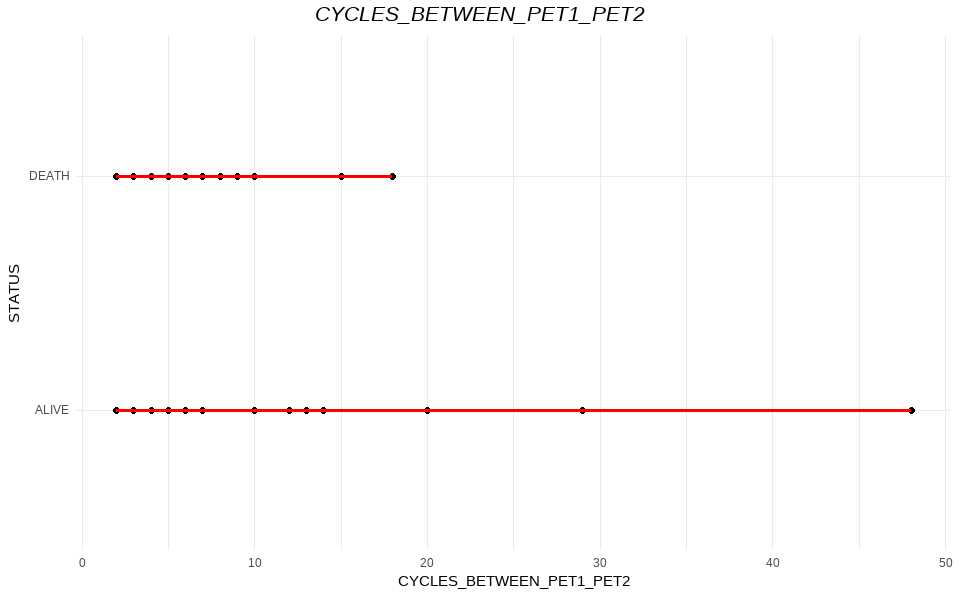

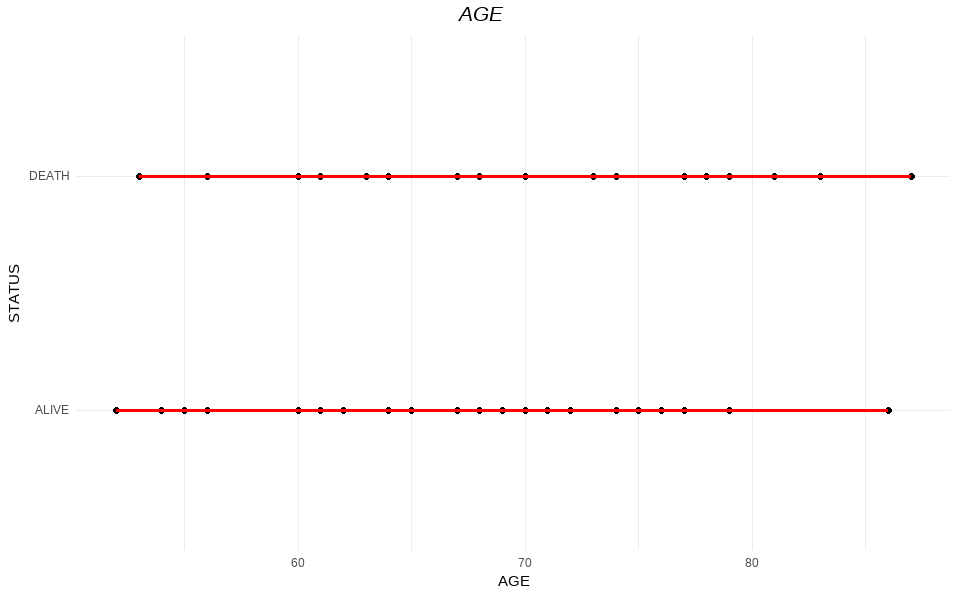

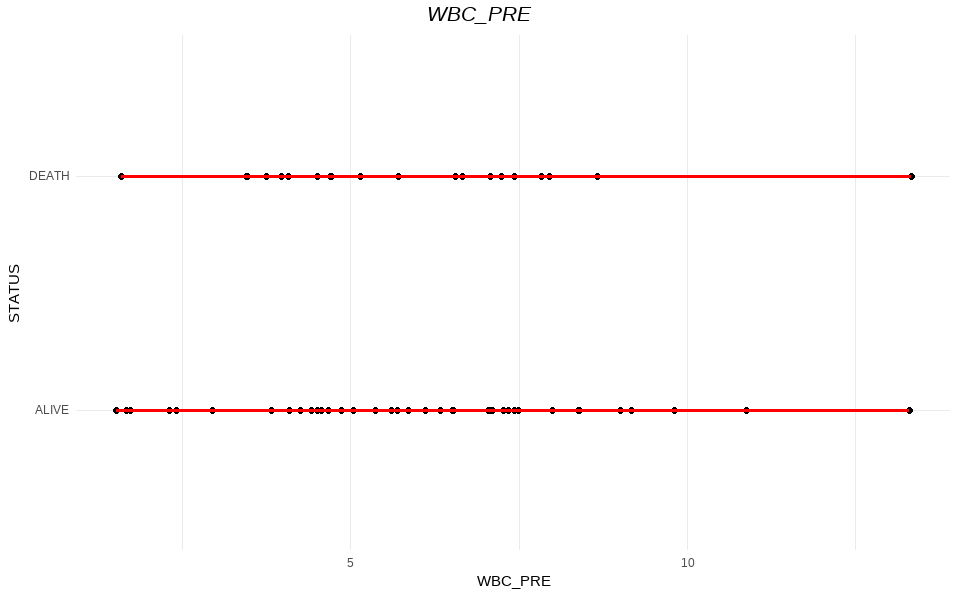

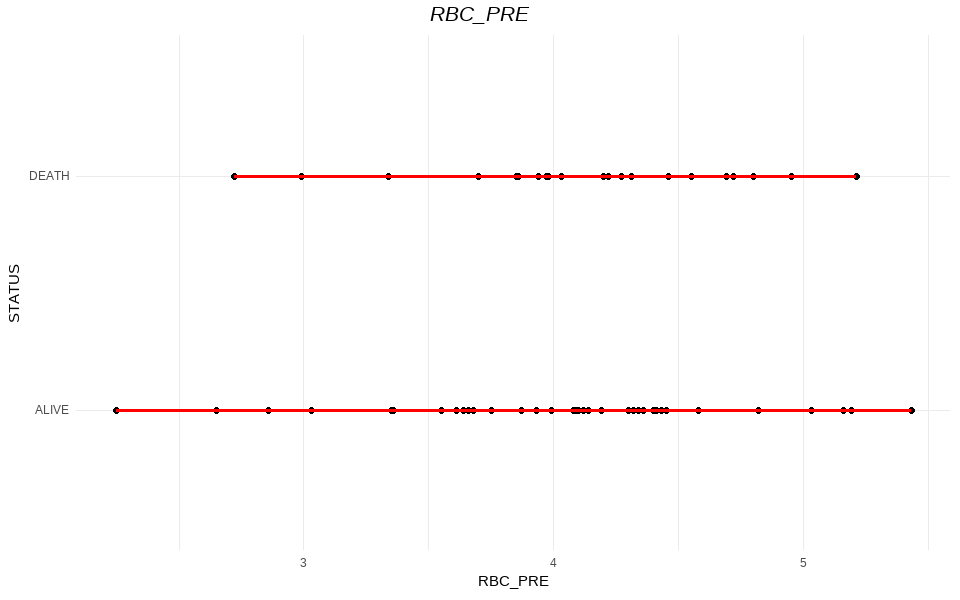

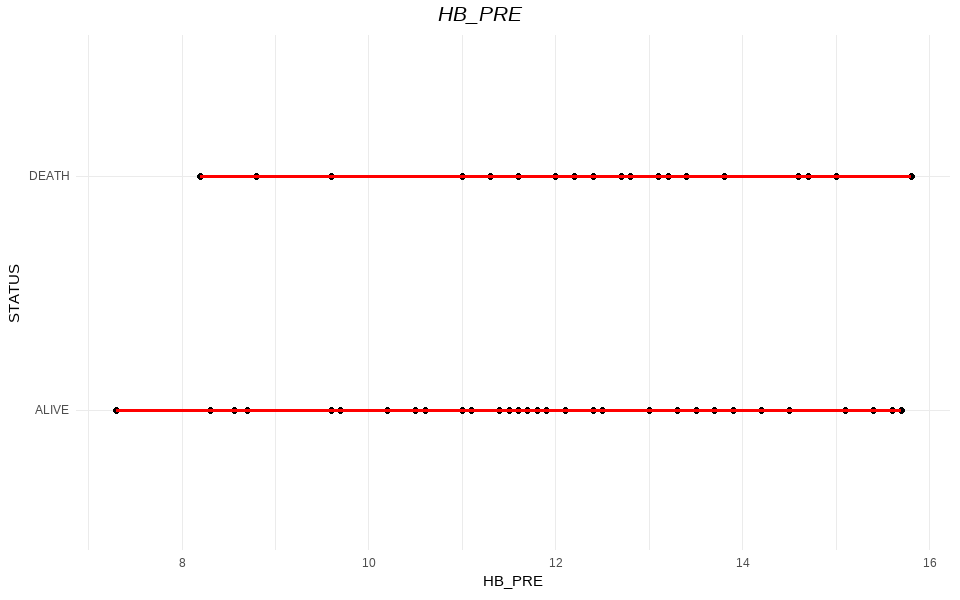

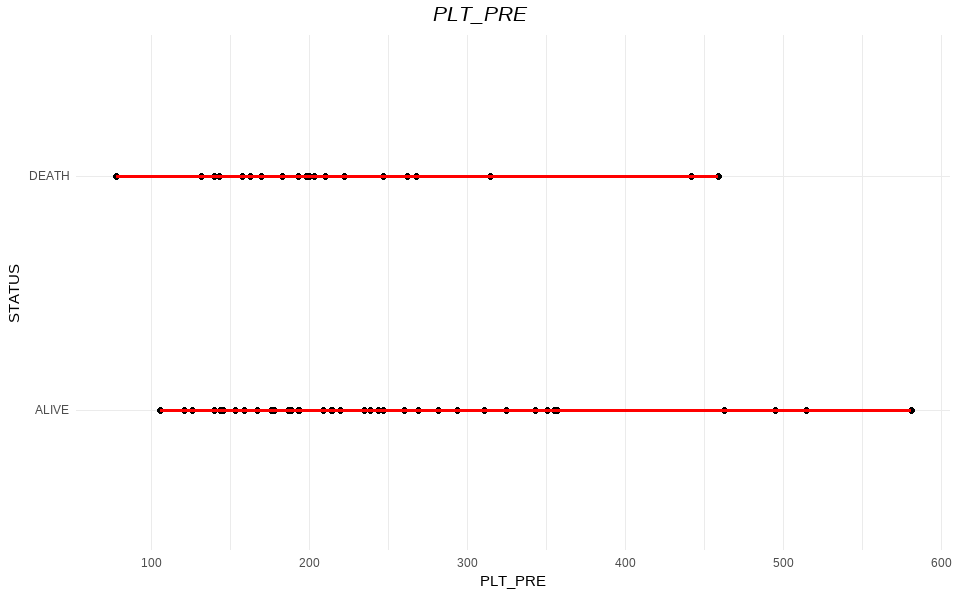

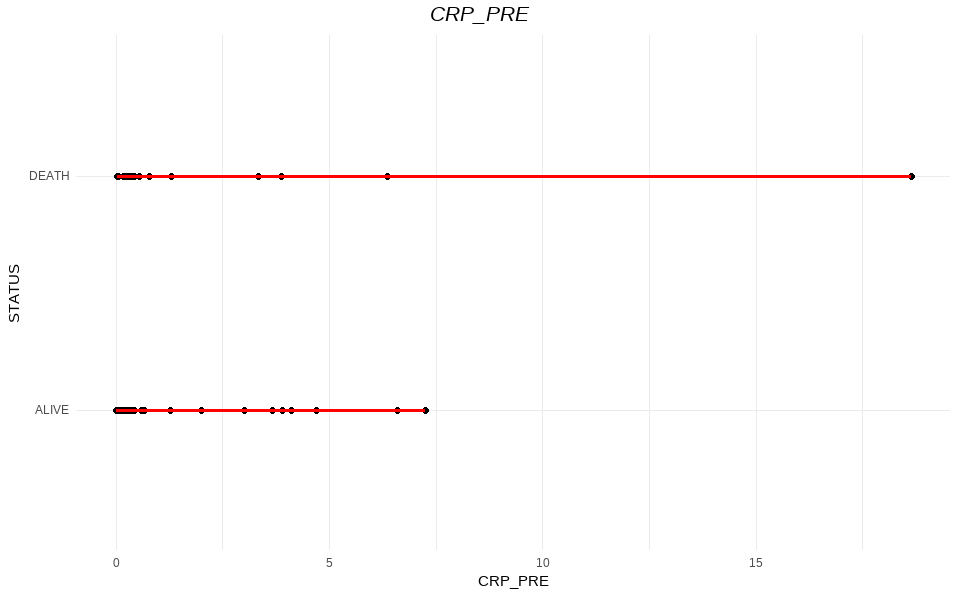

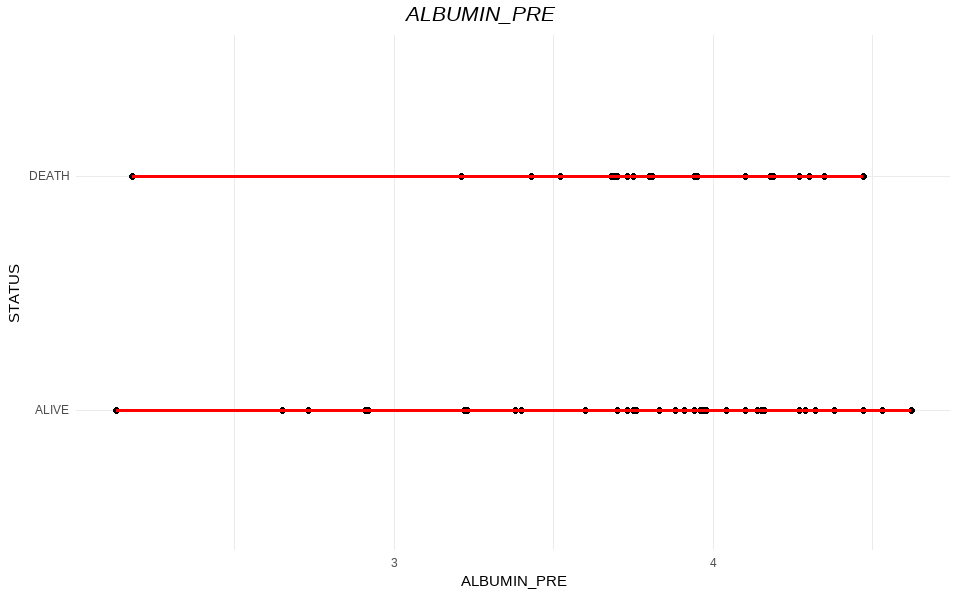

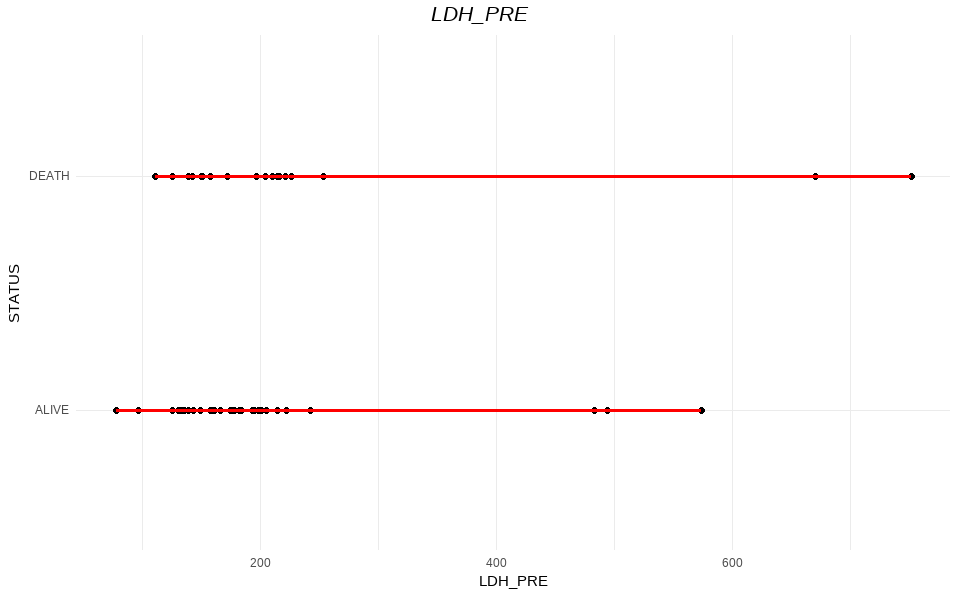

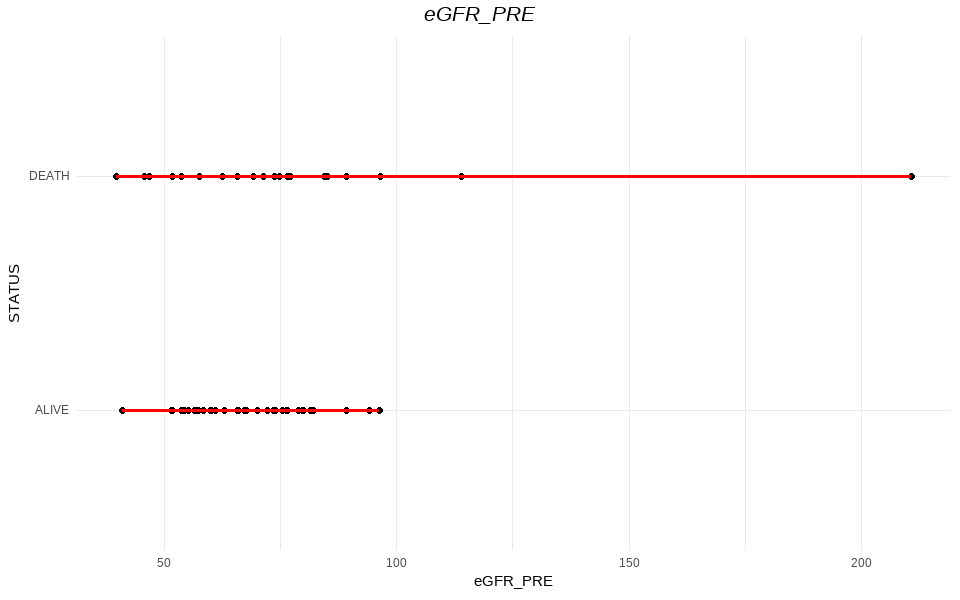

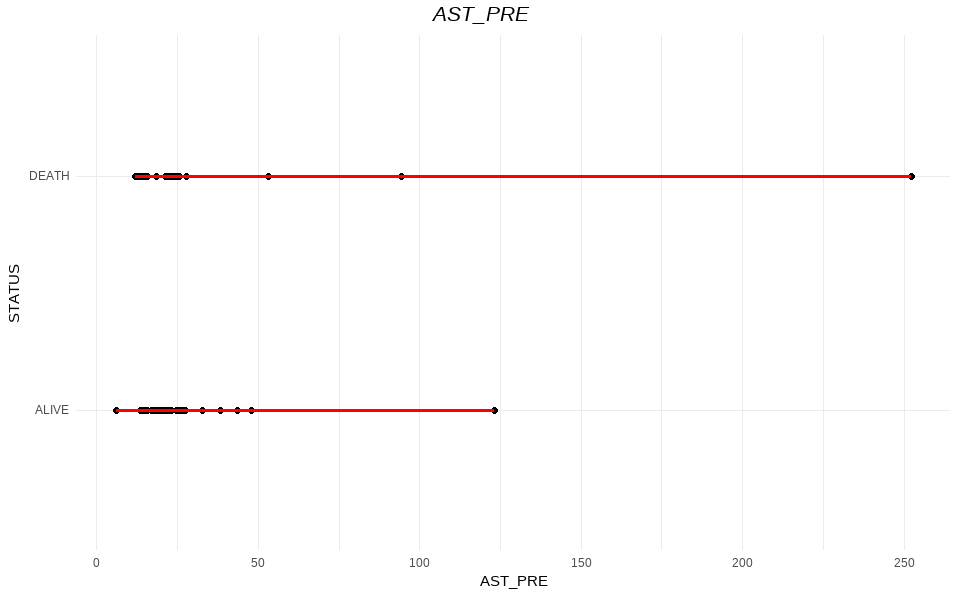

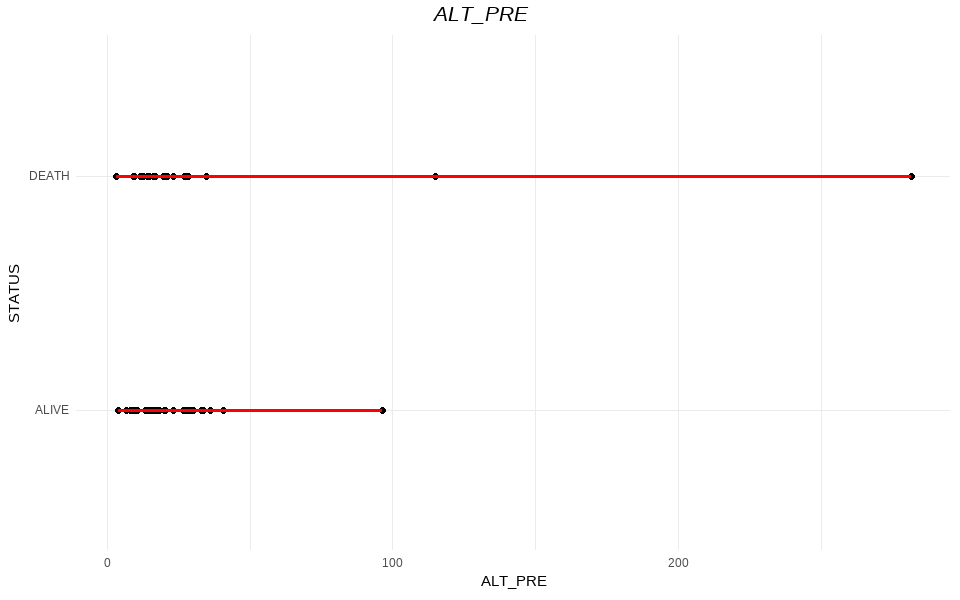

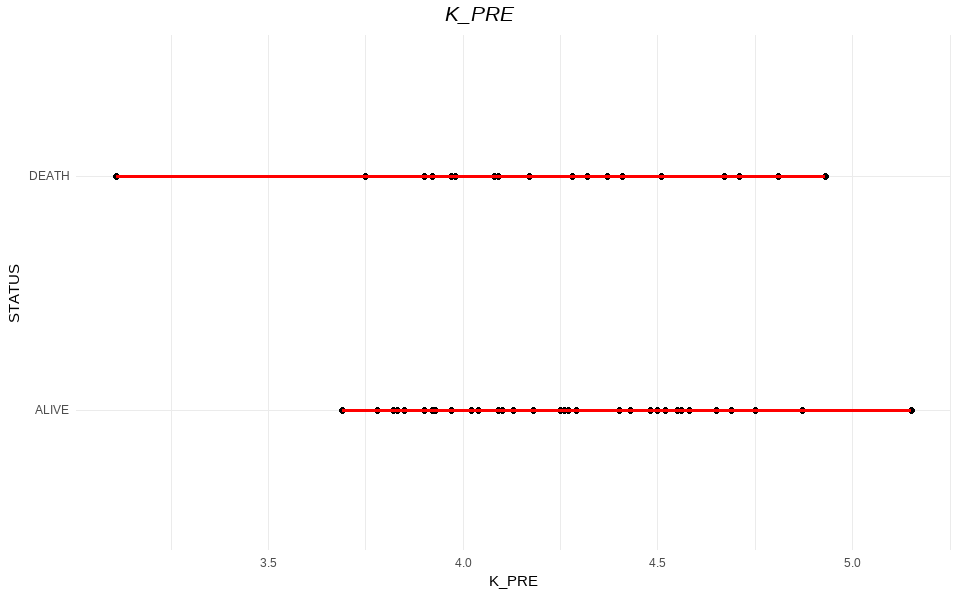

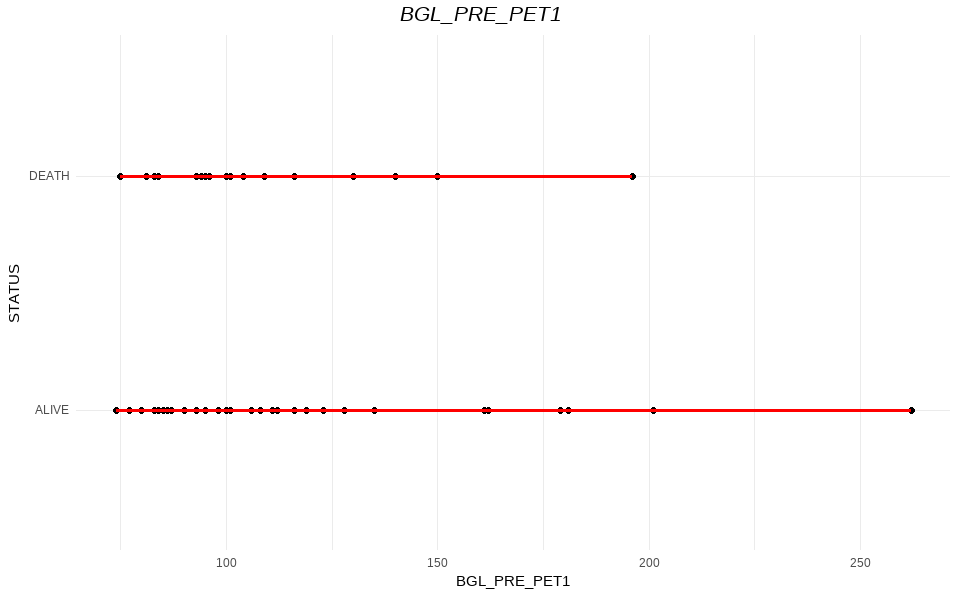

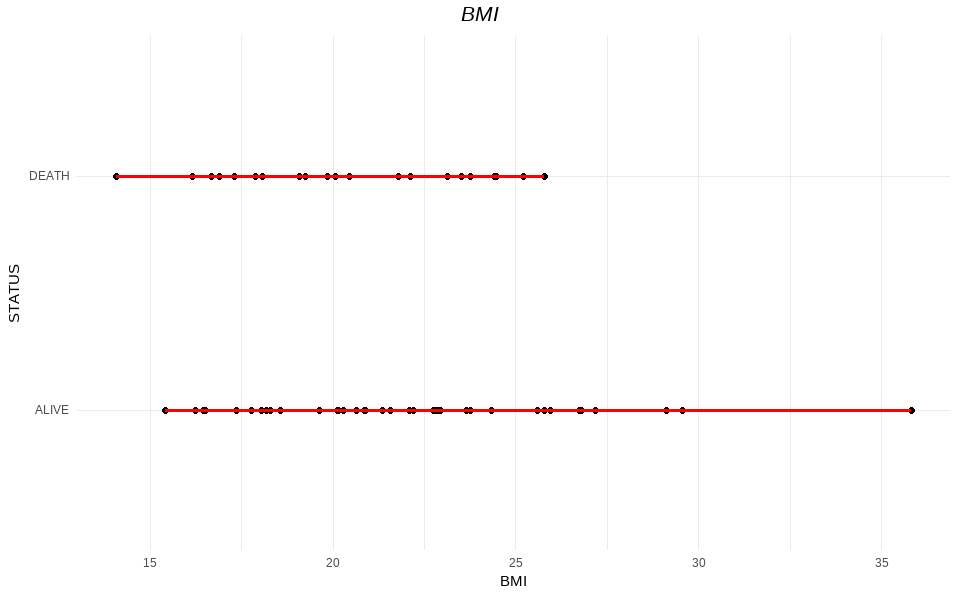

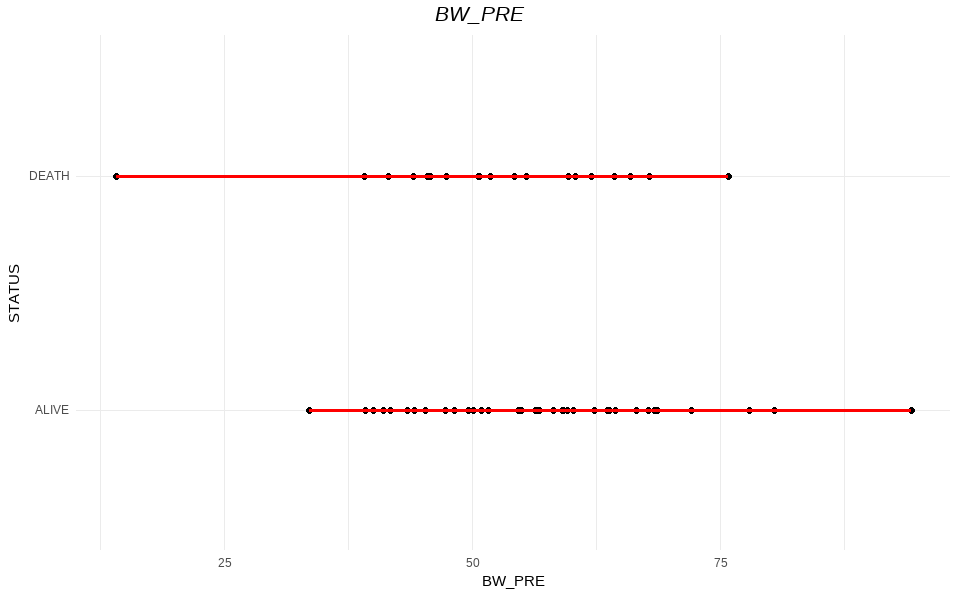

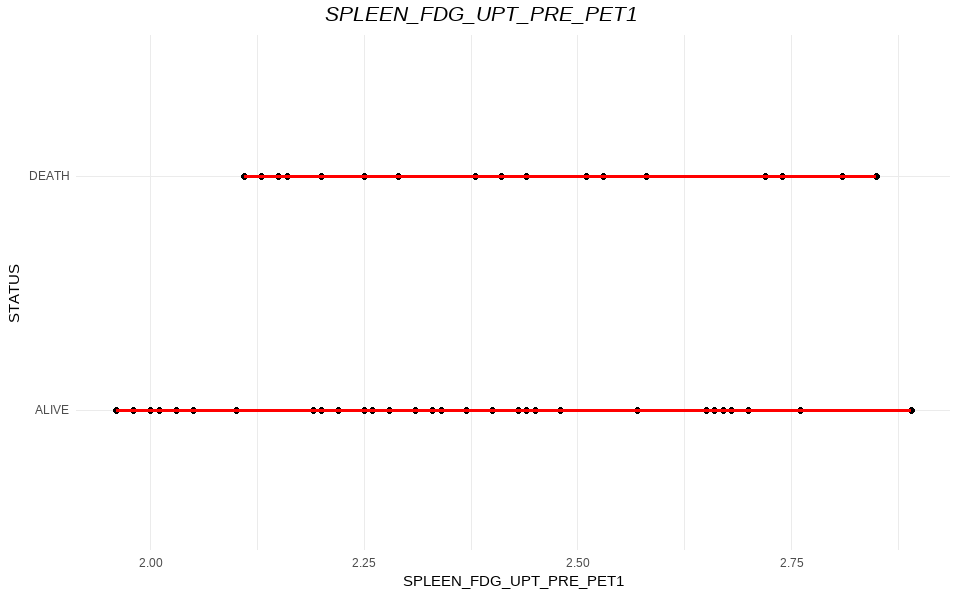

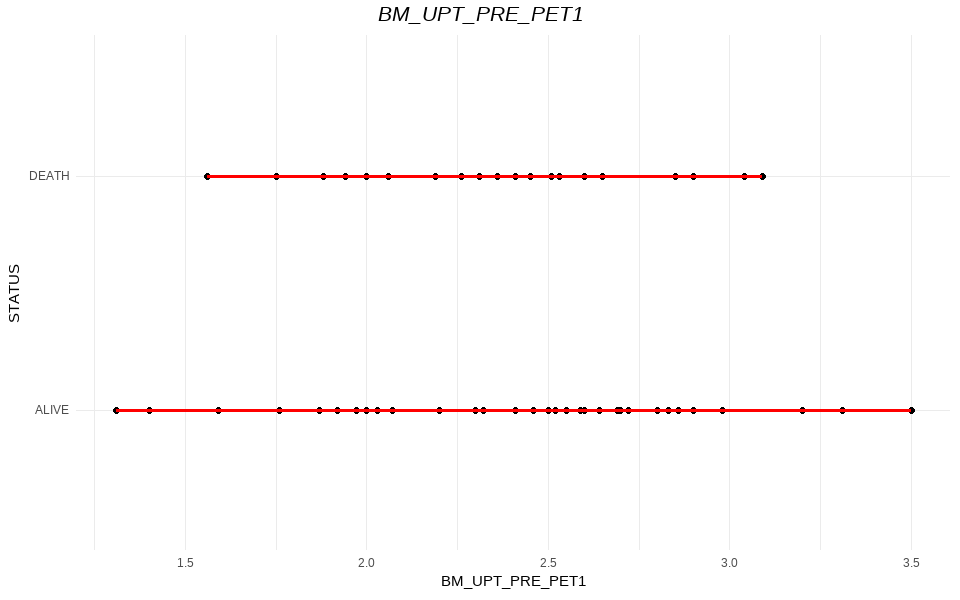

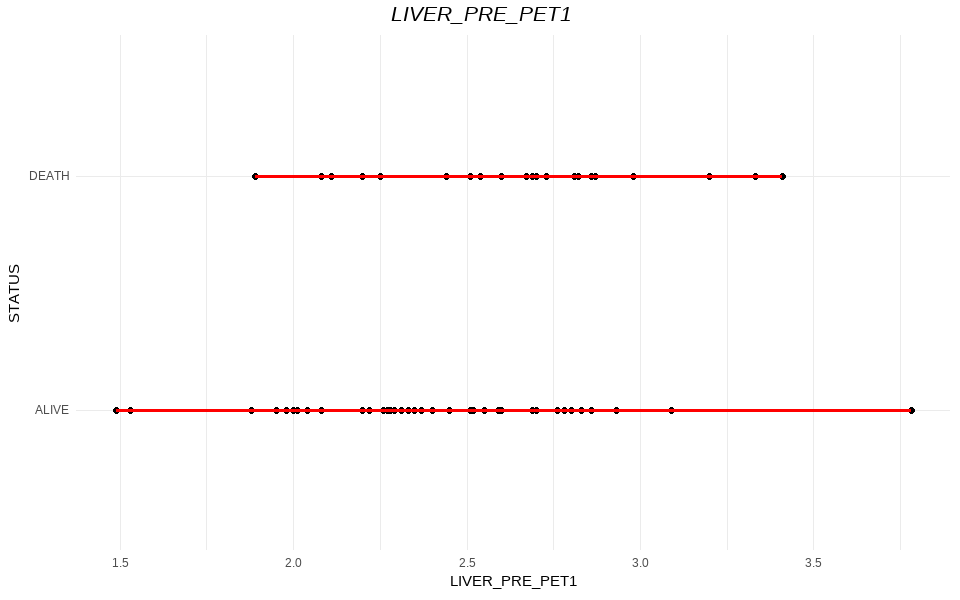

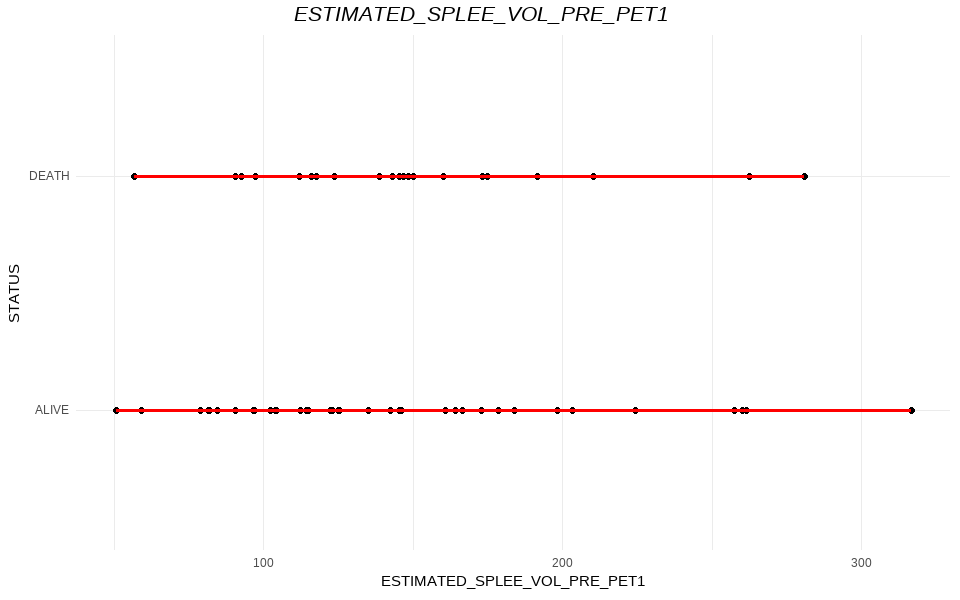

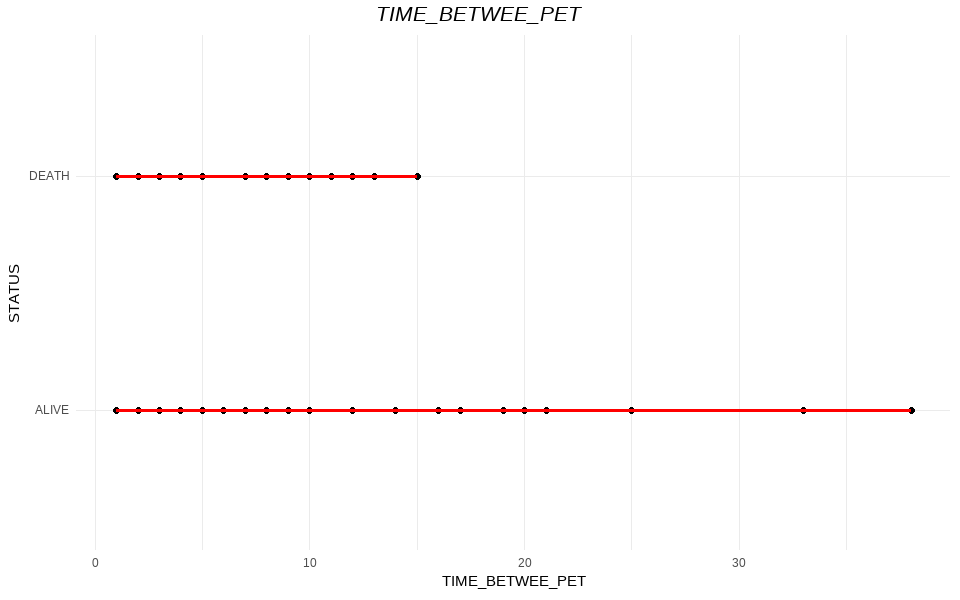

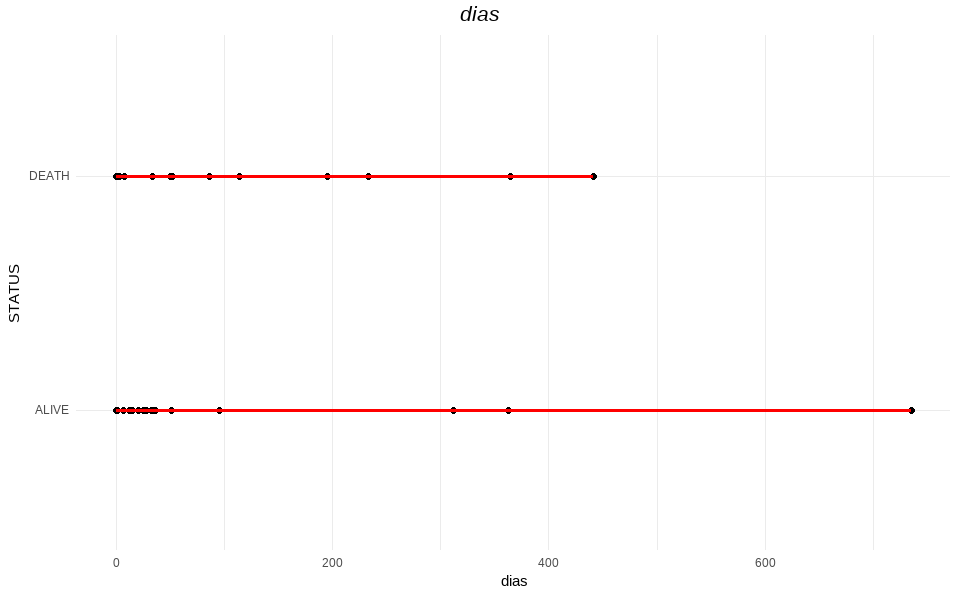

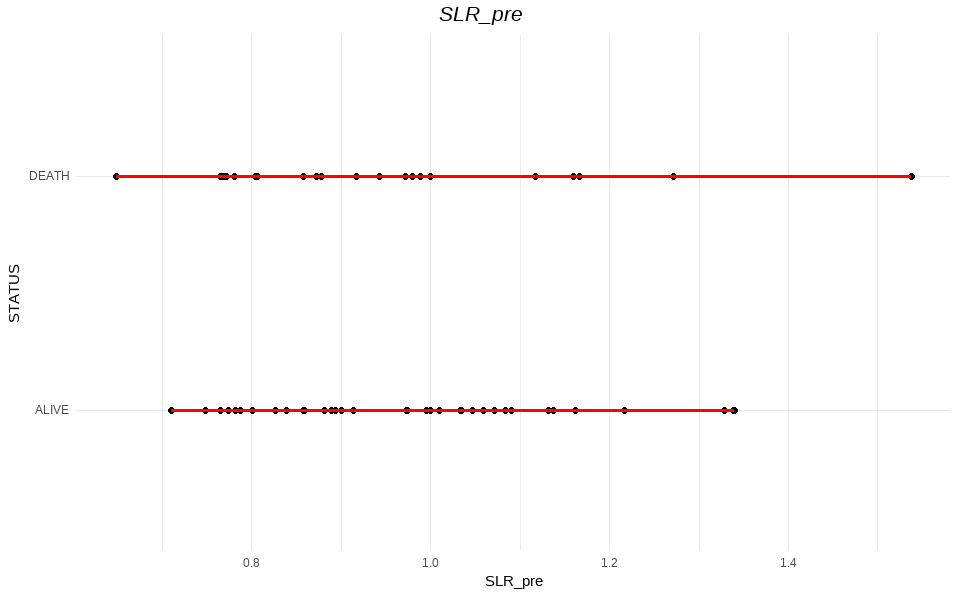

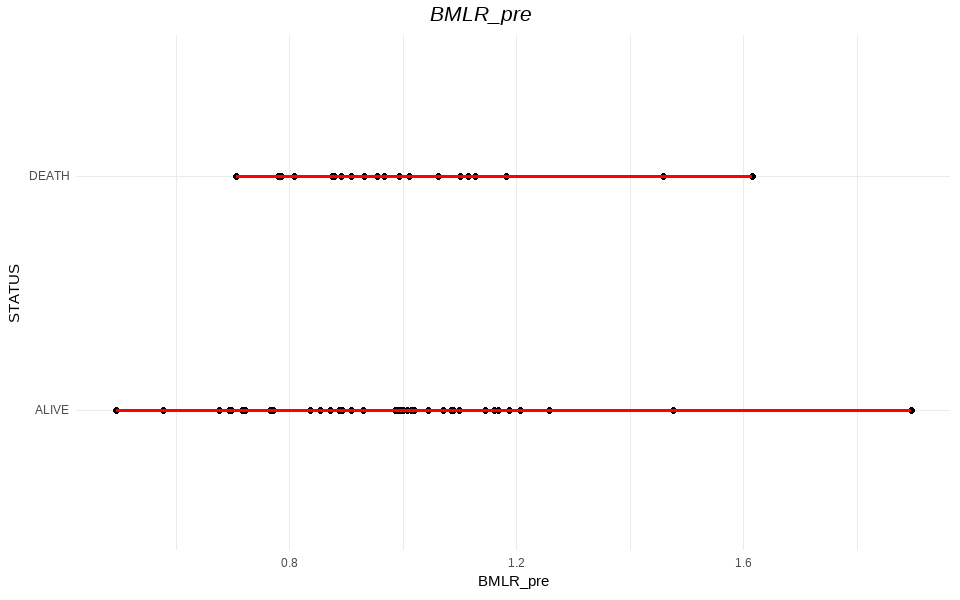

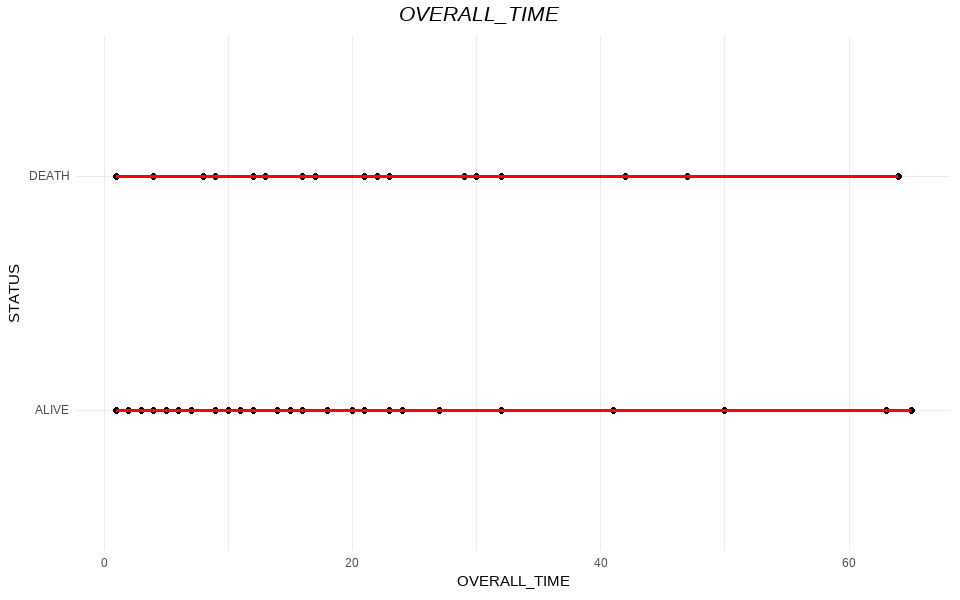

In [1093]:
# Diagrama de dispersion por pareja

options(repr.plot.width=8, repr.plot.height=5)
var_respuesta <- as.name(respuesta)

for (i in 1:length(var_num)) {
  name_i <- as.name(var_num[i])
  r <- list()
  
    r[[1]] <- ggplot(datos, aes(x=!!name_i, y=!!var_respuesta)) +
      geom_point() +
      geom_smooth(method=lm ,formula = y ~ x, color="red", fill="#69b3a2", se=TRUE)  +
    theme_minimal()
  
  grid.arrange(r[[1]],
               nrow=1, ncol = 1,
               top = textGrob(var_num[i],gp=gpar(fontsize=16,font=3)))
}



### Orden de importancia de las variables cualitativas en el dataset

In [1094]:
# Mutual informacion variables cualitativas:
inf_gain <- information.gain(STATUS~., data = datos)
inf_gain <- inf_gain %>%
  arrange(desc(attr_importance))
inf_gain

attr_importance
ACTION_TAKEN_                1.327590e-01   
DIAGNOSTIC                   1.265327e-01   
TNM_STAGE                    8.123244e-02   
ECOGPS                       5.316641e-02   
COMORBIDITIES                5.272323e-02   
CTCNCI                       2.358443e-02   
GENDER                       1.294311e-02   
TREATMENT                    7.687645e-05   
CYCLES_BETWEEN_PET1_PET2     0.000000e+00   
AGE                          0.000000e+00   
WBC_PRE                      0.000000e+00   
RBC_PRE                      0.000000e+00   
HB_PRE                       0.000000e+00   
PLT_PRE                      0.000000e+00   
CRP_PRE                      0.000000e+00   
ALBUMIN_PRE                  0.000000e+00   
LDH_PRE                      0.000000e+00   
eGFR_PRE                     0.000000e+00   
AST_PRE                      0.000000e+00   
ALT_PRE                      0.000000e+00   
K_PRE                        0.000000e+00   
BGL_PRE_PET1                 0.000000e+00   
BMI                          0.000000e+00   
BW_PRE                       0.000000e+00   
SPLEEN_FDG_UPT_PRE_PET1      0.000000e+00   
BM_UPT_PRE_PET1              0.000000e+00   
LIVER_PRE_PET1               0.000000e+00   
ESTIMATED_SPLEE_VOL_PRE_PET1 0.000000e+00   
TIME_BETWEE_PET              0.000000e+00   
dias                         0.000000e+00   
SLR_pre                      0.000000e+00   
BMLR_pre                     0.000000e+00   
OVERALL_TIME                 0.000000e+00

### Estadisticos numericos variables numericos vs salida

In [1095]:
# 6. DESCRIPCION MULTIVARIADA: las variables en función de la respuesta
name_y <- as.name(respuesta[1])

# Descripciones de las variables cuantiativas vs salida
descripcion_num <- datos %>%
  group_by(!!name_y)%>%
  dlookr::describe()
descripcion_num

described_variables          STATUS n  na mean        sd         
1  AGE                          ALIVE  38 0   68.5526316   8.1562358
2  AGE                          DEATH  21 0   70.9047619   9.4228698
3  ALBUMIN_PRE                  ALIVE  38 0    3.7957895   0.5630834
4  ALBUMIN_PRE                  DEATH  21 0    3.8304762   0.5007642
5  ALT_PRE                      ALIVE  38 0   22.2657895  15.3574927
6  ALT_PRE                      DEATH  21 0   35.3419048  60.6480327
7  AST_PRE                      ALIVE  38 0   24.4473684  18.2988810
8  AST_PRE                      DEATH  21 0   35.9290476  52.7780733
9  BGL_PRE_PET1                 ALIVE  38 0  114.2105263  38.9498346
10 BGL_PRE_PET1                 DEATH  21 0  106.6190476  27.7443259
11 BM_UPT_PRE_PET1              ALIVE  38 0    2.4044737   0.4882993
12 BM_UPT_PRE_PET1              DEATH  21 0    2.3709524   0.4132905
13 BMI                          ALIVE  38 0   22.1357895   4.2896479
14 BMI                          DEATH  21 0   20.4747619   3.3661545
15 BMLR_pre                     ALIVE  38 0    0.9706065   0.2563308
16 BMLR_pre                     DEATH  21 0    1.0031606   0.2179211
17 BW_PRE                       ALIVE  38 0   57.2894737  12.6083153
18 BW_PRE                       DEATH  21 0   52.7561905  12.9480464
19 CRP_PRE                      ALIVE  38 0    1.1097368   1.9033392
20 CRP_PRE                      DEATH  21 0    1.8019048   4.1777011
21 CYCLES_BETWEEN_PET1_PET2     ALIVE  38 0    7.3684211   8.8330493
22 CYCLES_BETWEEN_PET1_PET2     DEATH  21 0    6.5238095   4.0201872
23 dias                         ALIVE  38 0   46.8421053 137.8935207
24 dias                         DEATH  21 0   75.8095238 127.5623844
25 eGFR_PRE                     ALIVE  38 0   68.0105263  12.2979407
26 eGFR_PRE                     DEATH  21 0   76.9476190  35.4929235
27 ESTIMATED_SPLEE_VOL_PRE_PET1 ALIVE  38 0  143.3026316  61.1323619
28 ESTIMATED_SPLEE_VOL_PRE_PET1 DEATH  21 0  149.1523810  54.4306680
29 HB_PRE                       ALIVE  38 0   12.0042105   2.1079831
30 HB_PRE                       DEATH  21 0   12.5333333   2.0222100
31 K_PRE                        ALIVE  38 0    4.2657895   0.3521335
32 K_PRE                        DEATH  21 0    4.2395238   0.4226521
33 LDH_PRE                      ALIVE  38 0  198.8105263 100.7466820
34 LDH_PRE                      DEATH  21 0  231.8095238 164.2411699
35 LIVER_PRE_PET1               ALIVE  38 0    2.4084211   0.4367603
36 LIVER_PRE_PET1               DEATH  21 0    2.6519048   0.4027483
37 OVERALL_TIME                 ALIVE  38 0   17.7631579  16.2537883
38 OVERALL_TIME                 DEATH  21 0   21.5238095  15.1480000
39 PLT_PRE                      ALIVE  38 0  253.0789474 114.1263836
40 PLT_PRE                      DEATH  21 0  219.4285714  93.1206591
41 RBC_PRE                      ALIVE  38 0    4.0513158   0.6786440
42 RBC_PRE                      DEATH  21 0    4.1314286   0.6181366
43 SLR_pre                      ALIVE  38 0    0.9814276   0.1646818
44 SLR_pre                      DEATH  21 0    0.9524327   0.2066883
45 SPLEEN_FDG_UPT_PRE_PET1      ALIVE  38 0    2.3552632   0.2624596
46 SPLEEN_FDG_UPT_PRE_PET1      DEATH  21 0    2.3723810   0.2509363
47 TIME_BETWEE_PET              ALIVE  38 0   10.5789474   8.9703162
48 TIME_BETWEE_PET              DEATH  21 0    7.9047619   3.9484777
49 WBC_PRE                      ALIVE  38 0    6.0121053   2.6179496
50 WBC_PRE                      DEATH  21 0    5.7719048   2.5538023
   se_mean     IQR         skewness    kurtosis    p00         p01        
1   1.32311616  12.2500000 -0.35796368 -0.48367838  52.0000000  52.7400000
2   2.05623878  14.0000000 -0.14495828 -0.82993240  53.0000000  53.6000000
3   0.09134418   0.5225000 -1.11593692  1.04212745   2.1300000   2.3224000
4   0.10927570   0.5000000 -1.80020192  5.06822812   2.1800000   2.3860000
5   2.49131429  15.3500000  3.15067011 14.40321439   3.7000000   4.8100000
6  13.23448575  12.8000000  3.7824

### Graficos descriptivos variables numericas respecto a la salida

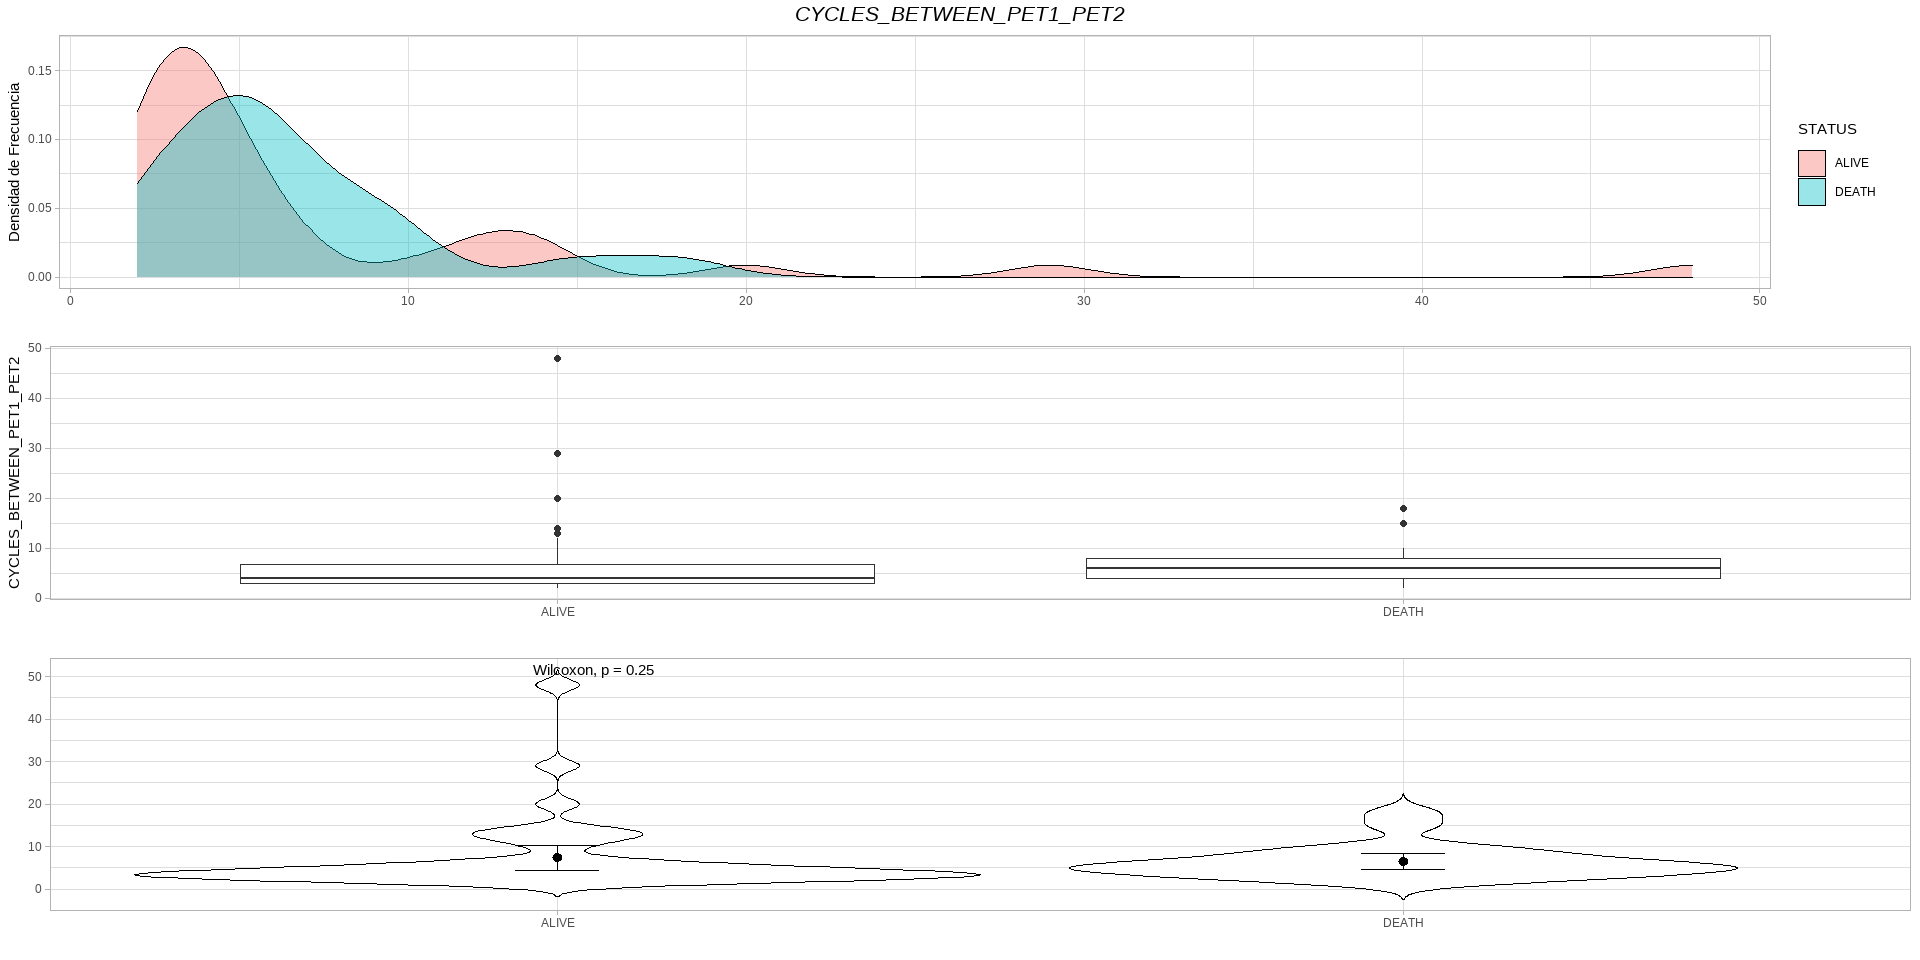

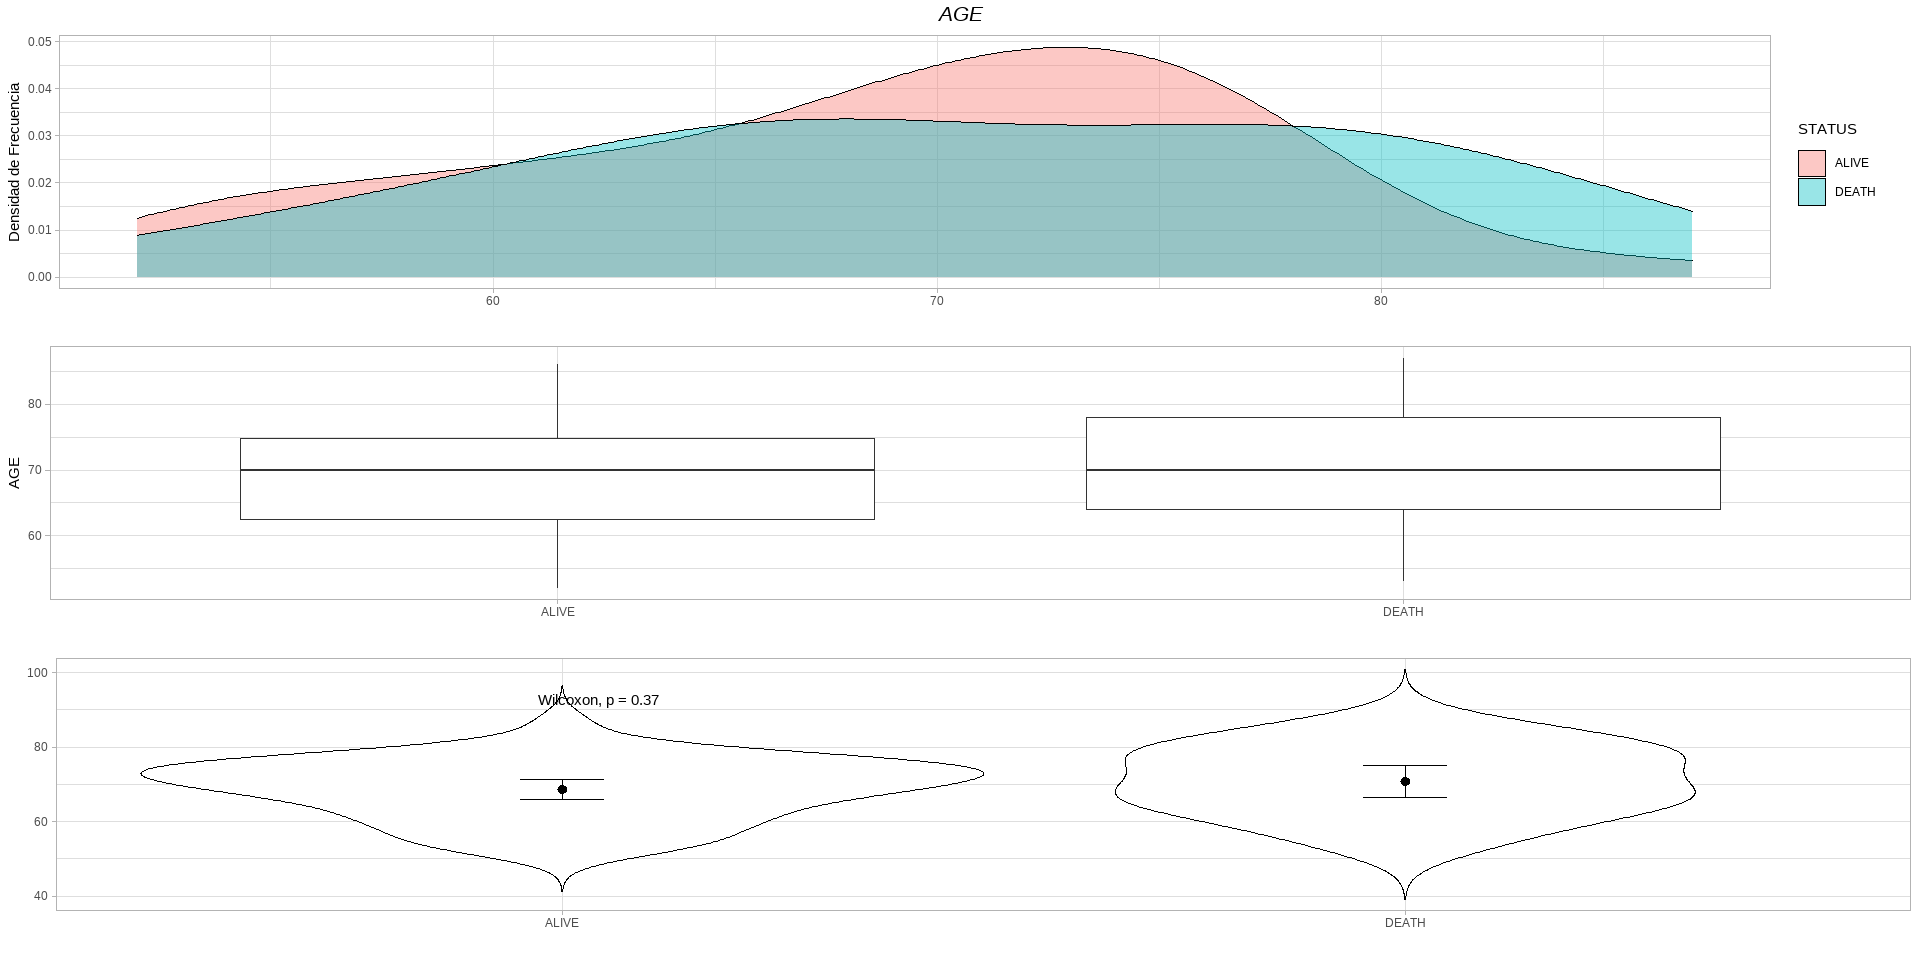

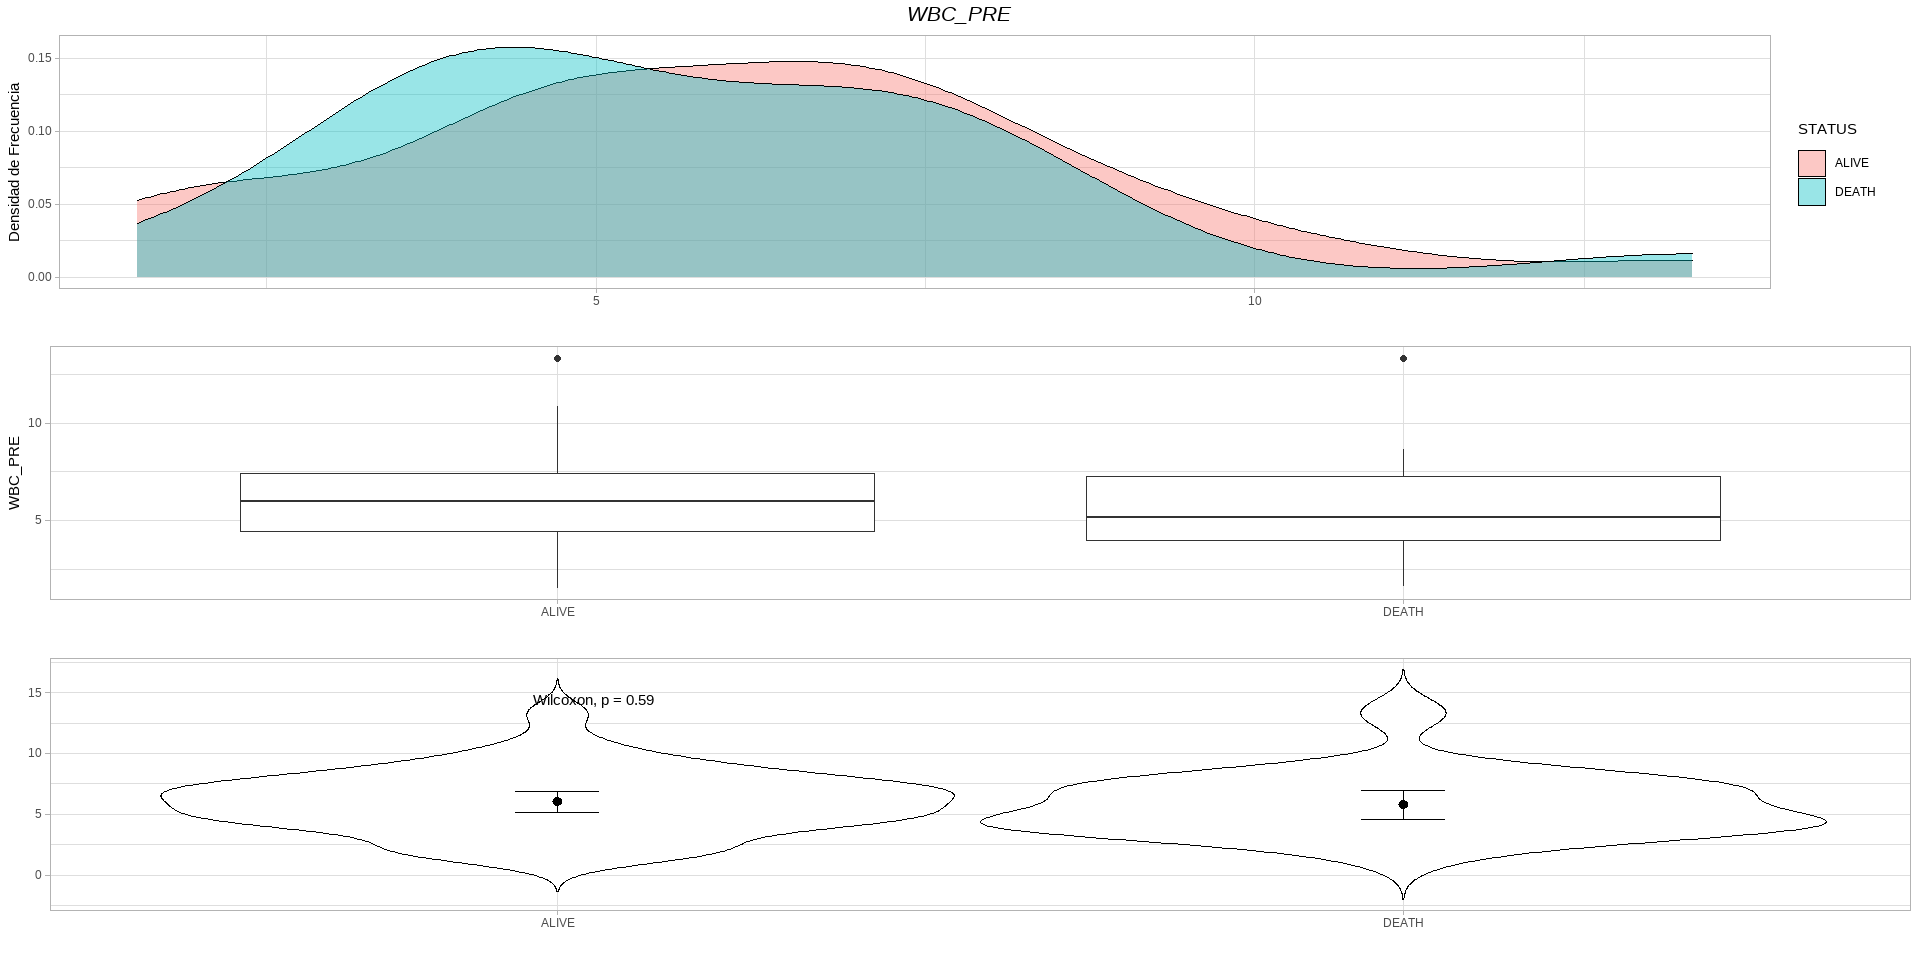

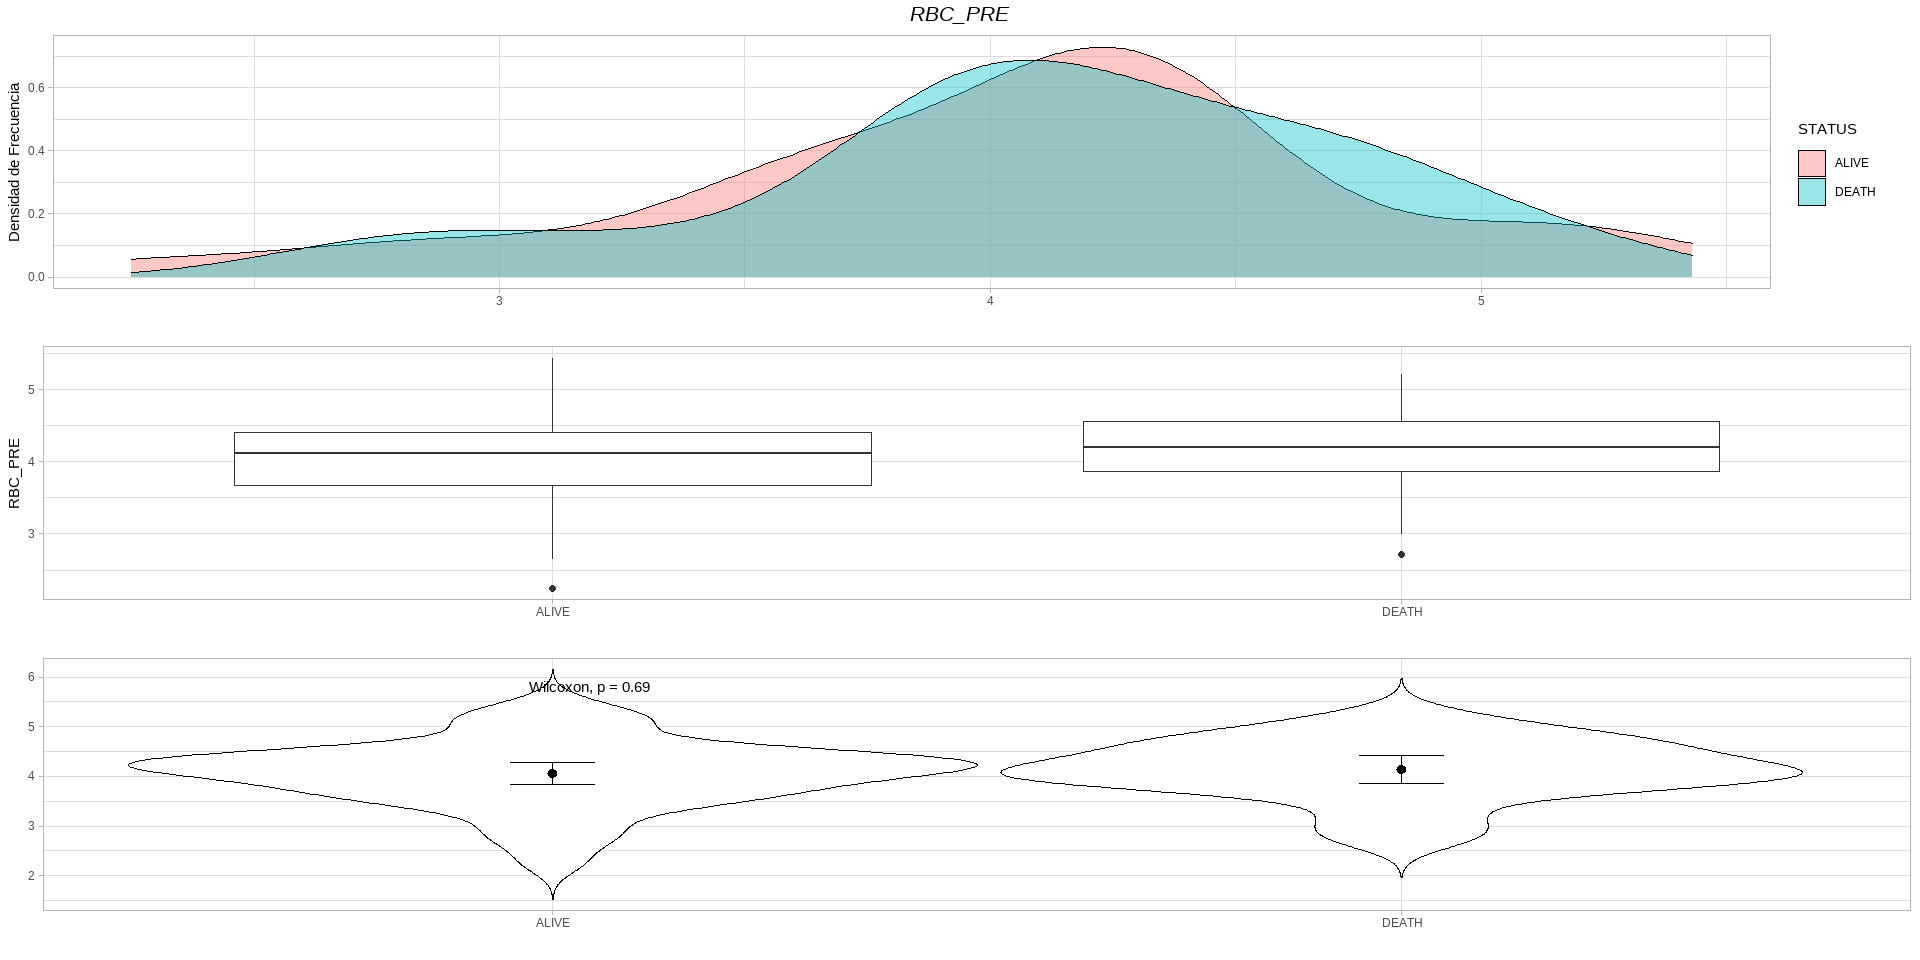

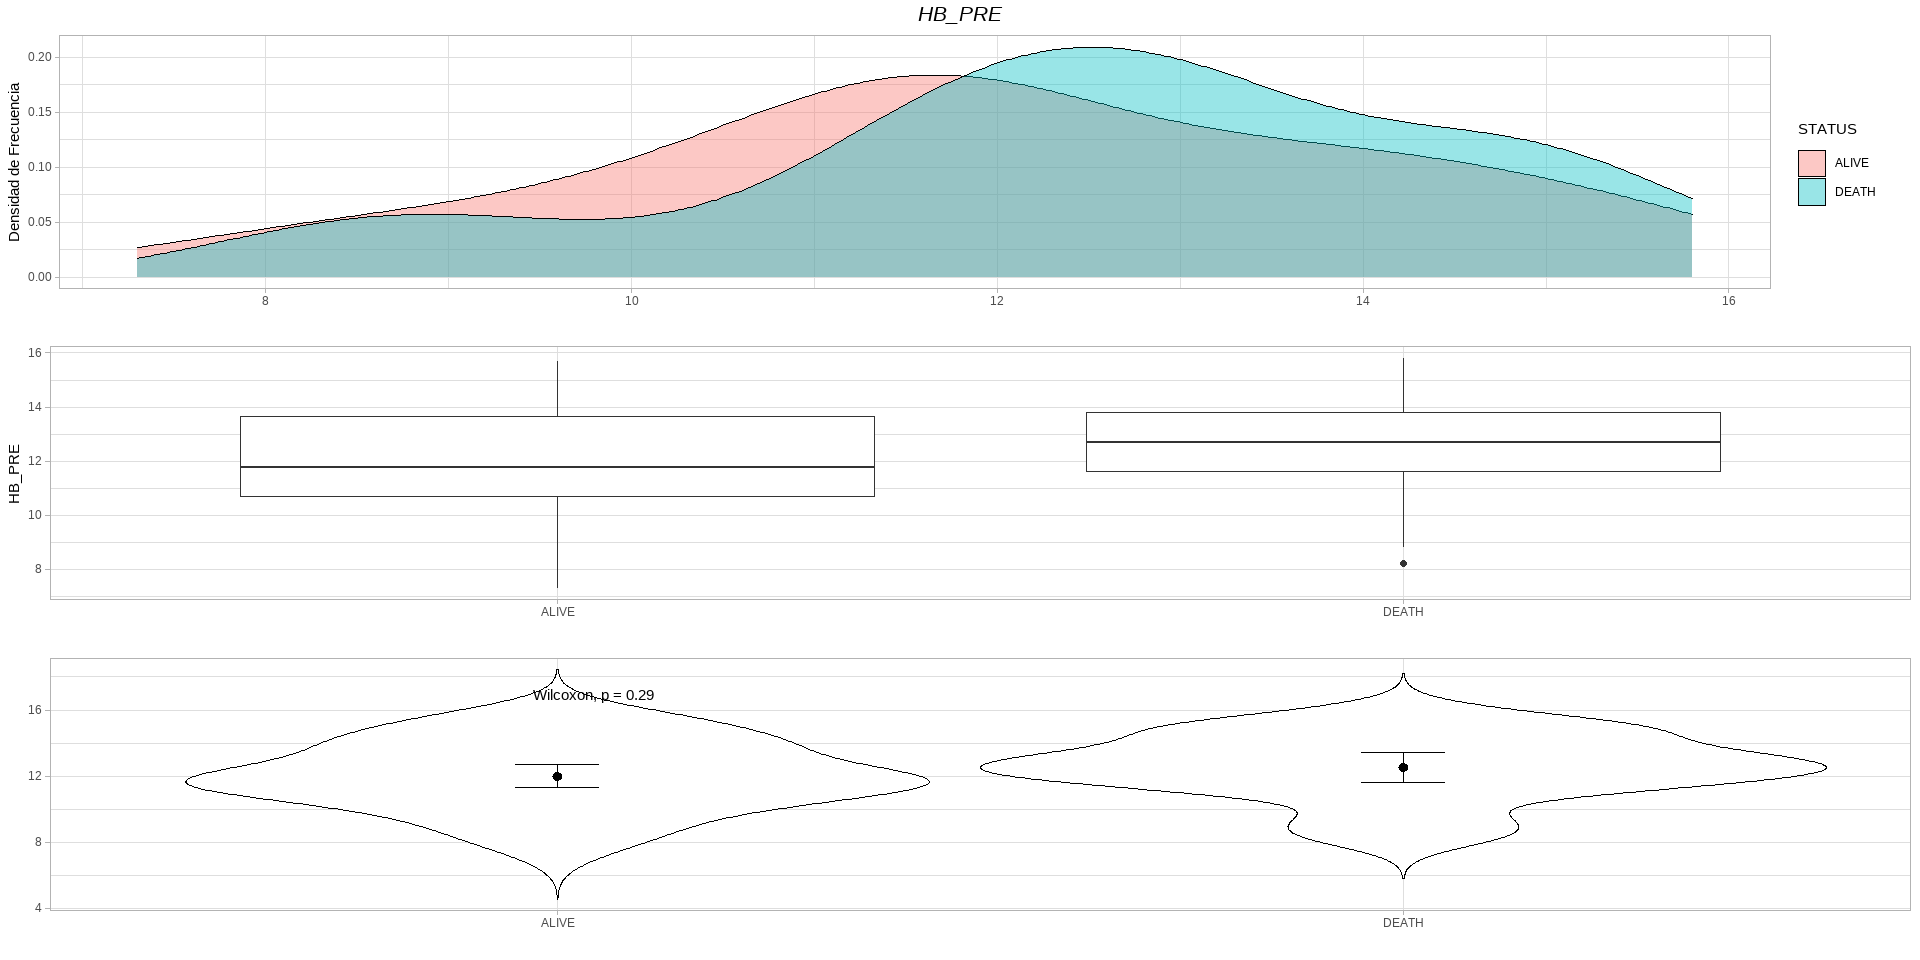

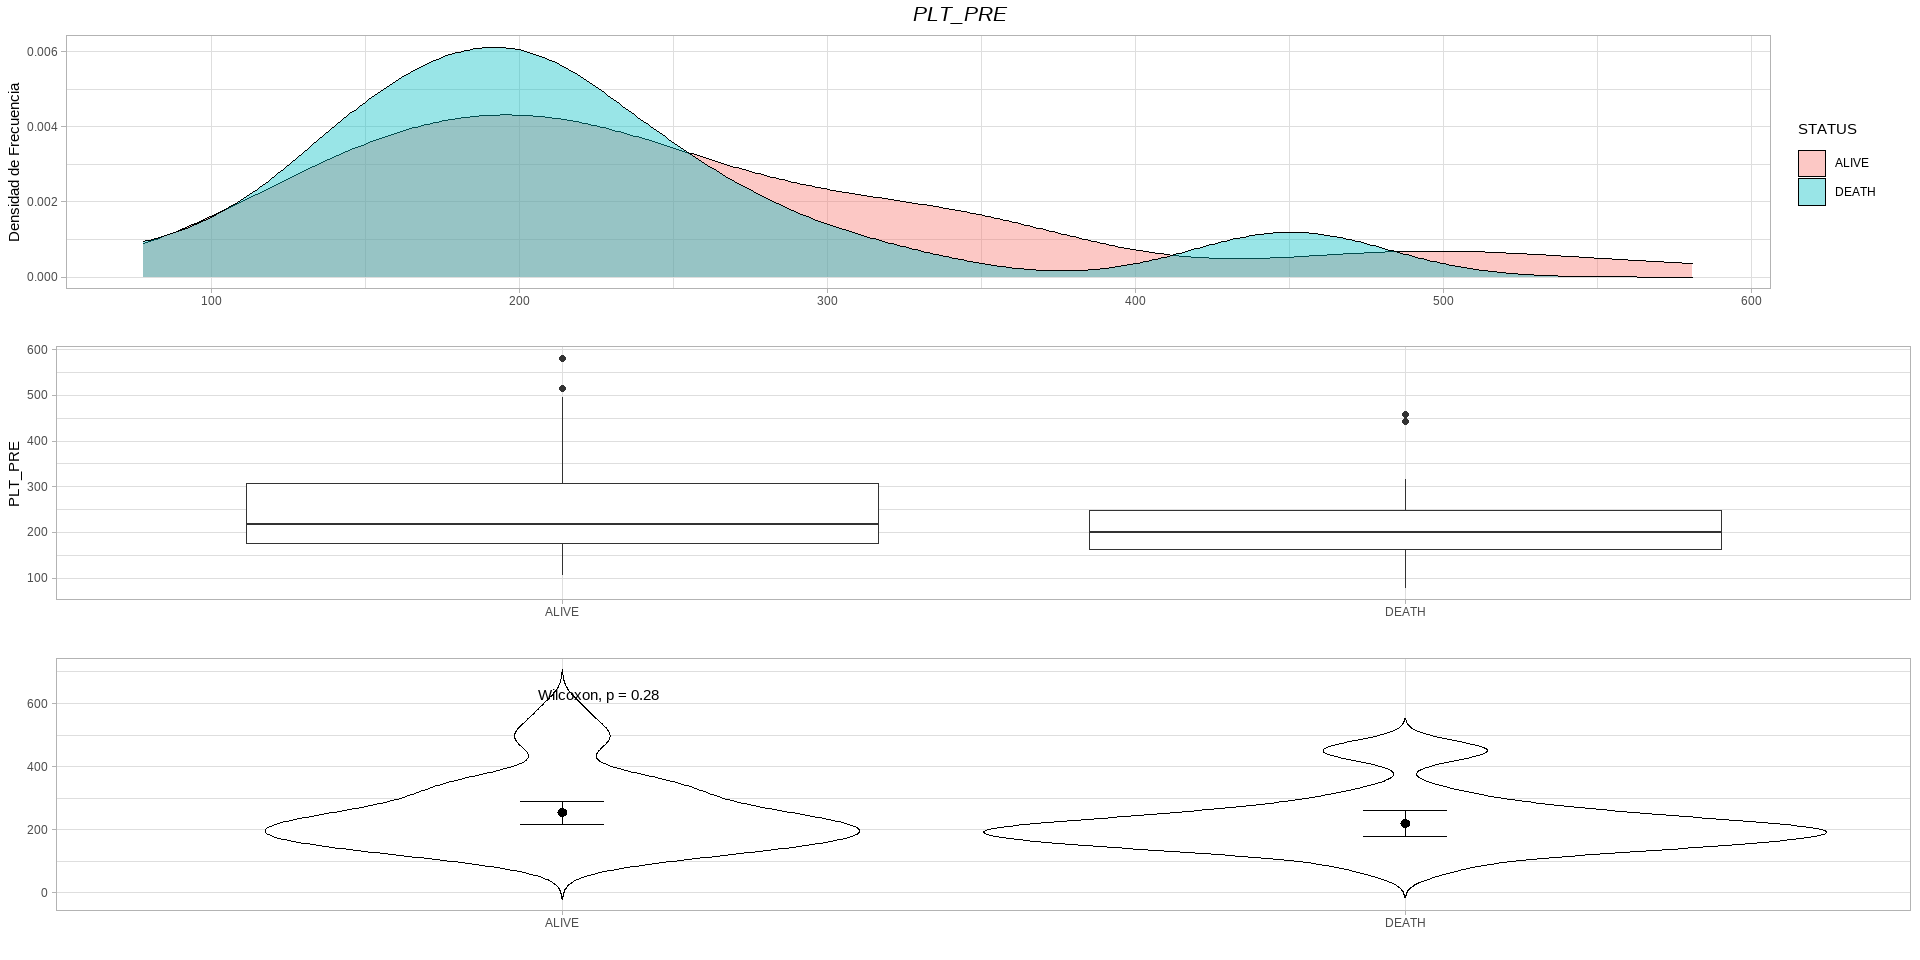

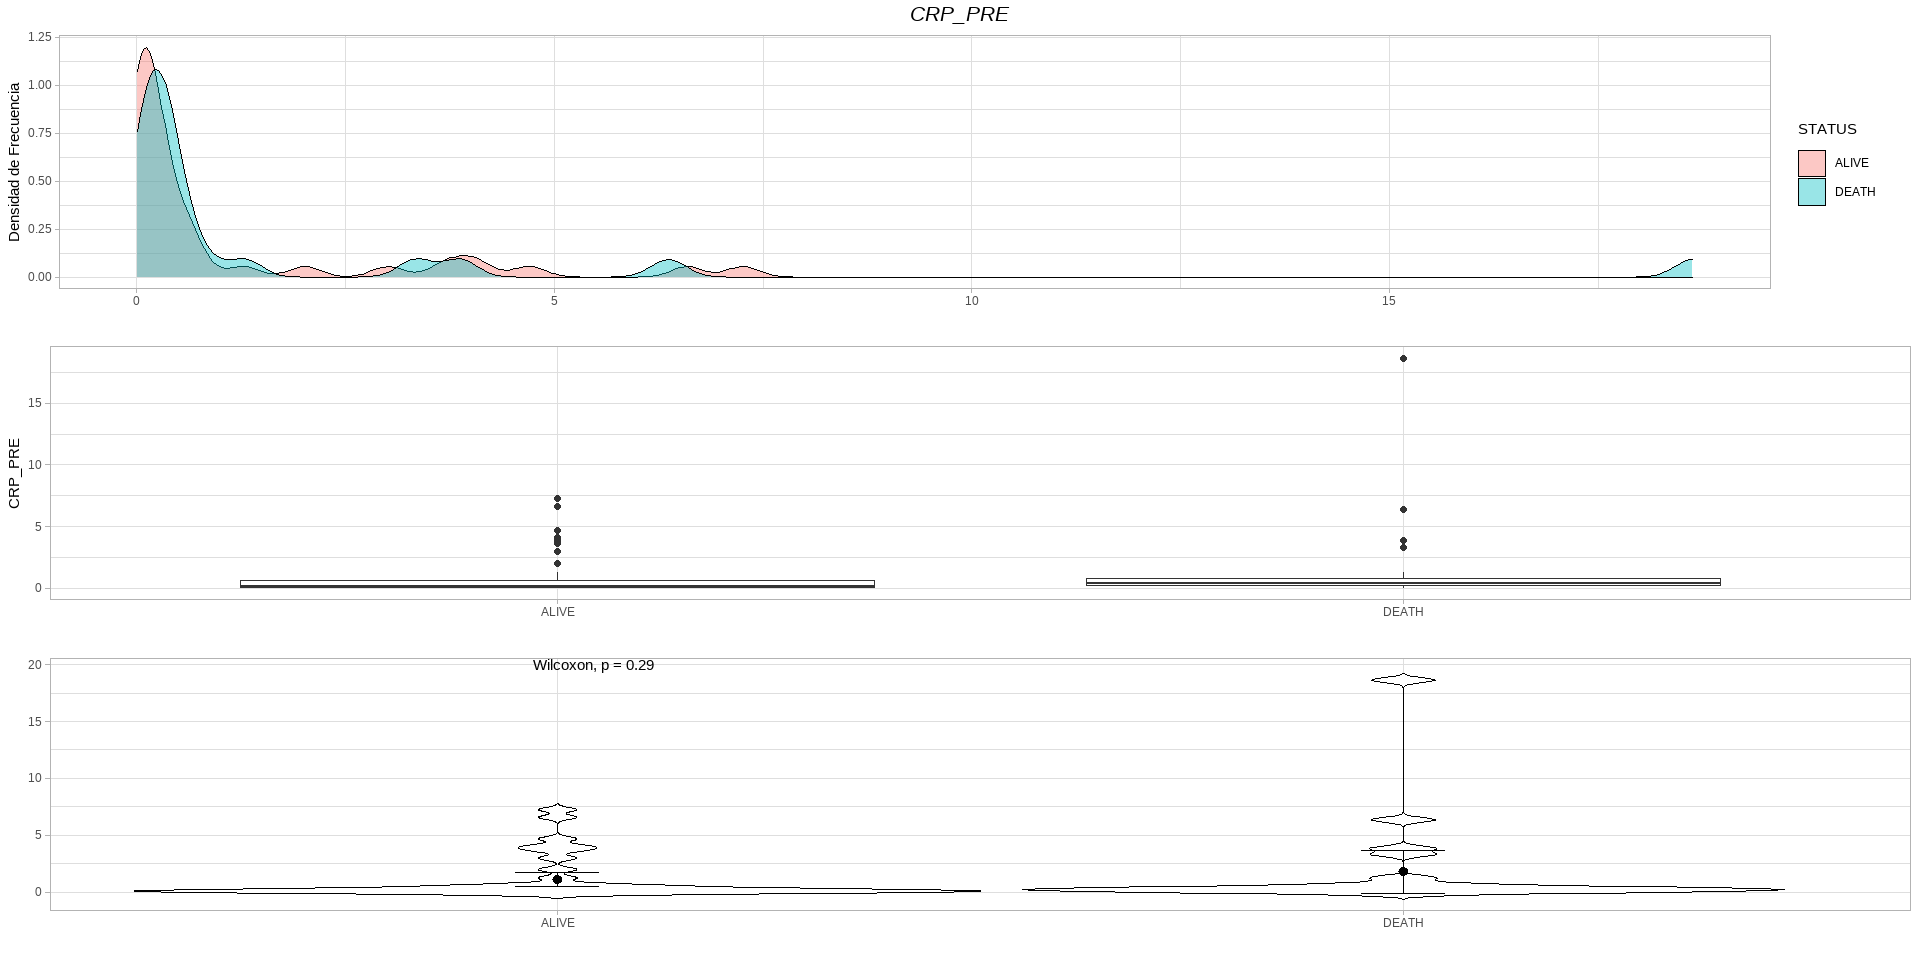

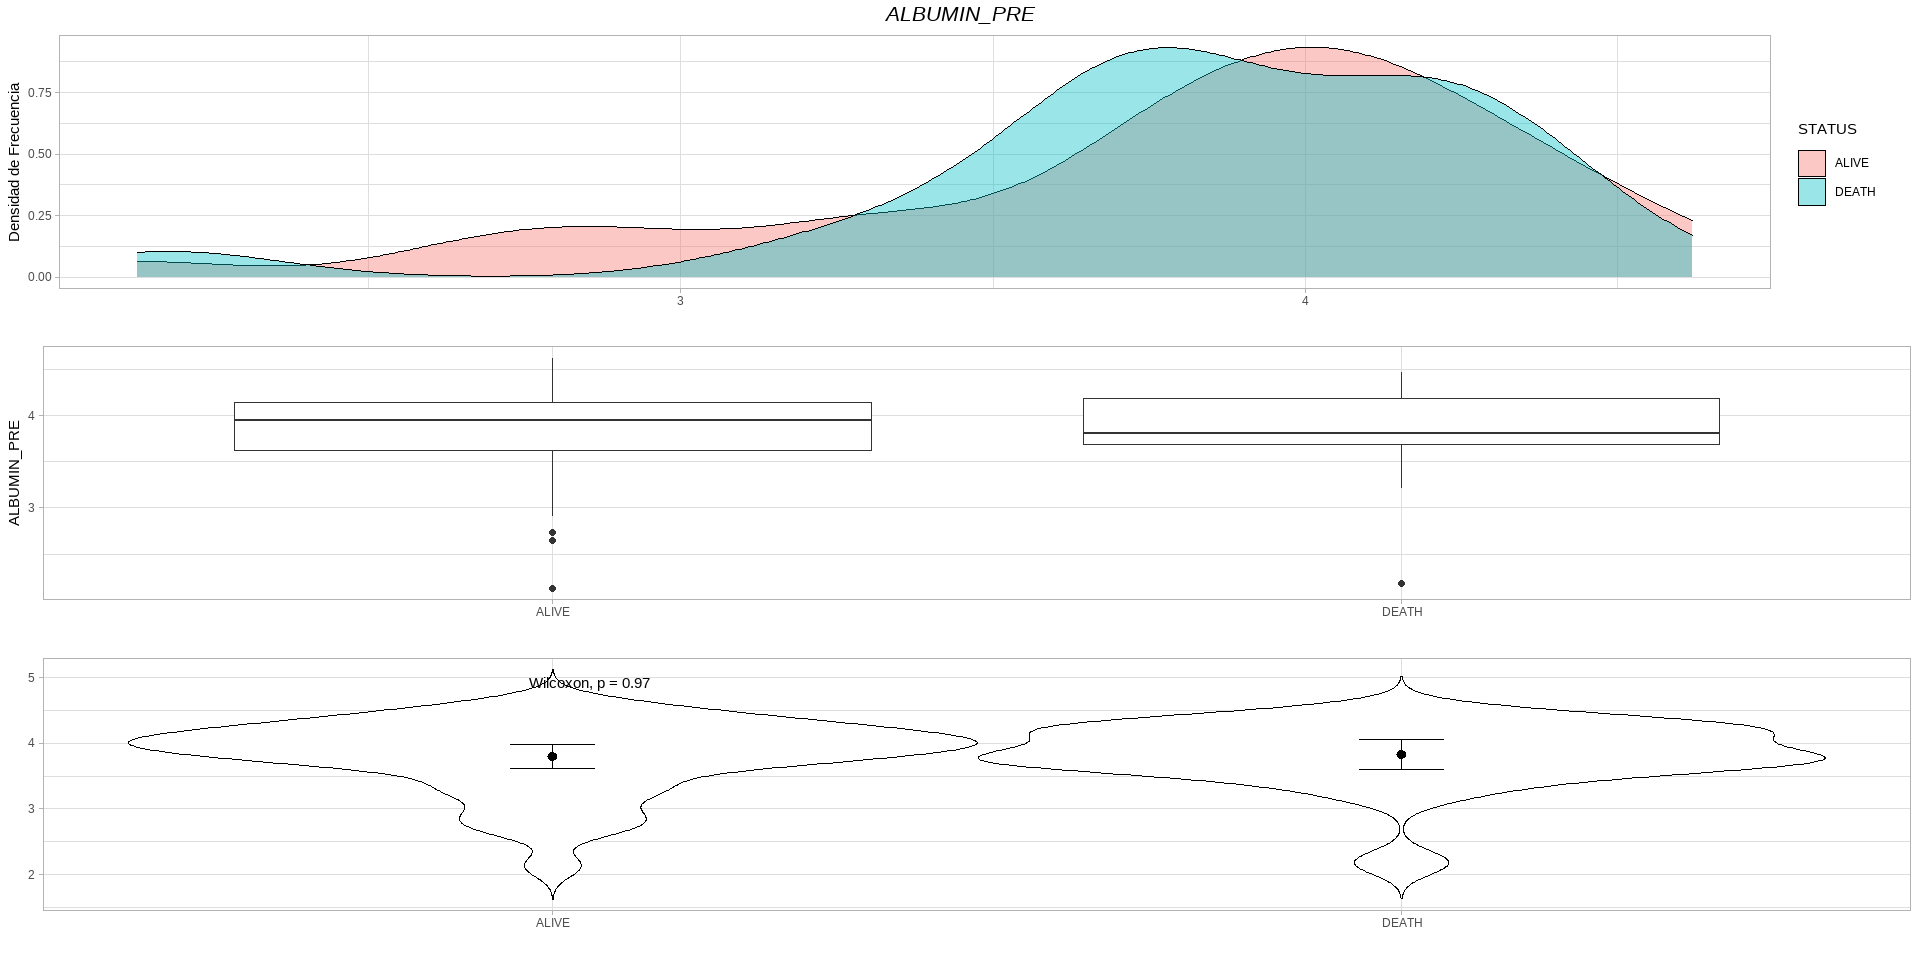

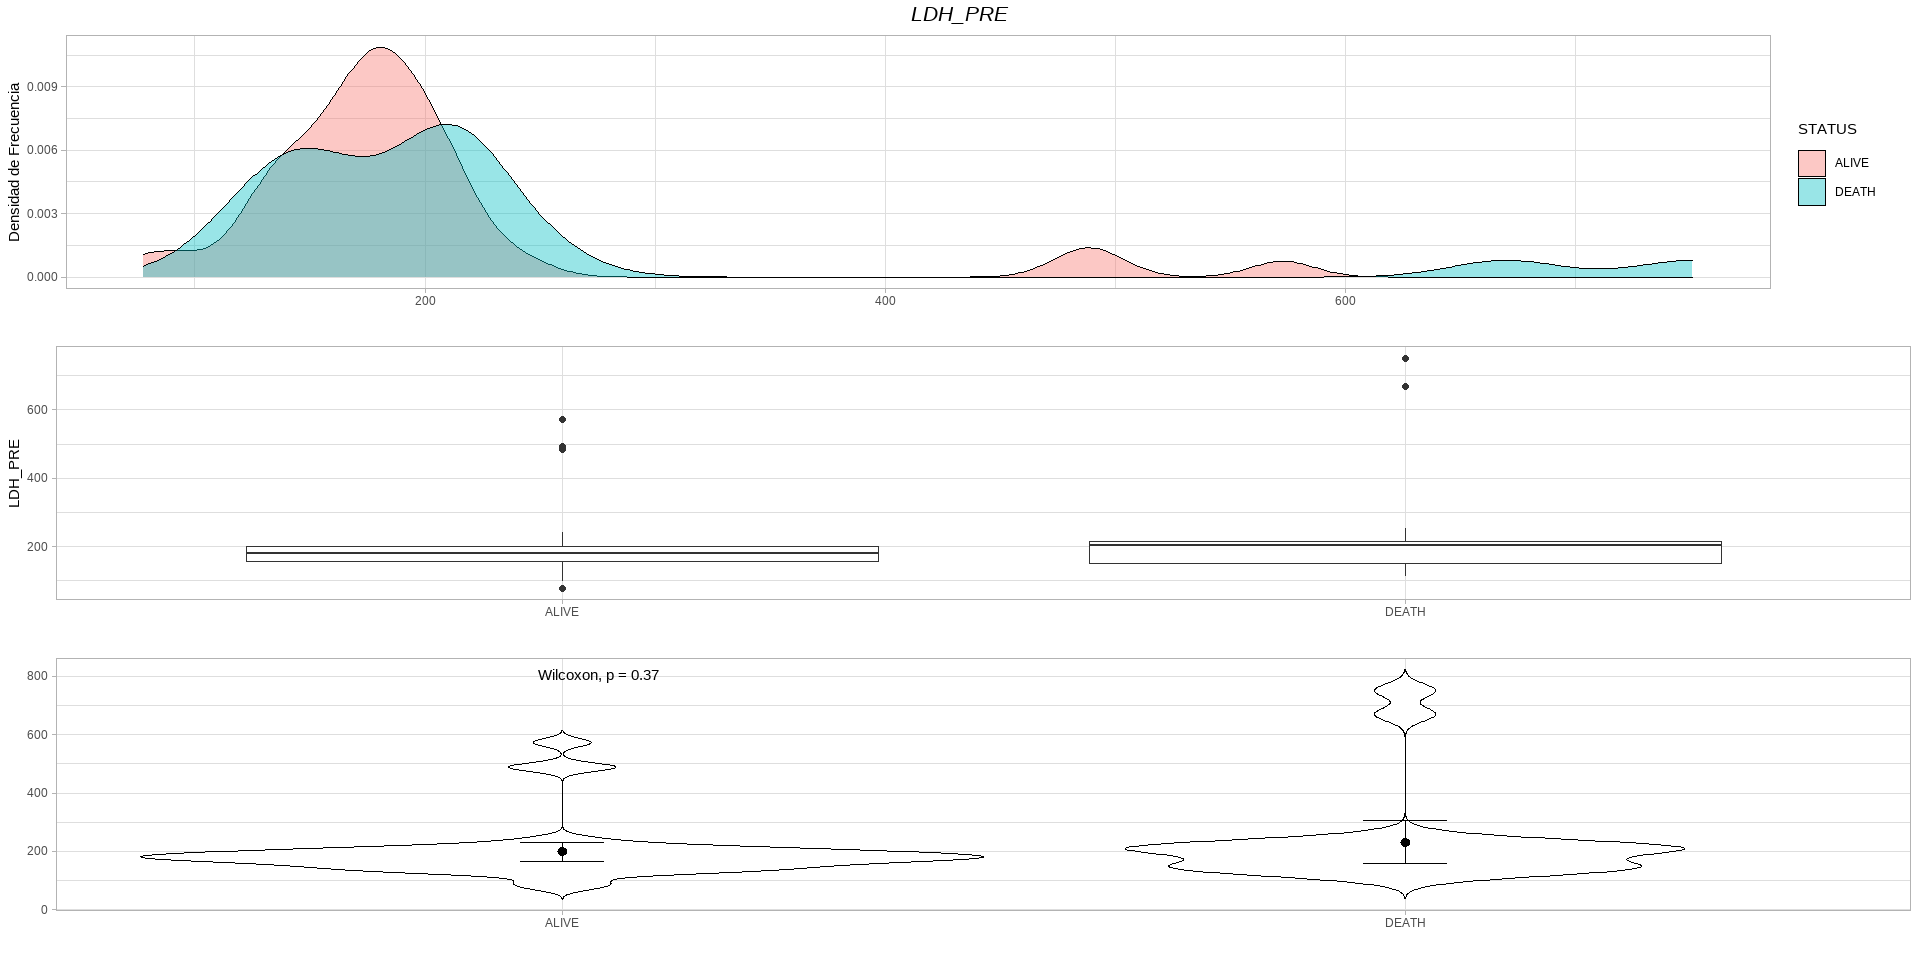

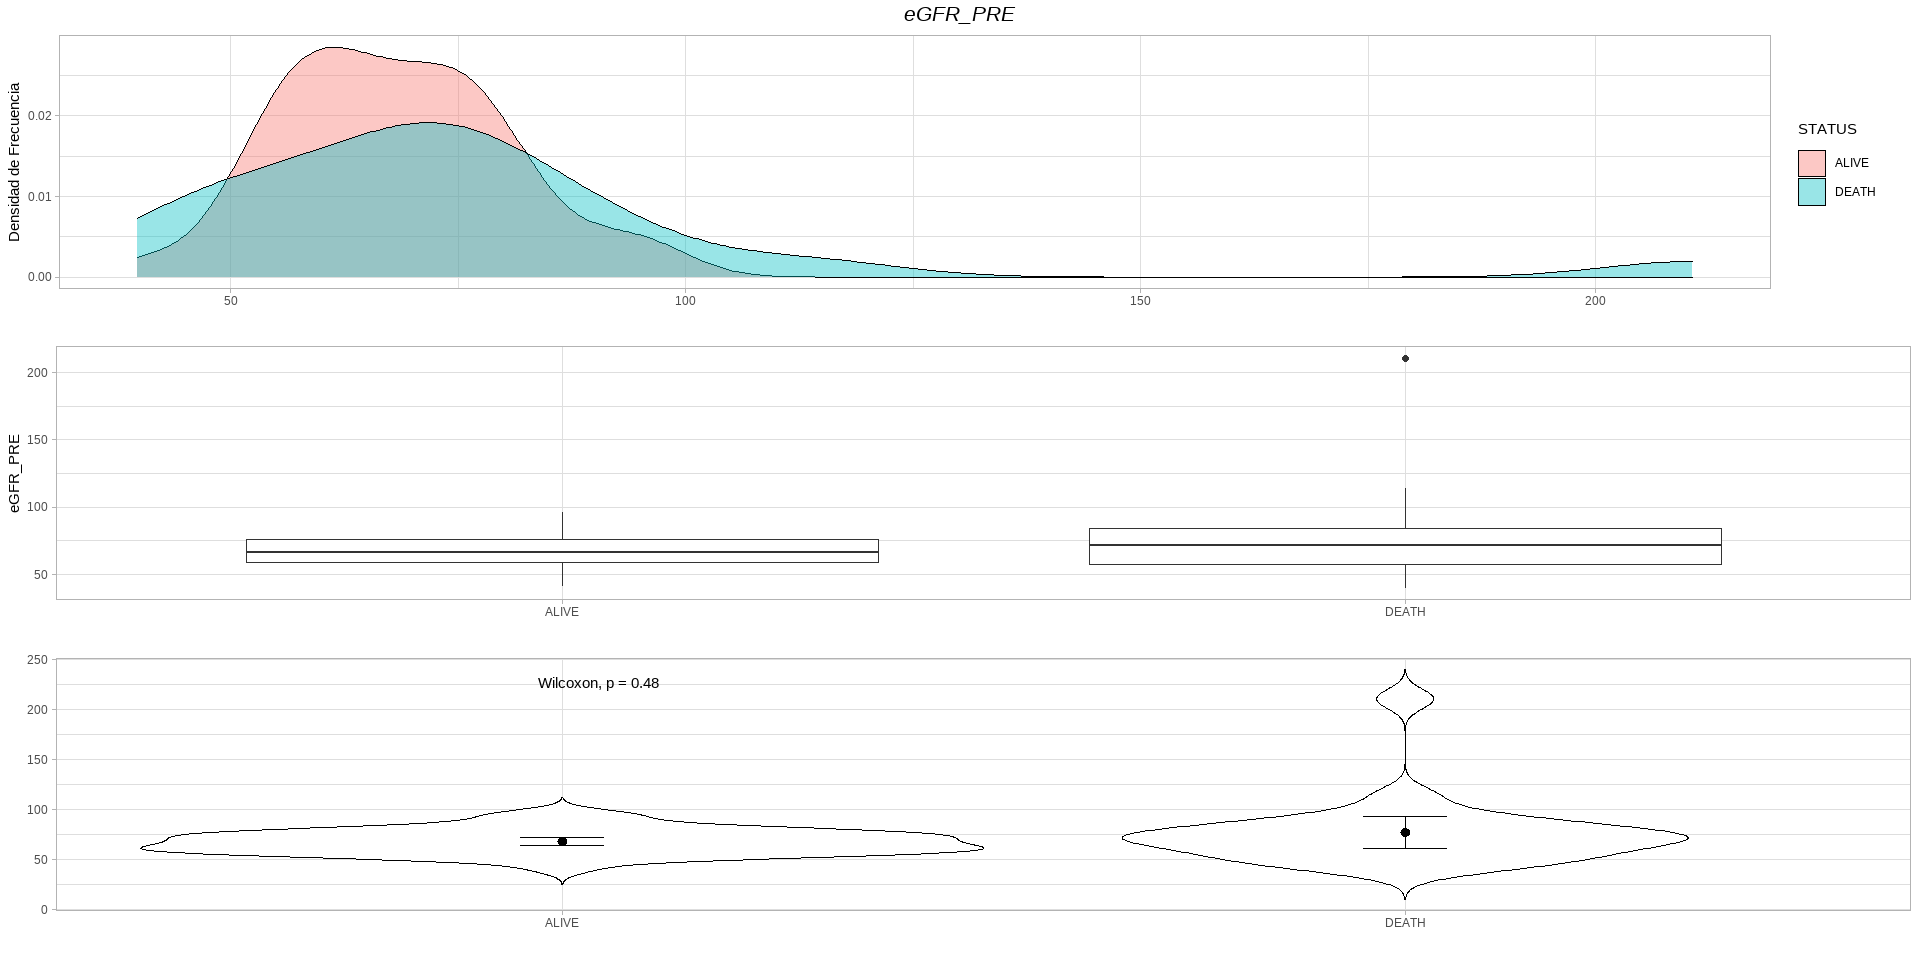

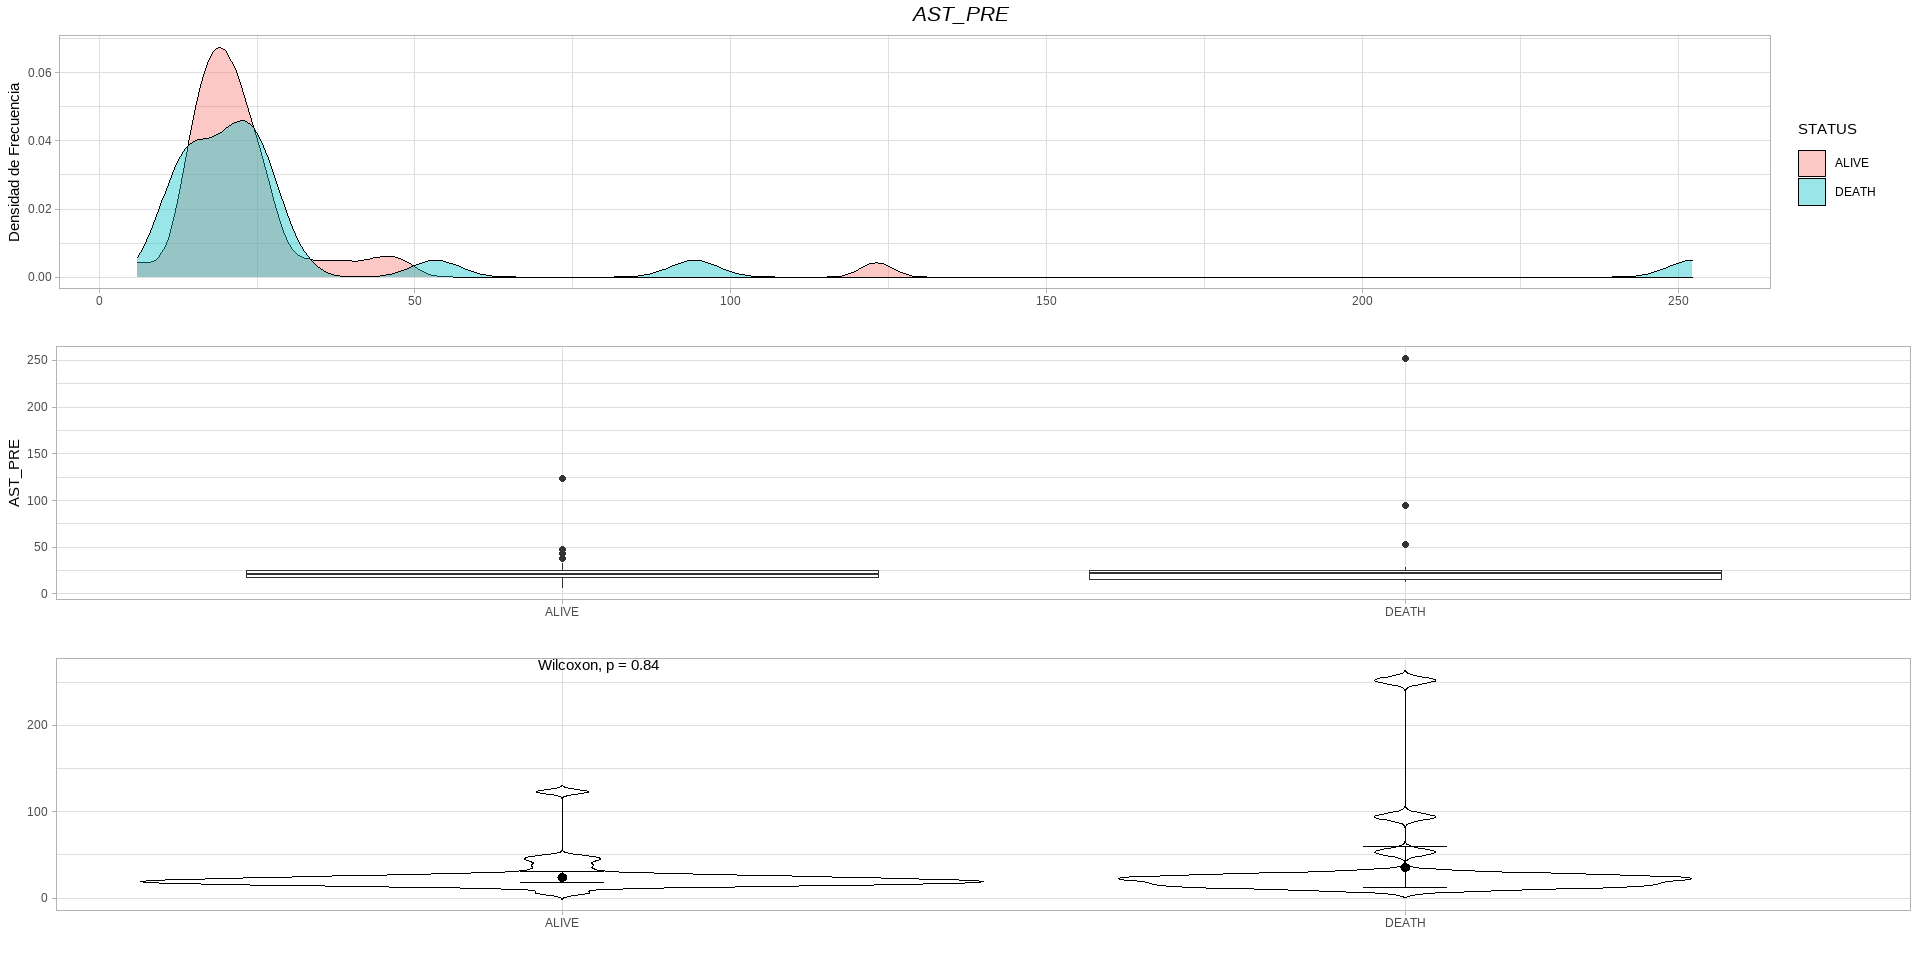

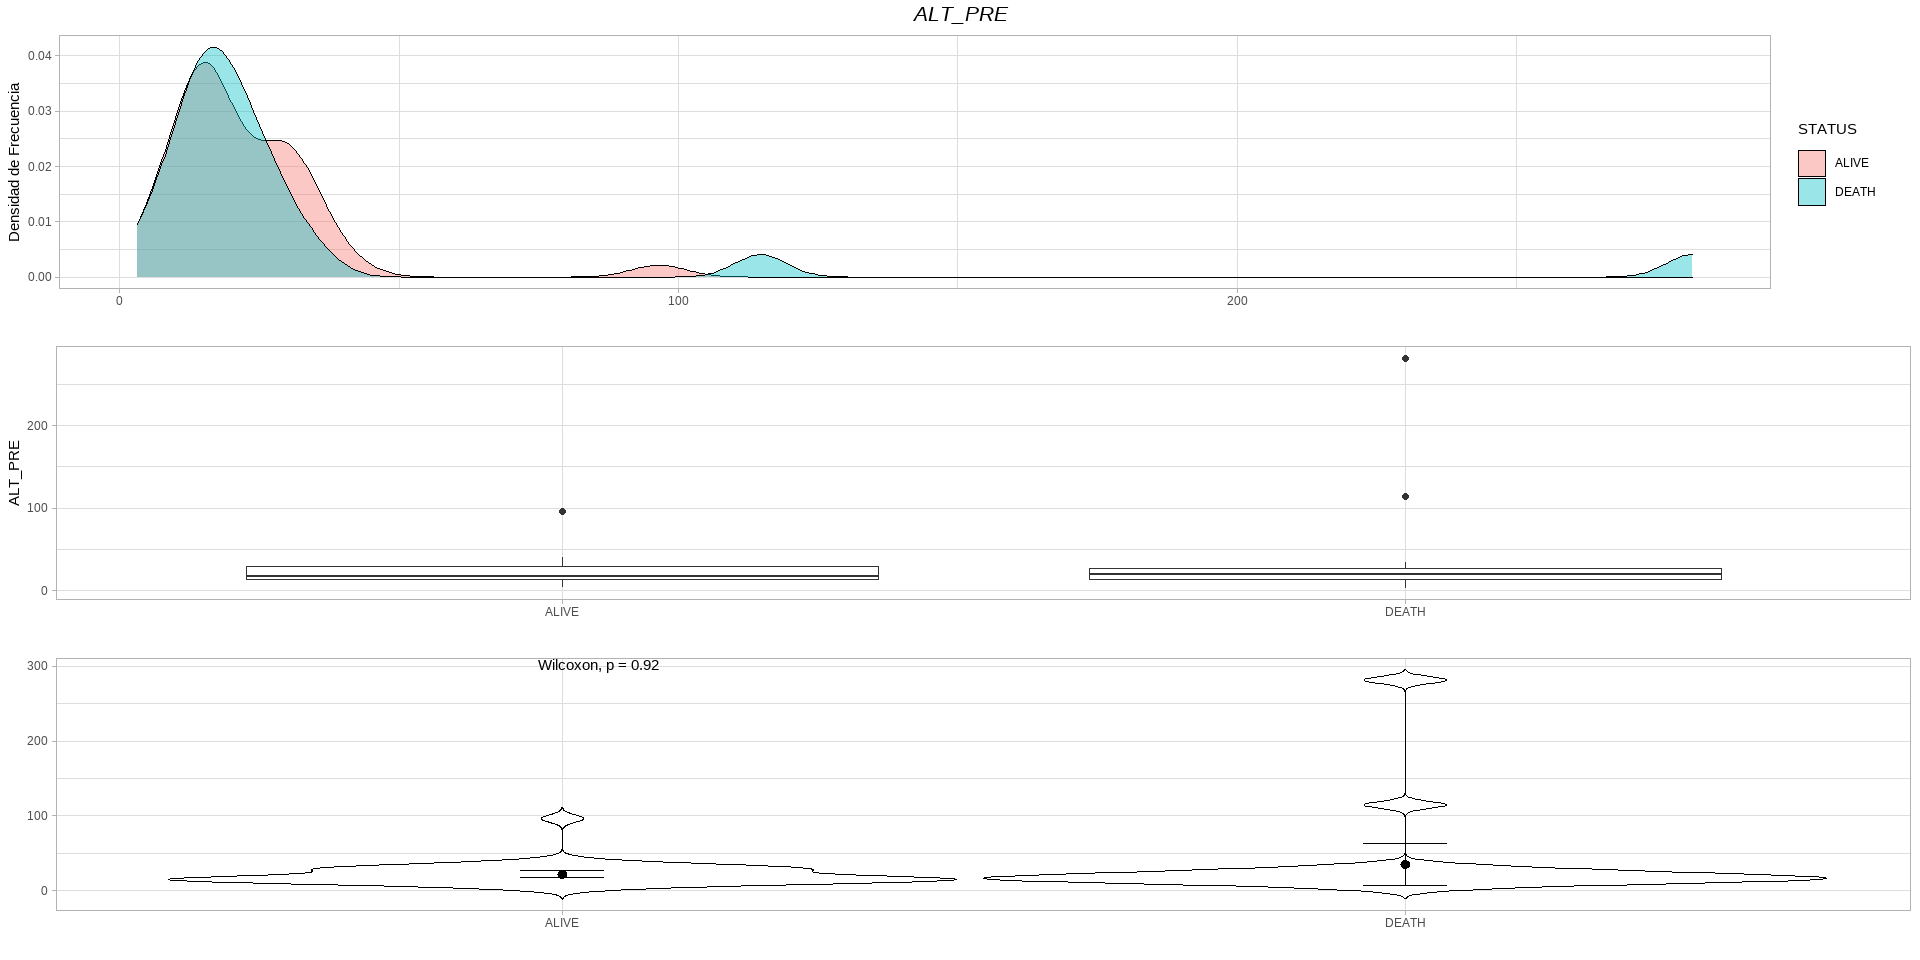

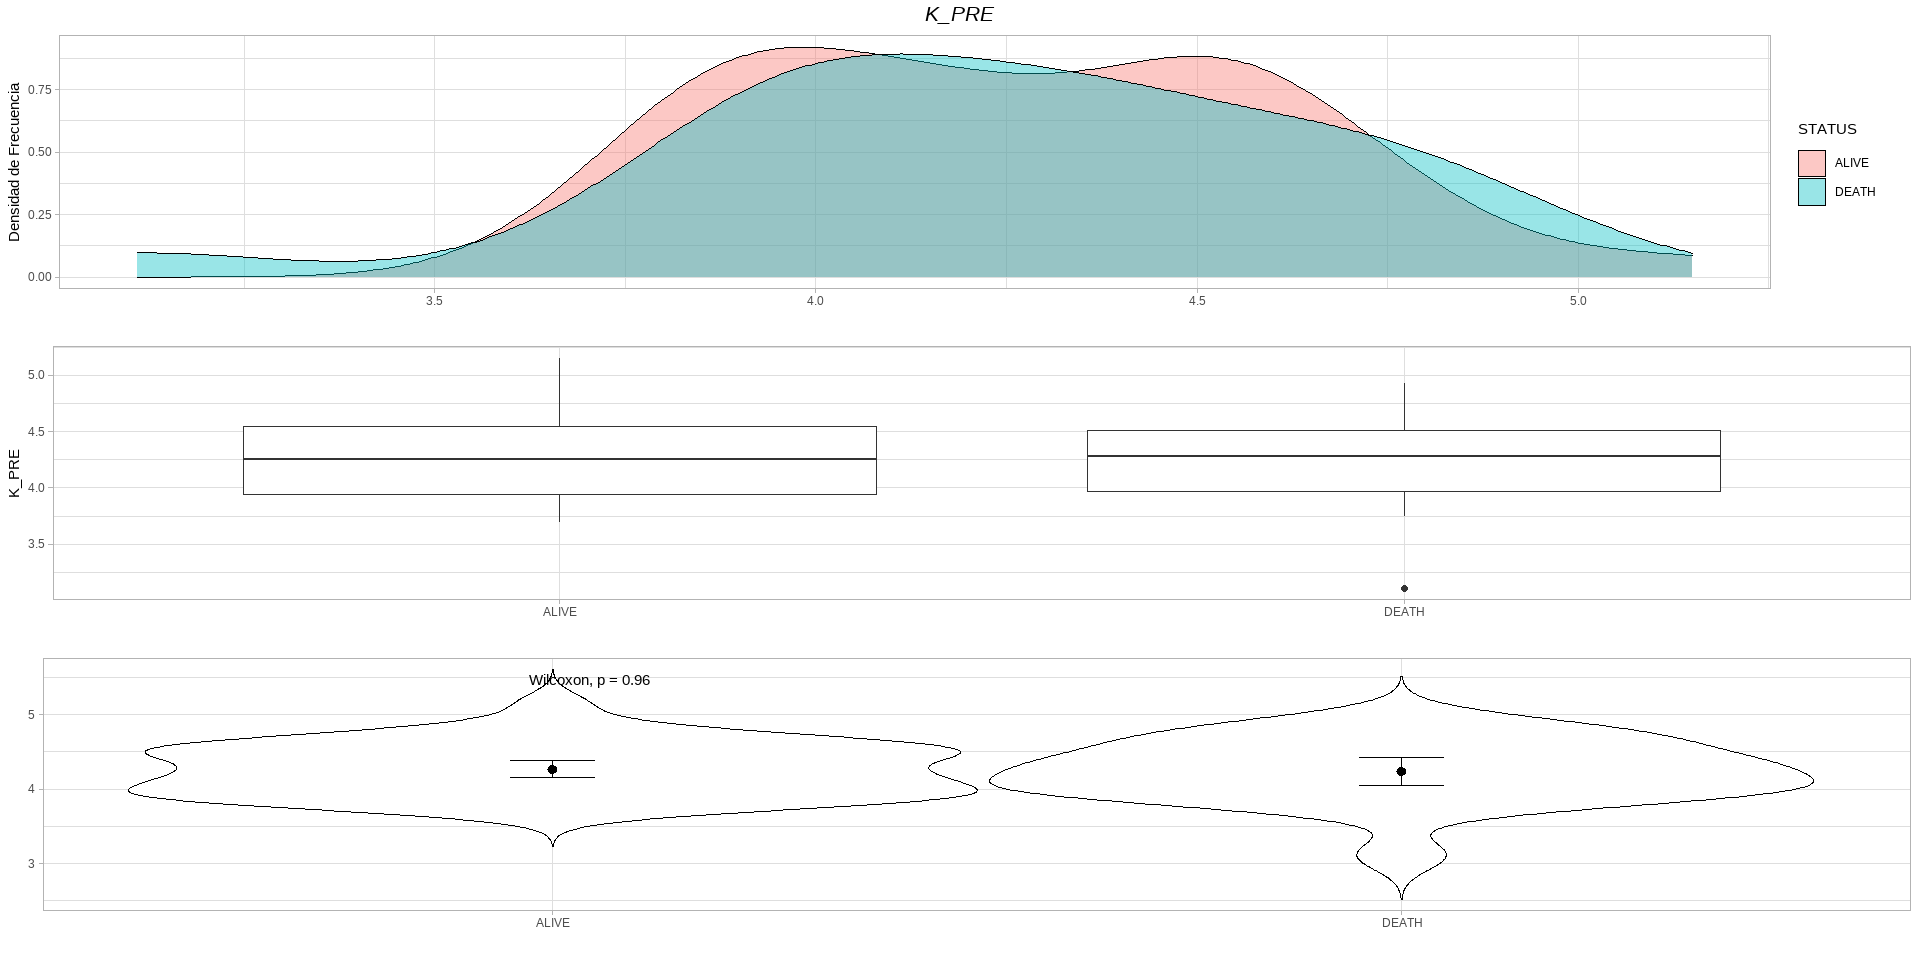

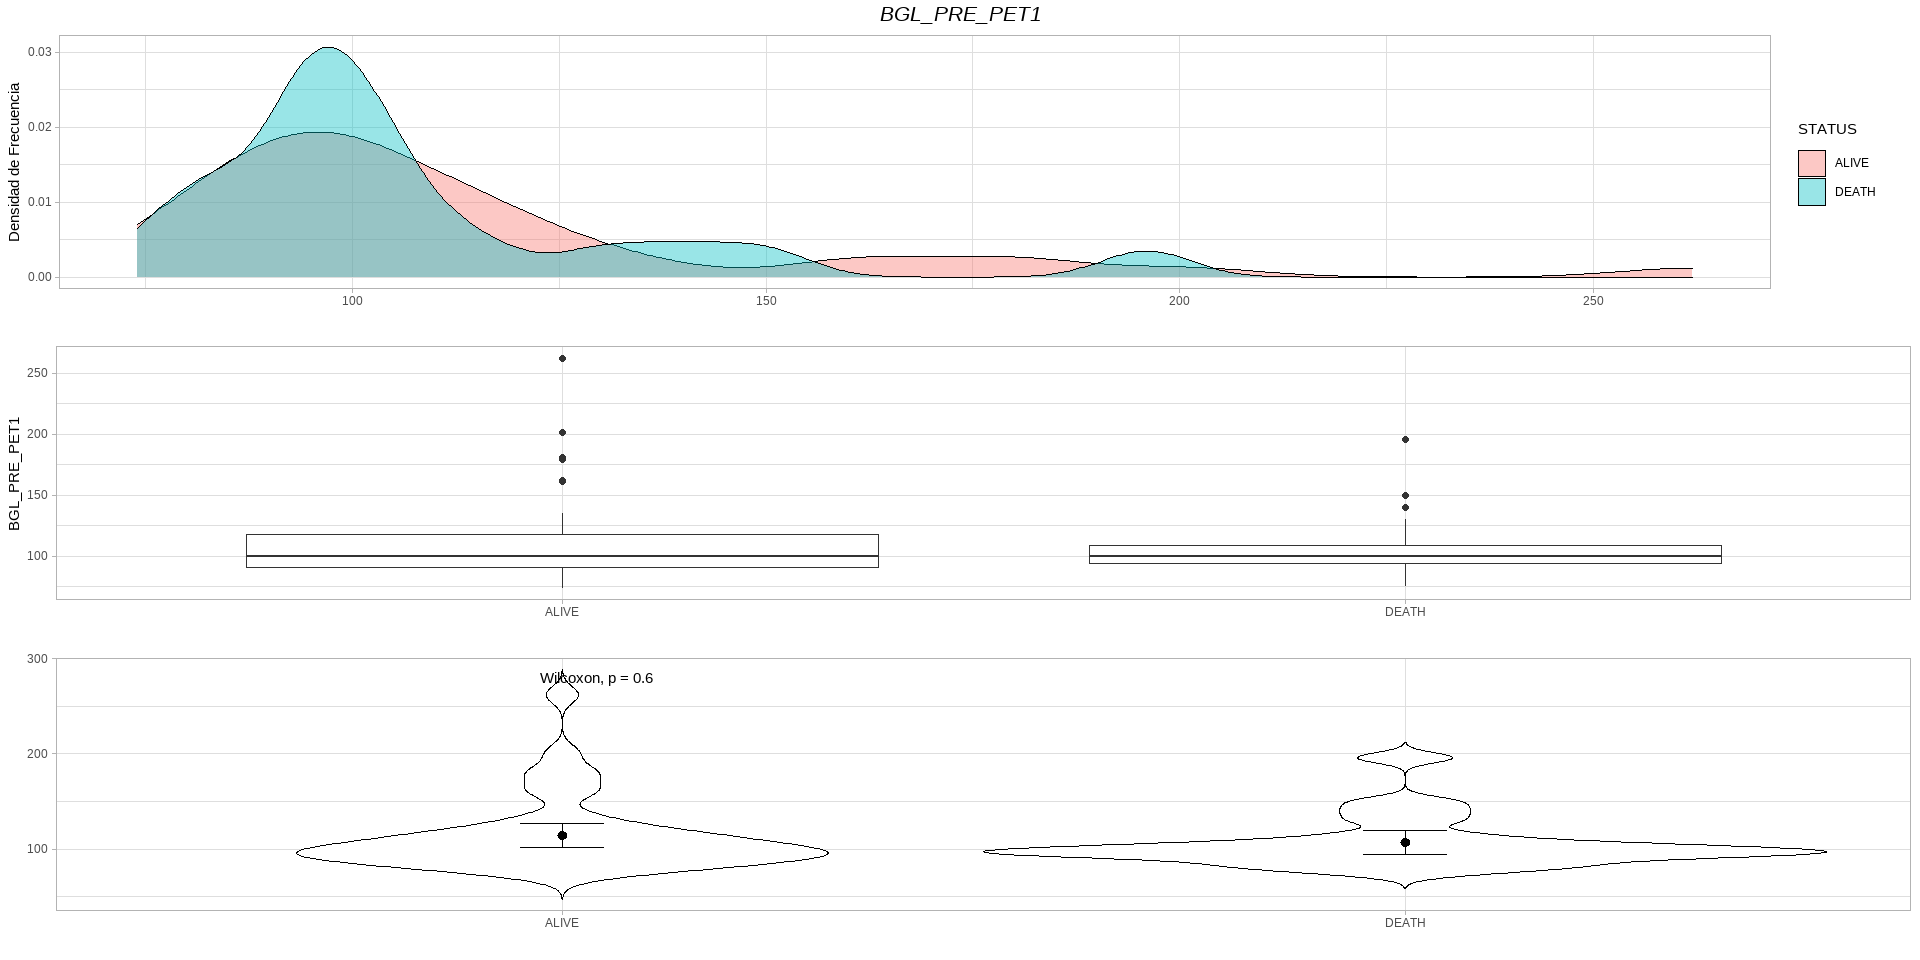

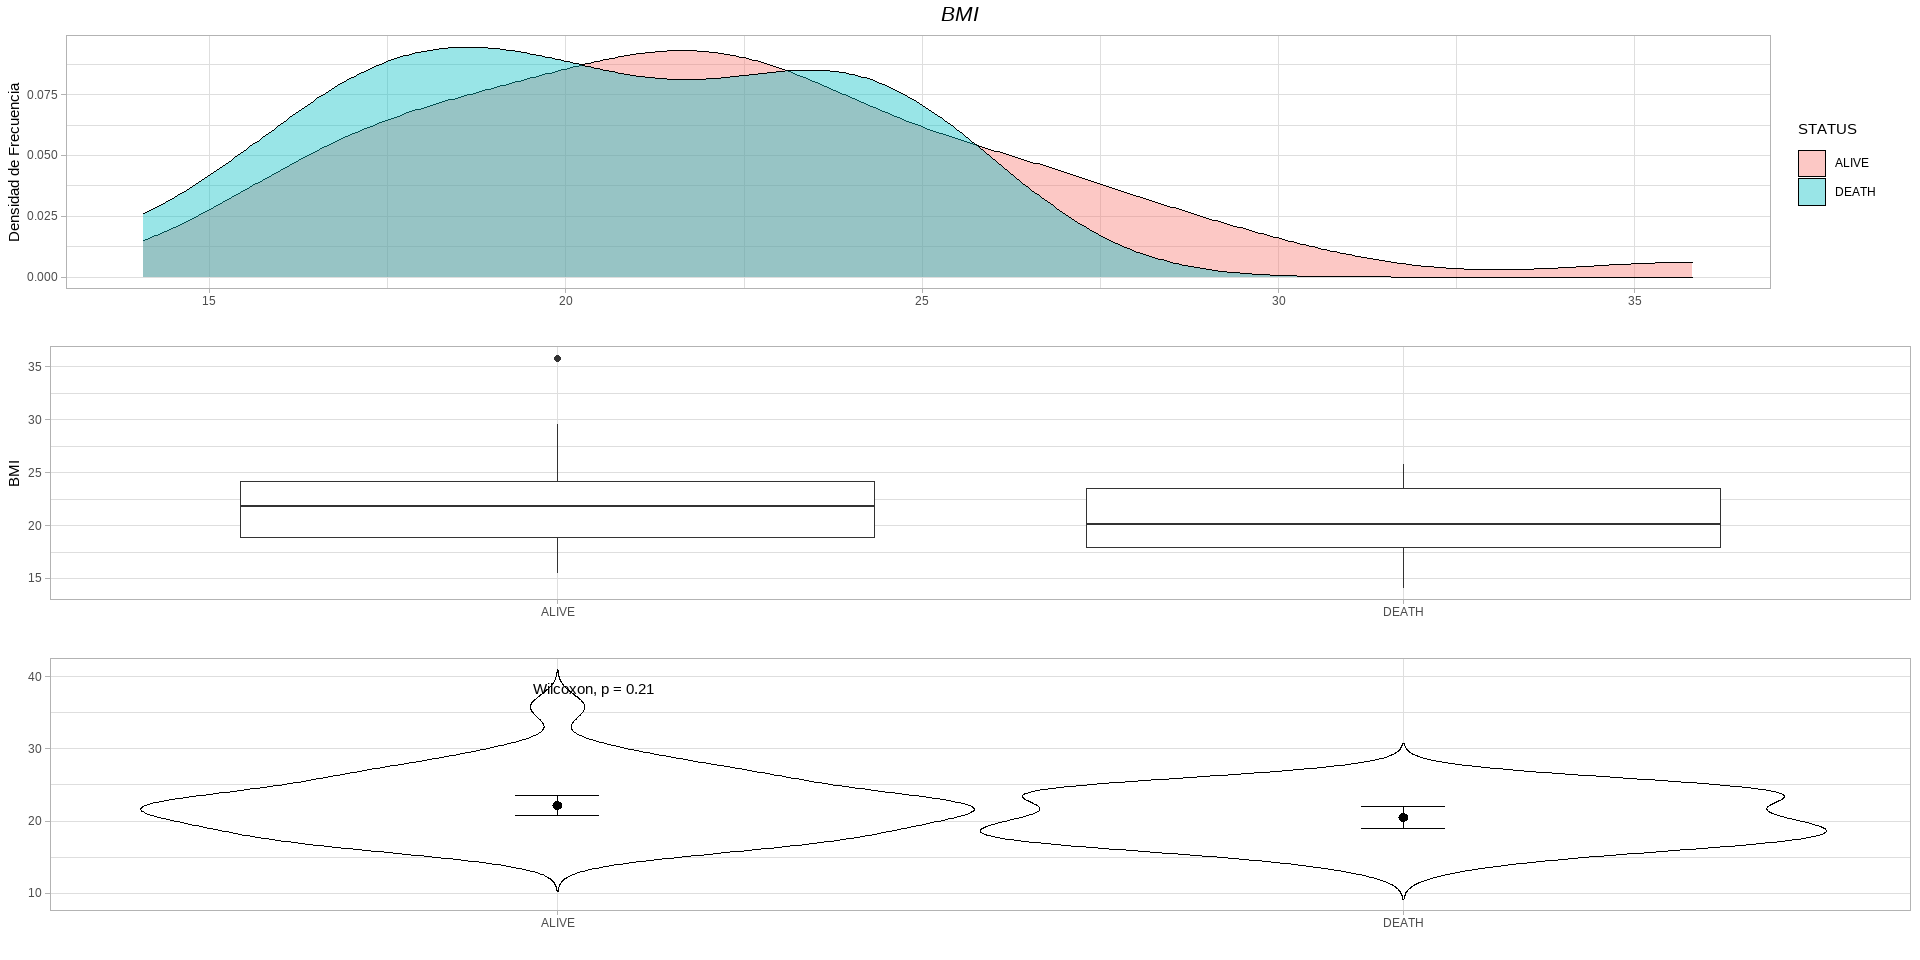

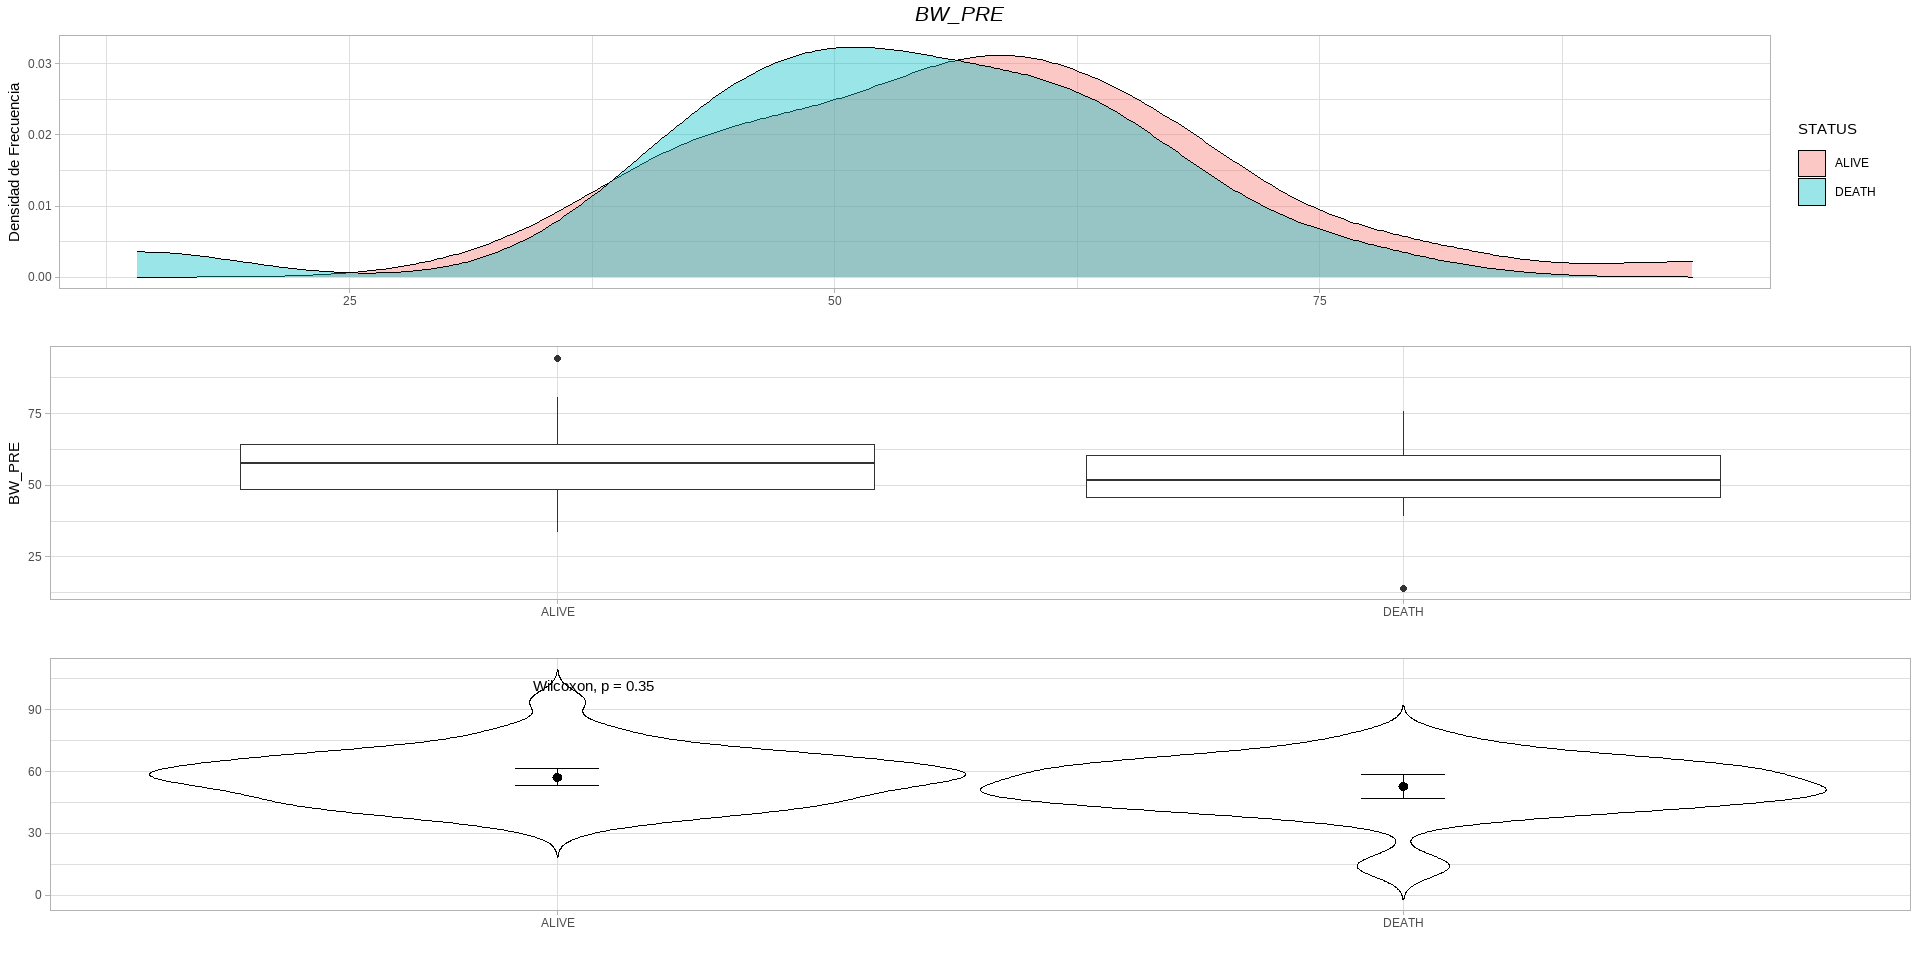

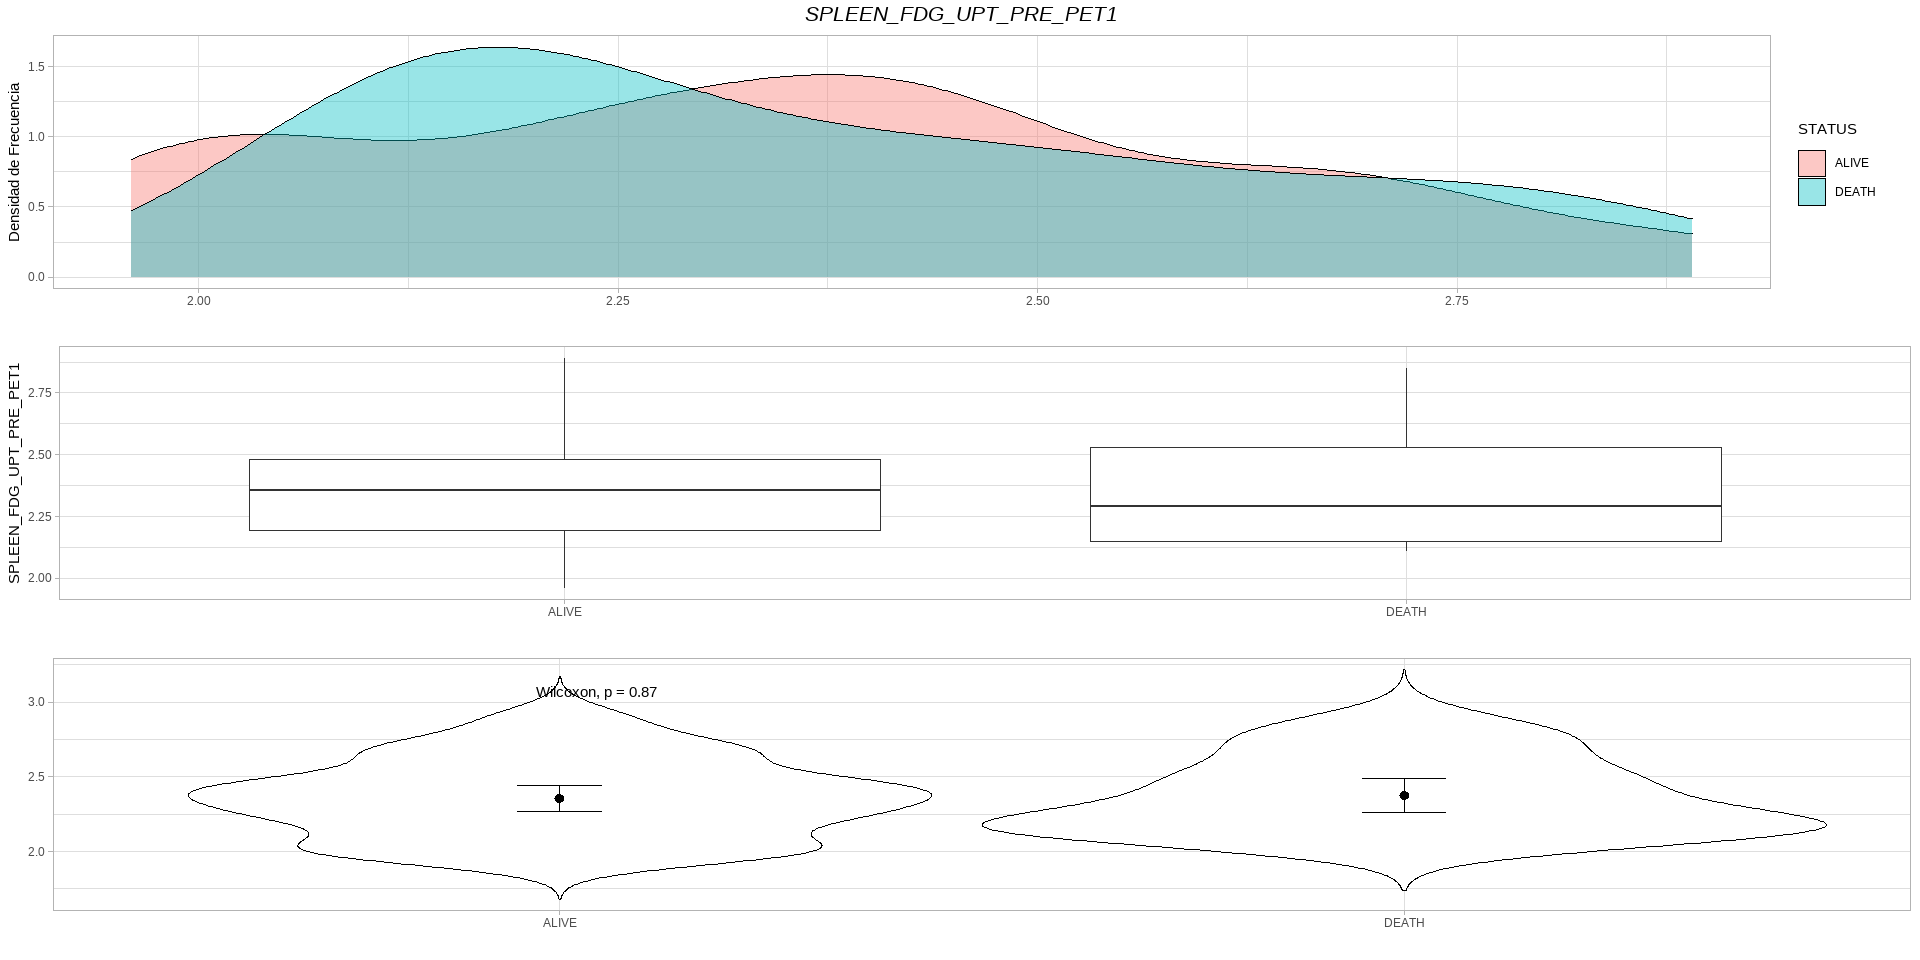

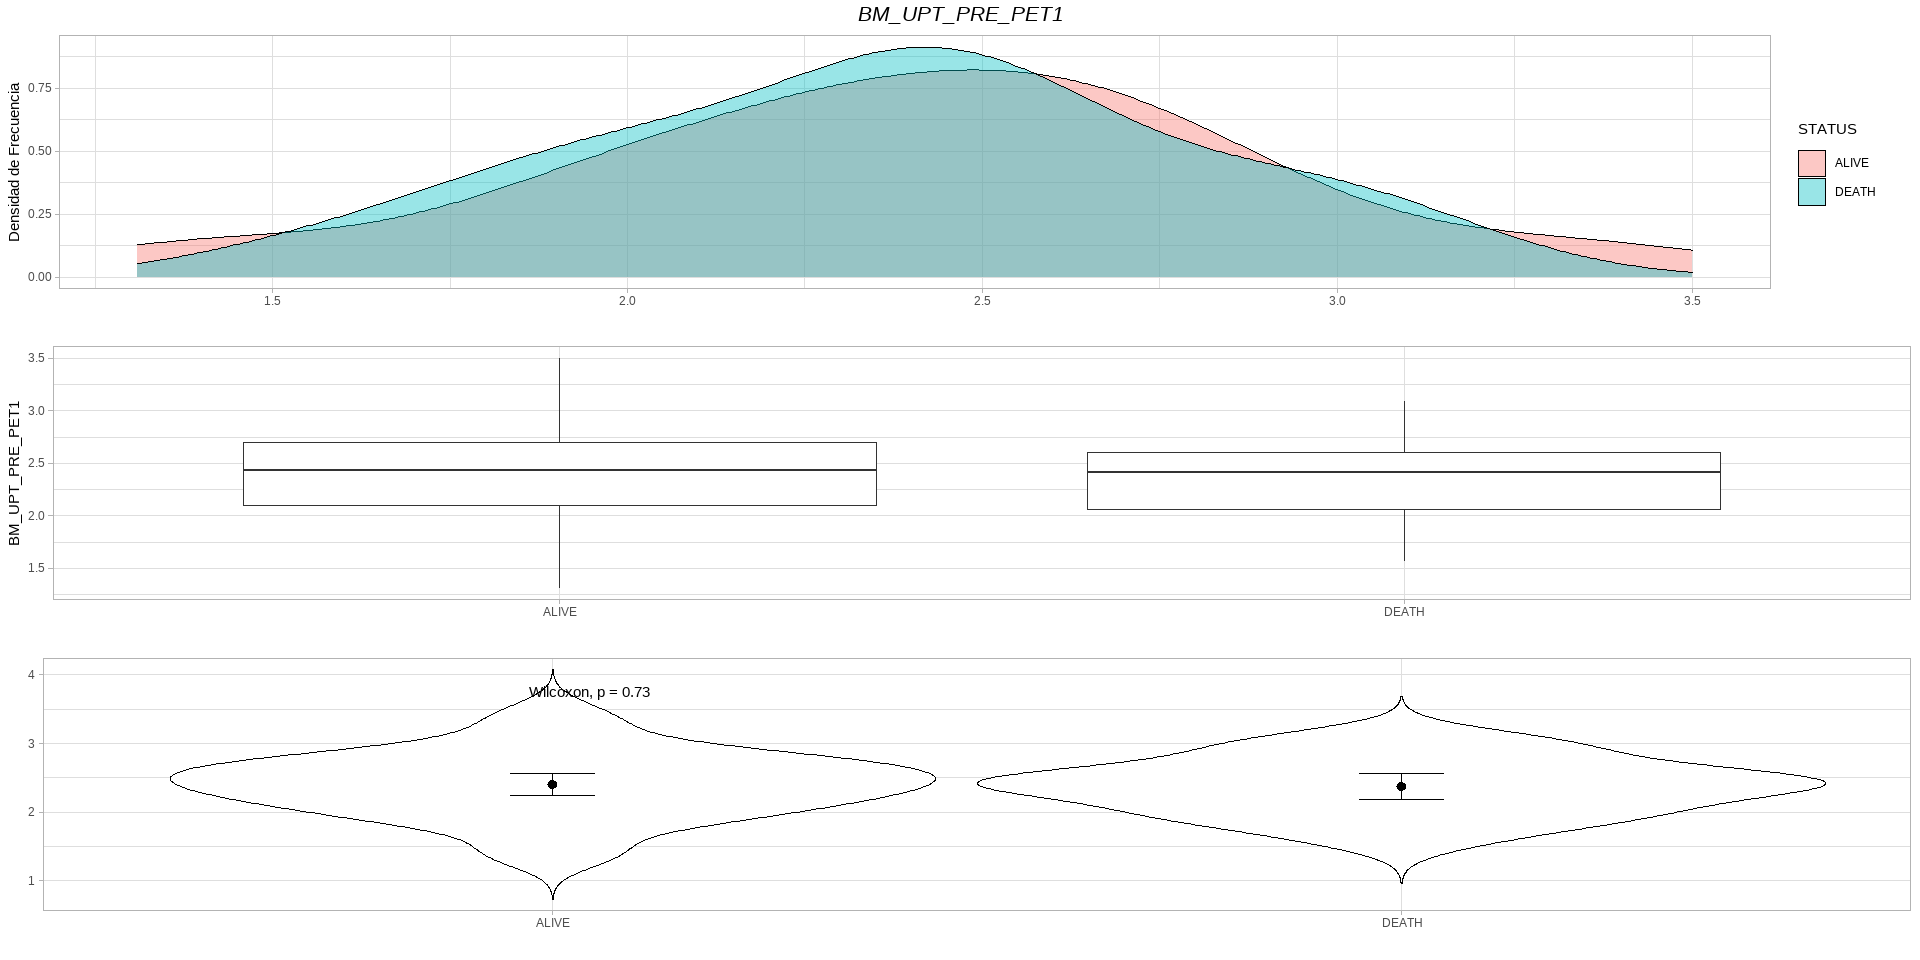

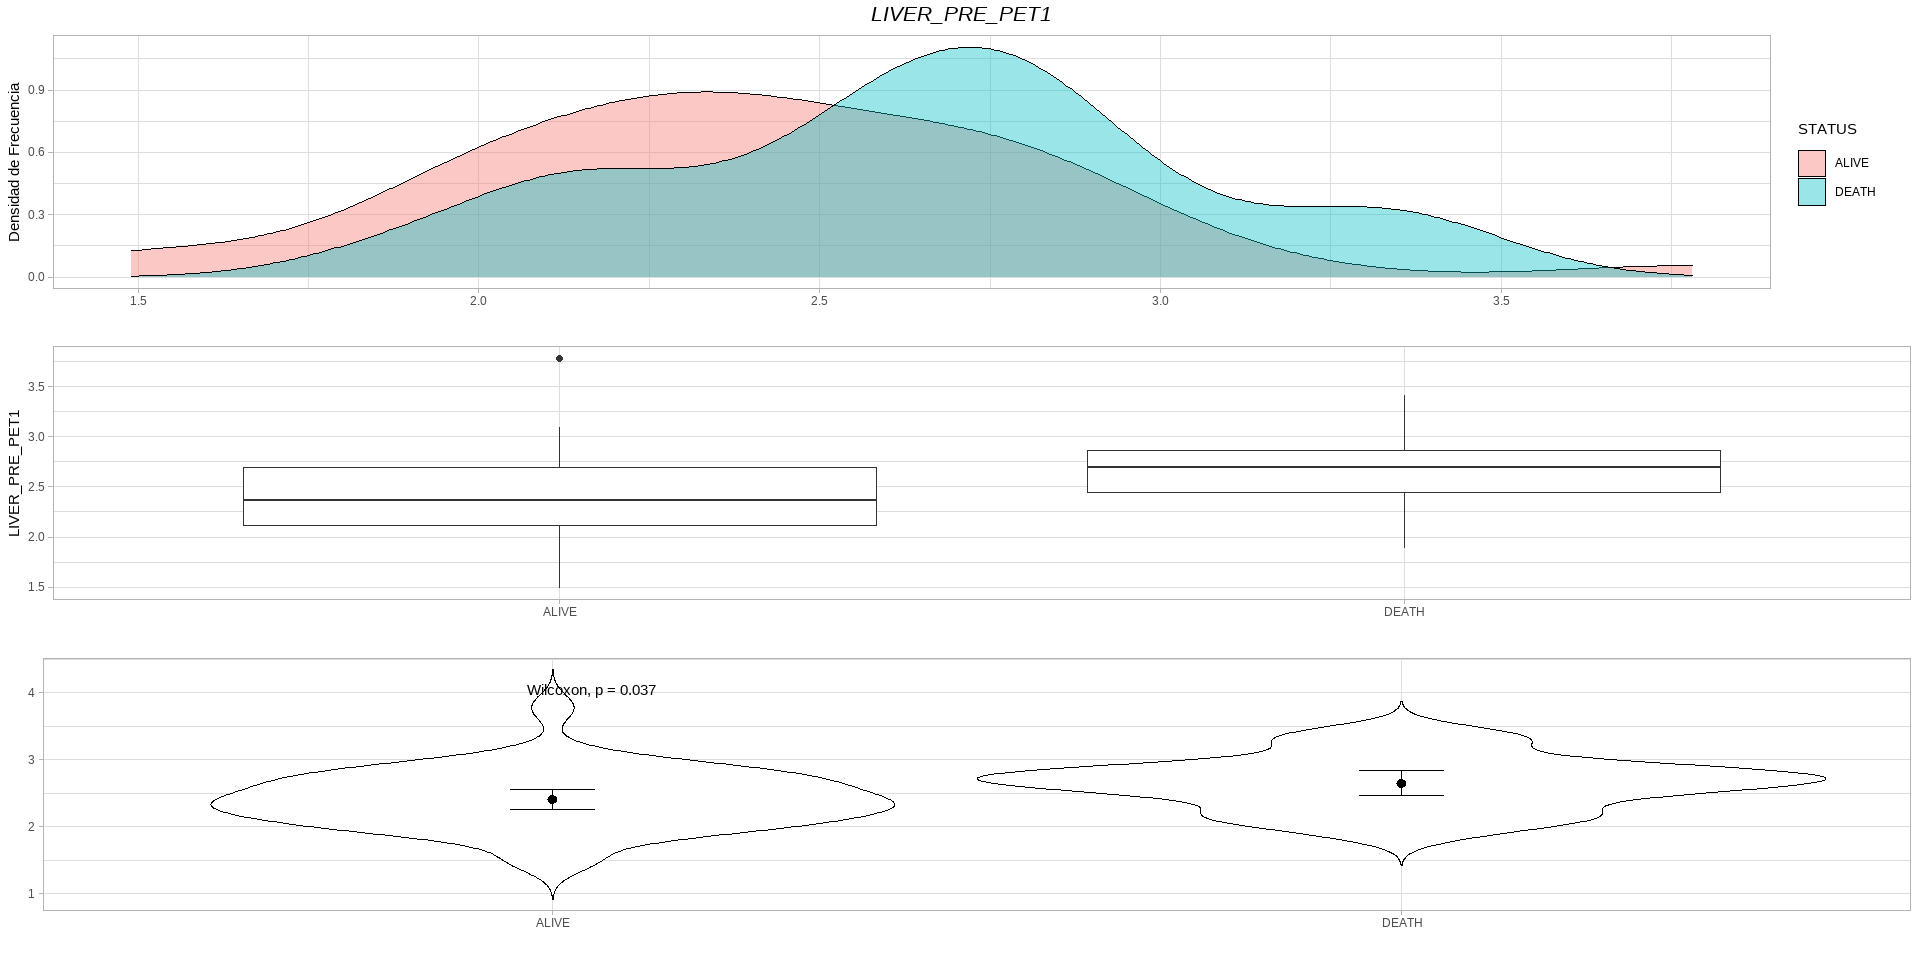

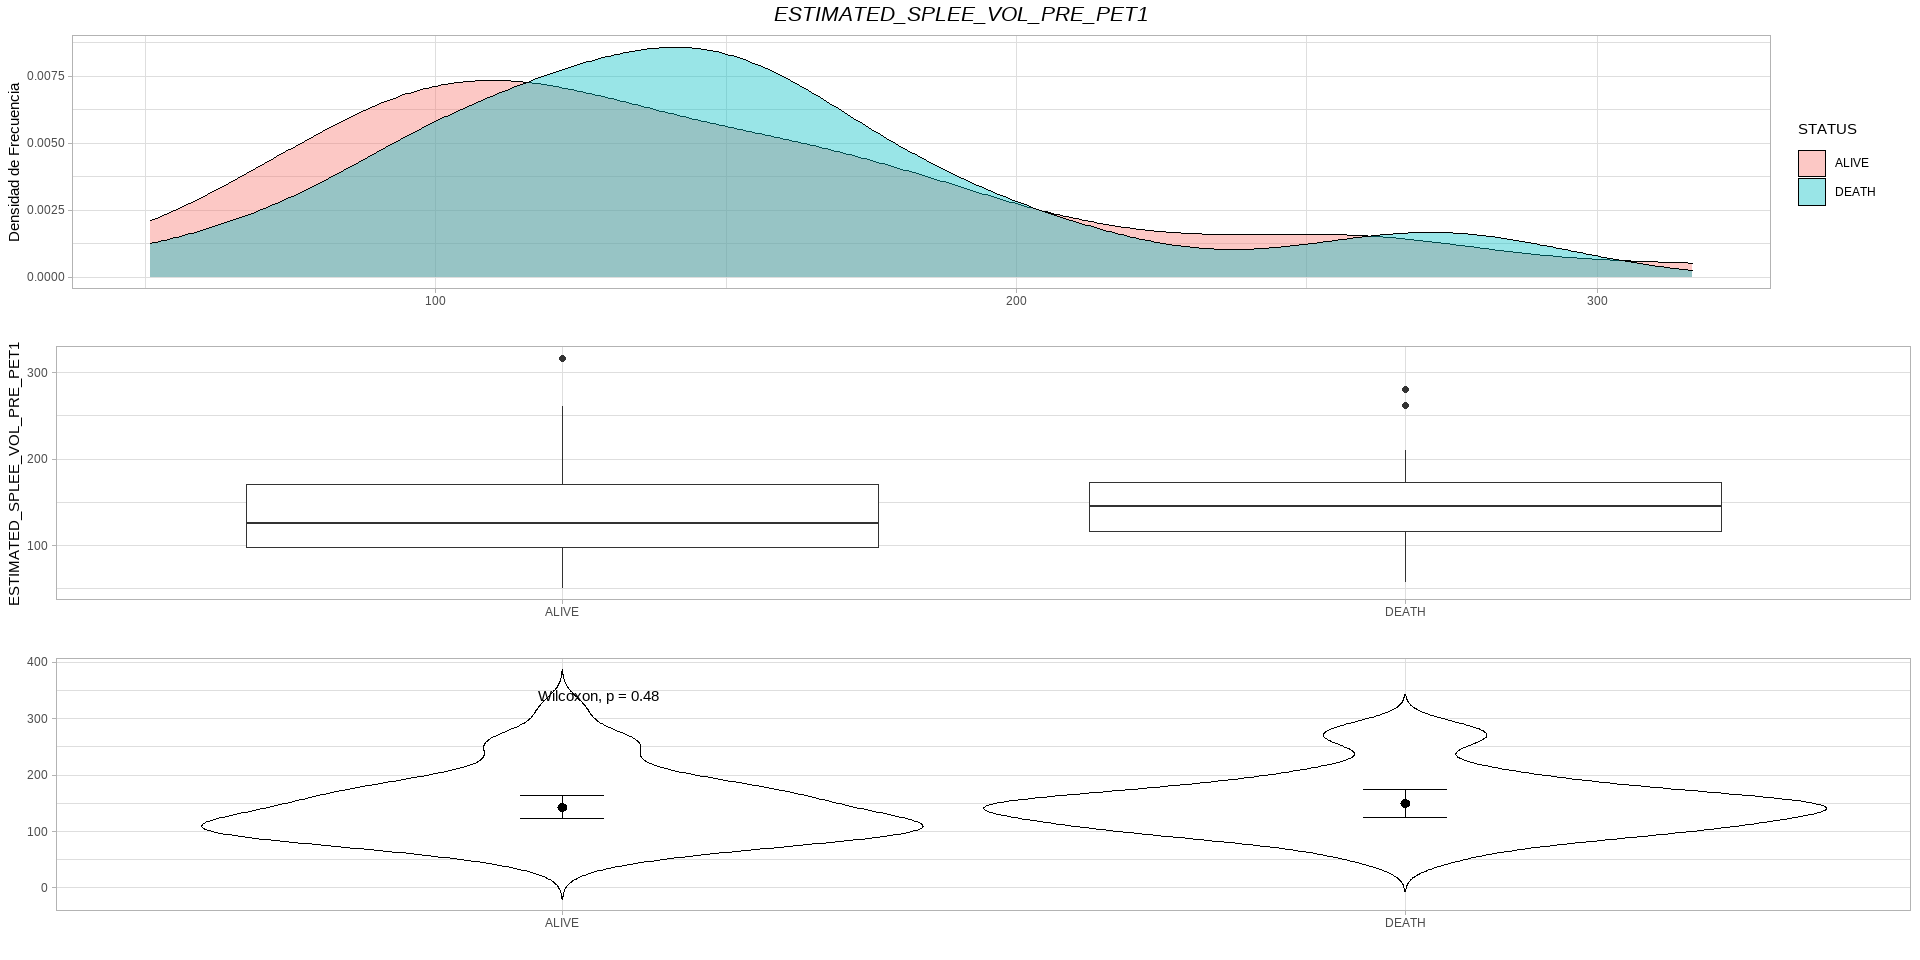

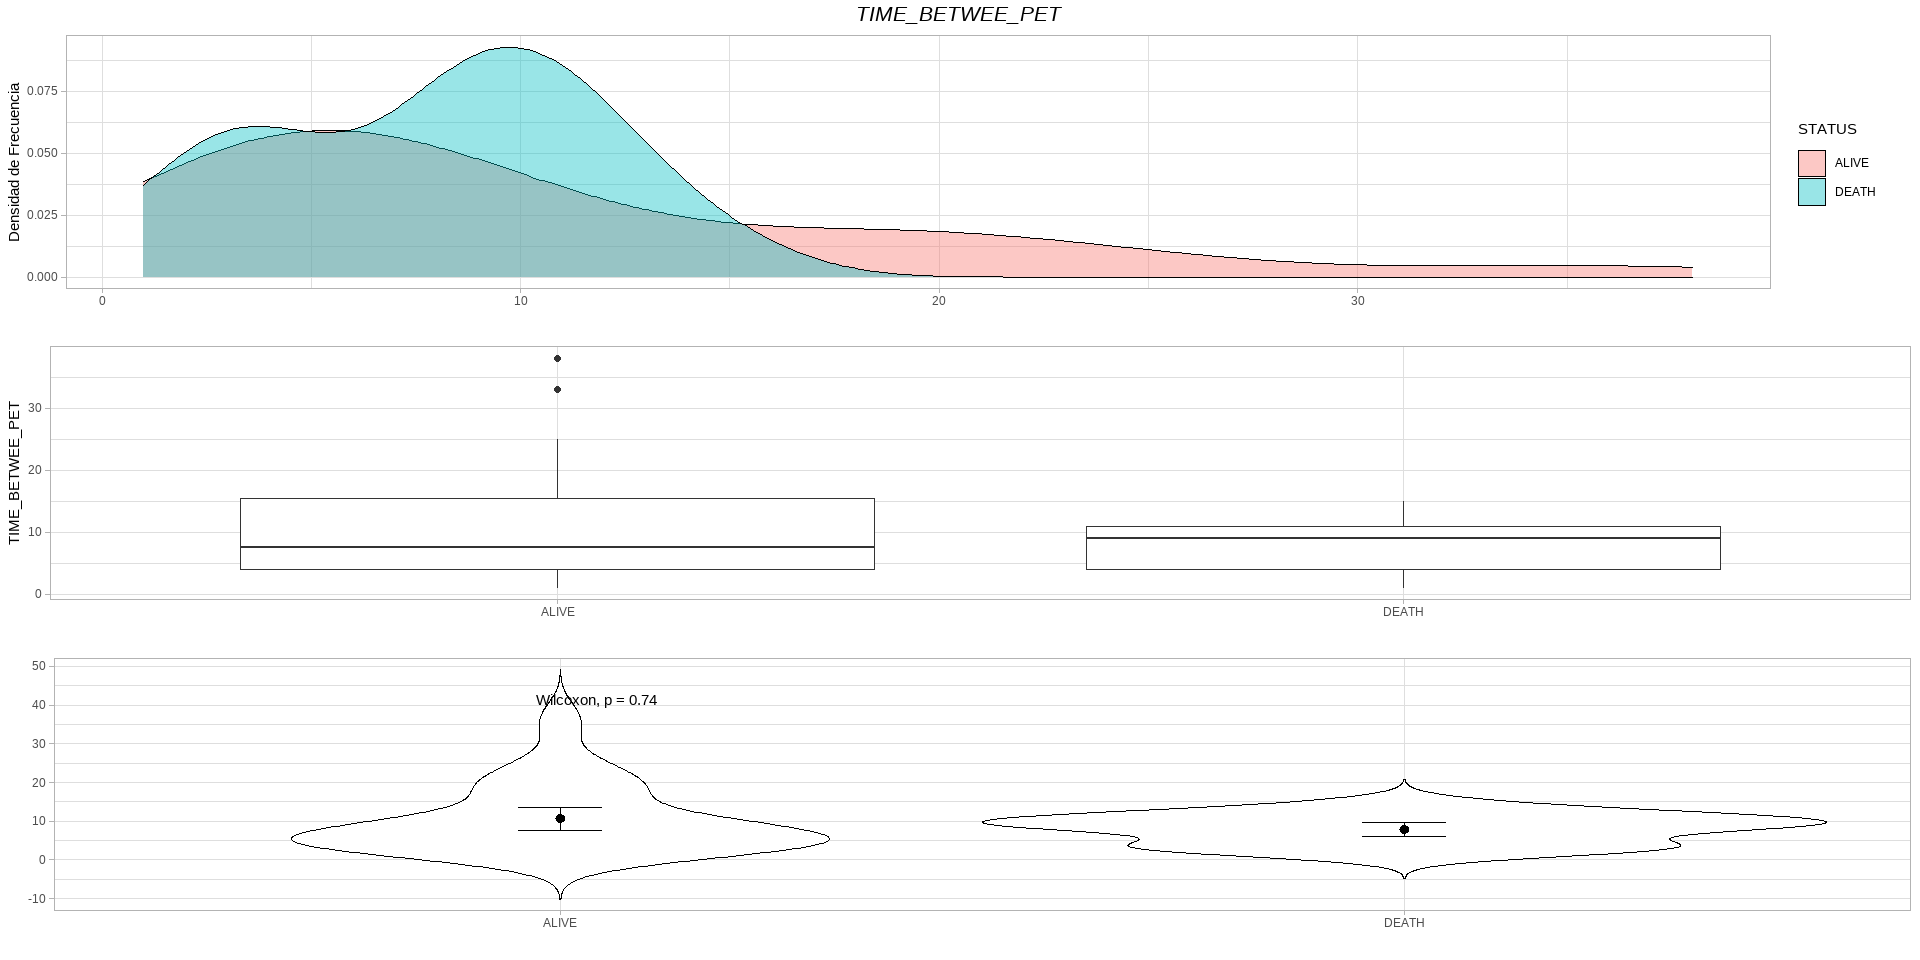

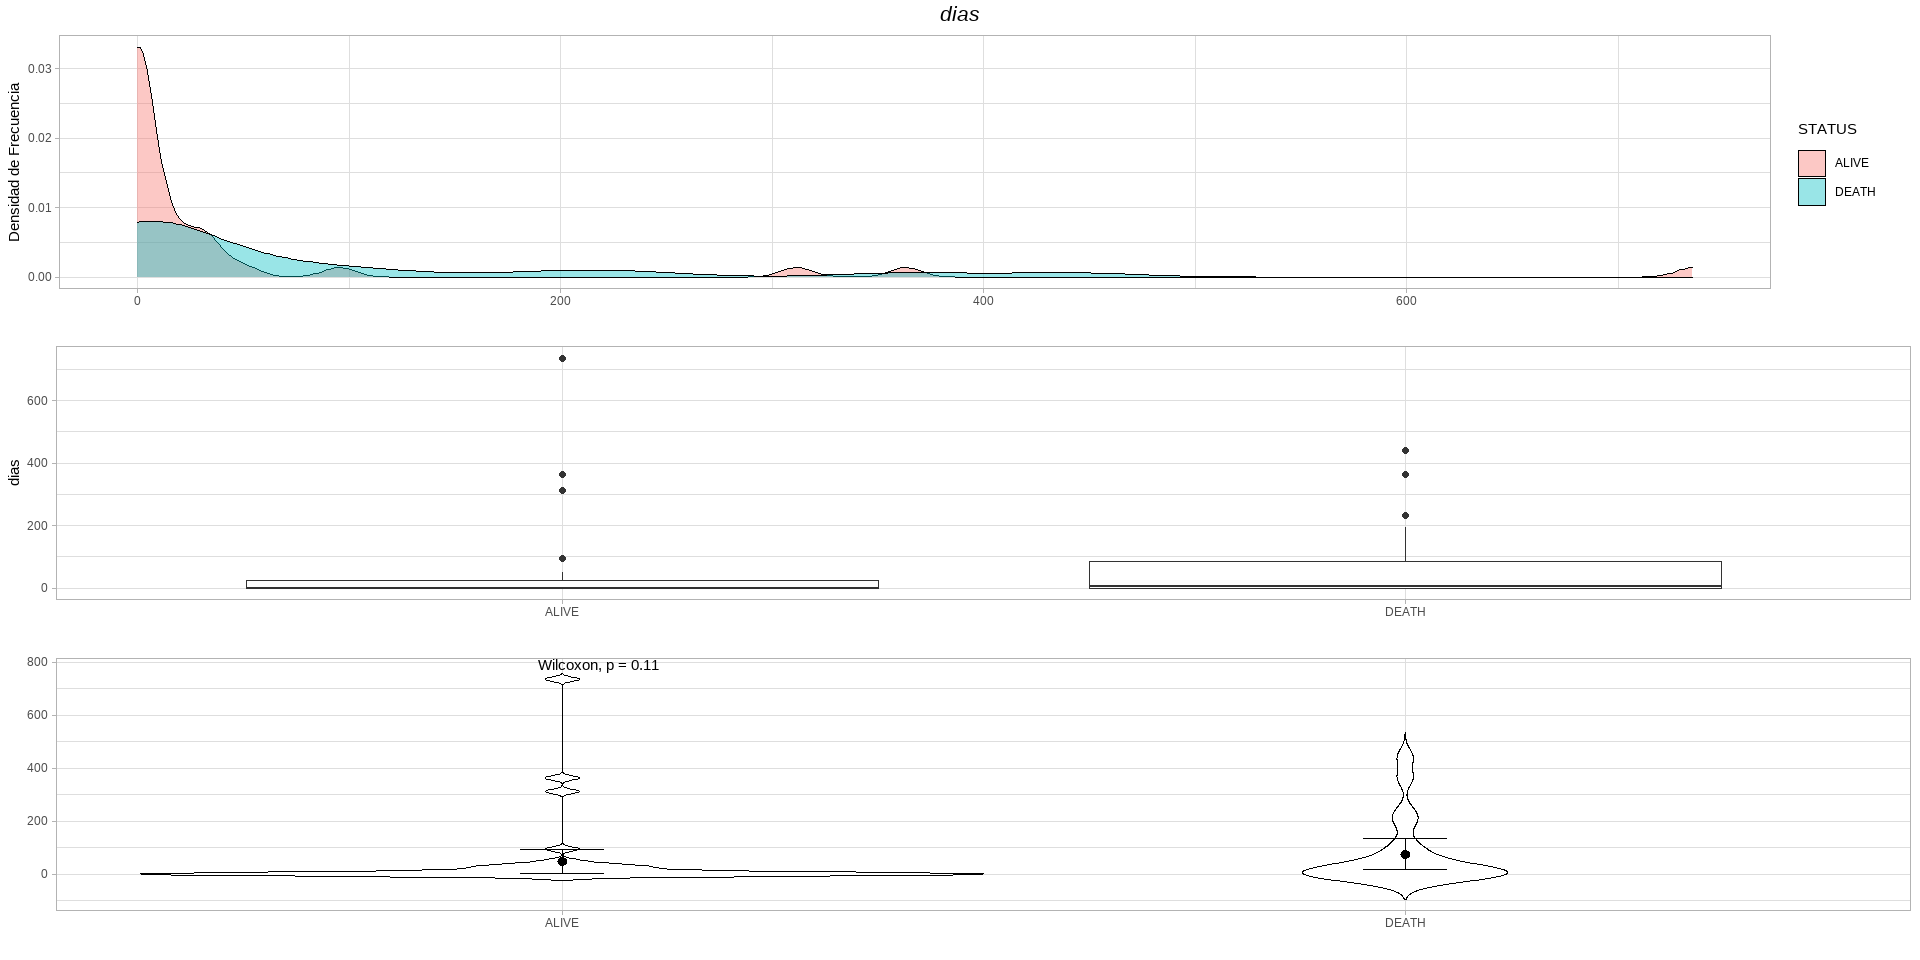

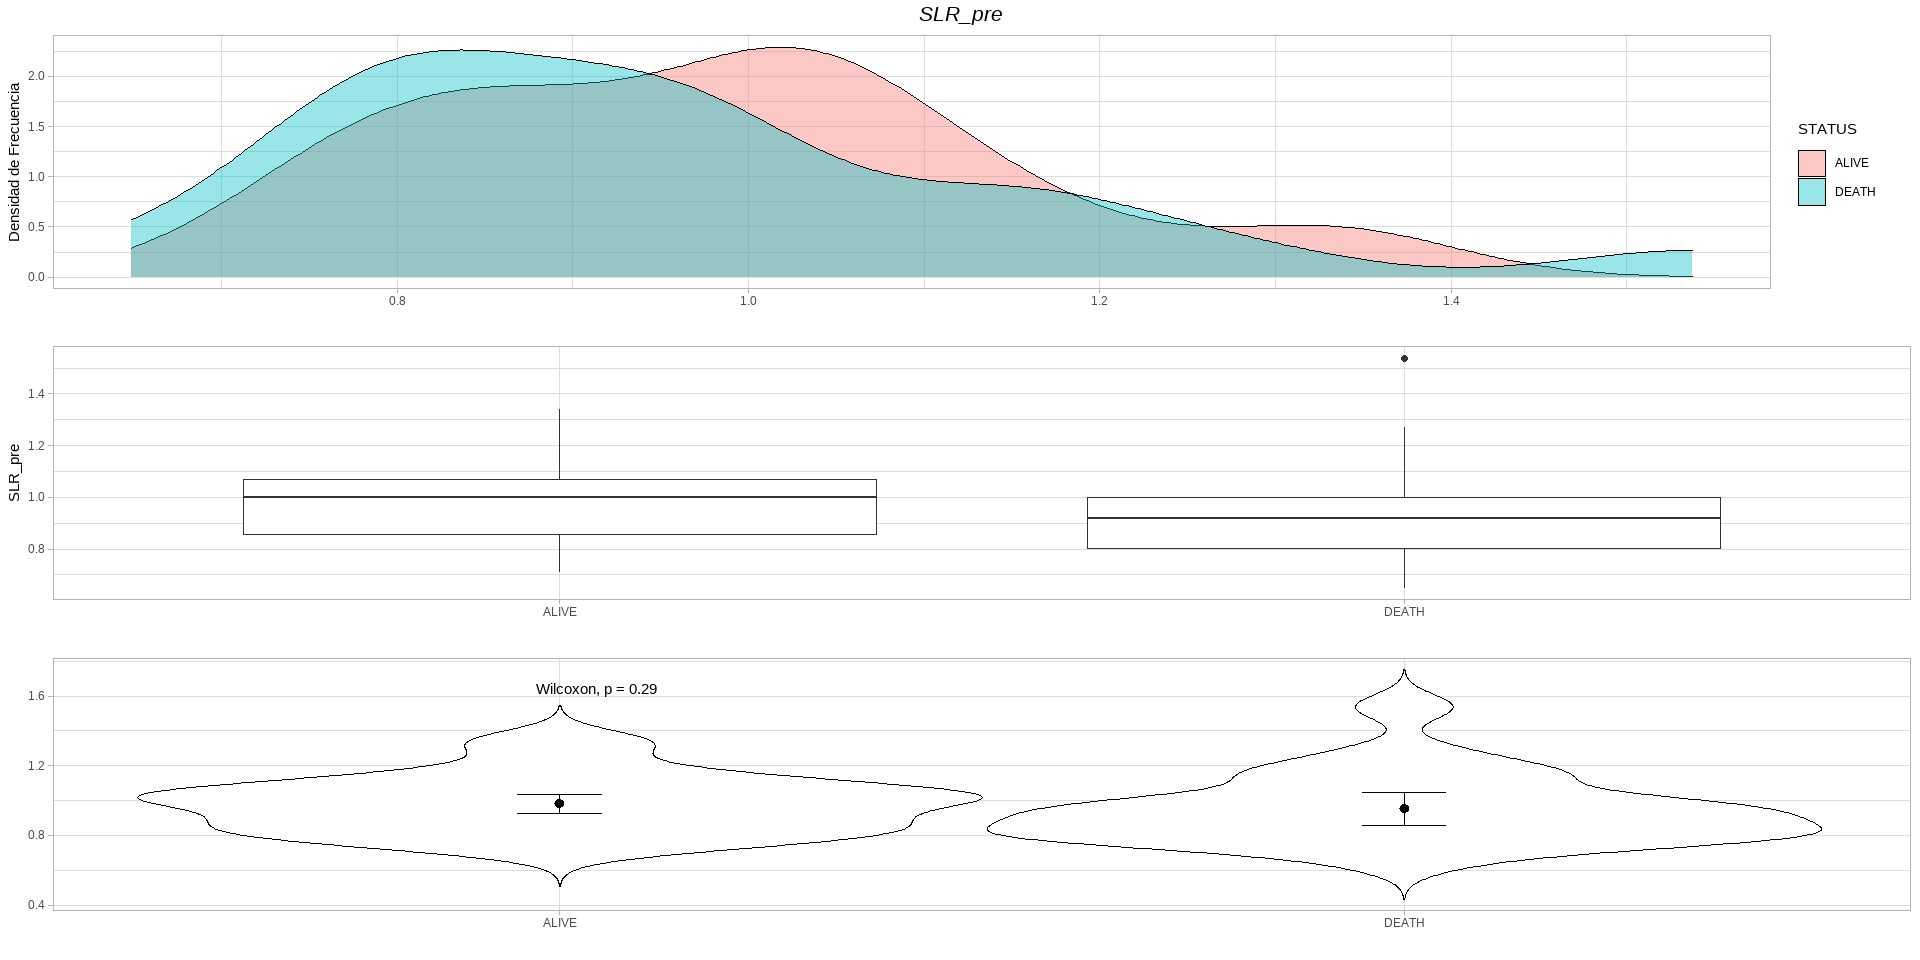

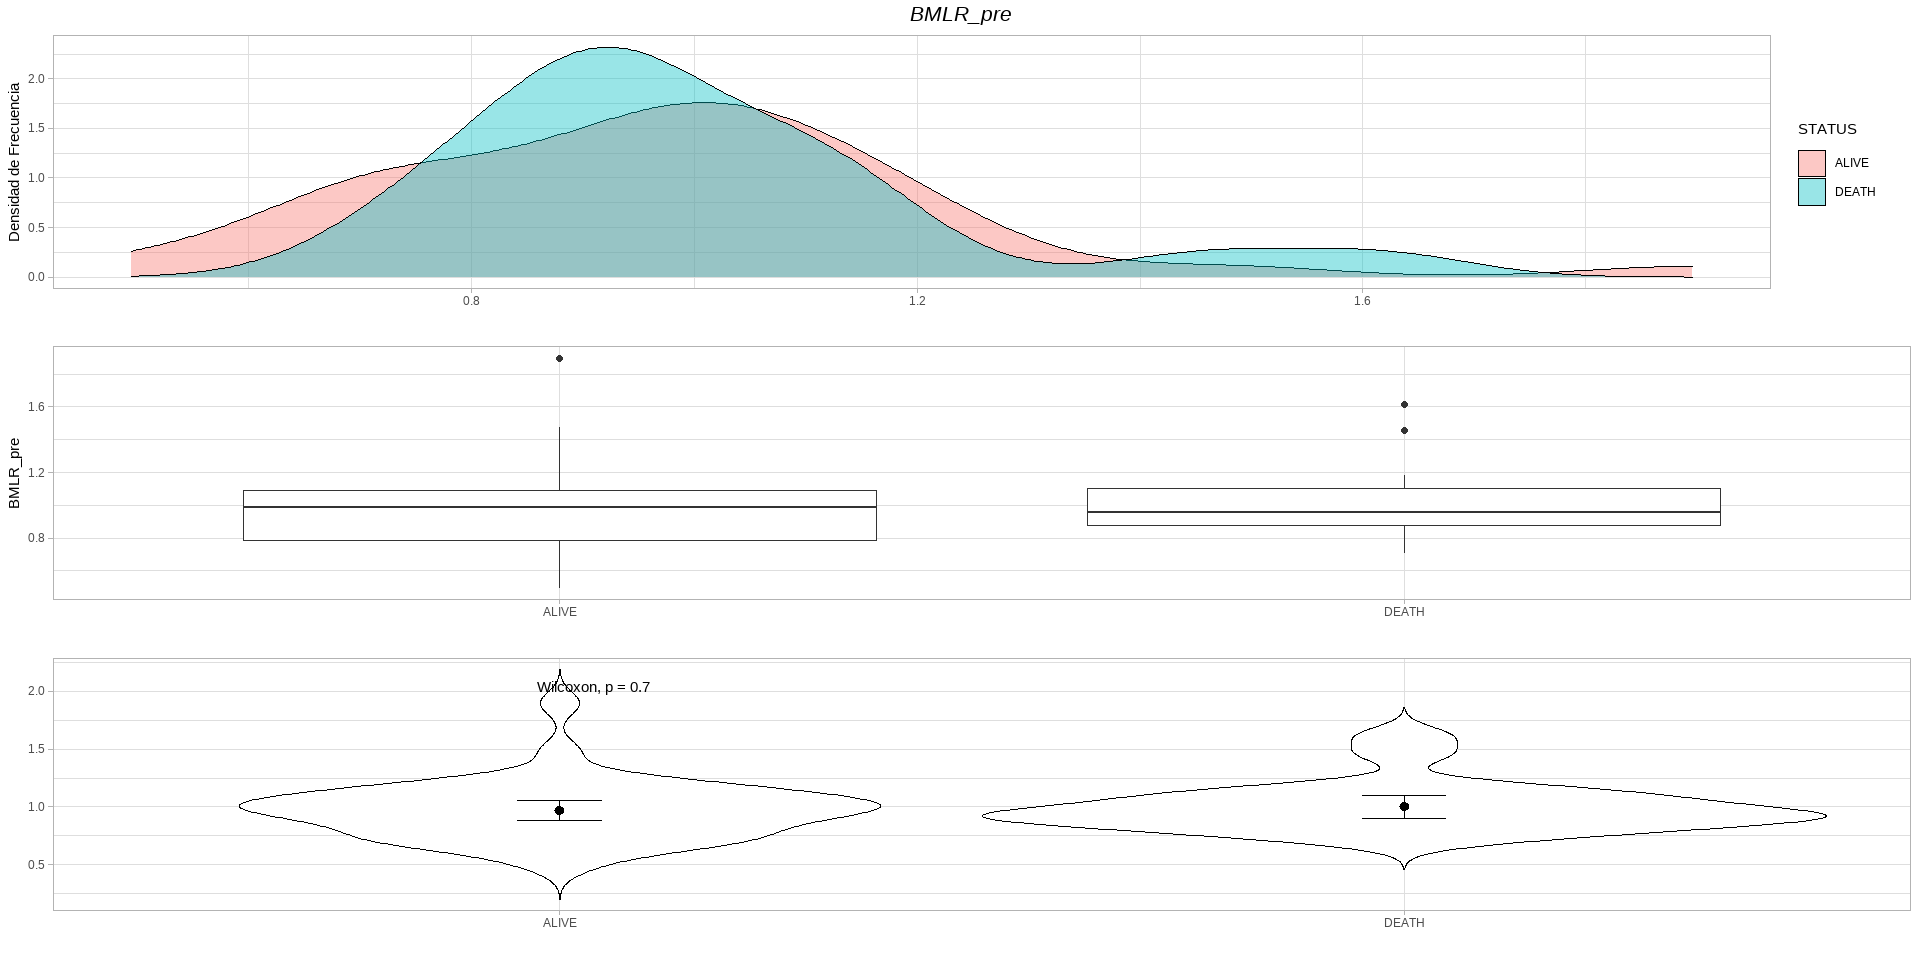

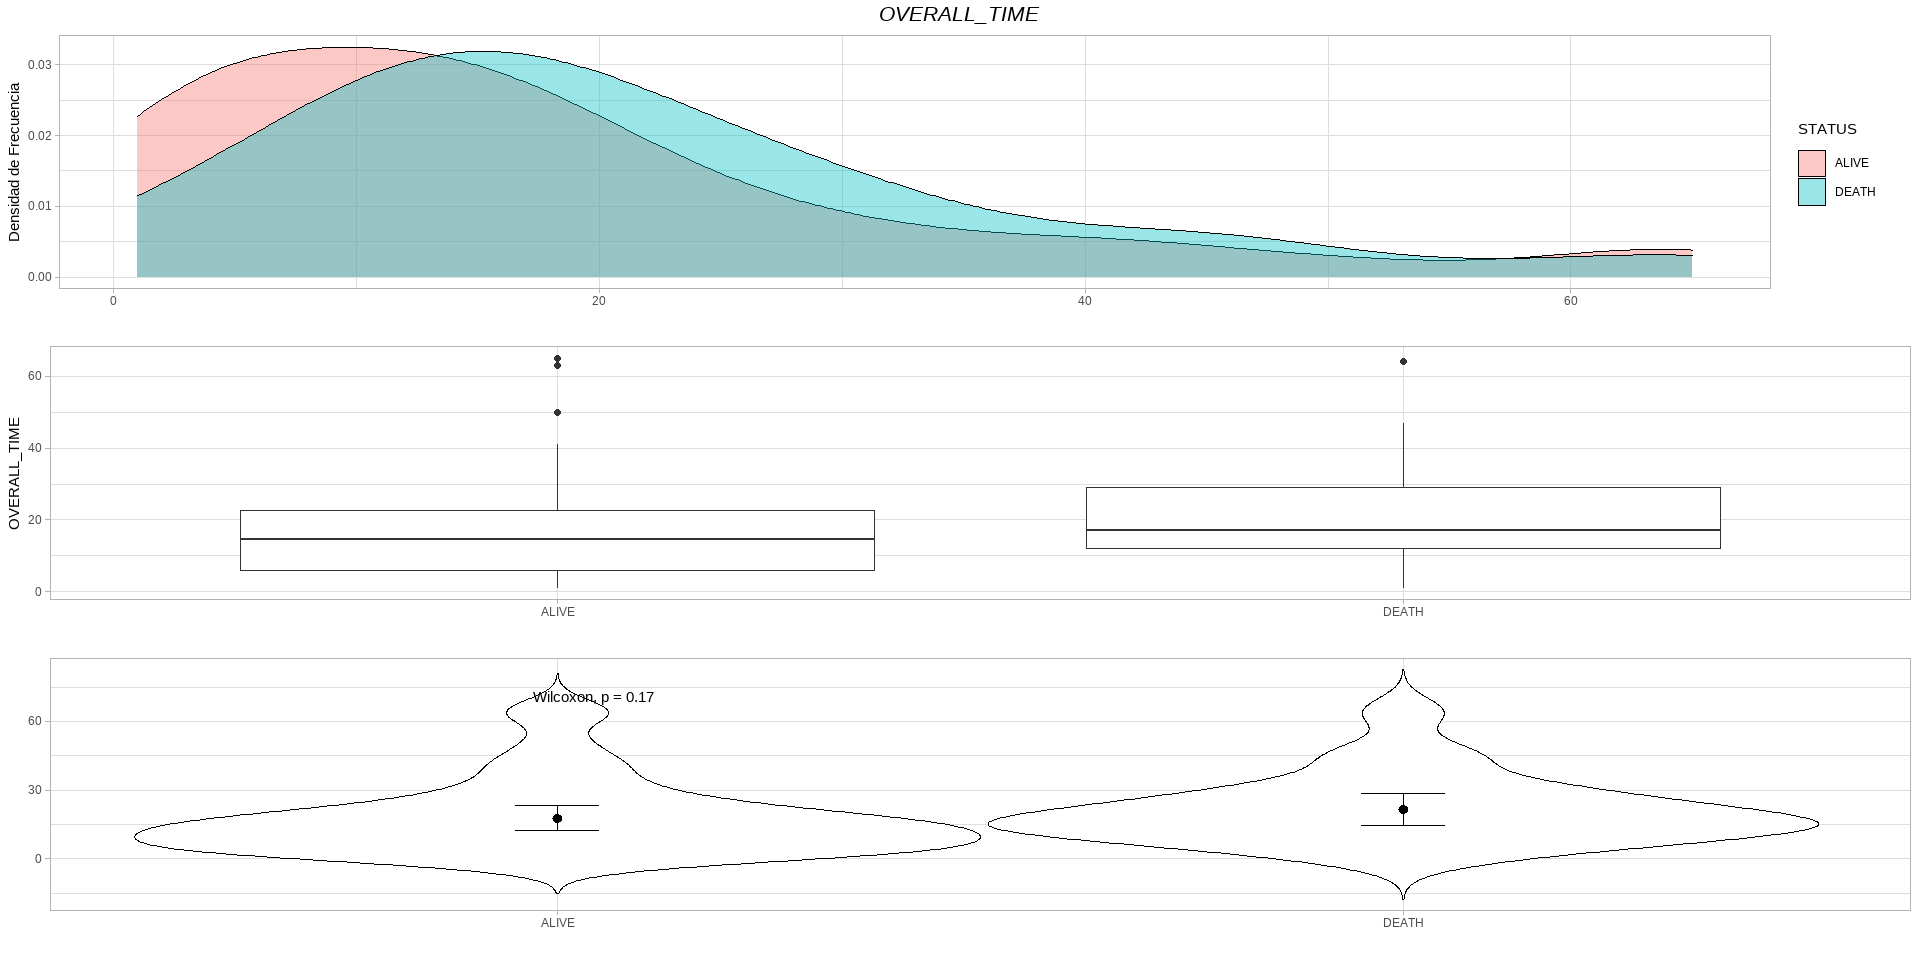

In [1096]:
options(repr.plot.width=16, repr.plot.height=8)


# boxplot + diagrama de error + histograma de densidad + violin plot
for (i in 1:length(var_num)) {
  name_i <- as.name(var_num[i])
  name_y <- as.name(respuesta[1])
  
  r <- list()
  
  # Histograma de densidad
  r[[1]]<-ggplot(datos, aes(x=!!name_i, fill=!!name_y)) +
    geom_density(alpha=0.4)+
    theme_light() +
    #theme(legend.position = "none") +
    xlab("") +
    ylab("Densidad de Frecuencia")
  
  # Boxplot
  r[[2]]<-ggplot(data=datos, aes(y=!!name_i, x=!!name_y)) +
    geom_boxplot(size = 0.4) +
    theme_light() +
    theme(legend.position = "none")+
    xlab("")
  
  # Violin plot con diagramas de error
  r[[3]]<-ggerrorplot(data = datos, x = respuesta, y = var_num[i], 
                      desc_stat = "mean_ci",
                      error.plot = "errorbar",
                      add = c("violin","mean"))+
    theme_light() +
    theme(legend.position = "none") +
    xlab("") +
    ylab("") +
    #ggtitle("Comparacion pvut") +
    stat_compare_means(comparisons = c("0","1"))+ # Add pairwise comparisons p-value
    stat_compare_means(label.y = 1.05*max(datos[,var_num[i]]))                  # Add global p-value
  
  grid.arrange(r[[1]], r[[2]], r[[3]],
               nrow=3, ncol = 1,
               top = textGrob(var_num[i],gp=gpar(fontsize=16,font=3)))
}


## Variables cualitativas vs salida

### Todos los graficos de barras de las variables cualitativas segun la salida

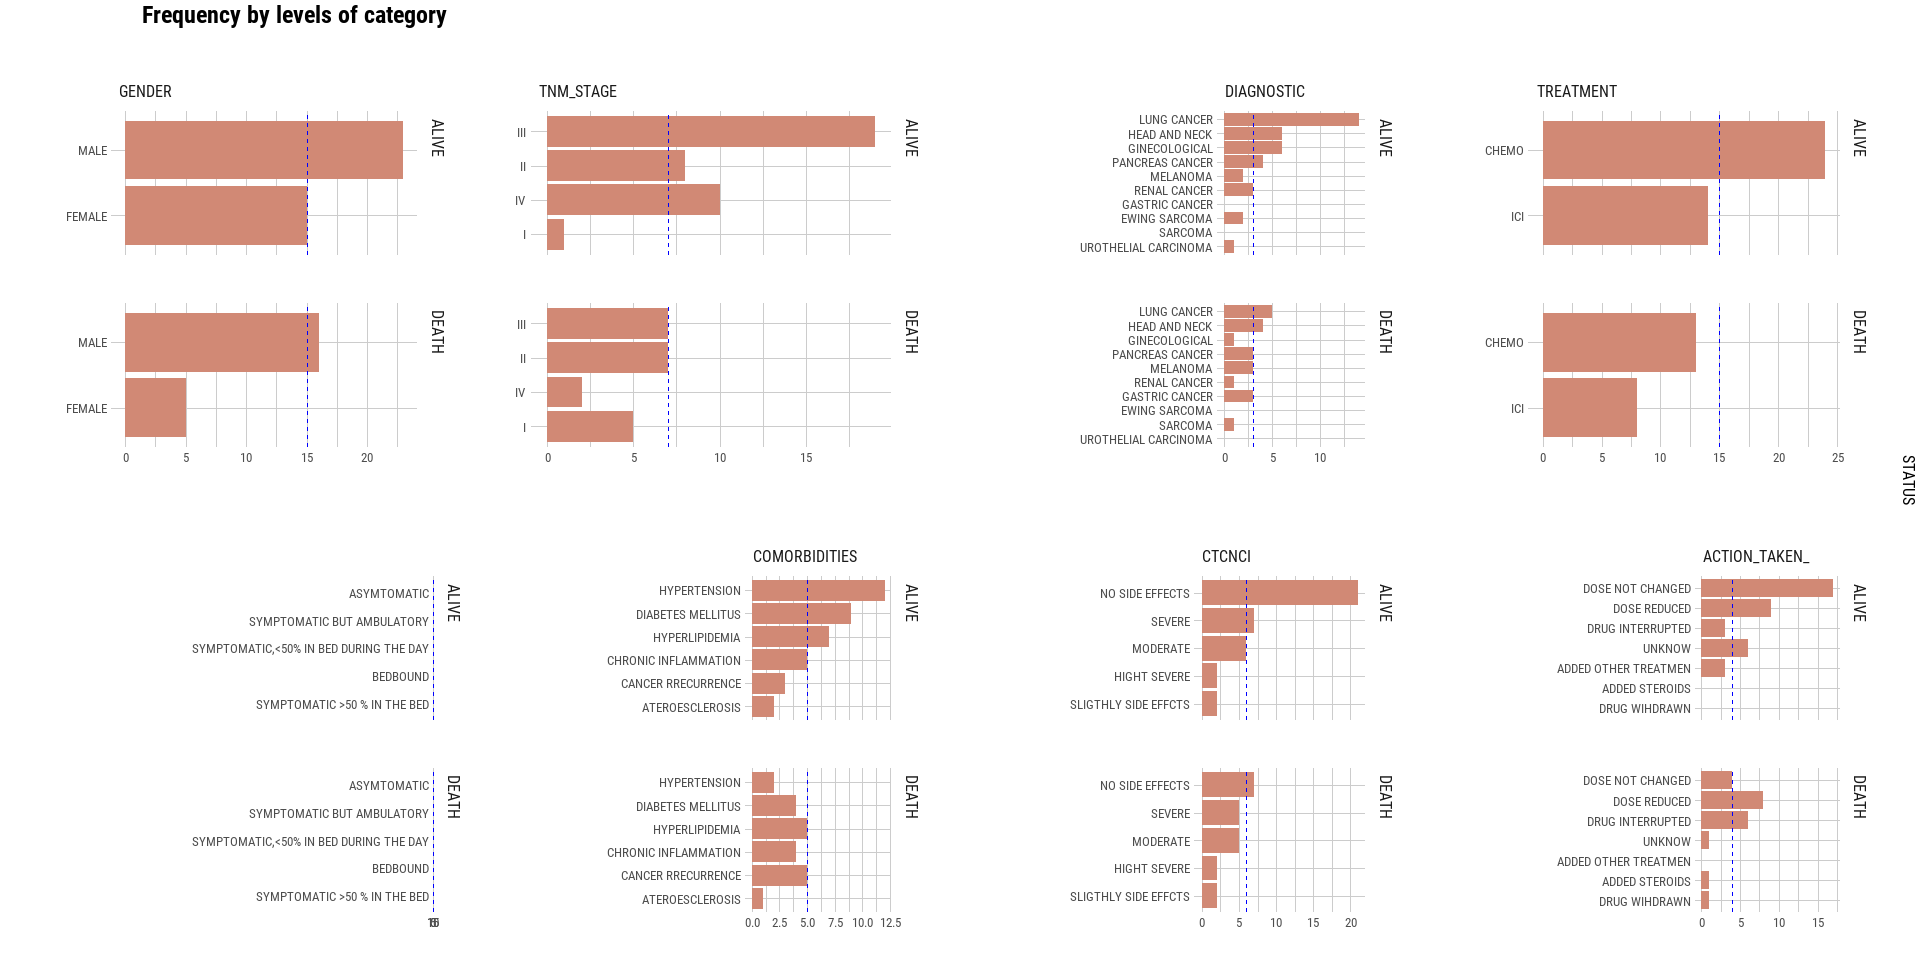

In [1098]:
# Todos los graficos de barras de cualitativas vs respuesta
name_y <- as.name(respuesta[1])

datos %>%
  group_by(!!name_y) %>%
  plot_bar_category()

### Graficos descriptivos variables cualitativas vs salida(Mosaic plot + Chi cuadrado)

Call: xtabs(formula = formula_str, data = data, addNA = TRUE)
Number of cases in table: 59 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 1.4811, df = 1, p-value = 0.2236
Call: xtabs(formula = formula_str, data = data, addNA = TRUE)
Number of cases in table: 59 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 9.495, df = 3, p-value = 0.02338
	Chi-squared approximation may be incorrect


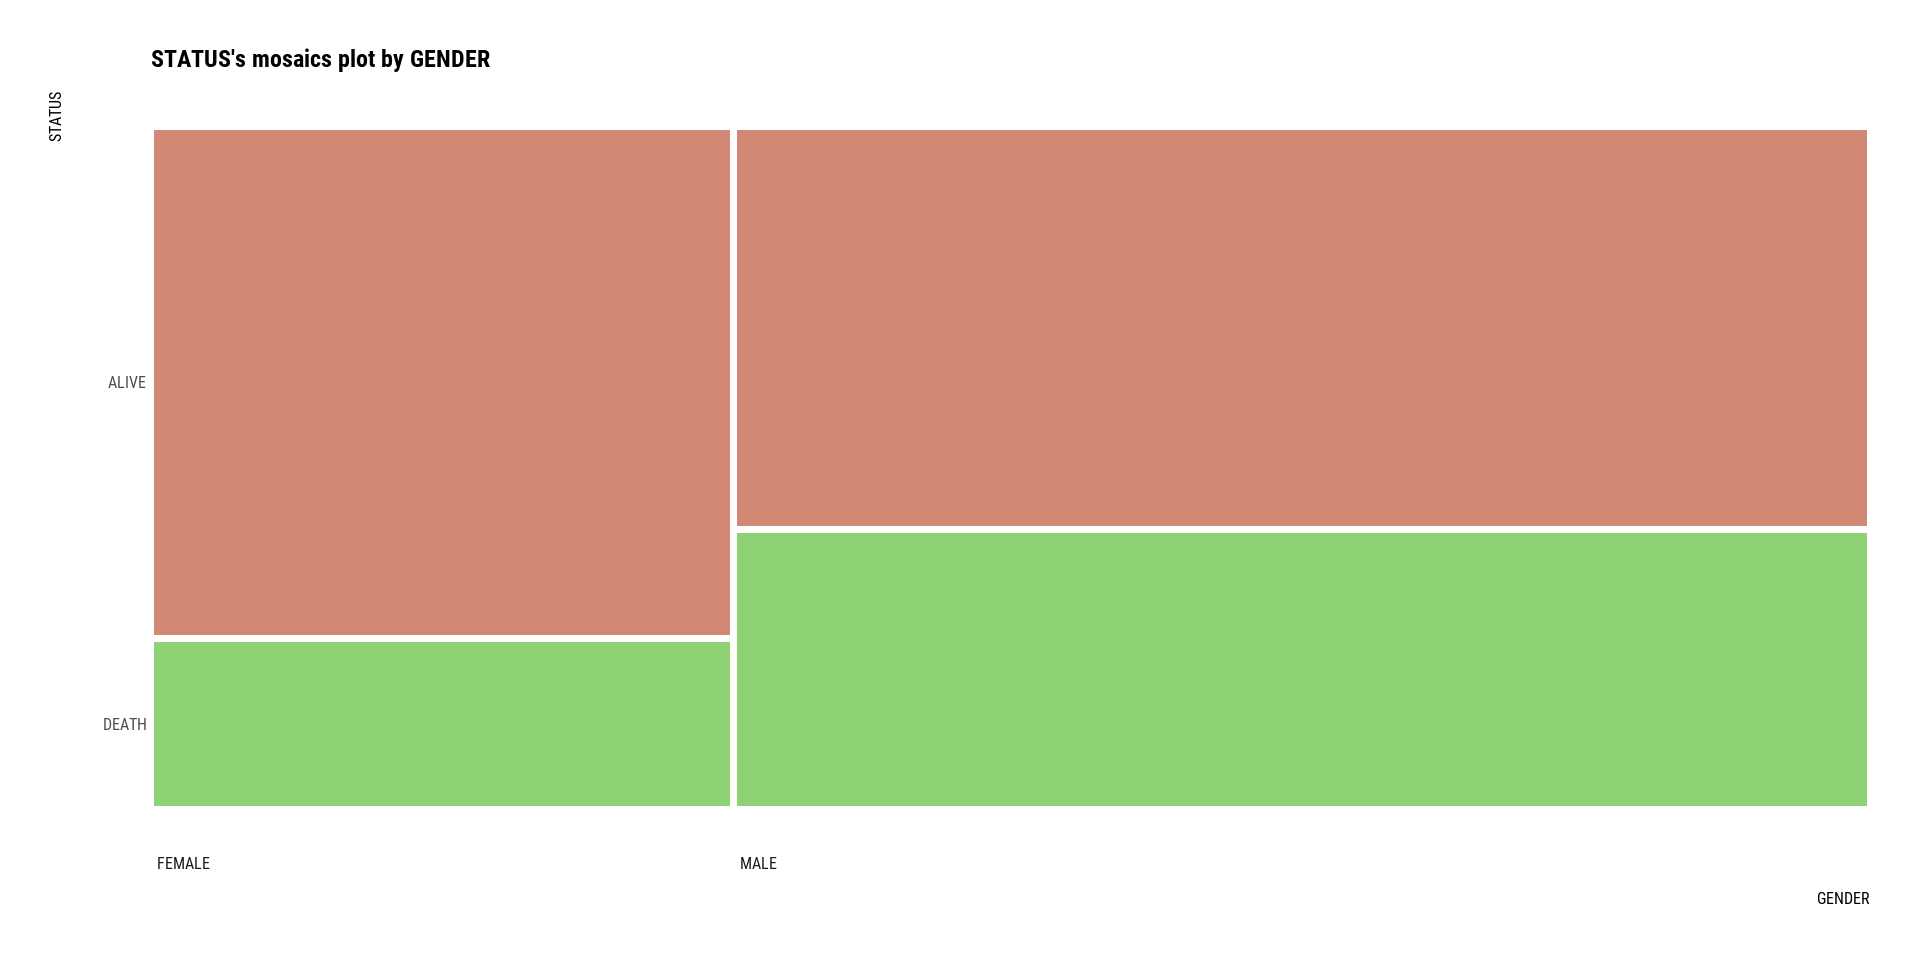

Call: xtabs(formula = formula_str, data = data, addNA = TRUE)
Number of cases in table: 59 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 12.737, df = 9, p-value = 0.1749
	Chi-squared approximation may be incorrect


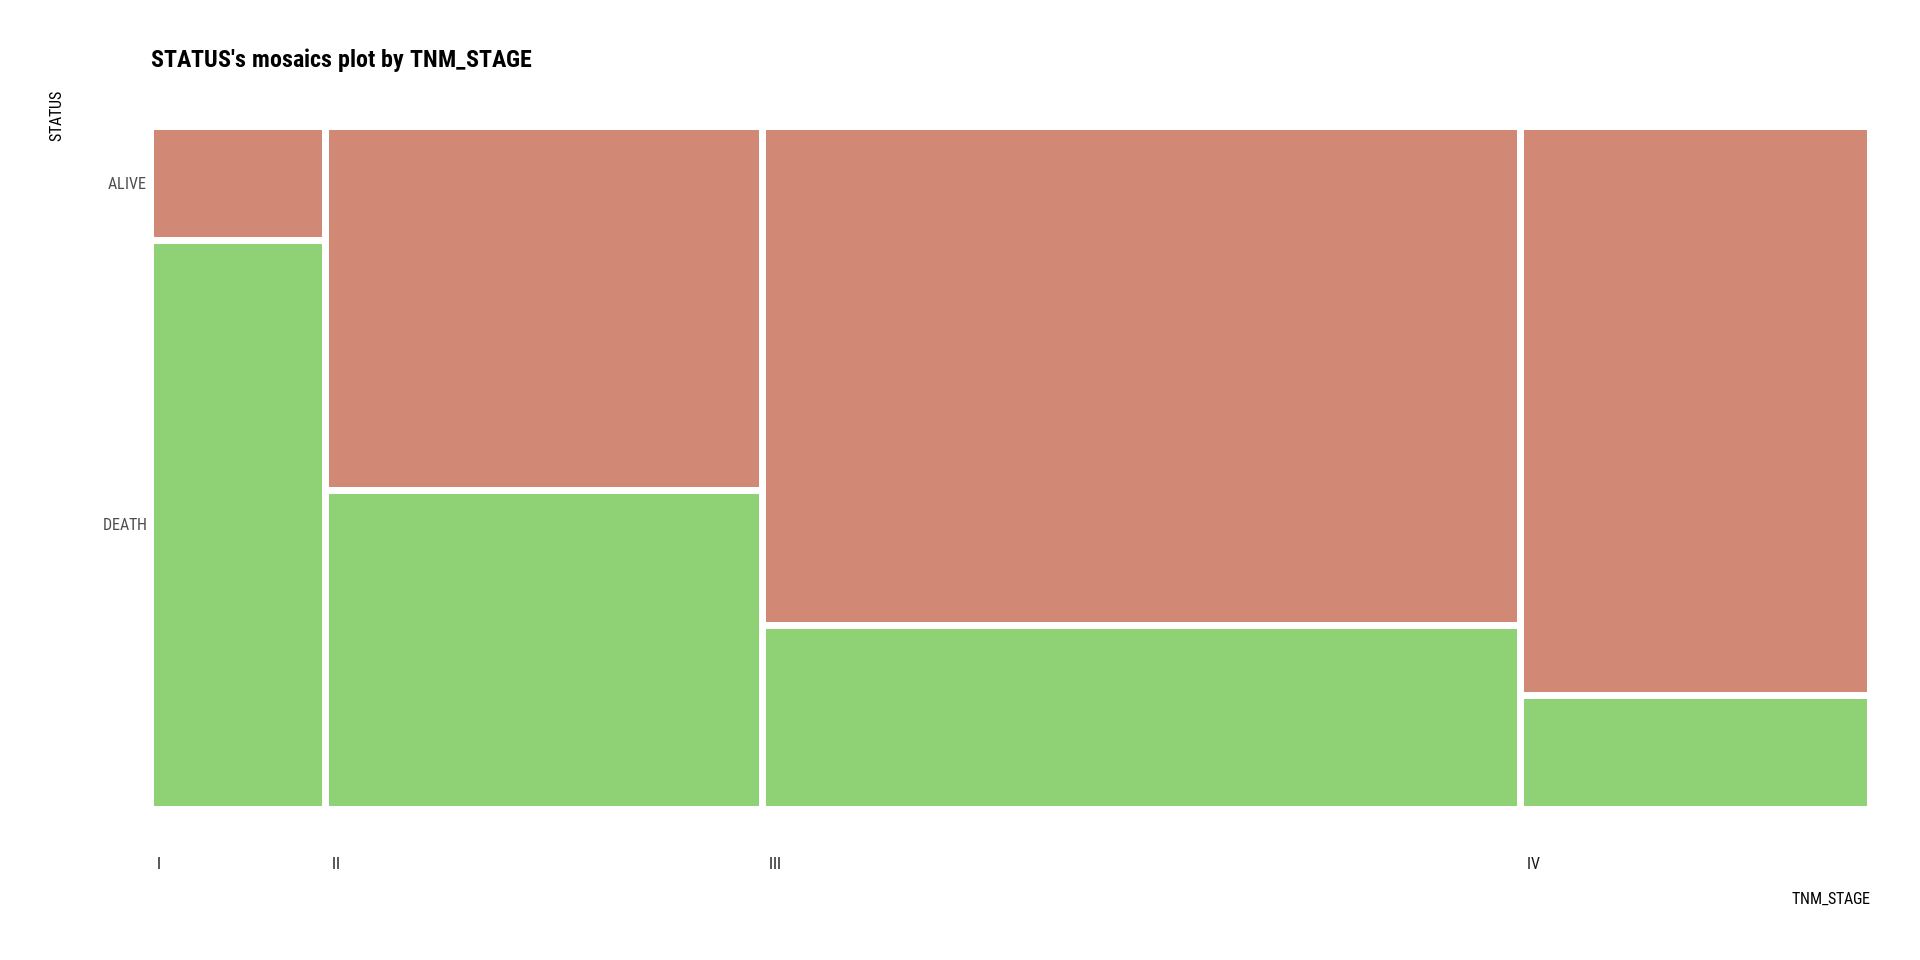

Call: xtabs(formula = formula_str, data = data, addNA = TRUE)
Number of cases in table: 59 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 0.009083, df = 1, p-value = 0.9241


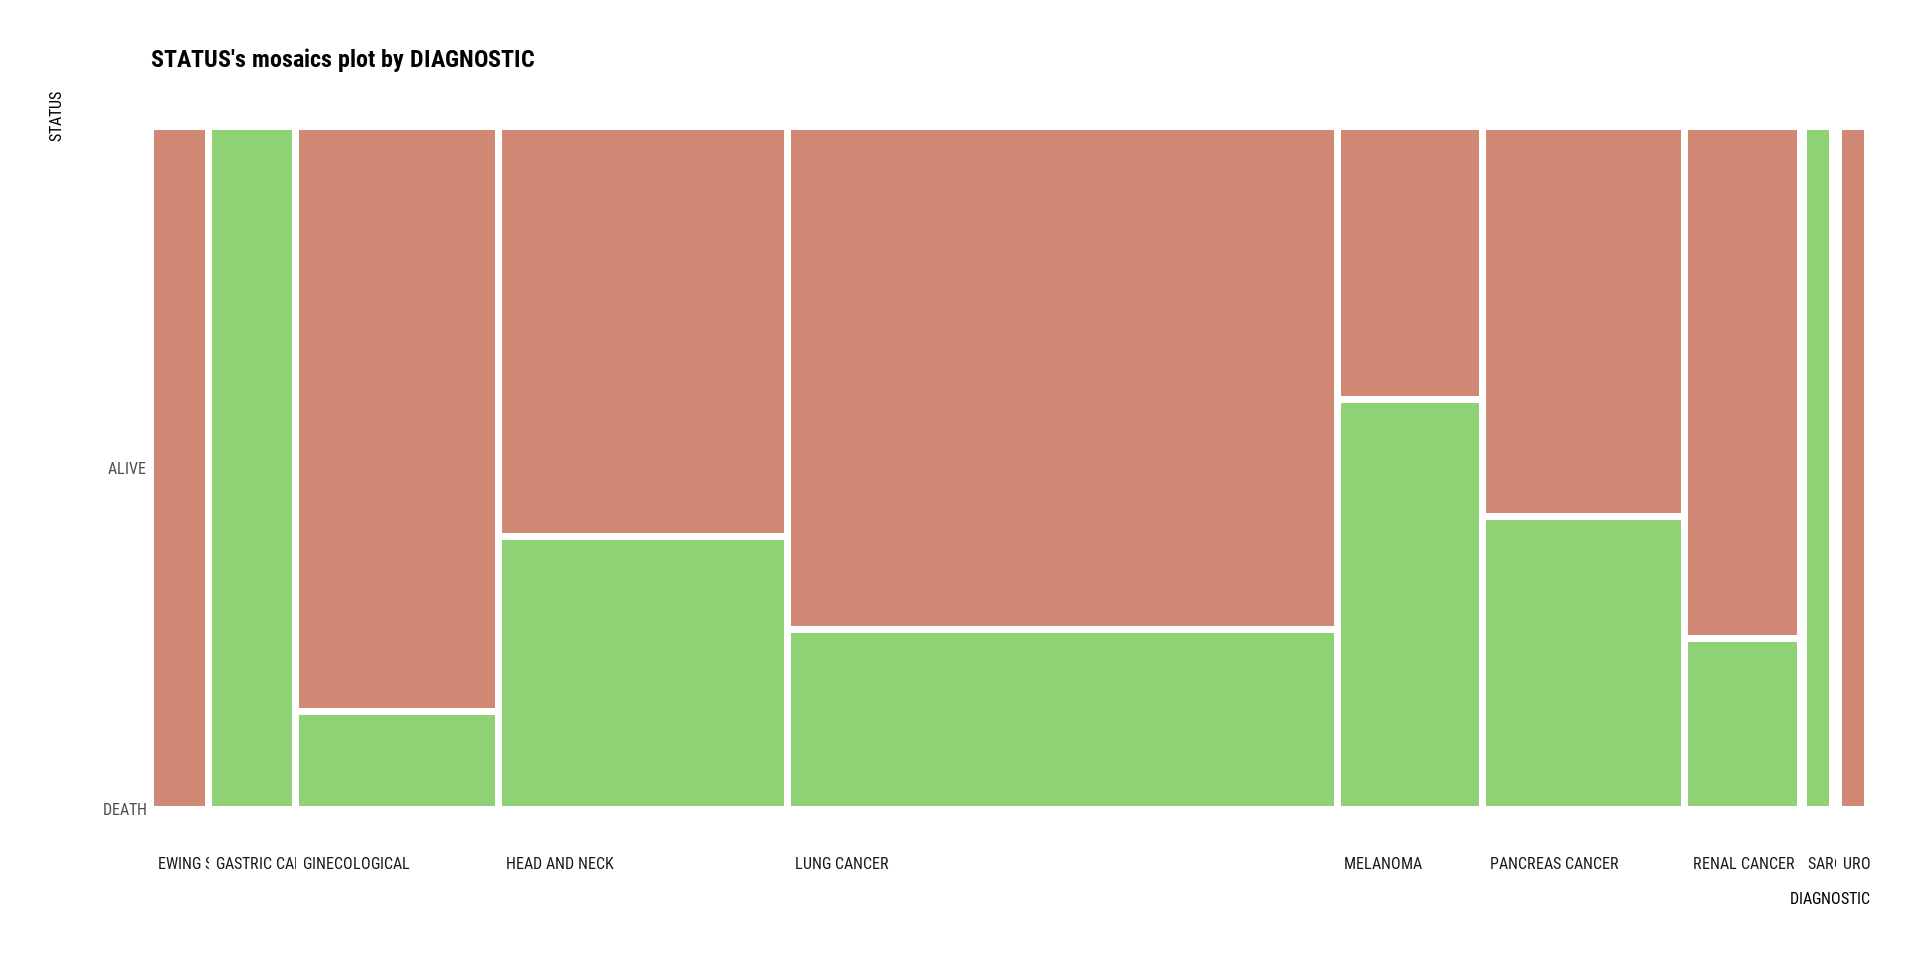

Call: xtabs(formula = formula_str, data = data, addNA = TRUE)
Number of cases in table: 59 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 5.748, df = 4, p-value = 0.2188
	Chi-squared approximation may be incorrect


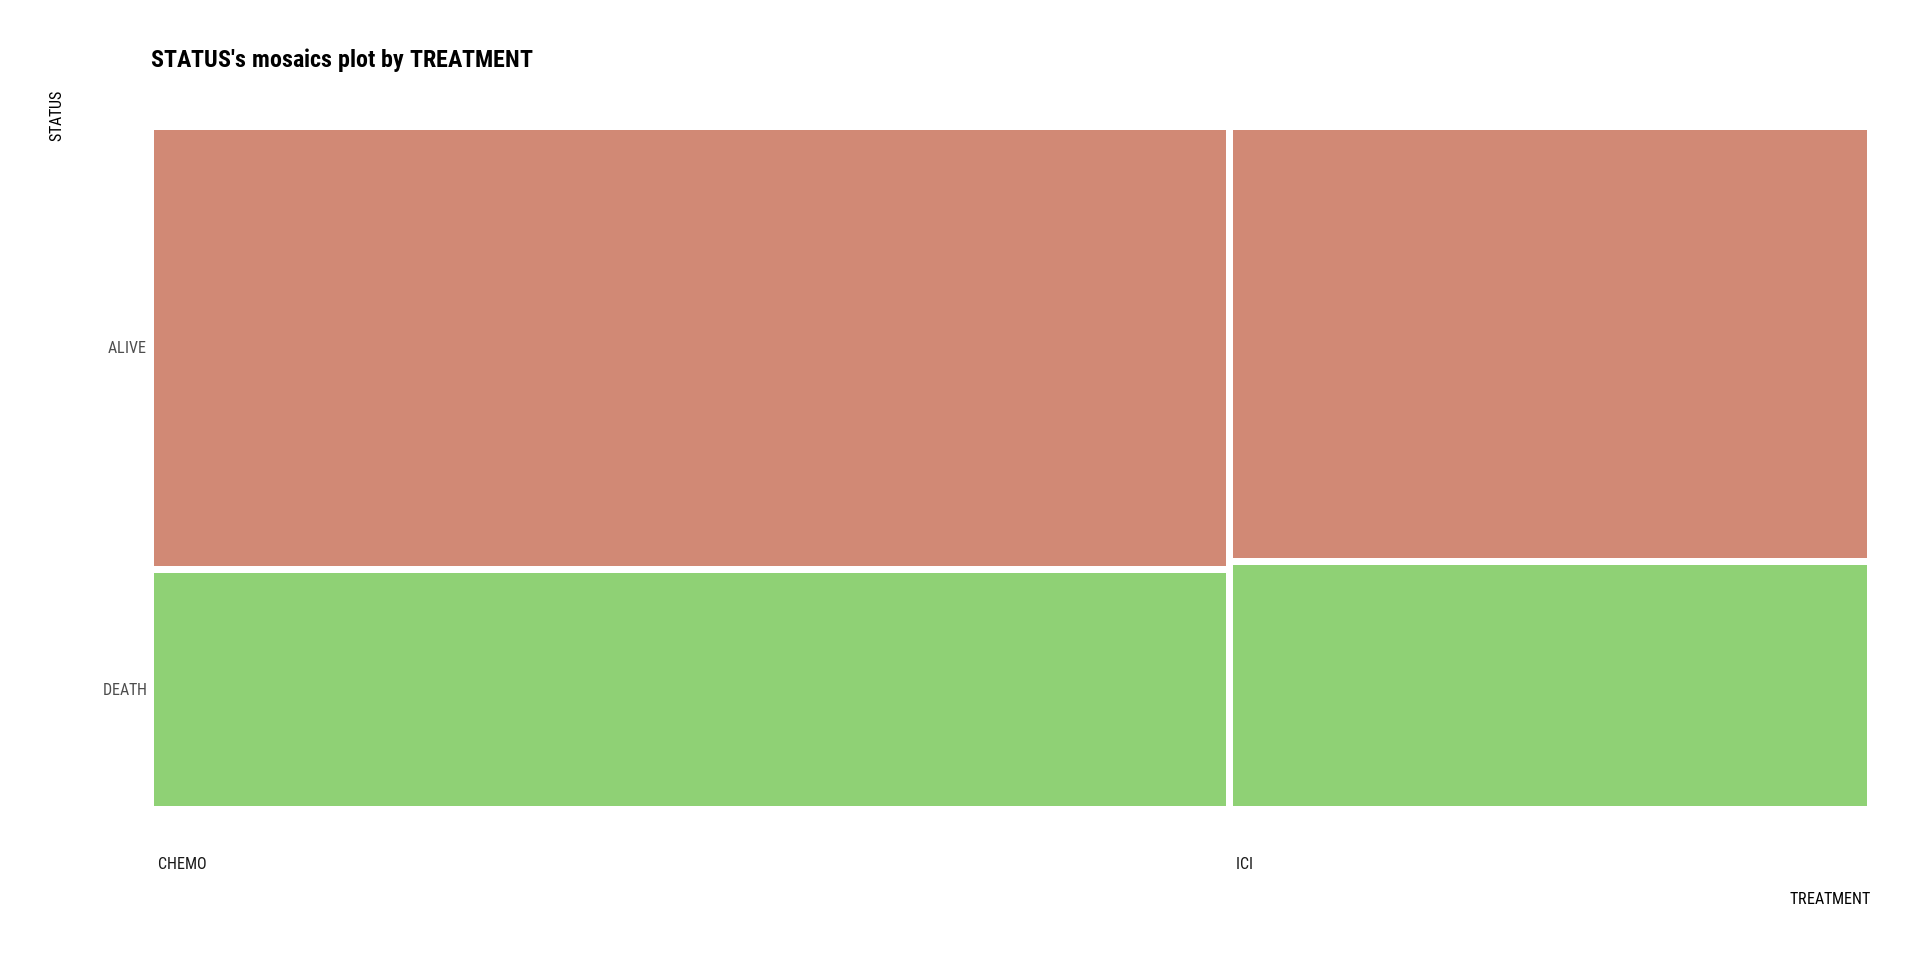

Call: xtabs(formula = formula_str, data = data, addNA = TRUE)
Number of cases in table: 59 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 5.938, df = 5, p-value = 0.3123
	Chi-squared approximation may be incorrect


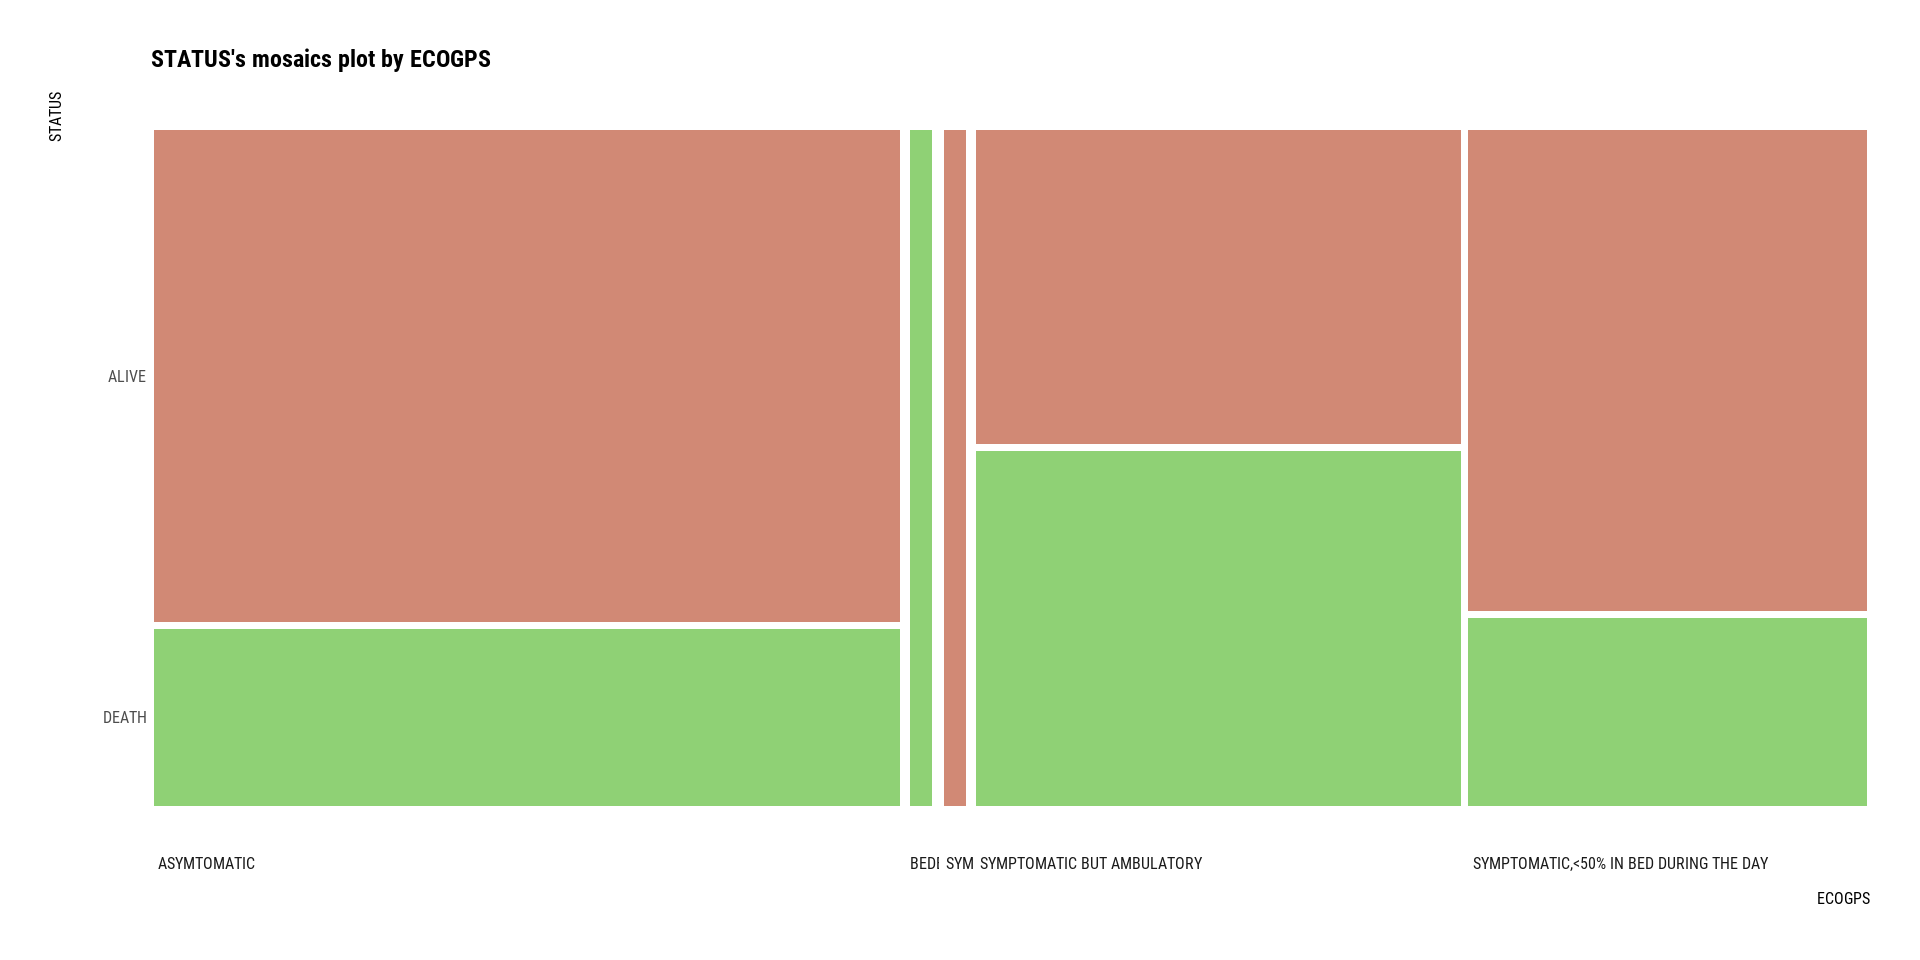

Call: xtabs(formula = formula_str, data = data, addNA = TRUE)
Number of cases in table: 59 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 2.7546, df = 4, p-value = 0.5997
	Chi-squared approximation may be incorrect


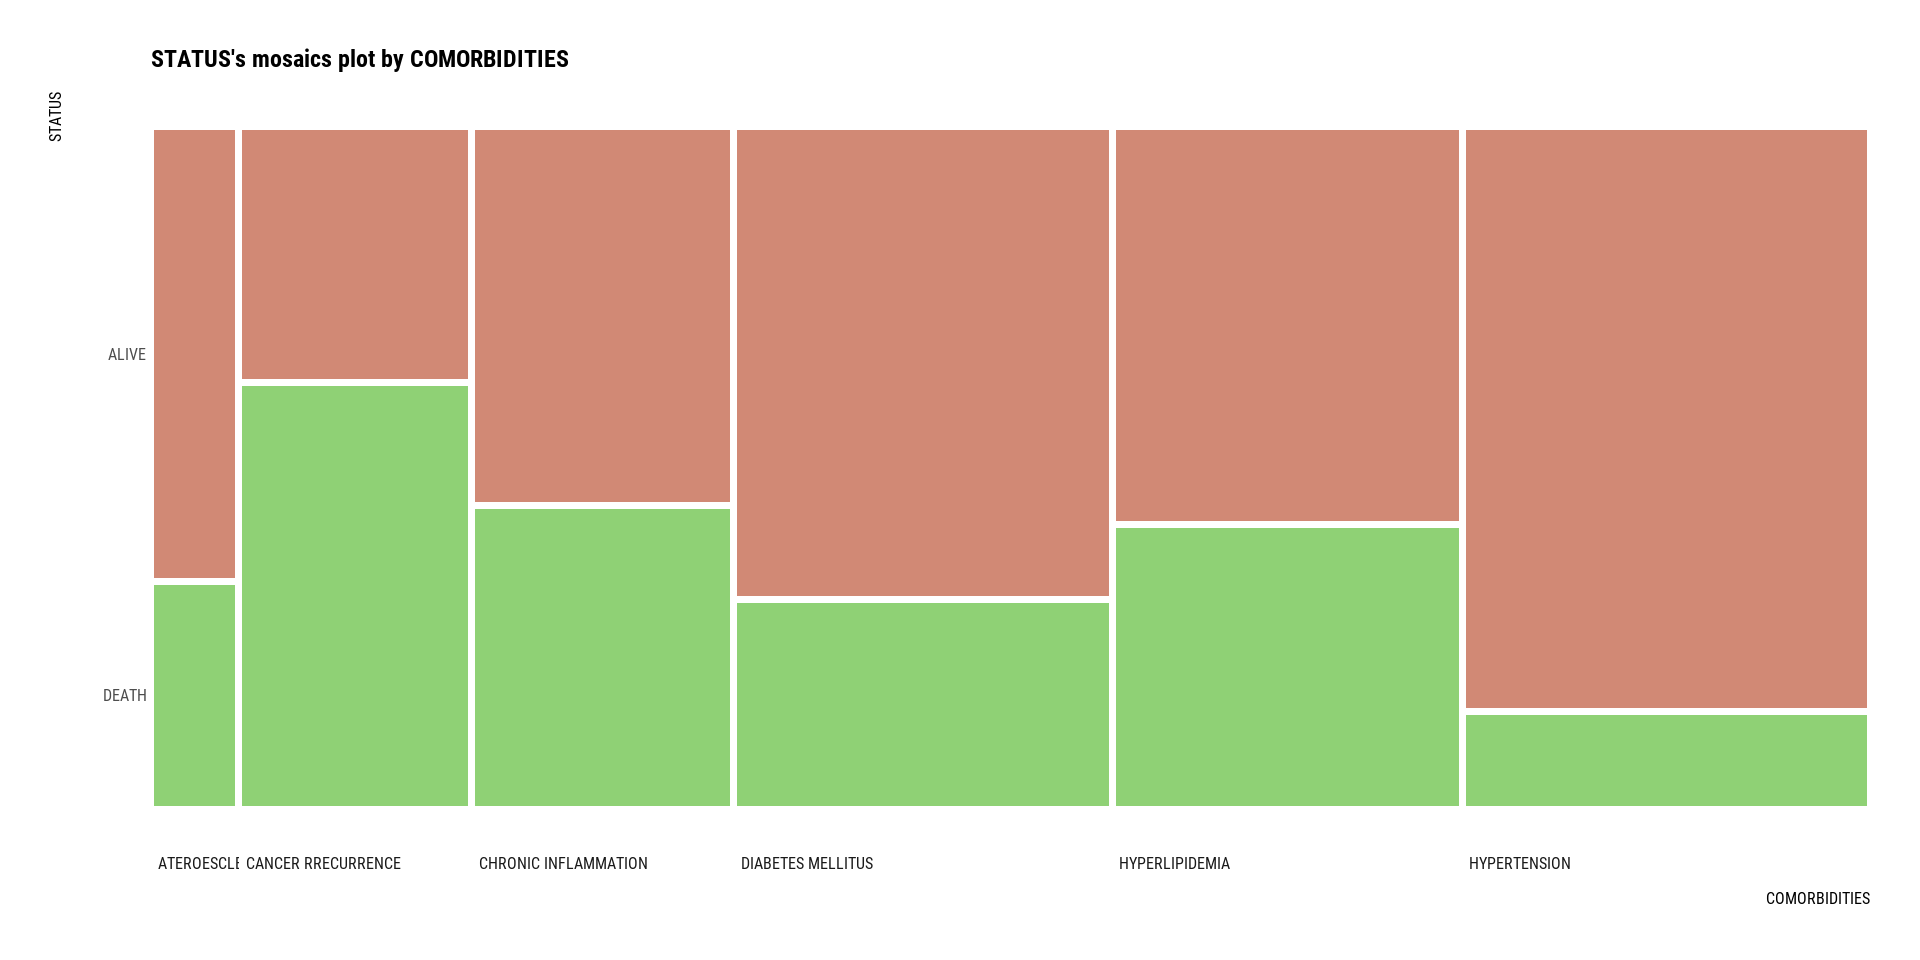

Call: xtabs(formula = formula_str, data = data, addNA = TRUE)
Number of cases in table: 59 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 13.937, df = 6, p-value = 0.03035
	Chi-squared approximation may be incorrect


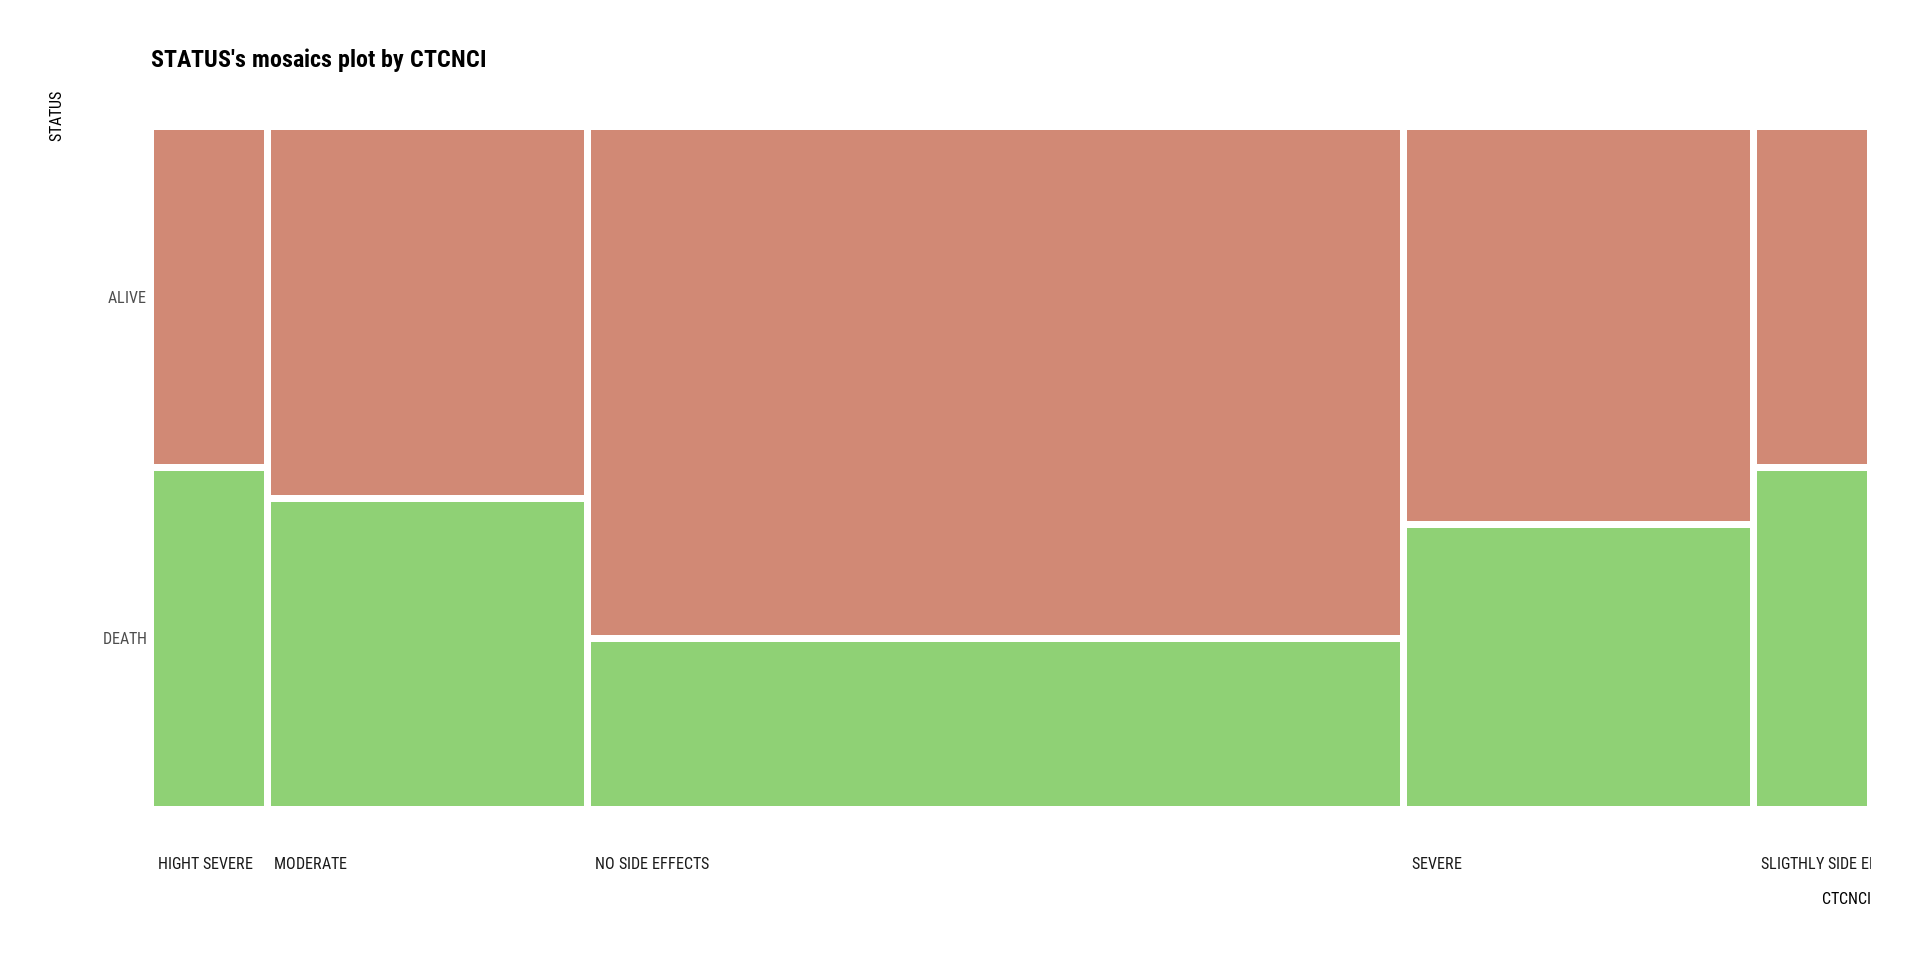

[[1]]
      FEMALE MALE
ALIVE     15   23
DEATH      5   16

[[2]]
      I II III IV
ALIVE 1  8  19 10
DEATH 5  7   7  2

[[3]]
      EWING SARCOMA GASTRIC CANCER GINECOLOGICAL HEAD AND NECK LUNG CANCER
ALIVE             2              0             6             6          14
DEATH             0              3             1             4           5
      MELANOMA PANCREAS CANCER RENAL CANCER SARCOMA UROTHELIAL CARCINOMA
ALIVE        2               4            3       0                    1
DEATH        3               3            1       1                    0

[[4]]
      CHEMO ICI
ALIVE    24  14
DEATH    13   8

[[5]]
      ASYMTOMATIC BEDBOUND SYMPTOMATIC >50 % IN THE BED
ALIVE          19        0                            1
DEATH           7        1                            0
      SYMPTOMATIC BUT AMBULATORY SYMPTOMATIC,<50% IN BED DURING THE DAY
ALIVE                          8                                     10
DEATH                          9                                      4

[[6]]
      ATEROESCLEROSIS CANCER RRECURRENCE CHRONIC INFLAMMATION DIABETES MELLITUS
ALIVE               2                  3                    5                 9
DEATH               1                  5                    4                 4
      HYPERLIPIDEMIA HYPERTENSION
ALIVE              7           12
DEATH              5            2

[[7]]
      HIGHT SEVERE MODERATE NO SIDE EFFECTS SEVERE SLIGTHLY SIDE EFFCTS
ALIVE            2        6              21      7                    2
DEATH            2        5               7      5                    2

[[8]]
      ADDED OTHER TREATMEN ADDED STEROIDS DOSE NOT CHANGED DOSE REDUCED
ALIVE                    3              0               17            9
DEATH                    0              1                4            8
      DRUG INTERRUPTED DRUG WIHDRAWN UNKNOW
ALIVE                3             0      6
DEATH                6             1      1

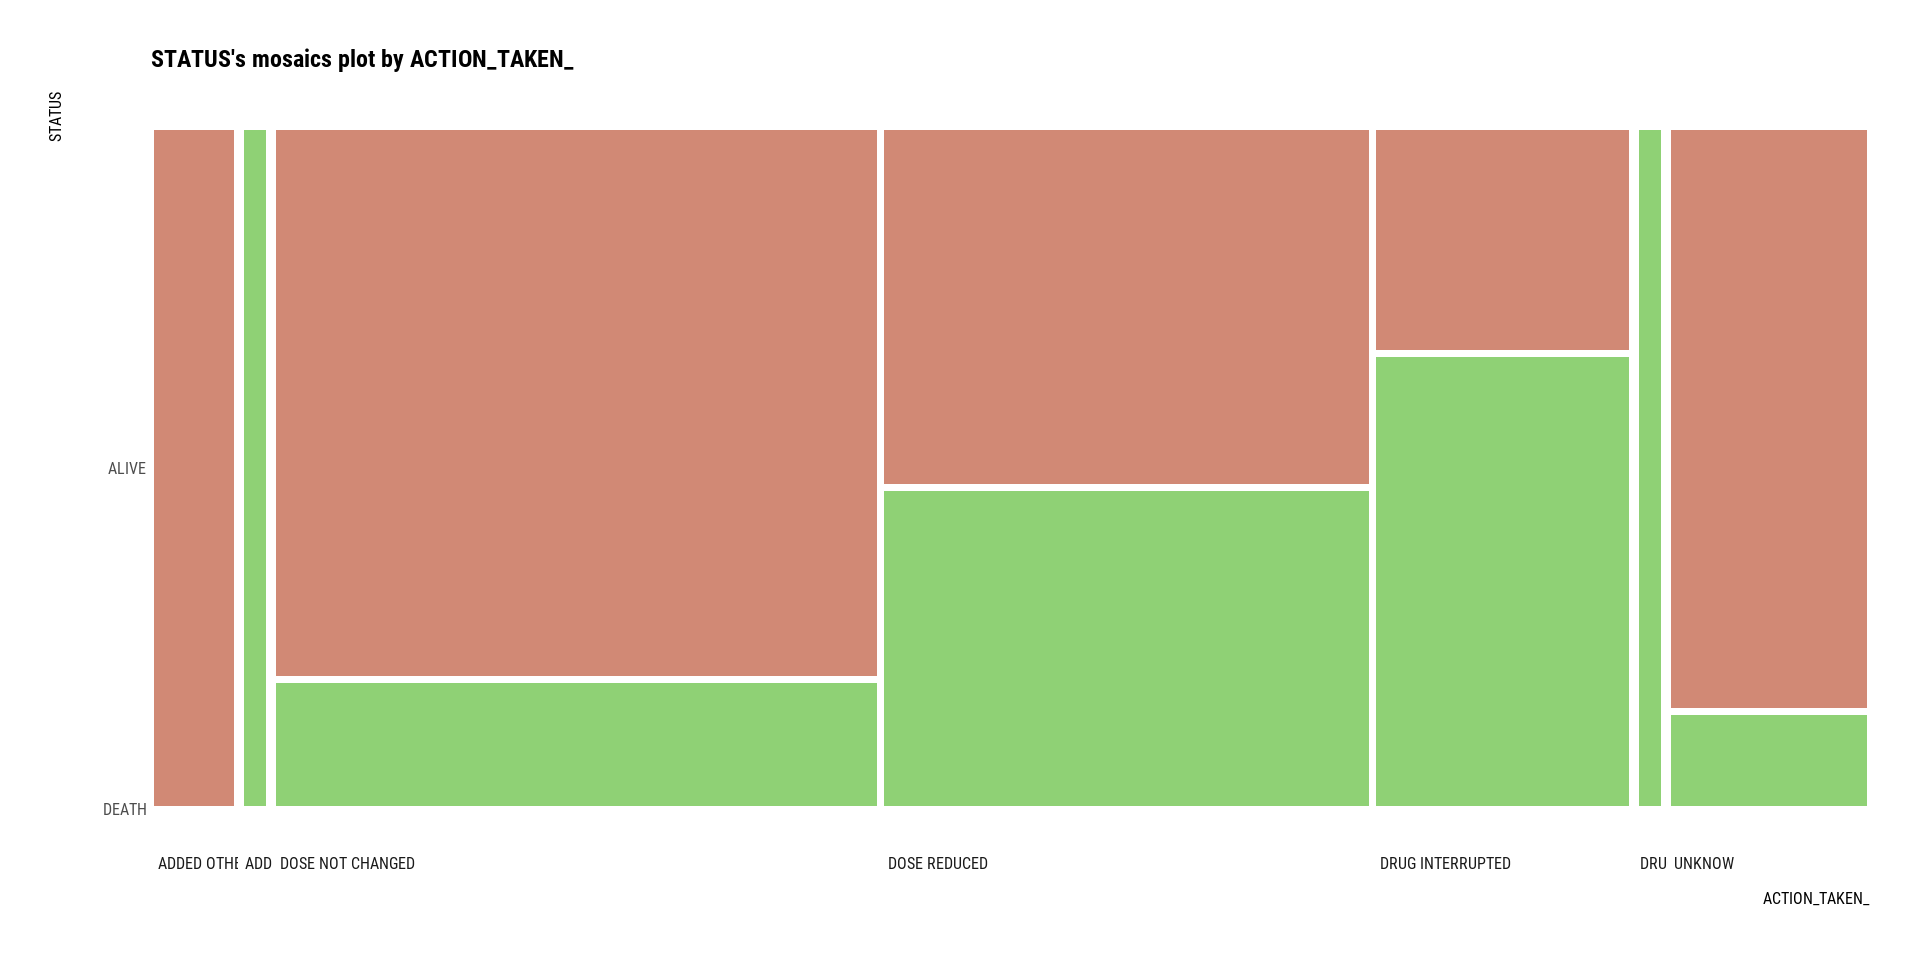

In [1099]:
# Mosaic plot y chi cuadrado:
r <- list()
for (i in 1:length(var_cual)) {
    # Variable de salida o respuesta
    name_y <- as.name(respuesta[1])

    # Variable de entrada
    name_i <- as.name(var_cual[i])


    # Tabla de contingencias de una variable con la target
    categ <- target_by(datos, !!name_y)
    cat_cat <- relate(categ, !!name_i)
    r[[i]]<-as.data.frame.matrix(cat_cat)
    
    # Chi cuadrado
    print(summary(cat_cat))
    
    # Mosaico de una variable con la target
    grid.arrange(plot(cat_cat),nrow=1, ncol = 1)
    
}
r

# DEFINIMOS LOS DATAFRAMES DE ENTRADA Y SALIDA

In [97]:
# Voy a definir el data frame de entrada: X
X = datos[-1]  
head(X)

# Voy a definir la variable de salida:
y = as.factor(as.vector(unlist(datos[,respuesta])))
head(y)

CYCLES_BETWEEN_PET1_PET2 GENDER AGE TNM_STAGE WBC_PRE RBC_PRE HB_PRE PLT_PRE
1 3                        MALE   54  III        3.82   3.03     9.70  146    
2 2                        FEMALE 79  IV        10.87   3.93    11.50  515    
3 3                        MALE   60  III        8.40   4.41     8.56  355    
4 3                        MALE   76  II         4.66   3.55    11.70  178    
5 5                        FEMALE 70  II         5.86   5.19    15.10  343    
6 4                        MALE   54  IV         2.95   4.45    14.50  167    
  CRP_PRE ALBUMIN_PRE LDH_PRE eGFR_PRE AST_PRE ALT_PRE K_PRE BGL_PRE_PET1 BMI  
1 3.67    2.13        573.0   60.1     16.8     6.7    4.87   93          22.90
2 4.11    2.65        158.0   57.3     13.5     8.0    3.92  108          16.47
3 0.09    4.32         77.8   82.1     19.1    13.7    4.56   87          20.15
4 0.10    3.70        195.0   65.7     17.7    15.3    3.83  135          22.83
5 7.26    3.94        166.0   79.9     18.1    10.2    3.83  111          18.29
6 0.25    4.16        135.0   76.3     14.4    14.0    4.55   98          27.18
  BW_PRE SPLEEN_FDG_UPT_PRE_PET1 BM_UPT_PRE_PET1 LIVER_PRE_PET1
1 66.5   2.67                    2.86            2.45          
2 33.5   2.40                    2.70            2.70          
3 58.1   2.57                    1.31            2.27          
4 56.7   2.25                    2.46            2.26          
5 41.7   2.48                    2.52            2.55          
6 80.4   2.01                    1.40            2.83          
  ESTIMATED_SPLEE_VOL_PRE_PET1 DIAGNOSTIC    TREATMENT
1 316.5                        GINECOLOGICAL ICI      
2 102.3                        HEAD AND NECK ICI      
3  81.5                        LUNG CANCER   ICI      
4 224.4                        RENAL CANCER  ICI      
5 260.0                        MELANOMA      ICI      
6 198.4                        LUNG CANCER   ICI      
  ECOGPS                                 COMORBIDITIES      CTCNCI         
1 SYMPTOMATIC BUT AMBULATORY             HYPERLIPIDEMIA     SEVERE         
2 ASYMTOMATIC                            HYPERTENSION       NO SIDE EFFECTS
3 SYMPTOMATIC,<50% IN BED DURING THE DAY DIABETES MELLITUS  MODERATE       
4 ASYMTOMATIC                            HYPERTENSION       NO SIDE EFFECTS
5 SYMPTOMATIC BUT AMBULATORY             DIABETES MELLITUS  NO SIDE EFFECTS
6 ASYMTOMATIC                            CANCER RRECURRENCE HIGHT SEVERE   
  ACTION_TAKEN_    TIME_BETWEE_PET dias SLR_pre   BMLR_pre  OVERALL_TIME
1 DRUG INTERRUPTED 2                25  0.8586957 1.0144928  2          
2 DRUG INTERRUPTED 4                 0  1.0099502 0.9303483 50          
3 DOSE REDUCED     4                14  0.9955752 1.0884956  2          
4 DOSE NOT CHANGED 6                 0  0.8811475 0.7172131 12          
5 DOSE NOT CHANGED 6                 0  0.8269231 1.0192308 12          
6 DOSE NOT CHANGED 6               363  1.1321586 0.5770925 18

[1] ALIVE ALIVE ALIVE ALIVE ALIVE ALIVE
Levels: ALIVE DEATH

# FEATURE SELECTION (SELECCION DE CARACTERISTICAS)

1. Feature selection univariada ( ANOVA/Kruskall Wallis = Cuantitativa vs salida o  Chi Cuadrado = Cualitativas vs salida, MI = Mutual information)

- Quitar las variables con MI = 0
- Quitar las variables con p-valores >25% = 0.25


2. Feature selection multivariado:
- Modelo logístico (caso binario) mejor modelo según el BIC. --> con pocos datos y pocas variables

## Feature selection univariado: cuantitativas vs la salida

### Wilcoxon rank test

Wilcoxon rank sum test es para comparar dos medianas. Casos donde la variable de salida es binaria.

In [98]:
## Multiple Wilcoxon rank sum tests - casos binarios

Wilk_p <- as.data.frame(t(as.data.frame(lapply(datos[,var_num], function(x) wilcox.test(x ~ as.numeric(datos$STATUS))$p.value)))) %>%
  arrange(V1)
                                               
Wilk_p

V1        
LIVER_PRE_PET1               0.03661853
dias                         0.10842987
OVERALL_TIME                 0.16811048
BMI                          0.20532924
CYCLES_BETWEEN_PET1_PET2     0.25040192
PLT_PRE                      0.28165920
HB_PRE                       0.28510675
CRP_PRE                      0.29208464
SLR_pre                      0.29241632
BW_PRE                       0.35436014
AGE                          0.36628834
LDH_PRE                      0.36672313
eGFR_PRE                     0.47616981
ESTIMATED_SPLEE_VOL_PRE_PET1 0.47620848
WBC_PRE                      0.59038639
BGL_PRE_PET1                 0.60106294
RBC_PRE                      0.68642375
BMLR_pre                     0.70397948
BM_UPT_PRE_PET1              0.73352128
TIME_BETWEE_PET              0.74493899
AST_PRE                      0.84311765
SPLEEN_FDG_UPT_PRE_PET1      0.86792438
ALT_PRE                      0.91803659
K_PRE                        0.95580153
ALBUMIN_PRE                  0.96841944

### kruskall wallis test

In [99]:
## Kruskall wallis rank sum tests - todos los casos
Kruskal_p <- as.data.frame(t(as.data.frame(lapply(datos[,var_num], function(x) kruskal.test(x ~ as.numeric(datos$STATUS))$p.value)))) %>%
  arrange(V1)
                                               
Kruskal_p

V1        
LIVER_PRE_PET1               0.03591323
dias                         0.10657425
OVERALL_TIME                 0.16567915
BMI                          0.20251128
CYCLES_BETWEEN_PET1_PET2     0.24712716
PLT_PRE                      0.27813620
HB_PRE                       0.28155371
CRP_PRE                      0.28847137
SLR_pre                      0.28879571
BW_PRE                       0.35026204
AGE                          0.36209905
LDH_PRE                      0.36253452
eGFR_PRE                     0.47128317
ESTIMATED_SPLEE_VOL_PRE_PET1 0.47132205
WBC_PRE                      0.58493396
BGL_PRE_PET1                 0.59556093
RBC_PRE                      0.68061139
BMLR_pre                     0.69811238
BM_UPT_PRE_PET1              0.72756794
TIME_BETWEE_PET              0.73894218
AST_PRE                      0.83692878
SPLEEN_FDG_UPT_PRE_PET1      0.86169699
ALT_PRE                      0.91175656
K_PRE                        0.94949537
ALBUMIN_PRE                  0.96210768

### Anova

Ahora hacemos la ANOVA que es el equivalente paramétrico a Kurskall Wallis

In [100]:
## ANOVA - para todos los casos
ANOVA_p<-as.data.frame(t(as.data.frame(lapply(datos[,var_num], function(x) anova(lm(x ~ datos$STATUS))$`Pr(>F)` [1])))) %>%
  arrange(V1)
                                              
ANOVA_p

V1        
LIVER_PRE_PET1               0.03959446
BMI                          0.13130022
eGFR_PRE                     0.16275397
BW_PRE                       0.19551371
TIME_BETWEE_PET              0.20064551
ALT_PRE                      0.21078341
AST_PRE                      0.22687045
PLT_PRE                      0.25324994
AGE                          0.31995232
LDH_PRE                      0.34219043
HB_PRE                       0.35305717
CRP_PRE                      0.38557634
OVERALL_TIME                 0.38727919
dias                         0.43112427
BGL_PRE_PET1                 0.43388029
SLR_pre                      0.55708977
BMLR_pre                     0.62489716
RBC_PRE                      0.65604217
CYCLES_BETWEEN_PET1_PET2     0.68048920
ESTIMATED_SPLEE_VOL_PRE_PET1 0.71612406
WBC_PRE                      0.73485464
BM_UPT_PRE_PET1              0.79115621
K_PRE                        0.79941543
SPLEEN_FDG_UPT_PRE_PET1      0.80844654
ALBUMIN_PRE                  0.81478133

## Feature selection univariado: cualitativa vs la salida

### Chi cuadrado de Pearson 

In [101]:
res_sig <- rep(0,length(var_cual))

for (i in 1:length(var_cual)){
  chisq <- chisq.test(table(as.factor(as.character(datos[,var_cual[i]])),datos[,'STATUS']),correct = TRUE,simulate.p.value = 10000)
  res_sig[i]<-chisq$p.value
}
df_sig <- data.frame(p_valor=res_sig)
row.names(df_sig) <- colnames(datos[,var_cual])

idx_sig <- sort(df_sig$p_valor,decreasing = FALSE,index.return=TRUE)$ix
df_sig_sort <- data.frame(p_valor=res_sig[idx_sig])
row.names(df_sig_sort) <- colnames(datos[,var_cual])[idx_sig]
df_sig_sort

p_valor   
ACTION_TAKEN_ 0.01399300
TNM_STAGE     0.02348826
DIAGNOSTIC    0.14492754
ECOGPS        0.18440780
GENDER        0.25187406
COMORBIDITIES 0.31534233
CTCNCI        0.67266367
TREATMENT     1.00000000

###  Filtro univariado Mutual information (MI) 

In [37]:
# Mutual informacion variables cuantitativas:
inf_gain <- information.gain(STATUS~., data = datos)
inf_gain <- inf_gain %>%
  arrange(desc(attr_importance))
inf_gain

attr_importance
ACTION_TAKEN_                1.327590e-01   
DIAGNOSTIC                   1.265327e-01   
TNM_STAGE                    8.123244e-02   
ECOGPS                       5.316641e-02   
COMORBIDITIES                5.272323e-02   
CTCNCI                       2.358443e-02   
GENDER                       1.294311e-02   
TREATMENT                    7.687645e-05   
CYCLES_BETWEEN_PET1_PET2     0.000000e+00   
AGE                          0.000000e+00   
WBC_PRE                      0.000000e+00   
RBC_PRE                      0.000000e+00   
HB_PRE                       0.000000e+00   
PLT_PRE                      0.000000e+00   
CRP_PRE                      0.000000e+00   
ALBUMIN_PRE                  0.000000e+00   
LDH_PRE                      0.000000e+00   
eGFR_PRE                     0.000000e+00   
AST_PRE                      0.000000e+00   
ALT_PRE                      0.000000e+00   
K_PRE                        0.000000e+00   
BGL_PRE_PET1                 0.000000e+00   
BMI                          0.000000e+00   
BW_PRE                       0.000000e+00   
SPLEEN_FDG_UPT_PRE_PET1      0.000000e+00   
BM_UPT_PRE_PET1              0.000000e+00   
LIVER_PRE_PET1               0.000000e+00   
ESTIMATED_SPLEE_VOL_PRE_PET1 0.000000e+00   
TIME_BETWEE_PET              0.000000e+00   
dias                         0.000000e+00   
SLR_pre                      0.000000e+00   
BMLR_pre                     0.000000e+00   
OVERALL_TIME                 0.000000e+00

## Feature selection multivariado - BIC modelo estadístico - BINARIO

In [1117]:
# como elegia muchas variables fallaba(necesita menos variables),por eso ponemos a mano las que queremos(se puede jugar intercambiando variables)
# calcular los 5 modelos segun el BIC
modelos_5top <-
  glmulti(STATUS~ACTION_TAKEN_+TNM_STAGE+DIAGNOSTIC+LIVER_PRE_PET1+dias+OVERALL_TIME+BMI+CYCLES_BETWEEN_PET1_PET2+SPLEEN_FDG_UPT_PRE_PET1+BM_UPT_PRE_PET1+ESTIMATED_SPLEE_VOL_PRE_PET1+SLR_pre+BMLR_pre, data = datos,
          level = 1,               # No interaction considered
          method = "h",            # Exhaustive approach
          crit = "bic",            # BIC as criteria
          confsetsize = 5,         # Keep 5 best models
          plotty = F, report = F,  # No plot or interim reports
          fitfunction = "glm",     # glm function
          family = binomial)       # binomial family for logistic regression

# Los 5 mejores modelos
print(modelos_5top@formulas)
options(warn = -1)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message in glmulti(y = "STATUS", data = datos, level = 1, method = "h", :
"!fitting function failed to converge. Model skipped: STATUS~1+ ACTION_TAKEN_+ TNM_STAGE+ DIAGNOSTIC+ dias+ CYCLES_BETWEEN_PET1_PET2+ SPLEEN_FDG_UPT_PRE_PET1+ BM_UPT_PRE_PET1+ ESTIMATED_SPLEE_VOL_PRE_PET1+ SLR_pre+ BMLR_pre!fitting function failed to converge. Model skipped: STATUS~1+ ACTION_TAKEN_+ TNM_STAGE+ DIAGNOSTIC+ LIVER_PRE_PET1+ dias+ CYCLES_BETWEEN_PET1_PET2+ SPLEEN_FDG_UPT_PRE_PET1+ BM_UPT_PRE_PET1+ ESTIMATED_SPLEE_VOL_PRE_PET1+ SLR_pre+ BMLR_pre!fitting function failed to converge. Model skipped: STATUS~1+ ACTION_TAKEN_+ TNM_STAGE+ DIAGNOSTIC+ OVERALL_TIME+ CYCLES_BETWEEN_PET1_PET2+ SPLEEN_FDG_UPT_PRE_PET1+ BM_UPT_PRE_PET1+ ESTIMATED_SPLEE_VOL_PRE_PET1+ SLR_pre+ BMLR_pre!fitting function failed to converge. Model skipped: STATUS~1+ ACTION_TAKEN_+ TNM_STAGE+ DIAGNOSTIC+ LIVER_PRE_PET1+ OVERALL_TIME+ CYCLES_BETWEEN_PET1_PET2+ SPLEEN_FDG_UPT_PRE_PET1+ BM_UPT_PRE_PET1+ ESTIMATED_SPLEE_VOL_PRE_PET1

[[1]]
STATUS ~ 1 + LIVER_PRE_PET1 + BMI
<environment: 0x0000024ae70aa830>

[[2]]
STATUS ~ 1 + LIVER_PRE_PET1
<environment: 0x0000024ae70aa830>

[[3]]
STATUS ~ 1 + LIVER_PRE_PET1 + dias + BMI
<environment: 0x0000024ae70aa830>

[[4]]
STATUS ~ 1
<environment: 0x0000024ae70aa830>

[[5]]
STATUS ~ 1 + TNM_STAGE + LIVER_PRE_PET1 + BMI
<environment: 0x0000024ae70aa830>



In [1116]:
# El summary de los 5 mejores modelos
summary(modelos_5top@objects[[5]])


Call:
fitfunc(formula = as.formula(x), family = ..1, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7525  -0.6763  -0.3955   0.7997   2.3384  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
(Intercept)      0.6515     2.6802   0.243  0.80794   
TNM_STAGEII     -2.2655     1.2897  -1.757  0.07899 . 
TNM_STAGEIII    -2.7072     1.2252  -2.210  0.02714 * 
TNM_STAGEIV     -3.6752     1.4965  -2.456  0.01405 * 
LIVER_PRE_PET1   2.4072     0.9164   2.627  0.00862 **
BMI             -0.2317     0.1080  -2.145  0.03196 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 76.823  on 58  degrees of freedom
Residual deviance: 56.599  on 53  degrees of freedom
AIC: 68.599

Number of Fisher Scoring iterations: 5


In [102]:
# Las variables que aparecen en el mejor modelo son:
var_sel_mod<-names(modelos_5top@objects[[5]]$coefficients)[-1]
print(var_sel_mod)

var_sel_mod1<-c("TNM_STAGE","LIVER_PRE_PET1","BMI")

[1] "TNM_STAGEII"    "TNM_STAGEIII"   "TNM_STAGEIV"    "LIVER_PRE_PET1"
[5] "BMI"           


In [103]:
# Calculamos el mejor modelo y su accuracy:

# Construimos la formula de forma automatica:
x = paste(var_sel_mod1, collapse = " + ")
y = respuesta
formBIC = as.formula(paste(y, "~", x))
formBIC

STATUS ~ TNM_STAGE + LIVER_PRE_PET1 + BMI

In [104]:
    modelo1 <- train(formBIC, data=datos,method='glm')

    print("Matriz de confusión")
    pred <- predict(newdata=datos,modelo1) # prediccion usando el modelo logistico
    real <- as.factor(datos[,respuesta]) # respuesta real
    cm_train_TOT <- caret::confusionMatrix(data=pred,reference=real) # guardamos la matriz de confusion de training
    print(cm_train_TOT) # pintamos la matriz de confusion de training


[1] "Matriz de confusión"
Confusion Matrix and Statistics

          Reference
Prediction ALIVE DEATH
     ALIVE    33     9
     DEATH     5    12
                                          
               Accuracy : 0.7627          
                 95% CI : (0.6341, 0.8638)
    No Information Rate : 0.6441          
    P-Value [Acc > NIR] : 0.03564         
                                          
                  Kappa : 0.4594          
                                          
 Mcnemar's Test P-Value : 0.42268         
                                          
            Sensitivity : 0.8684          
            Specificity : 0.5714          
         Pos Pred Value : 0.7857          
         Neg Pred Value : 0.7059          
             Prevalence : 0.6441          
         Detection Rate : 0.5593          
   Detection Prevalence : 0.7119          
      Balanced Accuracy : 0.7199          
                                          
       'Positive' Class : ALIVE    

## Feature selection Boruta

In [55]:
# Voy a definir el data frame de entrada: X
X = datos[-1]
head(X)

# Voy a definir la variable de salida:
y = as.factor(as.vector(unlist(datos[,respuesta])))
head(y)

CYCLES_BETWEEN_PET1_PET2 GENDER AGE TNM_STAGE WBC_PRE RBC_PRE HB_PRE PLT_PRE
1 3                        MALE   54  III        3.82   3.03     9.70  146    
2 2                        FEMALE 79  IV        10.87   3.93    11.50  515    
3 3                        MALE   60  III        8.40   4.41     8.56  355    
4 3                        MALE   76  II         4.66   3.55    11.70  178    
5 5                        FEMALE 70  II         5.86   5.19    15.10  343    
6 4                        MALE   54  IV         2.95   4.45    14.50  167    
  CRP_PRE ALBUMIN_PRE LDH_PRE eGFR_PRE AST_PRE ALT_PRE K_PRE BGL_PRE_PET1 BMI  
1 3.67    2.13        573.0   60.1     16.8     6.7    4.87   93          22.90
2 4.11    2.65        158.0   57.3     13.5     8.0    3.92  108          16.47
3 0.09    4.32         77.8   82.1     19.1    13.7    4.56   87          20.15
4 0.10    3.70        195.0   65.7     17.7    15.3    3.83  135          22.83
5 7.26    3.94        166.0   79.9     18.1    10.2    3.83  111          18.29
6 0.25    4.16        135.0   76.3     14.4    14.0    4.55   98          27.18
  BW_PRE SPLEEN_FDG_UPT_PRE_PET1 BM_UPT_PRE_PET1 LIVER_PRE_PET1
1 66.5   2.67                    2.86            2.45          
2 33.5   2.40                    2.70            2.70          
3 58.1   2.57                    1.31            2.27          
4 56.7   2.25                    2.46            2.26          
5 41.7   2.48                    2.52            2.55          
6 80.4   2.01                    1.40            2.83          
  ESTIMATED_SPLEE_VOL_PRE_PET1 DIAGNOSTIC    TREATMENT
1 316.5                        GINECOLOGICAL ICI      
2 102.3                        HEAD AND NECK ICI      
3  81.5                        LUNG CANCER   ICI      
4 224.4                        RENAL CANCER  ICI      
5 260.0                        MELANOMA      ICI      
6 198.4                        LUNG CANCER   ICI      
  ECOGPS                                 COMORBIDITIES      CTCNCI         
1 SYMPTOMATIC BUT AMBULATORY             HYPERLIPIDEMIA     SEVERE         
2 ASYMTOMATIC                            HYPERTENSION       NO SIDE EFFECTS
3 SYMPTOMATIC,<50% IN BED DURING THE DAY DIABETES MELLITUS  MODERATE       
4 ASYMTOMATIC                            HYPERTENSION       NO SIDE EFFECTS
5 SYMPTOMATIC BUT AMBULATORY             DIABETES MELLITUS  NO SIDE EFFECTS
6 ASYMTOMATIC                            CANCER RRECURRENCE HIGHT SEVERE   
  ACTION_TAKEN_    TIME_BETWEE_PET dias SLR_pre   BMLR_pre  OVERALL_TIME
1 DRUG INTERRUPTED 2                25  0.8586957 1.0144928  2          
2 DRUG INTERRUPTED 4                 0  1.0099502 0.9303483 50          
3 DOSE REDUCED     4                14  0.9955752 1.0884956  2          
4 DOSE NOT CHANGED 6                 0  0.8811475 0.7172131 12          
5 DOSE NOT CHANGED 6                 0  0.8269231 1.0192308 12          
6 DOSE NOT CHANGED 6               363  1.1321586 0.5770925 18

[1] ALIVE ALIVE ALIVE ALIVE ALIVE ALIVE
Levels: ALIVE DEATH

In [56]:
# Determinar la importancia de los atributos.
boruta.model <- Boruta(y~., data = cbind(X,y), doTrace = 2)

 1. run of importance source...

 2. run of importance source...

 3. run of importance source...

 4. run of importance source...

 5. run of importance source...

 6. run of importance source...

 7. run of importance source...

 8. run of importance source...

 9. run of importance source...

 10. run of importance source...

 11. run of importance source...

 12. run of importance source...

After 12 iterations, +0.32 secs: 

 rejected 28 attributes: ALBUMIN_PRE, ALT_PRE, AST_PRE, BGL_PRE_PET1, BM_UPT_PRE_PET1 and 23 more;

 still have 5 attributes left.


 13. run of importance source...

 14. run of importance source...

 15. run of importance source...

 16. run of importance source...

After 16 iterations, +0.39 secs: 

 rejected 1 attribute: ECOGPS;

 still have 4 attributes left.


 17. run of importance source...

 18. run of importance source...

 19. run of importance source...

 20. run of importance source...

 21. run of importance source...

 22. run of importance sour

Boruta performed 99 iterations in 1.677527 secs.
 1 attributes confirmed important: TNM_STAGE;
 30 attributes confirmed unimportant: ALBUMIN_PRE, ALT_PRE, AST_PRE,
BGL_PRE_PET1, BM_UPT_PRE_PET1 and 25 more;
 2 tentative attributes left: ACTION_TAKEN_, AGE;


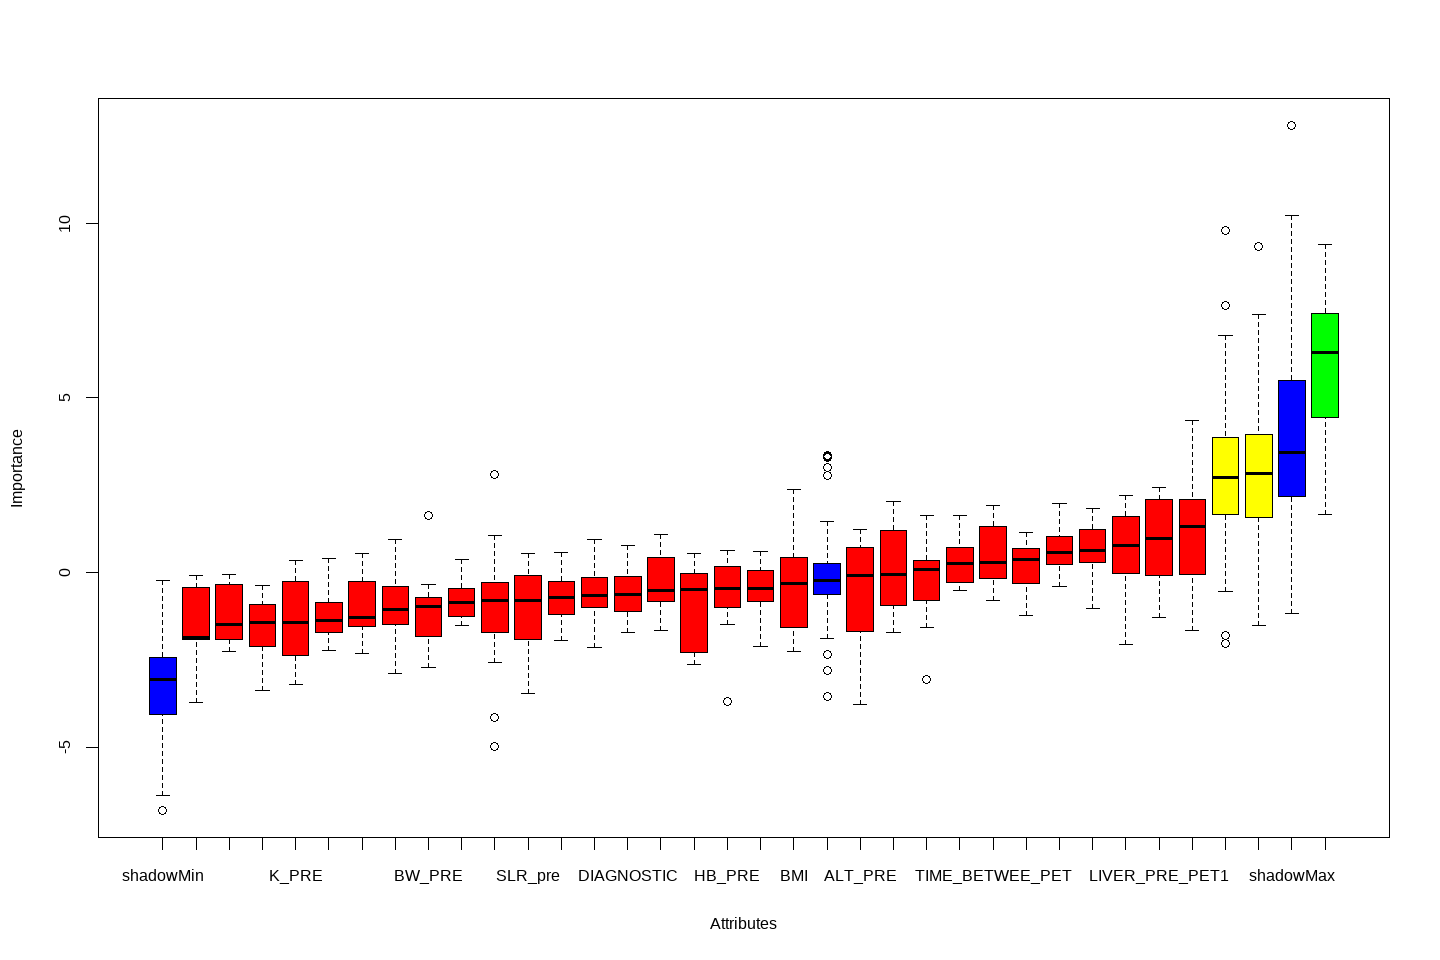

In [57]:
options(repr.plot.width=12, repr.plot.height=8)

print(boruta.model)
plot(boruta.model)

Boruta performed 99 iterations in 1.677527 secs.
Tentatives roughfixed over the last 99 iterations.
 1 attributes confirmed important: TNM_STAGE;
 32 attributes confirmed unimportant: ACTION_TAKEN_, AGE, ALBUMIN_PRE,
ALT_PRE, AST_PRE and 27 more;


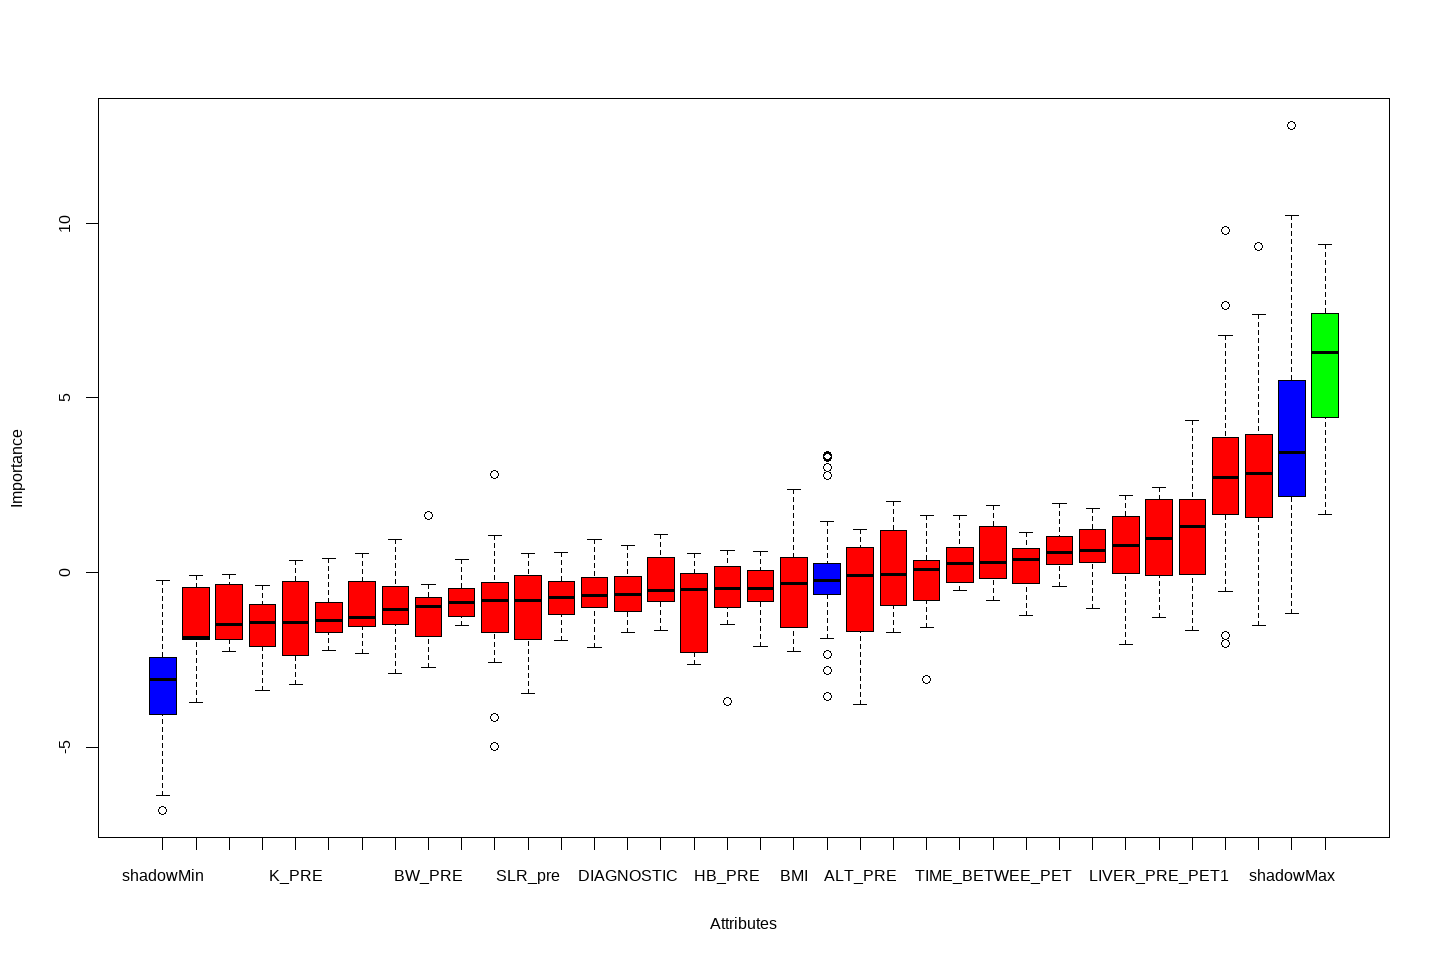

In [58]:
# Refinar modelo para resolver posibles atributos tentativos.
# Dado que pueden existir atributos no resueltos (tentativos), refinamos el modelo.

boruta.model2 <- TentativeRoughFix(boruta.model)
print(boruta.model2)
plot(boruta.model2)

In [59]:
# Obtener una lista de los atributos y sus etiquetas con el analisis de Boruta
as.data.frame(boruta.model$finalDecision)

boruta.model$finalDecision
CYCLES_BETWEEN_PET1_PET2     Rejected                  
GENDER                       Rejected                  
AGE                          Tentative                 
TNM_STAGE                    Confirmed                 
WBC_PRE                      Rejected                  
RBC_PRE                      Rejected                  
HB_PRE                       Rejected                  
PLT_PRE                      Rejected                  
CRP_PRE                      Rejected                  
ALBUMIN_PRE                  Rejected                  
LDH_PRE                      Rejected                  
eGFR_PRE                     Rejected                  
AST_PRE                      Rejected                  
ALT_PRE                      Rejected                  
K_PRE                        Rejected                  
BGL_PRE_PET1                 Rejected                  
BMI                          Rejected                  
BW_PRE                       Rejected                  
SPLEEN_FDG_UPT_PRE_PET1      Rejected                  
BM_UPT_PRE_PET1              Rejected                  
LIVER_PRE_PET1               Rejected                  
ESTIMATED_SPLEE_VOL_PRE_PET1 Rejected                  
DIAGNOSTIC                   Rejected                  
TREATMENT                    Rejected                  
ECOGPS                       Rejected                  
COMORBIDITIES                Rejected                  
CTCNCI                       Rejected                  
ACTION_TAKEN_                Tentative                 
TIME_BETWEE_PET              Rejected                  
dias                         Rejected                  
SLR_pre                      Rejected                  
BMLR_pre                     Rejected                  
OVERALL_TIME                 Rejected

In [60]:
# Obtener una lista de los atributos importantes y tentativos
opc_boruta = getSelectedAttributes(boruta.model2, withTentative = F)
opc_boruta

[1] "TNM_STAGE"

In [61]:
# Construimos la formula de forma automatica:
x = paste(opc_boruta, collapse = " + ")
y = respuesta
formBoruta = as.formula(paste(y, "~", x))
formBoruta

STATUS ~ TNM_STAGE

## Curva Roc

In [105]:
library(ROCR)

 accuracy 
0.7407407 
[[1]]
[1] 0.7661765



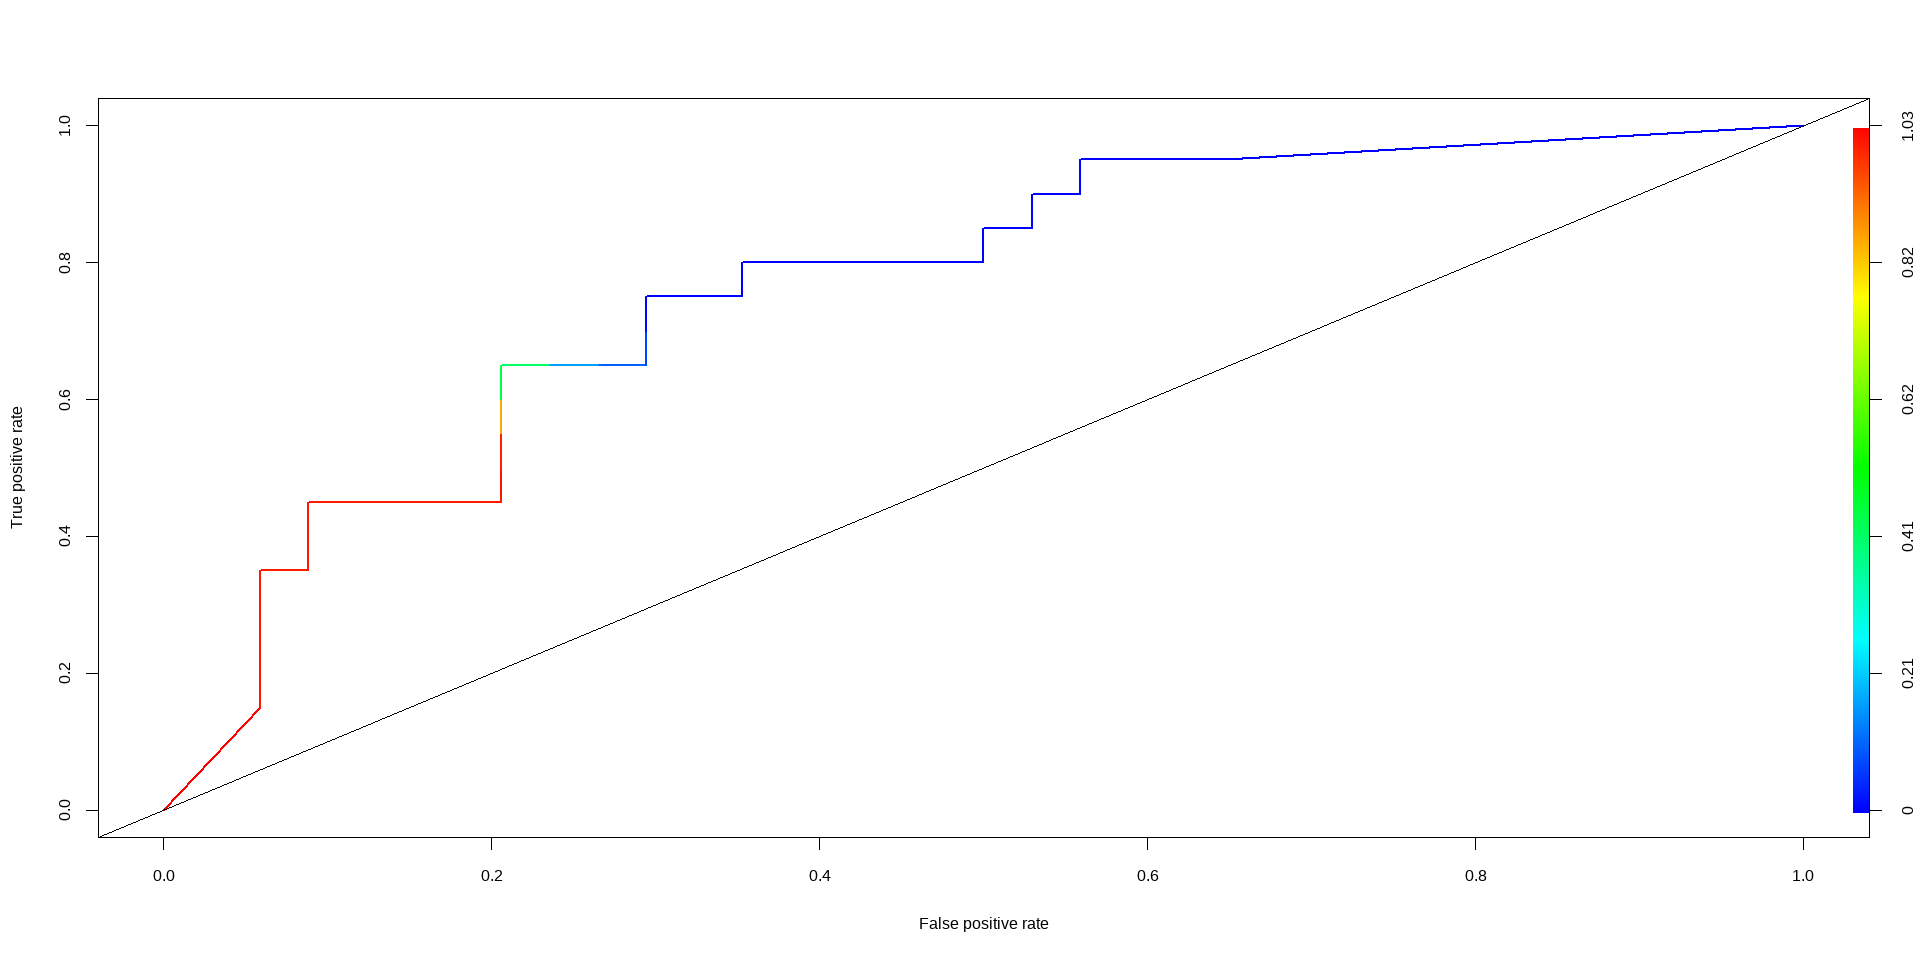

In [1048]:
index = sample(1:nrow(datos), size = .100 * nrow(datos))
#index
train = datos[index, ]
test = datos[-index, ]

model = glm(STATUS~TNM_STAGE+ACTION_TAKEN_+DIAGNOSTIC+LIVER_PRE_PET1+dias+BMI+CYCLES_BETWEEN_PET1_PET2,data=train, 
            family = binomial(link = "logit"))

pred = predict(model,test,type="response")
pred = prediction(pred,test$STATUS)
perf = performance(pred, "acc")
#plot(perf)

max_ind = which.max(slot(perf, "y.values")[[1]] )
acc = slot(perf, "y.values")[[1]][max_ind]
cutoff = slot(perf, "x.values")[[1]][max_ind]
print(c(accuracy= acc))

perf_cost = performance(pred, "cost")
perf_err = performance(pred, "err")
perf_tpr = performance(pred, "tpr")
perf_sn_sp = performance(pred, "sens", "spec")

roc = performance(pred,"tpr","fpr")
plot(roc, colorize = T, lwd = 2)
abline(a = 0, b = 1)

auc = performance(pred, measure = "auc")
print(auc@y.values) 


# CONCLUSIONES

Aqui nos pasa lo mismo que con el modelo con los datos de DIFF.  
Los graficos es lo que mas nos puede aportar como conclusiones mas intesantes.